# Evolution of Einstein's equations

# Initial data constants definition

# Initial data , setting length of the domain and discretization


In [463]:
# Parameters
m = 1

1

In [464]:
res=m;
N=2.0^m*500.0;#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx*0.4,digits=10);
Nt=100.0*2^m*10
Tf=Nt*dt; #final time

println("the final time is ", Tf)

the final time is 0.8


In [465]:
print(N)

1000.0

In [466]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)
println("epsilon <= dx/dt * (1/2)^(2*2-1) = ", dx/dt*(1/2)^(2*2-1))

println("epsilon = dx/dt * (1/2)^(2*2) = ", dx/dt*(1/2)^(2*2))

println("epsilon = dx/dt * (1/2)^(2*3) = ", dx/dt*(1/2)^(2*3))

println("epsilon = dx/dt * (1/2)^(2) = ", dx/dt*(1/2)^(2))

dx =0.001
dt =0.0004
dx/dt =2.5
epsilon <= dx/dt * (1/2)^(2*2-1) = 0.3125
epsilon = dx/dt * (1/2)^(2*2) = 0.15625
epsilon = dx/dt * (1/2)^(2*3) = 0.0390625
epsilon = dx/dt * (1/2)^(2) = 0.625


In [467]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res$res"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1"

In [468]:
println(dx)
println(dt)

0.001
0.0004


In [469]:
epsilon=0.1##0.01#0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)

0.1

# Grid

In [470]:
ori=0.0;
initX1 = nothing
initX1=range(ori, stop=Xf, step=dx);

In [471]:
print(dx)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)

0.001step size is  0.001
the time step is 0.0004


In [472]:
radius=zeros(L)
print(L)
print(size(initX1))
print(initX1[1001])
for i in 1:L
    radius[i]=initX[i]/(1-initX[i])
end


1007(1001,)1.0

In [473]:
include("./ScalarField.jl");

In [474]:
using Interpolations

# Initial data of m β Ψ and Ψ,x

In [475]:
using PyCall   


scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")


####

initphi=zeros(L);
initphibar=zeros(L);

#PHI,X

r0=0.3
sigma=0.3
A=0.1449
initphibar[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)



#PHI FROM PSI,X
spl = scipyinterpolate.splrep(initX[4:L-3], initphibar[4:L-3],k=5)
phi0=0
SFconstraint_phi_new(phi0,x) = scipyinterpolate.splev(x, spl)
initphi[4:L-3] = rungekutta4(SFconstraint_phi_new,phi0,initX1)#,state_array[4:L-3,:])


#PHI
"initphi = init_gaussian(R,r0,sigma,A)"




"initphi = init_gaussian(R,r0,sigma,A)"

In [476]:
"""using Plots #showing initial data and the initial status of the horizon finder
plot(initX, [initphi initphibar], xaxis="x",title="Initial Data", labels=["init phi" "init phi,x"])"""

"using Plots #showing initial data and the initial status of the horizon finder\nplot(initX, [initphi initphibar], xaxis=\"x\",title=\"Initial Data\", labels=[\"init phi\" \"init phi,x\"])"

In [477]:
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initpsibar=zeros(L);
state_array=[initm initbeta initpsi initpsibar initX];


#PSI
initpsi = initphi .* initX ./ (1 .- initX)
initpsi[L-3]=0
state_array[:,3]=initpsi;
state_array=ghost(state_array);


#PSI,X
initpsibar = initphibar .* initX ./ (1 .- initX) +  initphi ./ (1 .- initX) .^2
initpsibar[L-3]=0
state_array[:,4]=initpsibar;
state_array=ghost(state_array);

spl_m = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,1],k=4)
m_func(x) = scipyinterpolate.splev(x, spl_m)

beta_func(x) = m_func(x)

spl_psi = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,3],k=4)
psi_func(x) = scipyinterpolate.splev(x, spl_psi)

spl_derpsi = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,4],k=4)
derpsi_func(x) = scipyinterpolate.splev(x, spl_derpsi)

spl_funcs = [m_func beta_func psi_func derpsi_func]

#BETA
beta0=0
initbeta[4:L-3]=rk4wrapper(SFconstraint_beta,beta0,initX1,0,spl_funcs)
state_array[:,2]=initbeta;
state_array=ghost(state_array);

#M
m0=0
initm[4:L-3]=m_rk4wrapper(SFconstraint_m,m0,initX1,0,spl_funcs)
state_array[:,1]=initm;
state_array=ghost(state_array);

spl_m = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,1],k=4)
m_func(x) = scipyinterpolate.splev(x, spl_m)
spl_funcs[1] = m_func

spl_beta = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,2],k=4)
beta_func(x) = scipyinterpolate.splev(x, spl_beta)
spl_funcs[2] = beta_func

i 1yi0.0
i 2yi1.5232227379128997e-17
i 3yi4.786156428345608e-16
i 4yi3.705452584916717e-15
i 5yi1.594865359849226e-14
i 6yi4.9724508153008153e-14
i 7yi1.264120612966134e-13
i 8yi2.791446490254839e-13
i 9yi5.560129216756483e-13
i 10yi1.0235996044703934e-12
i 11yi1.7708671320181199e-12
i 12yi2.9134202338970743e-12
i 13yi4.598166506482648e-12
i 14yi7.008398988294079e-12
i 15yi1.0369325773994027e-11
i 16yi1.495407273778011e-11
i 17yi2.1090186504341664e-11
i 18yi2.91666658982519e-11
i 19yi3.9641551222196567e-11
i 20yi5.3050101860521956e-11
i 21yi7.001359387699056e-11
i 22yi9.124877047411535e-11
i 23yi1.1757797940567843e-10
i 24yi1.4994003268364058e-10
i 25yi1.8940182519515817e-10
i 26yi2.3717075014430817e-10
i 27yi2.946079505557761e-10
i 28yi3.6324244742348794e-10
i 29yi4.447861864551912e-10
i 30yi5.41150046753444e-10
i 31yi6.544608561833849e-10
i 32yi7.870794596069798e-10
i 33yi9.416198876109926e-10
i 34yi1.1209696748204412e-9
i 35yi1.328311378369389e-9
i 36yi1.5671453485950646e-9
i 37yi1.

i 361yi0.0009747718237029083
i 362yi0.0009865352457812866
i 363yi0.0009990224981894097
i 364yi0.0010122512081349518
i 365yi0.0010262381935056786
i 366yi0.0010409994110021977
i 367yi0.0010565499052179335
i 368yi0.0010729037588324533
i 369yi0.0010900740440850582
i 370yi0.0011080727756957343
i 371yi0.001126910865400133
i 372yi0.001146598078264194
i 373yi0.0011671429909423203
i 374yi0.0011885529520406532
i 375yi0.0012108340447439666
i 376yi0.0012339910518609967
i 377yi0.0012580274234386363
i 378yi0.0012829452470903596
i 379yi0.0013087452211785018
i 380yi0.0013354266309835968
i 381yi0.0013629873279869017
i 382yi0.001391423712384497
i 383yi0.0014207307189429874
i 384yi0.0014509018062978372
i 385yi0.0014819289497857927
i 386yi0.0015138026378926962
i 387yi0.0015465118723872978
i 388yi0.0015800441722004848
i 389yi0.0016143855810976718
i 390yi0.0016495206791800018
i 391yi0.0016854325982375196
i 392yi0.0017221030409646503
i 393yi0.0017595123040351883
i 394yi0.0017976393050206372
i 395yi0.00183646

i 725yi0.004720674827182781
i 726yi0.004720674827182781
i 727yi0.004720674827182781
i 728yi0.004720674827182781
i 729yi0.004720674827182781
i 730yi0.004720674827182781
i 731yi0.004720674827182781
i 732yi0.004720674827182781
i 733yi0.004720674827182781
i 734yi0.004720674827182781
i 735yi0.004720674827182781
i 736yi0.004720674827182781
i 737yi0.004720674827182781
i 738yi0.004720674827182781
i 739yi0.004720674827182781
i 740yi0.004720674827182781
i 741yi0.004720674827182781
i 742yi0.004720674827182781
i 743yi0.004720674827182781
i 744yi0.004720674827182781
i 745yi0.004720674827182781
i 746yi0.004720674827182781
i 747yi0.004720674827182781
i 748yi0.004720674827182781
i 749yi0.004720674827182781
i 750yi0.004720674827182781
i 751yi0.004720674827182781
i 752yi0.004720674827182781
i 753yi0.004720674827182781
i 754yi0.004720674827182781
i 755yi0.004720674827182781
i 756yi0.004720674827182781
i 757yi0.004720674827182781
i 758yi0.004720674827182781
i 759yi0.004720674827182781
i 760yi0.00472067482

beta_func (generic function with 1 method)

In [478]:
"""using Plots #showing initial data and the initial status of the horizon finder
plot(initX, [initpsi initpsibar], xaxis="x",title="Initial Data", labels=["init psi" "init psi,x"])"""

"using Plots #showing initial data and the initial status of the horizon finder\nplot(initX, [initpsi initpsibar], xaxis=\"x\",title=\"Initial Data\", labels=[\"init psi\" \"init psi,x\"])"

In [479]:
#monitor_ratio = 1-v/rexp(-2beta)
monitor_ratio = zeros(L)
for i in 1:L
    monitor_ratio = 2*state_array[:,1]/initX[i]*(1-initX[i])
    if monitor_ratio[i]>0.6
        print(monitor_ratio[i])
    end
end

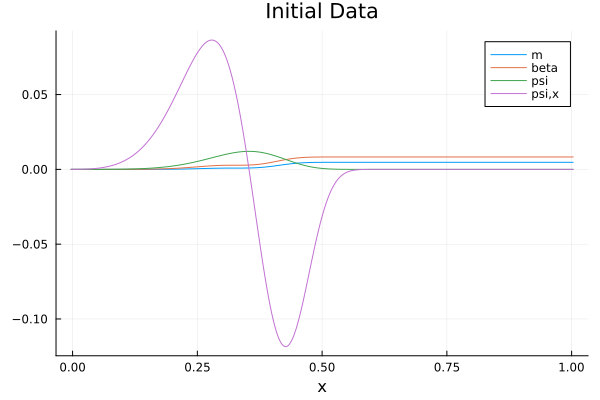

In [480]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX, state_array[:,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [481]:
using CSV, Tables
CSV.write(dir*"/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv"

 ## Time evolution

In [ ]:
using Interpolations
using ProgressMeter
@showprogress for k in 1:length(T)

    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0,spl_funcs) #evolve psi,x
    state_array=ghost(state_array)
    
    X=state_array[:,5]
    X1=X[4:L-3]
    
    spl_derpsi = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,4],k=4)
    derpsi_func(x) = scipyinterpolate.splev(x, spl_derpsi)
    spl_funcs[4] = derpsi_func
    
    #calculate psi form psi,x
    psi0=0
    SFconstraint_psi(psi0,x) = derpsi_func(x)
    state_array[4:L-3,3] = rungekutta4(SFconstraint_psi,psi0,X1)
    state_array=ghost(state_array);
    
    spl_psi = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,3],k=4)
    psi_func(x) = scipyinterpolate.splev(x, spl_psi)
    spl_funcs[3] = psi_func
    
    #evolve beta
    beta0=0
    state_array[4:L-3,2]=rk4wrapper(SFconstraint_beta,beta0,X1,T,spl_funcs)
    state_array=ghost(state_array)
    
    spl_beta = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,2],k=4)
    beta_func(x) = scipyinterpolate.splev(x, spl_beta)
    spl_funcs[2] = beta_func
    
    #evolve m
    m0=0
    state_array[4:L-3,1]=m_rk4wrapper(SFconstraint_m,m0,X1,T,spl_funcs)
    state_array=ghost(state_array)
    
    spl_m = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,1],k=4)
    m_func(x) = scipyinterpolate.splev(x, spl_m)
    spl_funcs[1] = m_func
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

i 1yi0.0
i 2yi2.1488948557311832e-16
i 3yi9.707837580230129e-16
i 4yi1.5582789382748215e-15
i 5yi1.6462889975030158e-15
i 6yi3.4293982722390136e-15
i 7yi1.4044316974593998e-14
i 8yi4.8273842697332613e-14
i 9yi1.3155762927362453e-13
i 10yi3.0332994222989543e-13
i 11yi6.207054836253058e-13
i 12yi1.1625353053876662e-12
i 13yi2.0338557879175574e-12
i 14yi3.3707546496890857e-12
i 15yi5.345678964968177e-12
i 16yi8.173211208431567e-12
i 17yi1.2116340412224167e-11
i 18yi1.7493256615152154e-11
i 19yi2.468469790452117e-11
i 20yi3.414188049857025e-11
i 21yi4.6395043491301344e-11
i 22yi6.206264108151932e-11
i 23yi8.186121633375463e-11
i 24yi1.0661599177005279e-10
i 25yi1.3727221336793525e-10
i 26yi1.7490728584062643e-10
i 27yi2.2074373840029894e-10
i 28yi2.7616306155292576e-10
i 29yi3.42720456843565e-10
i 30yi4.221605428626754e-10
i 31yi5.164340622364121e-10
i 32yi6.277156357557118e-10
i 33yi7.584226112491997e-10
i 34yi9.112350562722367e-10
i 35yi1.0891169451674183e-9
i 36yi1.2953385925490116e-9
i

i 361yi0.0009702588685825302
i 362yi0.0009821008769778131
i 363yi0.0009946693183672541
i 364yi0.0010079818200596773
i 365yi0.0010220551984413536
i 366yi0.0010369054070861097
i 367yi0.0010525474858141218
i 368yi0.0010689955108655865
i 369yi0.0010862625463562356
i 370yi0.0011043605971818463
i 371yi0.0011233005635384692
i 372yi0.0011430921972240395
i 373yi0.0011637440598853267
i 374yi0.0011852634833718193
i 375yi0.0012076565323551052
i 376yi0.0012309279693686038
i 377yi0.0012550812224181175
i 378yi0.0012801183553086013
i 379yi0.0013060400408268055
i 380yi0.001332845536913023
i 381yi0.0013605326659480914
i 382yi0.0013890977972740633
i 383yi0.001418535833058582
i 384yi0.001448840197604012
i 385yi0.0014800028301927867
i 386yi0.00151201418155028
i 387yi0.001544863213995815
i 388yi0.0015785374053412249
i 389yi0.0016130227565847011
i 390yi0.0016483038034355766
i 391yi0.0016843636316931853
i 392yi0.0017211838964901187
i 393yi0.0017587448453970634
i 394yi0.0017970253453730353
i 395yi0.00183600291

i 725yi0.004735326574358547
i 726yi0.00473532710014554
i 727yi0.0047353276273945175
i 728yi0.004735328156107508
i 729yi0.004735328686286539
i 730yi0.004735329217933643
i 731yi0.00473532975105085
i 732yi0.004735330285640188
i 733yi0.004735330821703687
i 734yi0.004735331359243377
i 735yi0.004735331898261287
i 736yi0.004735332438759447
i 737yi0.004735332980739888
i 738yi0.004735333524204638
i 739yi0.004735334069155726
i 740yi0.004735334615595184
i 741yi0.00473533516352504
i 742yi0.004735335712947325
i 743yi0.004735336263864067
i 744yi0.004735336816277296
i 745yi0.004735337370189043
i 746yi0.004735337925601336
i 747yi0.004735338482516206
i 748yi0.004735339040935682
i 749yi0.004735339600861793
i 750yi0.0047353401622965705
i 751yi0.004735340725242043
i 752yi0.00473534128970024
i 753yi0.004735341855673192
i 754yi0.0047353424231629275
i 755yi0.004735342992171477
i 756yi0.00473534356270087
i 757yi0.004735344134753136
i 758yi0.004735344708330304
i 759yi0.004735345283434405
i 760yi0.0047353458600

i 93yi5.388126927827049e-7
i 94yi5.797635227651882e-7
i 95yi6.234015692520324e-7
i 96yi6.698763451081254e-7
i 97yi7.193442118992876e-7
i 98yi7.719686224675309e-7
i 99yi8.279203688900807e-7
i 100yi8.873778357890821e-7
i 101yi9.505272589487447e-7
i 102yi1.0175629891859787e-6
i 103yi1.0886877614093308e-6
i 104yi1.1641129687892319e-6
i 105yi1.244058941950203e-6
i 106yi1.3287552330827213e-6
i 107yi1.418440904858919e-6
i 108yi1.513364824022152e-6
i 109yi1.61378595950574e-6
i 110yi1.7199736849208134e-6
i 111yi1.832208085237223e-6
i 112yi1.9507802674648425e-6
i 113yi2.0759926751253345e-6
i 114yi2.2081594062865413e-6
i 115yi2.347606534913098e-6
i 116yi2.494672435267649e-6
i 117yi2.6497081090771714e-6
i 118yi2.813077515158371e-6
i 119yi2.985157901174923e-6
i 120yi3.16634013717746e-6
i 121yi3.3570290505547138e-6
i 122yi3.55764376200103e-6
i 123yi3.7686180220816783e-6
i 124yi3.990400547952915e-6
i 125yi4.223455359768684e-6
i 126yi4.468262116280128e-6
i 127yi4.725316449107792e-6
i 128yi4.9951302951

i 449yi0.004093379621566008
i 450yi0.00412220496862699
i 451yi0.00415021070770641
i 452yi0.004177396401911845
i 453yi0.004203762927681858
i 454yi0.004229312440874809
i 455yi0.004254048339801903
i 456yi0.0042779752253943905
i 457yi0.0043010988587040885
i 458yi0.0043234261159446116
i 459yi0.004344964941287818
i 460yi0.004365724297635949
i 461yi0.004385714115594735
i 462yi0.004404945240876415
i 463yi0.004423429380364037
i 464yi0.004441179047069688
i 465yi0.004458207504219373
i 466yi0.004474528708696169
i 467yi0.0044901572540710505
i 468yi0.0045051083134473955
i 469yi0.004519397582340728
i 470yi0.004533041221809756
i 471yi0.004546055802048236
i 472yi0.00455845824663975
i 473yi0.004570265777669121
i 474yi0.004581495861875037
i 475yi0.004592166158018484
i 476yi0.004602294465631032
i 477yi0.00461189867529575
i 478yi0.004620996720601795
i 479yi0.004629606531901544
i 480yi0.004637745991986561
i 481yi0.004645432893785883
i 482yi0.004652684900177087
i 483yi0.00465951950598747
i 484yi0.00466595400

Progress:   0%|                                         |  ETA: 1:12:02


i 816yi0.004750446312843968
i 817yi0.004750448981381458
i 818yi0.004750451656505752
i 819yi0.004750454338224968
i 820yi0.004750457026547227
i 821yi0.0047504597214806455
i 822yi0.004750462423033344
i 823yi0.004750465131213442
i 824yi0.004750467846029056
i 825yi0.004750470567488307
i 826yi0.004750473295599313
i 827yi0.004750476030370193
i 828yi0.004750478771809067
i 829yi0.004750481519924053
i 830yi0.004750484274723269
i 831yi0.004750487036214834
i 832yi0.004750489804406869
i 833yi0.004750492579307492
i 834yi0.004750495360924821
i 835yi0.004750498149266975
i 836yi0.004750500944342074
i 837yi0.0047505037461582356
i 838yi0.004750506554723579
i 839yi0.0047505093700462245
i 840yi0.0047505121921342895
i 841yi0.004750515020995894
i 842yi0.0047505178566391556
i 843yi0.004750520699072194
i 844yi0.004750523548303127
i 845yi0.004750526404340076
i 846yi0.004750529267191158
i 847yi0.004750532136864492
i 848yi0.004750535013368197
i 849yi0.004750537896710393
i 850yi0.004750540786899199
i 851yi0.00475

i 182yi5.9652512680027294e-5
i 183yi6.19633973518893e-5
i 184yi6.434613941799238e-5
i 185yi6.680222323582547e-5
i 186yi6.933313198193804e-5
i 187yi7.194034595943224e-5
i 188yi7.462534083361613e-5
i 189yi7.738958579529518e-5
i 190yi8.023454165129117e-5
i 191yi8.316165884189732e-5
i 192yi8.617237538510477e-5
i 193yi8.926811474756957e-5
i 194yi9.245028364243102e-5
i 195yi9.572026975424081e-5
i 196yi9.907943939141972e-5
i 197yi0.00010252913506682267
i 198yi0.00010607067300716541
i 199yi0.00010970534059224653
i 200yi0.00011343439372508609
i 201yi0.00011725905413429867
i 202yi0.00012118050661022197
i 203yi0.00012519989617653415
i 204yi0.00012931832519931237
i 205yi0.00013353685043571235
i 206yi0.00013785648002468315
i 207yi0.00014227817042237402
i 208yi0.00014680282328513955
i 209yi0.00015143128230330583
i 210yi0.00015616432998912403
i 211yi0.0001610026844226078
i 212yi0.00016594699595922784
i 213yi0.0001709978439037188
i 214yi0.00017615573315454282
i 215yi0.00018142109082384651
i 216yi0.000

i 539yi0.004764304036589046
i 540yi0.0047643500739124305
i 541yi0.0047643915093992075
i 542yi0.004764428826779986
i 543yi0.004764462461256785
i 544yi0.004764492803924783
i 545yi0.004764520205858541
i 546yi0.004764544981879662
i 547yi0.00476456741402298
i 548yi0.0047645877547183735
i 549yi0.0047646062297051674
i 550yi0.004764623040695843
i 551yi0.004764638367805444
i 552yi0.004764652371762629
i 553yi0.004764665195917836
i 554yi0.004764676968063461
i 555yi0.004764687802080337
i 556yi0.004764697799424186
i 557yi0.0047647070504650045
i 558yi0.004764715635691692
i 559yi0.004764723626793502
i 560yi0.004764731087629206
i 561yi0.00476473807509417
i 562yi0.004764744639894822
i 563yi0.004764750827239359
i 564yi0.004764756677452849
i 565yi0.004764762226524256
i 566yi0.004764767506592338
i 567yi0.0047647725463767525
i 568yi0.004764777371560163
i 569yi0.004764782005126641
i 570yi0.0047647864676611355
i 571yi0.004764790777614364
i 572yi0.004764794951537016
i 573yi0.0047647990042867915
i 574yi0.00476

Progress:   0%|                                         |  ETA: 1:06:59


i 906yi0.004766473659492867
i 907yi0.004766481070667182
i 908yi0.004766488498306111
i 909yi0.004766495942427924
i 910yi0.004766503403050889
i 911yi0.004766510880193273
i 912yi0.004766518373873346
i 913yi0.004766525884109376
i 914yi0.00476653341091963
i 915yi0.004766540954322377
i 916yi0.004766548514335885
i 917yi0.0047665560909784235
i 918yi0.00476656368426826
i 919yi0.004766571294223662
i 920yi0.004766578920862899
i 921yi0.004766586564204238
i 922yi0.0047665942242659486
i 923yi0.0047666019010662985
i 924yi0.004766609594623556
i 925yi0.004766617304955989
i 926yi0.004766625032081867
i 927yi0.004766632776019457
i 928yi0.004766640536787028
i 929yi0.0047666483144028484
i 930yi0.004766656108885186
i 931yi0.004766663920252309
i 932yi0.004766671748522486
i 933yi0.004766679593713986
i 934yi0.0047666874558450765
i 935yi0.004766695334934026
i 936yi0.004766703230999103
i 937yi0.004766711144058576
i 938yi0.004766719074130712
i 939yi0.0047667270212337805
i 940yi0.00476673498538605
i 941yi0.0047667

i 268yi0.0005805511789362632
i 269yi0.0005889353885770515
i 270yi0.0005972604178991747
i 271yi0.0006055199592269242
i 272yi0.0006137076801793239
i 273yi0.0006218172347296046
i 274yi0.0006298422747452133
i 275yi0.0006377764620040233
i 276yi0.0006456134806810594
i 277yi0.0006533470502986558
i 278yi0.0006609709391315136
i 279yi0.0006684789780566263
i 280yi0.0006758650748365
i 281yi0.000683123228822505
i 282yi0.0006902475460635653
i 283yi0.0006972322548037229
i 284yi0.0007040717213504091
i 285yi0.000710760466293513
i 286yi0.0007172931810535706
i 287yi0.0007236647447356004
i 288yi0.0007298702412632961
i 289yi0.0007359049767664494
i 290yi0.0007417644971926302
i 291yi0.0007474446061122925
i 292yi0.0007529413826846173
i 293yi0.0007582511997495447
i 294yi0.0007633707420096019
i 295yi0.0007682970242632962
i 296yi0.0007730274096500358
i 297yi0.0007775596278647482
i 298yi0.0007818917932986232
i 299yi0.0007860224230606964
i 300yi0.0007899504548333294
i 301yi0.0007936752645130458
i 302yi0.0007971966

i 629yi0.004780088177998837
i 630yi0.004780094496167364
i 631yi0.004780100834552139
i 632yi0.004780107193195814
i 633yi0.0047801135721393575
i 634yi0.004780119971422319
i 635yi0.004780126391083047
i 636yi0.004780132831158887
i 637yi0.004780139291686338
i 638yi0.004780145772701194
i 639yi0.004780152274238658
i 640yi0.004780158796333444
i 641yi0.004780165339019859
i 642yi0.004780171902331874
i 643yi0.0047801784863031795
i 644yi0.004780185090967239
i 645yi0.004780191716357328
i 646yi0.0047801983625065676
i 647yi0.004780205029447953
i 648yi0.004780211717214377
i 649yi0.004780218425838649
i 650yi0.004780225155353513
i 651yi0.004780231905791656
i 652yi0.004780238677185724
i 653yi0.004780245469568327
i 654yi0.0047802522829720456
i 655yi0.00478025911742944
i 656yi0.004780265972973051
i 657yi0.004780272849635407
i 658yi0.004780279747449024
i 659yi0.004780286666446409
i 660yi0.004780293606660065
i 661yi0.004780300568122485
i 662yi0.004780307550866163
i 663yi0.004780314554923584
i 664yi0.00478032

Progress:   0%|▏                                        |  ETA: 1:02:19


i 994yi0.0047840020862055235
i 995yi0.004784017961742589
i 996yi0.004784033869408598
i 997yi0.004784049809236021
i 998yi0.004784065781257355
i 999yi0.00478408178550504
i 1000yi0.004784097822011633
i 1yi0.0
i 2yi7.715582904106238e-15
i 3yi5.655597184960977e-14
i 4yi1.7392532521112157e-13
i 5yi3.733689577357891e-13
i 6yi6.56007020534608e-13
i 7yi1.0122192717176014e-12
i 8yi1.4235987426785374e-12
i 9yi1.865193488701044e-12
i 10yi2.3080563241441937e-12
i 11yi2.7221234086723454e-12
i 12yi3.079443468883444e-12
i 13yi3.357780409611508e-12
i 14yi3.54461305578104e-12
i 15yi3.641556786054668e-12
i 16yi3.669232862058429e-12
i 17yi3.672612329453525e-12
i 18yi3.72686246584662e-12
i 19yi3.943724876468294e-12
i 20yi4.4784554914208774e-12
i 21yi5.537357897927237e-12
i 22yi7.385942647151103e-12
i 23yi1.035774640750083e-11
i 24yi1.48638460944947e-11
i 25yi2.1403104390816722e-11
i 26yi3.0573184378605006e-11
i 27yi4.3082372338687177e-11
i 28yi5.9762249127752e-11
i 29yi8.158125192352805e-11
i 30yi1.096591

i 354yi0.0008864084102109046
i 355yi0.0008939604023523868
i 356yi0.0009021074644298623
i 357yi0.0009108714439076902
i 358yi0.0009202737479407036
i 359yi0.0009303352891934017
i 360yi0.0009410764315151784
i 361yi0.000952516935618024
i 362yi0.0009646759049073639
i 363yi0.000977571731620523
i 364yi0.0009912220434306804
i 365yi0.0010056436506770934
i 366yi0.0010208524943847827
i 367yi0.001036863595238765
i 368yi0.0010536910036792557
i 369yi0.0010713477512850416
i 370yi0.0010898458036123942
i 371yi0.00110919601465646
i 372yi0.0011294080831009943
i 373yi0.0011504905105205877
i 374yi0.0011724505616971656
i 375yi0.001195294227209492
i 376yi0.001219026188450694
i 377yi0.0012436497852244214
i 378yi0.0012691669860651778
i 379yi0.0012955783614225968
i 380yi0.0013228830598430072
i 381yi0.0013510787872745298
i 382yi0.0013801617896141989
i 383yi0.0014101268386072163
i 384yi0.001440967221199434
i 385yi0.0014726747324345685
i 386yi0.0015052396719774726
i 387yi0.001538650844334089
i 388yi0.00157289556282

Progress:   0%|▏                                        |  ETA: 1:00:53

i 719yi0.004796372020515186
i 720yi0.004796384946337399
i 721yi0.0047963979084059616
i 722yi0.0047964109067716205
i 723yi0.004796423941485124
i 724yi0.004796437012597221
i 725yi0.004796450120158658
i 726yi0.004796463264220184
i 727yi0.004796476444832546
i 728yi0.0047964896620464915
i 729yi0.0047965029159127695
i 730yi0.004796516206482127
i 731yi0.004796529533805313
i 732yi0.004796542897933075
i 733yi0.004796556298916161
i 734yi0.004796569736805319
i 735yi0.004796583211651296
i 736yi0.004796596723504841
i 737yi0.004796610272416702
i 738yi0.004796623858437626
i 739yi0.004796637481618363
i 740yi0.004796651142009658
i 741yi0.0047966648396622616
i 742yi0.00479667857462692
i 743yi0.004796692346954383
i 744yi0.004796706156695397
i 745yi0.0047967200039007105
i 746yi0.004796733888621072
i 747yi0.004796747810907228
i 748yi0.004796761770809929
i 749yi0.004796775768379921
i 750yi0.004796789803667953
i 751yi0.004796803876724772
i 752yi0.004796817987601128
i 753yi0.004796832136347767
i 754yi0.004796

i 85yi2.386933049851103e-7
i 86yi2.595710468068708e-7
i 87yi2.820050598667054e-7
i 88yi3.060925196340931e-7
i 89yi3.319355596027385e-7
i 90yi3.5964146856558485e-7
i 91yi3.8932289324346004e-7
i 92yi4.2109804629988247e-7
i 93yi4.55090919768212e-7
i 94yi4.914315039105654e-7
i 95yi5.302560115207116e-7
i 96yi5.717071076755104e-7
i 97yi6.159341449313401e-7
i 98yi6.630934039533656e-7
i 99yi7.133483395564131e-7
i 100yi7.668698321266293e-7
i 101yi8.238364443829945e-7
i 102yi8.844346834271292e-7
i 103yi9.488592680186491e-7
i 104yi1.0173134010015975e-6
i 105yi1.0900090467951832e-6
i 106yi1.1671672138491768e-6
i 107yi1.2490182419508553e-6
i 108yi1.3358020942563214e-6
i 109yi1.4277686539043523e-6
i 110yi1.525178025055643e-6
i 111yi1.6283008381843938e-6
i 112yi1.7374185594326434e-6
i 113yi1.8528238038205491e-6
i 114yi1.974820652087991e-6
i 115yi2.1037249709243777e-6
i 116yi2.2398647363243797e-6
i 117yi2.383580359787529e-6
i 118yi2.5352250170591347e-6
i 119yi2.6951649790888615e-6
i 120yi2.86377994486

i 443yi0.003935415245942651
i 444yi0.003969720326075634
i 445yi0.00400323130960779
i 446yi0.004035939150213231
i 447yi0.0040678362513455486
i 448yi0.004098916454193677
i 449yi0.004129175021682482
i 450yi0.004158608618632528
i 451yi0.00418721528820802
i 452yi0.004214994424795723
i 453yi0.004241946743470727
i 454yi0.004268074246217093
i 455yi0.004293380185082707
i 456yi0.004317869022457974
i 457yi0.004341546388677287
i 458yi0.004364419037150426
i 459yi0.0043864947972381664
i 460yi0.004407782525092377
i 461yi0.004428292052685725
i 462yi0.004448034135259743
i 463yi0.004467020397422521
i 464yi0.004485263278128546
i 465yi0.004502775974773319
i 466yi0.004519572386634321
i 467yi0.0045356670578876775
i 468yi0.00455107512042652
i 469yi0.0045658122367026295
i 470yi0.004579894542807441
i 471yi0.004593338592002031
i 472yi0.004606161298898269
i 473yi0.004618379884484977
i 474yi0.004630011822183831
i 475yi0.004641074785109807
i 476yi0.004651586594700397
i 477yi0.004661565170866637
i 478yi0.0046710284

Progress:   0%|▏                                        |  ETA: 0:59:58


i 808yi0.004814116843070377
i 809yi0.004814140387571691
i 810yi0.004814163990772284
i 811yi0.004814187652745239
i 812yi0.0048142113735636346
i 813yi0.004814235153300552
i 814yi0.004814258992029072
i 815yi0.004814282889822275
i 816yi0.004814306846753243
i 817yi0.004814330862895055
i 818yi0.004814354938320793
i 819yi0.0048143790731035386
i 820yi0.0048144032673163705
i 821yi0.0048144275210323705
i 822yi0.00481445183432462
i 823yi0.004814476207266199
i 824yi0.004814500639930189
i 825yi0.0048145251323896705
i 826yi0.004814549684717725
i 827yi0.004814574296987432
i 828yi0.004814598969271874
i 829yi0.004814623701644132
i 830yi0.004814648494177286
i 831yi0.004814673346944418
i 832yi0.004814698260018608
i 833yi0.004814723233472939
i 834yi0.00481474826738049
i 835yi0.004814773361814343
i 836yi0.004814798516847579
i 837yi0.004814823732553279
i 838yi0.004814849009004524
i 839yi0.004814874346274396
i 840yi0.004814899744435975
i 841yi0.004814925203562343
i 842yi0.0048149507237265805
i 843yi0.004814

i 174yi4.1589762427111196e-5
i 175yi4.332052859512465e-5
i 176yi4.511009715549546e-5
i 177yi4.6959890993331804e-5
i 178yi4.887134293271715e-5
i 179yi5.084589460160828e-5
i 180yi5.288499523267987e-5
i 181yi5.499010039893515e-5
i 182yi5.716267068296299e-5
i 183yi5.9404170278788414e-5
i 184yi6.171606552533616e-5
i 185yi6.40998233706055e-5
i 186yi6.655690976573957e-5
i 187yi6.908878798826414e-5
i 188yi7.169691689386865e-5
i 189yi7.438274909620733e-5
i 190yi7.714772907431047e-5
i 191yi7.999329120731441e-5
i 192yi8.292085773634553e-5
i 193yi8.593183665352694e-5
i 194yi8.902761951821777e-5
i 195yi9.220957920074377e-5
i 196yi9.547906755403395e-5
i 197yi9.883741301374266e-5
i 198yi0.0001022859181276081
i 199yi0.000105825857014978
i 200yi0.00010945847275762127
i 201yi0.00011318497472313943
i 202yi0.00011700653582249557
i 203yi0.00012092428970338943
i 204yi0.0001249393278814266
i 205yi0.000129052696811256
i 206yi0.00013326539490008486
i 207yi0.00013757836946622147
i 208yi0.00014199251364554536
i 

i 531yi0.004823220653841282
i 532yi0.004823376965408154
i 533yi0.00482352022534367
i 534yi0.004823651615312206
i 535yi0.004823772215987082
i 536yi0.004823883014679498
i 537yi0.004823984912530007
i 538yi0.0048240787312714235
i 539yi0.0048241652195737915
i 540yi0.004824245058983513
i 541yi0.004824318869470007
i 542yi0.00482438721459431
i 543yi0.004824450606314857
i 544yi0.004824509509446324
i 545yi0.004824564345787863
i 546yi0.004824615497937359
i 547yi0.004824663312808466
i 548yi0.004824708104867173
i 549yi0.004824750159104536
i 550yi0.004824789733761953
i 551yi0.004824827062825037
i 552yi0.004824862358301718
i 553yi0.0048248958122997085
i 554yi0.004824927598917918
i 555yi0.004824957875965814
i 556yi0.00482498678652407
i 557yi0.004825014460359207
i 558yi0.004825041015204237
i 559yi0.004825066557916616
i 560yi0.00482509118552417
i 561yi0.004825114986168906
i 562yi0.004825138039958001
i 563yi0.004825160419730557
i 564yi0.004825182191748103
i 565yi0.004825203416316174
i 566yi0.004825224148

Progress:   0%|▏                                        |  ETA: 0:59:21

yi0.004834089040364302
i 898yi0.004834128587181855
i 899yi0.0048341682227499485
i 900yi0.00483420794716806
i 901yi0.004834247760535669
i 902yi0.004834287662952253
i 903yi0.00483432765451729
i 904yi0.0048343677353302585
i 905yi0.004834407905490638
i 906yi0.004834448165097906
i 907yi0.004834488514251541
i 908yi0.004834528953051023
i 909yi0.0048345694815958296
i 910yi0.00483461009998544
i 911yi0.004834650808319332
i 912yi0.0048346916066969855
i 913yi0.004834732495217879
i 914yi0.004834773473981492
i 915yi0.0048348145430873015
i 916yi0.004834855702634788
i 917yi0.0048348969527234305
i 918yi0.004834938293452708
i 919yi0.0048349797249220994
i 920yi0.004835021247231084
i 921yi0.00483506286047914
i 922yi0.004835104564765749
i 923yi0.004835146360190388
i 924yi0.004835188246852538
i 925yi0.0048352302248516775
i 926yi0.004835272294287286
i 927yi0.004835314455258844
i 928yi0.004835356707865829
i 929yi0.004835399052207722
i 930yi0.004835441488384003
i 931yi0.004835484016494151
i 932yi0.004835526636

i 259yi0.0004907531603311019
i 260yi0.0004992042943022213
i 261yi0.0005076496499628471
i 262yi0.0005160836234533268
i 263yi0.0005245005103957493
i 264yi0.0005328945126429383
i 265yi0.0005412597454941475
i 266yi0.0005495902453827878
i 267yi0.0005578799780406537
i 268yi0.0005661228471422054
i 269yi0.0005743127034314902
i 270yi0.0005824433543332624
i 271yi0.000590508574048782
i 272yi0.0005985021141356384
i 273yi0.0006064177145697527
i 274yi0.0006142491152864736
i 275yi0.0006219900681963825
i 276yi0.0006296343496700752
i 277yi0.0006371757734847887
i 278yi0.0006446082042242899
i 279yi0.0006519255711219473
i 280yi0.000659121882335361
i 281yi0.0006661912396393375
i 282yi0.0006731278535223669
i 283yi0.0006799260586700877
i 284yi0.0006865803298175213
i 285yi0.0006930852979501149
i 286yi0.0006994357668318665
i 287yi0.0007056267298370078
i 288yi0.0007116533870599015
i 289yi0.0007175111626759811
i 290yi0.0007231957225247053
i 291yi0.0007287029918836493
i 292yi0.0007340291734009936
i 293yi0.0007391

i 620yi0.004841896591858065
i 621yi0.0048419211408965235
i 622yi0.0048419457692738905
i 623yi0.0048419704772133445
i 624yi0.004841995264924256
i 625yi0.004842020132604088
i 626yi0.004842045080440052
i 627yi0.0048420701086105584
i 628yi0.0048420952172864755
i 629yi0.004842120406632223
i 630yi0.0048421456768067235
i 631yi0.00484217102796422
i 632yi0.004842196460254982
i 633yi0.004842221973825917
i 634yi0.004842247568821091
i 635yi0.004842273245382174
i 636yi0.004842299003648823
i 637yi0.0048423248437590065
i 638yi0.004842350765849281
i 639yi0.004842376770055026
i 640yi0.004842402856510637
i 641yi0.004842429025349699
i 642yi0.004842455276705123
i 643yi0.004842481610709263
i 644yi0.004842508027494015
i 645yi0.0048425345271908985
i 646yi0.004842561109931127
i 647yi0.004842587775845662
i 648yi0.00484261452506526
i 649yi0.004842641357720511
i 650yi0.004842668273941871
i 651yi0.0048426952738596886
i 652yi0.004842722357604223
i 653yi0.004842749525305665
i 654yi0.004842776777094148
i 655yi0.0048

Progress:   0%|▏                                        |  ETA: 0:58:09

i 985yi0.0048572098414761886
i 986yi0.004857272192684675
i 987yi0.004857334671248764
i 988yi0.004857397277298401
i 989yi0.0048574600109635305
i 990yi0.0048575228723741
i 991yi0.0048575858616600525
i 992yi0.004857648978951335
i 993yi0.004857712224377891
i 994yi0.004857775598069669
i 995yi0.004857839100156611
i 996yi0.004857902730768671
i 997yi0.004857966490035777
i 998yi0.004858030378087913
i 999yi0.0048580943950549465
i 1000yi0.004858158541066982
i 1yi0.0
i 2yi2.593957924627074e-14
i 3yi1.9792758331910323e-13
i 4yi6.358215503268606e-13
i 5yi1.4313830131966951e-12
i 6yi2.648997507140064e-12
i 7yi4.326627655430929e-12
i 8yi6.477016540504894e-12
i 9yi9.089160436348692e-12
i 10yi1.2130070523457084e-11
i 11yi1.554684423648253e-11
i 12yi1.926906779118088e-11
i 13yi2.3211572436730457e-11
i 14yi2.7277567922208517e-11
i 15yi3.136217774840447e-11
i 16yi3.535640178149132e-11
i 17yi3.915153289786283e-11
i 18yi4.2644055430401824e-11
i 19yi4.574105431750674e-11
i 20yi4.836616501450391e-11
i 21yi5.04

i 345yi0.0008204772186752988
i 346yi0.0008238619913692689
i 347yi0.0008276437498541091
i 348yi0.0008318460428430229
i 349yi0.0008364924338737799
i 350yi0.0008416064540035346
i 351yi0.0008472115532859962
i 352yi0.000853331051126283
i 353yi0.0008599880856153078
i 354yi0.0008672055619519251
i 355yi0.0008750061000672981
i 356yi0.000883411981571977
i 357yi0.0008924450961519931
i 358yi0.0009021268875458334
i 359yi0.0009124782992394325
i 360yi0.0009235197200212761
i 361yi0.0009352709295443199
i 362yi0.0009477510440456504
i 363yi0.0009609784623786395
i 364yi0.0009749708125157124
i 365yi0.0009897448986827626
i 366yi0.001005316649288655
i 367yi0.0010217010658151405
i 368yi0.0010389121728338472
i 369yi0.001056962969317771
i 370yi0.0010758653814148598
i 371yi0.0010956302168508376
i 372yi0.0011162671211273384
i 373yi0.001137784535679692
i 374yi0.001160189658156323
i 375yi0.001183488404978665
i 376yi0.0012076853763367686
i 377yi0.0012327838237713594
i 378yi0.0012587856204880213
i 379yi0.001285691234

Progress:   0%|▏                                        |  ETA: 0:58:20

i 709yi0.004860933912668371
i 710yi0.0048609746248176
i 711yi0.004861015452764229
i 712yi0.0048610563966727015
i 713yi0.0048610974567074635
i 714yi0.004861138633032961
i 715yi0.004861179925813639
i 716yi0.004861221335213942
i 717yi0.004861262861398317
i 718yi0.004861304504531208
i 719yi0.004861346264777061
i 720yi0.004861388142300323
i 721yi0.004861430137265438
i 722yi0.004861472249836852
i 723yi0.004861514480179012
i 724yi0.004861556828456363
i 725yi0.004861599294833351
i 726yi0.004861641879474422
i 727yi0.004861684582544022
i 728yi0.004861727404206598
i 729yi0.004861770344626594
i 730yi0.004861813403968459
i 731yi0.004861856582396637
i 732yi0.004861899880075576
i 733yi0.004861943297169722
i 734yi0.004861986833843521
i 735yi0.00486203049026142
i 736yi0.004862074266587866
i 737yi0.004862118162987305
i 738yi0.004862162179624185
i 739yi0.004862206316662952
i 740yi0.004862250574268053
i 741yi0.004862294952603934
i 742yi0.004862339451835043
i 743yi0.004862384072125827
i 744yi0.004862428813

i 75yi7.304829488120296e-8
i 76yi8.097599450592201e-8
i 77yi8.962079223856709e-8
i 78yi9.903575549112566e-8
i 79yi1.0927709684565131e-7
i 80yi1.2040431857139587e-7
i 81yi1.3248036190225488e-7
i 82yi1.4557176115138743e-7
i 83yi1.597488027370791e-7
i 84yi1.7508568919083263e-7
i 85yi1.9166070821528265e-7
i 86yi2.095564068558275e-7
i 87yi2.2885977084583682e-7
i 88yi2.496624091809191e-7
i 89yi2.7206074397300253e-7
i 90yi2.961562056298817e-7
i 91yi3.220554334004041e-7
i 92yi3.4987048131959357e-7
i 93yi3.797190295817196e-7
i 94yi4.1172460136261867e-7
i 95yi4.4601678510542675e-7
i 96yi4.827314622762903e-7
i 97yi5.220110405885673e-7
i 98yi5.640046926854962e-7
i 99yi6.088686002622902e-7
i 100yi6.567662035990859e-7
i 101yi7.07868456466136e-7
i 102yi7.623540863520662e-7
i 103yi8.204098599549007e-7
i 104yi8.82230853863899e-7
i 105yi9.480207303480143e-7
i 106yi1.017992018153976e-6
i 107yi1.0923663982036038e-6
i 108yi1.1713749940659649e-6
i 109yi1.2552586670653873e-6
i 110yi1.344268315871118e-6
i 111

i 433yi0.0035778026436165166
i 434yi0.0036199347216511087
i 435yi0.003661438841383459
i 436yi0.003702291455219832
i 437yi0.0037424703586258126
i 438yi0.003781954720631647
i 439yi0.0038207251101315134
i 440yi0.0038587635179242246
i 441yi0.0038960533744599717
i 442yi0.003932579563274965
i 443yi0.003968328430113118
i 444yi0.00400328778775117
i 445yi0.00403744691656076
i 446yi0.004070796560857865
i 447yi0.00410332892110662
i 448yi0.004135037642060719
i 449yi0.004165917796941379
i 450yi0.004195965867765955
i 451yi0.004225179721955905
i 452yi0.004253558585366584
i 453yi0.004281103011894437
i 454yi0.004307814849829321
i 455yi0.004333697205131018
i 456yi0.004358754401819315
i 457yi0.004382991939676306
i 458yi0.004406416449467863
i 459yi0.004429035645898336
i 460yi0.004450858278518554
i 461yi0.004471894080812071
i 462yi0.004492153717688267
i 463yi0.004511648731613412
i 464yi0.004530391487612114
i 465yi0.00454839511737169
i 466yi0.004565673462680978
i 467yi0.004582241018432878
i 468yi0.004598112

Progress:   0%|▎                                        |  ETA: 0:58:16

0.0048827501443144735
i 799yi0.004882813924099809
i 800yi0.004882877864915617
i 801yi0.004882941966964933
i 802yi0.004883006230450792
i 803yi0.004883070655576229
i 804yi0.004883135242544283
i 805yi0.004883199991557987
i 806yi0.004883264902820379
i 807yi0.004883329976534495
i 808yi0.004883395212903372
i 809yi0.004883460612130045
i 810yi0.004883526174417552
i 811yi0.004883591899968929
i 812yi0.004883657788987214
i 813yi0.004883723841675443
i 814yi0.004883790058236655
i 815yi0.004883856438873886
i 816yi0.004883922983790174
i 817yi0.004883989693188557
i 818yi0.0048840565672720725
i 819yi0.004884123606243759
i 820yi0.004884190810306653
i 821yi0.004884258179663795
i 822yi0.004884325714518222
i 823yi0.004884393415072972
i 824yi0.0048844612815310854
i 825yi0.0048845293140956
i 826yi0.004884597512969554
i 827yi0.004884665878355988
i 828yi0.00488473441045794
i 829yi0.004884803109478451
i 830yi0.004884871975620558
i 831yi0.004884941009087303
i 832yi0.004885010210081725
i 833yi0.004885079578806863

i 163yi2.4658535723088873e-5
i 164yi2.5788374556347483e-5
i 165yi2.69611806480073e-5
i 166yi2.8178191287249014e-5
i 167yi2.9440662297899807e-5
i 168yi3.0749867526767776e-5
i 169yi3.210709828379158e-5
i 170yi3.3513662732485646e-5
i 171yi3.497088522917102e-5
i 172yi3.6480105609495856e-5
i 173yi3.8042678420766795e-5
i 174yi3.965997209863412e-5
i 175yi4.133336808669922e-5
i 176yi4.3064259897643106e-5
i 177yi4.485405211450938e-5
i 178yi4.670415933081468e-5
i 179yi4.861600502820409e-5
i 180yi5.059102039041867e-5
i 181yi5.2630643052397514e-5
i 182yi5.473631578339721e-5
i 183yi5.6909485103078035e-5
i 184yi5.915159982957864e-5
i 185yi6.146410955867938e-5
i 186yi6.384846307323911e-5
i 187yi6.630610668218176e-5
i 188yi6.883848248840664e-5
i 189yi7.144702658510114e-5
i 190yi7.413316718004627e-5
i 191yi7.689832264762401e-5
i 192yi7.974389950836157e-5
i 193yi8.26712903359808e-5
i 194yi8.568187159206201e-5
i 195yi8.877700138857961e-5
i 196yi9.195801717872302e-5
i 197yi9.522623337658046e-5
i 198yi9.85

i 521yi0.004880967829919125
i 522yi0.004881433541339822
i 523yi0.004881863472577981
i 524yi0.00488226046678625
i 525yi0.0048826271629963695
i 526yi0.004882966007952278
i 527yi0.004883279267576672
i 528yi0.004883569038048691
i 529yi0.004883837256474543
i 530yi0.004884085711136872
i 531yi0.004884316051312392
i 532yi0.004884529796650815
i 533yi0.0048847283461113285
i 534yi0.0048849129864558805
i 535yi0.004885084900301246
i 536yi0.004885245173734332
i 537yi0.0048853948034973714
i 538yi0.004885534703751643
i 539yi0.00488566571243005
i 540yi0.004885788597190373
i 541yi0.004885904060982272
i 542yi0.00488601274724212
i 543yi0.0048861152447306
i 544yi0.0048862120920286165
i 545yi0.0048863037817075145
i 546yi0.004886390764189914
i 547yi0.0048864734513175585
i 548yi0.00488655221964262
i 549yi0.004886627413458722
i 550yi0.004886699347587762
i 551yi0.004886768309938222
i 552yi0.004886834563850295
i 553yi0.004886898350242621
i 554yi0.004886959889574923
i 555yi0.004887019383640208
i 556yi0.0048870770

Progress:   1%|▎                                        |  ETA: 0:57:42

0.004908371090634533
i 887yi0.004908466350676414
i 888yi0.004908561827188294
i 889yi0.004908657520415875
i 890yi0.004908753430604861
i 891yi0.004908849558000957
i 892yi0.004908945902849867
i 893yi0.004909042465397297
i 894yi0.004909139245888951
i 895yi0.004909236244570536
i 896yi0.004909333461687756
i 897yi0.004909430897486317
i 898yi0.004909528552211927
i 899yi0.0049096264261102905
i 900yi0.004909724519427116
i 901yi0.004909822832408109
i 902yi0.004909921365298977
i 903yi0.004910020118345428
i 904yi0.0049101190917931695
i 905yi0.00491021828588791
i 906yi0.004910317700875357
i 907yi0.00491041733700122
i 908yi0.004910517194511207
i 909yi0.004910617273651029
i 910yi0.004910717574666394
i 911yi0.004910818097803011
i 912yi0.0049109188433065915
i 913yi0.004911019811422845
i 914yi0.004911121002397482
i 915yi0.004911222416476213
i 916yi0.0049113240539047495
i 917yi0.004911425914928803
i 918yi0.004911527999794086
i 919yi0.004911630308746308
i 920yi0.004911732842031184
i 921yi0.0049118355998944

i 249yi0.0003964015561660259
i 250yi0.0004044492496720902
i 251yi0.00041253932347672047
i 252yi0.00042066749753584336
i 253yi0.00042882934958382167
i 254yi0.0004370203176817938
i 255yi0.00044523570314296404
i 256yi0.0004534706738459008
i 257yi0.00046172026794653957
i 258yi0.00046997939799918226
i 259yi0.00047824285549633586
i 260yi0.00048650531583673153
i 261yi0.0004947613437303198
i 262yi0.0005030053990484384
i 263yi0.0005112318431267014
i 264yi0.0005194349455274564
i 265yi0.0005276088912679051
i 266yi0.0005357477885191726
i 267yi0.0005438456767807523
i 268yi0.000551896535533836
i 269yi0.0005598942933760705
i 270yi0.0005678328376392529
i 271yi0.0005757060244904003
i 272yi0.0005835076895154931
i 273yi0.0005912316587839991
i 274yi0.0005988717603910461
i 275yi0.0006064218364728093
i 276yi0.0006138757556893358
i 277yi0.0006212274261676217
i 278yi0.0006284708088963135
i 279yi0.0006355999315619025
i 280yi0.0006426089028147389
i 281yi0.000649491926951602
i 282yi0.0006562433189999335
i 283yi0

i 610yi0.0049057245119662985
i 611yi0.004905777981988675
i 612yi0.004905831624525357
i 613yi0.0049058854404881065
i 614yi0.004905939430707863
i 615yi0.004905993595944384
i 616yi0.004906047936894857
i 617yi0.004906102454201584
i 618yi0.004906157148458817
i 619yi0.004906212020218827
i 620yi0.004906267069997285
i 621yi0.004906322298278018
i 622yi0.004906377705517207
i 623yi0.004906433292147079
i 624yi0.004906489058579155
i 625yi0.004906545005207097
i 626yi0.004906601132409191
i 627yi0.004906657440550525
i 628yi0.004906713929984872
i 629yi0.004906770601056339
i 630yi0.004906827454100782
i 631yi0.004906884489447042
i 632yi0.0049069417074180015
i 633yi0.004906999108331498
i 634yi0.004907056692501108
i 635yi0.004907114460236813
i 636yi0.004907172411845578
i 637yi0.004907230547631835
i 638yi0.004907288867897898
i 639yi0.004907347372944312
i 640yi0.004907406063070154
i 641yi0.004907464938573279
i 642yi0.004907523999750533
i 643yi0.004907583246897926
i 644yi0.004907642680310783
i 645yi0.00490770

Progress:   1%|▎                                        |  ETA: 0:57:34

yi0.0049393335686719235
i 976yi0.004939471008875043
i 977yi0.004939608732726757
i 978yi0.004939746740519527
i 979yi0.004939885032545817
i 980yi0.004940023609098093
i 981yi0.004940162470468819
i 982yi0.00494030161695046
i 983yi0.004940441048835481
i 984yi0.004940580766416349
i 985yi0.00494072076998553
i 986yi0.004940861059835492
i 987yi0.004941001636258702
i 988yi0.004941142499547629
i 989yi0.004941283649994741
i 990yi0.004941425087892507
i 991yi0.0049415668135333966
i 992yi0.00494170882720988
i 993yi0.004941851129214427
i 994yi0.004941993719839511
i 995yi0.004942136599377599
i 996yi0.004942279768121174
i 997yi0.0049424232263626825
i 998yi0.004942566974394655
i 999yi0.0049427110125094455
i 1000yi0.004942855340999765
i 1yi0.0
i 2yi5.4886878510732456e-14
i 3yi4.2508561812600517e-13
i 4yi1.3872469539895745e-12
i 5yi3.175688454177977e-12
i 6yi5.982400854559109e-12
i 7yi9.957269459689084e-12
i 8yi1.520852721874611e-11
i 9yi2.1803458439780102e-11
i 10yi2.976937248455577e-11
i 11yi3.9094867877

i 335yi0.0007817103586907872
i 336yi0.0007824576669387198
i 337yi0.0007833852769739306
i 338yi0.0007845144324375471
i 339yi0.0007858667788212694
i 340yi0.0007874643319602539
i 341yi0.0007893294447211241
i 342yi0.0007914847719144608
i 343yi0.0007939532334674583
i 344yi0.0007967579758989019
i 345yi0.0007999223321451788
i 346yi0.0008034697797926836
i 347yi0.0008074238977786803
i 348yi0.0008118083216294222
i 349yi0.0008166466973110771
i 350yi0.0008219626337757405
i 351yi0.0008277796542915051
i 352yi0.0008341211466521757
i 353yi0.0008410103123687345
i 354yi0.000848470114951052
i 355yi0.0008565232273945638
i 356yi0.0008651919789926735
i 357yi0.000874498301601453
i 358yi0.0008844636754887733
i 359yi0.0008951090749052706
i 360yi0.0009064549135195118
i 361yi0.000918520989864324
i 362yi0.000931326432945485
i 363yi0.0009448896481677805
i 364yi0.0009592282637368103
i 365yi0.000974359077697827
i 366yi0.0009902980057752953
i 367yi0.0010070600301787397
i 368yi0.001024659149541778
i 369yi0.00104310833

Progress:   1%|▎                                        |  ETA: 0:57:36

i 699yi0.00492854853984017
i 700yi0.004928631080454547
i 701yi0.004928713859246022
i 702yi0.004928796876557746
i 703yi0.004928880132732866
i 704yi0.004928963628114535
i 705yi0.004929047363045902
i 706yi0.004929131337870118
i 707yi0.004929215552930333
i 708yi0.004929300008569699
i 709yi0.004929384705131366
i 710yi0.004929469642958486
i 711yi0.004929554822394211
i 712yi0.004929640243781693
i 713yi0.004929725907464084
i 714yi0.004929811813784537
i 715yi0.004929897963086205
i 716yi0.004929984355712241
i 717yi0.004930070992005798
i 718yi0.004930157872310029
i 719yi0.004930244996968088
i 720yi0.00493033236632313
i 721yi0.004930419980718308
i 722yi0.004930507840496778
i 723yi0.004930595946001694
i 724yi0.004930684297576211
i 725yi0.004930772895563485
i 726yi0.004930861740306672
i 727yi0.004930950832148927
i 728yi0.004931040171433407
i 729yi0.004931129758503268
i 730yi0.004931219593701667
i 731yi0.004931309677371762
i 732yi0.004931400009856709
i 733yi0.004931490591499665
i 734yi0.0049315814226

i 65yi1.511066324768027e-8
i 66yi1.734768341523516e-8
i 67yi1.9855299599310586e-8
i 68yi2.265903875944632e-8
i 69yi2.578626855613723e-8
i 70yi2.926629687734418e-8
i 71yi3.3130475246042136e-8
i 72yi3.7412306200954665e-8
i 73yi4.214755474215077e-8
i 74yi4.7374363932527885e-8
i 75yi5.3133374745363507e-8
i 76yi5.9467850247077154e-8
i 77yi6.642380420309385e-8
i 78yi7.405013419322906e-8
i 79yi8.239875932131212e-8
i 80yi9.152476260181973e-8
i 81yi1.0148653810409087e-7
i 82yi1.1234594293222744e-7
i 83yi1.241684541160419e-7
i 84yi1.3702333048537646e-7
i 85yi1.5098377959678221e-7
i 86yi1.6612712977789312e-7
i 87yi1.8253500735084701e-7
i 88yi2.0029351909178582e-7
i 89yi2.1949343997878775e-7
i 90yi2.40230406275542e-7
i 91yi2.6260511399264956e-7
i 92yi2.867235227626146e-7
i 93yi3.1269706515836433e-7
i 94yi3.406428614784837e-7
i 95yi3.7068394001526955e-7
i 96yi4.0294946281417495e-7
i 97yi4.3757495692521943e-7
i 98yi4.7470255113846895e-7
i 99yi5.144812181867333e-7
i 100yi5.570670223891619e-7
i 101yi6

i 423yi0.0031477087165377553
i 424yi0.0031952901558183213
i 425yi0.003242542523236159
i 426yi0.003289431085456731
i 427yi0.003335921940417958
i 428yi0.0033819820837755646
i 429yi0.003427579472520719
i 430yi0.0034726830855707296
i 431yi0.003517262981145118
i 432yi0.0035612903507517904
i 433yi0.003604737569621224
i 434yi0.003647578243440526
i 435yi0.003689787251253824
i 436yi0.00373134078441068
i 437yi0.0037722163814599466
i 438yi0.003812392958902717
i 439yi0.0038518508377346074
i 440yi0.0038905717657244992
i 441yi0.003928538935393991
i 442yi0.003965736997679051
i 443yi0.004002152071272647
i 444yi0.004037771747664399
i 445yi0.0040725850919104
i 446yi0.004106582639183267
i 447yi0.004139756387169087
i 448yi0.004172099784394128
i 449yi0.004203607714579927
i 450yi0.004234276477140553
i 451yi0.0042641037639503864
i 452yi0.004293088632524603
i 453yi0.004321231475767609
i 454yi0.004348533988456903
i 455yi0.004374999130641099
i 456yi0.004400631088141258
i 457yi0.0044254352303539244
i 458yi0.0044

Progress:   1%|▎                                        |  ETA: 0:57:42


i 788yi0.004955761818311007
i 789yi0.004955883687521844
i 790yi0.004956005868385717
i 791yi0.004956128361300649
i 792yi0.004956251166664663
i 793yi0.004956374284875783
i 794yi0.0049564977163320326
i 795yi0.004956621461431436
i 796yi0.004956745520572018
i 797yi0.004956869894151805
i 798yi0.0049569945825688215
i 799yi0.0049571195862210945
i 800yi0.004957244905506652
i 801yi0.00495737054082352
i 802yi0.004957496492569726
i 803yi0.0049576227611432995
i 804yi0.004957749346942269
i 805yi0.004957876250364665
i 806yi0.004958003471808516
i 807yi0.004958131011671852
i 808yi0.004958258870352705
i 809yi0.004958387048249106
i 810yi0.004958515545759087
i 811yi0.004958644363280681
i 812yi0.00495877350121192
i 813yi0.004958902959950837
i 814yi0.004959032739895467
i 815yi0.004959162841443845
i 816yi0.004959293264994004
i 817yi0.0049594240109439814
i 818yi0.004959555079691813
i 819yi0.004959686471635535
i 820yi0.0049598181871731845
i 821yi0.004959950226702799
i 822yi0.004960082590622417
i 823yi0.004960

i 154yi1.5239016552907466e-5
i 155yi1.6000236450023694e-5
i 156yi1.679325236817136e-5
i 157yi1.7619101432077495e-5
i 158yi1.847884187659832e-5
i 159yi1.9373552906526247e-5
i 160yi2.0304334522104774e-5
i 161yi2.1272307308781933e-5
i 162yi2.227861218971789e-5
i 163yi2.3324410139549312e-5
i 164yi2.4410881857902472e-5
i 165yi2.553922740113881e-5
i 166yi2.671066577081098e-5
i 167yi2.792643445730456e-5
i 168yi2.918778893714061e-5
i 169yi3.0496002122417335e-5
i 170yi3.185236376087566e-5
i 171yi3.3258179785083264e-5
i 172yi3.471477160924517e-5
i 173yi3.6223475372166444e-5
i 174yi3.778564112491377e-5
i 175yi3.940263196174833e-5
i 176yi4.107582309293248e-5
i 177yi4.2806600858047e-5
i 178yi4.459636167849562e-5
i 179yi4.644651094791707e-5
i 180yi4.835846185927526e-5
i 181yi5.0333634167452446e-5
i 182yi5.237345288623103e-5
i 183yi5.4479346918615625e-5
i 184yi5.6652747619519344e-5
i 185yi5.889508728991622e-5
i 186yi6.120779760164644e-5
i 187yi6.359230795215194e-5
i 188yi6.605004374851731e-5
i 189yi6

i 511yi0.004934248895052308
i 512yi0.004935417769468055
i 513yi0.004936503627537808
i 514yi0.0049375122123680865
i 515yi0.004938448931581827
i 516yi0.00493931887037297
i 517yi0.004940126804687139
i 518yi0.004940877214457933
i 519yi0.004941574296833186
i 520yi0.004942221979330528
i 521yi0.004942823932866552
i 522yi0.004943383584608915
i 523yi0.0049439041306056685
i 524yi0.004944388548151031
i 525yi0.004944839607851619
i 526yi0.004945259885361855
i 527yi0.004945651772761777
i 528yi0.004946017489554861
i 529yi0.004946359093267587
i 530yi0.004946678489636456
i 531yi0.004946977442371833
i 532yi0.00494725758249151
i 533yi0.004947520417220064
i 534yi0.004947767338453058
i 535yi0.004947999630787871
i 536yi0.004948218479125355
i 537yi0.004948424975848731
i 538yi0.004948620127588102
i 539yi0.004948804861580623
i 540yi0.0049489800316378585
i 541yi0.0049491464237331
i 542yi0.004949304761222413
i 543yi0.00494945570971403
i 544yi0.004949599881601296
i 545yi0.004949737840274862
i 546yi0.0049498701040

Progress:   1%|▎                                        |  ETA: 0:57:05

i 877yi0.004988884786913707
i 878yi0.004989058317187152
i 879yi0.0049892322458993475
i 880yi0.004989406573507297
i 881yi0.004989581300468004
i 882yi0.004989756427238473
i 883yi0.004989931954275708
i 884yi0.004990107882036718
i 885yi0.004990284210978508
i 886yi0.004990460941558087
i 887yi0.004990638074232464
i 888yi0.0049908156094586485
i 889yi0.004990993547693651
i 890yi0.004991171889394483
i 891yi0.004991350635018158
i 892yi0.004991529785021688
i 893yi0.004991709339862088
i 894yi0.004991889299996373
i 895yi0.004992069665881558
i 896yi0.004992250437974662
i 897yi0.004992431616732701
i 898yi0.004992613202612695
i 899yi0.004992795196071663
i 900yi0.0049929775975666255
i 901yi0.004993160407554605
i 902yi0.004993343626492622
i 903yi0.004993527254837701
i 904yi0.004993711293046866
i 905yi0.0049938957415771425
i 906yi0.004994080600885556
i 907yi0.004994265871429135
i 908yi0.004994451553664906
i 909yi0.004994637648049898
i 910yi0.004994824155041142
i 911yi0.004995011075095668
i 912yi0.0049951

i 241yi0.0003248709419729424
i 242yi0.0003322768129123292
i 243yi0.00033975252597131665
i 244yi0.00034729502060204016
i 245yi0.0003549010874147012
i 246yi0.0003625673681632815
i 247yi0.0003702903560113874
i 248yi0.0003780663960906726
i 249yi0.00038589168636423413
i 250yi0.0003937622788072943
i 251yi0.00040167408091736
i 252yi0.00040962285756589666
i 253yi0.00041760423320335986
i 254yi0.00042561369442919446
i 255yi0.0004336465929381384
i 256yi0.0004416981488538504
i 257yi0.000449763454460522
i 258yi0.00045783747834272876
i 259yi0.000465915069943323
i 260yi0.0004739909645486722
i 261yi0.00048205978870999793
i 262yi0.0004901160661089721
i 263yi0.0004981542238750773
i 264yi0.000506168599361538
i 265yi0.0005141534473858734
i 266yi0.000522102947940316
i 267yi0.0005300112143764794
i 268yi0.00053787230206774
i 269yi0.0005456802175518282
i 270yi0.0005534289281550996
i 271yi0.0005611123720988716
i 272yi0.0005687244690870813
i 273yi0.0005762591313733238
i 274yi0.0005837102753040909
i 275yi0.00059

i 601yi0.00497133659548869
i 602yi0.004971428941063999
i 603yi0.004971521575350882
i 604yi0.004971614501542051
i 605yi0.004971707722520017
i 606yi0.004971801240889457
i 607yi0.004971895059006655
i 608yi0.004971989179006207
i 609yi0.004972083602825225
i 610yi0.0049721783322252185
i 611yi0.00497227336881184
i 612yi0.004972368714052675
i 613yi0.004972464369293234
i 614yi0.004972560335771298
i 615yi0.004972656614629766
i 616yi0.004972753206928135
i 617yi0.00497285011365274
i 618yi0.004972947335725861
i 619yi0.004973044874013818
i 620yi0.004973142729334137
i 621yi0.004973240902461895
i 622yi0.004973339394135308
i 623yi0.004973438205060664
i 624yi0.004973537335916644
i 625yi0.004973636787358121
i 626yi0.004973736560019469
i 627yi0.004973836654517464
i 628yi0.004973937071453804
i 629yi0.004974037811417293
i 630yi0.004974138874985741
i 631yi0.004974240262727601
i 632yi0.004974341975203385
i 633yi0.004974444012966879
i 634yi0.004974546376566186
i 635yi0.004974649066544622
i 636yi0.0049747520834

Progress:   1%|▍                                        |  ETA: 0:56:57


i 966yi0.005029749105009938
i 967yi0.0050299889265961835
i 968yi0.005030229247809455
i 969yi0.005030470069169872
i 970yi0.005030711391197555
i 971yi0.005030953214412626
i 972yi0.005031195539335209
i 973yi0.005031438366485429
i 974yi0.005031681696383412
i 975yi0.005031925529549287
i 976yi0.005032169866503182
i 977yi0.00503241470776523
i 978yi0.005032660053855562
i 979yi0.005032905905294312
i 980yi0.005033152262601616
i 981yi0.00503339912629761
i 982yi0.005033646496902434
i 983yi0.005033894374936227
i 984yi0.00503414276091913
i 985yi0.005034391655371287
i 986yi0.005034641058812842
i 987yi0.005034890971763941
i 988yi0.0050351413947447325
i 989yi0.005035392328275364
i 990yi0.005035643772875987
i 991yi0.005035895729066754
i 992yi0.005036148197367819
i 993yi0.005036401178299336
i 994yi0.005036654672381464
i 995yi0.005036908680134355
i 996yi0.005037163202078185
i 997yi0.00503741823873308
i 998yi0.0050376737906192804
i 999yi0.005037929858256791
i 1000yi0.005038186442166095
i 1yi0.0
i 2yi9.455

i 327yi0.0007582470443918971
i 328yi0.000758270254237034
i 329yi0.0007583290237932131
i 330yi0.0007584406089443743
i 331yi0.0007586228512739358
i 332yi0.0007588941612035656
i 333yi0.0007592734992986455
i 334yi0.0007597803557254854
i 335yi0.0007604347278501738
i 336yi0.0007612570959740145
i 337yi0.0007622683972057762
i 338yi0.0007634899974764774
i 339yi0.0007649436617081191
i 340yi0.0007666515221536532
i 341yi0.0007686360449315295
i 342yi0.0007709199947843659
i 343yi0.0007735263980976393
i 344yi0.0007764785042207579
i 345yi0.0007797997451394488
i 346yi0.0007835136935550473
i 347yi0.0007876440194329782
i 348yi0.0007922144450894706
i 349yi0.0007972486988922932
i 350yi0.0008027704676580425
i 351yi0.0008088033478352023
i 352yi0.0008153707955688205
i 353yi0.0008224960757491668
i 354yi0.0008302022101531303
i 355yi0.0008385119247933403
i 356yi0.0008474475965960389
i 357yi0.0008570311995345427
i 358yi0.0008672842503506964
i 359yi0.0008782277540019907
i 360yi0.0008898821489769747
i 361yi0.000902

Progress:   1%|▍                                        |  ETA: 0:57:02


i 690yi0.004998914066957656
i 691yi0.004999051568177954
i 692yi0.004999189471422554
i 693yi0.004999327777278345
i 694yi0.004999466486332216
i 695yi0.004999605599171059
i 696yi0.004999745116381766
i 697yi0.00499988503855123
i 698yi0.005000025366266343
i 699yi0.005000166100113999
i 700yi0.005000307240681094
i 701yi0.005000448788554521
i 702yi0.0050005907443211785
i 703yi0.005000733108567961
i 704yi0.005000875881881767
i 705yi0.0050010190648494945
i 706yi0.005001162658058042
i 707yi0.00500130666209431
i 708yi0.0050014510775451965
i 709yi0.005001595904997605
i 710yi0.005001741145038436
i 711yi0.005001886798254591
i 712yi0.0050020328652329756
i 713yi0.005002179346560492
i 714yi0.005002326242824044
i 715yi0.005002473554610539
i 716yi0.005002621282506883
i 717yi0.005002769427099982
i 718yi0.005002917988976743
i 719yi0.005003066968724076
i 720yi0.00500321636692889
i 721yi0.005003366184178094
i 722yi0.0050035164210586
i 723yi0.005003667078157318
i 724yi0.0050038181560611615
i 725yi0.0050039696

i 55yi2.1165051185131614e-9
i 56yi2.4213635940732256e-9
i 57yi2.7920429401634233e-9
i 58yi3.2382826389270523e-9
i 59yi3.770777627618403e-9
i 60yi4.401242196774413e-9
i 61yi5.1424768358464166e-9
i 62yi6.008438115781821e-9
i 63yi7.014311698907914e-9
i 64yi8.176588567238288e-9
i 65yi9.513144560989618e-9
i 66yi1.1043323319654771e-8
i 67yi1.2788022718420248e-8
i 68yi1.4769784893033867e-8
i 69yi1.7012889946413102e-8
i 70yi1.9543453430328495e-8
i 71yi2.2389527695390116e-8
i 72yi2.558120720229907e-8
i 73yi2.9150737886892157e-8
i 74yi3.313263067089548e-8
i 75yi3.756377920950115e-8
i 76yi4.248358196588349e-8
i 77yi4.793406870156168e-8
i 78yi5.3960031470088914e-8
i 79yi6.060916019988953e-8
i 80yi6.793218295016462e-8
i 81yi7.598301092163372e-8
i 82yi8.481888830146004e-8
i 83yi9.450054701901132e-8
i 84yi1.0509236648612156e-7
i 85yi1.1666253839223249e-7
i 86yi1.2928323662119034e-7
i 87yi1.4303079235254506e-7
i 88yi1.5798587440592907e-7
i 89yi1.7423367488246942e-7
i 90yi1.9186410015219813e-7
i 91yi2.

i 413yi0.002675039897343815
i 414yi0.0027246000539200553
i 415yi0.0027742099966207153
i 416yi0.002823830507340615
i 417yi0.00287342242823086
i 418yi0.002922946743875641
i 419yi0.002972364663056505
i 420yi0.0030216376998438194
i 421yi0.0030707277537563955
i 422yi0.0031195971887326185
i 423yi0.0031682089106598575
i 424yi0.0032165264432134815
i 425yi0.003264514001762409
i 426yi0.0033121365651048026
i 427yi0.0033593599448052363
i 428yi0.003406150851913383
i 429yi0.00345247696085399
i 430yi0.00349830697028856
i 431yi0.003543610660760696
i 432yi0.0035883589489494835
i 433yi0.0036325239383684653
i 434yi0.003676078966361712
i 435yi0.0037189986472630867
i 436yi0.003761258911600019
i 437yi0.0038028370412388672
i 438yi0.0038437117003851384
i 439yi0.003883862962368443
i 440yi0.00392327233215895
i 441yi0.003961922764579227
i 442yi0.003999798678192585
i 443yi0.004036885964866363
i 444yi0.004073171995025802
i 445yi0.004108645618631339
i 446yi0.004143297161928995
i 447yi0.004177118420040194
i 448yi0.0

Progress:   1%|▍                                        |  ETA: 0:56:54

i 779yi0.005032788709605146
i 780yi0.005032985551067305
i 781yi0.0050331829018091375
i 782yi0.005033380762488729
i 783yi0.005033579133764165
i 784yi0.005033778016293533
i 785yi0.005033977410734922
i 786yi0.005034177317746421
i 787yi0.005034377737986122
i 788yi0.005034578672112117
i 789yi0.0050347801207825
i 790yi0.005034982084655366
i 791yi0.005035184564388812
i 792yi0.0050353875606409335
i 793yi0.005035591074069832
i 794yi0.005035795105333606
i 795yi0.005035999655090357
i 796yi0.005036204723998189
i 797yi0.005036410312715206
i 798yi0.005036616421899513
i 799yi0.005036823052209218
i 800yi0.005037030204302428
i 801yi0.005037237878837252
i 802yi0.005037446076471802
i 803yi0.00503765479786419
i 804yi0.00503786404367253
i 805yi0.005038073814554938
i 806yi0.005038284111169528
i 807yi0.005038494934174419
i 808yi0.005038706284227731
i 809yi0.005038918161987583
i 810yi0.0050391305681120975
i 811yi0.0050393435032593985
i 812yi0.00503955696808761
i 813yi0.005039770963254858
i 814yi0.005039985489

i 145yi8.970151846773517e-6
i 146yi9.462321794069544e-6
i 147yi9.977140371393453e-6
i 148yi1.0515437151765672e-5
i 149yi1.1078062612120403e-5
i 150yi1.1665888242949126e-5
i 151yi1.2279806636153225e-5
i 152yi1.2920731549849028e-5
i 153yi1.3589597948840649e-5
i 154yi1.4287362019449107e-5
i 155yi1.5015001157360286e-5
i 156yi1.577351392712954e-5
i 157yi1.656391999195729e-5
i 158yi1.7387260012327832e-5
i 159yi1.8244595512083148e-5
i 160yi1.9137008710484448e-5
i 161yi2.0065602318797342e-5
i 162yi2.1031499299921218e-5
i 163yi2.2035842589570573e-5
i 164yi2.3079794777505212e-5
i 165yi2.4164537747297965e-5
i 166yi2.529127227312279e-5
i 167yi2.6461217572043237e-5
i 168yi2.7675610810281137e-5
i 169yi2.8935706561948354e-5
i 170yi3.0242776218730906e-5
i 171yi3.15981073490244e-5
i 172yi3.300300300503317e-5
i 173yi3.445878097636268e-5
i 174yi3.596677298865621e-5
i 175yi3.7528323845851866e-5
i 176yi3.914479051466622e-5
i 177yi4.081754114994507e-5
i 178yi4.2547954059560966e-5
i 179yi4.4337416607581535e-

i 503yi0.004981859804236249
i 504yi0.004984130733827539
i 505yi0.00498625318212303
i 506yi0.0049882361579968795
i 507yi0.004990088245469042
i 508yi0.004991817612461067
i 509yi0.0049934320203958065
i 510yi0.00499493883454094
i 511yi0.004996345034998655
i 512yi0.004997657228246732
i 513yi0.004998881659139577
i 514yi0.005000024223281452
i 515yi0.005001090479688148
i 516yi0.005002085663657645
i 517yi0.005003014699774792
i 518yi0.005003882214979769
i 519yi0.005004692551634883
i 520yi0.005005449780529209
i 521yi0.005006157713765512
i 522yi0.005006819917478909
i 523yi0.005007439724341643
i 524yi0.005008020245813233
i 525yi0.005008564384100057
i 526yi0.005009074843793073
i 527yi0.005009554143156885
i 528yi0.0050100046250477
i 529yi0.005010428467441846
i 530yi0.005010827693560414
i 531yi0.00501120418157933
i 532yi0.00501155967391753
i 533yi0.005011895786099186
i 534yi0.005012214015188827
i 535yi0.005012515747800901
i 536yi0.005012802267687773
i 537yi0.00501307476291232
i 538yi0.0050133343326131

Progress:   1%|▍                                        |  ETA: 0:56:55

i 869yi0.0050751944925629235
i 870yi0.00507546781718683
i 871yi0.005075741775256246
i 872yi0.005076016367504617
i 873yi0.005076291594665387
i 874yi0.0050765674574720044
i 875yi0.005076843956657918
i 876yi0.00507712109295658
i 877yi0.0050773988671014465
i 878yi0.005077677279825972
i 879yi0.005077956331863616
i 880yi0.005078236023947838
i 881yi0.005078516356812102
i 882yi0.005078797331189874
i 883yi0.005079078947814619
i 884yi0.00507936120741981
i 885yi0.005079644110738917
i 886yi0.005079927658505414
i 887yi0.0050802118514527775
i 888yi0.005080496690314487
i 889yi0.005080782175824024
i 890yi0.005081068308714869
i 891yi0.005081355089720511
i 892yi0.005081642519574435
i 893yi0.005081930599010132
i 894yi0.005082219328761096
i 895yi0.00508250870956082
i 896yi0.0050827987421428016
i 897yi0.0050830894272405405
i 898yi0.005083380765587538
i 899yi0.005083672757917298
i 900yi0.005083965404963328
i 901yi0.005084258707459136
i 902yi0.005084552666138233
i 903yi0.005084847281734133
i 904yi0.005085142

i 233yi0.00026072455737003895
i 234yi0.0002673272417745202
i 235yi0.00027401732901223905
i 236yi0.00028079293874692934
i 237yi0.0002876520519060241
i 238yi0.0002945925088974762
i 239yi0.0003016120080086027
i 240yi0.00030870810399877567
i 241yi0.0003158782068979404
i 242yi0.0003231195810230789
i 243yi0.00033042934422485015
i 244yi0.0003378044673767307
i 245yi0.0003452417741190428
i 246yi0.00035273794087029687
i 247yi0.00036028949711828514
i 248yi0.0003678928260033416
i 249yi0.00037554416520613307
i 250yi0.0003832396081522604
i 251yi0.0003909751055458289
i 252yi0.0003987464672439911
i 253yi0.00040654936448427027
i 254yi0.00041437933247623994
i 255yi0.00042223177336886007
i 256yi0.0004301019596044534
i 257yi0.0004379850376699446
i 258yi0.000445876032255579
i 259yi0.00045376985083088657
i 260yi0.0004616612886471536
i 261yi0.00046954503417511904
i 262yi0.0004774156749860112
i 263yi0.0004852677040833906
i 264yi0.0004930955266925634
i 265yi0.0005008934675135751
i 266yi0.000508655778442985
i 2

i 594yi0.0050387038704646
i 595yi0.0050388450537434785
i 596yi0.005038986650534236
i 597yi0.005039128669203236
i 598yi0.0050392711173183795
i 599yi0.005039414001723901
i 600yi0.005039557328609205
i 601yi0.005039701103572119
i 602yi0.005039845331676925
i 603yi0.005039990017507502
i 604yi0.005040135165215916
i 605yi0.005040280778566769
i 606yi0.005040426860977601
i 607yi0.005040573415555631
i 608yi0.005040720445131115
i 609yi0.005040867952287561
i 610yi0.00504101593938906
i 611yi0.005041164408604948
i 612yi0.005041313361932035
i 613yi0.005041462801214575
i 614yi0.005041612728162194
i 615yi0.005041763144365945
i 616yi0.005041914051312649
i 617yi0.0050420654503976915
i 618yi0.005042217342936403
i 619yi0.005042369730174174
i 620yi0.005042522613295415
i 621yi0.005042675993431479
i 622yi0.005042829871667654
i 623yi0.005042984249049319
i 624yi0.00504313912658735
i 625yi0.005043294505262866
i 626yi0.005043450386031367
i 627yi0.00504360676982636
i 628yi0.005043763657562501
i 629yi0.0050439210501

Progress:   1%|▍                                        |  ETA: 0:56:55


i 960yi0.0051287346778132945
i 961yi0.005129104728964424
i 962yi0.00512947555597699
i 963yi0.0051298471596640145
i 964yi0.005130219540838526
i 965yi0.005130592700313555
i 966yi0.005130966638902137
i 967yi0.005131341357417308
i 968yi0.00513171685667211
i 969yi0.005132093137479588
i 970yi0.005132470200652791
i 971yi0.005132848047004771
i 972yi0.005133226677348584
i 973yi0.005133606092497287
i 974yi0.005133986293263945
i 975yi0.005134367280461624
i 976yi0.005134749054903394
i 977yi0.005135131617402329
i 978yi0.005135514968771506
i 979yi0.005135899109824004
i 980yi0.00513628404137291
i 981yi0.005136669764231312
i 982yi0.005137056279212301
i 983yi0.005137443587128973
i 984yi0.0051378316887944276
i 985yi0.005138220585021768
i 986yi0.0051386102766241
i 987yi0.0051390007644145355
i 988yi0.005139392049206187
i 989yi0.005139784131812174
i 990yi0.005140177013045617
i 991yi0.005140570693719641
i 992yi0.005140965174647377
i 993yi0.005141360456641957
i 994yi0.00514175654051652
i 995yi0.005142153427

i 321yi0.0007368186093134595
i 322yi0.0007369279592863396
i 323yi0.0007369890761919569
i 324yi0.0007370155943513918
i 325yi0.0007370217969664423
i 326yi0.0007370226095753763
i 327yi0.0007370335918503995
i 328yi0.0007370709276981349
i 329yi0.0007371514136277636
i 330yi0.0007372924453550825
i 331yi0.0007375120026145973
i 332yi0.0007378286321558777
i 333yi0.0007382614289047651
i 334yi0.0007388300152746231
i 335yi0.0007395545186176605
i 336yi0.0007404555468114261
i 337yi0.0007415541619808617
i 338yi0.000742871852361802
i 339yi0.0007444305023175072
i 340yi0.0007462523605257009
i 341yi0.0007483600063596432
i 342yi0.0007507763144929846
i 343yi0.000753524417764499
i 344yi0.0007566276683452715
i 345yi0.000760109597257493
i 346yi0.000763993872300671
i 347yi0.0007683042544477808
i 348yi0.0007730645527806349
i 349yi0.0007782985780404994
i 350yi0.0007840300948767377
i 351yi0.000790282772882952
i 352yi0.0007970801365167249
i 353yi0.0008044455140055844
i 354yi0.0008124019853482107
i 355yi0.0008209723

Progress:   1%|▍                                        |  ETA: 0:56:45


i 684yi0.005072228144673537
i 685yi0.005072434288637805
i 686yi0.005072641040708888
i 687yi0.005072848401782481
i 688yi0.005073056372754284
i 689yi0.005073264954519999
i 690yi0.005073474147975325
i 691yi0.005073683954015968
i 692yi0.005073894373537631
i 693yi0.005074105407436022
i 694yi0.0050743170566068495
i 695yi0.005074529321945822
i 696yi0.005074742204348652
i 697yi0.005074955704711052
i 698yi0.005075169823928736
i 699yi0.005075384562897422
i 700yi0.005075599922512826
i 701yi0.005075815903670668
i 702yi0.00507603250726667
i 703yi0.005076249734196554
i 704yi0.005076467585356044
i 705yi0.005076686061640867
i 706yi0.00507690516394675
i 707yi0.005077124893169422
i 708yi0.0050773452502046144
i 709yi0.005077566235948061
i 710yi0.005077787851295495
i 711yi0.005078010097142654
i 712yi0.005078232974385275
i 713yi0.005078456483919097
i 714yi0.005078680626639863
i 715yi0.005078905403443314
i 716yi0.005079130815225197
i 717yi0.005079356862881257
i 718yi0.005079583547307243
i 719yi0.0050798108

i 51yi2.5854630323831255e-9
i 52yi2.6070464470896334e-9
i 53yi2.643182870366109e-9
i 54yi2.6986849125820015e-9
i 55yi2.779016951888119e-9
i 56yi2.8903463164865315e-9
i 57yi3.039597046123257e-9
i 58yi3.2345063184002583e-9
i 59yi3.4836836267019196e-9
i 60yi3.796672797662668e-9
i 61yi4.184016937160734e-9
i 62yi4.6573263948015435e-9
i 63yi5.229349837746859e-9
i 64yi5.91404852554477e-9
i 65yi6.726673878314724e-9
i 66yi7.68384843123232e-9
i 67yi8.803650268734614e-9
i 68yi1.0105701032218382e-8
i 69yi1.1611257595223541e-8
i 70yi1.334330750017434e-8
i 71yi1.532666825068093e-8
i 72yi1.7588090553176304e-8
i 73yi2.0156365601268325e-8
i 74yi2.3062436495613528e-8
i 75yi2.633951389135924e-8
i 76yi3.002319596424329e-8
i 77yi3.415159278527443e-8
i 78yi3.876545519253321e-8
i 79yi4.390830824701744e-8
i 80yi4.962658935760285e-8
i 81yi5.5969791158080965e-8
i 82yi6.299060921686478e-8
i 83yi7.074509465730448e-8
i 84yi7.92928117636183e-8
i 85yi8.869700064420719e-8
i 86yi9.902474502056988e-8
i 87yi1.1034714520

i 409yi0.0024890622107645445
i 410yi0.002538756204339545
i 411yi0.0025886589696183606
i 412yi0.0026387315882186652
i 413yi0.002688934872128885
i 414yi0.002739229445196862
i 415yi0.002789575825241818
i 416yi0.0028399345065346906
i 417yi0.00289026604238892
i 418yi0.0029405311276017986
i 419yi0.002990690680485613
i 420yi0.0030407059242279714
i 421yi0.003090538467321974
i 422yi0.003140150382809238
i 423yi0.003189504286082228
i 424yi0.003238563410996885
i 425yi0.0032872916840521447
i 426yi0.0033356537963996264
i 427yi0.0033836152734544648
i 428yi0.003431142541887005
i 429yi0.003478202993784774
i 430yi0.0035247650477847918
i 431yi0.003570798206987841
i 432yi0.0036162731134787066
i 433yi0.003661161599289589
i 434yi0.0037054367336578275
i 435yi0.0037490728664436846
i 436yi0.003792045667589139
i 437yi0.003834332162514399
i 438yi0.0038759107633650506
i 439yi0.0039167612960393505
i 440yi0.00395686502294206
i 441yi0.003996204661428349
i 442yi0.004034764397918527
i 443yi0.004072529897681657
i 444yi

Progress:   1%|▌                                        |  ETA: 0:56:18


i 774yi0.005114437602259213
i 775yi0.005114727846153425
i 776yi0.005115018845935909
i 777yi0.005115310602589943
i 778yi0.005115603117098807
i 779yi0.005115896390445784
i 780yi0.005116190423614159
i 781yi0.00511648521758722
i 782yi0.005116780773348258
i 783yi0.005117077091880568
i 784yi0.005117374174167444
i 785yi0.005117672021192188
i 786yi0.0051179706339381
i 787yi0.005118270013388487
i 788yi0.005118570160526656
i 789yi0.005118871076335917
i 790yi0.005119172761799586
i 791yi0.005119475217900978
i 792yi0.0051197784456234125
i 793yi0.005120082445950212
i 794yi0.0051203872198647025
i 795yi0.005120692768350211
i 796yi0.005120999092390071
i 797yi0.005121306192967614
i 798yi0.005121614071066179
i 799yi0.005121922727669106
i 800yi0.005122232163759737
i 801yi0.005122542380321418
i 802yi0.0051228533783375
i 803yi0.005123165158791334
i 804yi0.005123477722666275
i 805yi0.005123791070945682
i 806yi0.005124105204612917
i 807yi0.005124420124651343
i 808yi0.0051247358320443285
i 809yi0.005125052327

i 141yi6.650171673762507e-6
i 142yi7.037146634657819e-6
i 143yi7.4429590910696605e-6
i 144yi7.868341010731072e-6
i 145yi8.31404446162324e-6
i 146yi8.780841799901218e-6
i 147yi9.269525840974124e-6
i 148yi9.780910012606834e-6
i 149yi1.03158284888797e-5
i 150yi1.087513630381285e-5
i 151yi1.1459709443432281e-5
i 152yi1.2070444915026263e-5
i 153yi1.270826079231277e-5
i 154yi1.337409623521165e-5
i 155yi1.4068911482889407e-5
i 156yi1.4793687818719656e-5
i 157yi1.5549427505778834e-5
i 158yi1.6337153691474687e-5
i 159yi1.7157910279884407e-5
i 160yi1.8012761770360495e-5
i 161yi1.890279306094522e-5
i 162yi1.982910921511948e-5
i 163yi2.0792835190398794e-5
i 164yi2.179511552727833e-5
i 165yi2.2837113997020572e-5
i 166yi2.392001320677336e-5
i 167yi2.504501416050303e-5
i 168yi2.6213335774227193e-5
i 169yi2.7426214344034686e-5
i 170yi2.86849029653864e-5
i 171yi2.999067090220037e-5
i 172yi3.1344802904237796e-5
i 173yi3.274859847132372e-5
i 174yi3.420337106295728e-5
i 175yi3.5710447251891686e-5
i 176yi3

i 499yi0.0050323421896415
i 500yi0.005035526019816926
i 501yi0.005038514393289737
i 502yi0.005041318234400954
i 503yi0.005043948019710361
i 504yi0.005046413782094523
i 505yi0.0050487251161057305
i 506yi0.005050891184488076
i 507yi0.005052920725746998
i 508yi0.005054822062669389
i 509yi0.005056603111692716
i 510yi0.005058271393023504
i 511yi0.005059834041407944
i 512yi0.005061297817460251
i 513yi0.0050626691194577056
i 514yi0.005063953995514953
i 515yi0.005065158156054129
i 516yi0.005066286986491639
i 517yi0.005067345560066893
i 518yi0.005068338650742976
i 519yi0.005069270746114022
i 520yi0.005070146060258957
i 521yi0.0050709685464862195
i 522yi0.005071741909919003
i 523yi0.00507246961987549
i 524yi0.0050731549220034014
i 525yi0.005073800850132944
i 526yi0.005074410237816851
i 527yi0.005074985729530716
i 528yi0.005075529791511089
i 529yi0.0050760447222129345
i 530yi0.005076532662371921
i 531yi0.005076995604660688
i 532yi0.005077435402931646
i 533yi0.005077853781042059
i 534yi0.005078252

Progress:   1%|▌                                        |  ETA: 0:56:14

0.005167845036047503
i 865yi0.0051682409219897234
i 866yi0.005168637730849863
i 867yi0.005169035463703032
i 868yi0.00516943412162435
i 869yi0.005169833705688937
i 870yi0.00517023421697192
i 871yi0.005170635656548428
i 872yi0.005171038025493599
i 873yi0.00517144132488257
i 874yi0.005171845555790488
i 875yi0.005172250719292501
i 876yi0.005172656816463763
i 877yi0.005173063848379433
i 878yi0.005173471816114674
i 879yi0.0051738807207446546
i 880yi0.005174290563344547
i 881yi0.0051747013449895286
i 882yi0.0051751130667547825
i 883yi0.005175525729715495
i 884yi0.0051759393349468585
i 885yi0.00517635388352407
i 886yi0.005176769376522329
i 887yi0.005177185815016845
i 888yi0.005177603200082826
i 889yi0.005178021532795491
i 890yi0.0051784408142300595
i 891yi0.0051788610454617575
i 892yi0.005179282227565816
i 893yi0.0051797043616174715
i 894yi0.0051801274486919634
i 895yi0.005180551489864538
i 896yi0.005180976486210446
i 897yi0.005181402438804944
i 898yi0.005181829348723291
i 899yi0.0051822572170

i 229yi0.00022820571908651222
i 230yi0.00023429919073996965
i 231yi0.00024048454042316185
i 232yi0.00024676043594850126
i 233yi0.00025312541639751747
i 234yi0.00025957788975204297
i 235yi0.0002661161306620135
i 236yi0.00027273827836087283
i 237yi0.0002794423347397982
i 238yi0.00028622616259217317
i 239yi0.0002930874840399291
i 240yi0.0003000238791535524
i 241yi0.0003070327847777117
i 242yi0.0003141114935745962
i 243yi0.00032125715329716774
i 244yi0.00032846676630462335
i 245yi0.0003357371893324249
i 246yi0.0003430651335292939
i 247yi0.0003504471647735765
i 248yi0.0003578797042813644
i 249yi0.00036535902951870296
i 250yi0.0003728812754301341
i 251yi0.00038044243599569944
i 252yi0.000388038366128373
i 253yi0.00039566478392369733
i 254yi0.0004033172732731632
i 255yi0.0004109912868525977
i 256yi0.00041868214949650705
i 257yi0.0004263850619689605
i 258yi0.00043409510514119405
i 259yi0.00044180724458565973
i 260yi0.000449516335595746
i 261yi0.0004572171286398442
i 262yi0.0004649042752578377


i 587yi0.005107502037584958
i 588yi0.00510770130969288
i 589yi0.005107901085252414
i 590yi0.005108101384392934
i 591yi0.005108302225421069
i 592yi0.005108503624973711
i 593yi0.00510870559816031
i 594yi0.00510890815869507
i 595yi0.0051091113190195716
i 596yi0.00510931509041637
i 597yi0.005109519483114074
i 598yi0.0051097245063843905
i 599yi0.005109930168631629
i 600yi0.0051101364774750946
i 601yi0.0051103434398248335
i 602yi0.005110551061951134
i 603yi0.005110759349548198
i 604yi0.005110968307792366
i 605yi0.005111177941395269
i 606yi0.005111388254652258
i 607yi0.00511159925148646
i 608yi0.005111810935488764
i 609yi0.0051120233099540635
i 610yi0.005112236377914028
i 611yi0.005112450142166688
i 612yi0.005112664605303088
i 613yi0.005112879769731249
i 614yi0.005113095637697671
i 615yi0.005113312211306592
i 616yi0.005113529492537194
i 617yi0.005113747483258951
i 618yi0.005113966185245292
i 619yi0.005114185600185729
i 620yi0.005114405729696603
i 621yi0.005114626575330601
i 622yi0.00511484813

Progress:   1%|▌                                        |  ETA: 0:56:21


i 954yi0.005235372080156604
i 955yi0.005235898269364062
i 956yi0.005236425568894011
i 957yi0.00523695397991775
i 958yi0.005237483503606585
i 959yi0.0052380141411318285
i 960yi0.005238545893664803
i 961yi0.005239078762376835
i 962yi0.00523961274843926
i 963yi0.00524014785302342
i 964yi0.005240684077300664
i 965yi0.00524122142244235
i 966yi0.005241759889619842
i 967yi0.00524229948000451
i 968yi0.0052428401947677335
i 969yi0.0052433820350808995
i 970yi0.005243925002115401
i 971yi0.005244469097042638
i 972yi0.005245014321034019
i 973yi0.00524556067526096
i 974yi0.0052461081608948835
i 975yi0.005246656779107221
i 976yi0.005247206531069411
i 977yi0.005247757417952897
i 978yi0.005248309440929133
i 979yi0.005248862601169581
i 980yi0.005249416899845708
i 981yi0.00524997233812899
i 982yi0.005250528917190912
i 983yi0.005251086638202963
i 984yi0.005251645502336643
i 985yi0.005252205510763458
i 986yi0.005252766664654922
i 987yi0.005253328965182558
i 988yi0.005253892413517894
i 989yi0.0052544570108

i 315yi0.0007139534688657262
i 316yi0.0007145393082559793
i 317yi0.0007150147553904515
i 318yi0.0007153896509281714
i 319yi0.0007156744912200764
i 320yi0.0007158804306332027
i 321yi0.0007160192825021542
i 322yi0.0007161035186543848
i 323yi0.0007161462674576852
i 324yi0.0007161613103403605
i 325yi0.0007161630767369349
i 326yi0.0007161666374148125
i 327yi0.0007161876961401768
i 328yi0.000716242579644511
i 329yi0.0007163482258564851
i 330yi0.0007165221703675695
i 331yi0.0007167825311036006
i 332yi0.0007171479911786491
i 333yi0.0007176377799119042
i 334yi0.0007182716519928995
i 335yi0.0007190698647852553
i 336yi0.0007200531537641842
i 337yi0.0007212427060883087
i 338yi0.0007226601323118428
i 339yi0.000724327436248902
i 340yi0.0007262669830075944
i 341yi0.0007285014652176135
i 342yi0.0007310538674812769
i 343yi0.0007339474290843141
i 344yi0.00073720560500919
i 345yi0.0007408520253003367
i 346yi0.000744910452837327
i 347yi0.000749404739578747
i 348yi0.0007543587813462802
i 349yi0.00075979647

Progress:   1%|▌                                        |  ETA: 0:56:03

i 679yi0.005148281780992536
i 680yi0.005148569623891628
i 681yi0.005148858322284547
i 682yi0.005149147877440897
i 683yi0.005149438290630283
i 684yi0.005149729563122316
i 685yi0.005150021696186607
i 686yi0.005150314691092772
i 687yi0.00515060854911043
i 688yi0.005150903271509202
i 689yi0.005151198859558713
i 690yi0.005151495314528591
i 691yi0.005151792637688467
i 692yi0.005152090830307974
i 693yi0.0051523898936567504
i 694yi0.0051526898290044365
i 695yi0.005152990637620675
i 696yi0.0051532923207751125
i 697yi0.0051535948797374
i 698yi0.00515389831577719
i 699yi0.005154202630164138
i 700yi0.005154507824167905
i 701yi0.005154813899058154
i 702yi0.00515512085610455
i 703yi0.005155428696576764
i 704yi0.005155737421744468
i 705yi0.005156047032877338
i 706yi0.005156357531245054
i 707yi0.0051566689181173
i 708yi0.0051569811947637595
i 709yi0.005157294362454125
i 710yi0.005157608422458088
i 711yi0.005157923376045345
i 712yi0.005158239224485597
i 713yi0.005158555969048547
i 714yi0.00515887361100

i 46yi4.984632420264421e-9
i 47yi5.0329812088679015e-9
i 48yi5.069615141006023e-9
i 49yi5.095500257853425e-9
i 50yi5.1119671112001926e-9
i 51yi5.120748594068732e-9
i 52yi5.1240199205203184e-9
i 53yi5.124440833684647e-9
i 54yi5.125200122519412e-9
i 55yi5.130062529241221e-9
i 56yi5.143418130759269e-9
i 57yi5.1703342787838264e-9
i 58yi5.216610184567463e-9
i 59yi5.2888342354623185e-9
i 60yi5.394444131635959e-9
i 61yi5.5417899323749675e-9
i 62yi5.740200102413294e-9
i 63yi6.000050649644831e-9
i 64yi6.3328374464099185e-9
i 65yi6.7512518272756855e-9
i 66yi7.26925955685401e-9
i 67yi7.902183261709592e-9
i 68yi8.666788420796936e-9
i 69yi9.581373009120248e-9
i 70yi1.066586088942596e-8
i 71yi1.1941899046705482e-8
i 72yi1.3432958760095206e-8
i 73yi1.5164440806404546e-8
i 74yi1.716378478896985e-8
i 75yi1.9460582684811927e-8
i 76yi2.2086696702159175e-8
i 77yi2.507638153927532e-8
i 78yi2.8466411134189534e-8
i 79yi3.2296209993357377e-8
i 80yi3.6607989185470456e-8
i 81yi4.144688708457207e-8
i 82yi4.68611

i 405yi0.0023019648319570233
i 406yi0.0023511559590539063
i 407yi0.0024007115095547983
i 408yi0.002450594168693643
i 409yi0.002500766034089091
i 410yi0.0025511886925200906
i 411yi0.00260182329829959
i 412yi0.002652630653012862
i 413yi0.0027035712863801332
i 414yi0.00275460553799727
i 415yi0.002805693639703299
i 416yi0.0028567957983195286
i 417yi0.0029078722785020354
i 418yi0.002958883485447339
i 419yi0.0030097900471901624
i 420yi0.003060552896232369
i 421yi0.003111133350243401
i 422yi0.0031614931915749144
i 423yi0.0032115947453357353
i 424yi0.0032614009557777905
i 425yi0.0033108754607492825
i 426yi0.0033599826639780397
i 427yi0.0034086878049556877
i 428yi0.0034569570262020072
i 429yi0.0035047574376985543
i 430yi0.003552057178291257
i 431yi0.0035988254738732565
i 432yi0.0036450326921716467
i 433yi0.003690650393974968
i 434yi0.003735651380652234
i 435yi0.003780009737828877
i 436yi0.0038237008751002047
i 437yi0.003866701561678721
i 438yi0.003908989957887854
i 439yi0.003950545642431246
i 4

Progress:   1%|▌                                        |  ETA: 0:56:11


i 770yi0.005200352093767327
i 771yi0.005200753245485661
i 772yi0.005201155447491991
i 773yi0.005201558701159973
i 774yi0.005201963007863268
i 775yi0.005202368368975542
i 776yi0.005202774785870466
i 777yi0.005203182259921718
i 778yi0.005203590792502978
i 779yi0.005204000384987936
i 780yi0.005204411038750284
i 781yi0.00520482275516372
i 782yi0.005205235535601949
i 783yi0.005205649381438679
i 784yi0.0052060642940476255
i 785yi0.005206480274802509
i 786yi0.005206897325077056
i 787yi0.005207315446244996
i 788yi0.005207734639680068
i 789yi0.005208154906756014
i 790yi0.005208576248846582
i 791yi0.005208998667325526
i 792yi0.005209422163566606
i 793yi0.005209846738943586
i 794yi0.005210272394830238
i 795yi0.005210699132600339
i 796yi0.00521112695362767
i 797yi0.0052115558592860205
i 798yi0.005211985850949184
i 799yi0.00521241692999096
i 800yi0.005212849097785155
i 801yi0.005213282355705581
i 802yi0.005213716705126054
i 803yi0.005214152147420398
i 804yi0.005214588683962441
i 805yi0.00521502631

i 137yi4.824994819104918e-6
i 138yi5.1243055438389e-6
i 139yi5.439092553618437e-6
i 140yi5.769994888997743e-6
i 141yi6.117670610430683e-6
i 142yi6.48279704517642e-6
i 143yi6.866071021770696e-6
i 144yi7.268209091060125e-6
i 145yi7.689947732765242e-6
i 146yi8.132043546506608e-6
i 147yi8.595273426197058e-6
i 148yi9.080434716672329e-6
i 149yi9.588345351401812e-6
i 150yi1.0119843970091268e-5
i 151yi1.067579001495995e-5
i 152yi1.125706380444596e-5
i 153yi1.1864566583065816e-5
i 154yi1.2499220546127236e-5
i 155yi1.3161968837968302e-5
i 156yi1.3853775522371315e-5
i 157yi1.4575625523776208e-5
i 158yi1.5328524537896245e-5
i 159yi1.6113498910318135e-5
i 160yi1.693159548164978e-5
i 161yi1.7783881397761694e-5
i 162yi1.867144388365301e-5
i 163yi1.9595389979459835e-5
i 164yi2.055684623711288e-5
i 165yi2.1556958376142875e-5
i 166yi2.2596890897126415e-5
i 167yi2.3677826651261678e-5
i 168yi2.4800966364563342e-5
i 169yi2.596752811516876e-5
i 170yi2.7178746762253688e-5
i 171yi2.8435873325065278e-5
i 172yi

i 495yi0.005078980194854595
i 496yi0.005083319620401742
i 497yi0.005087408289893179
i 498yi0.005091259070991389
i 499yi0.0050948843844626
i 500yi0.005098296201955883
i 501yi0.005101506045446994
i 502yi0.005104524988250076
i 503yi0.005107363657497676
i 504yi0.005110032237987566
i 505yi0.0051125404772936365
i 506yi0.005114897692037579
i 507yi0.005117112775218196
i 508yi0.005119194204495911
i 509yi0.005121150051331399
i 510yi0.005122987990879115
i 511yi0.0051247153125389055
i 512yi0.005126338931071725
i 513yi0.005127865398188748
i 514yi0.005129300914526804
i 515yi0.005130651341927016
i 516yi0.005131922215937753
i 517yi0.005133118758467467
i 518yi0.005134245890517618
i 519yi0.005135308244930662
i 520yi0.005136310179092938
i 521yi0.005137255787537212
i 522yi0.005138148914394521
i 523yi0.005138993165649901
i 524yi0.0051397919211613454
i 525yi0.005140548346406135
i 526yi0.00514126540392321
i 527yi0.005141945864424774
i 528yi0.00514259231755454
i 529yi0.005143207182274127
i 530yi0.005143792716

Progress:   1%|▌                                        |  ETA: 0:56:06

0.005266516618327789
i 861yi0.005267057087264167
i 862yi0.005267598822201221
i 863yi0.005268141824621056
i 864yi0.005268686096005785
i 865yi0.005269231637837529
i 866yi0.00526977845159842
i 867yi0.005270326538770596
i 868yi0.0052708759008362055
i 869yi0.005271426539277404
i 870yi0.005271978455576357
i 871yi0.0052725316512152376
i 872yi0.005273086127676229
i 873yi0.005273641886441522
i 874yi0.005274198928993317
i 875yi0.005274757256813823
i 876yi0.005275316871385258
i 877yi0.005275877774189848
i 878yi0.005276439966709829
i 879yi0.005277003450427447
i 880yi0.005277568226824954
i 881yi0.005278134297384613
i 882yi0.005278701663588696
i 883yi0.005279270326919485
i 884yi0.005279840288859269
i 885yi0.005280411550890347
i 886yi0.005280984114495027
i 887yi0.0052815579811556265
i 888yi0.005282133152354472
i 889yi0.005282709629573901
i 890yi0.005283287414296257
i 891yi0.005283866508003896
i 892yi0.00528444691217918
i 893yi0.005285028628304485
i 894yi0.005285611657862191
i 895yi0.00528619600233469

i 227yi0.00020968918860006503
i 228yi0.0002154569770342176
i 229yi0.00022131722084886096
i 230yi0.00022726884956857118
i 231yi0.00023331067031830138
i 232yi0.00023944136524143878
i 233yi0.00024565948903321254
i 234yi0.00025196346659992966
i 235yi0.00025835159085476646
i 236yi0.0002648220206610837
i 237yi0.0002713727789344566
i 238yi0.00027800175091482327
i 239yi0.00028470668262034607
i 240yi0.0002914851794947585
i 241yi0.00029833470526012486
i 242yi0.00030525258098707594
i 243yi0.0003122359843946975
i 244yi0.00031928194939233697
i 245yi0.00032638736587565847
i 246yi0.0003335489797893123
i 247yi0.00034076339346859506
i 248yi0.0003480270662724532
i 249yi0.0003553363155201308
i 250yi0.0003626873177436761
i 251yi0.0003700761102683986
i 252yi0.0003774985931332125
i 253yi0.000384950531362606
i 254yi0.0003924275576017406
i 255yi0.00039992517512590984
i 256yi0.0004074387612352672
i 257yi0.0004149635710453716
i 258yi0.00042249474168369204
i 259yi0.0004300272969017581
i 260yi0.000437556152112142

i 585yi0.005178857855666492
i 586yi0.005179127404066304
i 587yi0.005179397617810203
i 588yi0.005179668525412989
i 589yi0.005179940152873214
i 590yi0.005180212523877354
i 591yi0.005180485659990328
i 592yi0.005180759580833048
i 593yi0.005181034304247663
i 594yi0.005181309846451146
i 595yi0.005181586222177853
i 596yi0.005181863444811629
i 597yi0.005182141526508068
i 598yi0.005182420478307469
i 599yi0.005182700310239026
i 600yi0.00518298103141679
i 601yi0.005183262650127895
i 602yi0.005183545173913533
i 603yi0.005183828609643145
i 604yi0.005184112963582281
i 605yi0.005184398241454557
i 606yi0.005184684448498107
i 607yi0.0051849715895169474
i 608yi0.005185259668927602
i 609yi0.005185548690801357
i 610yi0.00518583865890248
i 611yi0.005186129576722723
i 612yi0.005186421447512401
i 613yi0.005186714274308346
i 614yi0.005187008059958981
i 615yi0.005187302807146785
i 616yi0.0051875985184083595
i 617yi0.005187895196152338
i 618yi0.005188192842675313
i 619yi0.005188491460175986
i 620yi0.00518879105

Progress:   1%|▋                                        |  ETA: 0:55:47


i 952yi0.005352004399266503
i 953yi0.005352717574914091
i 954yi0.005353432258799772
i 955yi0.00535414845251868
i 956yi0.005354866157665961
i 957yi0.005355585375836774
i 958yi0.0053563061086262945
i 959yi0.005357028357629706
i 960yi0.005357752124442209
i 961yi0.005358477410659015
i 962yi0.005359204217875352
i 963yi0.005359932547686457
i 964yi0.0053606624016875855
i 965yi0.005361393781474002
i 966yi0.005362126688640986
i 967yi0.005362861124783833
i 968yi0.005363597091497848
i 969yi0.005364334590378352
i 970yi0.00536507362302068
i 971yi0.005365814191020179
i 972yi0.005366556295972211
i 973yi0.005367299939472151
i 974yi0.005368045123115389
i 975yi0.0053687918484973274
i 976yi0.005369540117213383
i 977yi0.005370289930858987
i 978yi0.005371041291029585
i 979yi0.005371794199320635
i 980yi0.0053725486573276094
i 981yi0.005373304666645996
i 982yi0.005374062228871296
i 983yi0.005374821345599024
i 984yi0.00537558201842471
i 985yi0.0053763442489438975
i 986yi0.005377108038752144
i 987yi0.00537787

i 314yi0.0006931261027704619
i 315yi0.0006937664946770246
i 316yi0.000694293028872648
i 317yi0.0006947150438841908
i 318yi0.0006950425302402212
i 319yi0.0006952861340028354
i 320yi0.0006954571589789467
i 321yi0.0006955675675560011
i 322yi0.0006956299801087016
i 323yi0.000695657672925181
i 324yi0.0006956645746031731
i 325yi0.0006956652608690819
i 326yi0.0006956749477754529
i 327yi0.0006957094832352077
i 328yi0.000695785336854115
i 329yi0.0006959195880263375
i 330yi0.0006961299122615175
i 331yi0.0006964345657157402
i 332yi0.0006968523679028423
i 333yi0.0006974026825669065
i 334yi0.0006981053967014054
i 335yi0.0006989808977053082
i 336yi0.0007000500486715523
i 337yi0.000701334161808586
i 338yi0.0007028549700012029
i 339yi0.0007046345965226044
i 340yi0.0007066955229155305
i 341yi0.0007090605550663667
i 342yi0.0007117527875023711
i 343yi0.000714795565948528
i 344yi0.0007182124481870313
i 345yi0.0007220271632689839
i 346yi0.0007262635691345769
i 347yi0.0007309456087047349
i 348yi0.0007360972

Progress:   1%|▋                                        |  ETA: 0:55:43

i 677yi0.005227881306869354
i 678yi0.005228266301407837
i 679yi0.005228652443693509
i 680yi0.005229039735435023
i 681yi0.005229428178341037
i 682yi0.005229817774120213
i 683yi0.00523020852448122
i 684yi0.005230600431132731
i 685yi0.005230993495783426
i 686yi0.00523138772014199
i 687yi0.005231783105917112
i 688yi0.005232179654817488
i 689yi0.0052325773685518205
i 690yi0.0052329762488288155
i 691yi0.005233376297357185
i 692yi0.0052337775158456485
i 693yi0.005234179906002929
i 694yi0.005234583469537757
i 695yi0.005234988208158867
i 696yi0.005235394123575001
i 697yi0.005235801217494905
i 698yi0.005236209491627333
i 699yi0.005236618947681043
i 700yi0.0052370295873648
i 701yi0.005237441412387374
i 702yi0.005237854424457543
i 703yi0.005238268625284088
i 704yi0.005238684016575798
i 705yi0.005239100600041468
i 706yi0.005239518377389898
i 707yi0.005239937350329895
i 708yi0.005240357520570272
i 709yi0.005240778889819848
i 710yi0.005241201459787448
i 711yi0.005241625232181904
i 712yi0.005242050208

i 44yi8.00057983867279e-9
i 45yi8.198896263682663e-9
i 46yi8.379336527906116e-9
i 47yi8.541165519739871e-9
i 48yi8.683879306883122e-9
i 49yi8.807237250623063e-9
i 50yi8.911296093407261e-9
i 51yi8.99644609588371e-9
i 52yi9.063449301149489e-9
i 53yi9.113480005479887e-9
i 54yi9.148167516306292e-9
i 55yi9.169641279669479e-9
i 56yi9.180578460789497e-9
i 57yi9.184254062759232e-9
i 58yi9.184593669680706e-9
i 59yi9.186228901815415e-9
i 60yi9.194555671506696e-9
i 61yi9.215795329747293e-9
i 62yi9.257058794302306e-9
i 63yi9.326413751250234e-9
i 64yi9.43295502266572e-9
i 65yi9.58687819392986e-9
i 66yi9.799556594810003e-9
i 67yi1.0083621728993314e-8
i 68yi1.0453047247178939e-8
i 69yi1.0923236559123724e-8
i 70yi1.1511114180188609e-8
i 71yi1.2235220907937143e-8
i 72yi1.3115812924185312e-8
i 73yi1.4174964917584179e-8
i 74yi1.543667732132316e-8
i 75yi1.6926987759862966e-8
i 76yi1.867408679773251e-8
i 77yi2.0708438082343835e-8
i 78yi2.306290297148102e-8
i 79yi2.5772869734593615e-8
i 80yi2.88763874152614

i 402yi0.0021643407835844554
i 403yi0.0022129255952467145
i 404yi0.0022619875835040186
i 405yi0.002311491380189678
i 406yi0.002361400807128741
i 407yi0.0024116789470185846
i 408yi0.0024622882165641867
i 409yi0.0025131904416597966
i 410yi0.002564346934399444
i 411yi0.002615718571690217
i 412yi0.002667265875234542
i 413yi0.002718949092640865
i 414yi0.0027707282794161973
i 415yi0.002822563381589003
i 416yi0.0028744143187068995
i 417yi0.0029262410669506334
i 418yi0.002978003742103841
i 419yi0.0030296626821171833
i 420yi0.0030811785290056244
i 421yi0.003132512309818868
i 422yi0.0031836255164273144
i 423yi0.003234480183869339
i 424yi0.0032850389670102216
i 425yi0.003335265215268652
i 426yi0.0033851230451734196
i 427yi0.003434577410520585
i 428yi0.0034835941699101606
i 429yi0.003532140151451033
i 430yi0.0035801832144334938
i 431yi0.0036276923077802926
i 432yi0.003674637525099525
i 433yi0.0037209901561758483
i 434yi0.0037667227347504494
i 435yi0.003811809082454797
i 436yi0.0038562243487784095


Progress:   2%|▋                                        |  ETA: 0:55:50

i 767yi0.005290648298750265
i 768yi0.005291178162864107
i 769yi0.0052917094198497595
i 770yi0.0052922420715365084
i 771yi0.00529277611975365
i 772yi0.005293311566330488
i 773yi0.005293848413096337
i 774yi0.005294386661880521
i 775yi0.005294926314512372
i 776yi0.005295467372821233
i 777yi0.005296009838636456
i 778yi0.005296553713787402
i 779yi0.005297099000103442
i 780yi0.005297645699413956
i 781yi0.005298193813548333
i 782yi0.005298743344335975
i 783yi0.005299294293606291
i 784yi0.005299846663188698
i 785yi0.005300400454912627
i 786yi0.005300955670607516
i 787yi0.005301512312102814
i 788yi0.005302070381227978
i 789yi0.005302629879812478
i 790yi0.005303190809685792
i 791yi0.0053037531726774076
i 792yi0.005304316970616825
i 793yi0.005304882205333551
i 794yi0.0053054488786571045
i 795yi0.005306016992417014
i 796yi0.005306586548442819
i 797yi0.005307157548564069
i 798yi0.0053077299946103235
i 799yi0.005308303888411151
i 800yi0.005308879231796133
i 801yi0.00530945602659486
i 802yi0.00531003

i 134yi3.641411889602193e-6
i 135yi3.881079223212957e-6
i 136yi4.13383875312966e-6
i 137yi4.400259967600743e-6
i 138yi4.680930381362368e-6
i 139yi4.976455815908718e-6
i 140yi5.287460670321466e-6
i 141yi5.6145881817559504e-6
i 142yi5.958500674649919e-6
i 143yi6.319879797688995e-6
i 144yi6.6994267475313144e-6
i 145yi7.0978624782622235e-6
i 146yi7.515927895518477e-6
i 147yi7.954384034190225e-6
i 148yi8.41401221857823e-6
i 149yi8.8956142038533e-6
i 150yi9.40001229763503e-6
i 151yi9.928049460477562e-6
i 152yi1.0480589384021483e-5
i 153yi1.1058516545543111e-5
i 154yi1.1662736237605482e-5
i 155yi1.2294174571489445e-5
i 156yi1.2953778453058512e-5
i 157yi1.3642515529687542e-5
i 158yi1.4361374106863249e-5
i 159yi1.5111363033043907e-5
i 160yi1.5893511551346593e-5
i 161yi1.6708869116613242e-5
i 162yi1.755850517639147e-5
i 163yi1.8443508914353007e-5
i 164yi1.936498895466171e-5
i 165yi2.0324073025794535e-5
i 166yi2.1321907582313043e-5
i 167yi2.2359657383079647e-5
i 168yi2.343850502441264e-5
i 169yi2

i 491yi0.005120542486097687
i 492yi0.005126315153761007
i 493yi0.005131773646987883
i 494yi0.005136932689296519
i 495yi0.0051418065882957425
i 496yi0.005146409225660452
i 497yi0.005150754049115912
i 498yi0.005154854066352945
i 499yi0.005158721840790323
i 500yi0.005162369489095685
i 501yi0.005165808680372144
i 502yi0.005169050636914251
i 503yi0.0051721061364343335
i 504yi0.005174985515658246
i 505yi0.005177698675188328
i 506yi0.005180255085530803
i 507yi0.005182663794184963
i 508yi0.005184933433692184
i 509yi0.005187072230544153
i 510yi0.00518908801485154
i 511yi0.0051909882306766875
i 512yi0.005192779946936766
i 513yi0.005194469868787029
i 514yi0.0051960643493974504
i 515yi0.005197569402039934
i 516yi0.0051989907124075
i 517yi0.005200333651091268
i 518yi0.005201603286145689
i 519yi0.005202804395677181
i 520yi0.0052039414803962064
i 521yi0.005205018776077657
i 522yi0.005206040265879343
i 523yi0.005207009692473226
i 524yi0.005207930569948813
i 525yi0.00520880619545288
i 526yi0.0052096396

Progress:   2%|▋                                        |  ETA: 0:55:31


i 858yi0.005372078803842877
i 859yi0.005372787916734567
i 860yi0.005373498694724174
i 861yi0.005374211139766247
i 862yi0.005374925253815346
i 863yi0.0053756410388260505
i 864yi0.005376358496752952
i 865yi0.005377077629550656
i 866yi0.005377798439173785
i 867yi0.005378520927576975
i 868yi0.005379245096714878
i 869yi0.005379970948542161
i 870yi0.0053806984850135065
i 871yi0.00538142770808361
i 872yi0.0053821586197071855
i 873yi0.005382891221838959
i 874yi0.005383625516433675
i 875yi0.00538436150544609
i 876yi0.0053850991908309795
i 877yi0.005385838574543132
i 878yi0.005386579658537352
i 879yi0.00538732244476846
i 880yi0.005388066935191292
i 881yi0.0053888131317607
i 882yi0.005389561036431551
i 883yi0.005390310651158727
i 884yi0.0053910619778971295
i 885yi0.005391815018601672
i 886yi0.005392569775227285
i 887yi0.005393326249728916
i 888yi0.005394084444061527
i 889yi0.005394844360180097
i 890yi0.005395606000039622
i 891yi0.005396369365595113
i 892yi0.005397134458801598
i 893yi0.0053979012

i 223yi0.00018160323089675431
i 224yi0.00018686292570480994
i 225yi0.00019221645612977942
i 226yi0.00019766322080125493
i 227yi0.00020320250834498593
i 228yi0.0002088334944668784
i 229yi0.00021455523911322334
i 230yi0.0002203666837165073
i 231yi0.00022626664853644547
i 232yi0.0002322538301061591
i 233yi0.00023832679879369012
i 234yi0.00024448399648930815
i 235yi0.00025072373442931565
i 236yi0.00025704419116729516
i 237yi0.0002634434107039667
i 238yi0.0002699193007870338
i 239yi0.0002764696313925883
i 240yi0.000283092033399819
i 241yi0.00028978399747092736
i 242yi0.0002965428731482836
i 243yi0.0003033658681809741
i 244yi0.000310250048092976
i 245yi0.0003171923360052597
i 246yi0.0003241895127241567
i 247yi0.0003312382171083365
i 248yi0.0003383349467267155
i 249yi0.00034547605881956673
i 250yi0.0003526577715750108
i 251yi0.0003598761657329485
i 252yi0.00036712718652833577
i 253yi0.00037440664598550557
i 254yi0.0003817102255750068
i 255yi0.00038903347924415174
i 256yi0.00039637183683214694

i 581yi0.005251309561961831
i 582yi0.005251657967113843
i 583yi0.005252007118414683
i 584yi0.0052523570628124384
i 585yi0.005252707843287395
i 586yi0.005253059499153918
i 587yi0.0052534120663436
i 588yi0.005253765577670567
i 589yi0.005254120063079788
i 590yi0.005254475549879197
i 591yi0.005254832062956429
i 592yi0.005255189624980911
i 593yi0.005255548256592043
i 594yi0.005255907976574184
i 595yi0.005256268802019124
i 596yi0.00525663074847671
i 597yi0.005256993830094276
i 598yi0.005257358059745495
i 599yi0.005257723449149274
i 600yi0.005258090008979267
i 601yi0.005258457748964579
i 602yi0.005258826677982214
i 603yi0.005259196804141786
i 604yi0.005259568134863011
i 605yi0.005259940676946457
i 606yi0.005260314436638033
i 607yi0.00526068941968765
i 608yi0.0052610656314024794
i 609yi0.005261443076695232
i 610yi0.005261821760127814
i 611yi0.005262201685950746
i 612yi0.005262582858138676
i 613yi0.005262965280422307
i 614yi0.005263348956317062
i 615yi0.005263733889148736
i 616yi0.0052641200820

Progress:   2%|▋                                        |  ETA: 0:55:31


i 948yi0.005475137662443989
i 949yi0.005476061285314417
i 950yi0.005476986870005681
i 951yi0.005477914418602427
i 952yi0.005478843933189325
i 953yi0.005479775415851064
i 954yi0.005480708868672358
i 955yi0.005481644293737942
i 956yi0.005482581693132573
i 957yi0.005483521068941033
i 958yi0.005484462423248124
i 959yi0.005485405758138671
i 960yi0.0054863510756975225
i 961yi0.005487298378009548
i 962yi0.005488247667159642
i 963yi0.00548919894523272
i 964yi0.005490152214313722
i 965yi0.00549110747648761
i 966yi0.005492064733839369
i 967yi0.0054930239884540075
i 968yi0.005493985242416557
i 969yi0.005494948497812072
i 970yi0.005495913756725631
i 971yi0.005496881021242334
i 972yi0.005497850293447307
i 973yi0.005498821575425698
i 974yi0.005499794869262678
i 975yi0.005500770177043444
i 976yi0.0055017475008532135
i 977yi0.005502726842777231
i 978yi0.0055037082049007625
i 979yi0.005504691589309098
i 980yi0.005505676998087553
i 981yi0.005506664433321465
i 982yi0.005507653897096198
i 983yi0.00550864

i 309yi0.0006685280875836477
i 310yi0.0006697670610379973
i 311yi0.000670860052740675
i 312yi0.0006718133850985183
i 313yi0.0006726339975199586
i 314yi0.000673329455587694
i 315yi0.0006739079591994682
i 316yi0.0006743783496171696
i 317yi0.000674750115365
i 318yi0.0006750333969181913
i 319yi0.0006752389901247018
i 320yi0.0006753783483034935
i 321yi0.0006754635829643835
i 322yi0.0006755074630961005
i 323yi0.000675523412971038
i 324yi0.0006755255084173145
i 325yi0.0006755284715111057
i 326yi0.000675547663644828
i 327yi0.0006755990769296151
i 328yi0.0006756993238936478
i 329yi0.000675865625441275
i 330yi0.0006761157970414907
i 331yi0.0006764682331182179
i 332yi0.0006769418896189871
i 333yi0.0006775562647429772
i 334yi0.0006783313778140168
i 335yi0.0006792877462890057
i 336yi0.0006804463608973065
i 337yi0.0006818286589119753
i 338yi0.0006834564955592178
i 339yi0.0006853521135781851
i 340yi0.000687538110949129
i 341yi0.0006900374068140192
i 342yi0.0006928732056199623
i 343yi0.000696068959522

Progress:   2%|▋                                        |  ETA: 0:55:27

i 673yi0.005309339604570721
i 674yi0.005309832166275528
i 675yi0.005310326205342151
i 676yi0.005310821723983449
i 677yi0.0053113187244122895
i 678yi0.005311817208841547
i 679yi0.005312317179484107
i 680yi0.005312818638552861
i 681yi0.005313321588260712
i 682yi0.00531382603082057
i 683yi0.0053143319684453546
i 684yi0.005314839403347995
i 685yi0.005315348337741428
i 686yi0.005315858773838601
i 687yi0.005316370713852472
i 688yi0.005316884159996005
i 689yi0.005317399114482176
i 690yi0.005317915579523969
i 691yi0.0053184335573343774
i 692yi0.005318953050126406
i 693yi0.005319474060113067
i 694yi0.005319996589507383
i 695yi0.005320520640522386
i 696yi0.005321046215371118
i 697yi0.005321573316266631
i 698yi0.0053221019454219864
i 699yi0.005322632105050256
i 700yi0.00532316379736452
i 701yi0.00532369702457787
i 702yi0.0053242317889034075
i 703yi0.0053247680925542435
i 704yi0.0053253059377435
i 705yi0.005325845326684307
i 706yi0.005326386261589807
i 707yi0.005326928744673151
i 708yi0.0053274727

i 39yi9.848677362713708e-9
i 40yi1.030374710122608e-8
i 41yi1.0748902384017067e-8
i 42yi1.1181952016238917e-8
i 43yi1.1600746550616958e-8
i 44yi1.2003200087033262e-8
i 45yi1.2387313665578897e-8
i 46yi1.2751200321249971e-8
i 47yi1.3093111870128856e-8
i 48yi1.3411467498548712e-8
i 49yi1.3704884228383259e-8
i 50yi1.3972209333230302e-8
i 51yi1.4212554781864173e-8
i 52yi1.442533378691387e-8
i 53yi1.4610299538276816e-8
i 54yi1.4767586202297864e-8
i 55yi1.4897752269225254e-8
i 56yi1.5001826332894207e-8
i 57yi1.5081355387980148e-8
i 58yi1.513845573150148e-8
i 59yi1.517586655653092e-8
i 60yi1.5197006327288676e-8
i 61yi1.5206032025934337e-8
i 62yi1.5207901362440565e-8
i 63yi1.5208438039914168e-8
i 64yi1.5214400168621957e-8
i 65yi1.5233551922772657e-8
i 66yi1.5274738534794833e-8
i 67yi1.5347964722426425e-8
i 68yi1.546447664438623e-8
i 69yi1.563684748072338e-8
i 70yi1.5879066734128403e-8
i 71yi1.6206633348531118e-8
i 72yi1.6636652741196204e-8
i 73yi1.7187937844247924e-8
i 74yi1.7881114251102047e-8

i 397yi0.0019343729430653551
i 398yi0.001980754025468432
i 399yi0.0020277809928038177
i 400yi0.0020754232628805457
i 401yi0.002123649124603741
i 402yi0.00217242579501749
i 403yi0.0022217194794882963
i 404yi0.002271495434876558
i 405yi0.0023217180355312402
i 406yi0.002372350841931094
i 407yi0.0024233566717845405
i 408yi0.0024746976733896727
i 409yi0.0025263354010458326
i 410yi0.002578230892298939
i 411yi0.0026303447467942273
i 412yi0.00268263720650235
i 413yi0.0027350682370779556
i 414yi0.002787597610103924
i 415yi0.002840184985969435
i 416yi0.002892789997126043
i 417yi0.0029453723314629234
i 418yi0.0029978918155404823
i 419yi0.0030503084974206167
i 420yi0.003102582728832071
i 421yi0.0031546752464105933
i 422yi0.0032065472517559244
i 423yi0.0032581604900511004
i 424yi0.0033094773269940645
i 425yi0.0033604608237971885
i 426yi0.003411074810016966
i 427yi0.003461283953983849
i 428yi0.0035110538306109087
i 429yi0.0035603509863697098
i 430yi0.0036091430012324182
i 431yi0.003657398547390716
i

Progress:   2%|▊                                        |  ETA: 0:55:19

i 763yi0.005384201051170424
i 764yi0.005384874459122805
i 765yi0.00538554964679768
i 766yi0.0053862266165452645
i 767yi0.005386905370715788
i 768yi0.005387585911659497
i 769yi0.005388268241726654
i 770yi0.005388952363267535
i 771yi0.005389638278632431
i 772yi0.005390325990171649
i 773yi0.005391015500235512
i 774yi0.0053917068111743564
i 775yi0.005392399925338537
i 776yi0.0053930948450784215
i 777yi0.005393791572744395
i 778yi0.005394490110686856
i 779yi0.0053951904612562235
i 780yi0.005395892626802927
i 781yi0.005396596609677414
i 782yi0.005397302412230148
i 783yi0.00539801003681161
i 784yi0.0053987194857722945
i 785yi0.0053994307614627125
i 786yi0.005400143866233393
i 787yi0.005400858802434879
i 788yi0.005401575572417732
i 789yi0.0054022941785325275
i 790yi0.0054030146231298605
i 791yi0.005403736908560339
i 792yi0.005404461037174591
i 793yi0.005405187011323258
i 794yi0.005405914833357
i 795yi0.005406644505626494
i 796yi0.005407376030482433
i 797yi0.005408109410275527
i 798yi0.00540884

i 131yi2.693946051215238e-6
i 132yi2.8829157181700275e-6
i 133yi3.082845422026405e-6
i 134yi3.2942388858527844e-6
i 135yi3.5176167783397437e-6
i 136yi3.753517018552202e-6
i 137yi4.002495073920756e-6
i 138yi4.265124250668757e-6
i 139yi4.541995975840561e-6
i 140yi4.8337200700649625e-6
i 141yi5.140925010156332e-6
i 142yi5.46425818062432e-6
i 143yi5.804386113131327e-6
i 144yi6.161994712905288e-6
i 145yi6.537789471083774e-6
i 146yi6.932495661934023e-6
i 147yi7.346858523862368e-6
i 148yi7.78164342309573e-6
i 149yi8.237635998887386e-6
i 150yi8.71564228906938e-6
i 151yi9.216488834744552e-6
i 152yi9.74102276288258e-6
i 153yi1.0290111845556584e-5
i 154yi1.0864644534529909e-5
i 155yi1.1465529969876757e-5
i 156yi1.2093697961295602e-5
i 157yi1.2750098940750758e-5
i 158yi1.3435703885055305e-5
i 159yi1.415150420698798e-5
i 160yi1.4898511613517593e-5
i 161yi1.5677757929691355e-5
i 162yi1.6490294886728222e-5
i 163yi1.7337193872845143e-5
i 164yi1.821954564533321e-5
i 165yi1.913846000239203e-5
i 166yi2.0

i 487yi0.0051556559603247116
i 488yi0.005163172153478574
i 489yi0.005170303374999702
i 490yi0.005177065979118027
i 491yi0.005183475970308965
i 492yi0.005189548984350031
i 493yi0.005195300271622257
i 494yi0.0052007446826093364
i 495yi0.005205896655538773
i 496yi0.005210770206101376
i 497yi0.005215378919178215
i 498yi0.005219735942497651
i 499yi0.005223853982139341
i 500yi0.005227745299797137
i 501yi0.005231421711708587
i 502yi0.0052348945891552996
i 503yi0.00523817486043574
i 504yi0.005241273014210032
i 505yi0.005244199104115101
i 506yi0.005246962754547905
i 507yi0.005249573167514599
i 508yi0.005252039130444157
i 509yi0.005254369024866301
i 510yi0.005256570835855389
i 511yi0.005258652162144288
i 512yi0.005260620226815037
i 513yi0.005262481888476318
i 514yi0.005264243652841364
i 515yi0.005265911684623808
i 516yi0.0052674918196731505
i 517yi0.0052689895772759536
i 518yi0.005270410172553413
i 519yi0.0052717585288907
i 520yi0.005273039290338248
i 521yi0.005274256833930031
i 522yi0.005275415

Progress:   2%|▊                                        |  ETA: 0:55:26


i 854yi0.005481810568496704
i 855yi0.005482705984642701
i 856yi0.005483603513483572
i 857yi0.005484503157511823
i 858yi0.005485404919219985
i 859yi0.00548630880110061
i 860yi0.005487214805646276
i 861yi0.005488122935349584
i 862yi0.005489033192703159
i 863yi0.005489945580199649
i 864yi0.005490860100331728
i 865yi0.0054917767555920935
i 866yi0.005492695548473467
i 867yi0.005493616481468593
i 868yi0.005494539557070243
i 869yi0.005495464777771211
i 870yi0.005496392146064318
i 871yi0.005497321664442406
i 872yi0.005498253335398345
i 873yi0.005499187161425029
i 874yi0.005500123145015375
i 875yi0.0055010612886623265
i 876yi0.0055020015948588534
i 877yi0.005502944066097949
i 878yi0.005503888704872632
i 879yi0.005504835513675946
i 880yi0.005505784495000962
i 881yi0.005506735651340774
i 882yi0.005507688985188504
i 883yi0.005508644499037298
i 884yi0.005509602195380327
i 885yi0.005510562076710791
i 886yi0.005511524145521912
i 887yi0.00551248840430694
i 888yi0.005513454855559151
i 889yi0.005514423

i 219yi0.0001561674700438537
i 220yi0.00016092648703051432
i 221yi0.0001657789678761192
i 222yi0.00017072472400855328
i 223yi0.0001757634701054923
i 224yi0.0001808948209885787
i 225yi0.0001861182885595509
i 226yi0.0001914332787864546
i 227yi0.00019683908874837183
i 228yi0.00020233490374740794
i 229yi0.0002079197944969758
i 230yi0.00021359271439571026
i 231yi0.00021935249689663432
i 232yi0.00022519785298147737
i 233yi0.00023112736875031755
i 234yi0.00023713950313698158
i 235yi0.00024323258576088486
i 236yi0.0002494048149262329
i 237yi0.0002556542557797284
i 238yi0.0002619788386381372
i 239yi0.00026837635749725843
i 240yi0.0002748444687340191
i 241yi0.00028138069001356676
i 242yi0.0002879823994133701
i 243yi0.0002946468347764475
i 244yi0.00030137109330593225
i 245yi0.0003081521314132457
i 246yi0.0003149867648321851
i 247yi0.0003218716690112401
i 248yi0.00032880337979642913
i 249yi0.00033577829441689175
i 250yi0.00034279267278538656
i 251yi0.0003498426391257194
i 252yi0.000356924183938970

i 578yi0.005325570886170679
i 579yi0.00532600854811623
i 580yi0.0053264470287442455
i 581yi0.005326886396692101
i 582yi0.005327326715000183
i 583yi0.005327768041517331
i 584yi0.005328210429282527
i 585yi0.0053286539268838735
i 586yi0.005329098578795925
i 587yi0.005329544425696327
i 588yi0.005329991504762701
i 589yi0.005330439849950698
i 590yi0.005330889492254055
i 591yi0.005331340459947547
i 592yi0.005331792778813607
i 593yi0.005332246472353443
i 594yi0.005332701561983415
i 595yi0.005333158067217413
i 596yi0.005333616005836002
i 597yi0.005334075394043013
i 598yi0.005334536246610297
i 599yi0.005334998577011309
i 600yi0.005335462397544171
i 601yi0.005335927719444859
i 602yi0.0053363945529911125
i 603yi0.0053368629075976675
i 604yi0.005337332791903374
i 605yi0.005337804213850746
i 606yi0.005338277180758471
i 607yi0.005338751699387376
i 608yi0.005339227776000322
i 609yi0.005339705416416491
i 610yi0.005340184626060489
i 611yi0.005340665410006677
i 612yi0.005341147773019113
i 613yi0.00534163

Progress:   2%|▊                                        |  ETA: 0:55:22

i 943yi0.005604340977562976
i 944yi0.0056054975437749765
i 945yi0.005606656580000401
i 946yi0.005607818088879243
i 947yi0.005608982073051531
i 948yi0.005610148535157329
i 949yi0.005611317477836734
i 950yi0.0056124889037298805
i 951yi0.005613662815476938
i 952yi0.00561483921571811
i 953yi0.005616018107093637
i 954yi0.005617199492243796
i 955yi0.005618383373808896
i 956yi0.005619569754429287
i 957yi0.00562075863674535
i 958yi0.005621950023397506
i 959yi0.00562314391702621
i 960yi0.005624340320271953
i 961yi0.0056255392357752645
i 962yi0.005626740666176708
i 963yi0.005627944614116886
i 964yi0.005629151082236435
i 965yi0.005630360073176032
i 966yi0.005631571589576387
i 967yi0.005632785634078249
i 968yi0.005634002209322403
i 969yi0.005635221317949673
i 970yi0.005636442962600919
i 971yi0.00563766714591704
i 972yi0.005638893870538969
i 973yi0.00564012313910768
i 974yi0.005641354954264183
i 975yi0.005642589318649527
i 976yi0.005643826234904799
i 977yi0.0056450657056711226
i 978yi0.005646307733

i 305yi0.0006432992231883474
i 306yi0.0006450694529546466
i 307yi0.000646678794675258
i 308yi0.0006481313590909979
i 309yi0.0006494318289432196
i 310yi0.0006505854715890601
i 311yi0.0006515981508223756
i 312yi0.0006524763378403591
i 313yi0.00065322712129562
i 314yi0.0006538582163734715
i 315yi0.0006543779728343199
i 316yi0.0006547953819613809
i 317yi0.0006551200823544908
i 318yi0.0006553623645115118
i 319yi0.0006555331741397952
i 320yi0.0006556441141413324
i 321yi0.0006557074452166343
i 322yi0.0006557360850340105
i 323yi0.0006557436059127971
i 324yi0.0006557442309712021
i 325yi0.0006557528286918003
i 326yi0.0006557849058603317
i 327yi0.0006558565988363254
i 328yi0.0006559846631171998
i 329yi0.0006561864611608717
i 330yi0.0006564799484355438
i 331yi0.0006568836576692353
i 332yi0.0006574166812757586
i 333yi0.0006580986519382441
i 334yi0.0006589497213359414
i 335yi0.0006599905370049031
i 336yi0.0006612422173282543
i 337yi0.0006627263246570741
i 338yi0.0006644648365684454
i 339yi0.00066648

Progress:   2%|▊                                        |  ETA: 0:55:25


i 668yi0.005392463753818325
i 669yi0.005393073664660322
i 670yi0.005393685418812465
i 671yi0.005394299019057001
i 672yi0.0053949144681761894
i 673yi0.005395531768952303
i 674yi0.005396150924167624
i 675yi0.005396771936604449
i 676yi0.005397394809045088
i 677yi0.0053980195442718615
i 678yi0.005398646145067108
i 679yi0.005399274614213176
i 680yi0.005399904954492429
i 681yi0.005400537168687246
i 682yi0.005401171259580019
i 683yi0.0054018072299531535
i 684yi0.005402445082589071
i 685yi0.005403084820270206
i 686yi0.0054037264457790085
i 687yi0.005404369961897943
i 688yi0.005405015371409489
i 689yi0.005405662677096141
i 690yi0.005406311881740406
i 691yi0.005406962988124809
i 692yi0.005407615999031888
i 693yi0.005408270917244197
i 694yi0.005408927745544306
i 695yi0.005409586486714798
i 696yi0.005410247143538273
i 697yi0.005410909718797347
i 698yi0.00541157421527465
i 699yi0.005412240635752828
i 700yi0.005412908983014541
i 701yi0.0054135792598424696
i 702yi0.005414251469019305
i 703yi0.005414

i 35yi1.075719912196485e-8
i 36yi1.1439259159769198e-8
i 37yi1.2126611278858016e-8
i 38yi1.2816640822270057e-8
i 39yi1.3506652314163928e-8
i 40yi1.4193884091830325e-8
i 41yi1.4875524251944048e-8
i 42yi1.5548727972559264e-8
i 43yi1.6210636274042156e-8
i 44yi1.685839628382792e-8
i 45yi1.7489183071582623e-8
i 46yi1.8100223123041205e-8
i 47yi1.8688819522476962e-8
i 48yi1.9252378915434088e-8
i 49yi1.9788440325017983e-8
i 50yi2.0294705896684827e-8
i 51yi2.0769073648099606e-8
i 52yi2.1209672302235193e-8
i 53yi2.161489828346023e-8
i 54yi2.198345495790669e-8
i 55yi2.231439420091356e-8
i 56yi2.2607160375806625e-8
i 57yi2.2861636809691192e-8
i 58yi2.3078194853298115e-8
i 59yi2.325774561322986e-8
i 60yi2.340179444619458e-8
i 61yi2.3512498305988855e-8
i 62yi2.3592726035084608e-8
i 63yi2.3646121693688456e-8
i 64yi2.367717102006435e-8
i 65yi2.3691271116735927e-8
i 66yi2.369480345790615e-8
i 67yi2.3695210314040852e-8
i 68yi2.370107469005193e-8
i 69yi2.3722203873876352e-8
i 70yi2.3769716692471298e-8
i 

i 393yi0.0017584921782010266
i 394yi0.0018026652924411437
i 395yi0.0018476015325698022
i 396yi0.0018932751211688525
i 397yi0.0019396589522053184
i 398yi0.001986724634405475
i 399yi0.0020344425382568684
i 400yi0.0020827818465382294
i 401yi0.0021317106082636354
i 402yi0.0021811957959139245
i 403yi0.002231203365815288
i 404yi0.002281698321512267
i 405yi0.002332644779970086
i 406yi0.0023840060404294533
i 407yi0.002435744655725694
i 408yi0.0024878225058734185
i 409yi0.002540200873707927
i 410yi0.002592840522365259
i 411yi0.0026457017743742725
i 412yi0.0026987445921264315
i 413yi0.002751928659482132
i 414yi0.002805213464266448
i 415yi0.0028585583814021973
i 416yi0.002911922756424185
i 417yi0.0029652659891154965
i 418yi0.0030185476170047215
i 419yi0.003071727398462085
i 420yi0.003124765395132621
i 421yi0.0031776220534457636
i 422yi0.003230258284943082
i 423yi0.0032826355451693002
i 424yi0.0033347159108762818
i 425yi0.0033864621552952383
i 426yi0.003437837821239101
i 427yi0.0034888072918046794

Progress:   2%|▊                                        |  ETA: 0:55:27

yi0.005479546267569202
i 758yi0.005480374114767632
i 759yi0.005481204167525823
i 760yi0.005482036428780241
i 761yi0.005482870901467373
i 762yi0.005483707588523729
i 763yi0.005484546492885842
i 764yi0.005485387617490269
i 765yi0.00548623096527359
i 766yi0.005487076539172408
i 767yi0.005487924342123348
i 768yi0.005488774377063061
i 769yi0.005489626646928221
i 770yi0.005490481154655525
i 771yi0.005491337903181693
i 772yi0.0054921968954434715
i 773yi0.005493058134377628
i 774yi0.005493921622920957
i 775yi0.005494787364010274
i 776yi0.005495655360582422
i 777yi0.0054965256155742655
i 778yi0.0054973981319226956
i 779yi0.005498272912564627
i 780yi0.005499149960437
i 781yi0.005500029278476777
i 782yi0.005500910869620949
i 783yi0.00550179473680653
i 784yi0.005502680882970558
i 785yi0.005503569311050098
i 786yi0.00550446002398224
i 787yi0.005505353024704098
i 788yi0.005506248316152813
i 789yi0.0055071459012655515
i 790yi0.005508045782979505
i 791yi0.00550894796423189
i 792yi0.0055098524479599495

i 124yi1.4464204101903427e-6
i 125yi1.560587738540509e-6
i 126yi1.6822045781598566e-6
i 127yi1.8116529603674793e-6
i 128yi1.9493294039320316e-6
i 129yi2.0956452474648617e-6
i 130yi2.2510269799597987e-6
i 131yi2.4159165688892177e-6
i 132yi2.590771785237533e-6
i 133yi2.7760665248243487e-6
i 134yi2.972291125240098e-6
i 135yi3.1799526776871748e-6
i 136yi3.3995753329893674e-6
i 137yi3.631700601001855e-6
i 138yi3.876887642623152e-6
i 139yi4.1357135535792905e-6
i 140yi4.40877363911919e-6
i 141yi4.696681678728673e-6
i 142yi5.000070179939015e-6
i 143yi5.31959062027427e-6
i 144yi5.655913676350018e-6
i 145yi6.009729439104657e-6
i 146yi6.381747614113024e-6
i 147yi6.772697705901001e-6
i 148yi7.183329185148971e-6
i 149yi7.614411637641621e-6
i 150yi8.066734893791673e-6
i 151yi8.541109137535823e-6
i 152yi9.038364993372568e-6
i 153yi9.55935359028375e-6
i 154yi1.010494660125473e-5
i 155yi1.0676036257082175e-5
i 156yi1.1273535333133657e-5
i 157yi1.1898377107699699e-5
i 158yi1.2551515290556749e-5
i 159yi1

i 481yi0.005162169099504222
i 482yi0.0051727442702633065
i 483yi0.005182821817292958
i 484yi0.0051924197434876545
i 485yi0.00520155587018266
i 486yi0.005210247804105187
i 487yi0.005218512906630188
i 488yi0.005226368265358469
i 489yi0.005233830668022856
i 490yi0.0052409165787166865
i 491yi0.005247642116427838
i 492yi0.005254023035851018
i 493yi0.005260074710441119
i 494yi0.005265812117661144
i 495yi0.005271249826369562
i 496yi0.005276401986284025
i 497yi0.005281282319451137
i 498yi0.005285904113645486
i 499yi0.005290280217615421
i 500yi0.005294423038088069
i 501yi0.005298344538441881
i 502yi0.005302056238951545
i 503yi0.005305569218507353
i 504yi0.005308894117709199
i 505yi0.005312041143234017
i 506yi0.005315020073374967
i 507yi0.005317840264650684
i 508yi0.005320510659383617
i 509yi0.005323039794147747
i 510yi0.0053254358089878
i 511yi0.005327706457314379
i 512yi0.005329859116382208
i 513yi0.005331900798261913
i 514yi0.00533383816121926
i 515yi0.005335677521419703
i 516yi0.005337424864

Progress:   2%|▊                                        |  ETA: 0:55:28


i 848yi0.005594337436531906
i 849yi0.005595433493675932
i 850yi0.005596532155609991
i 851yi0.005597633425430118
i 852yi0.005598737306232387
i 853yi0.005599843801112909
i 854yi0.005600952913167827
i 855yi0.005602064645493324
i 856yi0.005603179001185616
i 857yi0.005604295983340957
i 858yi0.005605415595055637
i 859yi0.005606537839425982
i 860yi0.005607662719548356
i 861yi0.005608790238519159
i 862yi0.005609920399434828
i 863yi0.005611053205391837
i 864yi0.005612188659486696
i 865yi0.005613326764815954
i 866yi0.005614467524476197
i 867yi0.005615610941564047
i 868yi0.005616757019176167
i 869yi0.005617905760409254
i 870yi0.005619057168360046
i 871yi0.005620211246125315
i 872yi0.005621367996801877
i 873yi0.00562252742348658
i 874yi0.005623689529276316
i 875yi0.005624854317268012
i 876yi0.0056260217905586335
i 877yi0.005627191952245187
i 878yi0.005628364805424718
i 879yi0.005629540353194307
i 880yi0.005630718598651078
i 881yi0.005631899544892193
i 882yi0.005633083195014853
i 883yi0.0056342695

i 215yi0.0001332959540314061
i 216yi0.0001375680686018798
i 217yi0.0001419317695612662
i 218yi0.00014638722317720907
i 219yi0.000150934512553895
i 220yi0.00015557363446032547
i 221yi0.00016030449617133926
i 222yi0.00016512691232825304
i 223yi0.00017004060182630032
i 224yi0.00017504518473636038
i 225yi0.00018014017926877958
i 226yi0.0001853249987873972
i 227yi0.00019059894888219408
i 228yi0.0001959612245092861
i 229yi0.00020141090720728313
i 230yi0.00020694696239932745
i 231yi0.0002125682367904129
i 232yi0.00021827345586986435
i 233yi0.00022406122152912876
i 234yi0.0002299300098052888
i 235yi0.00023587816876095946
i 236yi0.00024190391651146537
i 237yi0.00024800533941041924
i 238yi0.00025418039040503
i 239yi0.00026042688757266106
i 240yi0.000266742512850332
i 241yi0.0002731248109690122
i 242yi0.00027957118860468726
i 243yi0.0002860789137582919
i 244yi0.0002926451153766881
i 245yi0.0002992667832269309
i 246yi0.000305940768036099
i 247yi0.0003126637819089724
i 248yi0.00031943239903581787
i

i 573yi0.005400209472482715
i 574yi0.0054007448422861435
i 575yi0.005401280815562018
i 576yi0.005401817507470583
i 577yi0.005402355024307825
i 578yi0.00540289346410064
i 579yi0.005403432917169551
i 580yi0.005403973466660491
i 581yi0.005404515189047027
i 582yi0.0054050581546043535
i 583yi0.00540560242785628
i 584yi0.005406148067996374
i 585yi0.005406695129284386
i 586yi0.005407243661419007
i 587yi0.0054077937098879906
i 588yi0.005408345316296617
i 589yi0.005408898518675466
i 590yi0.005409453351768423
i 591yi0.005410009847301817
i 592yi0.005410568034235578
i 593yi0.005411127938997281
i 594yi0.005411689585699897
i 595yi0.005412252996344094
i 596yi0.005412818191005873
i 597yi0.005413385188010331
i 598yi0.005413954004092304
i 599yi0.00541452465454464
i 600yi0.005415097153354812
i 601yi0.005415671513330577
i 602yi0.00541624774621535
i 603yi0.005416825862793952
i 604yi0.005417405872989354
i 605yi0.005417987785951022
i 606yi0.0054185716101354505
i 607yi0.005419157353379423
i 608yi0.00541974502

Progress:   2%|▉                                        |  ETA: 0:55:32


i 940yi0.0057427618865424504
i 941yi0.005744180591453703
i 942yi0.0057456023363402
i 943yi0.005747027124463408
i 944yi0.005748454959084844
i 945yi0.005749885843466077
i 946yi0.005751319780868733
i 947yi0.005752756774554488
i 948yi0.005754196827785071
i 949yi0.005755639943822268
i 950yi0.005757086125927915
i 951yi0.0057585353773639035
i 952yi0.005759987701392181
i 953yi0.0057614431012747444
i 954yi0.00576290158027365
i 955yi0.005764363141651006
i 956yi0.005765827788668974
i 957yi0.005767295524589774
i 958yi0.0057687663526756775
i 959yi0.005770240276189014
i 960yi0.005771717298392166
i 961yi0.005773197422547573
i 962yi0.00577468065191773
i 963yi0.005776166989765186
i 964yi0.005777656439352547
i 965yi0.005779149003942477
i 966yi0.005780644686797694
i 967yi0.005782143491180972
i 968yi0.005783645420355143
i 969yi0.005785150477583095
i 970yi0.005786658666127774
i 971yi0.005788169989252181
i 972yi0.005789684450219376
i 973yi0.005791202052292476
i 974yi0.005792722798734655
i 975yi0.0057942466

i 303yi0.0006210676291596628
i 304yi0.0006230603070402873
i 305yi0.000624889697762076
i 306yi0.000626558953118467
i 307yi0.0006280717704898707
i 308yi0.0006294324067916827
i 309yi0.0006306456917437506
i 310yi0.0006317170404021701
i 311yi0.0006326524648937644
i 312yi0.0006334585852932305
i 313yi0.0006341426395827325
i 314yi0.0006347124926336902
i 315yi0.0006351766441506637
i 316yi0.0006355442355175737
i 317yi0.0006358250554870397
i 318yi0.0006360295446543625
i 319yi0.0006361687986586393
i 320yi0.00063625457005468
i 321yi0.0006362992688008026
i 322yi0.0006363159613092281
i 323yi0.0006363183680076781
i 324yi0.0006363208593629012
i 325yi0.0006363384503192314
i 326yi0.0006363867931079043
i 327yi0.0006364821683857356
i 328yi0.0006366414746649028
i 329yi0.0006368822159989571
i 330yi0.000637222487893843
i 331yi0.0006376809614165991
i 332yi0.0006382768654785669
i 333yi0.0006390299672743338
i 334yi0.0006399605508622792
i 335yi0.0006410893938774702
i 336yi0.0006424377423727663
i 337yi0.0006440272

Progress:   2%|▉                                        |  ETA: 0:55:34

i 665yi0.005478927986928548
i 666yi0.005479670062337656
i 667yi0.005480414390899766
i 668yi0.00548116097603177
i 669yi0.005481909821150571
i 670yi0.005482660929673089
i 671yi0.005483414305016258
i 672yi0.005484169950597031
i 673yi0.00548492786983238
i 674yi0.005485688066139295
i 675yi0.005486450542934787
i 676yi0.005487215303635884
i 677yi0.005487982351659638
i 678yi0.005488751690423119
i 679yi0.0054895233233434185
i 680yi0.0054902972538376504
i 681yi0.005491073485322948
i 682yi0.005491852021216466
i 683yi0.005492632864935384
i 684yi0.0054934160198968985
i 685yi0.005494201489518232
i 686yi0.005494989277216626
i 687yi0.005495779386409346
i 688yi0.005496571820513677
i 689yi0.005497366582946931
i 690yi0.005498163677126438
i 691yi0.005498963106469552
i 692yi0.00549976487439365
i 693yi0.005500568984316133
i 694yi0.0055013754396544216
i 695yi0.005502184243825962
i 696yi0.0055029954002482236
i 697yi0.005503808912338697
i 698yi0.0055046247835148976
i 699yi0.0055054430171943645
i 700yi0.0055062

i 31yi1.0437619896014788e-8
i 32yi1.1284622826810489e-8
i 33yi1.215602864603627e-8
i 34yi1.3049473552640319e-8
i 35yi1.396242190692334e-8
i 36yi1.4892174838197938e-8
i 37yi1.5835879914193347e-8
i 38yi1.6790541926994056e-8
i 39yi1.775303485196949e-8
i 40yi1.8720115037835276e-8
i 41yi1.9688435687677142e-8
i 42yi2.065456269246977e-8
i 43yi2.1614991880329646e-8
i 44yi2.256616774644955e-8
i 45yi2.350450373037383e-8
i 46yi2.442640410898101e-8
i 47yi2.5328287575243695e-8
i 48yi2.6206612574530007e-8
i 49yi2.7057904471894352e-8
i 50yi2.7878784625471503e-8
i 51yi2.866600144273746e-8
i 52yi2.9416463498025087e-8
i 53yi3.0127274791279965e-8
i 54yi3.079577222960826e-8
i 55yi3.141956541469788e-8
i 56yi3.19965788206822e-8
i 57yi3.252509644845702e-8
i 58yi3.300380904385213e-8
i 59yi3.343186396839113e-8
i 60yi3.38089178126427e-8
i 61yi3.4135191843366544e-8
i 62yi3.441153037678243e-8
i 63yi3.463946217133254e-8
i 64yi3.482126493426145e-8
i 65yi3.4960033037194716e-8
i 66yi3.50597485366512e-8
i 67yi3.512535

i 391yi0.001674486771086037
i 392yi0.0017177085353809085
i 393yi0.0017617484947100015
i 394yi0.0018065834417965152
i 395yi0.0018521887593801686
i 396yi0.001898538456235523
i 397yi0.0019456052069846202
i 398yi0.0019933603956313623
i 399yi0.002041774162731183
i 400yi0.0020908154560957824
i 401yi0.0021404520849191023
i 402yi0.0021906507771973283
i 403yi0.0022413772403026555
i 404yi0.0022925962245578125
i 405yi0.002344271589646055
i 406yi0.00239636637367952
i 407yi0.002448842864737566
i 408yi0.002501662674676045
i 409yi0.0025547868149984523
i 410yi0.0026081757745705964
i 411yi0.0026617895989519014
i 412yi0.0027155879711087427
i 413yi0.0027695302932683606
i 414yi0.002823575769665953
i 415yi0.002877683489932539
i 416yi0.002931812512867169
i 417yi0.0029859219503340414
i 418yi0.0030399710510230988
i 419yi0.0030939192838117806
i 420yi0.003147726420465742
i 421yi0.0032013526174176046
i 422yi0.0032547584963651378
i 423yi0.0033079052234336968
i 424yi0.00336075458665226
i 425yi0.003413269071498003


Progress:   2%|▉                                        |  ETA: 0:55:24

yi0.005581454897456414
i 756yi0.005582460755113126
i 757yi0.005583469299989795
i 758yi0.0055844805356746515
i 759yi0.005585494465755958
i 760yi0.005586511093822011
i 761yi0.005587530423461141
i 762yi0.005588552458261715
i 763yi0.0055895772018121305
i 764yi0.0055906046577008225
i 765yi0.005591634829516259
i 766yi0.005592667720846944
i 767yi0.005593703335281415
i 768yi0.0055947416764082466
i 769yi0.005595782747816047
i 770yi0.005596826553093459
i 771yi0.005597873095829164
i 772yi0.005598922379611876
i 773yi0.005599974408030346
i 774yi0.005601029184673362
i 775yi0.005602086713129746
i 776yi0.005603146996988357
i 777yi0.005604210039838091
i 778yi0.005605275845267881
i 779yi0.005606344416866694
i 780yi0.005607415758223537
i 781yi0.005608489872927452
i 782yi0.0056095667645675185
i 783yi0.005610646436732853
i 784yi0.005611728893012612
i 785yi0.005612814136995984
i 786yi0.0056139021722722005
i 787yi0.005614993002430529
i 788yi0.0056160866310602745
i 789yi0.00561718306175078
i 790yi0.0056182822

i 123yi1.1764955146107172e-6
i 124yi1.2736549877744444e-6
i 125yi1.3774835568468856e-6
i 126yi1.4883373411778257e-6
i 127yi1.6065864170317652e-6
i 128yi1.732615151402888e-6
i 129yi1.8668225346640896e-6
i 130yi2.0096225114919485e-6
i 131yi2.1614443094816516e-6
i 132yi2.3227327648374937e-6
i 133yi2.4939486444956983e-6
i 134yi2.675568964006972e-6
i 135yi2.8680873004764474e-6
i 136yi3.0720140998285227e-6
i 137yi3.2878769776336142e-6
i 138yi3.5162210127030313e-6
i 139yi3.757609032627121e-6
i 140yi4.0126218904005465e-6
i 141yi4.2818587312471345e-6
i 142yi4.565937248725177e-6
i 143yi4.86549392916249e-6
i 144yi5.181184283438962e-6
i 145yi5.513683065102849e-6
i 146yi5.863684473775767e-6
i 147yi6.231902342770211e-6
i 148yi6.619070309812726e-6
i 149yi7.025941969735429e-6
i 150yi7.453291007968751e-6
i 151yi7.901911313638951e-6
i 152yi8.372617071045373e-6
i 153yi8.866242828264569e-6
i 154yi9.383643541601502e-6
i 155yi9.925694594582105e-6
i 156yi1.0493291790156691e-5
i 157yi1.108735131476011e-5
i 15

i 479yi0.005200442025176238
i 480yi0.005212480504651883
i 481yi0.005223976319092191
i 482yi0.00523494779085848
i 483yi0.005245413140032131
i 484yi0.0052553904466639285
i 485yi0.005264897615247716
i 486yi0.005273952341461319
i 487yi0.005282572081205154
i 488yi0.005290774021956691
i 489yi0.005298575056447037
i 490yi0.005305991758654441
i 491yi0.005313040362098469
i 492yi0.00531973674040815
i 493yi0.005326096390127447
i 494yi0.005332134415712136
i 495yi0.005337865516663552
i 496yi0.005343303976736681
i 497yi0.005348463655152918
i 498yi0.005353357979741259
i 499yi0.005357999941926
i 500yi0.005362402093474033
i 501yi0.005366576544910579
i 502yi0.005370534965508776
i 503yi0.005374288584755779
i 504yi0.005377848195196054
i 505yi0.005381224156551255
i 506yi0.005384426401015475
i 507yi0.00538746443962469
i 508yi0.005390347369599924
i 509yi0.005393083882564857
i 510yi0.005395682273540454
i 511yi0.005398150450621438
i 512yi0.005400495945242219
i 513yi0.005402725922943038
i 514yi0.0054048471945506

Progress:   2%|▉                                        |  ETA: 0:55:24


i 846yi0.005715986717962833
i 847yi0.005717312755282353
i 848yi0.005718641951786506
i 849yi0.005719974311240766
i 850yi0.0057213098374106555
i 851yi0.005722648534061752
i 852yi0.005723990404959683
i 853yi0.005725335453870132
i 854yi0.005726683684558835
i 855yi0.005728035100791579
i 856yi0.005729389706334207
i 857yi0.005730747504952614
i 858yi0.005732108500412749
i 859yi0.005733472696480616
i 860yi0.005734840096922273
i 861yi0.005736210705503831
i 862yi0.0057375845259914566
i 863yi0.0057389615621513705
i 864yi0.005740341817749849
i 865yi0.005741725296553223
i 866yi0.00574311200232788
i 867yi0.005744501938840261
i 868yi0.005745895109856863
i 869yi0.00574729151914424
i 870yi0.005748691170469
i 871yi0.00575009406759781
i 872yi0.005751500214297391
i 873yi0.005752909614334522
i 874yi0.005754322271476038
i 875yi0.005755738189488831
i 876yi0.005757157372139849
i 877yi0.0057585798231961005
i 878yi0.005760005546424648
i 879yi0.005761434545592615
i 880yi0.005762866824467179
i 881yi0.005764302386

i 213yi0.00012057746490803043
i 214yi0.00012455912702647126
i 215yi0.00012863009575879108
i 216yi0.0001327906919795458
i 217yi0.00013704116059827458
i 218yi0.00014138166740804804
i 219yi0.0001458122959341893
i 220yi0.0001503330442894022
i 221yi0.00015494382204185017
i 222yi0.00015964444710303967
i 223yi0.0001644346426426731
i 224yi0.00016931403403794754
i 225yi0.00017428214586508541
i 226yi0.0001793383989411926
i 227yi0.00018448210742484476
i 228yi0.000189712475984106
i 229yi0.00019502859704098168
i 230yi0.00020042944810160036
i 231yi0.00020591388918170543
i 232yi0.00021148066033731646
i 233yi0.00021712837931068933
i 234yi0.00022285553930196457
i 235yi0.00022866050687714163
i 236yi0.0002345415200232536
i 237yi0.00024049668636183866
i 238yi0.00024652398153201236
i 239yi0.0002526212477546358
i 240yi0.0002587861925892468
i 241yi0.0002650163878955764
i 242yi0.000271309269011604
i 243yi0.00027766213416021617
i 244yi0.00028407214409662
i 245yi0.00029053632200872414
i 246yi0.00029705155368273

i 571yi0.005477702765303711
i 572yi0.00547834779764879
i 573yi0.005478993412906995
i 574yi0.005479639759338971
i 575yi0.005480286974095643
i 576yi0.005480935183939599
i 577yi0.005481584505928571
i 578yi0.005482235048062733
i 579yi0.005482886909897431
i 580yi0.005483540183122834
i 581yi0.0054841949521119045
i 582yi0.005484851294438015
i 583yi0.005485509281363464
i 584yi0.005486168978300079
i 585yi0.0054868304452430575
i 586yi0.005487493737179155
i 587yi0.005488158904470272
i 588yi0.005488825993213492
i 589yi0.005489495045578571
i 590yi0.005490166100123868
i 591yi0.005490839192091679
i 592yi0.005491514353683924
i 593yi0.005492191614319093
i 594yi0.005492871000871393
i 595yi0.00549355253789294
i 596yi0.005494236247819901
i 597yi0.0054949221511634136
i 598yi0.005495610266686117
i 599yi0.00549630061156511
i 600yi0.005496993201542107
i 601yi0.0054976880510615705
i 602yi0.005498385173397544
i 603yi0.005499084580769915
i 604yi0.005499786284450777
i 605yi0.005500490294861574
i 606yi0.0055011966

Progress:   2%|▉                                        |  ETA: 0:55:26


i 936yi0.005886614158403367
i 937yi0.005888316082180502
i 938yi0.005890021668982329
i 939yi0.005891730922757998
i 940yi0.005893443847456735
i 941yi0.005895160447027844
i 942yi0.0058968807254207055
i 943yi0.005898604686584776
i 944yi0.005900332334469591
i 945yi0.005902063673024763
i 946yi0.00590379870619998
i 947yi0.005905537437945011
i 948yi0.005907279872209702
i 949yi0.005909026012943977
i 950yi0.005910775864097839
i 951yi0.005912529429621371
i 952yi0.005914286713464734
i 953yi0.005916047719578168
i 954yi0.005917812451911993
i 955yi0.005919580914416609
i 956yi0.005921353111042496
i 957yi0.005923129045740215
i 958yi0.005924908722460405
i 959yi0.005926692145153789
i 960yi0.005928479317771168
i 961yi0.005930270244263427
i 962yi0.005932064928581529
i 963yi0.005933863374676523
i 964yi0.005935665586499535
i 965yi0.005937471568001778
i 966yi0.005939281323134544
i 967yi0.0059410948558492075
i 968yi0.005942912170097228
i 969yi0.005944733269830147
i 970yi0.005946558158999589
i 971yi0.005948386

i 299yi0.0005939819534062912
i 300yi0.0005965270816016614
i 301yi0.0005989050860239721
i 302yi0.0006011172270052108
i 303yi0.0006031652502845245
i 304yi0.0006050514030287712
i 305yi0.0006067784494000867
i 306yi0.0006083496856147842
i 307yi0.0006097689544368563
i 308yi0.0006110406590484125
i 309yi0.0006121697762385863
i 310yi0.0006131618688517709
i 311yi0.0006140230974355302
i 312yi0.0006147602310281619
i 313yi0.0006153806570256905
i 314yi0.0006158923900680436
i 315yi0.0006163040798843182
i 316yi0.0006166250180373901
i 317yi0.0006168651435086669
i 318yi0.0006170350470645331
i 319yi0.0006171459743470064
i 320yi0.0006172098276323078
i 321yi0.000617239166202464
i 322yi0.0006172472052767114
i 323yi0.0006172478134513571
i 324yi0.0006172555085988854
i 325yi0.0006172854521794796
i 326yi0.00061735344192076
i 327yi0.0006174759028244252
i 328yi0.0006176698764616256
i 329yi0.0006179530085222966
i 330yi0.0006183435345873296
i 331yi0.0006188602640963708
i 332yi0.000619522562488192
i 333yi0.000620350

Progress:   2%|▉                                        |  ETA: 0:55:18

0.005565870743443356
i 661yi0.005566751084862656
i 662yi0.005567634119921431
i 663yi0.0055685198527364865
i 664yi0.005569408287424625
i 665yi0.005570299428102658
i 666yi0.005571193278887408
i 667yi0.005572089843895715
i 668yi0.005572989127244437
i 669yi0.005573891133050453
i 670yi0.005574795865430667
i 671yi0.005575703328502009
i 672yi0.005576613526381434
i 673yi0.0055775264631859256
i 674yi0.005578442143032494
i 675yi0.005579360570038181
i 676yi0.005580281748320055
i 677yi0.005581205681995215
i 678yi0.005582132375180791
i 679yi0.005583061831993943
i 680yi0.0055839940565518605
i 681yi0.005584929052971766
i 682yi0.005585866825370911
i 683yi0.005586807377866579
i 684yi0.0055877507145760865
i 685yi0.0055886968396167795
i 686yi0.0055896457571060374
i 687yi0.0055905974711612716
i 688yi0.005591551985899924
i 689yi0.005592509305439471
i 690yi0.005593469433897421
i 691yi0.005594432375391314
i 692yi0.005595398134038724
i 693yi0.005596366713957258
i 694yi0.005597338119264556
i 695yi0.00559831235

i 27yi9.088682802610892e-9
i 28yi1.0010967967549856e-8
i 29yi1.0977061987020895e-8
i 30yi1.198538973341294e-8
i 31yi1.3034140090244762e-8
i 32yi1.41212695714677e-8
i 33yi1.5244506776737772e-8
i 34yi1.6401357730850623e-8
i 35yi1.7589112157146008e-8
i 36yi1.8804850736321748e-8
i 37yi2.004545340374836e-8
i 38yi2.130760874004399e-8
i 39yi2.258782451135144e-8
i 40yi2.388243941745612e-8
i 41yi2.5187636107589467e-8
i 42yi2.6499455525479167e-8
i 43yi2.781381264692934e-8
i 44yi2.912651367493964e-8
i 45yi3.0433274759099896e-8
i 46yi3.172974230772346e-8
i 47yi3.3011514962902557e-8
i 48yi3.427416731038293e-8
i 49yi3.551327539785822e-8
i 50yi3.6724444136971045e-8
i 51yi3.79033366659776e-8
i 52yi3.904570575167926e-8
i 53yi4.0147427310844637e-8
i 54yi4.1204536132934166e-8
i 55yi4.221326388749314e-8
i 56yi4.3170079501091474e-8
i 57yi4.4071731990155115e-8
i 58yi4.491529583745068e-8
i 59yi4.569821900134377e-8
i 60yi4.6418373648249e-8
i 61yi4.707410969991801e-8
i 62yi4.766431128836536e-8
i 63yi4.81884562

i 387yi0.0015102557870190008
i 388yi0.0015506208495215056
i 389yi0.0015918906745656643
i 390yi0.0016340477996924546
i 391yi0.0016770732409635432
i 392yi0.0017209465134679232
i 393yi0.0017656456557824912
i 394yi0.0018111472583692612
i 395yi0.001857426495878201
i 396yi0.0019044571633108239
i 397yi0.001952211715985748
i 398yi0.002000661313233498
i 399yi0.0020497758657339305
i 400yi0.0020995240863958785
i 401yi0.0021498735446649994
i 402yi0.002200790724132424
i 403yi0.002252241083303721
i 404yi0.0023041891193749616
i 405yi0.0023565984348503676
i 406yi0.002409431806824194
i 407yi0.0024626512587382285
i 408yi0.0025162181344156077
i 409yi0.0025700931741616277
i 410yi0.0026242365927129315
i 411yi0.0026786081588079168
i 412yi0.0027331672761434786
i 413yi0.0027878730654763576
i 414yi0.002842684447621398
i 415yi0.002897560227094026
i 416yi0.002952459176140211
i 417yi0.0030073401188941817
i 418yi0.00306216201540216
i 419yi0.0031168840452494738
i 420yi0.003171465690528555
i 421yi0.00322586681788656

Progress:   2%|█                                        |  ETA: 0:55:26

i 751yi0.005684755040574734
i 752yi0.0056859486772953905
i 753yi0.005687145520316169
i 754yi0.0056883455739424995
i 755yi0.00568954884247986
i 756yi0.005690755330233777
i 757yi0.005691965041509826
i 758yi0.005693177980613628
i 759yi0.005694394151850856
i 760yi0.005695613559527229
i 761yi0.005696836207948516
i 762yi0.005698062101420537
i 763yi0.0056992912442491595
i 764yi0.005700523640740301
i 765yi0.0057017592951999286
i 766yi0.0057029982119340605
i 767yi0.0057042403952487645
i 768yi0.005705485849450158
i 769yi0.005706734578844411
i 770yi0.005707986587737744
i 771yi0.005709241880436426
i 772yi0.0057105004612467815
i 773yi0.005711762334475182
i 774yi0.005713027504428055
i 775yi0.005714295975411877
i 776yi0.005715567751733177
i 777yi0.005716842837698538
i 778yi0.005718121237614593
i 779yi0.0057194029557880305
i 780yi0.00572068799652559
i 781yi0.005721976364134064
i 782yi0.005723268062920301
i 783yi0.0057245630971912
i 784yi0.005725861471253715
i 785yi0.005727163189414855
i 786yi0.0057284

i 119yi7.384827968476369e-7
i 120yi8.043216147291631e-7
i 121yi8.751781111461244e-7
i 122yi9.513450133026083e-7
i 123yi1.0331274723789492e-6
i 124yi1.120843396639271e-6
i 125yi1.2148237854461505e-6
i 126yi1.315413063734257e-6
i 127yi1.4229694164692889e-6
i 128yi1.5378651225923916e-6
i 129yi1.6604868879235556e-6
i 130yi1.7912361764701925e-6
i 131yi1.9305295395593087e-6
i 132yi2.0787989421833505e-6
i 133yi2.2364920859209917e-6
i 134yi2.404072727764857e-6
i 135yi2.5820209941584868e-6
i 136yi2.770833689514752e-6
i 137yi2.9710245984574953e-6
i 138yi3.183124780997417e-6
i 139yi3.407682859822232e-6
i 140yi3.6452652988498673e-6
i 141yi3.8964566721621105e-6
i 142yi4.1618599224045955e-6
i 143yi4.442096607707493e-6
i 144yi4.737807136149728e-6
i 145yi5.049650986758108e-6
i 146yi5.378306916001484e-6
i 147yi5.724473148708971e-6
i 148yi6.088867552310571e-6
i 149yi6.4722277932681376e-6
i 150yi6.875311474534839e-6
i 151yi7.298896252851927e-6
i 152yi7.7437799346631e-6
i 153yi8.21078054939885e-6
i 154yi8

i 475yi0.005206856554618243
i 476yi0.005221705078738458
i 477yi0.005235928663759646
i 478yi0.0052495456586275115
i 479yi0.0052625744890348256
i 480yi0.005275033611299939
i 481yi0.005286941468160169
i 482yi0.0052983164465747416
i 483yi0.005309176837619095
i 484yi0.00531954079853951
i 485yi0.005329426317024154
i 486yi0.005338851177733962
i 487yi0.005347832931124233
i 488yi0.005356388864575636
i 489yi0.005364535975841402
i 490yi0.005372290948806016
i 491yi0.005379670131539738
i 492yi0.005386689516622777
i 493yi0.005393364723703061
i 494yi0.005399710984242255
i 495yi0.005405743128396049
i 496yi0.005411475573966826
i 497yi0.005416922317359552
i 498yi0.005422096926465297
i 499yi0.005427012535391021
i 500yi0.005431681840949285
i 501yi0.0054361171008173335
i 502yi0.0054403301332714964
i 503yi0.00544433231840015
i 504yi0.005448134600696449
i 505yi0.005451747492930763
i 506yi0.005455181081202107
i 507yi0.005458445031067906
i 508yi0.00546154859465208
i 509yi0.005464500618632656
i 510yi0.005467309

Progress:   2%|█                                        |  ETA: 0:55:24


i 842yi0.005839922488249093
i 843yi0.005841491576077373
i 844yi0.00584306442043128
i 845yi0.005844641025811524
i 846yi0.005846221396718888
i 847yi0.0058478055376542295
i 848yi0.00584939345311848
i 849yi0.005850985147612646
i 850yi0.005852580625637808
i 851yi0.005854179891695121
i 852yi0.0058557829502858165
i 853yi0.005857389805911202
i 854yi0.005859000463072658
i 855yi0.005860614926271644
i 856yi0.0058622332000096925
i 857yi0.005863855288788417
i 858yi0.005865481197109504
i 859yi0.005867110929474719
i 860yi0.005868744490385902
i 861yi0.005870381884344976
i 862yi0.005872023115853936
i 863yi0.00587366818941486
i 864yi0.0058753171095299005
i 865yi0.00587696988070129
i 866yi0.0058786265074313405
i 867yi0.005880286994222442
i 868yi0.005881951345577066
i 869yi0.005883619565997761
i 870yi0.005885291659987158
i 871yi0.005886967632047965
i 872yi0.005888647486682974
i 873yi0.005890331228395055
i 874yi0.005892018861687161
i 875yi0.005893710391062324
i 876yi0.00589540582102366
i 877yi0.0058971051

i 209yi0.0001015986470094776
i 210yi0.00010512779820400184
i 211yi0.0001087425948605448
i 212yi0.00011244362515532712
i 213yi0.00011623141453259702
i 214yi0.00012010642263413691
i 215yi0.00012406904020731811
i 216yi0.00012811958599671824
i 217yi0.00013225830362461252
i 218yi0.00013648535846595057
i 219yi0.0001408008345237335
i 220yi0.00014520473131101293
i 221yi0.0001496969607460416
i 222yi0.00015427734406741518
i 223yi0.0001589456087763552
i 224yi0.0001637013856135942
i 225yi0.000168544205578633
i 226yi0.00017347349699944832
i 227yi0.0001784885826610351
i 228yi0.00018358867700146855
i 229yi0.00018877288338446988
i 230yi0.0001940401914577507
i 231yi0.00019938947460669724
i 232yi0.00020481948751323322
i 233yi0.00021032886382996952
i 234yi0.00021591611398000788
i 235yi0.00022157962309301389
i 236yi0.00022731764908841013
i 237yi0.00023312832091676222
i 238yi0.0002390096369706368
i 239yi0.0002449594636764012
i 240yi0.0002509755342786065
i 241yi0.0002570554478287485
i 242yi0.000263196668390

i 567yi0.005555151643044941
i 568yi0.005555915968962204
i 569yi0.005556680368735715
i 570yi0.00555744506102314
i 571yi0.005558210248871592
i 572yi0.005558976120675321
i 573yi0.005559742851085057
i 574yi0.0055605106018713655
i 575yi0.005561279522744184
i 576yi0.005562049752130526
i 577yi0.005562821417912193
i 578yi0.005563594638125195
i 579yi0.005564369521622471
i 580yi0.005565146168701398
i 581yi0.005565924671697488
i 582yi0.005566705115545623
i 583yi0.005567487578310081
i 584yi0.005568272131684585
i 585yi0.005569058841463561
i 586yi0.005569847767985732
i 587yi0.005570638966551167
i 588yi0.005571432487812885
i 589yi0.005572228378144048
i 590yi0.005573026679981811
i 591yi0.005573827432148848
i 592yi0.005574630670153544
i 593yi0.005575436426469869
i 594yi0.005576244730797881
i 595yi0.005577055610305825
i 596yi0.005577869089854766
i 597yi0.005578685192206664
i 598yi0.0055795039382167885
i 599yi0.005580325347011355
i 600yi0.005581149436151226
i 601yi0.005581976221782505
i 602yi0.0055828057

Progress:   2%|█                                        |  ETA: 0:55:27


i 934yi0.006040763745784315
i 935yi0.0060427804258777204
i 936yi0.0060448014564165806
i 937yi0.006046826842104395
i 938yi0.0060488565876447705
i 939yi0.0060508906977414225
i 940yi0.006052929177098174
i 941yi0.006054972030418958
i 942yi0.0060570192624078145
i 943yi0.006059070877768894
i 944yi0.006061126881206454
i 945yi0.006063187277424866
i 946yi0.006065252071128609
i 947yi0.006067321267022272
i 948yi0.006069394869810556
i 949yi0.0060714728841982715
i 950yi0.006073555314890343
i 951yi0.0060756421665918055
i 952yi0.006077733444007805
i 953yi0.0060798291518436
i 954yi0.006081929294804564
i 955yi0.006084033877596182
i 956yi0.006086142904924052
i 957yi0.006088256381493885
i 958yi0.006090374312011509
i 959yi0.006092496701182862
i 960yi0.006094623553714001
i 961yi0.006096754874311096
i 962yi0.006098890667680431
i 963yi0.006101030938528408
i 964yi0.006103175691561544
i 965yi0.006105324931486472
i 966yi0.006107478663009942
i 967yi0.006109636890838821
i 968yi0.006111799619680093
i 969yi0.00611

i 297yi0.0005714796797925911
i 298yi0.0005742351331999444
i 299yi0.0005768256905218082
i 300yi0.0005792518281706235
i 301yi0.0005815144761468255
i 302yi0.0005836150347428567
i 303yi0.0005855553908991235
i 304yi0.0005873379341586135
i 305yi0.0005889655721656259
i 306yi0.0005904417456529092
i 307yi0.0005917704428604516
i 308yi0.0005929562133282363
i 309yi0.0005940041810044788
i 310yi0.0005949200566101936
i 311yi0.000595710149200424
i 312yi0.0005963813768621099
i 313yi0.0005969412764883683
i 314yi0.0005973980125689431
i 315yi0.00059776038493674
i 316yi0.0005980378354107104
i 317yi0.0005982404532759066
i 318yi0.0005983789795422775
i 319yi0.0005984648099247539
i 320yi0.000598509996488362
i 321yi0.0005985272479035245
i 322yi0.0005985299282583668
i 323yi0.0005985320543767371
i 324yi0.0005985482915927914
i 325yi0.0005985939479353797
i 326yi0.0005986849666781104
i 327yi0.0005988379172138629
i 328yi0.000599069984215666
i 329yi0.0005993989550492686
i 330yi0.0005998432054063846
i 331yi0.0006004216

Progress:   2%|█                                        |  ETA: 0:55:33


i 660yi0.005659507437081453
i 661yi0.005660551137829453
i 662yi0.00566159803233696
i 663yi0.005662648125486042
i 664yi0.005663701422158777
i 665yi0.00566475792723726
i 666yi0.005665817645603609
i 667yi0.005666880582139966
i 668yi0.005667946741728504
i 669yi0.005669016129251431
i 670yi0.005670088749590989
i 671yi0.0056711646076294565
i 672yi0.005672243708249151
i 673yi0.005673326056332428
i 674yi0.005674411656761684
i 675yi0.005675500514419357
i 676yi0.005676592634187926
i 677yi0.005677688020949913
i 678yi0.005678786679587881
i 679yi0.005679888614984436
i 680yi0.0056809938320222285
i 681yi0.005682102335583952
i 682yi0.005683214130552343
i 683yi0.005684329221810183
i 684yi0.005685447614240298
i 685yi0.005686569312725558
i 686yi0.005687694322148877
i 687yi0.005688822647393216
i 688yi0.005689954293341579
i 689yi0.005691089264877018
i 690yi0.005692227566882629
i 691yi0.005693369204241554
i 692yi0.005694514181836983
i 693yi0.005695662504552151
i 694yi0.005696814177270339
i 695yi0.0056979692

i 27yi1.103133832726736e-8
i 28yi1.2169066214154026e-8
i 29yi1.3364147189134105e-8
i 30yi1.4615105115309475e-8
i 31yi1.5920188568073932e-8
i 32yi1.7277373198011335e-8
i 33yi1.8684364906761225e-8
i 34yi2.0138603883967142e-8
i 35yi2.163726955504659e-8
i 36yi2.3177286491168765e-8
i 37yi2.4755331334488724e-8
i 38yi2.6367840793368027e-8
i 39yi2.8011020764008887e-8
i 40yi2.9680856636638705e-8
i 41yi3.137312484610287e-8
i 42yi3.308340572845596e-8
i 43yi3.480709774687908e-8
i 44yi3.653943315199267e-8
i 45yi3.827549514338019e-8
i 46yi4.0010236600880416e-8
i 47yi4.1738500455946255e-8
i 48yi4.34550417751005e-8
i 49yi4.51545516292404e-8
i 50yi4.6831682824251245e-8
i 51yi4.8481077570079674e-8
i 52yi5.009739716708509e-8
i 53yi5.167535379012977e-8
i 54yi5.3209744452480966e-8
i 55yi5.469548723317485e-8
i 56yi5.612765985302949e-8
i 57yi5.750154068598558e-8
i 58yi5.881265229389691e-8
i 59yi6.005680757427759e-8
i 60yi6.123015861183824e-8
i 61yi6.23292483259002e-8
i 62yi6.335106500695989e-8
i 63yi6.429309

i 387yi0.0015109291732429957
i 388yi0.0015519178438749479
i 389yi0.0015938197196184243
i 390yi0.0016366171603564132
i 391yi0.001680290998168472
i 392yi0.0017248205579509365
i 393yi0.0017701836819991996
i 394yi0.0018163567585346555
i 395yi0.0018633147541451752
i 396yi0.0019110312500941185
i 397yi0.0019594784824389514
i 398yi0.002008627385886588
i 399yi0.0020584476412986727
i 400yi0.0021089077267462167
i 401yi0.0021599749719993914
i 402yi0.0022116156163248663
i 403yi0.0022637948694500067
i 404yi0.0023164769755404913
i 405yi0.002369625280025603
i 406yi0.0024232022990936177
i 407yi0.0024771697916684166
i 408yi0.00253148883366778
i 409yi0.002586119894333776
i 410yi0.002641022914416364
i 411yi0.002696157385982784
i 412yi0.0027514824336175676
i 413yi0.0028069568967711606
i 414yi0.0028625394130091754
i 415yi0.002918188501909283
i 416yi0.002973862649348724
i 417yi0.0030295203919223908
i 418yi0.00308512040122946
i 419yi0.0031406215677656094
i 420yi0.0031959830841580216
i 421yi0.00325116452748160

Progress:   2%|█                                        |  ETA: 0:55:26

yi0.005796513714867179
i 752yi0.005797923860899963
i 753yi0.005799337795173285
i 754yi0.005800755522775578
i 755yi0.005802177048795344
i 756yi0.005803602378321149
i 757yi0.0058050315164416295
i 758yi0.0058064644682454866
i 759yi0.005807901238821492
i 760yi0.005809341833258484
i 761yi0.00581078625664537
i 762yi0.005812234514071125
i 763yi0.005813686610624796
i 764yi0.005815142551395495
i 765yi0.005816602341472407
i 766yi0.005818065985944786
i 767yi0.005819533489901954
i 768yi0.005821004858433307
i 769yi0.00582248009662831
i 770yi0.005823959209576499
i 771yi0.00582544220236748
i 772yi0.005826929080090933
i 773yi0.005828419847836609
i 774yi0.00582991451069433
i 775yi0.005831413073753993
i 776yi0.0058329155421055654
i 777yi0.005834421920839088
i 778yi0.005835932215044677
i 779yi0.0058374464298125185
i 780yi0.005838964570232877
i 781yi0.005840486641396087
i 782yi0.005842012648392561
i 783yi0.005843542596312783
i 784yi0.005845076490247316
i 785yi0.005846614335286795
i 786yi0.0058481561365219

i 119yi6.466879840303167e-7
i 120yi7.050404637617494e-7
i 121yi7.680584525981767e-7
i 122yi8.360238337420654e-7
i 123yi9.092307181092e-7
i 124yi9.87985777106688e-7
i 125yi1.0726085764263154e-6
i 126yi1.1634319104091617e-6
i 127yi1.2608021365119175e-6
i 128yi1.3650795093792996e-6
i 129yi1.4766385140003061e-6
i 130yi1.5958681973988564e-6
i 131yi1.7231724982816184e-6
i 132yi1.8589705740375647e-6
i 133yi2.003697124455049e-6
i 134yi2.157802711492981e-6
i 135yi2.3217540744130467e-6
i 136yi2.4960344395498968e-6
i 137yi2.6811438239658233e-6
i 138yi2.8775993322057743e-6
i 139yi3.0859354453375936e-6
i 140yi3.306704301431172e-6
i 141yi3.5404759665988867e-6
i 142yi3.7878386956882353e-6
i 143yi4.04939918168608e-6
i 144yi4.325782792862413e-6
i 145yi4.617633796650187e-6
i 146yi4.9256155692264635e-6
i 147yi5.2504107897291325e-6
i 148yi5.5927216180127505e-6
i 149yi5.953269854816707e-6
i 150yi6.3327970831891216e-6
i 151yi6.732064789980583e-6
i 152yi7.15185446619329e-6
i 153yi7.592967684943329e-6
i 154yi

i 477yi0.005298322757579098
i 478yi0.005312384826759873
i 479yi0.005325850055767863
i 480yi0.005338736952231806
i 481yi0.0053510640169553165
i 482yi0.005362849701542392
i 483yi0.005374112368105531
i 484yi0.0053848702511258275
i 485yi0.0053951414215216
i 486yi0.005404943752969398
i 487yi0.005414294890508795
i 488yi0.005423212221450116
i 489yi0.00543171284859242
i 490yi0.005439813565747582
i 491yi0.005447530835555331
i 492yi0.005454880769563645
i 493yi0.005461879110538996
i 494yi0.005468541216961685
i 495yi0.005474882049652864
i 496yi0.005480916160471923
i 497yi0.005486657683015705
i 498yi0.005492120325244509
i 499yi0.005497317363954121
i 500yi0.005502261641008103
i 501yi0.005506965561240362
i 502yi0.00551144109193452
i 503yi0.005515699763783864
i 504yi0.005519752673233662
i 505yi0.005523610486106273
i 506yi0.00552728344240889
i 507yi0.0055307813622237295
i 508yi0.005534113652581157
i 509yi0.005537289315217394
i 510yi0.005540316955120261
i 511yi0.005543204789768619
i 512yi0.0055459606589

Progress:   3%|█                                        |  ETA: 0:55:30

i 843yi0.005977285802501942
i 844yi0.005979137662977662
i 845yi0.005980993952190706
i 846yi0.0059828546754435215
i 847yi0.005984719838038659
i 848yi0.005986589445278769
i 849yi0.0059884635024666085
i 850yi0.0059903420149050365
i 851yi0.005992224987897016
i 852yi0.005994112426745614
i 853yi0.005996004336754002
i 854yi0.005997900723225459
i 855yi0.005999801591463366
i 856yi0.006001706946771212
i 857yi0.00600361679445259
i 858yi0.006005531139811202
i 859yi0.006007449988150856
i 860yi0.006009373344775466
i 861yi0.0060113012149890545
i 862yi0.0060132336040957515
i 863yi0.006015170517399796
i 864yi0.006017111960205534
i 865yi0.006019057937817423
i 866yi0.006021008455540028
i 867yi0.006022963518678024
i 868yi0.006024923132536197
i 869yi0.006026887302419442
i 870yi0.006028856033632765
i 871yi0.006030829331481285
i 872yi0.006032807201270231
i 873yi0.006034789648304944
i 874yi0.006036776677890879
i 875yi0.0060387682953335995
i 876yi0.006040764505938787
i 877yi0.006042765315012234
i 878yi0.006044

i 211yi0.00010470384870440306
i 212yi0.0001083030247588114
i 213yi0.0001119872826528875
i 214yi0.00011575707834770106
i 215yi0.00011961279970053585
i 216yi0.00012355476338245575
i 217yi0.00012758321178499724
i 218yi0.00013169830992158796
i 219yi0.00013590014232959402
i 220yi0.00014018870997920414
i 221yi0.00014456392719566693
i 222yi0.00014902561860170646
i 223yi0.0001535735160872514
i 224yi0.00015820725581392283
i 225yi0.00016292637526203472
i 226yi0.00016773031032816903
i 227yi0.00017261839248169122
i 228yi0.0001775898459888743
i 229yi0.00018264378521359588
i 230yi0.00018777921200386423
i 231yi0.0001929950131737144
i 232yi0.0001982899580902925
i 233yi0.00020366269637621496
i 234yi0.00020911175573754811
i 235yi0.00021463553992800042
i 236yi0.00022023232686015526
i 237yi0.00022590026687479252
i 238yi0.00023163738117955375
i 239yi0.00023744156046839502
i 240yi0.0002433105637334431
i 241yi0.0002492420172810227
i 242yi0.0002552334139637546
i 243yi0.00026128211264073246
i 244yi0.0002673853

i 569yi0.0056388701135047185
i 570yi0.005639765414326138
i 571yi0.005640661492950394
i 572yi0.005641558553421428
i 573yi0.00564245678497032
i 574yi0.005643356362939005
i 575yi0.005644257449658167
i 576yi0.005645160195281252
i 577yi0.0056460647385763885
i 578yi0.005646971207677918
i 579yi0.005647879720799086
i 580yi0.005648790386907396
i 581yi0.005649703306364024
i 582yi0.00565061857152865
i 583yi0.005651536267330987
i 584yi0.0056524564718102655
i 585yi0.005653379256623888
i 586yi0.005654304687526426
i 587yi0.005655232824820127
i 588yi0.005656163723778056
i 589yi0.005657097435041001
i 590yi0.0056580340049892305
i 591yi0.005658973476090192
i 592yi0.005659915887223223
i 593yi0.005660861273982322
i 594yi0.00566180966895802
i 595yi0.0056627611019993765
i 596yi0.005663715600457091
i 597yi0.005664673189408735
i 598yi0.0056656338918670435
i 599yi0.005666597728972228
i 600yi0.0056675647201692115
i 601yi0.005668534883370693
i 602yi0.005669508235106892
i 603yi0.005670484790662823
i 604yi0.0056714

Progress:   3%|█▏                                       |  ETA: 0:55:32


i 934yi0.0062069378096656904
i 935yi0.006209304551688448
i 936yi0.0062116764001107225
i 937yi0.00621405336045747
i 938yi0.006216435438253794
i 939yi0.0062188226390249455
i 940yi0.006221214968296327
i 941yi0.006223612431593487
i 942yi0.0062260150344421285
i 943yi0.006228422782368102
i 944yi0.006230835680897408
i 945yi0.0062332537355561995
i 946yi0.006235676951870783
i 947yi0.006238105335367614
i 948yi0.006240538891573302
i 949yi0.006242977626014609
i 950yi0.006245421544218452
i 951yi0.0062478706517119
i 952yi0.006250324954022177
i 953yi0.006252784456676662
i 954yi0.006255249165202889
i 955yi0.0062577190851285484
i 956yi0.006260194221981486
i 957yi0.006262674581289705
i 958yi0.006265160168581364
i 959yi0.00626765098938478
i 960yi0.00627014704922843
i 961yi0.006272648353640946
i 962yi0.006275154908151121
i 963yi0.006277666718287906
i 964yi0.006280183789580413
i 965yi0.006282706127557914
i 966yi0.00628523373774984
i 967yi0.006287766625685785
i 968yi0.006290304796895504
i 969yi0.0062928482

i 297yi0.0005548472774980715
i 298yi0.0005574796836043845
i 299yi0.0005599505715270946
i 300yi0.0005622605550686181
i 301yi0.0005644107029828951
i 302yi0.0005664025556190813
i 303yi0.0005682381412143438
i 304yi0.0005699199917824433
i 305yi0.0005714511585435276
i 306yi0.0005728352268394044
i 307yi0.0005740763304775131
i 308yi0.0005751791654458922
i 309yi0.000576149002940638
i 310yi0.0005769917016466912
i 311yi0.0005777137192122756
i 312yi0.0005783221228569578
i 313yi0.0005788245990531029
i 314yi0.0005792294622204842
i 315yi0.0005795456623739725
i 316yi0.000579782791664584
i 317yi0.0005799510897547221
i 318yi0.0005800614479692127
i 319yi0.0005801254121647075
i 320yi0.0005801551842612308
i 321yi0.0005801636223810715
i 322yi0.0005801642395418848
i 323yi0.0005801712008527684
i 324yi0.000580199319164224
i 325yi0.0005802640491253101
i 326yi0.0005803814796039386
i 327yi0.0005805683244291672
i 328yi0.0005808419114174967
i 329yi0.0005812201696485958
i 330yi0.0005817216149595432
i 331yi0.00058236

Progress:   3%|█▏                                       |  ETA: 0:55:29

i 659yi0.0057549426979101575
i 660yi0.005756159900483065
i 661yi0.005757380833765846
i 662yi0.005758605503471203
i 663yi0.005759833915311852
i 664yi0.00576106607500053
i 665yi0.005762301988250002
i 666yi0.00576354166077307
i 667yi0.005764785098282575
i 668yi0.005766032306491405
i 669yi0.005767283291112493
i 670yi0.005768538057858824
i 671yi0.005769796612443432
i 672yi0.005771058960579406
i 673yi0.005772325107979891
i 674yi0.005773595060358085
i 675yi0.005774868823427245
i 676yi0.005776146402900683
i 677yi0.005777427804491769
i 678yi0.005778713033913934
i 679yi0.005780002096880664
i 680yi0.005781294999105508
i 681yi0.00578259174630207
i 682yi0.005783892344184019
i 683yi0.00578519679846508
i 684yi0.005786505114859042
i 685yi0.005787817299079755
i 686yi0.005789133356841126
i 687yi0.005790453293857129
i 688yi0.005791777115841797
i 689yi0.005793104828509226
i 690yi0.005794436437573575
i 691yi0.005795771948749065
i 692yi0.005797111367749982
i 693yi0.005798454700290674
i 694yi0.00579980195208

i 25yi1.0632517318937167e-8
i 26yi1.1860333894752405e-8
i 27yi1.3162466054978614e-8
i 28yi1.4538230555356399e-8
i 29yi1.5986629537867262e-8
i 30yi1.7506350194981023e-8
i 31yi1.9095765132615276e-8
i 32yi2.0752933476637856e-8
i 33yi2.2475602769334884e-8
i 34yi2.4261211703881523e-8
i 35yi2.6106893746488097e-8
i 36yi2.800948169755179e-8
i 37yi2.9965513244820976e-8
i 38yi3.197123756327333e-8
i 39yi3.402262301811801e-8
i 40yi3.611536602905834e-8
i 41yi3.824490115568623e-8
i 42yi4.040641246562623e-8
i 43yi4.2594846248801604e-8
i 44yi4.480492514295316e-8
i 45yi4.7031163737303106e-8
i 46yi4.926788572301833e-8
i 47yi5.150924266088364e-8
i 48yi5.374923443834875e-8
i 49yi5.598173148985348e-8
i 50yi5.8200498856063316e-8
i 51yi6.03992221593597e-8
i 52yi6.25715355746185e-8
i 53yi6.471105187597465e-8
i 54yi6.681139464190682e-8
i 55yi6.886623270257578e-8
i 56yi7.086931691491236e-8
i 57yi7.281451935246753e-8
i 58yi7.469587499850638e-8
i 59yi7.650762603223997e-8
i 60yi7.824426879944074e-8
i 61yi7.9900603

i 385yi0.0014318095210568485
i 386yi0.0014715359249868934
i 387yi0.001512214966294645
i 388yi0.0015538319417565058
i 389yi0.0015963705844727941
i 390yi0.001639813076662824
i 391yi0.0016841400664247567
i 392yi0.0017293306884695893
i 393yi0.0017753625888253307
i 394yi0.0018222119534938561
i 395yi0.0018698535410291892
i 396yi0.0019182607189920848
i 397yi0.0019674055042218403
i 398yi0.0020172586068522955
i 399yi0.0020677894779850734
i 400yi0.002118966360919296
i 401yi0.0021707563458233845
i 402yi0.00222312542772114
i 403yi0.0022760385676511992
i 404yi0.0023294597568462175
i 405yi0.0023833520837657964
i 406yi0.002437677803805347
i 407yi0.0024923984114917723
i 408yi0.0025474747149661706
i 409yi0.002602866912543718
i 410yi0.002658534671131584
i 411yi0.002714437206277179
i 412yi0.002770533363611293
i 413yi0.002826781701443834
i 414yi0.0028831405742638936
i 415yi0.002939568216890863
i 416yi0.002996022829019275
i 417yi0.0030524626598970347
i 418yi0.0031088460928746955
i 419yi0.003165131729562528

Progress:   3%|█▏                                       |  ETA: 0:55:32

0.005911092022614221
i 751yi0.005912732276477121
i 752yi0.005914376943091943
i 753yi0.005916026028395808
i 754yi0.0059176795383259284
i 755yi0.005919337478819608
i 756yi0.005920999855814241
i 757yi0.005922666675247314
i 758yi0.005924337943056404
i 759yi0.005926013665179182
i 760yi0.005927693847553411
i 761yi0.005929378496116946
i 762yi0.0059310676168077385
i 763yi0.0059327612155638315
i 764yi0.005934459298323363
i 765yi0.0059361618710245655
i 766yi0.005937868939605767
i 767yi0.00593958051000539
i 768yi0.0059412965881619545
i 769yi0.005943017180014075
i 770yi0.005944742291500463
i 771yi0.005946471928559927
i 772yi0.005948206097131374
i 773yi0.005949944803153808
i 774yi0.005951688052566331
i 775yi0.005953435851308143
i 776yi0.005955188205318544
i 777yi0.0059569451205369345
i 778yi0.005958706602902812
i 779yi0.005960472658355776
i 780yi0.005962243292835526
i 781yi0.0059640185122818625
i 782yi0.0059657983226346885
i 783yi0.005967582729834007
i 784yi0.005969371739819924
i 785yi0.00597116535

i 117yi4.818126423032851e-7
i 118yi5.252553384951502e-7
i 119yi5.725115927169402e-7
i 120yi6.238294360772945e-7
i 121yi6.794682712230197e-7
i 122yi7.396992013176149e-7
i 123yi8.048053609496911e-7
i 124yi8.750822485801738e-7
i 125yi9.508380601130442e-7
i 126yi1.0323940231495764e-6
i 127yi1.1200847314606481e-6
i 128yi1.214258479185712e-6
i 129yi1.3152775942404334e-6
i 130yi1.4235187703878656e-6
i 131yi1.5393733974003721e-6
i 132yi1.6632478887112814e-6
i 133yi1.7955640059265977e-6
i 134yi1.9367591795379346e-6
i 135yi2.0872868251482556e-6
i 136yi2.2476166544920486e-6
i 137yi2.4182349805012223e-6
i 138yi2.5996450156373897e-6
i 139yi2.7923671626802808e-6
i 140yi2.996939297130906e-6
i 141yi3.2139170403568103e-6
i 142yi3.443874022575335e-6
i 143yi3.6874021347393593e-6
i 144yi3.945111768358534e-6
i 145yi4.217632042257683e-6
i 146yi4.505611015242792e-6
i 147yi4.809715883614049e-6
i 148yi5.130633162434685e-6
i 149yi5.469068849434112e-6
i 150yi5.825748570393999e-6
i 151yi6.201417704836703e-6
i 152

i 474yi0.005314485140737872
i 475yi0.005330926462408101
i 476yi0.005346707079534136
i 477yi0.005361845276597733
i 478yi0.0053763594772156175
i 479yi0.005390268195912878
i 480yi0.005403589991684119
i 481yi0.005416343423450452
i 482yi0.0054285470075077485
i 483yi0.005440219177048743
i 484yi0.005451378243828791
i 485yi0.00546204236203225
i 486yi0.005472229494383818
i 487yi0.005481957380536697
i 488yi0.005491243507757238
i 489yi0.005500105083913906
i 490yi0.005508559012766932
i 491yi0.005516621871544064
i 492yi0.005524309890777358
i 493yi0.005531638936366096
i 494yi0.005538624493821607
i 495yi0.005545281654641195
i 496yi0.005551625104750439
i 497yi0.005557669114945881
i 498yi0.00556342753326369
i 499yi0.005568913779194091
i 500yi0.005574140839656393
i 501yi0.005579121266645193
i 502yi0.005583867176454858
i 503yi0.005588390250386614
i 504yi0.0055927017368405645
i 505yi0.005596812454693618
i 506yi0.005600732797863654
i 507yi0.005604472740960268
i 508yi0.005608041845923035
i 509yi0.0056114492

Progress:   3%|█▏                                       |  ETA: 0:55:27


i 840yi0.00611297759955922
i 841yi0.006115115808728397
i 842yi0.0061172591504224366
i 843yi0.00611940763081143
i 844yi0.0061215612560656055
i 845yi0.006123720032355326
i 846yi0.006125883965851096
i 847yi0.006128053062723556
i 848yi0.006130227329143488
i 849yi0.006132406771281812
i 850yi0.006134591395309589
i 851yi0.00613678120739802
i 852yi0.0061389762137184474
i 853yi0.006141176420442355
i 854yi0.006143381833741369
i 855yi0.006145592459787259
i 856yi0.006147808304751934
i 857yi0.006150029374807451
i 858yi0.006152255676126008
i 859yi0.00615448721487995
i 860yi0.006156723997241763
i 861yi0.006158966029384084
i 862yi0.0061612133174796906
i 863yi0.0061634658677015095
i 864yi0.006165723686222615
i 865yi0.006167986779216227
i 866yi0.006170255152855714
i 867yi0.006172528813314593
i 868yi0.0061748077667665305
i 869yi0.006177092019385342
i 870yi0.0061793815773449915
i 871yi0.006181676446819596
i 872yi0.006183976633983421
i 873yi0.006186282145010886
i 874yi0.006188592986076559
i 875yi0.0061909

i 207yi8.759218409383528e-5
i 208yi9.076301378490319e-5
i 209yi9.401483928908236e-5
i 210yi9.734835202236959e-5
i 211yi0.00010076418810595778
i 212yi0.000104262925402198
i 213yi0.00010784508052054133
i 214yi0.00011151110579787678
i 215yi0.00011526138625796686
i 216yi0.00011909623655497454
i 217yi0.00012301589790636965
i 218yi0.00012702053502080258
i 219yi0.00013111023302683547
i 220yi0.00013528499440872586
i 221yi0.00013954473595576531
i 222yi0.00014388928573198418
i 223yi0.0001483183800733424
i 224yi0.0001528316606198364
i 225yi0.00015742867139025962
i 226yi0.00016210885590766183
i 227yi0.00016687155438385582
i 228yi0.00017171600097162126
i 229yi0.00017664132109355152
i 230yi0.00018164652885678035
i 231yi0.00018673052456310896
i 232yi0.00019189209232433135
i 233yi0.00019712989779282304
i 234yi0.00020244248601771666
i 235yi0.00020782827943723403
i 236yi0.00021328557601797915
i 237yi0.0002188125475522164
i 238yi0.00022440723812436399
i 239yi0.00023006756275812106
i 240yi0.00023579130625

i 565yi0.005718843258997462
i 566yi0.005719877604841165
i 567yi0.005720911988067318
i 568yi0.005721946702830567
i 569yi0.005722982022945381
i 570yi0.005724018203083791
i 571yi0.005725055479915957
i 572yi0.0057260940731962235
i 573yi0.0057271341867970605
i 574yi0.005728176009693131
i 575yi0.005729219716897519
i 576yi0.005730265470352029
i 577yi0.005731313419773309
i 578yi0.0057323637034564605
i 579yi0.005733416449037695
i 580yi0.005734471774217513
i 581yi0.005735529787445821
i 582yi0.005736590588570345
i 583yi0.005737654269449654
i 584yi0.005738720914532063
i 585yi0.005739790601401677
i 586yi0.005740863401292779
i 587yi0.005741939379573774
i 588yi0.005743018596201879
i 589yi0.005744101106149711
i 590yi0.005745186959804957
i 591yi0.005746276203344236
i 592yi0.005747368879082313
i 593yi0.005748465025797769
i 594yi0.005749564679036231
i 595yi0.005750667871392255
i 596yi0.005751774632770923
i 597yi0.0057528849906302105
i 598yi0.005753998970205163
i 599yi0.005755116594714876
i 600yi0.0057562

Progress:   3%|█▏                                       |  ETA: 0:55:31

i 931yi0.006373541556742778
i 932yi0.006376268618219455
i 933yi0.006379001583482747
i 934yi0.006381740458945748
i 935yi0.006384485251021751
i 936yi0.006387235966124244
i 937yi0.006389992610666916
i 938yi0.006392755191063655
i 939yi0.0063955237137285495
i 940yi0.006398298185075887
i 941yi0.006401078611520157
i 942yi0.006403864999476049
i 943yi0.0064066573553584584
i 944yi0.00640945568558248
i 945yi0.006412259996563414
i 946yi0.006415070294716764
i 947yi0.006417886586458238
i 948yi0.006420708878203749
i 949yi0.0064235371763694165
i 950yi0.006426371487371566
i 951yi0.006429211817626731
i 952yi0.0064320581735516505
i 953yi0.0064349105615632745
i 954yi0.006437768988078759
i 955yi0.006440633459515472
i 956yi0.00644350398229099
i 957yi0.0064463805628231
i 958yi0.006449263207529801
i 959yi0.006452151922829304
i 960yi0.006455046715140032
i 961yi0.006457947590880622
i 962yi0.006460854556469922
i 963yi0.006463767618326997
i 964yi0.006466686782871126
i 965yi0.006469612056521803
i 966yi0.0064725434

i 293yi0.0005268606479221917
i 294yi0.0005300042693799289
i 295yi0.0005329909871148924
i 296yi0.0005358198982765789
i 297yi0.0005384904874764394
i 298yi0.0005410026442808486
i 299yi0.0005433566805494263
i 300yi0.0005455533475712366
i 301yi0.0005475938529498081
i 302yi0.0005494798771864121
i 303yi0.0005512135899096
i 304yi0.0005527976656976509
i 305yi0.000554235299439328
i 306yi0.0005555302211771811
i 307yi0.0005566867103765974
i 308yi0.0005577096095628718
i 309yi0.000558604337267779
i 310yi0.0005593769002264702
i 311yi0.0005600339047650102
i 312yi0.0005605825673185171
i 313yi0.0005610307240196796
i 314yi0.0005613868392974149
i 315yi0.0005616600134255998
i 316yi0.000561859988962168
i 317yi0.0005619971560194278
i 318yi0.0005620825563072245
i 319yi0.0005621278858915507
i 320yi0.0005621454966124181
i 321yi0.0005621483961062317
i 322yi0.0005621502463795825
i 323yi0.0005621653608832753
i 324yi0.000562208700037567
i 325yi0.0005622958651619889
i 326yi0.0005624430907657807
i 327yi0.000562667235

Progress:   3%|█▏                                       |  ETA: 0:55:30

i 655yi0.005848831047727317
i 656yi0.005850221571912551
i 657yi0.0058516163846755904
i 658yi0.005853015492625271
i 659yi0.005854418902370376
i 660yi0.005855826620519661
i 661yi0.005857238653681878
i 662yi0.005858655008465792
i 663yi0.005860075691480196
i 664yi0.005861500709333918
i 665yi0.005862930068635835
i 666yi0.005864363775994872
i 667yi0.005865801838020017
i 668yi0.005867244261320318
i 669yi0.005868691052504889
i 670yi0.005870142218182914
i 671yi0.0058715977649636455
i 672yi0.00587305769945641
i 673yi0.005874522028270607
i 674yi0.005875990758015711
i 675yi0.005877463895301273
i 676yi0.0058789414467369195
i 677yi0.005880423418932357
i 678yi0.0058819098184973665
i 679yi0.005883400652041812
i 680yi0.005884895926175633
i 681yi0.005886395647508851
i 682yi0.005887899822651568
i 683yi0.005889408458213965
i 684yi0.005890921560806305
i 685yi0.005892439137038935
i 686yi0.00589396119352228
i 687yi0.00589548773686685
i 688yi0.005897018773683238
i 689yi0.0058985543105821185
i 690yi0.005900094

i 21yi7.562944144057666e-9
i 22yi8.658259295110104e-9
i 23yi9.842400413251867e-9
i 24yi1.111636521185579e-8
i 25yi1.2480812040480377e-8
i 26yi1.3936056051029835e-8
i 27yi1.548206587639002e-8
i 28yi1.711846086012505e-8
i 29yi1.8844508877315298e-8
i 30yi2.0659124788140844e-8
i 31yi2.2560869567365555e-8
i 32yi2.4547950154452898e-8
i 33yi2.6618220070646615e-8
i 34yi2.876918085097444e-8
i 35yi3.0997984340781186e-8
i 36yi3.330143590806639e-8
i 37yi3.567599862459089e-8
i 38yi3.811779847042453e-8
i 39yi4.06226306183301e-8
i 40yi4.3185966856117544e-8
i 41yi4.5802964206853345e-8
i 42yi4.846847480857151e-8
i 43yi5.117705711690274e-8
i 44yi5.392298849581336e-8
i 45yi5.6700279263423764e-8
i 46yi5.9502688261656207e-8
i 47yi6.232374002023712e-8
i 48yi6.515674358734898e-8
i 49yi6.799481310098896e-8
i 50yi7.083089017683943e-8
i 51yi7.365776819018723e-8
i 52yi7.646811853114054e-8
i 53yi7.925451891407865e-8
i 54yi8.200948382392786e-8
i 55yi8.472549718348239e-8
i 56yi8.739504732757395e-8
i 57yi9.001066437

i 381yi0.0012809567193447786
i 382yi0.0013173357858593567
i 383yi0.0013547199569043096
i 384yi0.0013931006957916573
i 385yi0.0014324678831681846
i 386yi0.001472809814364128
i 387yi0.0015141132005510021
i 388yi0.0015563631737677832
i 389yi0.0015995432958627882
i 390yi0.0016436355713862726
i 391yi0.0016886204644560728
i 392yi0.0017344769196055842
i 393yi0.0017811823866100275
i 394yi0.0018287128492733957
i 395yi0.0018770428581447078
i 396yi0.0019261455671183154
i 397yi0.00197599277385904
i 398yi0.0020265549639789534
i 399yi0.0020778013588786744
i 400yi0.00212969996715225
i 401yi0.002182217639441028
i 402yi0.0022353201266085273
i 403yi0.0022889721410951826
i 404yi0.0023431374212990997
i 405yi0.0023977787988166137
i 406yi0.002452858268364597
i 407yi0.0025083370601951646
i 408yi0.0025641757148027193
i 409yi0.0026203341597132437
i 410yi0.002676771788136422
i 411yi0.0027334475392526204
i 412yi0.002790319979899012
i 413yi0.00284734738741227
i 414yi0.0029044878333792674
i 415yi0.0029616992680422

Progress:   3%|█▎                                       |  ETA: 0:55:22

i 745yi0.006022132153772953
i 746yi0.00602399890394693
i 747yi0.006025870710657769
i 748yi0.006027747580756633
i 749yi0.006029629521094804
i 750yi0.006031516538523685
i 751yi0.006033408639894793
i 752yi0.006035305832059769
i 753yi0.006037208121870369
i 754yi0.006039115516178475
i 755yi0.006041028021836085
i 756yi0.006042945645695322
i 757yi0.006044868394608427
i 758yi0.006046796275427767
i 759yi0.00604872929500583
i 760yi0.0060506674601952274
i 761yi0.006052610777848696
i 762yi0.006054559254819096
i 763yi0.006056512897959412
i 764yi0.006058471714122755
i 765yi0.0060604357101623615
i 766yi0.0060624048929315945
i 767yi0.006064379269283945
i 768yi0.006066358846073029
i 769yi0.0060683436301525945
i 770yi0.006070333628376514
i 771yi0.006072328847598792
i 772yi0.0060743292946735606
i 773yi0.0060763349764550835
i 774yi0.006078345899797755
i 775yi0.0060803620715561
i 776yi0.006082383498584775
i 777yi0.00608441018773857
i 778yi0.006086442145872405
i 779yi0.006088479379841337
i 780yi0.0060905218

i 113yi3.180375892630854e-7
i 114yi3.4371445965307646e-7
i 115yi3.7204332722364596e-7
i 116yi4.03220425018988e-7
i 117yi4.374518757512276e-7
i 118yi4.749540087093605e-7
i 119yi5.159536800190795e-7
i 120yi5.606885959561962e-7
i 121yi6.09407638994864e-7
i 122yi6.623711962496707e-7
i 123yi7.198514899478611e-7
i 124yi7.821329095444975e-7
i 125yi8.495123450693004e-7
i 126yi9.222995212691857e-7
i 127yi1.000817332085201e-6
i 128yi1.0854021749766388e-6
i 129yi1.1764042845786067e-6
i 130yi1.2741880651522423e-6
i 131yi1.3791324212591851e-6
i 132yi1.4916310860637485e-6
i 133yi1.6120929466376424e-6
i 134yi1.7409423656129888e-6
i 135yi1.8786194984998709e-6
i 136yi2.025580605954743e-6
i 137yi2.182298360255753e-6
i 138yi2.3492621452104444e-6
i 139yi2.5269783486904732e-6
i 140yi2.7159706469568672e-6
i 141yi2.9167802799081365e-6
i 142yi3.1299663163521636e-6
i 143yi3.356105908371418e-6
i 144yi3.5957945338196e-6
i 145yi3.849646225956502e-6
i 146yi4.1182937891967194e-6
i 147yi4.40238899991684e-6
i 148yi4.

i 469yi0.0052824074170510545
i 470yi0.005302947119280203
i 471yi0.005322729820309973
i 472yi0.005341772324324257
i 473yi0.0053600918457602864
i 474yi0.005377705954094442
i 475yi0.005394632519684012
i 476yi0.005410889660831874
i 477yi0.005426495692230325
i 478yi0.005441469074928873
i 479yi0.005455828367959056
i 480yi0.005469592181737164
i 481yi0.005482779133353296
i 482yi0.005495407803842526
i 483yi0.005507496697521185
i 484yi0.00551906420345845
i 485yi0.005530128559140682
i 486yi0.0055407078163732726
i 487yi0.005550819809452371
i 488yi0.00556048212562664
i 489yi0.005569712077857389
i 490yi0.005578526679873991
i 491yi0.005586942623510526
i 492yi0.0055949762582991735
i 493yi0.00560264357328596
i 494yi0.005609960181025272
i 495yi0.005616941303700861
i 496yi0.005623601761313222
i 497yi0.005629955961865944
i 498yi0.0056360178934771864
i 499yi0.0056418011183366765
i 500yi0.00564731876842363
i 501yi0.0056525835428967485
i 502yi0.0056576077070639545
i 503yi0.005662403092836763
i 504yi0.0056669

Progress:   3%|█▎                                       |  ETA: 0:55:24

i 835yi0.00624824187686777
i 836yi0.006250672842043876
i 837yi0.006253109678320779
i 838yi0.006255552392802195
i 839yi0.006258000992592019
i 840yi0.006260455484794326
i 841yi0.00626291587651337
i 842yi0.0062653821748535855
i 843yi0.006267854386919588
i 844yi0.006270332519816176
i 845yi0.0062728165806483285
i 846yi0.006275306576521209
i 847yi0.006277802514540164
i 848yi0.006280304401810723
i 849yi0.006282812245438603
i 850yi0.006285326052529705
i 851yi0.0062878458301901165
i 852yi0.0062903715855261114
i 853yi0.006292903325644151
i 854yi0.006295441057650886
i 855yi0.0062979847886531545
i 856yi0.006300534525757984
i 857yi0.006303090276072593
i 858yi0.006305652046704389
i 859yi0.006308219844760973
i 860yi0.006310793677350137
i 861yi0.006313373551579865
i 862yi0.006315959474558335
i 863yi0.006318551453393918
i 864yi0.006321149495195182
i 865yi0.006323753607070886
i 866yi0.00632636379612999
i 867yi0.006328980069481646
i 868yi0.0063316024342352055
i 869yi0.006334230897500218
i 870yi0.00633686

i 201yi6.728333246131707e-5
i 202yi6.99025721878254e-5
i 203yi7.259608212773387e-5
i 204yi7.536481527987903e-5
i 205yi7.820968683662514e-5
i 206yi8.113157150025322e-5
i 207yi8.413130074887314e-5
i 208yi8.72096600546718e-5
i 209yi9.036738605755994e-5
i 210yi9.36051636975362e-5
i 211yi9.692362330935031e-5
i 212yi0.00010032333768331616
i 213yi0.00010380481909640013
i 214yi0.00010736851631799128
i 215yi0.0001110148115950451
i 216yi0.00011474401762158323
i 217yi0.00011855637449782658
i 218yi0.00012245204668453728
i 219yi0.00012643111995844727
i 220yi0.00013049359837495554
i 221yi0.00013463940124458295
i 222yi0.00013886836012998088
i 223yi0.0001431802158705996
i 224yi0.00014757461564243016
i 225yi0.0001520511100605415
i 226yi0.00015660915033244082
i 227yi0.000161248085470589
i 228yi0.00016596715957270197
i 229yi0.00017076550917876566
i 230yi0.00017564216071398172
i 231yi0.00018059602802714472
i 232yi0.00018562591003422774
i 233yi0.00019073048847722033
i 234yi0.00019590832580852006
i 235yi0.0

i 560yi0.0057983457296930645
i 561yi0.005799533967871811
i 562yi0.005800720575898346
i 563yi0.005801905998209665
i 564yi0.005803090650256757
i 565yi0.005804274920111795
i 566yi0.005805459169999598
i 567yi0.005806643737757396
i 568yi0.005807828938226549
i 569yi0.005809015064579573
i 570yi0.0058102023895855205
i 571yi0.005811391166816489
i 572yi0.005812581631797823
i 573yi0.0058137740031043265
i 574yi0.005814968483404654
i 575yi0.00581616526045586
i 576yi0.005817364508049959
i 577yi0.005818566386914237
i 578yi0.005819771045566922
i 579yi0.005820978621129794
i 580yi0.005822189240099168
i 581yi0.005823403019076701
i 582yi0.005824620065461376
i 583yi0.005825840478104001
i 584yi0.005827064347925525
i 585yi0.005828291758500451
i 586yi0.005829522786606608
i 587yi0.005830757502742529
i 588yi0.005831995971613663
i 589yi0.005833238252588658
i 590yi0.005834484400126908
i 591yi0.0058357344641785935
i 592yi0.00583698849055838
i 593yi0.005838246521293983
i 594yi0.0058395085949507495
i 595yi0.00584077

Progress:   3%|█▎                                       |  ETA: 0:55:19

i 925yi0.006537115909032988
i 926yi0.006540205864105368
i 927yi0.0065433025532253
i 928yi0.0065464059837605
i 929yi0.006549516163078943
i 930yi0.006552633098548859
i 931yi0.006555756797538734
i 932yi0.006558887267417315
i 933yi0.0065620245155536055
i 934yi0.006565168549316869
i 935yi0.0065683193760766295
i 936yi0.0065714770032026725
i 937yi0.006574641438065044
i 938yi0.006577812688034055
i 939yi0.006580990760480277
i 940yi0.006584175662774548
i 941yi0.006587367402287971
i 942yi0.006590565986391913
i 943yi0.006593771422458009
i 944yi0.00659698371785816
i 945yi0.006600202879964537
i 946yi0.0066034289161495795
i 947yi0.006606661833785995
i 948yi0.006609901640246762
i 949yi0.006613148342905132
i 950yi0.006616401949134627
i 951yi0.006619662466309042
i 952yi0.006622929901802446
i 953yi0.006626204262989182
i 954yi0.006629485557243868
i 955yi0.006632773791941399
i 956yi0.006636068974456947
i 957yi0.0066393711121659595
i 958yi0.006642680212444165
i 959yi0.006645996282667569
i 960yi0.00664931933

i 289yi0.000497713268697329
i 290yi0.0005013283268655854
i 291yi0.0005047959867030384
i 292yi0.0005081140968003985
i 293yi0.0005112808243315908
i 294yi0.0005142946726848999
i 295yi0.00051715449911
i 296yi0.0005198595323401772
i 297yi0.000522409390147281
i 298yi0.0005248040967852124
i 299yi0.0005270441002760651
i 300yi0.0005291302894914054
i 301yi0.0005310640109795969
i 302yi0.0005328470854885696
i 303yi0.0005344818241320022
i 304yi0.0005359710441455375
i 305yi0.000537318084178398
i 306yi0.0005385268190646179
i 307yi0.0005396016740170647
i 308yi0.0005405476381865074
i 309yi0.0005413702775271933
i 310yi0.0005420757469097455
i 311yi0.0005426708014216868
i 312yi0.0005431628067955481
i 313yi0.0005435597489043358
i 314yi0.0005438702422641247
i 315yi0.0005441035374837182
i 316yi0.0005442695276016828
i 317yi0.0005443787532516297
i 318yi0.0005444424065973922
i 319yi0.0005444723339807344
i 320yi0.0005444810372254373
i 321yi0.0005444816735430501
i 322yi0.0005444880539872667
i 323yi0.0005445146404

Progress:   3%|█▎                                       |  ETA: 0:55:20


i 652yi0.005945747353012783
i 653yi0.00594732502501594
i 654yi0.005948907585805149
i 655yi0.0059504950429510985
i 656yi0.005952087404024297
i 657yi0.00595368467659513
i 658yi0.005955286868233908
i 659yi0.005956893986510903
i 660yi0.005958506038996374
i 661yi0.005960123033260595
i 662yi0.005961744976873869
i 663yi0.005963371877406546
i 664yi0.005965003742429035
i 665yi0.00596664057951181
i 666yi0.005968282396225421
i 667yi0.005969929200140497
i 668yi0.005971580998827753
i 669yi0.005973237799857992
i 670yi0.005974899610802108
i 671yi0.005976566439231091
i 672yi0.005978238292716024
i 673yi0.005979915178828089
i 674yi0.005981597105138568
i 675yi0.005983284079218841
i 676yi0.00598497610864039
i 677yi0.005986673200974798
i 678yi0.005988375363793753
i 679yi0.005990082604669043
i 680yi0.0059917949311725635
i 681yi0.005993512350876313
i 682yi0.005995234871352395
i 683yi0.00599696250017302
i 684yi0.005998695244910504
i 685yi0.006000433113137272
i 686yi0.006002176112425854
i 687yi0.0060039242503

i 19yi6.503559507402627e-9
i 20yi7.573561536683266e-9
i 21yi8.74454184590695e-9
i 22yi1.0018727401923095e-8
i 23yi1.1397984802809956e-8
i 24yi1.2883814452562719e-8
i 25yi1.4477345153449796e-8
i 26yi1.617932915156186e-8
i 27yi1.7990137672523912e-8
i 28yi1.9909756985816387e-8
i 29yi2.193778503765767e-8
i 30yi2.4073428693931918e-8
i 31yi2.631550163620681e-8
i 32yi2.8662422955472624e-8
i 33yi3.111221648984595e-8
i 34yi3.366251095411832e-8
i 35yi3.6310540910687816e-8
i 36yi3.9053148633095506e-8
i 37yi4.188678691508796e-8
i 38yi4.4807522879848486e-8
i 39yi4.78110428457773e-8
i 40yi5.089265830695237e-8
i 41yi5.404731308816935e-8
i 42yi5.726959173623561e-8
i 43yi6.05537292109786e-8
i 44yi6.389362194122112e-8
i 45yi6.72828403127716e-8
i 46yi7.071464265727308e-8
i 47yi7.418199081255096e-8
i 48yi7.767756732688655e-8
i 49yi8.119379438142587e-8
i 50yi8.472285450670097e-8
i 51yi8.825671317099394e-8
i 52yi9.178714332000693e-8
i 53yi9.53057519490113e-8
i 54yi9.880400879032844e-8
i 55yi1.02273277200645

i 379yi0.0012089745860838796
i 380yi0.001243888198723744
i 381yi0.0012798289549512325
i 382yi0.0013167913364625153
i 383yi0.0013547682518061737
i 384yi0.0013937510263837597
i 385yi0.0014337293961157503
i 386yi0.0014746915048544443
i 387yi0.0015166239056144286
i 388yi0.0015595115656798133
i 389yi0.0016033378756355344
i 390yi0.0016480846623577036
i 391yi0.0016937322059852639
i 392yi0.0017402592608821614
i 393yi0.0017876430805859008
i 394yi0.0018358594467247633
i 395yi0.0018848827018722002
i 396yi0.0019346857862930114
i 397yi0.001985240278521947
i 398yi0.002036516439701381
i 399yi0.0020884832615907724
i 400yi0.002141108518146788
i 401yi0.0021943588205593184
i 402yi0.0022481996756151795
i 403yi0.0023025955472481784
i 404yi0.0023575099211214498
i 405yi0.0024129053720756324
i 406yi0.0024687436342645955
i 407yi0.0025249856737891165
i 408yi0.002581591763628201
i 409yi0.0026385215606576956
i 410yi0.002695734184536512
i 411yi0.002753188298232212
i 412yi0.002810842189949979
i 413yi0.0028686538562

Progress:   3%|█▎                                       |  ETA: 0:55:22


i 744yi0.006143529080590453
i 745yi0.006145656240180013
i 746yi0.006147789170055897
i 747yi0.006149927878049572
i 748yi0.006152072371992659
i 749yi0.006154222659716932
i 750yi0.006156378749054322
i 751yi0.006158540647836911
i 752yi0.006160708363896942
i 753yi0.00616288190506681
i 754yi0.006165061279179069
i 755yi0.006167246494066431
i 756yi0.006169437557561767
i 757yi0.006171634477498106
i 758yi0.006173837261708636
i 759yi0.006176045918026708
i 760yi0.006178260454285832
i 761yi0.0061804808783196795
i 762yi0.006182707197962087
i 763yi0.006184939421047052
i 764yi0.006187177555408737
i 765yi0.0061894216088814675
i 766yi0.006191671589299736
i 767yi0.0061939275044981985
i 768yi0.00619618936231168
i 769yi0.006198457170575172
i 770yi0.006200730937123833
i 771yi0.006203010669792991
i 772yi0.006205296376418142
i 773yi0.006207588064834954
i 774yi0.006209885742879263
i 775yi0.006212189418387079
i 776yi0.006214499099194582
i 777yi0.006216814793138126
i 778yi0.006219136508054236
i 779yi0.006221464

i 111yi2.7337505589452326e-7
i 112yi2.9044101351529945e-7
i 113yi3.0954393118609443e-7
i 114yi3.3085209354337285e-7
i 115yi3.545428619704686e-7
i 116yi3.8080298293503775e-7
i 117yi4.098289002883415e-7
i 118yi4.4182707127356395e-7
i 119yi4.770142859702634e-7
i 120yi5.156179898812911e-7
i 121yi5.578766093470954e-7
i 122yi6.040398794502466e-7
i 123yi6.543691740502842e-7
i 124yi7.091378375656238e-7
i 125yi7.686315180952375e-7
i 126yi8.331485014481903e-7
i 127yi9.030000456238596e-7
i 128yi9.785107152598088e-7
i 129yi1.0600187155378526e-6
i 130yi1.1478762250118495e-6
i 131yi1.2424497267932016e-6
i 132yi1.3441203375019896e-6
i 133yi1.4532841333630998e-6
i 134yi1.5703524727976844e-6
i 135yi1.695752314830831e-6
i 136yi1.8299265326064736e-6
i 137yi1.9733342212703684e-6
i 138yi2.126450999451412e-6
i 139yi2.2897693035408015e-6
i 140yi2.463798673937498e-6
i 141yi2.6490660323972536e-6
i 142yi2.846115949591179e-6
i 143yi3.0555109019484116e-6
i 144yi3.2778315168261216e-6
i 145yi3.5136768050187816e-6
i

i 467yi0.0052996299393275265
i 468yi0.005322285338263004
i 469yi0.005344142897781727
i 470yi0.0053652184090803925
i 471yi0.0053855281944443865
i 472yi0.005405089050390673
i 473yi0.005423918191491203
i 474yi0.005442033195063731
i 475yi0.005459451946907416
i 476yi0.005476192588250417
i 477yi0.005492273464065916
i 478yi0.005507713072901657
i 479yi0.005522530018356352
i 480yi0.00553674296232414
i 481yi0.005550370580115877
i 482yi0.005563431517553399
i 483yi0.005575944350120161
i 484yi0.005587927544238851
i 485yi0.005599399420733856
i 486yi0.00561037812052382
i 487yi0.005620881572577122
i 488yi0.005630927464150933
i 489yi0.005640533213322707
i 490yi0.005649715943811557
i 491yi0.005658492462075984
i 492yi0.005666879236664041
i 493yi0.005674892379782127
i 494yi0.005682547631039343
i 495yi0.0056898603433157766
i 496yi0.005696845470695129
i 497yi0.005703517558394892
i 498yi0.00570989073462082
i 499yi0.005715978704266654
i 500yi0.005721794744375089
i 501yi0.005727351701271728
i 502yi0.0057326619

Progress:   3%|█▎                                       |  ETA: 0:55:15


i 832yi0.006391987950112344
i 833yi0.006394739508393885
i 834yi0.006397497736970242
i 835yi0.006400262643945494
i 836yi0.00640303423742395
i 837yi0.0064058125255101505
i 838yi0.006408597516308867
i 839yi0.0064113892179251016
i 840yi0.006414187638464092
i 841yi0.0064169927860313085
i 842yi0.006419804668732454
i 843yi0.006422623294673471
i 844yi0.006425448671960534
i 845yi0.006428280808700058
i 846yi0.006431119712998693
i 847yi0.00643396539296333
i 848yi0.006436817856701099
i 849yi0.006439677112319369
i 850yi0.006442543167925752
i 851yi0.0064454160316281
i 852yi0.006448295711534511
i 853yi0.006451182215753323
i 854yi0.006454075552393122
i 855yi0.006456975729562736
i 856yi0.006459882755371242
i 857yi0.006462796637927964
i 858yi0.006465717385342471
i 859yi0.0064686450057245826
i 860yi0.006471579507184369
i 861yi0.006474520897832149
i 862yi0.006477469185778494
i 863yi0.006480424379134226
i 864yi0.006483386486010422
i 865yi0.006486355514518411
i 866yi0.0064893314727697765
i 867yi0.006492314

i 198yi5.7242485767267325e-5
i 199yi5.956801933448049e-5
i 200yi6.196323206436119e-5
i 201yi6.442916325615704e-5
i 202yi6.696682260652102e-5
i 203yi6.957718771367e-5
i 204yi7.22612015244132e-5
i 205yi7.501976972615295e-5
i 206yi7.785375808618659e-5
i 207yi8.07639897408741e-5
i 208yi8.375124243747796e-5
i 209yi8.681624573173061e-5
i 210yi8.99596781444409e-5
i 211yi9.318216428071328e-5
i 212yi9.648427191562175e-5
i 213yi9.986650905045527e-5
i 214yi0.00010332932094393122
i 215yi0.00010687308712305869
i 216yi0.00011049811837862316
i 217yi0.00011420465375055856
i 218yi0.00011799285750877054
i 219yi0.00012186281613527589
i 220yi0.00012581453531382744
i 221yi0.00012984793693349915
i 222yi0.000133962856113014
i 223yi0.0001381590382529051
i 224yi0.0001424361361229083
i 225yi0.00014679370699229225
i 226yi0.00015123120981113699
i 227yi0.00015574800245087461
i 228yi0.00016034333901270622
i 229yi0.00016501636721280287
i 230yi0.0001697661258534888
i 231yi0.00017459154238988743
i 232yi0.0001794914306

i 555yi0.005878084932432215
i 556yi0.005879447459239079
i 557yi0.005880805657317076
i 558yi0.005882160181148365
i 559yi0.005883511644821164
i 560yi0.005884860624166565
i 561yi0.005886207658793266
i 562yi0.005887553254026143
i 563yi0.005888897882754207
i 564yi0.005890241987192959
i 565yi0.00589158598056579
i 566yi0.00589293024870863
i 567yi0.005894275151601714
i 568yi0.005895621024831976
i 569yi0.005896968180989286
i 570yi0.005898316910999437
i 571yi0.005899667485396583
i 572yi0.0059010201555375575
i 573yi0.0059023751547603405
i 574yi0.005903732699488752
i 575yi0.005905092990285296
i 576yi0.005906456212853976
i 577yi0.0059078225389947595
i 578yi0.005909192127511311
i 579yi0.005910565125073517
i 580yi0.005911941667036275
i 581yi0.005913321878215965
i 582yi0.005914705873625998
i 583yi0.005916093759172769
i 584yi0.005917485632313373
i 585yi0.005918881582676383
i 586yi0.005920281692646989
i 587yi0.005921686037917794
i 588yi0.005923094688006552
i 589yi0.005924507706742118
i 590yi0.0059259251

Progress:   3%|█▎                                       |  ETA: 0:55:15

i 921yi0.006711316239356002
i 922yi0.0067148012454748
i 923yi0.006718293880957878
i 924yi0.006721794154195312
i 925yi0.006725302073577499
i 926yi0.006728817647495168
i 927yi0.006732340884339377
i 928yi0.0067358717925015115
i 929yi0.00673941038037329
i 930yi0.006742956656346762
i 931yi0.006746510628814312
i 932yi0.006750072306168656
i 933yi0.006753641696802846
i 934yi0.00675721880911027
i 935yi0.006760803651484654
i 936yi0.00676439623232006
i 937yi0.00676799656001089
i 938yi0.0067716046429518876
i 939yi0.006775220489538135
i 940yi0.006778844108165058
i 941yi0.006782475507228424
i 942yi0.0067861146951243454
i 943yi0.006789761680249281
i 944yi0.006793416471000032
i 945yi0.006797079075773752
i 946yi0.006800749502967937
i 947yi0.006804427760980437
i 948yi0.006808113858209448
i 949yi0.006811807803053521
i 950yi0.006815509603911556
i 951yi0.0068192192691828085
i 952yi0.006822936807266887
i 953yi0.0068266622265637554
i 954yi0.006830395535473734
i 955yi0.006834136742397502
i 956yi0.006837885855

i 283yi0.00045917102687617243
i 284yi0.0004634604580194864
i 285yi0.0004676227937092276
i 286yi0.0004716544494851094
i 287yi0.0004755520579998926
i 288yi0.000479312485777546
i 289yi0.00048293285019088334
i 290yi0.0004864105366289382
i 291yi0.0004897432158224879
i 292yi0.0004929288612942871
i 293yi0.0004959657668987254
i 294yi0.000498852564413786
i 295yi0.0005015882411463623
i 296yi0.0005041721575101934
i 297yi0.0005066040645339121
i 298yi0.0005088841212549675
i 299yi0.0005110129119535002
i 300yi0.0005129914631786137
i 301yi0.0005148212605179118
i 302yi0.0005165042650596644
i 303yi0.0005180429294955386
i 304yi0.0005194402138104816
i 305yi0.0005206996005050961
i 306yi0.0005218251092946964
i 307yi0.0005228213112281982
i 308yi0.0005236933421690763
i 309yi0.0005244469155798386
i 310yi0.0005250883345508151
i 311yi0.0005256245030135574
i 312yi0.0005260629360788053
i 313yi0.0005264117694387919
i 314yi0.0005266797677736597
i 315yi0.000526876332101937
i 316yi0.0005270115060153975
i 317yi0.000527

Progress:   3%|█▍                                       |  ETA: 0:55:11


i 646yi0.006039080452813612
i 647yi0.006040838491425912
i 648yi0.00604260202926015
i 649yi0.006044371074917329
i 650yi0.0060461456369974775
i 651yi0.006047925724099857
i 652yi0.006049711344823138
i 653yi0.0060515025077655365
i 654yi0.006053299221524934
i 655yi0.006055101494698964
i 656yi0.006056909335885094
i 657yi0.006058722753680679
i 658yi0.006060541756683017
i 659yi0.006062366353489381
i 660yi0.006064196552697055
i 661yi0.006066032362903359
i 662yi0.006067873792705667
i 663yi0.006069720850701423
i 664yi0.006071573545488154
i 665yi0.00607343188566348
i 666yi0.006075295879825122
i 667yi0.006077165536570909
i 668yi0.0060790408644987816
i 669yi0.006080921872206797
i 670yi0.006082808568293132
i 671yi0.006084700961356086
i 672yi0.006086599059994083
i 673yi0.006088502872805674
i 674yi0.0060904124083895365
i 675yi0.006092327675344479
i 676yi0.006094248682269439
i 677yi0.006096175437763487
i 678yi0.006098107950425825
i 679yi0.006100046228855789
i 680yi0.006101990281652849
i 681yi0.00610394

i 11yi1.3634527844398333e-9
i 12yi1.800790688331487e-9
i 13yi2.3195134914070355e-9
i 14yi2.9253144783919867e-9
i 15yi3.623562170975185e-9
i 16yi4.419291369742785e-9
i 17yi5.317194357464649e-9
i 18yi6.321612288585632e-9
i 19yi7.436526790978428e-9
i 20yi8.665551807248793e-9
i 21yi1.0011925704153067e-8
i 22yi1.1478503679986137e-8
i 23yi1.3067750501129123e-8
i 24yi1.47817336003089e-8
i 25yi1.662211657051461e-8
i 26yi1.8590153089940177e-8
i 27yi2.068668131477843e-8
i 28yi2.2912118778173826e-8
i 29yi2.5266457835157032e-8
i 30yi2.774926169492562e-8
i 31yi3.035966108340519e-8
i 32yi3.3096351580622275e-8
i 33yi3.595759167904226e-8
i 34yi3.894120161067491e-8
i 35yi4.2044562992417844e-8
i 36yi4.526461934080524e-8
i 37yi4.859787750904135e-8
i 38yi5.204041010093016e-8
i 39yi5.55878589180679e-8
i 40yi5.923543949842751e-8
i 41yi6.297794680624626e-8
i 42yi6.680976213492036e-8
i 43yi7.072486128641112e-8
i 44yi7.471682409247573e-8
i 45yi7.877884534484731e-8
i 46yi8.290374720330545e-8
i 47yi8.70839931523

i 371yi0.000960923037307978
i 372yi0.000988090927936117
i 373yi0.0010162862488535573
i 374yi0.0010455152335621218
i 375yi0.0010757827344306976
i 376yi0.0011070921874106571
i 377yi0.0011394455794492395
i 378yi0.0011728434187483865
i 379yi0.0012072847080105667
i 380yi0.0012427669208064794
i 381yi0.0012792859811922228
i 382yi0.0013168362466955382
i 383yi0.0013554104947821409
i 384yi0.0013949999129039116
i 385yi0.0014355940922209038
i 386yi0.001477181025078722
i 387yi0.0015197471063118917
i 388yi0.0015632771384323978
i 389yi0.0016077543407506576
i 390yi0.0016531603624638533
i 391yi0.0016994752997338213
i 392yi0.0017466777167636288
i 393yi0.0017947446708686103
i 394yi0.0018436517415240398
i 395yi0.0018933730633578288
i 396yi0.0019438813630427284
i 397yi0.0019951480000285284
i 398yi0.002047143011040745
i 399yi0.002099835158258342
i 400yi0.002153191981069183
i 401yi0.0022071798512882513
i 402yi0.0022617640317102337
i 403yi0.0023169087378549316
i 404yi0.002372577202751187
i 405yi0.002428731744

Progress:   3%|█▍                                       |  ETA: 0:55:13

i 735yi0.006249716871828363
i 736yi0.0062520686933227095
i 737yi0.006254426973854897
i 738yi0.006256791722301163
i 739yi0.006259162947537931
i 740yi0.00626154065844182
i 741yi0.006263924863889635
i 742yi0.006266315572758374
i 743yi0.0062687127939252294
i 744yi0.006271116536267585
i 745yi0.006273526808663019
i 746yi0.0062759436199893055
i 747yi0.006278366979124413
i 748yi0.006280796894946509
i 749yi0.006283233376333956
i 750yi0.006285676432165317
i 751yi0.006288126071319352
i 752yi0.006290582302675023
i 753yi0.006293045135111493
i 754yi0.006295514577508125
i 755yi0.006297990638744486
i 756yi0.006300473327700346
i 757yi0.00630296265325568
i 758yi0.006305458624290668
i 759yi0.006307961249685694
i 760yi0.006310470538321352
i 761yi0.006312986499078442
i 762yi0.006315509140837974
i 763yi0.006318038472481164
i 764yi0.0063205745028894434
i 765yi0.0063231172409444515
i 766yi0.006325666695528039
i 767yi0.006328222875522273
i 768yi0.006330785789809432
i 769yi0.006333355447272007
i 770yi0.00633593

i 103yi2.2645069860043416e-7
i 104yi2.3047119158921338e-7
i 105yi2.352953832363842e-7
i 106yi2.4102193499700495e-7
i 107yi2.4775610587769395e-7
i 108yi2.5561002060411694e-7
i 109yi2.6470294318062656e-7
i 110yi2.7516155572944695e-7
i 111yi2.8712024248195145e-7
i 112yi3.007213787791105e-7
i 113yi3.161156249220794e-7
i 114yi3.334622246971425e-7
i 115yi3.529293083818321e-7
i 116yi3.7469420002098806e-7
i 117yi3.989437287428163e-7
i 118yi4.2587454386562866e-7
i 119yi4.556934335259266e-7
i 120yi4.886176465377914e-7
i 121yi5.248752171721977e-7
i 122yi5.647052925228577e-7
i 123yi6.083584621025491e-7
i 124yi6.560970892905712e-7
i 125yi7.081956442280349e-7
i 126yi7.649410377331221e-7
i 127yi8.266329557832711e-7
i 128yi8.935841940854488e-7
i 129yi9.661209922293137e-7
i 130yi1.0445833668911286e-6
i 131yi1.1293254435288086e-6
i 132yi1.2207157859804802e-6
i 133yi1.3191377233504433e-6
i 134yi1.4249896735374486e-6
i 135yi1.538685462730829e-6
i 136yi1.660654640170212e-6
i 137yi1.7913427874343968e-6
i 13

i 459yi0.00514490113930978
i 460yi0.005175052365474565
i 461yi0.005204297253575661
i 462yi0.0052326451971553304
i 463yi0.005260106583406528
i 464yi0.005286692738481764
i 465yi0.005312415871737604
i 466yi0.005337289019145337
i 467yi0.005361325986096554
i 468yi0.005384541289829389
i 469yi0.0054069501016971635
i 470yi0.005428568189496128
i 471yi0.005449411860062911
i 472yi0.0054694979023452986
i 473yi0.005488843531142078
i 474yi0.00550746633169897
i 475yi0.005525384205338211
i 476yi0.005542615316289199
i 477yi0.005559178039876854
i 478yi0.005575090912213064
i 479yi0.005590372581524831
i 480yi0.00560504176124064
i 481yi0.005619117184944156
i 482yi0.005632617563291766
i 483yi0.005645561542977747
i 484yi0.0056579676678180976
i 485yi0.0056698543420113205
i 486yi0.005681239795621884
i 487yi0.0056921420523196355
i 488yi0.0057025788993963576
i 489yi0.005712567860068813
i 490yi0.0057221261680662616
i 491yi0.005731270744489474
i 492yi0.005740018176917859
i 493yi0.0057483847007314785
i 494yi0.00575

Progress:   3%|█▍                                       |  ETA: 0:55:02


i 824yi0.0065244402517251835
i 825yi0.006527492080168384
i 826yi0.006530551379941082
i 827yi0.006533618160212883
i 828yi0.006536692430153676
i 829yi0.006539774198933639
i 830yi0.0065428634757232354
i 831yi0.006545960269693219
i 832yi0.006549064590014634
i 833yi0.006552176445858812
i 834yi0.00655529584639738
i 835yi0.006558422800802256
i 836yi0.006561557318245651
i 837yi0.006564699407900073
i 838yi0.006567849078938325
i 839yi0.006571006340533507
i 840yi0.006574171201859016
i 841yi0.006577343672088549
i 842yi0.006580523760396104
i 843yi0.0065837114759559785
i 844yi0.0065869068279427725
i 845yi0.00659010982553139
i 846yi0.006593320477897039
i 847yi0.0065965387942152325
i 848yi0.00659976478366179
i 849yi0.006602998455412839
i 850yi0.006606239818644816
i 851yi0.006609488882534465
i 852yi0.006612745656258842
i 853yi0.0066160101489953155
i 854yi0.006619282369921565
i 855yi0.006622562328215586
i 856yi0.006625850033055687
i 857yi0.006629145493620493
i 858yi0.006632448719088947
i 859yi0.0066357

i 191yi4.077397514646622e-5
i 192yi4.25774155239434e-5
i 193yi4.4441201449549184e-5
i 194yi4.6366500415749694e-5
i 195yi4.83544663892167e-5
i 196yi5.040623777543967e-5
i 197yi5.252293531761779e-5
i 198yi5.470565993055062e-5
i 199yi5.695549047041965e-5
i 200yi5.927348144153475e-5
i 201yi6.166066064130872e-5
i 202yi6.411802674491986e-5
i 203yi6.664654683132744e-5
i 204yi6.924715385251696e-5
i 205yi7.192074404807184e-5
i 206yi7.46681743073955e-5
i 207yi7.749025948214209e-5
i 208yi8.038776965165598e-5
i 209yi8.336142734446838e-5
i 210yi8.641190471915517e-5
i 211yi8.953982070812129e-5
i 212yi9.27457381281457e-5
i 213yi9.603016076179408e-5
i 214yi9.939353041408649e-5
i 215yi0.00010283622394909145
i 216yi0.00010635855031140745
i 217yi0.00010996074753778627
i 218yi0.00011364297976445028
i 219yi0.00011740533423595615
i 220yi0.00012124781832176095
i 221yi0.00012517035654695206
i 222yi0.00012917278764390877
i 223yi0.0001332548616319713
i 224yi0.00013741623693250016
i 225yi0.00014165647752701504
i

i 548yi0.00595468471810671
i 549yi0.005956268709611382
i 550yi0.005957842181484491
i 551yi0.005959406195490095
i 552yi0.005960961751993391
i 553yi0.005962509793091624
i 554yi0.005964051205588531
i 555yi0.005965586823821629
i 556yi0.005967117432351148
i 557yi0.005968643768518903
i 558yi0.005970166524884856
i 559yi0.005971686351548618
i 560yi0.005973203858362617
i 561yi0.005974719617043161
i 562yi0.005976234163185138
i 563yi0.00597774799818563
i 564yi0.005979261591081297
i 565yi0.00598077538030395
i 566yi0.005982289775358357
i 567yi0.005983805158425996
i 568yi0.00598532188589809
i 569yi0.005986840289841022
i 570yi0.005988360679396922
i 571yi0.005989883342121996
i 572yi0.005991408545264948
i 573yi0.005992936536987675
i 574yi0.005994467547530238
i 575yi0.005996001790321992
i 576yi0.005997539463040622
i 577yi0.005999080748620757
i 578yi0.006000625816213734
i 579yi0.006002174822100031
i 580yi0.006003727910555843
i 581yi0.006005285214675204
i 582yi0.006006846857149072
i 583yi0.006008412951002

Progress:   3%|█▍                                       |  ETA: 0:54:41


i 914yi0.006878771377275725
i 915yi0.006882645456833926
i 916yi0.006886528084093242
i 917yi0.006890419268532422
i 918yi0.006894319019630624
i 919yi0.006898227346867413
i 920yi0.006902144259722767
i 921yi0.006906069767677076
i 922yi0.0069100038802111415
i 923yi0.006913946606806179
i 924yi0.006917897956943821
i 925yi0.006921857940106117
i 926yi0.006925826565775533
i 927yi0.0069298038434349556
i 928yi0.006933789782567691
i 929yi0.00693778439265747
i 930yi0.006941787683188442
i 931yi0.006945799663645185
i 932yi0.0069498203435127
i 933yi0.006953849732276416
i 934yi0.006957887839422192
i 935yi0.006961934674436313
i 936yi0.006965990246805497
i 937yi0.006970054566016894
i 938yi0.006974127641558087
i 939yi0.0069782094829170934
i 940yi0.006982300099582367
i 941yi0.006986399501042798
i 942yi0.006990507696787717
i 943yi0.006994624696306892
i 944yi0.006998750509090533
i 945yi0.007002885144629294
i 946yi0.00700702861241427
i 947yi0.007011180921937002
i 948yi0.0070153420826894785
i 949yi0.0070195121

i 277yi0.00041822483931114925
i 278yi0.00042303688238661674
i 279yi0.0004277480491200456
i 280yi0.00043235389055838876
i 281yi0.00043685008239651975
i 282yi0.0004412324398834311
i 283yi0.0004454969330862775
i 284yi0.0004496397024932645
i 285yi0.000453657074934645
i 286yi0.000457545579799316
i 287yi0.00046130196552271436
i 288yi0.0004649232163198967
i 289yi0.00046840656913585643
i 290yi0.00047174953078328916
i 291yi0.0004749498952361682
i 292yi0.0004780057610456419
i 293yi0.0004809155488429179
i 294yi0.0004836780188919641
i 295yi0.0004862922886530376
i 296yi0.000488757850316256
i 297yi0.0004910745882626604
i 298yi0.0004932427964084894
i 299yi0.000495263195386702
i 300yi0.0004971369495181516
i 301yi0.0004988656835232439
i 302yi0.0005004514989234059
i 303yi0.0005018969900802683
i 304yi0.0005032052598191176
i 305yi0.0005043799345819299
i 306yi0.0005054251790541486
i 307yi0.0005063457102083365
i 308yi0.0005071468107069176
i 309yi0.0005078343416054395
i 310yi0.0005084147542971446
i 311yi0.00

Progress:   3%|█▍                                       |  ETA: 0:54:41


i 640yi0.006132841897315396
i 641yi0.006134785759750788
i 642yi0.006136735760666848
i 643yi0.0061386919097714725
i 644yi0.006140654216768753
i 645yi0.006142622691359687
i 646yi0.006144597343242761
i 647yi0.006146578182114441
i 648yi0.006148565217669575
i 649yi0.006150558459601723
i 650yi0.006152557917603435
i 651yi0.006154563601366471
i 652yi0.006156575520581986
i 653yi0.006158593684940678
i 654yi0.0061606181041329155
i 655yi0.006162648787848828
i 656yi0.00616468574577839
i 657yi0.006166728987611486
i 658yi0.0061687785230379625
i 659yi0.006170834361747666
i 660yi0.0061728965134304785
i 661yi0.006174964987776347
i 662yi0.0061770397944752985
i 663yi0.006179120943217464
i 664yi0.006181208443693085
i 665yi0.00618330230559253
i 666yi0.0061854025386063
i 667yi0.006187509152425035
i 668yi0.006189622156739522
i 669yi0.006191741561240698
i 670yi0.006193867375619653
i 671yi0.006195999609567635
i 672yi0.006198138272776049
i 673yi0.006200283374936463
i 674yi0.006202434925740608
i 675yi0.006204592

i 7yi3.4186713155353516e-10
i 8yi5.392802885500997e-10
i 9yi7.995409012788177e-10
i 10yi1.1305264429103805e-9
i 11yi1.5398078151487117e-9
i 12yi2.0346391387158242e-9
i 13yi2.6219476150002104e-9
i 14yi3.3083234377722322e-9
i 15yi4.100009814365946e-9
i 16yi5.002893100885633e-9
i 17yi6.0224930782304005e-9
i 18yi7.16395339358471e-9
i 19yi8.432032193231478e-9
i 20yi9.831092973785067e-9
i 21yi1.1365095680214834e-8
i 22yi1.3037588080335584e-8
i 23yi1.4851697446778328e-8
i 24yi1.681012257882403e-8
i 25yi1.891512619788361e-8
i 26yi2.1168527751839713e-8
i 27yi2.3571696664927954e-8
i 28yi2.612554607132832e-8
i 29yi2.8830527072159584e-8
i 30yi3.168662355712189e-8
i 31yi3.4693347633611277e-8
i 32yi3.784973570773689e-8
i 33yi4.115434526330542e-8
i 34yi4.4605252386495994e-8
i 35yi4.8200050085629774e-8
i 36yi5.193584745714578e-8
i 37yi5.5809269750620246e-8
i 38yi5.981645938741239e-8
i 39yi6.395307798928618e-8
i 40yi6.821430947513588e-8
i 41yi7.25948642857414e-8
i 42yi7.708898479828283e-8
i 43yi8.16904

i 367yi0.0008551574158648876
i 368yi0.0008787534709596704
i 369yi0.0009033496713627792
i 370yi0.0009289573331918074
i 371yi0.0009555865495780032
i 372yi0.000983246146112787
i 373yi0.0010119436383635844
i 374yi0.0010416851916236233
i 375yi0.0010724755830571096
i 376yi0.001104318166397287
i 377yi0.0011372148393502892
i 378yi0.001171166013852397
i 379yi0.0012061705893223447
i 380yi0.0012422259290436617
i 381yi0.001279327839804713
i 382yi0.0013174705549161196
i 383yi0.0013566467207166157
i 384yi0.0013968473866691608
i 385yi0.0014380619991392792
i 386yi0.0014802783989371915
i 387yi0.0015234828226943515
i 388yi0.0015676599081335424
i 389yi0.0016127927032797641
i 390yi0.0016588626796467817
i 391yi0.0017058497494214693
i 392yi0.0017537322866549995
i 393yi0.0018024871524565575
i 394yi0.0018520897241716466
i 395yi0.0019025139285132576
i 396yi0.0019537322786002446
i 397yi0.002005715914843256
i 398yi0.0020584346496045542
i 399yi0.002111857015544095
i 400yi0.0021659503175503942
i 401yi0.00222068068

Progress:   4%|█▍                                       |  ETA: 0:54:37

i 731yi0.00636845197486846
i 732yi0.006371068292539165
i 733yi0.006373691835970391
i 734yi0.006376322615149675
i 735yi0.006378960640064794
i 736yi0.006381605920703758
i 737yi0.006384258467054815
i 738yi0.006386918289106452
i 739yi0.006389585396847395
i 740yi0.00639225980026661
i 741yi0.006394941509353305
i 742yi0.0063976305340969295
i 743yi0.006400326884487178
i 744yi0.006403030570513991
i 745yi0.006405741602167551
i 746yi0.006408459989438288
i 747yi0.006411185742316883
i 748yi0.006413918870794263
i 749yi0.006416659384861606
i 750yi0.006419407294510341
i 751yi0.006422162609732148
i 752yi0.006424925340518962
i 753yi0.00642769549686297
i 754yi0.006430473088756616
i 755yi0.0064332581261926
i 756yi0.006436050619163879
i 757yi0.006438850577663669
i 758yi0.006441658011685446
i 759yi0.006444472931222946
i 760yi0.006447295346270166
i 761yi0.006450125266821367
i 762yi0.006452962702871075
i 763yi0.006455807664414079
i 764yi0.006458660161445436
i 765yi0.006461520203960467
i 766yi0.006464387801954

i 99yi2.6608080812497863e-7
i 100yi2.6688606783101196e-7
i 101yi2.6801783485815784e-7
i 102yi2.695441508521122e-7
i 103yi2.715384654303802e-7
i 104yi2.7407988017642115e-7
i 105yi2.772533983820604e-7
i 106yi2.811501804814718e-7
i 107yi2.858678051076812e-7
i 108yi2.915105356895945e-7
i 109yi2.981895924940136e-7
i 110yi3.06023430002943e-7
i 111yi3.151380195017224e-7
i 112yi3.2566713673811554e-7
i 113yi3.3775265449644777e-7
i 114yi3.515448399142097e-7
i 115yi3.6720265635121094e-7
i 116yi3.8489406960339116e-7
i 117yi4.047963582347586e-7
i 118yi4.270964277816261e-7
i 119yi4.51991128563358e-7
i 120yi4.796875768132251e-7
i 121yi5.104034788216809e-7
i 122yi5.44367457762442e-7
i 123yi5.818193828491703e-7
i 124yi6.230107004473099e-7
i 125yi6.682047667417797e-7
i 126yi7.176771815367074e-7
i 127yi7.717161227382837e-7
i 128yi8.306226810460997e-7
i 129yi8.947111943520305e-7
i 130yi9.643095813188481e-7
i 131yi1.0397596735833496e-6
i 132yi1.1214175460008361e-6
i 133yi1.2096538443193542e-6
i 134yi1.3048

i 455yi0.005070384561056464
i 456yi0.005104898639344459
i 457yi0.00513847207589912
i 458yi0.005171109652100205
i 459yi0.005202817354389588
i 460yi0.00523360232620639
i 461yi0.005263472817929088
i 462yi0.00529243813505081
i 463yi0.005320508584816826
i 464yi0.005347695421554897
i 465yi0.005374010790929641
i 466yi0.005399467673351377
i 467yi0.005424079826768146
i 468yi0.0054478617290666205
i 469yi0.005470828520303684
i 470yi0.005492995944985384
i 471yi0.005514380294603933
i 472yi0.005534998350636483
i 473yi0.005554867328201501
i 474yi0.0055740048205599494
i 475yi0.005592428744638969
i 476yi0.0056101572877457154
i 477yi0.005627208855628207
i 478yi0.005643602022028824
i 479yi0.00565935547986437
i 480yi0.0056744879941545085
i 481yi0.0056890183568080455
i 482yi0.005702965343363923
i 483yi0.005716347671771111
i 484yi0.00572918396327883
i 485yi0.005741492705495852
i 486yi0.005753292217665042
i 487yi0.005764600618186917
i 488yi0.005775435794413881
i 489yi0.005785815374725022
i 490yi0.00579575670

Progress:   4%|█▌                                       |  ETA: 0:54:42


i 822yi0.006677732097302713
i 823yi0.006681142214335119
i 824yi0.006684560701321091
i 825yi0.006687987568563931
i 826yi0.006691422826367302
i 827yi0.006694866485035224
i 828yi0.006698318554872076
i 829yi0.006701779046182602
i 830yi0.006705247969271904
i 831yi0.006708725334445453
i 832yi0.006712211152009081
i 833yi0.006715705432268989
i 834yi0.006719208185531744
i 835yi0.006722719422104287
i 836yi0.0067262391522939224
i 837yi0.006729767386408332
i 838yi0.0067333041347555685
i 839yi0.00673684940764406
i 840yi0.006740403215382608
i 841yi0.006743965568280395
i 842yi0.006747536476646979
i 843yi0.006751115950792298
i 844yi0.006754704001026674
i 845yi0.006758300637660806
i 846yi0.006761905871005782
i 847yi0.006765519711373072
i 848yi0.006769142169074534
i 849yi0.006772773254422411
i 850yi0.00677641297772934
i 851yi0.006780061349308344
i 852yi0.00678371837947284
i 853yi0.006787384078536636
i 854yi0.0067910584568139365
i 855yi0.006794741524619342
i 856yi0.0067984332922678475
i 857yi0.006802133

i 189yi3.5492865616445125e-5
i 190yi3.711768036050875e-5
i 191yi3.879908787342109e-5
i 192yi4.0538262014279756e-5
i 193yi4.233636728827628e-5
i 194yi4.419455696271644e-5
i 195yi4.611397111676e-5
i 196yi4.80957346252725e-5
i 197yi5.014095507733995e-5
i 198yi5.225072063016295e-5
i 199yi5.4426097799220054e-5
i 200yi5.6668129185771706e-5
i 201yi5.8977831142964384e-5
i 202yi6.135619138199157e-5
i 203yi6.380416651997202e-5
i 204yi6.632267957141784e-5
i 205yi6.891261738538378e-5
i 206yi7.15748280306165e-5
i 207yi7.431011813125585e-5
i 208yi7.711925015588183e-5
i 209yi8.000293966294885e-5
i 210yi8.296185250590359e-5
i 211yi8.599660200154407e-5
i 212yi8.910774606544517e-5
i 213yi9.229578431854896e-5
i 214yi9.556115516929721e-5
i 215yi9.890423287596753e-5
i 216yi0.00010232532459416327
i 217yi0.00010582466741470032
i 218yi0.00010940242539743114
i 219yi0.00011305868660684571
i 220yi0.0001167934601555926
i 221yi0.00012060667326236767
i 222yi0.00012449816833092403
i 223yi0.000128467700057264
i 224yi

i 547yi0.006040944595235784
i 548yi0.006042718964691288
i 549yi0.006044481391881623
i 550yi0.006046233060583553
i 551yi0.006047975087233387
i 552yi0.006049708524290717
i 553yi0.006051434363438165
i 554yi0.006053153538626605
i 555yi0.006054866928974863
i 556yi0.006056575361532401
i 557yi0.006058279613912978
i 558yi0.006059980416806779
i 559yi0.006061678456377977
i 560yi0.006063374376554218
i 561yi0.006065068781213992
i 562yi0.006066762236277417
i 563yi0.006068455271705501
i 564yi0.00607014838341251
i 565yi0.006071842035095689
i 566yi0.006073536659986209
i 567yi0.006075232662524858
i 568yi0.006076930419965709
i 569yi0.006078630283910688
i 570yi0.006080332581777725
i 571yi0.006082037618204954
i 572yi0.006083745676393217
i 573yi0.006085457019388966
i 574yi0.0060871718913094895
i 575yi0.006088890518512301
i 576yi0.006090613110710388
i 577yi0.006092339862034943
i 578yi0.0060940709520471495
i 579yi0.006095806546700507
i 580yi0.0060975467992551635
i 581yi0.006099291851145685
i 582yi0.006101041

Progress:   4%|█▌                                       |  ETA: 0:54:39

i 913yi0.007074143578109146
i 914yi0.00707847709858613
i 915yi0.007082820192658192
i 916yi0.0070871728709629685
i 917yi0.007091535144138612
i 918yi0.007095907022823786
i 919yi0.0071002885176576665
i 920yi0.0071046796392799485
i 921yi0.0071090803983308425
i 922yi0.00711349080545108
i 923yi0.007117910871281912
i 924yi0.007122340606465112
i 925yi0.007126780021642978
i 926yi0.007131229127458333
i 927yi0.0071356879345545274
i 928yi0.00714015645357544
i 929yi0.00714463469516548
i 930yi0.007149122669969589
i 931yi0.007153620388633241
i 932yi0.0071581278618024465
i 933yi0.007162645100123751
i 934yi0.007167172114244239
i 935yi0.007171708914811536
i 936yi0.007176255512473808
i 937yi0.007180811917879762
i 938yi0.007185378141678654
i 939yi0.007189954194520284
i 940yi0.007194540087054999
i 941yi0.007199135829933697
i 942yi0.007203741433807828
i 943yi0.007208356909329392
i 944yi0.007212982267150946
i 945yi0.007217617517925602
i 946yi0.00722226267230703
i 947yi0.007226917740949458
i 948yi0.0072315827

i 277yi0.00040568413084408835
i 278yi0.0004103440290413323
i 279yi0.0004149041258641184
i 280yi0.0004193600742913101
i 281yi0.00042370765399010795
i 282yi0.0004279427862094946
i 283yi0.0004320615490295895
i 284yi0.00043606019294786276
i 285yi0.0004399351567814187
i 286yi0.0004436830838627905
i 287yi0.0004473008385048936
i 288yi0.0004507855227089712
i 289yi0.00045413449308753535
i 290yi0.00045734537797246334
i 291yi0.0004604160946765626
i 292yi0.00046334486687506574
i 293yi0.0004661302420716728
i 294yi0.00046877110911192353
i 295yi0.0004712667157048632
i 296yi0.0004736166859121718
i 297yi0.00047582103756216136
i 298yi0.00047788019954431887
i 299yi0.0004797950289383892
i 300yi0.0004815668279303632
i 301yi0.0004831973604661642
i 302yi0.0004846888685923262
i 303yi0.0004860440884315308
i 304yi0.00048726626573953
i 305yi0.0004883591709887369
i 306yi0.0004893271139226223
i 307yi0.0004901749575240246
i 308yi0.0004909081313395684
i 309yi0.0004915326441016089
i 310yi0.0004920550955884749
i 311yi

Progress:   4%|█▌                                       |  ETA: 0:54:43

0.006235445879952252
i 639yi0.006237607677375678
i 640yi0.006239776323623061
i 641yi0.0062419518295719345
i 642yi0.006244134206093866
i 643yi0.006246323464055535
i 644yi0.006248519614319625
i 645yi0.00625072266774557
i 646yi0.00625293263519018
i 647yi0.006255149527508152
i 648yi0.006257373355552502
i 649yi0.006259604130174909
i 650yi0.006261841862226014
i 651yi0.00626408656255565
i 652yi0.006266338242013038
i 653yi0.006268596911446947
i 654yi0.006270862581705823
i 655yi0.00627313526363789
i 656yi0.00627541496809124
i 657yi0.006277701705913895
i 658yi0.0062799954879538674
i 659yi0.006282296325059201
i 660yi0.006284604228078006
i 661yi0.006286919207858492
i 662yi0.006289241275248983
i 663yi0.0062915704410979436
i 664yi0.006293906716253986
i 665yi0.006296250111565887
i 666yi0.006298600637882596
i 667yi0.006300958306053241
i 668yi0.006303323126927133
i 669yi0.006305695111353778
i 670yi0.006308074270182871
i 671yi0.006310460614264309
i 672yi0.006312854154448187
i 673yi0.006315254901584802
i

i 4yi4.872095827554954e-11
i 5yi1.1481213481266701e-10
i 6yi2.2290232204839705e-10
i 7yi3.8282032741324e-10
i 8yi6.041027036388517e-10
i 9yi8.95982724664064e-10
i 10yi1.2673793417781337e-9
i 11yi1.726886137136263e-9
i 12yi2.2827602865805507e-9
i 13yi2.942911577274817e-9
i 14yi3.7148914510127874e-9
i 15yi4.605882139619848e-9
i 16yi5.622685893426304e-9
i 17yi6.771714330025429e-9
i 18yi8.058977927759482e-9
i 19yi9.490075689590038e-9
i 20yi1.1070185004256802e-8
i 21yi1.2804051732906638e-8
i 22yi1.469598055068663e-8
i 23yi1.674982557413919e-8
i 24yi1.896898130661214e-8
i 25yi2.135637393530627e-8
i 26yi2.3914453015020204e-8
i 27yi2.6645183575124873e-8
i 28yi2.955003868780002e-8
i 29yi3.262999253709692e-8
i 30yi3.588551402995144e-8
i 31yi3.931656099186209e-8
i 32yi4.292257499156322e-8
i 33yi4.6702476840667855e-8
i 34yi5.065466281592592e-8
i 35yi5.477700165343425e-8
i 36yi5.906683236585527e-8
i 37yi6.352096293543915e-8
i 38yi6.813566993740259e-8
i 39yi7.290669914999896e-8
i 40yi7.7829267209405

i 364yi0.0007822687989135485
i 365yi0.0008033651813415053
i 366yi0.0008254316663264912
i 367yi0.0008484829330189768
i 368yi0.0008725325753107425
i 369yi0.0008975930520160211
i 370yi0.0009236756386220378
i 371yi0.0009507903807794498
i 372yi0.0009789460497019484
i 373yi0.0010081500996424009
i 374yi0.0010384086276103476
i 375yi0.001069726335492427
i 376yi0.001102106494733384
i 377yi0.0011355509137306998
i 378yi0.001170059908090578
i 379yi0.001205632273887041
i 380yi0.0012422652640592129
i 381yi0.0012799545680745338
i 382yi0.001318694294977653
i 383yi0.0013584769599361067
i 384yi0.001399293474384636
i 385yi0.0014411331398601394
i 386yi0.0014839836456088298
i 387yi0.001527831070036202
i 388yi0.001572659886058943
i 389yi0.0016184529704059752
i 390yi0.0016651916169034562
i 391yi0.001712855553765798
i 392yi0.0017614229649016784
i 393yi0.001810870515230626
i 394yi0.0018611733799921417
i 395yi0.0019123052780155047
i 396yi0.001964238508904473
i 397yi0.0020169439940770782
i 398yi0.0020703913215866

Progress:   4%|█▌                                       |  ETA: 0:54:48


i 728yi0.006491906840775708
i 729yi0.006494806263923327
i 730yi0.006497713728739069
i 731yi0.0065006292463878675
i 732yi0.00650355282803495
i 733yi0.006506484484845831
i 734yi0.0065094242279863206
i 735yi0.0065123720686225215
i 736yi0.0065153280179208305
i 737yi0.006518292087047942
i 738yi0.006521264287170848
i 739yi0.0065242446294568384
i 740yi0.006527233125073505
i 741yi0.00653022978518874
i 742yi0.006533234620970738
i 743yi0.006536247643587999
i 744yi0.006539268864209328
i 745yi0.006542298294003837
i 746yi0.006545335944140946
i 747yi0.006548381825790384
i 748yi0.006551435950122191
i 749yi0.006554498328306721
i 750yi0.006557568971514638
i 751yi0.006560647890916925
i 752yi0.006563735097684876
i 753yi0.0065668306029901076
i 754yi0.006569934418004552
i 755yi0.006573046553900463
i 756yi0.006576167021850415
i 757yi0.006579295833027305
i 758yi0.0065824329986043555
i 759yi0.006585578529755114
i 760yi0.006588732437653455
i 761yi0.0065918947334735805
i 762yi0.006595065428390024
i 763yi0.0065

i 95yi3.254317894075868e-7
i 96yi3.254433919168301e-7
i 97yi3.2544701085134636e-7
i 98yi3.2548531576808507e-7
i 99yi3.256053012183251e-7
i 100yi3.2585850551196573e-7
i 101yi3.263012353766999e-7
i 102yi3.269947965014902e-7
i 103yi3.280057299437255e-7
i 104yi3.294060543688456e-7
i 105yi3.312735140800832e-7
i 106yi3.3369183278426277e-7
i 107yi3.3675097302730853e-7
i 108yi3.4054740122024144e-7
i 109yi3.4518435816296766e-7
i 110yi3.5077213495907547e-7
i 111yi3.5742835420015855e-7
i 112yi3.6527825628284836e-7
i 113yi3.744549907057739e-7
i 114yi3.850999121770599e-7
i 115yi3.9736288134571817e-7
i 116yi4.1140256995237774e-7
i 117yi4.2738677017623346e-7
i 118yi4.4549270793587064e-7
i 119yi4.659073598817324e-7
i 120yi4.888277737974561e-7
i 121yi5.144613921060921e-7
i 122yi5.430263781553587e-7
i 123yi5.747519449335738e-7
i 124yi6.098786858447362e-7
i 125yi6.486589071474325e-7
i 126yi6.913569616378197e-7
i 127yi7.382495831318853e-7
i 128yi7.896262212765379e-7
i 129yi8.457893761928548e-7
i 130yi9.07

i 451yi0.0049763919325666525
i 452yi0.005015391668453323
i 453yi0.0050534374453209095
i 454yi0.0050905286406477835
i 455yi0.005126666012465209
i 456yi0.005161851661538539
i 457yi0.005196088990691739
i 458yi0.0052293826614783715
i 459yi0.005261738548409581
i 460yi0.005293163690955957
i 461yi0.005323666243545289
i 462yi0.005353255423782236
i 463yi0.0053819414591188075
i 464yi0.005409735532206184
i 465yi0.00543664972515895
i 466yi0.005462696962962132
i 467yi0.005487890956249675
i 468yi0.005512246143680085
i 469yi0.005535777634130991
i 470yi0.005558501148929379
i 471yi0.005580432964328234
i 472yi0.0056015898544334
i 473yi0.005621989034776606
i 474yi0.005641648106722
i 475yi0.005660585002884073
i 476yi0.0056788179337248145
i 477yi0.005696365335487201
i 478yi0.005713245819610904
i 479yi0.005729478123764422
i 480yi0.0057450810646157615
i 481yi0.005760073492451474
i 482yi0.005774474247741286
i 483yi0.005788302119732891
i 484yi0.005801575807148757
i 485yi0.005814313881044134
i 486yi0.0058265347

Progress:   4%|█▌                                       |  ETA: 0:54:41

yi0.0068240690722077505
i 818yi0.006827827448795518
i 819yi0.006831595108030696
i 820yi0.006835372061415945
i 821yi0.006839158320454366
i 822yi0.006842953896649495
i 823yi0.006846758801505311
i 824yi0.006850573046526233
i 825yi0.006854396643217126
i 826yi0.006858229603083297
i 827yi0.006862071937630503
i 828yi0.006865923658364946
i 829yi0.006869784776793282
i 830yi0.006873655304422615
i 831yi0.006877535252760504
i 832yi0.006881424633314963
i 833yi0.006885323457594461
i 834yi0.006889231737107927
i 835yi0.006893149483364748
i 836yi0.006897076707874773
i 837yi0.006901013422148315
i 838yi0.006904959637696149
i 839yi0.006908915366029519
i 840yi0.006912880618660136
i 841yi0.0069168554071001795
i 842yi0.006920839742862302
i 843yi0.006924833637459628
i 844yi0.006928837102405755
i 845yi0.0069328501492147586
i 846yi0.006936872789401191
i 847yi0.006940905034480085
i 848yi0.006944946895966954
i 849yi0.0069489983853777935
i 850yi0.006953059514229084
i 851yi0.006957130294037792
i 852yi0.006961210736

i 183yi2.5420689490083657e-5
i 184yi2.6678473375701902e-5
i 185yi2.798442857027455e-5
i 186yi2.9339732996851274e-5
i 187yi3.074556533012162e-5
i 188yi3.2203103526600815e-5
i 189yi3.371352328946824e-5
i 190yi3.527799646765927e-5
i 191yi3.6897689388924536e-5
i 192yi3.857376112669198e-5
i 193yi4.030736170069474e-5
i 194yi4.209963021146338e-5
i 195yi4.3951692908923686e-5
i 196yi4.586466119549132e-5
i 197yi4.7839629564212625e-5
i 198yi4.987767347266588e-5
i 199yi5.197984715351079e-5
i 200yi5.41471813627542e-5
i 201yi5.638068106698888e-5
i 202yi5.868132307105807e-5
i 203yi6.105005358780224e-5
i 204yi6.348778575175599e-5
i 205yi6.599539707888156e-5
i 206yi6.857372687465207e-5
i 207yi7.122357359303073e-5
i 208yi7.394569214913312e-5
i 209yi7.674079118860722e-5
i 210yi7.96095303170201e-5
i 211yi8.255251729280072e-5
i 212yi8.557030518755568e-5
i 213yi8.866338951784727e-5
i 214yi9.18322053528014e-5
i 215yi9.50771244021968e-5
i 216yi9.839845208997483e-5
i 217yi0.00010179642461840191
i 218yi0.000105

i 541yi0.0061183898141721395
i 542yi0.0061204560459305795
i 543yi0.006122500943210738
i 544yi0.0061245262494019365
i 545yi0.006126533613369541
i 546yi0.006128524594068972
i 547yi0.006130500664935681
i 548yi0.0061324632180620375
i 549yi0.00613441356817194
i 550yi0.006136352956403768
i 551yi0.006138282553912015
i 552yi0.006140203465297581
i 553yi0.006142116731876327
i 554yi0.006144023334795045
i 555yi0.0061459241980035394
i 556yi0.006147820191091027
i 557yi0.006149712131994559
i 558yi0.006151600789586682
i 559yi0.006153486886149035
i 560yi0.00615537109973811
i 561yi0.006157254066448909
i 562yi0.006159136382581784
i 563yi0.0061610186067173065
i 564yi0.006162901261703597
i 565yi0.00616478483656017
i 566yi0.006166669788301978
i 567yi0.006168556543687037
i 568yi0.00617044550089068
i 569yi0.006172337031109257
i 570yi0.00617423148009583
i 571yi0.00617612916963022
i 572yi0.006178030398925567
i 573yi0.006179935445973407
i 574yi0.006181844568829147
i 575yi0.006183758006839684
i 576yi0.00618567598

Progress:   4%|█▌                                       |  ETA: 0:54:44

0.007247919796741758
i 907yi0.00725267365543469
i 908yi0.007257438099497004
i 909yi0.0072622131407900905
i 910yi0.007266998791175963
i 911yi0.007271795062517255
i 912yi0.00727660196667723
i 913yi0.007281419515519774
i 914yi0.007286247720909405
i 915yi0.007291086594711269
i 916yi0.007295936148791149
i 917yi0.007300796395015459
i 918yi0.007305667345251251
i 919yi0.007310549011366217
i 920yi0.007315441405228689
i 921yi0.00732034453870764
i 922yi0.007325258423672688
i 923yi0.0073301830719941004
i 924yi0.00733511849554279
i 925yi0.007340064706190321
i 926yi0.00734502171580891
i 927yi0.007349989536271428
i 928yi0.0073549681794514024
i 929yi0.007359957657223019
i 930yi0.007364957981461125
i 931yi0.007369969164041228
i 932yi0.0073749912168395
i 933yi0.0073800241517327815
i 934yi0.007385067980598578
i 935yi0.007390122715315068
i 936yi0.0073951883677611015
i 937yi0.007400264949816202
i 938yi0.007405352473360571
i 939yi0.007410450950275085
i 940yi0.007415560392441304
i 941yi0.007420680811741469
i

i 271yi0.00036448374270079743
i 272yi0.0003694916007459509
i 273yi0.00037442813885254014
i 274yi0.00037928863033350114
i 275yi0.0003840683962397534
i 276yi0.00038876281780890465
i 277yi0.00039336734934800646
i 278yi0.000397877531540921
i 279yi0.00040228900516935383
i 280yi0.0004065975252350595
i 281yi0.00041079897546913313
i 282yi0.0004148893832126665
i 283yi0.0004188649346513759
i 284yi0.00042272199038509987
i 285yi0.0004264571013113257
i 286yi0.0004300670248001348
i 287yi0.0004335487411361631
i 288yi0.0004368994702013592
i 289yi0.0004401166883704926
i 290yi0.0004431981455895219
i 291yi0.0004461418826050861
i 292yi0.00044894624831153185
i 293yi0.00045160991718004486
i 294yi0.0004541319067326215
i 295yi0.0004565115950217966
i 296yi0.0004587487380752529
i 297yi0.00046084348726267206
i 298yi0.000462796406540462
i 299yi0.0004646084895283145
i 300yi0.00046628117636991767
i 301yi0.0004678163703285798
i 302yi0.00046921645406702205
i 303yi0.0004704843055591739
i 304yi0.00047162331358046716
i 

i 631yi0.006328009550385823
i 632yi0.006330361448857162
i 633yi0.00633272088192787
i 634yi0.006335087861799594
i 635yi0.006337462400651179
i 636yi0.006339844510642335
i 637yi0.006342234203916758
i 638yi0.00634463149260479
i 639yi0.006347036388825661
i 640yi0.006349448904689395
i 641yi0.006351869052298412
i 642yi0.006354296843748873
i 643yi0.0063567322911318135
i 644yi0.0063591754065340875
i 645yi0.006361626202039157
i 646yi0.006364084689727744
i 647yi0.006366550881678381
i 648yi0.006369024789967853
i 649yi0.006371506426671577
i 650yi0.006373995803863901
i 651yi0.006376492933618358
i 652yi0.00637899782800787
i 653yi0.006381510499104914
i 654yi0.006384030958981661
i 655yi0.006386559219710084
i 656yi0.006389095293362048
i 657yi0.0063916391920093825
i 658yi0.006394190927723939
i 659yi0.006396750512577637
i 660yi0.006399317958642506
i 661yi0.006401893277990709
i 662yi0.006404476482694571
i 663yi0.006407067584826597
i 664yi0.0064096665964594865
i 665yi0.006412273529666148
i 666yi0.0064148883

Progress:   4%|█▋                                       |  ETA: 0:54:40


i 996yi0.007784234466977428
i 997yi0.007790141008910379
i 998yi0.007796059515963866
i 999yi0.007801990000383514
i 1000yi0.007807932474418078
i 1yi0.0
i 2yi2.0282184120841797e-12
i 3yi1.6139906936334716e-11
i 4yi5.4177232617911006e-11
i 5yi1.277086743793008e-10
i 6yi2.4801743169258236e-10
i 7yi4.2608975565864946e-10
i 8yi6.726032093857809e-10
i 9yi9.979148748009456e-10
i 10yi1.4120495207032882e-9
i 11yi1.9246877489789613e-9
i 12yi2.5451541296365758e-9
i 13yi3.2824053747039775e-9
i 14yi4.1450185128694755e-9
i 15yi5.141179139170291e-9
i 16yi6.2786697367259805e-9
i 17yi7.564858098223965e-9
i 18yi9.006685871395638e-9
i 19yi1.0610657253941104e-8
i 20yi1.2382827864610456e-8
i 21yi1.4328793818436664e-8
i 22yi1.6453681035431015e-8
i 23yi1.8762134813403055e-8
i 24yi2.125830969694913e-8
i 25yi2.3945859676069835e-8
i 26yi2.6827928749322794e-8
i 27yi2.99071418878957e-8
i 28yi3.318559643849459e-8
i 29yi3.6664854004482225e-8
i 30yi4.034593284627156e-8
i 31yi4.422930084357709e-8
i 32yi4.8314869063755

i 356yi0.0006358672103724217
i 357yi0.0006501833373707708
i 358yi0.0006653301505384102
i 359yi0.0006813291151460694
i 360yi0.0006982010399613532
i 361yi0.0007159660208454342
i 362yi0.0007346433845884643
i 363yi0.0007542516331429057
i 364yi0.000774808388417286
i 365yi0.0007963303377957106
i 366yi0.0008188331805507804
i 367yi0.0008423315753193403
i 368yi0.0008668390888117034
i 369yi0.0008923681459256257
i 370yi0.0009189299814363323
i 371yi0.000946534593433297
i 372yi0.0009751906986732298
i 373yi0.0010049056900168294
i 374yi0.0010356855961142855
i 375yi0.0010675350435012624
i 376yi0.0011004572212631632
i 377yi0.0011344538484208465
i 378yi0.0011695251441856524
i 379yi0.001205669801225594
i 380yi0.0012428849620778877
i 381yi0.0012811661988356442
i 382yi0.001320507496228531
i 383yi0.0013609012382085654
i 384yi0.0014023381981429256
i 385yi0.0014448075327057961
i 386yi0.001488296779550824
i 387yi0.001532791858834781
i 388yi0.0015782770786515426
i 389yi0.0016247351444235332
i 390yi0.00167214717

Progress:   4%|█▋                                       |  ETA: 0:54:42


i 720yi0.006601765672699269
i 721yi0.006604915660746162
i 722yi0.006608074484041604
i 723yi0.006611242154992133
i 724yi0.006614418686004631
i 725yi0.00661760408948633
i 726yi0.006620798377844808
i 727yi0.006624001563487993
i 728yi0.006627213658824165
i 729yi0.006630434676261957
i 730yi0.006633664628210356
i 731yi0.006636903527078706
i 732yi0.006640151385276708
i 733yi0.006643408215214423
i 734yi0.006646674029302272
i 735yi0.006649948839951041
i 736yi0.006653232659571877
i 737yi0.006656525500576296
i 738yi0.006659827375376177
i 739yi0.006663138296383772
i 740yi0.006666458276011703
i 741yi0.006669787326672962
i 742yi0.006673125460780916
i 743yi0.0066764726907493094
i 744yi0.006679829028992261
i 745yi0.006683194487924269
i 746yi0.006686569079960213
i 747yi0.006689952817515353
i 748yi0.006693345713005334
i 749yi0.006696747778846187
i 750yi0.006700159027454326
i 751yi0.006703579471246558
i 752yi0.006707009122640078
i 753yi0.006710447994052473
i 754yi0.006713896097901724
i 755yi0.0067173534

i 87yi3.857047136788778e-7
i 88yi3.877321295544235e-7
i 89yi3.894782612023112e-7
i 90yi3.909536007912311e-7
i 91yi3.921712767926969e-7
i 92yi3.931472241668886e-7
i 93yi3.9390036024245115e-7
i 94yi3.9445276634394833e-7
i 95yi3.948298752145483e-7
i 96yi3.9506066427496025e-7
i 97yi3.9517785475263967e-7
i 98yi3.952181167078081e-7
i 99yi3.9522227997489593e-7
i 100yi3.952355510295805e-7
i 101yi3.95307735782661e-7
i 102yi3.954934682925584e-7
i 103yi3.958524453782514e-7
i 104yi3.964496671039381e-7
i 105yi3.9735568309563814e-7
i 106yi3.9864684463831077e-7
i 107yi4.004055624898446e-7
i 108yi4.0272057033546994e-7
i 109yi4.0568719379273815e-7
i 110yi4.094076248631981e-7
i 111yi4.139912017122667e-7
i 112yi4.195546936435301e-7
i 113yi4.262225911178179e-7
i 114yi4.34127400650856e-7
i 115yi4.434099444061195e-7
i 116yi4.542196642816708e-7
i 117yi4.6671493027127386e-7
i 118yi4.810633528609223e-7
i 119yi4.974420992021081e-7
i 120yi5.160382127826802e-7
i 121yi5.370489362950068e-7
i 122yi5.606820373793704e

i 445yi0.004772670463479732
i 446yi0.004818045692393597
i 447yi0.004862495361443188
i 448yi0.004906009761226662
i 449yi0.004948580726302134
i 450yi0.004990201618393241
i 451yi0.005030867305723958
i 452yi0.00507057413861986
i 453yi0.0051093199215261785
i 454yi0.005147103881605443
i 455yi0.005183926634088979
i 456yi0.005219790144567092
i 457yi0.005254697688412316
i 458yi0.005288653807538648
i 459yi0.005321664264707086
i 460yi0.0053537359955941385
i 461yi0.005384877058845145
i 462yi0.005415096584338284
i 463yi0.005444404719888002
i 464yi0.005472812576618295
i 465yi0.005500332173236798
i 466yi0.005526976379440032
i 467yi0.005552758858678372
i 468yi0.005577694010506458
i 469yi0.005601796912740799
i 470yi0.005625083263641358
i 471yi0.0056475693243279255
i 472yi0.005669271861635149
i 473yi0.005690208091602326
i 474yi0.005710395623785405
i 475yi0.005729852406569283
i 476yi0.005748596673648417
i 477yi0.0057666468918331
i 478yi0.005784021710327533
i 479yi0.0058007399116141905
i 480yi0.0058168203

Progress:   4%|█▋                                       |  ETA: 0:54:39

0.00696416983184866
i 811yi0.006968267733431721
i 812yi0.006972375845406609
i 813yi0.006976494180540863
i 814yi0.00698062275160255
i 815yi0.00698476157136026
i 816yi0.0069889106525831135
i 817yi0.00699307000804076
i 818yi0.006997239650503381
i 819yi0.007001419592741694
i 820yi0.007005609847526952
i 821yi0.0070098104276309445
i 822yi0.007014021345826004
i 823yi0.007018242614885002
i 824yi0.007022474247581358
i 825yi0.007026716256689033
i 826yi0.007030968654982538
i 827yi0.007035231455236935
i 828yi0.007039504670227836
i 829yi0.007043788312731409
i 830yi0.007048082395524375
i 831yi0.007052386931384017
i 832yi0.007056701933088173
i 833yi0.0070610274134152475
i 834yi0.0070653633851442054
i 835yi0.00706970986105458
i 836yi0.00707406685392647
i 837yi0.007078434376540547
i 838yi0.007082812441678052
i 839yi0.0070872010621208
i 840yi0.007091600250651185
i 841yi0.007096010020052175
i 842yi0.007100430383107321
i 843yi0.007104861352600754
i 844yi0.00710930294131719
i 845yi0.0071137551620419305
i 8

i 178yi1.8671045842538304e-5
i 179yi1.9660250056482016e-5
i 180yi2.069061006776186e-5
i 181yi2.1763263320821468e-5
i 182yi2.287935452410428e-5
i 183yi2.404003451171201e-5
i 184yi2.5246459043562184e-5
i 185yi2.6499787543179167e-5
i 186yi2.780118177233359e-5
i 187yi2.9151804441831872e-5
i 188yi3.0552817757850606e-5
i 189yi3.2005381903310573e-5
i 190yi3.351065345389155e-5
i 191yi3.506978372840265e-5
i 192yi3.668391707334346e-5
i 193yi3.835418908161898e-5
i 194yi4.008172474550614e-5
i 195yi4.186763654411236e-5
i 196yi4.371302246571611e-5
i 197yi4.5618963965537136e-5
i 198yi4.75865238596487e-5
i 199yi4.961674415591704e-5
i 200yi5.171064382303343e-5
i 201yi5.3869216498892356e-5
i 202yi5.609342813976479e-5
i 203yi5.838421461191904e-5
i 204yi6.0742479227552426e-5
i 205yi6.316909022711542e-5
i 206yi6.566487821033559e-5
i 207yi6.823063351848206e-5
i 208yi7.086710357065076e-5
i 209yi7.357499015709833e-5
i 210yi7.635494669290615e-5
i 211yi7.920757543551598e-5
i 212yi8.213342466994547e-5
i 213yi8.5

i 535yi0.006194275298516106
i 536yi0.006196717934539674
i 537yi0.006199125361383278
i 538yi0.006201500093412253
i 539yi0.006203844514335061
i 540yi0.006206160883397095
i 541yi0.0062084513412951695
i 542yi0.00621071791582142
i 543yi0.0062129625272460244
i 544yi0.006215186993448695
i 545yi0.006217393034809223
i 546yi0.006219582278867612
i 547yi0.006221756264764414
i 548yi0.0062239164474718715
i 549yi0.006226064201826354
i 550yi0.006228200826372359
i 551yi0.006230327547028095
i 552yi0.006232445520582298
i 553yi0.006234555838031568
i 554yi0.006236659527767048
i 555yi0.00623875755861886
i 556yi0.0062408508427661815
i 557yi0.006242940238520406
i 558yi0.0062450265529883
i 559yi0.0062471105446216
i 560yi0.006249192925659022
i 561yi0.006251274364466175
i 562yi0.006253355487778418
i 563yi0.006255436882851313
i 564yi0.006257519099522889
i 565yi0.00625960265219157
i 566yi0.006261688021713308
i 567yi0.00626377565722109
i 568yi0.00626586597786977
i 569yi0.006267959374508866
i 570yi0.0062700562112857

Progress:   4%|█▋                                       |  ETA: 0:54:40

i 901yi0.007433452268821025
i 902yi0.007438661013261206
i 903yi0.00744388142251901
i 904yi0.007449113509748455
i 905yi0.007454357288104312
i 906yi0.007459612770742107
i 907yi0.00746487997081812
i 908yi0.007470158901489389
i 909yi0.007475449575913713
i 910yi0.007480752007249653
i 911yi0.007486066208656536
i 912yi0.007491392193294456
i 913yi0.007496729974324277
i 914yi0.0075020795649076355
i 915yi0.007507440978206942
i 916yi0.007512814227385385
i 917yi0.007518199325606932
i 918yi0.007523596286036331
i 919yi0.007529005121839117
i 920yi0.007534425846181609
i 921yi0.007539858472230916
i 922yi0.007545303013154938
i 923yi0.00755075948212237
i 924yi0.007556227892302701
i 925yi0.007561708256866221
i 926yi0.00756720058898402
i 927yi0.007572704901827991
i 928yi0.007578221208570834
i 929yi0.007583749522386055
i 930yi0.007589289856447974
i 931yi0.007594842223931722
i 932yi0.007600406638013246
i 933yi0.007605983111869312
i 934yi0.007611571658677504
i 935yi0.007617172291616232
i 936yi0.00762278502386

i 265yi0.00032293356834892025
i 266yi0.0003281154662245396
i 267yi0.00033325481284945794
i 268yi0.0003383469086426337
i 269yi0.00034338703859795676
i 270yi0.0003483704820149474
i 271yi0.00035329252268999307
i 272yi0.00035814845956660973
i 273yi0.0003629336178420153
i 274yi0.00036764336052605017
i 275yi0.0003722731004471752
i 276yi0.0003768183126989207
i 277yi0.0003812745475187517
i 278yi0.00038563744358985954
i 279yi0.0003899027417548838
i 280yi0.0003940662991290205
i 281yi0.00039812410359837833
i 282yi0.0004020722886878102
i 283yi0.0004059071487807757
i 284yi0.0004096251546720811
i 285yi0.00041322296943260454
i 286yi0.0004166974645633445
i 287yi0.0004200457364143367
i 288yi0.00042326512284217126
i 289yi0.0004263532200780115
i 290yi0.0004293078997761743
i 291yi0.0004321273262114849
i 292yi0.00043480997359177033
i 293yi0.0004373546434500116
i 294yi0.0004397604820788416
i 295yi0.000442026997968261
i 296yi0.0004441540792056494
i 297yi0.0004461420107953892
i 298yi0.00044799149185369424
i 2

i 625yi0.0064226971611115215
i 626yi0.006425249681498042
i 627yi0.00642781045748743
i 628yi0.006430379502846051
i 629yi0.006432956831275374
i 630yi0.006435542456421549
i 631yi0.006438136391883694
i 632yi0.00644073865122104
i 633yi0.006443349247959079
i 634yi0.006445968195594837
i 635yi0.006448595507601394
i 636yi0.006451231197431737
i 637yi0.00645387527852205
i 638yi0.006456527764294502
i 639yi0.006459188668159615
i 640yi0.006461858003518263
i 641yi0.0064645357837633585
i 642yi0.00646722202228127
i 643yi0.006469916732453011
i 644yi0.006472619927655234
i 645yi0.006475331621261062
i 646yi0.006478051826640774
i 647yi0.006480780557162385
i 648yi0.0064835178261921115
i 649yi0.006486263647094766
i 650yi0.006489018033234079
i 651yi0.006491780997972961
i 652yi0.006494552554673722
i 653yi0.0064973327166982404
i 654yi0.006500121497408114
i 655yi0.006502918910164772
i 656yi0.006505724968329569
i 657yi0.006508539685263866
i 658yi0.0065113630743290855
i 659yi0.0065141951488867636
i 660yi0.006517035

Progress:   4%|█▋                                       |  ETA: 0:54:36

yi0.008016999239882095
i 992yi0.008023469355879978
i 993yi0.008029952648001885
i 994yi0.00803644912981795
i 995yi0.008042958814899293
i 996yi0.008049481716818165
i 997yi0.0080560178491476
i 998yi0.008062567225462227
i 999yi0.008069129859336523
i 1000yi0.008075705764348405
i 1yi0.0
i 2yi2.24214268567855e-12
i 3yi1.7846880740564495e-11
i 4yi5.992303610210834e-11
i 5yi1.4129150517772102e-10
i 6yi2.7447295373122707e-10
i 7yi4.716754161710941e-10
i 8yi7.447818055350662e-10
i 9yi1.1053373511923337e-9
i 10yi1.5645369787934754e-9
i 11yi2.1332126491715823e-9
i 12yi2.8218206654631914e-9
i 13yi3.6404290035573284e-9
i 14yi4.598704617794224e-9
i 15yi5.7059008050106e-9
i 16yi6.970844619524825e-9
i 17yi8.401924367342994e-9
i 18yi1.0007077203619509e-8
i 19yi1.179377685863068e-8
i 20yi1.3769021518775148e-8
i 21yi1.5939321890408655e-8
i 22yi1.8310689475639732e-8
i 23yi2.0888625090574655e-8
i 24yi2.3678107657886308e-8
i 25yi2.668358330700318e-8
i 26yi2.990895481667437e-8
i 27yi3.335757143614611e-8
i 28yi

i 351yi0.0005644011184617962
i 352yi0.0005751950697739916
i 353yi0.0005867150182208729
i 354yi0.0005989849251981533
i 355yi0.0006120283706128079
i 356yi0.0006258684973963872
i 357yi0.0006405279555289358
i 358yi0.0006560288457102557
i 359yi0.0006723926628205193
i 360yi0.0006896402393171727
i 361yi0.000707791688719645
i 362yi0.0007268663493375603
i 363yi0.0007468827284019042
i 364yi0.0007678584467619035
i 365yi0.0007898101843131972
i 366yi0.0008127536263251836
i 367yi0.0008367034108372057
i 368yi0.0008616730772944434
i 369yi0.0008876750165950063
i 370yi0.0009147204227197374
i 371yi0.0009428192461156284
i 372yi0.0009719801490024929
i 373yi0.001002210462770634
i 374yi0.0010335161476346586
i 375yi0.0010659017547053273
i 376yi0.0010993703906373854
i 377yi0.0011339236850066773
i 378yi0.00116956176056452
i 379yi0.0012062832065112999
i 380yi0.0012440850549245565
i 381yi0.0012829627604694523
i 382yi0.0013229101835115047
i 383yi0.0013639195767427873
i 384yi0.0014059815754235221
i 385yi0.001449085

Progress:   4%|█▋                                       |  ETA: 0:54:36

716yi0.006724615906584404
i 717yi0.0067280579598092225
i 718yi0.006731509722746035
i 719yi0.00673497120910994
i 720yi0.00673844243261645
i 721yi0.006741923406981495
i 722yi0.00674541414592142
i 723yi0.006748914663152991
i 724yi0.006752424972393396
i 725yi0.006755945087360246
i 726yi0.006759475021771578
i 727yi0.006763014789345855
i 728yi0.006766564403801969
i 729yi0.006770123878859246
i 730yi0.006773693228237443
i 731yi0.006777272465656751
i 732yi0.0067808616048378
i 733yi0.006784460659501657
i 734yi0.006788069643369833
i 735yi0.0067916885701642775
i 736yi0.006795317453607388
i 737yi0.006798956307422008
i 738yi0.006802605145331429
i 739yi0.006806263981059394
i 740yi0.006809932828330098
i 741yi0.006813611700868191
i 742yi0.006817300612398779
i 743yi0.006820999576647427
i 744yi0.0068247086073401604
i 745yi0.006828427718203468
i 746yi0.006832156922964301
i 747yi0.00683589623535008
i 748yi0.006839645669088692
i 749yi0.0068434052379084944
i 750yi0.00684717495553832
i 751yi0.0068509548357074

i 85yi4.497348939061371e-7
i 86yi4.535566285103409e-7
i 87yi4.5703454851965163e-7
i 88yi4.6016996883105114e-7
i 89yi4.6296637214561745e-7
i 90yi4.6542956584938766e-7
i 91yi4.675678444757724e-7
i 92yi4.693921578159738e-7
i 93yi4.7091628473861946e-7
i 94yi4.7215701277418126e-7
i 95yi4.731343235136884e-7
i 96yi4.738715838647428e-7
i 97yi4.743957432009047e-7
i 98yi4.747375364331093e-7
i 99yi4.7493169302389594e-7
i 100yi4.750171519568627e-7
i 101yi4.750372826648887e-7
i 102yi4.7504011191128143e-7
i 103yi4.7507855660809215e-7
i 104yi4.752106625453893e-7
i 105yi4.7549984899427085e-7
i 106yi4.760151591348244e-7
i 107yi4.7683151624809485e-7
i 108yi4.780299855983802e-7
i 109yi4.796980419188416e-7
i 110yi4.819298423994669e-7
i 111yi4.848265050618685e-7
i 112yi4.884963923901991e-7
i 113yi4.930554000716558e-7
i 114yi4.986272506835681e-7
i 115yi5.053437921469604e-7
i 116yi5.133453007487098e-7
i 117yi5.227807885160023e-7
i 118yi5.338083147077059e-7
i 119yi5.465953011675421e-7
i 120yi5.613188512635314

i 441yi0.0046301093125231535
i 442yi0.004679832494465783
i 443yi0.004728679410771399
i 444yi0.004776633872503531
i 445yi0.004823681266836032
i 446yi0.004869808557019165
i 447yi0.004915004278065436
i 448yi0.004959258528232223
i 449yi0.005002562956394074
i 450yi0.005044910745412849
i 451yi0.005086296591628573
i 452yi0.00512671668060784
i 453yi0.005166168659299867
i 454yi0.005204651604762676
i 455yi0.005242165989633406
i 456yi0.005278713644527321
i 457yi0.005314297717559664
i 458yi0.00534892263119301
i 459yi0.005382594036620253
i 460yi0.005415318765899679
i 461yi0.005447104782063792
i 462yi0.005477961127427595
i 463yi0.005507897870324943
i 464yi0.005536926050503253
i 465yi0.005565057623407464
i 466yi0.005592305403583493
i 467yi0.005618683007429731
i 468yi0.005644204795522255
i 469yi0.005668885814735538
i 470yi0.005692741740375457
i 471yi0.005715788818535469
i 472yi0.005738043808879922
i 473yi0.005759523928050712
i 474yi0.00578024679388487
i 475yi0.005800230370621365
i 476yi0.0058194929152

Progress:   4%|█▊                                       |  ETA: 0:54:36


i 808yi0.007126895842872387
i 809yi0.007131396360404395
i 810yi0.007135908120835238
i 811yi0.007140431138266685
i 812yi0.007144965426801132
i 813yi0.007149511000541619
i 814yi0.0071540678735918205
i 815yi0.007158636060056053
i 816yi0.007163215574039279
i 817yi0.007167806429647105
i 818yi0.007172408640985786
i 819yi0.007177022222162229
i 820yi0.007181647187283993
i 821yi0.007186283550459294
i 822yi0.007190931325797006
i 823yi0.007195590527406662
i 824yi0.007200261169398459
i 825yi0.007204943265883259
i 826yi0.007209636830972592
i 827yi0.0072143418787786575
i 828yi0.0072190584234143275
i 829yi0.007223786478993148
i 830yi0.007228526059629346
i 831yi0.007233277179437823
i 832yi0.007238039852534166
i 833yi0.007242814093034645
i 834yi0.0072475999150562204
i 835yi0.007252397332716537
i 836yi0.007257206360133936
i 837yi0.00726202701142745
i 838yi0.00726685930071681
i 839yi0.0072717032421224445
i 840yi0.007276558849765486
i 841yi0.00728142613776777
i 842yi0.007286305120251839
i 843yi0.00729119

i 177yi1.6682119962324197e-5
i 178yi1.7588194258953336e-5
i 179yi1.8533139462810207e-5
i 180yi1.9518067708803227e-5
i 181yi2.0544099582054725e-5
i 182yi2.161236305397841e-5
i 183yi2.2723992358172682e-5
i 184yi2.3880126805192257e-5
i 185yi2.5081909535334586e-5
i 186yi2.6330486208657883e-5
i 187yi2.7627003631533928e-5
i 188yi2.897260831913187e-5
i 189yi3.0368444993328655e-5
i 190yi3.1815655015648125e-5
i 191yi3.3315374754943876e-5
i 192yi3.486873388966131e-5
i 193yi3.6476853644641554e-5
i 194yi3.814084496256474e-5
i 195yi3.9861806610271885e-5
i 196yi4.16408232203544e-5
i 197yi4.3478963268556946e-5
i 198yi4.53772769877043e-5
i 199yi4.733679421903481e-5
i 200yi4.9358522202003126e-5
i 201yi5.1443443303802414e-5
i 202yi5.359251269005151e-5
i 203yi5.580665593829531e-5
i 204yi5.808676659617713e-5
i 205yi6.0433703686359625e-5
i 206yi6.284828916049639e-5
i 207yi6.533130530478855e-5
i 208yi6.788349209990062e-5
i 209yi7.050554453825637e-5
i 210yi7.319810990198851e-5
i 211yi7.596178500507615e-5
i 2

i 533yi0.006279269876603938
i 534yi0.00628200839936129
i 535yi0.006284704965378558
i 536yi0.00628736246943969
i 537yi0.006289983659264124
i 538yi0.006292571142282279
i 539yi0.006295127392123838
i 540yi0.006297654754825331
i 541yi0.006300155454764585
i 542yi0.006302631600330459
i 543yi0.006305085189336962
i 544yi0.0063075181141913645
i 545yi0.006309932166826272
i 546yi0.006312329043405859
i 547yi0.006314710348816531
i 548yi0.0063170776009522965
i 549yi0.006319432234804998
i 550yi0.006321775606369332
i 551yi0.006324108996372352
i 552yi0.006326433613836779
i 553yi0.006328750599487081
i 554yi0.006331061029006837
i 555yi0.006333365916155489
i 556yi0.006335666215752074
i 557yi0.006337962826533076
i 558yi0.0063402565938910525
i 559yi0.006342548312500203
i 560yi0.0063448387288345945
i 561yi0.006347128543584291
i 562yi0.00634941841397421
i 563yi0.006351708955990121
i 564yi0.0063540007465158095
i 565yi0.006356294325385073
i 566yi0.006358590197351893
i 567yi0.006360888833981817
i 568yi0.006363190

Progress:   4%|█▊                                       |  ETA: 0:54:29

i 899yi0.007638864477242696
i 900yi0.007644581161027269
i 901yi0.0076503106780351215
i 902yi0.007656053042783596
i 903yi0.0076618082697909404
i 904yi0.0076675763735763154
i 905yi0.007673357368659792
i 906yi0.007679151269562359
i 907yi0.007684958090805922
i 908yi0.00769077784691331
i 909yi0.007696610552408273
i 910yi0.007702456221815492
i 911yi0.007708314869660575
i 912yi0.007714186510470065
i 913yi0.007720071158771441
i 914yi0.007725968829093118
i 915yi0.007731879535964456
i 916yi0.007737803293915757
i 917yi0.007743740117478271
i 918yi0.007749690021184199
i 919yi0.007755653019566696
i 920yi0.00776162912715987
i 921yi0.007767618358498792
i 922yi0.007773620728119492
i 923yi0.007779636250558966
i 924yi0.007785664940355179
i 925yi0.007791706812047063
i 926yi0.007797761880174528
i 927yi0.007803830159278459
i 928yi0.007809911663900719
i 929yi0.007816006408584156
i 930yi0.007822114407872604
i 931yi0.00782823567631088
i 932yi0.0078343702284448
i 933yi0.00784051807882117
i 934yi0.00784667924198

i 265yi0.00031285670398625566
i 266yi0.00031788742330817203
i 267yi0.00032287565498673946
i 268yi0.00032781677677358
i 269yi0.0003327061530586485
i 270yi0.00033753914460743945
i 271yi0.00034231111875738965
i 272yi0.00034701746007191435
i 273yi0.0003516535814493168
i 274yi0.00035621493568255725
i 275yi0.00036069702746456187
i 276yi0.0003650954258323962
i 277yi0.00036940577704221796
i 278yi0.0003736238178654681
i 279yi0.0003777453892952547
i 280yi0.0003817664506503331
i 281yi0.00038568309406249385
i 282yi0.00038949155933153373
i 283yi0.0003931882491303141
i 284yi0.0003967697445407015
i 285yi0.00040023282089944666
i 286yi0.00040357446393128827
i 287yi0.0004067918861447761
i 288yi0.00040988254346449306
i 289yi0.0004128441520715279
i 290yi0.00041567470542220756
i 291yi0.00041837249141325294
i 292yi0.00042093610965967214
i 293yi0.00042336448884986415
i 294yi0.0004256569041405719
i 295yi0.00042781299455250997
i 296yi0.00042983278032570016
i 297yi0.00043171668019178735
i 298yi0.000433465528518

i 625yi0.006533883604300864
i 626yi0.006536694070247047
i 627yi0.006539513626950693
i 628yi0.0065423422895521674
i 629yi0.00654518007312378
i 630yi0.006548026992679839
i 631yi0.006550883063185346
i 632yi0.006553748299563493
i 633yi0.00655662271670211
i 634yi0.006559506329459202
i 635yi0.006562399152667689
i 636yi0.006565301201139454
i 637yi0.006568212489668787
i 638yi0.0065711330330353165
i 639yi0.0065740628460064935
i 640yi0.0065770019433396875
i 641yi0.006579950339783957
i 642yi0.006582908050081539
i 643yi0.006585875088969093
i 644yi0.006588851471178749
i 645yi0.006591837211438975
i 646yi0.006594832324475302
i 647yi0.006597836825010924
i 648yi0.006600850727767199
i 649yi0.0066038740474640535
i 650yi0.006606906798820324
i 651yi0.006609948996554034
i 652yi0.006613000655382617
i 653yi0.006616061790023107
i 654yi0.006619132415192285
i 655yi0.006622212545606802
i 656yi0.006625302195983279
i 657yi0.006628401381038388
i 658yi0.0066315101154889155
i 659yi0.006634628414051813
i 660yi0.0066377

Progress:   4%|█▊                                       |  ETA: 0:54:28

i 991yi0.008289413641064381
i 992yi0.008296538521949283
i 993yi0.00830367791624627
i 994yi0.008310831838925347
i 995yi0.008318000304957714
i 996yi0.008325183329315937
i 997yi0.008332380926973566
i 998yi0.008339593112905995
i 999yi0.008346819902088628
i 1000yi0.008354061309500648
i 1yi0.0
i 2yi2.4667902619936116e-12
i 3yi1.96396409627162e-11
i 4yi6.595836872416857e-11
i 5yi1.5556062719123122e-10
i 6yi3.0226888811359254e-10
i 7yi5.195773088248805e-10
i 8yi8.206384918164425e-10
i 9yi1.218250153313657e-9
i 10yi1.7248417151071678e-9
i 11yi2.35246083612597e-9
i 12yi3.112759891506686e-9
i 13yi4.016982459899634e-9
i 14yi5.07594975993415e-9
i 15yi6.300047128693329e-9
i 16yi7.699210529941587e-9
i 17yi9.28291312104266e-9
i 18yi1.1060151902397998e-8
i 19yi1.3039434474462764e-8
i 20yi1.5228765928661243e-8
i 21yi1.7635635899819133e-8
i 22yi2.0267005809058456e-8
i 23yi2.3129296327466233e-8
i 24yi2.6228375092243525e-8
i 25yi2.956954470846928e-8
i 26yi3.3157531071079416e-8
i 27yi3.699647204315188e-8
i 

i 351yi0.0005533030657401647
i 352yi0.0005643912112747947
i 353yi0.0005762158883887211
i 354yi0.0005888011157907879
i 355yi0.0006021705254012815
i 356yi0.0006163473067334456
i 357yi0.0006313541507890789
i 358yi0.0006472131936052227
i 359yi0.0006639459595942058
i 360yi0.0006815733048242547
i 361yi0.0007001153603924417
i 362yi0.0007195914760459282
i 363yi0.0007400201642112097
i 364yi0.00076141904459437
i 365yi0.0007838047895181673
i 366yi0.0008071930701640792
i 367yi0.0008315985038891977
i 368yi0.0008570346027890709
i 369yi0.0008835137236782
i 370yi0.0009110470196599127
i 371yi0.0009396443934567124
i 372yi0.0009693144526709387
i 373yi0.0010000644671436549
i 374yi0.0010319003285770817
i 375yi0.0010648265125826246
i 376yi0.0010988460433125821
i 377yi0.001133960460828968
i 378yi0.001170169791357545
i 379yi0.0012074725205691353
i 380yi0.0012458655700235642
i 381yi0.0012853442769042136
i 382yi0.0013259023771631227
i 383yi0.0013675319921878917
i 384yi0.0014102236190923446
i 385yi0.001453966124

Progress:   4%|█▊                                       |  ETA: 0:54:24

i 715yi0.006860045937238829
i 716yi0.006863820904254193
i 717yi0.006867606536140263
i 718yi0.006871402847987994
i 719yi0.006875209854888837
i 720yi0.006879027571934746
i 721yi0.006882856014218178
i 722yi0.006886695196832095
i 723yi0.0068905451348699655
i 724yi0.0068944058434257695
i 725yi0.006898277337593997
i 726yi0.006902159632469656
i 727yi0.00690605274314827
i 728yi0.006909956684725879
i 729yi0.006913871472299049
i 730yi0.006917797120964867
i 731yi0.006921733645820948
i 732yi0.006925681061965434
i 733yi0.006929639384496998
i 734yi0.006933608628514849
i 735yi0.0069375888091187275
i 736yi0.006941579941408916
i 737yi0.006945582040486235
i 738yi0.0069495951214520475
i 739yi0.0069536191994082645
i 740yi0.0069576542894573415
i 741yi0.006961700406702286
i 742yi0.006965757566246657
i 743yi0.006969825783194567
i 744yi0.006973905072650688
i 745yi0.0069779954497202505
i 746yi0.006982096929509047
i 747yi0.006986209527123434
i 748yi0.006990333257670334
i 749yi0.006994468136257243
i 750yi0.00699

i 83yi5.133860080838602e-7
i 84yi5.194053461892445e-7
i 85yi5.250490403015658e-7
i 86yi5.303104735898236e-7
i 87yi5.351847589841821e-7
i 88yi5.39668882993062e-7
i 89yi5.43761854963063e-7
i 90yi5.474648618591228e-7
i 91yi5.507814286379062e-7
i 92yi5.537175842826285e-7
i 93yi5.562820335623392e-7
i 94yi5.584863345731068e-7
i 95yi5.603450821125407e-7
i 96yi5.618760969326493e-7
i 97yi5.631006209091536e-7
i 98yi5.640435181580266e-7
i 99yi5.647334821222165e-7
i 100yi5.652032486432034e-7
i 101yi5.654898150232337e-7
i 102yi5.656346650747563e-7
i 103yi5.65684000143736e-7
i 104yi5.656889760831329e-7
i 105yi5.657059461418932e-7
i 106yi5.657967097232956e-7
i 107yi5.660287669544118e-7
i 108yi5.664755789957745e-7
i 109yi5.672168340070778e-7
i 110yi5.68338718670859e-7
i 111yi5.699341951616208e-7
i 112yi5.721032834327333e-7
i 113yi5.749533486777021e-7
i 114yi5.785993938059967e-7
i 115yi5.831643567565904e-7
i 116yi5.887794124546748e-7
i 117yi5.955842791986558e-7
i 118yi6.037275292455349e-7
i 119yi6.1336

i 439yi0.004575372553349857
i 440yi0.004627582950550717
i 441yi0.004678949468823277
i 442yi0.004729452556190652
i 443yi0.004779074229292433
i 444yi0.00482779808228564
i 445yi0.004875609291354037
i 446yi0.004922494614869541
i 447yi0.004968442389266126
i 448yi0.005013442520702935
i 449yi0.005057486472609143
i 450yi0.0051005672492184405
i 451yi0.005142679375215666
i 452yi0.0051838188716321456
i 453yi0.005223983228139536
i 454yi0.00526317137190435
i 455yi0.005301383633176917
i 456yi0.005338621707799064
i 457yi0.005374888616824421
i 458yi0.005410188663453786
i 459yi0.005444527387495452
i 460yi0.005477911517566756
i 461yi0.005510348921258339
i 462yi0.005541848553486652
i 463yi0.005572420403263188
i 464yi0.005602075439110615
i 465yi0.005630825553356584
i 466yi0.005658683505535424
i 467yi0.005685662865126175
i 468yi0.0057117779538526595
i 469yi0.005737043787767345
i 470yi0.005761476019335844
i 471yi0.0057850908797329815
i 472yi0.005807905121554478
i 473yi0.005829935962140572
i 474yi0.005851201

Progress:   4%|█▊                                       |  ETA: 0:54:25

i 805yi0.007288571064443055
i 806yi0.00729347843474926
i 807yi0.00729839811181835
i 808yi0.007303330111152896
i 809yi0.007308274448256229
i 810yi0.007313231138632437
i 811yi0.007318200197786372
i 812yi0.007323181641223652
i 813yi0.007328175484450664
i 814yi0.007333181742974564
i 815yi0.007338200432303285
i 816yi0.007343231567945535
i 817yi0.007348275165410804
i 818yi0.007353331240209362
i 819yi0.007358399807852268
i 820yi0.007363480883851368
i 821yi0.007368574483719299
i 822yi0.0073736806229694925
i 823yi0.007378799317116177
i 824yi0.007383930581674383
i 825yi0.0073890744321599405
i 826yi0.007394230884089488
i 827yi0.007399399952980473
i 828yi0.007404581654351154
i 829yi0.0074097760037206035
i 830yi0.007414983016608713
i 831yi0.007420202708536192
i 832yi0.007425435095024578
i 833yi0.00743068019159623
i 834yi0.007435938013774338
i 835yi0.007441208577082926
i 836yi0.007446491897046852
i 837yi0.0074517879891918114
i 838yi0.0074570968690443416
i 839yi0.007462418552131823
i 840yi0.007467753

i 173yi1.2600638176242982e-5
i 174yi1.332445187188761e-5
i 175yi1.4081715629032862e-5
i 176yi1.48734811002114e-5
i 177yi1.570081211964018e-5
i 178yi1.6564783881757433e-5
i 179yi1.7466482064316425e-5
i 180yi1.8407001894862744e-5
i 181yi1.9387447159473097e-5
i 182yi2.0408929152690208e-5
i 183yi2.1472565567650662e-5
i 184yi2.2579479325470467e-5
i 185yi2.3730797343026966e-5
i 186yi2.4927649238355687e-5
i 187yi2.6171165972966955e-5
i 188yi2.746247843047977e-5
i 189yi2.8802715931069633e-5
i 190yi3.0193004681333094e-5
i 191yi3.1634466159284583e-5
i 192yi3.3128215434321057e-5
i 193yi3.467535942211698e-5
i 194yi3.6276995074546534e-5
i 195yi3.793420750487148e-5
i 196yi3.964806804858244e-5
i 197yi4.14196322604377e-5
i 198yi4.324993784840821e-5
i 199yi4.5140002545408896e-5
i 200yi4.709082191987635e-5
i 201yi4.910336712643972e-5
i 202yi5.117858259812674e-5
i 203yi5.331738368174899e-5
i 204yi5.552065421832072e-5
i 205yi5.778924407058288e-5
i 206yi6.012396659992872e-5
i 207yi6.252559609525974e-5
i 20

i 529yi0.006358478037774342
i 530yi0.006361648961635093
i 531yi0.006364763038597059
i 532yi0.006367823937208659
i 533yi0.006370835145818369
i 534yi0.00637379998050681
i 535yi0.0063767215927279875
i 536yi0.0063796029766596905
i 537yi0.0063824469762649196
i 538yi0.006385256292067886
i 539yi0.006388033487649572
i 540yi0.006390780995869073
i 541yi0.006393501124817993
i 542yi0.006396196063515993
i 543yi0.006398867887356278
i 544yi0.006401518563310312
i 545yi0.006404149954901393
i 546yi0.006406763826956954
i 547yi0.00640936185014953
i 548yi0.006411945605336335
i 549yi0.006414516587707244
i 550yi0.006417076210750814
i 551yi0.006419625810047671
i 552yi0.006422166646900283
i 553yi0.00642469991180775
i 554yi0.006427226727793823
i 555yi0.006429748153595938
i 556yi0.006432265186722565
i 557yi0.006434778766385728
i 558yi0.006437289776315064
i 559yi0.006439799047459333
i 560yi0.00644230736058082
i 561yi0.0064448154487476575
i 562yi0.006447323999728644
i 563yi0.006449833658294758
i 564yi0.00645234502

Progress:   4%|█▊                                       |  ETA: 0:54:23


i 896yi0.007843581651300792
i 897yi0.007849813262579521
i 898yi0.007856058912539021
i 899yi0.00786231861712801
i 900yi0.00786859239229629
i 901yi0.007874880253994748
i 902yi0.007881182218175362
i 903yi0.0078874983007912
i 904yi0.00789382851779643
i 905yi0.007900172885146314
i 906yi0.007906531418797224
i 907yi0.007912904134706633
i 908yi0.007919291048833125
i 909yi0.0079256921771364
i 910yi0.007932107535577273
i 911yi0.007938537140117677
i 912yi0.007944981006720673
i 913yi0.007951439151350447
i 914yi0.007957911589972316
i 915yi0.00796439833855273
i 916yi0.00797089941305928
i 917yi0.007977414829460693
i 918yi0.007983944603726848
i 919yi0.007990488751828765
i 920yi0.00799704728973862
i 921yi0.008003620233429744
i 922yi0.008010207598876624
i 923yi0.008016809402054912
i 924yi0.008023425658941423
i 925yi0.008030056385514146
i 926yi0.008036701597752239
i 927yi0.008043361311636037
i 928yi0.008050035543147057
i 929yi0.008056724308267997
i 930yi0.008063427622982745
i 931yi0.008070145503276374
i

i 263yi0.00029310341660875267
i 264yi0.0002980564527309122
i 265yi0.0003029761007438271
i 266yi0.00030785786580672273
i 267yi0.0003126972236682221
i 268yi0.0003174896294940526
i 269yi0.0003222305271524396
i 270yi0.00032691535895781524
i 271yi0.00033153957587237756
i 272yi0.0003360986481638912
i 273yi0.0003405880765169198
i 274yi0.00034500340359342797
i 275yi0.0003493402260373839
i 276yi0.0003535942069166369
i 277yi0.00035776108859393477
i 278yi0.0003618367060174898
i 279yi0.00036581700041999607
i 280yi0.0003696980334134515
i 281yi0.00037347600146554375
i 282yi0.0003771472507417249
i 283yi0.00038070829229542615
i 284yi0.00038415581758715765
i 285yi0.00038748671431149595
i 286yi0.0003906980825091955
i 287yi0.00039378725093986675
i 288yi0.0003967517936888493
i 289yi0.00039958954698008167
i 290yi0.00040229862616492535
i 291yi0.0004048774428550583
i 292yi0.0004073247221657022
i 293yi0.0004096395200336082
i 294yi0.00041182124057239267
i 295yi0.0004138696534260022
i 296yi0.0004157849110792948

i 622yi0.006638430719224747
i 623yi0.0066414816997033355
i 624yi0.006644542595945652
i 625yi0.006647613424825744
i 626yi0.006650694203104256
i 627yi0.006653784947444491
i 628yi0.006656885674426402
i 629yi0.0066599964005587394
i 630yi0.0066631171422895765
i 631yi0.006666247916015414
i 632yi0.006669388738089027
i 633yi0.006672539624826218
i 634yi0.006675700592511612
i 635yi0.006678871657403622
i 636yi0.0066820528357386805
i 637yi0.006685244143734852
i 638yi0.006688445597594901
i 639yi0.00669165721350889
i 640yi0.006694879007656378
i 641yi0.006698110996208271
i 642yi0.006701353195328384
i 643yi0.006704605621174741
i 644yi0.006707868289900675
i 645yi0.006711141217655736
i 646yi0.006714424420586449
i 647yi0.006717717914836945
i 648yi0.006721021716549481
i 649yi0.006724335841864871
i 650yi0.006727660306922837
i 651yi0.006730995127862302
i 652yi0.006734340320821626
i 653yi0.0067376959019388016
i 654yi0.0067410618873516084
i 655yi0.006744438293197746
i 656yi0.006747825135614935
i 657yi0.006751

Progress:   4%|█▉                                       |  ETA: 0:54:29

0.00854878151537367
i 989yi0.008556545060223452
i 990yi0.008564324471610008
i 991yi0.00857211976597134
i 992yi0.008579930959746938
i 993yi0.008587758069377768
i 994yi0.008595601111306313
i 995yi0.008603460101976497
i 996yi0.008611335057833864
i 997yi0.00861922599532519
i 998yi0.008627132930899369
i 999yi0.008635055881005506
i 1000yi0.008642994862096855
i 1yi0.0
i 2yi2.702161141075652e-12
i 3yi2.151818760229234e-11
i 4yi7.228323047996779e-11
i 5yi1.705160404024351e-10
i 6yi3.314052347866762e-10
i 7yi5.697954334885904e-10
i 8yi9.001732679464946e-10
i 9yi1.3366532806139757e-9
i 10yi1.8929637286549765e-9
i 11yi2.5824323081726405e-9
i 12yi3.417971805082199e-9
i 13yi4.412065739592752e-9
i 14yi5.57675393313333e-9
i 15yi6.923618101332004e-9
i 16yi8.463767455475195e-9
i 17yi1.0207824342128027e-8
i 18yi1.2165909944541036e-8
i 19yi1.4347630070703064e-8
i 20yi1.676206105416457e-8
i 21yi1.941773579506351e-8
i 22yi2.2322629970116203e-8
i 23yi2.5484148441708087e-8
i 24yi2.8909111897622516e-8
i 25yi3.

i 349yi0.0005220334135055695
i 350yi0.0005319990487998273
i 351yi0.0005426626628498696
i 352yi0.0005540489511252382
i 353yi0.0005661823265363297
i 354yi0.0005790868650384304
i 355yi0.0005927862504957379
i 356yi0.0006073037189312485
i 357yi0.0006226620022942169
i 358yi0.0006388832718824597
i 359yi0.0006559890815620391
i 360yi0.0006740003109317905
i 361yi0.0006929371085847358
i 362yi0.0007128188356225903
i 363yi0.0007336640095833286
i 364yi0.0007554902489450649
i 365yi0.0007783142183723153
i 366yi0.0008021515748730071
i 367yi0.0008270169150363593
i 368yi0.0008529237235229549
i 369yi0.0008798843229789314
i 370yi0.0009079098255462174
i 371yi0.0009370100861401138
i 372yi0.0009671936576642449
i 373yi0.000998467748330972
i 374yi0.0010308381812527557
i 375yi0.0010643093564666724
i 376yi0.0010988842155503096
i 377yi0.0011345642089826114
i 378yi0.0011713492663978818
i 379yi0.00120923776987512
i 380yi0.001248226530398132
i 381yi0.001288310767614472
i 382yi0.0013294840930132125
i 383yi0.0013717384

Progress:   4%|█▉                                       |  ETA: 0:54:29


i 714yi0.006998610493244762
i 715yi0.0070027326485619205
i 716yi0.007006866467178419
i 717yi0.007011011965627423
i 718yi0.007015169160442693
i 719yi0.007019338068158587
i 720yi0.007023518705310065
i 721yi0.007027711088432689
i 722yi0.007031915234062627
i 723yi0.007036131158736655
i 724yi0.007040358878992163
i 725yi0.007044598411367154
i 726yi0.007048849772400247
i 727yi0.007053112978630684
i 728yi0.007057388046598326
i 729yi0.007061674992843663
i 730yi0.00706597383390781
i 731yi0.007070284586332515
i 732yi0.007074607266660161
i 733yi0.007078941891433766
i 734yi0.007083288477196989
i 735yi0.00708764704049413
i 736yi0.007092017597870134
i 737yi0.007096400165870597
i 738yi0.007100794761041762
i 739yi0.00710520139993053
i 740yi0.007109620099084455
i 741yi0.007114050875051753
i 742yi0.0071184937443813006
i 743yi0.0071229487236226414
i 744yi0.007127415829325987
i 745yi0.007131895078042219
i 746yi0.007136386486322893
i 747yi0.007140890070720243
i 748yi0.00714540584778718
i 749yi0.00714993383

i 83yi5.916195911126933e-7
i 84yi5.993718289278518e-7
i 85yi6.067186600296087e-7
i 86yi6.136494871531091e-7
i 87yi6.201553020590542e-7
i 88yi6.262288272316723e-7
i 89yi6.31864663027848e-7
i 90yi6.370594403564506e-7
i 91yi6.418119789625567e-7
i 92yi6.461234513865249e-7
i 93yi6.499975526627603e-7
i 94yi6.53440675817479e-7
i 95yi6.564620932188371e-7
i 96yi6.590741438264133e-7
i 97yi6.61292426380212e-7
i 98yi6.631359985620705e-7
i 99yi6.646275821545996e-7
i 100yi6.657937742145459e-7
i 101yi6.666652642687212e-7
i 102yi6.67277057531387e-7
i 103yi6.676687041322034e-7
i 104yi6.678845343335269e-7
i 105yi6.679738997049688e-7
i 106yi6.679914202116894e-7
i 107yi6.679972371608884e-7
i 108yi6.680572719383535e-7
i 109yi6.682434904537305e-7
i 110yi6.68634173199375e-7
i 111yi6.693141908132211e-7
i 112yi6.70375285021058e-7
i 113yi6.719163548179214e-7
i 114yi6.740437477319866e-7
i 115yi6.768715559973798e-7
i 116yi6.805219174447046e-7
i 117yi6.85125320899802e-7
i 118yi6.908209158623274e-7
i 119yi6.9775682

i 441yi0.0047286828994349845
i 442yi0.004779971741898328
i 443yi0.004830374049733956
i 444yi0.004879873200451431
i 445yi0.004928454159500272
i 446yi0.004976103480626368
i 447yi0.005022809301933662
i 448yi0.005068561337727461
i 449yi0.005113350866231598
i 450yi0.005157170713286993
i 451yi0.005200015232153833
i 452yi0.005241880279553628
i 453yi0.005282763188100619
i 454yi0.005322662735284477
i 455yi0.005361579109177723
i 456yi0.005399513871051927
i 457yi0.0054364699150963305
i 458yi0.005472451425441097
i 459yi0.005507463830694874
i 460yi0.005541513756212729
i 461yi0.005574608974315772
i 462yi0.005606758352687835
i 463yi0.005637971801177544
i 464yi0.005668260217235848
i 465yi0.005697635430219686
i 466yi0.005726110144791909
i 467yi0.0057536978836459
i 468yi0.005780412929780528
i 469yi0.005806270268547225
i 470yi0.00583128552968605
i 471yi0.005855474929561723
i 472yi0.005878855213803781
i 473yi0.0059014436005472735
i 474yi0.005923257724461901
i 475yi0.005944315581748186
i 476yi0.00596463547

Progress:   5%|█▉                                       |  ETA: 0:54:34

0.007474526770491555
i 807yi0.007479908758419181
i 808yi0.0074853042283864486
i 809yi0.00749071319736755
i 810yi0.007496135682337587
i 811yi0.007501571700272575
i 812yi0.0075070212681494445
i 813yi0.007512484402946048
i 814yi0.007517961121641159
i 815yi0.0075234514412144795
i 816yi0.0075289553786466405
i 817yi0.007534472950919207
i 818yi0.00754000417501468
i 819yi0.0075455490679165035
i 820yi0.007551107646609063
i 821yi0.007556679928077691
i 822yi0.007562265929308673
i 823yi0.007567865667289246
i 824yi0.007573479159007606
i 825yi0.00757910642145291
i 826yi0.007584747471615281
i 827yi0.007590402326485808
i 828yi0.007596071003056552
i 829yi0.007601753518320551
i 830yi0.007607449889271818
i 831yi0.007613160132905352
i 832yi0.007618884266217135
i 833yi0.0076246223062041395
i 834yi0.0076303742698643285
i 835yi0.007636140174196664
i 836yi0.0076419200362011054
i 837yi0.007647713872878617
i 838yi0.007653521701231169
i 839yi0.007659343538261742
i 840yi0.007665179400974331
i 841yi0.0076710293063

i 175yi1.3237721854618305e-5
i 176yi1.3990601035044711e-5
i 177yi1.4777946546300332e-5
i 178yi1.5600816559634782e-5
i 179yi1.6460279811222598e-5
i 180yi1.7357414681750855e-5
i 181yi1.829330821864021e-5
i 182yi1.9269055099836695e-5
i 183yi2.028575653817379e-5
i 184yi2.134451912537175e-5
i 185yi2.2446453614815037e-5
i 186yi2.359267364232824e-5
i 187yi2.4784294384256923e-5
i 188yi2.6022431152252243e-5
i 189yi2.7308197924257065e-5
i 190yi2.8642705811297118e-5
i 191yi3.0027061459793176e-5
i 192yi3.146236538922996e-5
i 193yi3.2949710265144116e-5
i 194yi3.449017910752757e-5
i 195yi3.608484343488394e-5
i 196yi3.773476134432434e-5
i 197yi3.9440975528245344e-5
i 198yi4.1204511228295523e-5
i 199yi4.302637412750856e-5
i 200yi4.490754818165995e-5
i 201yi4.68489933910912e-5
i 202yi4.885164351443951e-5
i 203yi5.091640372591334e-5
i 204yi5.304414821796336e-5
i 205yi5.523571775141551e-5
i 206yi5.749191715535728e-5
i 207yi5.9813512779299834e-5
i 208yi6.220122990037719e-5
i 209yi6.465575008858931e-5
i 21

i 533yi0.006463968457319673
i 534yi0.00646716853961855
i 535yi0.00647032416863456
i 536yi0.006473438437964575
i 537yi0.006476514287841816
i 538yi0.006479554511912347
i 539yi0.006482561763737894
i 540yi0.006485538563030939
i 541yi0.006488487301629033
i 542yi0.006491410249216143
i 543yi0.006494309558799486
i 544yi0.006497187271950818
i 545yi0.00650004532382149
i 546yi0.0065028855479407855
i 547yi0.006505709680807172
i 548yi0.00650851936628204
i 549yi0.006511316159795425
i 550yi0.006514101532372981
i 551yi0.006516876874493232
i 552yi0.006519643499783767
i 553yi0.006522402648564715
i 554yi0.006525155491247385
i 555yi0.006527903131595544
i 556yi0.006530646609856356
i 557yi0.006533386905767532
i 558yi0.006536124941446793
i 559yi0.006538861584169281
i 560yi0.006541597649038115
i 561yi0.006544333901552866
i 562yi0.006547071060080309
i 563yi0.00654980979823142
i 564yi0.006552550747148256
i 565yi0.006555294497703978
i 566yi0.0065580416026190325
i 567yi0.006560792578496178
i 568yi0.00656354790777

Progress:   5%|█▉                                       |  ETA: 0:54:37

i 899yi0.008093428194176506
i 900yi0.008100284915755748
i 901yi0.008107157035807892
i 902yi0.008114044571789818
i 903yi0.008120947541159712
i 904yi0.008127865961377071
i 905yi0.008134799849902702
i 906yi0.008141749224198731
i 907yi0.008148714101728606
i 908yi0.008155694499957103
i 909yi0.008162690436350324
i 910yi0.00816970192837571
i 911yi0.008176728993502035
i 912yi0.00818377164919942
i 913yi0.008190829912939328
i 914yi0.00819790380219458
i 915yi0.008204993334439345
i 916yi0.008212098527149155
i 917yi0.008219219397800903
i 918yi0.00822635596387285
i 919yi0.008233508242844632
i 920yi0.008240676252197257
i 921yi0.008247860009413112
i 922yi0.008255059531975972
i 923yi0.008262274837371
i 924yi0.008269505943084753
i 925yi0.008276752866605178
i 926yi0.008284015625421632
i 927yi0.00829129423702487
i 928yi0.008298588718907061
i 929yi0.00830589908856179
i 930yi0.008313225363484054
i 931yi0.008320567561170276
i 932yi0.008327925699118307
i 933yi0.008335299794827427
i 934yi0.008342689865798352
i

i 265yi0.0002932917973547665
i 266yi0.0002980268333183661
i 267yi0.0003027195593663856
i 268yi0.00030736550815985993
i 269yi0.00031196020312723683
i 270yi0.0003164991682145799
i 271yi0.0003209779380922759
i 272yi0.0003253920688165884
i 273yi0.00032973714894319993
i 274yi0.00033400881108863127
i 275yi0.0003382027439341197
i 276yi0.00034231470466518024
i 277yi0.00034634053183866474
i 278yi0.0003502761586676772
i 279yi0.0003541176267131965
i 280yi0.0003578610999697093
i 281yi0.00036150287933056044
i 282yi0.0003650394174170947
i 283yi0.0003684673337539891
i 284yi0.0003717834302714689
i 285yi0.00037498470711335894
i 286yi0.00037806837872815486
i 287yi0.0003810318902185045
i 288yi0.0003838729339226786
i 289yi0.00038658946619977985
i 290yi0.00038917972438859893
i 291yi0.00039164224390818216
i 292yi0.00039397587546632657
i 293yi0.0003961798023403782
i 294yi0.00039825355769287853
i 295yi0.000400197041882791
i 296yi0.00040201053973125037
i 297yi0.0004036947376990195
i 298yi0.000405250740931118
i

i 625yi0.006763884983051478
i 626yi0.006767248432777851
i 627yi0.006770622764003645
i 628yi0.006774007994814027
i 629yi0.006777404143219824
i 630yi0.006780811227168524
i 631yi0.006784229264553782
i 632yi0.006787658273223623
i 633yi0.006791098270987497
i 634yi0.006794549275622334
i 635yi0.006798011304877732
i 636yi0.006801484376480377
i 637yi0.006804968508137823
i 638yi0.006808463717541691
i 639yi0.0068119700223703865
i 640yi0.006815487440291397
i 641yi0.006819015988963229
i 642yi0.006822555686037032
i 643yi0.006826106549157965
i 644yi0.006829668595966343
i 645yi0.006833241844098585
i 646yi0.0068368263111880075
i 647yi0.006840422014865486
i 648yi0.006844028972759996
i 649yi0.006847647202499062
i 650yi0.006851276721709129
i 651yi0.006854917548015866
i 652yi0.006858569699044414
i 653yi0.0068622331924195895
i 654yi0.006865908045766049
i 655yi0.006869594276708427
i 656yi0.0068732919028714375
i 657yi0.00687700094187997
i 658yi0.006880721411359159
i 659yi0.006884453328934437
i 660yi0.00688819

Progress:   5%|█▉                                       |  ETA: 0:54:36


i 992yi0.008873642291472365
i 993yi0.008882188728769107
i 994yi0.00889075256760143
i 995yi0.008899333825959336
i 996yi0.008907932521834746
i 997yi0.008916548673221081
i 998yi0.008925182298114205
i 999yi0.008933833414510421
i 1000yi0.008942502040410595
i 1yi0.0
i 2yi2.9482553228420574e-12
i 3yi2.348252065866054e-11
i 4yi7.889762136510802e-11
i 5yi1.8615774479300523e-10
i 6yi3.6188199369478426e-10
i 7yi6.223297900239248e-10
i 8yi9.833861336275027e-10
i 9yi1.4605467325149595e-9
i 10yi2.068903018398537e-9
i 11yi2.823127063559458e-9
i 12yi3.737456403371837e-9
i 13yi4.825678838293701e-9
i 14yi6.1011171309309305e-9
i 15yi7.576613713599418e-9
i 16yi9.264515383003137e-9
i 17yi1.1176658012545959e-8
i 18yi1.3324351305697592e-8
i 19yi1.571836361507322e-8
i 20yi1.836890685315948e-8
i 21yi2.1285621521927198e-8
i 22yi2.447756188991389e-8
i 23yi2.7953181346734664e-8
i 24yi3.172031796638887e-8
i 25yi3.5786180312176664e-8
i 26yi4.015733351751385e-8
i 27yi4.4839685678446324e-8
i 28yi4.98384745952058e-8


i 353yi0.0005566144138220724
i 354yi0.0005698422528839969
i 355yi0.0005838756245475697
i 356yi0.0005987378112723842
i 357yi0.0006144515858796619
i 358yi0.0006310391548503667
i 359yi0.0006485221014247307
i 360yi0.0006669213286509173
i 361yi0.000686257002535122
i 362yi0.0007065484954495802
i 363yi0.0007278143299586973
i 364yi0.000750072123226808
i 365yi0.0007733385321738754
i 366yi0.000797629199547735
i 367yi0.0008229587010832366
i 368yi0.000849340493919831
i 369yi0.0008767868664497425
i 370yi0.0009053088897688648
i 371yi0.0009349163709018735
i 372yi0.0009656178079717725
i 373yi0.0009974203474821404
i 374yi0.0010303297438777332
i 375yi0.0010643503215457992
i 376yi0.001099484939416478
i 377yi0.001135734958315979
i 378yi0.0011731002112208705
i 379yi0.0012115789765557486
i 380yi0.0012511679546698266
i 381yi0.001291862247620569
i 382yi0.0013336553423844324
i 383yi0.0013765390976060623
i 384yi0.0014205037339879636
i 385yi0.0014655378284127371
i 386yi0.0015116283118794722
i 387yi0.001558760471

Progress:   5%|█▉                                       |  ETA: 0:54:39

718yi0.00716280623120139
i 719yi0.0071673534110466616
i 720yi0.007171913385897166
i 721yi0.0071764861737982815
i 722yi0.007181071792796106
i 723yi0.007185670260937463
i 724yi0.007190281596269903
i 725yi0.007194905816841707
i 726yi0.007199542940701891
i 727yi0.007204192985900209
i 728yi0.0072088559704871534
i 729yi0.007213531912513965
i 730yi0.0072182208300326295
i 731yi0.007222922741095883
i 732yi0.007227637663757219
i 733yi0.0072323656160708846
i 734yi0.007237106616091892
i 735yi0.007241860681876015
i 736yi0.007246627831479796
i 737yi0.007251408082960549
i 738yi0.0072562014543763615
i 739yi0.0072610079637861
i 740yi0.007265827629249413
i 741yi0.007270660468826732
i 742yi0.007275506500579278
i 743yi0.007280365742569062
i 744yi0.007285238212858893
i 745yi0.007290123929512376
i 746yi0.007295022910593918
i 747yi0.007299935174168732
i 748yi0.0073048607383028406
i 749yi0.007309799621063077
i 750yi0.007314751840517092
i 751yi0.0073197174147333535
i 752yi0.007324696361781154
i 753yi0.00732968

i 87yi7.119461311154669e-7
i 88yi7.198497529110073e-7
i 89yi7.272747456646596e-7
i 90yi7.342132485974069e-7
i 91yi7.406594406113639e-7
i 92yi7.466097021729637e-7
i 93yi7.520627829510482e-7
i 94yi7.570199752710422e-7
i 95yi7.614852934405041e-7
i 96yi7.654656589950288e-7
i 97yi7.689710919067212e-7
i 98yi7.720149077902297e-7
i 99yi7.746139211336469e-7
i 100yi7.767886545733987e-7
i 101yi7.785635542235677e-7
i 102yi7.799672110609054e-7
i 103yi7.810325883570717e-7
i 104yi7.817972551393829e-7
i 105yi7.823036256505458e-7
i 106yi7.82599204766481e-7
i 107yi7.827368393193997e-7
i 108yi7.827749752607613e-7
i 109yi7.827779205856153e-7
i 110yi7.828161139260929e-7
i 111yi7.82966398707466e-7
i 112yi7.833123027452089e-7
i 113yi7.839443231458938e-7
i 114yi7.849602163584958e-7
i 115yi7.864652932057898e-7
i 116yi7.885727187079702e-7
i 117yi7.914038164924197e-7
i 118yi7.950883775646902e-7
i 119yi7.997649731962363e-7
i 120yi8.055812716642496e-7
i 121yi8.126943585581034e-7
i 122yi8.212710603454097e-7
i 123yi

i 443yi0.004882578501516093
i 444yi0.004932858848576077
i 445yi0.004982215484992218
i 446yi0.005030634760138603
i 447yi0.005078104614039524
i 448yi0.005124614569392702
i 449yi0.005170155719458479
i 450yi0.005214720711922202
i 451yi0.005258303728851706
i 452yi0.005300900462885859
i 453yi0.005342508089803335
i 454yi0.005383125237633281
i 455yi0.005422751952481029
i 456yi0.005461389661252653
i 457yi0.005499041131471768
i 458yi0.0055357104283905376
i 459yi0.005571402869604365
i 460yi0.005606124977386133
i 461yi0.005639884428961106
i 462yi0.005672690004947735
i 463yi0.005704551536192529
i 464yi0.00573547984922896
i 465yi0.0057654867105909734
i 466yi0.005794584770211165
i 467yi0.005822787504131992
i 468yi0.005850109156755665
i 469yi0.005876564682854492
i 470yi0.005902169689558565
i 471yi0.005926940378531859
i 472yi0.0059508934885409365
i 473yi0.005974046238612839
i 474yi0.005996416271970163
i 475yi0.006018021600922113
i 476yi0.006038880552880344
i 477yi0.006059011717657838
i 478yi0.006078433

Progress:   5%|██                                       |  ETA: 0:54:35

yi0.007678709323617489
i 810yi0.007684618458675559
i 811yi0.007690542343304749
i 812yi0.007696480996021672
i 813yi0.007702434435344033
i 814yi0.007708402679790635
i 815yi0.00771438574788138
i 816yi0.0077203836581372755
i 817yi0.007726396429080438
i 818yi0.007732424079234096
i 819yi0.0077384666271225954
i 820yi0.007744524091271404
i 821yi0.007750596490207112
i 822yi0.007756683842457442
i 823yi0.007762786166551247
i 824yi0.007768903481018519
i 825yi0.007775035804390392
i 826yi0.007781183155199145
i 827yi0.007787345551978206
i 828yi0.007793523013262159
i 829yi0.007799715557586744
i 830yi0.007805923203488863
i 831yi0.007812145969506587
i 832yi0.007818383874179156
i 833yi0.007824636936046984
i 834yi0.007830905173651667
i 835yi0.00783718860553598
i 836yi0.007843487250243888
i 837yi0.007849801126320546
i 838yi0.007856130252312308
i 839yi0.007862474646766723
i 840yi0.007868834328232549
i 841yi0.007875209315259748
i 842yi0.0078815996263995
i 843yi0.007888005280204195
i 844yi0.007894426295227451

i 179yi1.5514534527817764e-5
i 180yi1.6369307995898217e-5
i 181yi1.726168479221965e-5
i 182yi1.819274303852019e-5
i 183yi1.9163567527605022e-5
i 184yi2.0175248581959347e-5
i 185yi2.1228880851521288e-5
i 186yi2.2325562049837102e-5
i 187yi2.3466391627906654e-5
i 188yi2.4652469385119416e-5
i 189yi2.588489401677972e-5
i 190yi2.7164761597825583e-5
i 191yi2.8493164002457614e-5
i 192yi2.9871187259513786e-5
i 193yi3.129990984355224e-5
i 194yi3.2780400901738e-5
i 195yi3.431371841677034e-5
i 196yi3.590090730623595e-5
i 197yi3.754299745892906e-5
i 198yi3.9241001708842966e-5
i 199yi4.0995913747708665e-5
i 200yi4.2808705977134703e-5
i 201yi4.4680327301589036e-5
i 202yi4.6611700863657344e-5
i 203yi4.860372172321394e-5
i 204yi5.065725448235047e-5
i 205yi5.277313085812405e-5
i 206yi5.49521472054106e-5
i 207yi5.7195061992379854e-5
i 208yi5.950259323134712e-5
i 209yi6.187541586800162e-5
i 210yi6.431415913226307e-5
i 211yi6.681940385427631e-5
i 212yi6.939167974931796e-5
i 213yi7.20314626756593e-5
i 214yi

i 535yi0.006565511662045373
i 536yi0.006568867815845162
i 537yi0.006572184550025042
i 538yi0.006575464751380336
i 539yi0.006578711163482335
i 540yi0.006581926392927114
i 541yi0.006585112915329749
i 542yi0.006588273081071443
i 543yi0.006591409120807683
i 544yi0.00659452315074608
i 545yi0.00659761717770288
i 546yi0.006600693103947318
i 547yi0.006603752731843111
i 548yi0.006606797768296346
i 549yi0.006609829829018897
i 550yi0.006612850442616336
i 551yi0.0066158610545089995
i 552yi0.006618863030694592
i 553yi0.006621857661360299
i 554yi0.006624846164352017
i 555yi0.006627829688507848
i 556yi0.006630809316862591
i 557yi0.006633786069729493
i 558yi0.006636760907665073
i 559yi0.006639734734322408
i 560yi0.006642708399197809
i 561yi0.006645682700275416
i 562yi0.006648658386573844
i 563yi0.006651636160598643
i 564yi0.006654616680703975
i 565yi0.0066576005633666195
i 566yi0.006660588385375099
i 567yi0.006663580685936497
i 568yi0.006666577968703268
i 569yi0.006669580703722174
i 570yi0.00667258932

Progress:   5%|██                                       |  ETA: 0:54:37


i 902yi0.008354636017332242
i 903yi0.008362151897625026
i 904yi0.008369684604113302
i 905yi0.008377234155834247
i 906yi0.008384800571826606
i 907yi0.008392383871130688
i 908yi0.008399984072788372
i 909yi0.008407601195843117
i 910yi0.008415235259339963
i 911yi0.008422886282325537
i 912yi0.008430554283848058
i 913yi0.00843823928295734
i 914yi0.0084459412987048
i 915yi0.008453660350143463
i 916yi0.00846139645632796
i 917yi0.008469149636314543
i 918yi0.008476919909161086
i 919yi0.008484707293927085
i 920yi0.008492511809673671
i 921yi0.008500333475463612
i 922yi0.008508172310361313
i 923yi0.008516028333432828
i 924yi0.008523901563745865
i 925yi0.00853179202036978
i 926yi0.0085396997223756
i 927yi0.008547624688836013
i 928yi0.008555566938825379
i 929yi0.008563526491419735
i 930yi0.008571503365696799
i 931yi0.008579497580735975
i 932yi0.00858750915561836
i 933yi0.008595538109426747
i 934yi0.008603584461245631
i 935yi0.008611648230161213
i 936yi0.008619729435261406
i 937yi0.008627828095635844

i 268yi0.00029744445326088597
i 269yi0.0003018952223497356
i 270yi0.00030629061462953273
i 271yi0.0003106262485619934
i 272yi0.0003148977660757272
i 273yi0.0003191008436820753
i 274yi0.0003232312040373317
i 275yi0.0003272846279458779
i 276yi0.0003312569667974081
i 277yi0.00033514415543000643
i 278yi0.00033894222540938545
i 279yi0.0003426473187130864
i 280yi0.0003462557018068916
i 281yi0.00034976378009910587
i 282yi0.0003531681127567281
i 283yi0.0003564654278658619
i 284yi0.0003596526379170056
i 285yi0.00036272685559412177
i 286yi0.0003656854098446198
i 287yi0.0003685258622055897
i 288yi0.0003712460233598156
i 289yi0.0003738439698932667
i 290yi0.00037631806122392534
i 291yi0.0003786669566699648
i 292yi0.000380889632623446
i 293yi0.0003829853997938589
i 294yi0.00038495392048400716
i 295yi0.0003867952258589208
i 296yi0.00038850973316669526
i 297yi0.0003900982628683969
i 298yi0.00039156205563245765
i 299yi0.0003929027891473069
i 300yi0.00039412259470437006
i 301yi0.0003952240735020038
i 30

i 627yi0.006890025385089438
i 628yi0.006893707551256762
i 629yi0.006897401593712181
i 630yi0.006901107531968282
i 631yi0.006904825385481574
i 632yi0.006908555173661039
i 633yi0.0069122969158754944
i 634yi0.006916050631459905
i 635yi0.006919816339720791
i 636yi0.006923594059940844
i 637yi0.006927383811382864
i 638yi0.006931185613293099
i 639yi0.0069349994849040785
i 640yi0.006938825445437009
i 641yi0.006942663514103795
i 642yi0.006946513710108733
i 643yi0.006950376052649938
i 644yi0.006954250560920536
i 645yi0.006958137254109658
i 646yi0.006962036151403267
i 647yi0.006965947271984841
i 648yi0.006969870635035947
i 649yi0.006973806259736705
i 650yi0.006977754165266178
i 651yi0.006981714370802686
i 652yi0.006985686895524066
i 653yi0.006989671758607886
i 654yi0.0069936689792316166
i 655yi0.0069976785765727715
i 656yi0.0070017005698090225
i 657yi0.007005734978118291
i 658yi0.007009781820678823
i 659yi0.0070138411166692505
i 660yi0.007017912885268639
i 661yi0.007021997145656529
i 662yi0.00702

Progress:   5%|██                                       |  ETA: 0:54:35

i 995yi0.009205616963198226
i 996yi0.009214971207047805
i 997yi0.009224344445928305
i 998yi0.009233736699456782
i 999yi0.009243147987251
i 1000yi0.009252578328933739
i 1yi0.0
i 2yi3.2050728073053064e-12
i 3yi2.5532640131246205e-11
i 4yi8.580154137503623e-11
i 5yi2.024857403437308e-10
i 6yi3.936991647795172e-10
i 7yi6.771803782863402e-10
i 8yi1.0702770885480966e-9
i 9yi1.5899305084117608e-9
i 10yi2.2526595832515876e-9
i 11yi3.07454510045307e-9
i 12yi4.071213683426876e-9
i 13yi5.257821751456709e-9
i 14yi6.649039346563193e-9
i 15yi8.25903395572919e-9
i 16yi1.010145429878307e-8
i 17yi1.2189414113388878e-8
i 18yi1.4535475960360404e-8
i 19yi1.7151635073757872e-8
i 20yi2.004930328150759e-8
i 21yi2.3239293023595722e-8
i 22yi2.6731801496236456e-8
i 23yi3.053639495179903e-8
i 24yi3.4661993185690716e-8
i 25yi3.911685424284901e-8
i 26yi4.390855937797732e-8
i 27yi4.904399830517762e-8
i 28yi5.452935477418648e-8
i 29yi6.037009251200306e-8
i 30yi6.65709415703153e-8
i 31yi7.313588512077494e-8
i 32yi8.0

i 356yi0.0005906496577733282
i 357yi0.0006067229740719836
i 358yi0.0006236809134655674
i 359yi0.0006415450884877788
i 360yi0.0006603364255537154
i 361yi0.0006800751079988892
i 362yi0.0007007805193809704
i 363yi0.000722471187204728
i 364yi0.0007451647272339219
i 365yi0.0007688777885567031
i 366yi0.0007936259995733604
i 367yi0.000819423915077004
i 368yi0.0008462849645989493
i 369yi0.0008742214021911644
i 370yi0.0009032442578181192
i 371yi0.000933363290529733
i 372yi0.000964586943585819
i 373yi0.0009969223017004742
i 374yi0.0010303750505722326
i 375yi0.0010649494388624925
i 376yi0.0011006482427807327
i 377yi0.0011374727334303402
i 378yi0.0011754226470634952
i 379yi0.0012144961583874893
i 380yi0.0012546898570581
i 381yi0.0012959987274882255
i 382yi0.0013384161320918967
i 383yi0.0013819337980750656
i 384yi0.0014265418078752156
i 385yi0.0014722285933419044
i 386yi0.0015189809337398251
i 387yi0.001566783957644929
i 388yi0.0016156211487925814
i 389yi0.0016654743559246991
i 390yi0.0017163238066

Progress:   5%|██                                       |  ETA: 0:54:37


i 720yi0.007324209105428371
i 721yi0.0073291787527641145
i 722yi0.007334162346189257
i 723yi0.0073391599053275434
i 724yi0.007344171449803579
i 725yi0.007349196999242832
i 726yi0.007354236573271639
i 727yi0.007359290191517205
i 728yi0.0073643578736076135
i 729yi0.007369439639171825
i 730yi0.007374535507839685
i 731yi0.0073796454992419245
i 732yi0.007384769633010166
i 733yi0.007389907928776928
i 734yi0.007395060406175627
i 735yi0.007400227084840582
i 736yi0.0074054079844070204
i 737yi0.0074106031245110785
i 738yi0.00741581252478981
i 739yi0.007421036204881186
i 740yi0.0074262741844241
i 741yi0.0074315264830583745
i 742yi0.007436793120424762
i 743yi0.00744207411616495
i 744yi0.007447369489921565
i 745yi0.007452679261338177
i 746yi0.007458003450059304
i 747yi0.007463342075730413
i 748yi0.007468695157997929
i 749yi0.007474062716509236
i 750yi0.00747944477091268
i 751yi0.007484841340857576
i 752yi0.007490252445994212
i 753yi0.00749567810597385
i 754yi0.007501118340448732
i 755yi0.007506573

i 91yi8.473237542241923e-7
i 92yi8.551762749129192e-7
i 93yi8.624776603004322e-7
i 94yi8.692241663845841e-7
i 95yi8.754146137857198e-7
i 96yi8.810505709888133e-7
i 97yi8.861365435712054e-7
i 98yi8.906801694530429e-7
i 99yi8.946924201998967e-7
i 100yi8.981878083989166e-7
i 101yi9.011846011212666e-7
i 102yi9.037050394744616e-7
i 103yi9.057755642385704e-7
i 104yi9.074270475700665e-7
i 105yi9.086950307463623e-7
i 106yi9.096199679127655e-7
i 107yi9.102474757817166e-7
i 108yi9.106285892217052e-7
i 109yi9.108200226602042e-7
i 110yi9.108844372112958e-7
i 111yi9.108907134243821e-7
i 112yi9.109142295354663e-7
i 113yi9.110371450869532e-7
i 114yi9.113486897657369e-7
i 115yi9.11945457292519e-7
i 116yi9.129317041778239e-7
i 117yi9.144196531420456e-7
i 118yi9.165298009780664e-7
i 119yi9.193912306155378e-7
i 120yi9.231419271257998e-7
i 121yi9.279290973856409e-7
i 122yi9.339094930966683e-7
i 123yi9.412497368349731e-7
i 124yi9.501266507830424e-7
i 125yi9.60727587772492e-7
i 126yi9.7325076424219e-7
i 127

i 447yi0.005134327914644335
i 448yi0.005181601796790005
i 449yi0.005227900605405971
i 450yi0.005273216810260991
i 451yi0.005317544422464609
i 452yi0.005360878970801948
i 453yi0.005403217474439651
i 454yi0.005444558412164313
i 455yi0.005484901688326309
i 456yi0.005524248595672554
i 457yi0.005562601775261327
i 458yi0.005599965173660915
i 459yi0.005636343997641326
i 460yi0.005671744666574733
i 461yi0.005706174762765598
i 462yi0.005739642979935527
i 463yi0.0057721590700909155
i 464yi0.005803733789003196
i 465yi0.005834378840532196
i 466yi0.005864106820022565
i 467yi0.005892931157001614
i 468yi0.005920866057404181
i 469yi0.0059479264455462874
i 470yi0.005974127906064533
i 471yi0.005999486626032318
i 472yi0.006024019337457215
i 473yi0.006047743260356141
i 474yi0.006070676046596501
i 475yi0.006092835724682253
i 476yi0.006114240645653897
i 477yi0.006134909430260877
i 478yi0.006154860917553825
i 479yi0.006174114115032527
i 480yi0.0061926881504736336
i 481yi0.006210602225549918
i 482yi0.00622787

Progress:   5%|██                                       |  ETA: 0:54:31

0.007891557422369475
i 813yi0.007898022169717609
i 814yi0.007904502996049613
i 815yi0.007910999921494312
i 816yi0.007917512966181832
i 817yi0.00792404215024361
i 818yi0.007930587493812393
i 819yi0.007937149017022244
i 820yi0.007943726740008551
i 821yi0.007950320682908026
i 822yi0.007956930865858714
i 823yi0.007963557308999997
i 824yi0.007970200032472598
i 825yi0.007976859056418584
i 826yi0.007983534400981377
i 827yi0.007990226086305752
i 828yi0.007996934132537846
i 829yi0.00800365855982516
i 830yi0.00801039938831657
i 831yi0.00801715663816232
i 832yi0.008023930329514045
i 833yi0.008030720482524756
i 834yi0.008037527117348859
i 835yi0.008044350254142154
i 836yi0.008051189913061842
i 837yi0.008058046114266526
i 838yi0.008064918877916225
i 839yi0.008071808224172368
i 840yi0.008078714173197808
i 841yi0.00808563674515682
i 842yi0.00809257596021511
i 843yi0.008099531838539821
i 844yi0.008106504400299534
i 845yi0.008113493665664275
i 846yi0.00812049965480552
i 847yi0.008127522387896205
i 848y

i 181yi1.6292578779967105e-5
i 182yi1.717999497533997e-5
i 183yi1.810600065363359e-5
i 184yi1.9071669928375403e-5
i 185yi2.0078081406221946e-5
i 186yi2.112631693849347e-5
i 187yi2.2217460310784455e-5
i 188yi2.3352595870051532e-5
i 189yi2.45328070886787e-5
i 190yi2.575917506512488e-5
i 191yi2.7032776960870825e-5
i 192yi2.8354684373501283e-5
i 193yi2.972596164588452e-5
i 194yi3.1147664111544456e-5
i 195yi3.262083627646136e-5
i 196yi3.414650993768509e-5
i 197yi3.572570223930041e-5
i 198yi3.735941366644684e-5
i 199yi3.904862597826642e-5
i 200yi4.0794300080830745e-5
i 201yi4.259737384128491e-5
i 202yi4.4458759844639086e-5
i 203yi4.6379343094839944e-5
i 204yi4.835997866196257e-5
i 205yi5.0401489277579593e-5
i 206yi5.250466288058773e-5
i 207yi5.467025011600254e-5
i 208yi5.689896178946976e-5
i 209yi5.919146628048643e-5
i 210yi6.154838691757577e-5
i 211yi6.397029931891784e-5
i 212yi6.645772870220144e-5
i 213yi6.901114716773227e-5
i 214yi7.163097095910765e-5
i 215yi7.431755770604783e-5
i 216yi7.

i 538yi0.0066729859404803535
i 539yi0.006676480610266963
i 540yi0.006679943402310196
i 541yi0.006683376876033643
i 542yi0.0066867834625480935
i 543yi0.006690165470191007
i 544yi0.006693525089840882
i 545yi0.006696864400015182
i 546yi0.00670018537176069
i 547yi0.006703489873345216
i 548yi0.006706779674759598
i 549yi0.006710056452038792
i 550yi0.006713321791410675
i 551yi0.006716577193280917
i 552yi0.0067198240760619355
i 553yi0.006723063779853633
i 554yi0.006726297569983173
i 555yi0.006729526640410661
i 556yi0.006732752117007154
i 557yi0.0067359750607109735
i 558yi0.006739196470567869
i 559yi0.006742417286660134
i 560yi0.006745638392929369
i 561yi0.006748860619897167
i 562yi0.006752084747287625
i 563yi0.006755311506555221
i 564yi0.006758541583321272
i 565yi0.006761775619721871
i 566yi0.006765014216669949
i 567yi0.006768257936033832
i 568yi0.006771507302734481
i 569yi0.006774762806763395
i 570yi0.006778024905123005
i 571yi0.006781294023691263
i 572yi0.006784570559012014
i 573yi0.00678785

Progress:   5%|██                                       |  ETA: 0:54:30

0.008619280226781384
i 905yi0.008627471576567439
i 906yi0.008635681228203303
i 907yi0.008643909202377535
i 908yi0.008652155519780548
i 909yi0.00866042020110461
i 910yi0.008668703267043854
i 911yi0.008677004738294277
i 912yi0.008685324635553751
i 913yi0.00869366297952203
i 914yi0.008702019790900755
i 915yi0.008710395090393452
i 916yi0.008718788898705553
i 917yi0.008727201236544385
i 918yi0.00873563212461919
i 919yi0.008744081583641122
i 920yi0.008752549634323257
i 921yi0.008761036297380597
i 922yi0.008769541593530076
i 923yi0.008778065543490567
i 924yi0.008786608167982886
i 925yi0.0087951694877298
i 926yi0.008803749523456033
i 927yi0.008812348295888272
i 928yi0.008820965825755167
i 929yi0.008829602133787348
i 930yi0.00883825724071742
i 931yi0.008846931167279977
i 932yi0.008855623934211602
i 933yi0.008864335562250879
i 934yi0.008873066072138391
i 935yi0.008881815484616737
i 936yi0.008890583820430526
i 937yi0.008899371100326393
i 938yi0.008908177345052996
i 939yi0.008917002575361032
i 940

i 269yi0.00029203562530511254
i 270yi0.00029628973955745107
i 271yi0.00030048454951370353
i 272yi0.000304615783058368
i 273yi0.0003086792047426636
i 274yi0.0003126706273475368
i 275yi0.0003165859238860354
i 276yi0.0003204210400381751
i 277yi0.00032417200701001216
i 278yi0.00032783495480717944
i 279yi0.00033140612591163476
i 280yi0.00033488188934882167
i 281yi0.0003382587551308477
i 282yi0.00034153338905964906
i 283yi0.00034470262787243976
i 284yi0.0003477634947100327
i 285yi0.0003507132148868825
i 286yi0.0003535492319399299
i 287yi0.00035626922393153725
i 288yi0.0003588711199799898
i 289yi0.0003613531169892114
i 290yi0.0003637136965475034
i 291yi0.0003659516419632698
i 292yi0.00036806605540384835
i 293yi0.0003700563751017258
i 294yi0.0003719223925905879
i 295yi0.00037366426993184327
i 296yi0.00037528255689047314
i 297yi0.000376778208017305
i 298yi0.0003781525995930888
i 299yi0.00037940754638808425
i 300yi0.00038054531818924897
i 301yi0.000381568656045561
i 302yi0.0003824807881805218
i 

i 629yi0.007019987007652819
i 630yi0.00702400430412089
i 631yi0.00702803451802807
i 632yi0.0070320776704100516
i 633yi0.00703613378226078
i 634yi0.0070402028745390295
i 635yi0.0070442849681740275
i 636yi0.007048380084070269
i 637yi0.0070524882431116055
i 638yi0.007056609466164731
i 639yi0.007060743774082128
i 640yi0.007064891187704563
i 641yi0.007069051727863189
i 642yi0.0070732254153813125
i 643yi0.0070774122710758796
i 644yi0.007081612315758713
i 645yi0.007085825570237551
i 646yi0.0070900520553169085
i 647yi0.007094291791798789
i 648yi0.0070985448004832795
i 649yi0.00710281110216904
i 650yi0.007107090717653703
i 651yi0.007111383667734204
i 652yi0.007115689973207055
i 653yi0.007120009654868564
i 654yi0.007124342733515017
i 655yi0.00712868922994282
i 656yi0.007133049164948625
i 657yi0.007137422559329423
i 658yi0.007141809433882622
i 659yi0.007146209809406112
i 660yi0.0071506237066983145
i 661yi0.007155051146558226
i 662yi0.0071594921497854505
i 663yi0.0071639467371802275
i 664yi0.00716

Progress:   5%|██▏                                      |  ETA: 0:54:25


i 998yi0.009552791486239406
i 999yi0.00956299495027084
i 1000yi0.00957321907854807
i 1yi0.0
i 2yi3.472613594441782e-12
i 3yi2.7668546019383052e-11
i 4yi9.29949905049369e-11
i 5yi2.1950002703457195e-10
i 6yi4.268567479800519e-10
i 7yi7.343471981248353e-10
i 8yi1.1608461323829354e-9
i 9yi1.724804607672045e-9
i 10yi2.4442334220783606e-9
i 11yi3.336686416936756e-9
i 12yi4.419243642165124e-9
i 13yi5.70849447433084e-9
i 14yi7.2205205729611706e-9
i 15yi8.970878817513846e-9
i 16yi1.0974584188450511e-8
i 17yi1.324609262489052e-8
i 18yi1.5799283881860304e-8
i 19yi1.8647444411396462e-8
i 20yi2.180325029304835e-8
i 21yi2.5278750240644678e-8
i 22yi2.908534871354146e-8
i 23yi3.323378916195978e-8
i 24yi3.773413743744236e-8
i 25yi4.259576540091958e-8
i 26yi4.782733476236569e-8
i 27yi5.3436781187552944e-8
i 28yi5.9431298708971534e-8
i 29yi6.581732447957469e-8
i 30yi7.260052390963562e-8
i 31yi7.978577622865835e-8
i 32yi8.737716051597098e-8
i 33yi9.537794224535189e-8
i 34yi1.0379056039078078e-7
i 35yi1.

i 358yi0.0006168086153319523
i 359yi0.000635058108660523
i 360yi0.0006542456657722778
i 361yi0.0006743914872471046
i 362yi0.0006955149677419715
i 363yi0.000717634639614924
i 364yi0.0007407681171413674
i 365yi0.0007649320414894297
i 366yi0.000790142026623486
i 367yi0.0008164126063066602
i 368yi0.0008437571823742945
i 369yi0.0008721879744509615
i 370yi0.0009017159712835668
i 371yi0.0009323508838624315
i 372yi0.0009641011005009437
i 373yi0.0009969736440424005
i 374yi0.001030974131360024
i 375yi0.0010661067353128165
i 376yi0.0011023741493159083
i 377yi0.0011397775546793496
i 378yi0.0011783165908639075
i 379yi0.0012179893287963448
i 380yi0.0012587922473798916
i 381yi0.0013007202133281865
i 382yi0.0013437664644428634
i 383yi0.001387922596446229
i 384yi0.0014331785534711034
i 385yi0.0014795226222999523
i 386yi0.0015269414304348967
i 387yi0.0015754199480691256
i 388yi0.0016249414940186573
i 389yi0.0016754877456613552
i 390yi0.0017270387529176275
i 391yi0.0017795729562943897
i 392yi0.0018330672

Progress:   5%|██▏                                      |  ETA: 0:54:25


i 722yi0.007491184305453785
i 723yi0.007496597493514569
i 724yi0.007502025831587237
i 725yi0.007507469340941498
i 726yi0.00751292804284808
i 727yi0.007518401958578734
i 728yi0.007523891109406235
i 729yi0.007529395516604393
i 730yi0.007534915201448052
i 731yi0.007540450185213099
i 732yi0.007546000489176464
i 733yi0.007551566134616128
i 734yi0.0075571471428111285
i 735yi0.007562743535041561
i 736yi0.007568355332588586
i 737yi0.007573982556734431
i 738yi0.0075796252287624
i 739yi0.007585283369956874
i 740yi0.007590957001603316
i 741yi0.007596646144988278
i 742yi0.007602350821399404
i 743yi0.007608071052125436
i 744yi0.007613806858456217
i 745yi0.007619558261682697
i 746yi0.007625325283096937
i 747yi0.007631107943992117
i 748yi0.007636906265662535
i 749yi0.007642720269403616
i 750yi0.007648549976511916
i 751yi0.007654395408285125
i 752yi0.007660256586022076
i 753yi0.007666133531022745
i 754yi0.0076720262645882595
i 755yi0.007677934808020901
i 756yi0.007683859182624111
i 757yi0.00768979940

i 93yi9.812421155464023e-7
i 94yi9.90053177296138e-7
i 95yi9.98249979663122e-7
i 96yi1.0058288024596192e-6
i 97yi1.0127887012462882e-6
i 98yi1.0191317006268198e-6
i 99yi1.0248629936220494e-6
i 100yi1.0299911471471318e-6
i 101yi1.034528313606825e-6
i 102yi1.0384904486148656e-6
i 103yi1.0418975348338288e-6
i 104yi1.0447738119217494e-6
i 105yi1.0471480125611047e-6
i 106yi1.0490536045345226e-6
i 107yi1.050529038799777e-6
i 108yi1.0516180035042317e-6
i 109yi1.0523696838659088e-6
i 110yi1.0528390278347617e-6
i 111yi1.0530870174335228e-6
i 112yi1.0531809456626588e-6
i 113yi1.0531946988384986e-6
i 114yi1.0532090442174957e-6
i 115yi1.053311922742827e-6
i 116yi1.0535987467321294e-6
i 117yi1.054172702307115e-6
i 118yi1.055145056347083e-6
i 119yi1.056635467728969e-6
i 120yi1.058772302596532e-6
i 121yi1.0616929533805748e-6
i 122yi1.0655441612707342e-6
i 123yi1.0704823418173688e-6
i 124yi1.076673913319398e-6
i 125yi1.0842956276306574e-6
i 126yi1.0935349029933845e-6
i 127yi1.1045901584829065e-6
i 128

i 449yi0.005286585088116026
i 450yi0.005332658564280291
i 451yi0.005377736860901491
i 452yi0.005421815343141626
i 453yi0.005464890873780525
i 454yi0.005506961782581851
i 455yi0.005548027832354868
i 456yi0.005588090181895232
i 457yi0.005627151345997704
i 458yi0.0056652151527423035
i 459yi0.0057022866982629275
i 460yi0.0057383722992139135
i 461yi0.0057734794431553
i 462yi0.005807616737081689
i 463yi0.005840793854322606
i 464yi0.005873021480044086
i 465yi0.005904311255581852
i 466yi0.005934675721836013
i 467yi0.005964128261955554
i 468yi0.005992683043538202
i 469yi0.006020354960567468
i 470yi0.006047159575303797
i 471yi0.006073113060341013
i 472yi0.006098232141032438
i 473yi0.006122534038483455
i 474yi0.006146036413298843
i 475yi0.006168757310263969
i 476yi0.006190715104129072
i 477yi0.006211928446655338
i 478yi0.006232416215070435
i 479yi0.006252197462069701
i 480yi0.006271291367487285
i 481yi0.0062897171917494
i 482yi0.006307494231209457
i 483yi0.006324641775452382
i 484yi0.006341179066

Progress:   5%|██▏                                      |  ETA: 0:54:19

i 815yi0.008113290439465227
i 816yi0.008120339770437896
i 817yi0.008127406572322745
i 818yi0.008134490866931137
i 819yi0.00814159267607598
i 820yi0.008148712021571724
i 821yi0.008155848925234382
i 822yi0.008163003408881524
i 823yi0.008170175494332285
i 824yi0.00817736520340737
i 825yi0.008184572557929065
i 826yi0.008191797579721237
i 827yi0.00819904029060934
i 828yi0.008206300712420424
i 829yi0.008213578866983142
i 830yi0.008220874776127748
i 831yi0.00822818846168611
i 832yi0.008235519945491713
i 833yi0.008242869249379664
i 834yi0.008250236395186702
i 835yi0.0082576214047512
i 836yi0.008265024299913167
i 837yi0.008272445102514264
i 838yi0.008279883834397801
i 839yi0.008287340517408748
i 840yi0.008294815173393737
i 841yi0.008302307824201072
i 842yi0.00830981849168073
i 843yi0.008317347197684368
i 844yi0.008324893964065338
i 845yi0.008332458812678677
i 846yi0.008340041765381124
i 847yi0.008347642844031125
i 848yi0.008355262070488834
i 849yi0.008362899466616123
i 850yi0.008370555054276587

i 183yi1.7113057893767454e-5
i 184yi1.803378525383297e-5
i 185yi1.89940574842385e-5
i 186yi1.9994940634249228e-5
i 187yi2.1037502884114635e-5
i 188yi2.2122813188308922e-5
i 189yi2.3251939856136905e-5
i 190yi2.442594906931134e-5
i 191yi2.5645903336219035e-5
i 192yi2.6912859882711973e-5
i 193yi2.8227868979385244e-5
i 194yi2.9591972205436665e-5
i 195yi3.1006200649343157e-5
i 196yi3.2471573046736705e-5
i 197yi3.398909385601774e-5
i 198yi3.555975127240661e-5
i 199yi3.718451518130406e-5
i 200yi3.886433505200941e-5
i 201yi4.06001377730308e-5
i 202yi4.239282543041472e-5
i 203yi4.424327303072293e-5
i 204yi4.615232617049303e-5
i 205yi4.8120798654234265e-5
i 206yi5.0149470063233574e-5
i 207yi5.223908327767652e-5
i 208yi5.439034195482536e-5
i 209yi5.660390796624019e-5
i 210yi5.8880398797280096e-5
i 211yi6.122038491237805e-5
i 212yi6.362438708984671e-5
i 213yi6.609287373024107e-5
i 214yi6.862625814257867e-5
i 215yi7.122489581299721e-5
i 216yi7.3889081660714e-5
i 217yi7.66190472864399e-5
i 218yi7.94

i 540yi0.006779588488092385
i 541yi0.0067832780738590745
i 542yi0.006786940276961584
i 543yi0.006790577483452491
i 544yi0.0067941919589156645
i 545yi0.006797785853605599
i 546yi0.006801361207383723
i 547yi0.006804919954460299
i 548yi0.006808463927950511
i 549yi0.006811994864253193
i 550yi0.006815514407260501
i 551yi0.006819024112406541
i 552yi0.0068225254505626595
i 553yi0.006826019811786762
i 554yi0.006829508508933607
i 555yi0.006832992781132635
i 556yi0.006836473797139461
i 557yi0.006839952658566723
i 558yi0.006843430402999537
i 559yi0.006846908007000423
i 560yi0.006850386389008115
i 561yi0.0068538664121343
i 562yi0.006857348886861962
i 563yi0.00686083457364865
i 564yi0.0068643241854376745
i 565yi0.006867818390079957
i 566yi0.006871317812668981
i 567yi0.006874823037791069
i 568yi0.006878334611693022
i 569yi0.006881853044368949
i 570yi0.006885378811568021
i 571yi0.00688891235672472
i 572yi0.006892454092813085
i 573yi0.006896004404126396
i 574yi0.006899563647983659
i 575yi0.00690313215

Progress:   5%|██▏                                      |  ETA: 0:54:19

i 907yi0.008903285735299025
i 908yi0.00891220447349745
i 909yi0.00892114307748142
i 910yi0.008930101569666182
i 911yi0.008939079972469162
i 912yi0.00894807830830998
i 913yi0.008957096599610458
i 914yi0.00896613486879462
i 915yi0.008975193138288708
i 916yi0.008984271430521178
i 917yi0.008993369767922716
i 918yi0.00900248817292624
i 919yi0.00901162666796691
i 920yi0.00902078527548213
i 921yi0.00902996401791156
i 922yi0.009039162917697123
i 923yi0.009048381997283006
i 924yi0.00905762127911567
i 925yi0.009066880785643862
i 926yi0.009076160539318614
i 927yi0.009085460562593253
i 928yi0.009094780877923411
i 929yi0.009104121507767028
i 930yi0.009113482474584359
i 931yi0.009122863800837983
i 932yi0.00913226550899281
i 933yi0.009141687621516086
i 934yi0.009151130160877402
i 935yi0.009160593149548701
i 936yi0.009170076610004282
i 937yi0.009179580564720811
i 938yi0.009189105036177326
i 939yi0.009198650046855245
i 940yi0.00920821561923837
i 941yi0.009217801775812898
i 942yi0.009227408539067426
i 9

i 271yi0.00029055288226651903
i 272yi0.00029454616195257594
i 273yi0.00029847227518893786
i 274yi0.00030232712496574426
i 275yi0.0003061066765898747
i 276yi0.00030980697011743596
i 277yi0.0003134241332088066
i 278yi0.00031695439439644317
i 279yi0.0003203940967541487
i 280yi0.00032373971195494994
i 281yi0.00032698785470313795
i 282yi0.000330135297524389
i 283yi0.0003331789858962117
i 284yi0.00033611605369925687
i 285yi0.00033894383896828723
i 286yi0.0003416598999198357
i 287yi0.00034426203123179007
i 288yi0.00034674828054832765
i 289yi0.0003491169651817982
i 290yi0.0003513666889813125
i 291yi0.00035349635933595137
i 292yi0.0003555052042786643
i 293yi0.000357392789655089
i 294yi0.000359159036319694
i 295yi0.0003608042373198378
i 296yi0.00036232907502655164
i 297yi0.0003637346381690992
i 298yi0.000365022438728651
i 299yi0.00036619442864474006
i 300yi0.0003672530162865508
i 301yi0.0003682010826395369
i 302yi0.0003690419971563803
i 303yi0.00036977963321989496
i 304yi0.000370418383164161
i 3

i 632yi0.007158223956842925
i 633yi0.007162607055043747
i 634yi0.007167004181269714
i 635yi0.0071714153581385965
i 636yi0.007175840608242533
i 637yi0.007180279954152286
i 638yi0.007184733418420863
i 639yi0.007189201023586578
i 640yi0.0071936827921756505
i 641yi0.007198178746704386
i 642yi0.0072026889096810185
i 643yi0.00720721330360725
i 644yi0.007211751950979543
i 645yi0.007216304874290196
i 646yi0.007220872096028239
i 647yi0.00722545363868018
i 648yi0.007230049524730616
i 649yi0.007234659776662748
i 650yi0.0072392844169587925
i 651yi0.00724392346810033
i 652yi0.007248576952568588
i 653yi0.007253244892844665
i 654yi0.007257927311409728
i 655yi0.007262624230745156
i 656yi0.007267335673332672
i 657yi0.00727206166165444
i 658yi0.007276802218193148
i 659yi0.0072815573654320745
i 660yi0.007286327125855142
i 661yi0.00729111152194696
i 662yi0.0072959105761928635
i 663yi0.007300724311078938
i 664yi0.007305552749092046
i 665yi0.007310395912719845
i 666yi0.007315253824450805
i 667yi0.0073201265

Progress:   5%|██▏                                      |  ETA: 0:54:14


i 1000yi0.00990441950670176
i 1yi0.0
i 2yi3.750877684228766e-12
i 3yi2.989023832248034e-11
i 4yi1.0047796874997231e-10
i 5yi2.3720060484486266e-10
i 6yi4.613547432331104e-10
i 7yi7.938302493822596e-10
i 8yi1.2550932647932497e-9
i 9yi1.865169029637146e-9
i 10yi2.64362453369551e-9
i 11yi3.609551011012588e-9
i 12yi4.781546276372978e-9
i 13yi6.17769700196176e-9
i 14yi7.815560802751981e-9
i 15yi9.712148288306072e-9
i 16yi1.1883905037020426e-8
i 17yi1.4346693526428828e-8
i 18yi1.711577504237113e-8
i 19yi2.020579159109013e-8
i 20yi2.3630747839606348e-8
i 21yi2.7403993111047187e-8
i 22yi3.1538203462967215e-8
i 23yi3.604536387809023e-8
i 24yi4.093675059833511e-8
i 25yi4.622291363445316e-8
i 26yi5.191365948510452e-8
i 27yi5.801803410073493e-8
i 28yi6.454430612918164e-8
i 29yi7.149995048154206e-8
i 30yi7.889163225846909e-8
i 31yi8.672519107872497e-8
i 32yi9.500562585352479e-8
i 33yi1.0373708005192796e-7
i 34yi1.1292282750429268e-7
i 35yi1.2256525879259628e-7
i 36yi1.3266586827823757e-7
i 37yi1.4

i 359yi0.0006290612244552037
i 360yi0.0006486491099977834
i 361yi0.000669206199065703
i 362yi0.0006907518973280381
i 363yi0.0007133047419080043
i 364yi0.0007368823455038851
i 365yi0.0007615013412746249
i 366yi0.0007871773286594033
i 367yi0.000813924820302236
i 368yi0.0008417571902538169
i 369yi0.0008706866236233892
i 370yi0.0009007240678533994
i 371yi0.0009318791857890194
i 372yi0.0009641603107133118
i 373yi0.0009975744035168354
i 374yi0.0010321270121678384
i 375yi0.0010678222336458565
i 376yi0.0011046626784975077
i 377yi0.0011426494381685656
i 378yi0.0011817820552609847
i 379yi0.0012220584968574526
i 380yi0.0012634751310492698
i 381yi0.001306026706795906
i 382yi0.0013497063372364657
i 383yi0.001394505486564551
i 384yi0.0014404139605686255
i 385yi0.0014874199009300211
i 386yi0.0015355097833601708
i 387yi0.0015846684196475802
i 388yi0.0016348789636734522
i 389yi0.0016861229214428263
i 390yi0.0017383801651656029
i 391yi0.0017916289514089577
i 392yi0.0018458459433294437
i 393yi0.001901006

Progress:   5%|██▏                                      |  ETA: 0:54:18


i 724yi0.007663842071148677
i 725yi0.007669720161539201
i 726yi0.007675614659096517
i 727yi0.007681525586804162
i 728yi0.0076874529676468715
i 729yi0.007693396824610582
i 730yi0.007699357180682439
i 731yi0.007705334058850803
i 732yi0.007711327482105252
i 733yi0.007717337473436591
i 734yi0.007723364055836852
i 735yi0.007729407252299307
i 736yi0.0077354670858184645
i 737yi0.007741543579390083
i 738yi0.007747636756011171
i 739yi0.007753746638679994
i 740yi0.007759873250396084
i 741yi0.007766016614160237
i 742yi0.007772176752974527
i 743yi0.007778353689842305
i 744yi0.007784547447768207
i 745yi0.007790758049758163
i 746yi0.007796985518819395
i 747yi0.007803229877960429
i 748yi0.007809491150191099
i 749yi0.00781576935852255
i 750yi0.007822064525967249
i 751yi0.007828376675538984
i 752yi0.007834705830252872
i 753yi0.00784105201312537
i 754yi0.007847415247174272
i 755yi0.007853795555418723
i 756yi0.007860192960879217
i 757yi0.007866607486577604
i 758yi0.007873039155537104
i 759yi0.0078794879

i 95yi1.129991310881707e-6
i 96yi1.1398002701607378e-6
i 97yi1.1489274785946009e-6
i 98yi1.157369411853556e-6
i 99yi1.1651255487968886e-6
i 100yi1.1721985750508806e-6
i 101yi1.1785945927366968e-6
i 102yi1.1843233363565289e-6
i 103yi1.1893983948368238e-6
i 104yi1.1938374397173658e-6
i 105yi1.1976624594643702e-6
i 106yi1.2008999998745858e-6
i 107yi1.2035814105256622e-6
i 108yi1.205743097215711e-6
i 109yi1.2074267803220705e-6
i 110yi1.208679758995761e-6
i 111yi1.2095551810939736e-6
i 112yi1.2101123187381755e-6
i 113yi1.210416849370012e-6
i 114yi1.2105411421611557e-6
i 115yi1.2105645496165669e-6
i 116yi1.210573704193301e-6
i 117yi1.2106628197390045e-6
i 118yi1.2109339975355994e-6
i 119yi1.211497536714344e-6
i 120yi1.2124722487884945e-6
i 121yi1.2139857760291534e-6
i 122yi1.2161749133886141e-6
i 123yi1.2191859336535586e-6
i 124yi1.223174915487882e-6
i 125yi1.2283080740016793e-6
i 126yi1.2347620934590676e-6
i 127yi1.2427244617130312e-6
i 128yi1.2523938059303771e-6
i 129yi1.2639802291442087e-

i 451yi0.005438880582831962
i 452yi0.005483709110418438
i 453yi0.005527527810183257
i 454yi0.005570334863088414
i 455yi0.005612129890617506
i 456yi0.0056529139178244
i 457yi0.005692689333443678
i 458yi0.005731459847264178
i 459yi0.005769230444974405
i 460yi0.0058060073406951225
i 461yi0.005841797927419671
i 462yi0.005876610725586773
i 463yi0.005910455330013581
i 464yi0.005943342355418556
i 465yi0.005975283380764476
i 466yi0.006006290892651402
i 467yi0.00603637822798784
i 468yi0.00606555951616566
i 469yi0.006093849620960553
i 470yi0.0061212640823750265
i 471yi0.006147819058635136
i 472yi0.006173531268545449
i 473yi0.006198417934399112
i 474yi0.0062224967256314795
i 475yi0.006245785703396576
i 476yi0.006268303266235806
i 477yi0.0062900680969978475
i 478yi0.00631109911115764
i 479yi0.006331415406670956
i 480yi0.006351036215489144
i 481yi0.006369980856846549
i 482yi0.006388268692420745
i 483yi0.0064059190834532325
i 484yi0.006422951349905758
i 485yi0.006439384731714877
i 486yi0.00645523835

Progress:   5%|██▎                                      |  ETA: 0:54:15


i 818yi0.008344130554135878
i 819yi0.008351793949780804
i 820yi0.008359476271421296
i 821yi0.008367177542622157
i 822yi0.008374897786950008
i 823yi0.008382637027973294
i 824yi0.00839039528926229
i 825yi0.008398172594389106
i 826yi0.0084059689669277
i 827yi0.008413784430453873
i 828yi0.00842161900854529
i 829yi0.008429472724781473
i 830yi0.00843734560274382
i 831yi0.008445237666015603
i 832yi0.008453148938181975
i 833yi0.008461079442829984
i 834yi0.008469029203548573
i 835yi0.008476998243928587
i 836yi0.008484986587562785
i 837yi0.00849299425804584
i 838yi0.008501021278974352
i 839yi0.008509067673946848
i 840yi0.008517133466563798
i 841yi0.008525218680427611
i 842yi0.00853332333914265
i 843yi0.008541447466315237
i 844yi0.008549591085553658
i 845yi0.00855775422046817
i 846yi0.008565936894671012
i 847yi0.008574139131776404
i 848yi0.00858236095540056
i 849yi0.008590602389161695
i 850yi0.00859886345668003
i 851yi0.0086071441815778
i 852yi0.008615444587479256
i 853yi0.008623764698010681
i 8

i 187yi1.9926521643468206e-5
i 188yi2.096312376143202e-5
i 189yi2.20422948714683e-5
i 190yi2.316508629839969e-5
i 191yi2.433254595726945e-5
i 192yi2.5545716761842922e-5
i 193yi2.6805634969985606e-5
i 194yi2.8113328466012273e-5
i 195yi2.946981498024128e-5
i 196yi3.0876100246135754e-5
i 197yi3.2333176095567975e-5
i 198yi3.3842018492905604e-5
i 199yi3.540358550878846e-5
i 200yi3.701881523464162e-5
i 201yi3.868862363915617e-5
i 202yi4.0413902368161266e-5
i 203yi4.219551648951149e-5
i 204yi4.4034302184821266e-5
i 205yi4.5931064390093136e-5
i 206yi4.788657438750928e-5
i 207yi4.9901567350885194e-5
i 208yi5.197673984752125e-5
i 209yi5.411274729943128e-5
i 210yi5.63102014071776e-5
i 211yi5.856966753979834e-5
i 212yi6.08916620945757e-5
i 213yi6.327664983066212e-5
i 214yi6.572504118085535e-5
i 215yi6.82371895460923e-5
i 216yi7.081338857751516e-5
i 217yi7.345386945125138e-5
i 218yi7.615879814134013e-5
i 219yi7.892827269653294e-5
i 220yi8.176232052699355e-5
i 221yi8.466089570722068e-5
i 222yi8.7623

i 544yi0.006896522607211052
i 545yi0.006900380380723671
i 546yi0.00690421944606289
i 547yi0.006908041803419308
i 548yi0.006911849349071583
i 549yi0.006915643879822782
i 550yi0.006919427097270883
i 551yi0.006923200611921128
i 552yi0.006926965947147622
i 553yi0.006930724543011186
i 554yi0.0069344777599401435
i 555yi0.006938226882280266
i 556yi0.0069419731217197096
i 557yi0.006945717620594359
i 558yi0.00694946145507855
i 559yi0.006953205638265763
i 560yi0.006956951123143445
i 561yi0.006960698805465777
i 562yi0.006964449526527806
i 563yi0.0069682040758440745
i 564yi0.006971963193734524
i 565yi0.006975727573820222
i 566yi0.0069794978654311715
i 567yi0.00698327467592828
i 568yi0.006987058572941357
i 569yi0.006990850086524856
i 570yi0.006994649711232946
i 571yi0.006998457908115398
i 572yi0.0070022751066356834
i 573yi0.007006101706512638
i 574yi0.007009938079486994
i 575yi0.00701378457101408
i 576yi0.007017641501883986
i 577yi0.00702150916977049
i 578yi0.007025387850710099
i 579yi0.00702927780

Progress:   5%|██▎                                      |  ETA: 0:54:08

i 911yi0.009209107475430939
i 912yi0.009218810785381877
i 913yi0.009228535619224819
i 914yi0.009238282001178908
i 915yi0.00924804995546586
i 916yi0.009257839506309973
i 917yi0.009267650677938135
i 918yi0.00927748349457983
i 919yi0.009287337980467148
i 920yi0.009297214159834793
i 921yi0.009307112056920088
i 922yi0.009317031695962987
i 923yi0.009326973101206082
i 924yi0.00933693629689461
i 925yi0.00934692130727646
i 926yi0.009356928156602185
i 927yi0.009366956869125004
i 928yi0.009377007469100817
i 929yi0.009387079980788207
i 930yi0.009397174428448455
i 931yi0.009407290836345538
i 932yi0.009417429228746148
i 933yi0.009427589629919695
i 934yi0.00943777206413831
i 935yi0.009447976555676864
i 936yi0.00945820312881297
i 937yi0.00946845180782699
i 938yi0.009478722617002045
i 939yi0.009489015580624025
i 940yi0.009499330722981592
i 941yi0.009509668068366195
i 942yi0.009520027641072076
i 943yi0.009530409465396274
i 944yi0.009540813565638637
i 945yi0.00955123996610183
i 946yi0.009561688691091344


i 275yi0.000295846929914232
i 276yi0.0002994148017698848
i 277yi0.0003029005796442155
i 278yi0.0003063005906829982
i 279yi0.000309611278638882
i 280yi0.0003128292179199529
i 281yi0.00031595112801060203
i 282yi0.0003189738882485654
i 283yi0.000321894552940329
i 284yi0.00032471036679538413
i 285yi0.00032741878065807773
i 286yi0.00033001746751403594
i 287yi0.00033250433874634577
i 288yi0.00033487756061486863
i 289yi0.0003371355709302319
i 290yi0.00033927709589220685
i 291yi0.0003413011670603372
i 292yi0.0003432071384228389
i 293yi0.0003449947035279535
i 294yi0.0003466639126401111
i 295yi0.0003482151898814487
i 296yi0.00034964935031744763
i 297yi0.0003509676169436984
i 298yi0.00035217163752908847
i 299yi0.0003532635012690404
i 300yi0.0003542457552008117
i 301yi0.0003551214203313169
i 302yi0.00035589400742644807
i 303yi0.0003565675324094664
i 304yi0.0003571465313147197
i 305yi0.00035763607474171823
i 306yi0.00035804178175348527
i 307yi0.0003583698331620937
i 308yi0.00035862698414342004
i 30

Progress:   5%|██▎                                      |  ETA: 0:54:04

i 635yi0.007301205639225925
i 636yi0.007305973753305904
i 637yi0.0073107570565707925
i 638yi0.0073155555733258265
i 639yi0.007320369327861088
i 640yi0.007325198344454191
i 641yi0.007330042647372552
i 642yi0.007334902260875304
i 643yi0.007339777209214889
i 644yi0.007344667516638405
i 645yi0.007349573207388721
i 646yi0.007354494305705408
i 647yi0.007359430835825511
i 648yi0.0073643828219841926
i 649yi0.0073693502884152546
i 650yi0.007374333259351577
i 651yi0.007379331759025476
i 652yi0.007384345811668997
i 653yi0.007389375441514152
i 654yi0.007394420672793117
i 655yi0.007399481529738392
i 656yi0.0074045580365829314
i 657yi0.007409650217560247
i 658yi0.0074147580969044944
i 659yi0.007419881698850544
i 660yi0.007425021047634035
i 661yi0.007430176167491424
i 662yi0.00743534708266002
i 663yi0.007440533817378016
i 664yi0.007445736395884515
i 665yi0.00745095484241955
i 666yi0.007456189181224101
i 667yi0.007461439436540112
i 668yi0.007466705632610498
i 669yi0.007471987793679167
i 670yi0.0074772

i 3yi3.2197717039799436e-11
i 4yi1.0825047610487436e-10
i 5yi2.5558747375271283e-10
i 6yi4.971931504724568e-10
i 7yi8.55629531894552e-10
i 8yi1.3530184854257905e-9
i 9yi2.011023773620662e-9
i 10yi2.850832916870311e-9
i 11yi3.893138880599962e-9
i 12yi5.1581215827039475e-9
i 13yi6.66542932919045e-9
i 14yi8.434160028258109e-9
i 15yi1.0482842357017157e-8
i 16yi1.2829416828885758e-8
i 17yi1.549121679652368e-8
i 18yi1.8484949412905603e-8
i 19yi2.1826676574396497e-8
i 20yi2.553179587098566e-8
i 21yi2.9615021570168047e-8
i 22yi3.409036566232681e-8
i 23yi3.897111899687211e-8
i 24yi4.4269832539831135e-8
i 25yi4.999829878505284e-8
i 26yi5.6167533352702716e-8
i 27yi6.278775681026262e-8
i 28yi6.986837675282583e-8
i 29yi7.741797018109227e-8
i 30yi8.544426621710895e-8
i 31yi9.395412919947663e-8
i 32yi1.0295354220145367e-7
i 33yi1.124475910171266e-7
i 34yi1.2244044866258206e-7
i 35yi1.32935360440819e-7
i 36yi1.4393462962096057e-7
i 37yi1.5543960378417774e-7
i 38yi1.6745066189061364e-7
i 39yi1.79967202

i 362yi0.0006864913614040595
i 363yi0.0007094815452271122
i 364yi0.0007335074612552255
i 365yi0.0007585857345480478
i 366yi0.0007847319499293665
i 367yi0.0008119605988340908
i 368yi0.0008402850274387547
i 369yi0.0008697173862485418
i 370yi0.0009002685813137909
i 371yi0.0009319482272482627
i 372yi0.0009647646022201284
i 373yi0.0009987246050846504
i 374yi0.001033833714824868
i 375yi0.0010700959524632533
i 376yi0.0011075138456032728
i 377yi0.0011460883957550587
i 378yi0.0011858190485939772
i 379yi0.0012267036672947715
i 380yi0.0012687385090771612
i 381yi0.0013119182050913216
i 382yi0.0013562357437635318
i 383yi0.0014016824577135231
i 384yi0.0014482480143456593
i 385yi0.0014959204102060995
i 386yi0.0015446859691875348
i 387yi0.0015945293446519846
i 388yi0.001645433525530544
i 389yi0.0016973798464468915
i 390yi0.0017503480018988748
i 391yi0.0018043160645196002
i 392yi0.0018592605074262357
i 393yi0.0019151562306512285
i 394yi0.0019719765916368873
i 395yi0.0020296934397603613
i 396yi0.0020882

Progress:   6%|██▎                                      |  ETA: 0:54:02


i 726yi0.007842293668696092
i 727yi0.007848658312622743
i 728yi0.007855040674498723
i 729yi0.00786144077908954
i 730yi0.007867858651162109
i 731yi0.007874294315484746
i 732yi0.007880747796827186
i 733yi0.00788721911996058
i 734yi0.00789370830965751
i 735yi0.007900215390691988
i 736yi0.007906740387839463
i 737yi0.007913283325876833
i 738yi0.007919844229582447
i 739yi0.007926423123736112
i 740yi0.007933020033119098
i 741yi0.00793963498251415
i 742yi0.007946267996705484
i 743yi0.007952919100478805
i 744yi0.007959588318621307
i 745yi0.007966275675921678
i 746yi0.007972981197170114
i 747yi0.007979704907158316
i 748yi0.007986446830679504
i 749yi0.00799320699252842
i 750yi0.007999985417501332
i 751yi0.008006782130396047
i 752yi0.008013597156011914
i 753yi0.00802043051914983
i 754yi0.008027282244612244
i 755yi0.00803415235720317
i 756yi0.008041040881728193
i 757yi0.008047947842994467
i 758yi0.00805487326581073
i 759yi0.00806181717498731
i 760yi0.008068779595336126
i 761yi0.008075760551670702


i 97yi1.2945527830690628e-6
i 98yi1.3053932071412172e-6
i 99yi1.3154799862495708e-6
i 100yi1.3248099891201011e-6
i 101yi1.3333833319790862e-6
i 102yi1.341203592605771e-6
i 103yi1.3482780305786933e-6
i 104yi1.3546178137069312e-6
i 105yi1.3602382506269934e-6
i 106yi1.365159029534977e-6
i 107yi1.369404463011939e-6
i 108yi1.3730037388881867e-6
i 109yi1.3759911770793199e-6
i 110yi1.3784064923134236e-6
i 111yi1.3802950626547258e-6
i 112yi1.3817082037143485e-6
i 113yi1.3827034484234501e-6
i 114yi1.3833448322280977e-6
i 115yi1.383703183548593e-6
i 116yi1.3838564193287197e-6
i 117yi1.3838898454824578e-6
i 118yi1.3838964620271413e-6
i 119yi1.3839772726727988e-6
i 120yi1.3842415986175164e-6
i 121yi1.3848073962781108e-6
i 122yi1.3858015786641792e-6
i 123yi1.3873603400817278e-6
i 124yi1.389629483830055e-6
i 125yi1.392764752532409e-6
i 126yi1.3969321607171425e-6
i 127yi1.4023083292416711e-6
i 128yi1.409080821126515e-6
i 129yi1.4174484783410882e-6
i 130yi1.4276217590567018e-6
i 131yi1.439823074855496

i 451yi0.005500975117693579
i 452yi0.00554655979382719
i 453yi0.005591127796599099
i 454yi0.005634677158392529
i 455yi0.00567720735958246
i 456yi0.00571871929169199
i 457yi0.0057592152176003854
i 458yi0.005798698729003859
i 459yi0.005837174701337676
i 460yi0.005874649246374667
i 461yi0.005911129662720535
i 462yi0.005946624384430541
i 463yi0.005981142927975193
i 464yi0.006014695837784394
i 465yi0.006047294630600271
i 466yi0.00607895173886841
i 467yi0.006109680453395723
i 468yi0.006139494865500442
i 469yi0.0061684098088760604
i 470yi0.006196440801386223
i 471yi0.0062236039870018365
i 472yi0.006249916078084968
i 473yi0.006275394298216517
i 474yi0.0063000563257562614
i 475yi0.0063239202383147146
i 476yi0.0063470044583064005
i 477yi0.0063693276997437084
i 478yi0.0063909089164195035
i 479yi0.00641176725161523
i 480yi0.006431921989459441
i 481yi0.006451392508049562
i 482yi0.006470198234437397
i 483yi0.006488358601566415
i 484yi0.0065058930072363665
i 485yi0.006522820775158302
i 486yi0.0065391

Progress:   6%|██▎                                      |  ETA: 0:53:58

i 819yi0.008567749090801378
i 820yi0.008576015731858433
i 821yi0.00858430276702145
i 822yi0.008592610221675968
i 823yi0.008600938121209637
i 824yi0.008609286491012223
i 825yi0.008617655356475623
i 826yi0.008626044742993869
i 827yi0.00863445467596313
i 828yi0.008642885180781733
i 829yi0.008651336282850156
i 830yi0.008659808007571046
i 831yi0.008668300380349225
i 832yi0.008676813426591693
i 833yi0.00868534717170764
i 834yi0.008693901641108455
i 835yi0.008702476860207727
i 836yi0.008711072854421263
i 837yi0.008719689649167087
i 838yi0.008728327269865452
i 839yi0.008736985741938846
i 840yi0.008745665090812003
i 841yi0.008754365341911909
i 842yi0.008763086520667807
i 843yi0.00877182865251121
i 844yi0.008780591762875906
i 845yi0.008789375877197966
i 846yi0.008798181020915752
i 847yi0.008807007219469929
i 848yi0.008815854498303464
i 849yi0.008824722882861645
i 850yi0.008833612398592079
i 851yi0.008842523070944706
i 852yi0.008851454925371809
i 853yi0.008860407987328013
i 854yi0.008869382282270

i 187yi1.8884518728754982e-5
i 188yi1.9873529851233006e-5
i 189yi2.0903874523109056e-5
i 190yi2.1976589272293722e-5
i 191yi2.309270748036036e-5
i 192yi2.4253257808758303e-5
i 193yi2.5459262562292778e-5
i 194yi2.671173598996537e-5
i 195yi2.8011682523408498e-5
i 196yi2.9360094953294346e-5
i 197yi3.075795254425302e-5
i 198yi3.220621908899668e-5
i 199yi3.3705840902515985e-5
i 200yi3.5257744757391904e-5
i 201yi3.6862835761451135e-5
i 202yi3.8521995179185085e-5
i 203yi4.023607819855251e-5
i 204yi4.200591164499302e-5
i 205yi4.3832291644693316e-5
i 206yi4.5715981239370226e-5
i 207yi4.765770795506344e-5
i 208yi4.965816132766734e-5
i 209yi5.1717990388174174e-5
i 210yi5.383780111085057e-5
i 211yi5.601815382782528e-5
i 212yi5.8259560613828376e-5
i 213yi6.056248264508975e-5
i 214yi6.292732753667835e-5
i 215yi6.535444666284205e-5
i 216yi6.784413246519061e-5
i 217yi7.039661575385225e-5
i 218yi7.30120630070244e-5
i 219yi7.5690573674634e-5
i 220yi7.843217749211895e-5
i 221yi8.123683181064112e-5
i 222yi

i 544yi0.007000515863552938
i 545yi0.007004646803046591
i 546yi0.007008758902313872
i 547yi0.007012854227563113
i 548yi0.007016934738275119
i 549yi0.007021002291697097
i 550yi0.007025058647173963
i 551yi0.00702910547032439
i 552yi0.007033144337068671
i 553yi0.00703717673751509
i 554yi0.007041204079711153
i 555yi0.007045227693265616
i 556yi0.007049248832846835
i 557yi0.00705326868156257
i 558yi0.0070572883542259395
i 559yi0.007061308900511841
i 560yi0.00706533130800776
i 561yi0.007069356505162518
i 562yi0.007073385364136174
i 563yi0.007077418703553967
i 564yi0.007081457291166903
i 565yi0.007085501846421319
i 566yi0.007089553042939522
i 567yi0.0070936115109134215
i 568yi0.007097677839412853
i 569yi0.007101752578610194
i 570yi0.007105836241922735
i 571yi0.00710992930807417
i 572yi0.0071140322230765175
i 573yi0.00711814540213374
i 574yi0.007122269231468299
i 575yi0.007126404070071884
i 576yi0.00713055025138156
i 577yi0.007134708084882609
i 578yi0.00713887785763938
i 579yi0.0071430598357554

Progress:   6%|██▎                                      |  ETA: 0:54:01


i 912yi0.00949751742947576
i 913yi0.009507975393562303
i 914yi0.009518456535796622
i 915yi0.009528960882269266
i 916yi0.00953948845907377
i 917yi0.009550039292306668
i 918yi0.009560613408067494
i 919yi0.009571210832458795
i 920yi0.009581831591586144
i 921yi0.009592475711558144
i 922yi0.009603143218486439
i 923yi0.009613834138485725
i 924yi0.009624548497673755
i 925yi0.009635286322171354
i 926yi0.009646047638102425
i 927yi0.009656832471593955
i 928yi0.009667640848776034
i 929yi0.009678472795781852
i 930yi0.009689328338747721
i 931yi0.009700207503813075
i 932yi0.009711110317120481
i 933yi0.009722036804815653
i 934yi0.009732986993047458
i 935yi0.009743960907967922
i 936yi0.009754958575732251
i 937yi0.009765980022498824
i 938yi0.009777025274429219
i 939yi0.009788094357688208
i 940yi0.009799187298443778
i 941yi0.009810304122867134
i 942yi0.00982144485713271
i 943yi0.009832609527418181
i 944yi0.009843798159904467
i 945yi0.009855010780775749
i 946yi0.009866247416219474
i 947yi0.0098775080924

i 277yi0.0002926013909214155
i 278yi0.0002958735891427445
i 279yi0.00029905771791666647
i 280yi0.00030215045447335456
i 281yi0.00030514862316475015
i 282yi0.0003080492102284836
i 283yi0.00031084937888819705
i 284yi0.0003135464847707015
i 285yi0.00031613809161866213
i 286yi0.00031862198727573745
i 287yi0.000320996199919306
i 288yi0.0003232590145141034
i 289yi0.00032540898945826506
i 290yi0.00032744497339143183
i 291yi0.0003293661221327342
i 292yi0.00033117191571462615
i 293yi0.00033286217547670257
i 294yi0.00033443708118180925
i 295yi0.00033589718811494543
i 296yi0.0003372434441236764
i 297yi0.0003384772065570224
i 298yi0.00033960025905807633
i 299yi0.0003406148281639367
i 300yi0.00034152359966493
i 301yi0.00034232973467354476
i 302yi0.0003430368853520201
i 303yi0.0003436492102461288
i 304yi0.00034417138917137985
i 305yi0.00034460863759664675
i 306yi0.00034496672046911307
i 307yi0.00034525196542342684
i 308yi0.00034547127531707656
i 309yi0.00034563214003325806
i 310yi0.00034574264749189

Progress:   6%|██▍                                      |  ETA: 0:53:57


i 638yi0.007449073995196681
i 639yi0.00745424674216396
i 640yi0.007459435890719816
i 641yi0.0074646414669487906
i 642yi0.007469863496926938
i 643yi0.007475102006723484
i 644yi0.0074803570224022155
i 645yi0.007485628570022643
i 646yi0.007490916675640961
i 647yi0.007496221365310852
i 648yi0.00750154266508415
i 649yi0.00750688060101139
i 650yi0.0075122351991422556
i 651yi0.007517606485525954
i 652yi0.0075229944862115206
i 653yi0.007528399227248064
i 654yi0.0075338207346849735
i 655yi0.007539259034572085
i 656yi0.007544714152959813
i 657yi0.007550186115899264
i 658yi0.007555674949442323
i 659yi0.007561180679641727
i 660yi0.0075667033325511265
i 661yi0.00757224293422513
i 662yi0.007577799510719345
i 663yi0.007583373088090411
i 664yi0.007588963692396025
i 665yi0.0075945713496949644
i 666yi0.007600196086047107
i 667yi0.007605837927513444
i 668yi0.007611496900156099
i 669yi0.007617173030038331
i 670yi0.007622866343224555
i 671yi0.007628576865780347
i 672yi0.007634304623772451
i 673yi0.0076400

i 6yi5.343719696297198e-10
i 7yi9.197450454918749e-10
i 8yi1.4546217939141672e-9
i 9yi2.162368838910274e-9
i 10yi3.0658585703227754e-9
i 11yi4.187450023537312e-9
i 12yi5.548969557681406e-9
i 13yi7.171691450655974e-9
i 14yi9.07631824150066e-9
i 15yi1.128296101212216e-8
i 16yi1.381111954782248e-8
i 17yi1.6679662412842458e-8
i 18yi1.990680696332187e-8
i 19yi2.3510099321336615e-8
i 20yi2.7506394334977742e-8
i 21yi3.191183555077211e-8
i 22yi3.674183522611613e-8
i 23yi4.2011054410803226e-8
i 24yi4.773338312816969e-8
i 25yi5.3921920687863207e-8
i 26yi6.058895616375335e-8
i 27yi6.774594907205171e-8
i 28yi7.540351028629927e-8
i 29yi8.357138322749259e-8
i 30yi9.225842536927287e-8
i 31yi1.0147259009979523e-7
i 32yi1.1122090898360234e-7
i 33yi1.2150947446858652e-7
i 34yi1.3234342308489608e-7
i 35yi1.4372691918445598e-7
i 36yi1.5566313927160825e-7
i 37yi1.6815425697724202e-7
i 38yi1.8120142873067484e-7
i 39yi1.9480478018545514e-7
i 40yi2.0896339345720013e-7
i 41yi2.2367529523353027e-7
i 42yi2.38937

i 365yi0.0007561852642779169
i 366yi0.0007828059309678864
i 367yi0.0008105199799122325
i 368yi0.0008393407293229801
i 369yi0.0008692802950117265
i 370yi0.0009003495415482999
i 371yi0.0009325580352280771
i 372yi0.0009659139990191054
i 373yi0.0010004242696581723
i 374yi0.001036094257062299
i 375yi0.0010729279062187728
i 376yi0.001110927661712793
i 377yi0.0011500944350470582
i 378yi0.0011904275749021972
i 379yi0.0012319248404808153
i 380yi0.001274582378071129
i 381yi0.0013183947009586768
i 382yi0.001363354672806455
i 383yi0.0014094534946150507
i 384yi0.00145668069536493
i 385yi0.001505024126433047
i 386yi0.0015544699598653568
i 387yi0.0016050026905757085
i 388yi0.0016566051425299705
i 389yi0.0017092584789621577
i 390yi0.001762942216656811
i 391yi0.001817634244318985
i 392yi0.0018733108450399638
i 393yi0.0019299467228533012
i 394yi0.0019875150333620237
i 395yi0.0020459874184038966
i 396yi0.0021053340447075835
i 397yi0.002165523646478405
i 398yi0.0022265235718382506
i 399yi0.002288299833030

Progress:   6%|██▍                                      |  ETA: 0:53:55

730yi0.00804041675439193
i 731yi0.00804732808602446
i 732yi0.008054258553646398
i 733yi0.008061208183876949
i 734yi0.008068177003336962
i 735yi0.008075165038648939
i 736yi0.00808217231643704
i 737yi0.008089198863327094
i 738yi0.008096244705946606
i 739yi0.008103309870924757
i 740yi0.008110394384892425
i 741yi0.00811749827448218
i 742yi0.008124621566328297
i 743yi0.008131764287066762
i 744yi0.00813892646333528
i 745yi0.008146108121773282
i 746yi0.008153309289021934
i 747yi0.008160529991724142
i 748yi0.008167770256524562
i 749yi0.008175030110069603
i 750yi0.008182309579007441
i 751yi0.008189608689988023
i 752yi0.008196927469663072
i 753yi0.008204265944686099
i 754yi0.00821162414171241
i 755yi0.00821900208739911
i 756yi0.008226399808405114
i 757yi0.008233817331391153
i 758yi0.008241254683019783
i 759yi0.008248711889955391
i 760yi0.008256188978864204
i 761yi0.008263685976414298
i 762yi0.0082712029092756
i 763yi0.0082787398041199
i 764yi0.00828629668762086
i 765yi0.008293873586454021
i 766y

i 101yi1.4988944172140498e-6
i 102yi1.5091310993009336e-6
i 103yi1.518536320027859e-6
i 104yi1.5271148078676745e-6
i 105yi1.534875256021188e-6
i 106yi1.5418305594770555e-6
i 107yi1.5479980582118175e-6
i 108yi1.5533997864785422e-6
i 109yi1.558062728119751e-6
i 110yi1.562019077826924e-6
i 111yi1.5653065082548734e-6
i 112yi1.567968442884659e-6
i 113yi1.5700543345134595e-6
i 114yi1.5716199492339257e-6
i 115yi1.5727276557489968e-6
i 116yi1.5734467198509797e-6
i 117yi1.573853603875842e-6
i 118yi1.5740322709251686e-6
i 119yi1.5740744936290687e-6
i 120yi1.5740801672034967e-6
i 121yi1.5741576265349643e-6
i 122yi1.574423967004476e-6
i 123yi1.575005368740727e-6
i 124yi1.5760374239701479e-6
i 125yi1.5776654671082944e-6
i 126yi1.5800449072133556e-6
i 127yi1.5833415623982058e-6
i 128yi1.5877319957724712e-6
i 129yi1.5934038524605327e-6
i 130yi1.6005561972152544e-6
i 131yi1.6093998521205502e-6
i 132yi1.6201577338486805e-6
i 133yi1.633065189910434e-6
i 134yi1.6483703333081568e-6
i 135yi1.66633437497291

i 457yi0.005826728468715609
i 458yi0.005866931259894967
i 459yi0.005906118920979955
i 460yi0.005944297461582491
i 461yi0.005981474086101033
i 462yi0.006017657142381082
i 463yi0.00605285606871346
i 464yi0.006087081339399715
i 465yi0.0061203444091147445
i 466yi0.006152657656296319
i 467yi0.006184034325789658
i 468yi0.006214488470972553
i 469yi0.006244034895582834
i 470yi0.006272689095465224
i 471yi0.0063004672004489054
i 472yi0.006327385916560448
i 473yi0.00635346246876919
i 474yi0.006378714544453819
i 475yi0.006403160237769746
i 476yi0.006426817995087094
i 477yi0.006449706561658655
i 478yi0.006471844929666277
i 479yi0.006493252287782678
i 480yi0.006513947972373915
i 481yi0.006533951420455687
i 482yi0.006553282124504291
i 483yi0.006571959589210688
i 484yi0.0065900032902536125
i 485yi0.006607432635155247
i 486yi0.006624266926270596
i 487yi0.006640525325949573
i 488yi0.006656226823898868
i 489yi0.006671390206759087
i 490yi0.006686034029901441
i 491yi0.006700176591437474
i 492yi0.0067138359

Progress:   6%|██▍                                      |  ETA: 0:53:54

0.008834034915303787
i 825yi0.008843016940211982
i 826yi0.00885202099333425
i 827yi0.008861047101957512
i 828yi0.008870095293371167
i 829yi0.008879165594867098
i 830yi0.008888258033739682
i 831yi0.008897372637285805
i 832yi0.00890650943280486
i 833yi0.008915668447598765
i 834yi0.008924849708971968
i 835yi0.008934053244231459
i 836yi0.008943279080686773
i 837yi0.008952527245650007
i 838yi0.008961797766435822
i 839yi0.008971090670361457
i 840yi0.008980405984746734
i 841yi0.008989743736914073
i 842yi0.008999103954188493
i 843yi0.00900848666389763
i 844yi0.009017891893371736
i 845yi0.0090273196699437
i 846yi0.009036770020949046
i 847yi0.00904624297372595
i 848yi0.009055738555615245
i 849yi0.009065256793960435
i 850yi0.009074797716107695
i 851yi0.00908436134940589
i 852yi0.00909394772120658
i 853yi0.009103556858864029
i 854yi0.009113188789735214
i 855yi0.009122843541179837
i 856yi0.009132521140560332
i 857yi0.009142221615241872
i 858yi0.009151944992592387
i 859yi0.009161691299982563
i 860yi

i 191yi2.192639038938895e-5
i 192yi2.303548564447641e-5
i 193yi2.4188754519575995e-5
i 194yi2.5387197688071577e-5
i 195yi2.6631806342508954e-5
i 196yi2.7923560390274932e-5
i 197yi2.9263426588171987e-5
i 198yi3.065235661658337e-5
i 199yi3.2091285094092494e-5
i 200yi3.3581127533597265e-5
i 201yi3.512277824114408e-5
i 202yi3.671710815889818e-5
i 203yi3.8364962653866235e-5
i 204yi4.006715925419407e-5
i 205yi4.182448533507637e-5
i 206yi4.363769575653704e-5
i 207yi4.550751045556725e-5
i 208yi4.7434611995344206e-5
i 209yi4.9419643074495966e-5
i 210yi5.146320399962688e-5
i 211yi5.35658501245737e-5
i 212yi5.572808926012392e-5
i 213yi5.795037905819538e-5
i 214yi6.0233124374748935e-5
i 215yi6.257667461598373e-5
i 216yi6.49813210726472e-5
i 217yi6.744729424757857e-5
i 218yi6.997476118189493e-5
i 219yi7.256382278552239e-5
i 220yi7.521451117807096e-5
i 221yi7.792678704634987e-5
i 222yi8.070053702511917e-5
i 223yi8.353557110797353e-5
i 224yi8.643162009555386e-5
i 225yi8.938833308858118e-5
i 226yi9.24

i 549yi0.007128068871641133
i 550yi0.007132407821355786
i 551yi0.0071367374446075485
i 552yi0.007141059369905945
i 553yi0.0071453751374508925
i 554yi0.00714968620295434
i 555yi0.007153993941334342
i 556yi0.007158299650286793
i 557yi0.007162604553739649
i 558yi0.007166909805194081
i 559yi0.007171216490956588
i 560yi0.007175525633265755
i 561yi0.00717983819331695
i 562yi0.007184155074187953
i 563yi0.007188477123668187
i 564yi0.0071928051369939475
i 565yi0.007197139859491771
i 566yi0.007201481989131879
i 567yi0.007205832178993423
i 568yi0.00721019103964312
i 569yi0.007214559141428709
i 570yi0.0072189370166885845
i 571yi0.007223325161878867
i 572yi0.007227724039619118
i 573yi0.00723213408065789
i 574yi0.007236555685759275
i 575yi0.007240989227511635
i 576yi0.007245435052059711
i 577yi0.007249893480761359
i 578yi0.007254364811770182
i 579yi0.0072588493215454165
i 580yi0.007263347266290471
i 581yi0.007267858883321579
i 582yi0.0072723843923681265
i 583yi0.007276923996806244
i 584yi0.007281477

Progress:   6%|██▍                                      |  ETA: 0:53:50

i 917yi0.009840530815147252
i 918yi0.009851873110042493
i 919yi0.009863240413189159
i 920yi0.009874632752637884
i 921yi0.009886050156442795
i 922yi0.009897492652661514
i 923yi0.009908960269355177
i 924yi0.009920453034588439
i 925yi0.009931970976429488
i 926yi0.009943514122950052
i 927yi0.009955082502225415
i 928yi0.009966676142334424
i 929yi0.009978295071359502
i 930yi0.009989939317386653
i 931yi0.010001608908505481
i 932yi0.0100133038728092
i 933yi0.010025024238394634
i 934yi0.010036770033362242
i 935yi0.010048541285816122
i 936yi0.01006033802386402
i 937yi0.010072160275617349
i 938yi0.010084008069191186
i 939yi0.010095881432704299
i 940yi0.010107780394279144
i 941yi0.010119704982041889
i 942yi0.010131655224122413
i 943yi0.010143631148654325
i 944yi0.01015563278377497
i 945yi0.010167660157625442
i 946yi0.0101797132983506
i 947yi0.010191792234099068
i 948yi0.010203896993023258
i 949yi0.010216027603279372
i 950yi0.010228184093027419
i 951yi0.01024036649043122
i 952yi0.010252574823658428

i 281yi0.0002945803871935699
i 282yi0.0002973613113587192
i 283yi0.00030004351250304727
i 284yi0.0003026244572586391
i 285yi0.00030510182235466717
i 286yi0.0003074735105811973
i 287yi0.0003097376669984079
i 288yi0.00031189269536449523
i 289yi0.00031393727475370885
i 290yi0.00031587037633412407
i 291yi0.00031769128027291733
i 292yi0.0003193995927350669
i 293yi0.0003209952629395645
i 294yi0.0003224786002353992
i 295yi0.00032385029115776796
i 296yi0.0003251114164231855
i 297yi0.0003262634678204151
i 298yi0.0003273083649524322
i 299yi0.000328248471782966
i 300yi0.0003290866129395545
i 301yi0.0003298260897234993
i 302yi0.0003304706957756282
i 303yi0.0003310247323453733
i 304yi0.0003314930231093609
i 305yi0.00033188092848449215
i 306yi0.000332194359379382
i 307yi0.0003324397903270277
i 308yi0.00033262427194070287
i 309yi0.00033275544263433143
i 310yi0.00033284153954799554
i 311yi0.0003328914086187821
i 312yi0.00033291451373688167
i 313yi0.00033292094492673376
i 314yi0.0003329214254930675
i 3

Progress:   6%|██▍                                      |  ETA: 0:53:46

i 641yi0.007601973202904916
i 642yi0.00760757060594915
i 643yi0.00761318567486709
i 644yi0.007618818437605327
i 645yi0.007624468922106139
i 646yi0.007630137156308492
i 647yi0.007635823168148864
i 648yi0.007641526985561939
i 649yi0.007647248636481174
i 650yi0.007652988148839264
i 651yi0.007658745550568531
i 652yi0.007664520869601236
i 653yi0.007670314133869842
i 654yi0.007676125371307222
i 655yi0.007681954609846831
i 656yi0.007687801877422852
i 657yi0.0076936672019703
i 658yi0.007699550611425129
i 659yi0.007705452133724294
i 660yi0.0077113717968058226
i 661yi0.007717309628608863
i 662yi0.007723265657073723
i 663yi0.007729239910141906
i 664yi0.00773523241575614
i 665yi0.007741243201860401
i 666yi0.007747272296399932
i 667yi0.007753319727321262
i 668yi0.00775938552257222
i 669yi0.0077654697101019465
i 670yi0.0077715723178609095
i 671yi0.007777693373800912
i 672yi0.0077838329058751
i 673yi0.007789990942037978
i 674yi0.007796167510245412
i 675yi0.007802362638454638
i 676yi0.0078085763546242

i 9yi2.3192042247657306e-9
i 10yi3.288701492722883e-9
i 11yi4.492484437579487e-9
i 12yi5.95409019769443e-9
i 13yi7.69648336079149e-9
i 14yi9.742035434193972e-9
i 15yi1.2112504241652833e-8
i 16yi1.4829013176982426e-8
i 17yi1.7912030352192823e-8
i 18yi2.1381347662315985e-8
i 19yi2.5256059790387702e-8
i 20yi2.9554543177353885e-8
i 21yi3.429443498301663e-8
i 22yi3.949261206550723e-8
i 23yi4.5165170008191545e-8
i 24yi5.132740222436345e-8
i 25yi5.799377917157045e-8
i 26yi6.517792770893544e-8
i 27yi7.289261063239811e-8
i 28yi8.11497064243918e-8
i 29yi8.996018925610265e-8
i 30yi9.933410928211701e-8
i 31yi1.0928057326895644e-7
i 32yi1.1980772560073365e-7
i 33yi1.3092272970691677e-7
i 34yi1.4263174995898444e-7
i 35yi1.5493993408457307e-7
i 36yi1.678513961495659e-7
i 37yi1.8136920016045194e-7
i 38yi1.9549534434118825e-7
i 39yi2.1023074614071716e-7
i 40yi2.2557522802925232e-7
i 41yi2.415275041434083e-7
i 42yi2.580851678422438e-7
i 43yi2.7524468023829356e-7
i 44yi2.9300135976968433e-7
i 45yi3.11349

i 369yi0.0008693753787429078
i 370yi0.0009009669745373435
i 371yi0.000933708632765032
i 372yi0.0009676085211079974
i 373yi0.001002673414100753
i 374yi0.0010389086525129188
i 375yi0.0010763181052179504
i 376yi0.001114904133707187
i 377yi0.0011546675594036758
i 378yi0.001195607633924782
i 379yi0.0012377220124364576
i 380yi0.0012810067302352227
i 381yi0.001325456182686419
i 382yi0.0013710631086391396
i 383yi0.0014178185774294458
i 384yi0.0014657119795740577
i 385yi0.0015147310212466937
i 386yi0.0015648617226186408
i 387yi0.0016160884201340097
i 388yi0.0016683937727784996
i 389yi0.0017217587723883899
i 390yi0.0017761627580339507
i 391yi0.001831583434498552
i 392yi0.0018879968948615005
i 393yi0.001945377647179098
i 394yi0.002003698645244645
i 395yi0.002062931323394159
i 396yi0.002123045635310497
i 397yi0.002184010096764432
i 398yi0.002245791832217082
i 399yi0.002308356625193984
i 400yi0.0023716689723271333
i 401yi0.002435692140947505
i 402yi0.0025003882300970036
i 403yi0.002565718234815543


Progress:   6%|██▍                                      |  ETA: 0:53:43


i 734yi0.00824676717069305
i 735yi0.008254253219045975
i 736yi0.008261759883535095
i 737yi0.008269287192703149
i 738yi0.008276835175094798
i 739yi0.008284403859256632
i 740yi0.008291993273737183
i 741yi0.008299603447086927
i 742yi0.008307234407858298
i 743yi0.008314886184605692
i 744yi0.008322558805885482
i 745yi0.008330252300256018
i 746yi0.008337966696277642
i 747yi0.008345702022512693
i 748yi0.008353458307525518
i 749yi0.008361235579882482
i 750yi0.00836903386815197
i 751yi0.008376853200904403
i 752yi0.00838469360671224
i 753yi0.008392555114149994
i 754yi0.008400437751794236
i 755yi0.008408341548223603
i 756yi0.008416266532018808
i 757yi0.00842421273176265
i 758yi0.008432180176040025
i 759yi0.008440168893437926
i 760yi0.008448178912545458
i 761yi0.008456210261953851
i 762yi0.008464262970256459
i 763yi0.008472337066048774
i 764yi0.008480432577928437
i 765yi0.008488549534495243
i 766yi0.008496687964351149
i 767yi0.008504847896100289
i 768yi0.008513029358348977
i 769yi0.00852123237970

i 104yi1.7113282874039513e-6
i 105yi1.7215733364204644e-6
i 106yi1.730914446021446e-6
i 107yi1.7393620479790874e-6
i 108yi1.7469310873684457e-6
i 109yi1.7536412763568758e-6
i 110yi1.759517353995443e-6
i 111yi1.764589351923582e-6
i 112yi1.7688928658837158e-6
i 113yi1.7724693329273665e-6
i 114yi1.775366314178467e-6
i 115yi1.7776377830031165e-6
i 116yi1.7793444184179072e-6
i 117yi1.7805539035511772e-6
i 118yi1.781341228953113e-6
i 119yi1.7817890005315377e-6
i 120yi1.7819877518704644e-6
i 121yi1.7820362606680878e-6
i 122yi1.7820418690098088e-6
i 123yi1.782120807170166e-6
i 124yi1.7823985206151668e-6
i 125yi1.783009999853496e-6
i 126yi1.7841001127614227e-6
i 127yi1.7858239389819504e-6
i 128yi1.7883471059738736e-6
i 129yi1.7918461262609128e-6
i 130yi1.7965087354050513e-6
i 131yi1.8025342302015714e-6
i 132yi1.8101338065661408e-6
i 133yi1.819530896556633e-6
i 134yi1.8309615039442172e-6
i 135yi1.844674537719663e-6
i 136yi1.8609321428917732e-6
i 137yi1.8800100279054685e-6
i 138yi1.90219778797729

i 459yi0.005976062547602725
i 460yi0.006014951421631322
i 461yi0.0060528306244949405
i 462yi0.006089708418004298
i 463yi0.006125594162438727
i 464yi0.006160498262132797
i 465yi0.006194432109848725
i 466yi0.006227408030164197
i 467yi0.006259439222103669
i 468yi0.006290539701238655
i 469yi0.006320724241478767
i 470yi0.006350008316770605
i 471yi0.006378408042915857
i 472yi0.006405940119713342
i 473yi0.006432621773622215
i 474yi0.006458470701135189
i 475yi0.006483505013041566
i 476yi0.00650774317975006
i 477yi0.006531203977831026
i 478yi0.006553906437926765
i 479yi0.006575869794167212
i 480yi0.006597113435216535
i 481yi0.006617656857064135
i 482yi0.006637519617661254
i 483yi0.006656721293492001
i 484yi0.006675281438155159
i 485yi0.006693219543020704
i 486yi0.006710555000012636
i 487yi0.00672730706655759
i 488yi0.006743494832726802
i 489yi0.006759137190587406
i 490yi0.006774252805767878
i 491yi0.006788860091231642
i 492yi0.0068029771832426285
i 493yi0.006816621919496831
i 494yi0.00682981181

Progress:   6%|██▌                                      |  ETA: 0:53:38

i 827yi0.009093557688095501
i 828yi0.009103245315069064
i 829yi0.009112956618700532
i 830yi0.009122691628246879
i 831yi0.009132450372967945
i 832yi0.009142232882126455
i 833yi0.009152039184988027
i 834yi0.009161869310821176
i 835yi0.00917172328889733
i 836yi0.00918160114849084
i 837yi0.009191502918878993
i 838yi0.009201428629342014
i 839yi0.009211378309163083
i 840yi0.009221351987628346
i 841yi0.00923134969402692
i 842yi0.009241371457650912
i 843yi0.009251417307795417
i 844yi0.00926148727375854
i 845yi0.009271581384841404
i 846yi0.009281699670348155
i 847yi0.009291842159585976
i 848yi0.009302008881865102
i 849yi0.009312199866498824
i 850yi0.009322415142803502
i 851yi0.009332654740098574
i 852yi0.009342918687706571
i 853yi0.009353207014953123
i 854yi0.009363519751166973
i 855yi0.009373856925679986
i 856yi0.009384218567827157
i 857yi0.009394604706946627
i 858yi0.009405015372379694
i 859yi0.009415450593470815
i 860yi0.009425910399567628
i 861yi0.009436394820020955
i 862yi0.009446903884184

i 195yi2.5330189310608734e-5
i 196yi2.6566499583780245e-5
i 197yi2.7849601413210466e-5
i 198yi2.918043442640844e-5
i 199yi3.0559921604921254e-5
i 200yi3.1988967261254334e-5
i 201yi3.346845495888808e-5
i 202yi3.49992453768038e-5
i 203yi3.6582174120130935e-5
i 204yi3.821804947873399e-5
i 205yi3.9907650135771054e-5
i 206yi4.165172282847724e-5
i 207yi4.345097996365422e-5
i 208yi4.530609719058244e-5
i 209yi4.721771093431451e-5
i 210yi4.9186415892556945e-5
i 211yi5.121276249960233e-5
i 212yi5.3297254361035044e-5
i 213yi5.544034566320057e-5
i 214yi5.764243856170053e-5
i 215yi5.990388055345291e-5
i 216yi6.222496183713893e-5
i 217yi6.460591266714377e-5
i 218yi6.704690070638871e-5
i 219yi6.954802838374427e-5
i 220yi7.210933026201017e-5
i 221yi7.473077042274497e-5
i 222yi7.741223987452668e-5
i 223yi8.015355399152564e-5
i 224yi8.295444998956924e-5
i 225yi8.581458444717677e-5
i 226yi8.873353087933912e-5
i 227yi9.171077737211129e-5
i 228yi9.474572428637644e-5
i 229yi9.783768203942554e-5
i 230yi0.000

i 553yi0.00725531846316354
i 554yi0.0072599228424052855
i 555yi0.007264524331594493
i 556yi0.007269124271501605
i 557yi0.0072737239269227896
i 558yi0.007278324490096246
i 559yi0.007282927084009984
i 560yi0.007287532765604486
i 561yi0.007292142528873325
i 562yi0.0072967573078644805
i 563yi0.007301377979584826
i 564yi0.007306005366809963
i 565yi0.007310640240801365
i 566yi0.007315283323932588
i 567yi0.007319935292226104
i 568yi0.0073245967778022055
i 569yi0.007329268371241277
i 570yi0.007333950623860664
i 571yi0.007338644049907288
i 572yi0.007343349128667129
i 573yi0.007348066306492679
i 574yi0.007352795998749458
i 575yi0.007357538591682718
i 576yi0.0073622944442054946
i 577yi0.007367063889609202
i 578yi0.007371847237198038
i 579yi0.007376644773848521
i 580yi0.007381456765495562
i 581yi0.007386283458546547
i 582yi0.00739112508122498
i 583yi0.00739598184484532
i 584yi0.007400853945020717
i 585yi0.00740574156280543
i 586yi0.007410644865773781
i 587yi0.0074155640090375445
i 588yi0.007420499

Progress:   6%|██▌                                      |  ETA: 0:53:34

i 921yi0.010187830443837247
i 922yi0.010200075043298855
i 923yi0.010212346531236646
i 924yi0.01022464493773722
i 925yi0.01023697029289122
i 926yi0.010249322626793348
i 927yi0.010261701969542378
i 928yi0.010274108351241162
i 929yi0.010286541801996646
i 930yi0.010299002351919884
i 931yi0.01031149003112605
i 932yi0.010324004869734445
i 933yi0.01033654689786852
i 934yi0.010349116145655875
i 935yi0.010361712643228283
i 936yi0.0103743364207217
i 937yi0.01038698750827627
i 938yi0.010399665936036348
i 939yi0.010412371734150503
i 940yi0.010425104932771538
i 941yi0.010437865562056501
i 942yi0.010450653652166693
i 943yi0.010463469233267686
i 944yi0.010476312335529332
i 945yi0.010489182989125777
i 946yi0.010502081224235477
i 947yi0.010515007071041204
i 948yi0.010527960559730064
i 949yi0.010540941720493507
i 950yi0.010553950583527339
i 951yi0.010566987179031739
i 952yi0.010580051537211269
i 953yi0.010593143688274884
i 954yi0.010606263662435951
i 955yi0.010619411489912257
i 956yi0.010632587200926023

i 285yi0.00029431002221253286
i 286yi0.00029657208762930734
i 287yi0.0002987287910345986
i 288yi0.00030077865506804394
i 289yi0.0003027204795679867
i 290yi0.00030455335831885467
i 291yi0.00030627669592366247
i 292yi0.00030789022476751125
i 293yi0.00030939402203612455
i 294yi0.0003107885267516329
i 295yi0.0003120745567860167
i 296yi0.0003132533258108338
i 297yi0.0003143264601401119
i 298yi0.00031529601542157294
i 299yi0.0003161644931296968
i 300yi0.00031693485681251997
i 301yi0.00031761054804251926
i 302yi0.0003181955020204546
i 303yi0.00031869416277964654
i 304yi0.0003191114979368549
i 305yi0.00031945301293471193
i 306yi0.0003197247647195532
i 307yi0.00031993337479749746
i 308yi0.0003200860416107535
i 309yi0.0003201905521753962
i 310yi0.0003202552929212553
i 311yi0.000320289259674116
i 312yi0.0003203020667201441
i 313yi0.00032030395489233277
i 314yi0.0003203057986188274
i 315yi0.00032031911187323567
i 316yi0.0003203560529674704
i 317yi0.00032042942812831996
i 318yi0.000320552693799799


Progress:   6%|██▌                                      |  ETA: 0:53:31

646yi0.007772153657420521
i 647yi0.007778234144347073
i 648yi0.0077843336736989725
i 649yi0.007790452275358856
i 650yi0.007796589979208704
i 651yi0.007802746815130244
i 652yi0.007808922813005273
i 653yi0.00781511800271593
i 654yi0.007821332414144913
i 655yi0.007827566077175661
i 656yi0.007833819021692496
i 657yi0.007840091277580742
i 658yi0.007846382874726828
i 659yi0.00785269384301836
i 660yi0.007859024212344193
i 661yi0.007865374012594475
i 662yi0.007871743273660699
i 663yi0.007878132025435733
i 664yi0.007884540297813856
i 665yi0.007890968120690777
i 666yi0.007897415523963664
i 667yi0.007903882537531154
i 668yi0.00791036919129338
i 669yi0.00791687551515197
i 670yi0.007923401539010076
i 671yi0.007929947292772377
i 672yi0.007936512806345093
i 673yi0.00794309810963599
i 674yi0.007949703232554398
i 675yi0.007956328205011215
i 676yi0.007962973056918917
i 677yi0.00796963781819157
i 678yi0.007976322518744833
i 679yi0.007983027188495969
i 680yi0.007989751857363859
i 681yi0.007996496555269001

i 15yi1.29714720332005e-8
i 16yi1.5883097698896075e-8
i 17yi1.9188320590525065e-8
i 18yi2.2908571477424674e-8
i 19yi2.706455793848469e-8
i 20yi3.1676242341865425e-8
i 21yi3.6762819794450824e-8
i 22yi4.234269608834664e-8
i 23yi4.8433465673152046e-8
i 24yi5.5051889684192256e-8
i 25yi6.221387405839197e-8
i 26yi6.993444777100337e-8
i 27yi7.822774122796465e-8
i 28yi8.71069648502678e-8
i 29yi9.658438788835254e-8
i 30yi1.0667131750621328e-7
i 31yi1.1737807817660945e-7
i 32yi1.2871399143051047e-7
i 33yi1.406873560056759e-7
i 34yi1.5330542844107406e-7
i 35yi1.6657440416567147e-7
i 36yi1.8049939913198994e-7
i 37yi1.9508443204671898e-7
i 38yi2.1033240725258086e-7
i 39yi2.2624509831759215e-7
i 40yi2.4282313238982863e-7
i 41yi2.6006597537778356e-7
i 42yi2.779719180184136e-7
i 43yi2.965380628969974e-7
i 44yi3.1576031248495467e-7
i 45yi3.356333582638397e-7
i 46yi3.561506710057759e-7
i 47yi3.7730449228265867e-7
i 48yi3.9908582727854224e-7
i 49yi4.214844389816843e-7
i 50yi4.4448884383480096e-7
i 51yi4.

i 374yi0.0010422769107107594
i 375yi0.0010802665556177715
i 376yi0.0011194432642688235
i 377yi0.0011598077679346658
i 378yi0.001201359221100499
i 379yi0.0012440951748307811
i 380yi0.0012880115533698722
i 381yi0.0013331026341071403
i 382yi0.0013793610310269915
i 383yi0.0014267776817554708
i 384yi0.0014753418383056513
i 385yi0.0015250410616139895
i 386yi0.0015758612199492307
i 387yi0.0016277864912642975
i 388yi0.0016807993695499505
i 389yi0.001734880675236894
i 390yi0.0017900095696804536
i 391yi0.0018461635737490284
i 392yi0.0019033185905242588
i 393yi0.0019614489321073004
i 394yi0.002020527350511805
i 395yi0.0020805250726102574
i 396yi0.0021414118390862056
i 397yi0.0022031559473307915
i 398yi0.0022657242982078033
i 399yi0.0023290824465973733
i 400yi0.0023931946556144555
i 401yi0.0024580239543843963
i 402yi0.0025235321992443456
i 403yi0.0025896801382259923
i 404yi0.002656427478662207
i 405yi0.002723732957747715
i 406yi0.0027915544158719444
i 407yi0.002859848872530781
i 408yi0.00292857260

Progress:   6%|██▌                                      |  ETA: 0:53:28

i 739yi0.0084697020010533
i 740yi0.008477813600675727
i 741yi0.008485947390042095
i 742yi0.0084941033996913
i 743yi0.00850228166016448
i 744yi0.008510482202005032
i 745yi0.00851870505575861
i 746yi0.008526950251973144
i 747yi0.00853521782119885
i 748yi0.008543507793988233
i 749yi0.008551820200896103
i 750yi0.008560155072479583
i 751yi0.008568512439298117
i 752yi0.008576892331913482
i 753yi0.008585294780889798
i 754yi0.008593719816793537
i 755yi0.008602167470193533
i 756yi0.00861063777166099
i 757yi0.008619130751769498
i 758yi0.008627646441095036
i 759yi0.008636184870215988
i 760yi0.008644746069713147
i 761yi0.00865333007016973
i 762yi0.008661936902171385
i 763yi0.008670566596306203
i 764yi0.008679219183164728
i 765yi0.008687894693339967
i 766yi0.008696593157427396
i 767yi0.008705314606024979
i 768yi0.008714059069733167
i 769yi0.00872282657915492
i 770yi0.008731617164895707
i 771yi0.008740430857563524
i 772yi0.008749267687768897
i 773yi0.008758127686124901
i 774yi0.008767010883247162
i 

i 109yi1.962726653636325e-6
i 110yi1.9709011476988827e-6
i 111yi1.9781434155808183e-6
i 112yi1.9844812896879987e-6
i 113yi1.9899482557259327e-6
i 114yi1.994583734246541e-6
i 115yi1.9984333676723208e-6
i 116yi2.00154931263336e-6
i 117yi2.00399053743495e-6
i 118yi2.005823124455208e-6
i 119yi2.007120577253082e-6
i 120yi2.0079641321474337e-6
i 121yi2.008443074007578e-6
i 122yi2.0086550559746186e-6
i 123yi2.008706422811305e-6
i 124yi2.0087125375557963e-6
i 125yi2.008798111131802e-6
i 126yi2.009097534543955e-6
i 127yi2.0097552132630925e-6
i 128yi2.0109259033812874e-6
i 129yi2.012775049091065e-6
i 130yi2.0154791210172507e-6
i 131yi2.0192259549033373e-6
i 132yi2.024215090127182e-6
i 133yi2.0306581074932362e-6
i 134yi2.038778965720436e-6
i 135yi2.0488143360163326e-6
i 136yi2.0610139340990967e-6
i 137yi2.075640848999678e-6
i 138yi2.092971867946717e-6
i 139yi2.1132977966068205e-6
i 140yi2.1369237739225523e-6
i 141yi2.1641695807600547e-6
i 142yi2.195369941547604e-6
i 143yi2.2308748180556924e-6
i 1

i 466yi0.006303202235131167
i 467yi0.006335894508605796
i 468yi0.006367647914192691
i 469yi0.006398477196101605
i 470yi0.006428397806502667
i 471yi0.0064574258472850955
i 472yi0.006485578012128452
i 473yi0.006512871529083768
i 474yi0.006539324103853532
i 475yi0.006564953863950498
i 476yi0.006589779303905491
i 477yi0.006613819231684041
i 478yi0.006637092716460777
i 479yi0.0066596190378891505
i 480yi0.006681417636992334
i 481yi0.006702508068789104
i 482yi0.006722909956756279
i 483yi0.006742642949216906
i 484yi0.006761726677730955
i 485yi0.0067801807175528845
i 486yi0.006798024550208132
i 487yi0.006815277528228459
i 488yi0.0068319588420742115
i 489yi0.006848087489259997
i 490yi0.006863682245689083
i 491yi0.006878761639191095
i 492yi0.006893343925247334
i 493yi0.006907447064878326
i 494yi0.006921088704659071
i 495yi0.006934286158818981
i 496yi0.0069470563933756125
i 497yi0.006959416012244137
i 498yi0.006971381245258004
i 499yi0.006982967938030492
i 500yi0.006994191543581768
i 501yi0.007005

Progress:   6%|██▌                                      |  ETA: 0:53:26

i 833yi0.009394455201406115
i 834yi0.009404956253062546
i 835yi0.009415482789506054
i 836yi0.009426034842047293
i 837yi0.009436612442000267
i 838yi0.009447215620682337
i 839yi0.009457844409414237
i 840yi0.009468498839520082
i 841yi0.009479178942327382
i 842yi0.009489884749167054
i 843yi0.00950061629137343
i 844yi0.009511373600284279
i 845yi0.009522156707240808
i 846yi0.00953296564358768
i 847yi0.009543800440673026
i 848yi0.00955466112984845
i 849yi0.009565547742469052
i 850yi0.009576460309893434
i 851yi0.009587398863483712
i 852yi0.009598363434605527
i 853yi0.009609354054628063
i 854yi0.009620370754924053
i 855yi0.009631413566869794
i 856yi0.00964248252184516
i 857yi0.009653577651233609
i 858yi0.009664698986422202
i 859yi0.009675846558801613
i 860yi0.009687020399766138
i 861yi0.009698220540713712
i 862yi0.00970944701304592
i 863yi0.009720699848168007
i 864yi0.009731979077488894
i 865yi0.009743284732421184
i 866yi0.009754616844381184
i 867yi0.009765975444788908
i 868yi0.0097773605650680

i 201yi3.1899869574741194e-5
i 202yi3.336841067647561e-5
i 203yi3.4887716630660954e-5
i 204yi3.645858654802295e-5
i 205yi3.8081790478768824e-5
i 206yi3.9758067096379465e-5
i 207yi4.1488121336456446e-5
i 208yi4.327262199333413e-5
i 209yi4.5112199277408456e-5
i 210yi4.7007442336382176e-5
i 211yi4.8958896743880705e-5
i 212yi5.096706195915332e-5
i 213yi5.303238876184056e-5
i 214yi5.515527666606057e-5
i 215yi5.733607131834356e-5
i 216yi5.957506188422519e-5
i 217yi6.18724784285949e-5
i 218yi6.422848929518436e-5
i 219yi6.664319849087389e-5
i 220yi6.911664308078874e-5
i 221yi7.164879060045488e-5
i 222yi7.423953649158102e-5
i 223yi7.688870156833302e-5
i 224yi7.959602952126484e-5
i 225yi8.236118446636786e-5
i 226yi8.518374854699618e-5
i 227yi8.806321959671862e-5
i 228yi9.099900887143729e-5
i 229yi9.39904388593983e-5
i 230yi9.703674117799876e-5
i 231yi0.00010013705456656751
i 232yi0.00010329042298456195
i 233yi0.00010649579382487968
i 234yi0.00010975201625222964
i 235yi0.00011305783967674254
i 23

i 557yi0.007386625468467791
i 558yi0.007391531068436569
i 559yi0.007396439331304286
i 560yi0.007401351348763864
i 561yi0.007406268147658484
i 562yi0.007411190693058573
i 563yi0.007416119891241499
i 564yi0.007421056592575978
i 565yi0.0074260015943129675
i 566yi0.007430955643284592
i 567yi0.007435919438512547
i 568yi0.007440893633727236
i 569yi0.007445878839798826
i 570yi0.007450875627081317
i 571yi0.007455884527670674
i 572yi0.007460906037578055
i 573yi0.007465940618819128
i 574yi0.007470988701420532
i 575yi0.007476050685344537
i 576yi0.007481126942332997
i 577yi0.007486217817671795
i 578yi0.007491323631876985
i 579yi0.0074964446823039665
i 580yi0.007501581244681067
i 581yi0.007506733574569031
i 582yi0.007511901908747961
i 583yi0.007517086466533379
i 584yi0.007522287451023127
i 585yi0.007527505050276932
i 586yi0.007532739438430525
i 587yi0.007537990776746256
i 588yi0.007543259214602254
i 589yi0.007548544890422172
i 590yi0.0075538479325476734
i 591yi0.00755916846005579
i 592yi0.007564506

Progress:   6%|██▌                                      |  ETA: 0:53:25


i 926yi0.010563468041985212
i 927yi0.010576685758552879
i 928yi0.010589932353228877
i 929yi0.010603207858220677
i 930yi0.010616512305740433
i 931yi0.010629845728004994
i 932yi0.010643208157235918
i 933yi0.010656599625659494
i 934yi0.010670020165506743
i 935yi0.01068346980901344
i 936yi0.010696948588420133
i 937yi0.010710456535972145
i 938yi0.0107239936839196
i 939yi0.010737560064517426
i 940yi0.010751155710025382
i 941yi0.010764780652708063
i 942yi0.010778434924834915
i 943yi0.010792118558680256
i 944yi0.010805831586523283
i 945yi0.01081957404064809
i 946yi0.01083334595334368
i 947yi0.010847147356903983
i 948yi0.010860978283627871
i 949yi0.010874838765819168
i 950yi0.010888728835786664
i 951yi0.010902648525844136
i 952yi0.01091659786831036
i 953yi0.010930576895509117
i 954yi0.010944585639769225
i 955yi0.010958624133424535
i 956yi0.010972692408813961
i 957yi0.010986790498281484
i 958yi0.011000918434176169
i 959yi0.011015076248852188
i 960yi0.01102926397466882
i 961yi0.01104348164399048

i 290yi0.0002934939716871572
i 291yi0.0002951224222502642
i 292yi0.00029664386579712597
i 293yi0.0002980585075668219
i 294yi0.00029936691634089056
i 295yi0.0003005700414139286
i 296yi0.00030166922949785774
i 297yi0.00030266624151669607
i 298yi0.00030356326924696025
i 299yi0.0003043629517571639
i 300yi0.0003050683915982707
i 301yi0.0003056831706954158
i 302yi0.0003062113658897344
i 303yi0.00030665756407774263
i 304yi0.0003070268768944077
i 305yi0.00030732495488483303
i 306yi0.00030755800110838025
i 307yi0.0003077327841180565
i 308yi0.0003078566502571309
i 309yi0.0003079375352142067
i 310yi0.0003079839747773846
i 311yi0.0003080051147277107
i 312yi0.0003080107198118206
i 313yi0.0003080111817335796
i 314yi0.000308017526104585
i 315yi0.00030804141829364923
i 316yi0.0003080951681158307
i 317yi0.00030819173330223044
i 318yi0.00030834472169263697
i 319yi0.00030856839209418167
i 320yi0.0003088776537504755
i 321yi0.0003092880643672373
i 322yi0.00030981582664220105
i 323yi0.0003104777832491112
i 

Progress:   6%|██▌                                      |  ETA: 0:53:21

i 651yi0.007949608098259314
i 652yi0.007956198125414121
i 653yi0.007962808632697486
i 654yi0.00796943965200835
i 655yi0.007976091215246565
i 656yi0.007982763354313046
i 657yi0.0079894561011099
i 658yi0.007996169487540521
i 659yi0.008002903545509673
i 660yi0.008009658306923562
i 661yi0.008016433803689889
i 662yi0.008023230067717895
i 663yi0.0080300471309184
i 664yi0.008036885025203836
i 665yi0.008043743782488275
i 666yi0.008050623434687447
i 667yi0.008057524013718767
i 668yi0.008064445551501346
i 669yi0.008071388079956013
i 670yi0.008078351631005324
i 671yi0.008085336236573575
i 672yi0.008092341928586821
i 673yi0.008099368738972882
i 674yi0.008106416699661351
i 675yi0.008113485842583612
i 676yi0.008120576199672847
i 677yi0.008127687802864042
i 678yi0.008134820684094006
i 679yi0.008141974875301373
i 680yi0.008149150408426611
i 681yi0.008156347315412042
i 682yi0.008163565628201839
i 683yi0.008170805378742044
i 684yi0.008178066598980575
i 685yi0.008185349320867232
i 686yi0.0081926535763537

i 20yi3.387149177025264e-8
i 21yi3.9316989910024955e-8
i 22yi4.5292087199165005e-8
i 23yi5.1815941285619394e-8
i 24yi5.890684535821987e-8
i 25yi6.658220516409705e-8
i 26yi7.485851612480743e-8
i 27yi8.375134058580479e-8
i 28yi9.327528523549658e-8
i 29yi1.0344397873177386e-7
i 30yi1.1427004957558002e-7
i 31yi1.2576510427280368e-7
i 32yi1.379397058275203e-7
i 33yi1.5080335261139956e-7
i 34yi1.64364457655901e-7
i 35yi1.7863032841572205e-7
i 36yi1.936071470538446e-7
i 37yi2.0929995130042e-7
i 38yi2.257126159396639e-7
i 39yi2.4284783498089153e-7
i 40yi2.6070710457179005e-7
i 41yi2.792907067140381e-7
i 42yi2.9859769384339476e-7
i 43yi3.186258743384201e-7
i 44yi3.3937179902404474e-7
i 45yi3.6083074873827095e-7
i 46yi3.8299672303236915e-7
i 47yi4.058624300770125e-7
i 48yi4.294192778488927e-7
i 49yi4.536573666744474e-7
i 50yi4.785654832094148e-7
i 51yi5.041310959350318e-7
i 52yi5.303403522537532e-7
i 53yi5.571780772694497e-7
i 54yi5.846277743390773e-7
i 55yi6.126716274848372e-7
i 56yi6.412905057

i 379yi0.0012510443149809987
i 380yi0.001295596830871857
i 381yi0.0013413340345975952
i 382yi0.0013882484152269844
i 383yi0.0014363307786304563
i 384yi0.0014855702382774816
i 385yi0.0015359542098332315
i 386yi0.0015874684096360964
i 387yi0.0016400968571264763
i 388yi0.0016938218812855988
i 389yi0.0017486241311309848
i 390yi0.0018044825903026293
i 391yi0.0018613745957610217
i 392yi0.0019192758606048535
i 393yi0.0019781605010027
i 394yi0.0020380010672191636
i 395yi0.002098768578701988
i 396yi0.002160432563182548
i 397yi0.00222296109972796
i 398yi0.0022863208656688735
i 399yi0.0023504771873128862
i 400yi0.002415394094339534
i 401yi0.002481034377758967
i 402yi0.0025473596513028596
i 403yi0.002614330416102816
i 404yi0.0026819061284986353
i 405yi0.002750045270806326
i 406yi0.002818705424863777
i 407yi0.0028878433481605674
i 408yi0.0029574150523475886
i 409yi0.0030273758839119876
i 410yi0.0030976806067935406
i 411yi0.0031682834867099033
i 412yi0.0032391383769503628
i 413yi0.003310198805390765

Progress:   6%|██▋                                      |  ETA: 0:53:19


i 744yi0.00870269343928879
i 745yi0.008711463164219946
i 746yi0.008720256720382465
i 747yi0.008729074140383092
i 748yi0.008737915456831181
i 749yi0.008746780702338702
i 750yi0.008755669909520258
i 751yi0.008764583110993094
i 752yi0.008773520339377108
i 753yi0.008782481627294864
i 754yi0.008791467007371597
i 755yi0.008800476512235237
i 756yi0.008809510174516406
i 757yi0.008818568026848437
i 758yi0.008827650101867387
i 759yi0.008836756432212043
i 760yi0.008845887050523938
i 761yi0.008855041989447358
i 762yi0.008864221281629357
i 763yi0.008873424959719768
i 764yi0.008882653056371214
i 765yi0.008891905604239116
i 766yi0.008901182635981712
i 767yi0.008910484184260064
i 768yi0.008919810281738065
i 769yi0.008929160961082464
i 770yi0.00893853625496286
i 771yi0.00894793619605173
i 772yi0.008957360817024432
i 773yi0.008966810150559215
i 774yi0.008976284229337238
i 775yi0.008985783086042573
i 776yi0.008995306753362227
i 777yi0.009004855263986143
i 778yi0.009014428650607219
i 779yi0.0090240269459

i 113yi2.222490901743389e-6
i 114yi2.2292720028080053e-6
i 115yi2.235114197694069e-6
i 116yi2.2400611850472984e-6
i 117yi2.244163282748198e-6
i 118yi2.2474777293965873e-6
i 119yi2.250068990591181e-6
i 120yi2.252009069768533e-6
i 121yi2.2533778233453997e-6
i 122yi2.254263279887646e-6
i 123yi2.2547619630072326e-6
i 124yi2.2549792176665937e-6
i 125yi2.2550295395468374e-6
i 126yi2.2550369071126856e-6
i 127yi2.2551351159829345e-6
i 128yi2.255468115190477e-6
i 129yi2.256190344890571e-6
i 130yi2.2574670750501275e-6
i 131yi2.2594747446242955e-6
i 132yi2.262401300699613e-6
i 133yi2.26644653705545e-6
i 134yi2.27182243156745e-6
i 135yi2.2787534818482063e-6
i 136yi2.2874770384915053e-6
i 137yi2.29824363525719e-6
i 138yi2.311317315504058e-6
i 139yi2.326975954148288e-6
i 140yi2.3455115743946768e-6
i 141yi2.3672306584575765e-6
i 142yi2.3924544514578726e-6
i 143yi2.4215192576516677e-6
i 144yi2.4547767281156522e-6
i 145yi2.492594138983483e-6
i 146yi2.5353546592968963e-6
i 147yi2.5834576075049053e-6
i 1

i 469yi0.006477293098140109
i 470yi0.00650785689491478
i 471yi0.006537519935393444
i 472yi0.006566298907245638
i 473yi0.006594211040217014
i 474yi0.006621274049316212
i 475yi0.006647506078869571
i 476yi0.006672925647614055
i 477yi0.006697551594988444
i 478yi0.006721403028771972
i 479yi0.006744499274208249
i 480yi0.006766859824740638
i 481yi0.006788504294473196
i 482yi0.006809452372459135
i 483yi0.006829723778906356
i 484yi0.006849338223377231
i 485yi0.006868315365047411
i 486yi0.006886674775076187
i 487yi0.006904435901128766
i 488yi0.006921618034079048
i 489yi0.006938240276909878
i 490yi0.00695432151581662
i 491yi0.006969880393509152
i 492yi0.006984935284697156
i 493yi0.006999504273733861
i 494yi0.007013605134384294
i 495yi0.007027255311675564
i 496yi0.0070404719057789
i 497yi0.007053271657865932
i 498yi0.007065670937875271
i 499yi0.007077685734119648
i 500yi0.007089331644658809
i 501yi0.007100623870359046
i 502yi0.007111577209556599
i 503yi0.007122206054239248
i 504yi0.007132524387658

Progress:   6%|██▋                                      |  ETA: 0:53:14

i 837yi0.00968785149007491
i 838yi0.009699154404150392
i 839yi0.00971048462346156
i 840yi0.009721842181442586
i 841yi0.009733227111531496
i 842yi0.00974463944717019
i 843yi0.009756079221804449
i 844yi0.009767546468883958
i 845yi0.00977904122186231
i 846yi0.009790563514197027
i 847yi0.00980211337934957
i 848yi0.009813690850785354
i 849yi0.009825295961973757
i 850yi0.009836928746388146
i 851yi0.009848589237505874
i 852yi0.009860277468808307
i 853yi0.009871993473780835
i 854yi0.009883737285912879
i 855yi0.009895508938697914
i 856yi0.009907308465633476
i 857yi0.009919135900221181
i 858yi0.009930991275966736
i 859yi0.009942874626379952
i 860yi0.009954785984974764
i 861yi0.009966725385269234
i 862yi0.009978692860785576
i 863yi0.009990688445050164
i 864yi0.010002712171593549
i 865yi0.01001476407395047
i 866yi0.01002684418565987
i 867yi0.010038952540264911
i 868yi0.010051089171312987
i 869yi0.010063254112355736
i 870yi0.01007544739694906
i 871yi0.010087669058653131
i 872yi0.010099919131032415


i 205yi3.6346910553506016e-5
i 206yi3.795673295313459e-5
i 207yi3.9618939176960525e-5
i 208yi4.1334191223451706e-5
i 209yi4.310311314739483e-5
i 210yi4.4926288605511265e-5
i 211yi4.6804258369764075e-5
i 212yi4.873751781206259e-5
i 213yi5.072651436433623e-5
i 214yi5.2771644958220857e-5
i 215yi5.487325344887672e-5
i 216yi5.703162802773787e-5
i 217yi5.9246998629277966e-5
i 218yi6.151953433716577e-5
i 219yi6.384934079547533e-5
i 220yi6.623645763091008e-5
i 221yi6.868085589229627e-5
i 222yi7.118243551389854e-5
i 223yi7.374102280940832e-5
i 224yi7.635636800375383e-5
i 225yi7.902814281017707e-5
i 226yi8.17559380603185e-5
i 227yi8.45392613953422e-5
i 228yi8.737753502642356e-5
i 229yi9.027009357320547e-5
i 230yi9.321618198910792e-5
i 231yi9.62149535826478e-5
i 232yi9.926546814419044e-5
i 233yi0.00010236669018780939
i 234yi0.00010551748731817714
i 235yi0.00010871662873264309
i 236yi0.00011196278386887708
i 237yi0.00011525452120866467
i 238yi0.00011859030724863288
i 239yi0.0001219685056488616
i 2

i 562yi0.007527453834406094
i 563yi0.007532701455147188
i 564yi0.007537957402651873
i 565yi0.007543222500214927
i 566yi0.007548497519182103
i 567yi0.00755378318163005
i 568yi0.007559080162955656
i 569yi0.007564389094375853
i 570yi0.007569710565338859
i 571yi0.007575045125847802
i 572yi0.007580393288697644
i 573yi0.00758575553162636
i 574yi0.007591132299381298
i 575yi0.0075965240057017675
i 576yi0.007601931035218884
i 577yi0.007607353745273824
i 578yi0.00761279246765569
i 579yi0.007618247510260291
i 580yi0.007623719158671224
i 581yi0.007629207677664738
i 582yi0.007634713312639968
i 583yi0.0076402362909761875
i 584yi0.007645776823318864
i 585yi0.007651335104796354
i 586yi0.007656911316169167
i 587yi0.007662505624913797
i 588yi0.0076681181862432
i 589yi0.00767374914406604
i 590yi0.007679398631886874
i 591yi0.007685066773649512
i 592yi0.007690753684525775
i 593yi0.007696459471651946
i 594yi0.007702184234815171
i 595yi0.007707928067092112
i 596yi0.007713691055442122
i 597yi0.007719473281257

Progress:   6%|██▋                                      |  ETA: 0:53:12

0.010942463918272131
i 931yi0.010956670731292185
i 932yi0.010970908460263898
i 933yi0.01098517713959335
i 934yi0.010999476803692
i 935yi0.011013807486976704
i 936yi0.011028169223869734
i 937yi0.01104256204879879
i 938yi0.011056985996197016
i 939yi0.011071441100503017
i 940yi0.01108592739616088
i 941yi0.011100444917620187
i 942yi0.011114993699336025
i 943yi0.011129573775769014
i 944yi0.011144185181385312
i 945yi0.011158827950656643
i 946yi0.011173502118060303
i 947yi0.011188207718079182
i 948yi0.011202944785201776
i 949yi0.011217713353922213
i 950yi0.011232513458740259
i 951yi0.011247345134161337
i 952yi0.011262208414696549
i 953yi0.011277103334862685
i 954yi0.011292029929182245
i 955yi0.011306988232183457
i 956yi0.011321978278400285
i 957yi0.011337000102372456
i 958yi0.011352053738645467
i 959yi0.01136713922177061
i 960yi0.011382256586304986
i 961yi0.011397405866811518
i 962yi0.011412587097858973
i 963yi0.011427800314021977
i 964yi0.01144304554988103
i 965yi0.011458322840022525
i 966yi

i 293yi0.0002869887730124842
i 294yi0.00028821382327270473
i 295yi0.0002893368000933915
i 296yi0.0002903591833113743
i 297yi0.0002912828685445909
i 298yi0.00029211018378158245
i 299yi0.00029284390576733986
i 300yi0.00029348727613732225
i 301yi0.0002940440172499239
i 302yi0.0002945183476661956
i 303yi0.00029491499722423257
i 304yi0.000295239221654338
i 305yi0.00029549681667986096
i 306yi0.0002956941315475073
i 307yi0.00029583808192993276
i 308yi0.0002959361621425638
i 309yi0.0002959964566158613
i 310yi0.00029602765056365246
i 311yi0.00029603903978771897
i 312yi0.0002960405395585531
i 313yi0.00029604269251208435
i 314yi0.00029605667550225195
i 315yi0.0002960943053495542
i 316yi0.000296168043426161
i 317yi0.00029629099901883245
i 318yi0.0002964769314117531
i 319yi0.00029674025063248296
i 320yi0.00029709601680553543
i 321yi0.00029755993805964155
i 322yi0.00029814836693654233
i 323yi0.0002988782952511795
i 324yi0.00029976734735543103
i 325yi0.0003008337717600654
i 326yi0.0003020964310723720

Progress:   6%|██▋                                      |  ETA: 0:53:09

yi0.008127527759886406
i 656yi0.008134632600716986
i 657yi0.008141759387573756
i 658yi0.008148908154443647
i 659yi0.008156078935315173
i 660yi0.008163271764178503
i 661yi0.008170486675025517
i 662yi0.008177723701849859
i 663yi0.008184982878646972
i 664yi0.008192264239414132
i 665yi0.008199567818150486
i 666yi0.008206893648857065
i 667yi0.00821424176553681
i 668yi0.008221612202194594
i 669yi0.008229004992837236
i 670yi0.008236420171473517
i 671yi0.008243857772114197
i 672yi0.008251317828772024
i 673yi0.00825880037546175
i 674yi0.008266305446200143
i 675yi0.008273833075005997
i 676yi0.008281383295900148
i 677yi0.00828895614290548
i 678yi0.008296551650046937
i 679yi0.008304169851351541
i 680yi0.008311810780848396
i 681yi0.008319474472568696
i 682yi0.008327160960545747
i 683yi0.008334870278814967
i 684yi0.008342602461413903
i 685yi0.008350357542382239
i 686yi0.00835813555576181
i 687yi0.008365936535596611
i 688yi0.008373760515932806
i 689yi0.008381607530818742
i 690yi0.008389477614304959
i

i 23yi5.5312596721328325e-8
i 24yi6.289226909176987e-8
i 25yi7.109877229797877e-8
i 26yi7.995013253726429e-8
i 27yi8.946340842332962e-8
i 28yi9.96546672400151e-8
i 29yi1.1053896137996085e-7
i 30yi1.2213030500764343e-7
i 31yi1.3444165098795303e-7
i 32yi1.4748486812324072e-7
i 33yi1.6127071874356382e-7
i 34yi1.758088366966706e-7
i 35yi1.911077057861239e-7
i 36yi2.0717463870785552e-7
i 37yi2.24015756537348e-7
i 38yi2.416359688215844e-7
i 39yi2.6003895433188054e-7
i 40yi2.7922714253570175e-7
i 41yi2.992016958475754e-7
i 42yi3.199624927212594e-7
i 43yi3.415081116473679e-7
i 44yi3.6383581612273155e-7
i 45yi3.8694154065985187e-7
i 46yi4.108198779069135e-7
i 47yi4.354640669509012e-7
i 48yi4.6086598287849975e-7
i 49yi4.870161276715596e-7
i 50yi5.13903622516016e-7
i 51yi5.415162016052632e-7
i 52yi5.698402075210826e-7
i 53yi5.988605882773123e-7
i 54yi6.285608961135063e-7
i 55yi6.589232881278962e-7
i 56yi6.899285288409852e-7
i 57yi7.215559947830933e-7
i 58yi7.537836812011468e-7
i 59yi7.86588210981

i 381yi0.0013501503590787828
i 382yi0.0013977252319877964
i 383yi0.00144647783453049
i 384yi0.0014963971415927239
i 385yi0.0015474704235343638
i 386yi0.0015996832447356909
i 387yi0.0016530194661033648
i 388yi0.001707461251594658
i 389yi0.0017629890788065305
i 390yi0.0018195817536635502
i 391yi0.0018772164292257035
i 392yi0.0019358686286238532
i 393yi0.0019955122721170243
i 394yi0.0020561197082518867
i 395yi0.0021176617490908127
i 396yi0.002180107709460773
i 397yi0.002243425450161157
i 398yi0.0023075814250544135
i 399yi0.002372540731949279
i 400yi0.0024382671671723537
i 401yi0.002504723283709939
i 402yi0.0025718704527884816
i 403yi0.0026396689287486643
i 404yi0.002708077917055289
i 405yi0.0027770556452726093
i 406yi0.0028465594368227765
i 407yi0.002916545787333645
i 408yi0.0029869704433713455
i 409yi0.003057788483342896
i 410yi0.003128954400344681
i 411yi0.003200422186723984
i 412yi0.003272145420112928
i 413yi0.0033440773506872227
i 414yi0.0034161709893960625
i 415yi0.003488379196904441

Progress:   6%|██▋                                      |  ETA: 0:53:06


i 748yi0.008936677967694219
i 749yi0.008946113743846984
i 750yi0.008955575026899087
i 751yi0.008965061851594578
i 752yi0.008974574252680513
i 753yi0.008984112264906969
i 754yi0.00899367592302705
i 755yi0.00900326526179691
i 756yi0.009012880315975759
i 757yi0.009022521120325875
i 758yi0.009032187709612621
i 759yi0.009041880118604455
i 760yi0.009051598382072945
i 761yi0.009061342534792781
i 762yi0.009071112611541787
i 763yi0.009080908647100934
i 764yi0.009090730676254355
i 765yi0.009100578733789357
i 766yi0.009110452854496435
i 767yi0.009120353073169283
i 768yi0.009130279424604808
i 769yi0.009140231943603144
i 770yi0.009150210664967663
i 771yi0.009160215623504992
i 772yi0.009170246854025023
i 773yi0.009180304391340925
i 774yi0.009190388270269164
i 775yi0.009200498525629508
i 776yi0.009210635192245046
i 777yi0.009220798304942197
i 778yi0.009230987898550728
i 779yi0.009241204007903764
i 780yi0.009251446667837802
i 781yi0.009261715913192727
i 782yi0.00927201177881182
i 783yi0.0092823342995

i 117yi2.5010719010068242e-6
i 118yi2.506304799363612e-6
i 119yi2.5106339902682655e-6
i 120yi2.5141223086733664e-6
i 121yi2.5168402469357646e-6
i 122yi2.518866273432323e-6
i 123yi2.520287155003276e-6
i 124yi2.5211982829064146e-6
i 125yi2.521704001942509e-6
i 126yi2.52191794238893e-6
i 127yi2.521963354354371e-6
i 128yi2.5219734441428982e-6
i 129yi2.522091712190266e-6
i 130yi2.5224722921095983e-6
i 131yi2.5232802903571048e-6
i 132yi2.5246921260015545e-6
i 133yi2.526895870053754e-6
i 134yi2.5300915837843265e-6
i 135yi2.53449165542967e-6
i 136yi2.540321134657137e-6
i 137yi2.5478180641312485e-6
i 138yi2.5572338074931936e-6
i 139yi2.5688333730359677e-6
i 140yi2.5828957323273774e-6
i 141yi2.599714133002779e-6
i 142yi2.6195964049189096e-6
i 143yi2.6428652588295736e-6
i 144yi2.669858576713263e-6
i 145yi2.7009296928521986e-6
i 146yi2.736447664731722e-6
i 147yi2.776797532798601e-6
i 148yi2.82238056808668e-6
i 149yi2.873614506688504e-6
i 150yi2.930933770022136e-6
i 151yi2.994789669813479e-6
i 152y

i 475yi0.006731160934736824
i 476yi0.006757181479399396
i 477yi0.006782400327875195
i 478yi0.006806836626620729
i 479yi0.006830509746536761
i 480yi0.006853439233548309
i 481yi0.006875644760900856
i 482yi0.0068971460832750004
i 483yi0.0069179629928095366
i 484yi0.006938115277110521
i 485yi0.006957622679311535
i 486yi0.0069765048602381
i 487yi0.006994781362717113
i 488yi0.007012471578060336
i 489yi0.007029594714739441
i 490yi0.007046169769258966
i 491yi0.007062215499222822
i 492yi0.0070777503985797645
i 493yi0.0070927926750235445
i 494yi0.007107360229514357
i 495yi0.0071214706378796965
i 496yi0.007135141134444884
i 497yi0.007148388597636375
i 498yi0.007161229537494443
i 499yi0.0071736800850261025
i 500yi0.007185755983324032
i 501yi0.007197472580372946
i 502yi0.007208844823461214
i 503yi0.007219887255112594
i 504yi0.007230614010450708
i 505yi0.007241038815907313
i 506yi0.007251174989184473
i 507yi0.00726103544038044
i 508yi0.007270632674189317
i 509yi0.007279978793085381
i 510yi0.00728908

Progress:   7%|██▋                                      |  ETA: 0:53:03

0.010005631070573572
i 843yi0.01001780160642438
i 844yi0.010030001375339336
i 845yi0.010042230412957185
i 846yi0.010054488754921112
i 847yi0.010066776436878762
i 848yi0.010079093494482255
i 849yi0.010091439963388203
i 850yi0.010103815879257724
i 851yi0.010116221277756458
i 852yi0.010128656194554584
i 853yi0.010141120665326832
i 854yi0.0101536147257525
i 855yi0.010166138411515473
i 856yi0.010178691758304236
i 857yi0.01019127480181189
i 858yi0.010203887577736166
i 859yi0.010216530121779446
i 860yi0.010229202469648771
i 861yi0.010241904657055864
i 862yi0.010254636719717143
i 863yi0.010267398693353736
i 864yi0.010280190613691498
i 865yi0.010293012516461027
i 866yi0.010305864437397682
i 867yi0.010318746412241592
i 868yi0.010331658476737681
i 869yi0.010344600666635678
i 870yi0.010357573017690134
i 871yi0.010370575565660442
i 872yi0.010383608346310847
i 873yi0.010396671395410468
i 874yi0.010409764748733308
i 875yi0.010422888442058277
i 876yi0.010436042511169202
i 877yi0.010449226991854847
i 8

i 209yi4.119045732170554e-5
i 210yi4.29429597019955e-5
i 211yi4.4748852610967457e-5
i 212yi4.660862739231171e-5
i 213yi4.8522728189365415e-5
i 214yi5.049154941040747e-5
i 215yi5.251543317836894e-5
i 216yi5.4594666769748e-5
i 217yi5.672948004780305e-5
i 218yi5.8920042895385416e-5
i 219yi6.11664626530641e-5
i 220yi6.346878156848862e-5
i 221yi6.582697426323178e-5
i 222yi6.824094522365042e-5
i 223yi7.071052632260027e-5
i 224yi7.323547437913763e-5
i 225yi7.581546876363707e-5
i 226yi7.845010905604876e-5
i 227yi8.113891276531078e-5
i 228yi8.388131311821982e-5
i 229yi8.66766569263474e-5
i 230yi8.952420253986672e-5
i 231yi9.242311789742665e-5
i 232yi9.537247868147303e-5
i 233yi9.83712665886724e-5
i 234yi0.00010141836772533787
i 235yi0.00010451257113799058
i 236yi0.00010765256748941096
i 237yi0.00011083694789074133
i 238yi0.00011406420290039332
i 239yi0.00011733272170068898
i 240yi0.00012064079146332187
i 241yi0.00012398659691486262
i 242yi0.0001273682201136508
i 243yi0.0001307836404495092
i 244

i 567yi0.007673525061265752
i 568yi0.007679154896759131
i 569yi0.007684797657804616
i 570yi0.007690453953002064
i 571yi0.007696124350319747
i 572yi0.007701809379394947
i 573yi0.007707509533746952
i 574yi0.007713225272903308
i 575yi0.007718957024440294
i 576yi0.007724705185938635
i 577yi0.007730470126855546
i 578yi0.00773625219031429
i 579yi0.007742051694812552
i 580yi0.007747868935850984
i 581yi0.007753704187483439
i 582yi0.007759557703790455
i 583yi0.0077654297202777054
i 584yi0.007771320455201177
i 585yi0.007777230110820979
i 586yi0.007783158874585738
i 587yi0.0077891069202496305
i 588yi0.007795074408924168
i 589yi0.0078010614900669165
i 590yi0.007807068302409389
i 591yi0.007813094974826375
i 592yi0.007819141627149038
i 593yi0.007825208370924082
i 594yi0.007831295310121372
i 595yi0.007837402541792328
i 596yi0.007843530156681445
i 597yi0.007849678239793266
i 598yi0.007855846870917112
i 599yi0.007862036125111839
i 600yi0.007868246073152842
i 601yi0.007874476781943508
i 602yi0.007880728

Progress:   7%|██▊                                      |  ETA: 0:53:00

yi0.011352720256117714
i 936yi0.011367992898975224
i 937yi0.0113832986116463
i 938yi0.011398637430825144
i 939yi0.011414009393212141
i 940yi0.011429414535513868
i 941yi0.01144485289444312
i 942yi0.011460324506718923
i 943yi0.011475829409066555
i 944yi0.011491367638217563
i 945yi0.011506939230909783
i 946yi0.011522544223887363
i 947yi0.011538182653900768
i 948yi0.011553854557706814
i 949yi0.011569559972068677
i 950yi0.011585298933755917
i 951yi0.011601071479544492
i 952yi0.011616877646216781
i 953yi0.011632717470561599
i 954yi0.01164859098937422
i 955yi0.011664498239456391
i 956yi0.011680439257616354
i 957yi0.011696414080668866
i 958yi0.011712422745435212
i 959yi0.011728465288743233
i 960yi0.011744541747427336
i 961yi0.011760652158328517
i 962yi0.011776796558294382
i 963yi0.011792974984179163
i 964yi0.011809187472843737
i 965yi0.011825434061155646
i 966yi0.011841714785989117
i 967yi0.01185802968422508
i 968yi0.011874378792751187
i 969yi0.011890762148461832
i 970yi0.011907179788258167
i 

i 299yi0.000281607411810585
i 300yi0.0002821915677957005
i 301yi0.00028269314577613144
i 302yi0.00028311650611147893
i 303yi0.0002834665216588742
i 304yi0.0002837485923201375
i 305yi0.00028396865907166937
i 306yi0.00028413321742084933
i 307yi0.00028424933023173164
i 308yi0.0002843246398619671
i 309yi0.000284367379552153
i 310yi0.0002843863840082276
i 311yi0.00028439109911709257
i 312yi0.0002843915907353739
i 313yi0.00028439855249112836
i 314yi0.00028442331253837865
i 315yi0.00028447783920462343
i 316yi0.0002845747454719259
i 317yi0.00028472729223284846
i 318yi0.0002849493902633746
i 319yi0.00028525560085605273
i 320yi0.0002856611350579157
i 321yi0.00028618185145928366
i 322yi0.00028683425248134657
i 323yi0.0002876354791124585
i 324yi0.00028860330404535857
i 325yi0.00028975612317006834
i 326yi0.0002911129453800061
i 327yi0.00029269338065190655
i 328yi0.0002945176263634404
i 329yi0.00029660645181599476
i 330yi0.0002989811809338988
i 331yi0.00030166367311545853
i 332yi0.000304676302215499

Progress:   7%|██▊                                      |  ETA: 0:52:57


i 662yi0.008335221794096171
i 663yi0.008342936875857607
i 664yi0.00835067553685515
i 665yi0.008358437813239823
i 666yi0.00836622374116478
i 667yi0.008374033356785344
i 668yi0.008381866696259017
i 669yi0.008389723795745506
i 670yi0.008397604691406732
i 671yi0.008405509419406852
i 672yi0.008413438015912274
i 673yi0.008421390517091669
i 674yi0.008429366959115987
i 675yi0.008437367378158466
i 676yi0.008445391810394649
i 677yi0.008453440292002398
i 678yi0.008461512859161899
i 679yi0.008469609548055684
i 680yi0.008477730394868637
i 681yi0.008485875435788012
i 682yi0.008494044707003436
i 683yi0.008502238244706932
i 684yi0.008510456085092924
i 685yi0.00851869826435825
i 686yi0.00852696481870218
i 687yi0.008535255784326422
i 688yi0.008543571197435134
i 689yi0.008551911094234943
i 690yi0.008560275510934951
i 691yi0.00856866448374675
i 692yi0.008577078048884433
i 693yi0.008585516242564609
i 694yi0.008593979101006411
i 695yi0.008602466660431516
i 696yi0.00861097895706415
i 697yi0.0086195160271311

i 31yi1.4340771773288723e-7
i 32yi1.5734947762609192e-7
i 33yi1.720894535946388e-7
i 34yi1.8763856462511162e-7
i 35yi2.0400653519175777e-7
i 36yi2.2120187284456825e-7
i 37yi2.392318463247756e-7
i 38yi2.581024642618867e-7
i 39yi2.7781845450834104e-7
i 40yi2.983832441698992e-7
i 41yi3.197989403918877e-7
i 42yi3.420663119634814e-7
i 43yi3.651847718042764e-7
i 44yi3.8915236039948414e-7
i 45yi4.139657302521909e-7
i 46yi4.3962013142322934e-7
i 47yi4.661093982313356e-7
i 48yi4.934259371883921e-7
i 49yi5.215607162466905e-7
i 50yi5.505032554372765e-7
i 51yi5.802416189805686e-7
i 52yi6.107624089525641e-7
i 53yi6.420507605920506e-7
i 54yi6.740903393363335e-7
i 55yi7.068633396750762e-7
i 56yi7.403504859138793e-7
i 57yi7.745310349412607e-7
i 58yi8.093827810946738e-7
i 59yi8.448820632231578e-7
i 60yi8.810037740460978e-7
i 61yi9.177213719094397e-7
i 62yi9.550068950424885e-7
i 63yi9.928309784201425e-7
i 64yi1.031162873337087e-6
i 65yi1.069970469802042e-6
i 66yi1.1092203218616623e-6
i 67yi1.14887767596

i 389yi0.0017779754521125627
i 390yi0.0018353069885837254
i 391yi0.0018936889978355487
i 392yi0.0019530968130465909
i 393yi0.002013504158589817
i 394yi0.0020748831813255995
i 395yi0.002137204485970886
i 396yi0.0022004371744966454
i 397yi0.002264548889491528
i 398yi0.002329505861415468
i 399yi0.0023952729596528172
i 400yi0.0024618137472605796
i 401yi0.002529090539293469
i 402yi0.002597064464573918
i 403yi0.002665695530761872
i 404yi0.002734942692566285
i 405yi0.0028047639229277404
i 406yi0.0028751162869896318
i 407yi0.0029459560186638908
i 408yi0.0030172385995864315
i 409yi0.0030889188402473144
i 410yi0.0031609509630712044
i 411yi0.0032332886872150396
i 412yi0.003305885314841993
i 413yi0.003378693818623847
i 414yi0.0034516669302178562
i 415yi0.0035247572294590675
i 416yi0.003597917234004965
i 417yi0.003671099489166204
i 418yi0.003744256657655147
i 419yi0.003817341608982927
i 420yi0.003890307508235843
i 421yi0.003963107903963073
i 422yi0.00403569681490997
i 423yi0.004108028815334557
i 42

Progress:   7%|██▊                                      |  ETA: 0:52:52

i 755yi0.009210530234962782
i 756yi0.009220744699750432
i 757yi0.009230986523533139
i 758yi0.009241255743275053
i 759yi0.009251552395943824
i 760yi0.009261876518510608
i 761yi0.009272228147950087
i 762yi0.009282607321240479
i 763yi0.009293014075363556
i 764yi0.009303448447304661
i 765yi0.009313910474052714
i 766yi0.009324400192600234
i 767yi0.009334917639943357
i 768yi0.009345462853081838
i 769yi0.00935603586901908
i 770yi0.009366636724762137
i 771yi0.00937726545732174
i 772yi0.009387922103712304
i 773yi0.009398606700951944
i 774yi0.009409319286062492
i 775yi0.009420059896069513
i 776yi0.009430828568002316
i 777yi0.00944162533889397
i 778yi0.009452450245781327
i 779yi0.009463303325705023
i 780yi0.009474184615709504
i 781yi0.009485094152843038
i 782yi0.009496031974157729
i 783yi0.009506998116709534
i 784yi0.009517992617558277
i 785yi0.009529015513767664
i 786yi0.009540066842405302
i 787yi0.009551146640542707
i 788yi0.009562254945255328
i 789yi0.009573391793622554
i 790yi0.00958455722272

i 125yi2.808821193403732e-6
i 126yi2.8097403296643322e-6
i 127yi2.810239612062655e-6
i 128yi2.8104415685264837e-6
i 129yi2.810478824113042e-6
i 130yi2.8104944404100438e-6
i 131yi2.810642255689477e-6
i 132yi2.811087225302294e-6
i 133yi2.8120057617747763e-6
i 134yi2.8135860740394575e-6
i 135yi2.816028505205126e-6
i 136yi2.8195458682416604e-6
i 137yi2.8243637789262755e-6
i 138yi2.8307209853682476e-6
i 139yi2.8388696933993617e-6
i 140yi2.849075887087228e-6
i 141yi2.8616196435983213e-6
i 142yi2.8767954416071376e-6
i 143yi2.894912462417293e-6
i 144yi2.9162948829297785e-6
i 145yi2.9412821595630066e-6
i 146yi2.9702293021987768e-6
i 147yi3.003507137197958e-6
i 148yi3.0415025584995806e-6
i 149yi3.084618765787244e-6
i 150yi3.1332754886773923e-6
i 151yi3.1879091958550836e-6
i 152yi3.248973288054626e-6
i 153yi3.316938273754806e-6
i 154yi3.3922919264316296e-6
i 155yi3.4755394221855554e-6
i 156yi3.5672034565352848e-6
i 157yi3.667824339146381e-6
i 158yi3.7779600652404358e-6
i 159yi3.898186362409308e-6

i 481yi0.006963928682812244
i 482yi0.0069859902955585265
i 483yi0.007007359788918122
i 484yi0.007028057028582126
i 485yi0.007048101841678796
i 486yi0.007067513978732235
i 487yi0.007086313077759186
i 488yi0.007104518630533449
i 489yi0.00712214995103593
i 490yi0.007139226146097193
i 491yi0.007155766088228687
i 492yi0.007171788390628617
i 493yi0.007187311384338712
i 494yi0.007202353097519081
i 495yi0.007216931236799845
i 496yi0.007231063170660363
i 497yi0.007244765914779761
i 498yi0.007258056119295928
i 499yi0.007270950057904408
i 500yi0.007283463618723547
i 501yi0.007295612296847892
i 502yi0.007307411188508203
i 503yi0.007318874986753511
i 504yi0.007330017978568375
i 505yi0.007340854043336925
i 506yi0.00735139665256431
i 507yi0.007361658870765864
i 508yi0.00737165335743452
i 509yi0.007381392369997838
i 510yi0.007390887767677296
i 511yi0.00740015101616428
i 512yi0.007409193193029439
i 513yi0.007418024993784652
i 514yi0.007426656738519784
i 515yi0.007435098379039683
i 516yi0.00744335950643

Progress:   7%|██▊                                      |  ETA: 0:52:49

i 849yi0.010363975083526336
i 850yi0.010377117033598268
i 851yi0.010390290297640777
i 852yi0.010403494913586437
i 853yi0.010416730919372959
i 854yi0.010429998352943205
i 855yi0.010443297252245208
i 856yi0.01045662765523219
i 857yi0.010469989599862575
i 858yi0.010483383124100017
i 859yi0.010496808265913407
i 860yi0.010510265063276897
i 861yi0.010523753554169915
i 862yi0.010537273776577186
i 863yi0.010550825768488748
i 864yi0.010564409567899967
i 865yi0.010578025212811561
i 866yi0.010591672741229614
i 867yi0.010605352191165594
i 868yi0.010619063600636374
i 869yi0.010632807007664247
i 870yi0.010646582450276946
i 871yi0.010660389966507661
i 872yi0.010674229594395058
i 873yi0.010688101371983297
i 874yi0.010702005337322048
i 875yi0.010715941528466513
i 876yi0.010729909983477445
i 877yi0.010743910740421159
i 878yi0.01075794383736956
i 879yi0.010772009312400153
i 880yi0.010786107203596068
i 881yi0.010800237549046073
i 882yi0.010814400386844598
i 883yi0.010828595755091748
i 884yi0.0108428236918

i 217yi5.4319929144010164e-5
i 218yi5.643002170702844e-5
i 219yi5.8594571086069224e-5
i 220yi6.081362220921001e-5
i 221yi6.308715333032814e-5
i 222yi6.541507354751868e-5
i 223yi6.779722035254764e-5
i 224yi7.023335721845778e-5
i 225yi7.272317123273998e-5
i 226yi7.526627078377643e-5
i 227yi7.786218330855354e-5
i 228yi8.051035310992962e-5
i 229yi8.321013925202529e-5
i 230yi8.596081354258217e-5
i 231yi8.876155861140575e-5
i 232yi9.161146609427158e-5
i 233yi9.450953493192814e-5
i 234yi9.745466979407351e-5
i 235yi0.00010044567963841584
i 236yi0.0001034812764151483
i 237yi0.00010656007392737504
i 238yi0.00010968058685821618
i 239yi0.00011284122997549484
i 240yi0.00011604031752506553
i 241yi0.0001192760628239807
i 242yi0.00012254657806480898
i 243yi0.0001258498743425124
i 244yi0.00012918386191536048
i 245yi0.0001325463507114036
i 246yi0.00013593505109204626
i 247yi0.00013934757488425015
i 248yi0.00014278143669285603
i 249yi0.00014623405550444132
i 250yi0.00014970275659402467
i 251yi0.000153184

i 575yi0.007843348187763879
i 576yi0.007849447831903516
i 577yi0.00785556539101006
i 578yi0.00786170121960198
i 579yi0.007867855646840224
i 580yi0.00787402897820423
i 581yi0.007880221497087486
i 582yi0.007886433466314265
i 583yi0.007892665129579236
i 584yi0.007898916712811758
i 585yi0.007905188425466779
i 586yi0.00791148046174435
i 587yi0.007917793001739842
i 588yi0.00792412621252702
i 589yi0.007930480249176235
i 590yi0.00793685525570999
i 591yi0.00794325136599825
i 592yi0.007949668704595843
i 593yi0.007956107387524364
i 594yi0.007962567523000976
i 595yi0.007969049212116547
i 596yi0.007975552549465508
i 597yi0.007982077623729844
i 598yi0.007988624518219578
i 599yi0.007995193311372084
i 600yi0.00800178407721253
i 601yi0.008008396885777688
i 602yi0.008015031803505315
i 603yi0.00802168889359122
i 604yi0.008028368216316095
i 605yi0.008035069829344104
i 606yi0.008041793787995145
i 607yi0.00804854014549262
i 608yi0.008055308953188503
i 609yi0.008062100260767372
i 610yi0.008068914116431
i 611

Progress:   7%|██▊                                      |  ETA: 0:52:47

yi0.011830879856966414
i 944yi0.011847373348801402
i 945yi0.01186390226666576
i 946yi0.01188046664964987
i 947yi0.011897066536851244
i 948yi0.011913701967374542
i 949yi0.011930372980331599
i 950yi0.011947079614841436
i 951yi0.011963821910030292
i 952yi0.011980599905031636
i 953yi0.011997413638986196
i 954yi0.012014263151041973
i 955yi0.012031148480354267
i 956yi0.012048069666085697
i 957yi0.012065026747406222
i 958yi0.01208201976349316
i 959yi0.012099048753531216
i 960yi0.012116113756712494
i 961yi0.012133214812236528
i 962yi0.012150351959310296
i 963yi0.012167525237148246
i 964yi0.012184734684972312
i 965yi0.012201980342011944
i 966yi0.012219262247504121
i 967yi0.01223658044069338
i 968yi0.01225393496083183
i 969yi0.01227132584717918
i 970yi0.012288753139002758
i 971yi0.012306216875577534
i 972yi0.012323717096186137
i 973yi0.012341253840118884
i 974yi0.012358827146673796
i 975yi0.012376437055156623
i 976yi0.012394083604880864
i 977yi0.01241176683516779
i 978yi0.012429486785346467
i 97

i 307yi0.0002729665893788714
i 308yi0.00027302214434186793
i 309yi0.00027305036550098554
i 310yi0.0002730602371195853
i 311yi0.0002730613552329802
i 312yi0.00027306393634509454
i 313yi0.0002730788251350434
i 314yi0.0002731175011135246
i 315yi0.0002731920841691825
i 316yi0.0002733153389455677
i 317yi0.0002735006779899839
i 318yi0.000273762163616394
i 319yi0.0002741145084256554
i 320yi0.0002745730744276825
i 321yi0.0002751538707116907
i 322yi0.0002758735496124749
i 323yi0.00027674940132271585
i 324yi0.0002777993469035991
i 325yi0.0002790419296485712
i 326yi0.00028049630475785755
i 327yi0.0002821822272844214
i 328yi0.000284120038315356
i 329yi0.0002863306493562775
i 330yi0.00028883552489011584
i 331yi0.00029165666308578994
i 332yi0.00029481657463659486
i 333yi0.000298338259712718
i 334yi0.00030224518301713707
i 335yi0.0003065612469392225
i 336yi0.0003113107628056679
i 337yi0.00031651842023389034
i 338yi0.0003222092545987714
i 339yi0.0003284086126295326
i 340yi0.0003351421161596479
i 341yi

Progress:   7%|██▊                                      |  ETA: 0:52:45


i 670yi0.008561902675235284
i 671yi0.008570288651640562
i 672yi0.008578699951932951
i 673yi0.008587136614502132
i 674yi0.008595598677740346
i 675yi0.008604086180042419
i 676yi0.008612599159805766
i 677yi0.00862113765543041
i 678yi0.008629701705319001
i 679yi0.008638291347876819
i 680yi0.008646906621511794
i 681yi0.008655547564634524
i 682yi0.008664214215658283
i 683yi0.008672906612999035
i 684yi0.008681624795075449
i 685yi0.008690368800308917
i 686yi0.008699138667123558
i 687yi0.008707934433946244
i 688yi0.008716756139206602
i 689yi0.008725603821337037
i 690yi0.00873447751877274
i 691yi0.008743377269951705
i 692yi0.008752303113314744
i 693yi0.008761255087305499
i 694yi0.008770233230370454
i 695yi0.008779237580958953
i 696yi0.008788268177523212
i 697yi0.008797325058518332
i 698yi0.008806408262402319
i 699yi0.008815517827636088
i 700yi0.008824653792683488
i 701yi0.008833816196011307
i 702yi0.008843005076089296
i 703yi0.008852220471390171
i 704yi0.008861462420389637
i 705yi0.008870730961

i 39yi2.961863335844877e-7
i 40yi3.1817540729040543e-7
i 41yi3.410824378784747e-7
i 42yi3.6490914878885384e-7
i 43yi3.896558516851285e-7
i 44yi4.1532142835538684e-7
i 45yi4.419033136073285e-7
i 46yi4.693974792280519e-7
i 47yi4.977984190813039e-7
i 48yi5.27099135417122e-7
i 49yi5.572911264709604e-7
i 50yi5.883643754315245e-7
i 51yi6.203073408587029e-7
i 52yi6.531069486351214e-7
i 53yi6.867485855369718e-7
i 54yi7.212160945118875e-7
i 55yi7.564917717537409e-7
i 56yi7.925563656662932e-7
i 57yi8.293890778096938e-7
i 58yi8.669675659258214e-7
i 59yi9.052679491404407e-7
i 60yi9.442648154420674e-7
i 61yi9.839312315393242e-7
i 62yi1.0242387552003802e-6
i 63yi1.0651574501798257e-6
i 64yi1.1066559038400351e-6
i 65yi1.1487012475756701e-6
i 66yi1.1912591801515084e-6
i 67yi1.23429399406523e-6
i 68yi1.2777686050481212e-6
i 69yi1.3216445848179013e-6
i 70yi1.3658821971989935e-6
i 71yi1.4104404377265448e-6
i 72yi1.4552770768513904e-6
i 73yi1.5003487068638486e-6
i 74yi1.5456107926548283e-6
i 75yi1.5910177

i 397yi0.0022863313032374173
i 398yi0.002352094054401363
i 399yi0.0024186737441087166
i 400yi0.002486033702231084
i 401yi0.0025541360059847624
i 402yi0.0026229415418903505
i 403yi0.0026924100710382596
i 404yi0.002762500297501814
i 405yi0.0028331699397271385
i 406yi0.0029043758047170194
i 407yi0.0029760738648144935
i 408yi0.003048219336881071
i 409yi0.0031207667636543447
i 410yi0.0031936700970603
i 411yi0.003266882783246966
i 412yi0.0033403578490982305
i 413yi0.003414047989979656
i 414yi0.003487905658462093
i 415yi0.0035618831537637843
i 416yi0.003635932711647536
i 417yi0.003710006594506433
i 418yi0.0037840571813695227
i 419yi0.0038580370575578985
i 420yi0.00393189910372169
i 421yi0.0040055965839896545
i 422yi0.004079083232965326
i 423yi0.004152313341307039
i 424yi0.004225241839633623
i 425yi0.004297824380503055
i 426yi0.004370017418218008
i 427yi0.004441778286219842
i 428yi0.0045130652718412285
i 429yi0.004583837688197285
i 430yi0.004654055943005613
i 431yi0.004723681604137167
i 432yi0

Progress:   7%|██▉                                      |  ETA: 0:52:43

yi0.009509737587645532
i 764yi0.00952080269991888
i 765yi0.009531897142679309
i 766yi0.00954302095519141
i 767yi0.009554174176723834
i 768yi0.009565356846549316
i 769yi0.009576569003944681
i 770yi0.009587810688190871
i 771yi0.009599081938572954
i 772yi0.009610382794380147
i 773yi0.009621713294905828
i 774yi0.009633073479447554
i 775yi0.00964446338730708
i 776yi0.009655883057790375
i 777yi0.009667332530207639
i 778yi0.009678811843873314
i 779yi0.009690321038106114
i 780yi0.009701860152229028
i 781yi0.009713429225569347
i 782yi0.009725028297458678
i 783yi0.009736657407232958
i 784yi0.009748316594232476
i 785yi0.009760005897801885
i 786yi0.009771725357290227
i 787yi0.00978347501205094
i 788yi0.009795254901441884
i 789yi0.009807065064825355
i 790yi0.0098189055415681
i 791yi0.00983077637104134
i 792yi0.00984267759262078
i 793yi0.009854609245686635
i 794yi0.009866571369623637
i 795yi0.009878564003821064
i 796yi0.00989058718767275
i 797yi0.009902640960577105
i 798yi0.009914725361937129
i 799y

i 133yi3.1217758379820384e-6
i 134yi3.1223055233713252e-6
i 135yi3.123363647849778e-6
i 136yi3.1251508519490863e-6
i 137yi3.1278803887986997e-6
i 138yi3.1317784551944395e-6
i 139yi3.137084518702865e-6
i 140yi3.1440516400634724e-6
i 141yi3.152946790120567e-6
i 142yi3.1640511604862263e-6
i 143yi3.177660467105258e-6
i 144yi3.194085245862492e-6
i 145yi3.213651139342192e-6
i 146yi3.236699173818925e-6
i 147yi3.263586025528903e-6
i 148yi3.2946842752407617e-6
i 149yi3.3303826501149795e-6
i 150yi3.3710862518117773e-6
i 151yi3.417216769778491e-6
i 152yi3.469212678619114e-6
i 153yi3.5275294184211027e-6
i 154yi3.592639556887737e-6
i 155yi3.6650329320983787e-6
i 156yi3.745216774694065e-6
i 157yi3.833715808262059e-6
i 158yi3.931072326670433e-6
i 159yi4.0378462470825165e-6
i 160yi4.154615137361432e-6
i 161yi4.281974216556765e-6
i 162yi4.42053632714921e-6
i 163yi4.57093187771459e-6
i 164yi4.7338087546564e-6
i 165yi4.909832201645833e-6
i 166yi5.099684665400617e-6
i 167yi5.304065606428731e-6
i 168yi5.52

i 490yi0.007233489773400762
i 491yi0.007250531279298903
i 492yi0.007267048371339165
i 493yi0.007283059503918349
i 494yi0.007298582832400821
i 495yi0.007313636194221123
i 496yi0.007328237092012118
i 497yi0.007342402678702934
i 498yi0.007356149744524468
i 499yi0.007369494705854459
i 500yi0.007382453595829037
i 501yi0.00739504205664334
i 502yi0.007407275333460111
i 503yi0.007419168269842243
i 504yi0.007430735304623002
i 505yi0.007441990470126004
i 506yi0.007452947391646106
i 507yi0.007463619288102001
i 508yi0.0074740189737715484
i 509yi0.007484158861021639
i 510yi0.007494050963945702
i 511yi0.007503706902823708
i 512yi0.007513137909321709
i 513yi0.007522354832350545
i 514yi0.0075313681445062465
i 515yi0.007540187949017881
i 516yi0.00754882398713206
i 517yi0.007557285645866991
i 518yi0.007565581966072817
i 519yi0.007573721650738915
i 520yi0.007581713073492925
i 521yi0.007589564287240318
i 522yi0.007597283032897463
i 523yi0.007604876748175186
i 524yi0.00761235257637386
i 525yi0.007619717375

Progress:   7%|██▉                                      |  ETA: 0:52:38

i 859yi0.010783704175209371
i 860yi0.010797968870556375
i 861yi0.010812267169611199
i 862yi0.010826599112701514
i 863yi0.010840964740160967
i 864yi0.010855364092329192
i 865yi0.010869797209551838
i 866yi0.010884264132180584
i 867yi0.01089876490057316
i 868yi0.01091329955509337
i 869yi0.01092786813611111
i 870yi0.01094247068400239
i 871yi0.010957107239149352
i 872yi0.01097177784194029
i 873yi0.010986482532769678
i 874yi0.01100122135203818
i 875yi0.011015994340152676
i 876yi0.011030801537526285
i 877yi0.011045642984578379
i 878yi0.011060518721734608
i 879yi0.011075428789426921
i 880yi0.011090373228093586
i 881yi0.011105352078179209
i 882yi0.011120365380134755
i 883yi0.011135413174417573
i 884yi0.011150495501491409
i 885yi0.011165612401826437
i 886yi0.011180763915899271
i 887yi0.011195950084192989
i 888yi0.011211170947197157
i 889yi0.011226426545407845
i 890yi0.01124171691932765
i 891yi0.011257042109465718
i 892yi0.011272402156337766
i 893yi0.011287797100466101
i 894yi0.01130322698237964


i 226yi7.220443210588985e-5
i 227yi7.470908223154992e-5
i 228yi7.726466456082291e-5
i 229yi7.987055047108621e-5
i 230yi8.252602528854829e-5
i 231yi8.523028639527511e-5
i 232yi8.79824414416961e-5
i 233yi9.078150667420111e-5
i 234yi9.362640538768313e-5
i 235yi9.651596651311336e-5
i 236yi9.944892335045535e-5
i 237yi0.00010242391245742999
i 238yi0.000105439472704834
i 239yi0.00010849404450928876
i 240yi0.00011158596925445177
i 241yi0.00011471348891186012
i 242yi0.00011787474587269097
i 243yi0.0001210677830018173
i 244yi0.000124290543925607
i 245yi0.00012754087356495707
i 246yi0.00013081651892507234
i 247yi0.00013411513015348621
i 248yi0.00013743426187778034
i 249yi0.0001407713748343859
i 250yi0.00014412383779974388
i 251yi0.00014748892983495996
i 252yi0.0001508638428549127
i 253yi0.00015424568453255793
i 254yi0.00015763148154891772
i 255yi0.000161018183198947
i 256yi0.0001644026653631326
i 257yi0.00016778173485429817
i 258yi0.00017115213414866168
i 259yi0.00017451054650971943
i 260yi0.0001

i 584yi0.008028563935180597
i 585yi0.008035208378548596
i 586yi0.008041874398217706
i 587yi0.008048562180687974
i 588yi0.008055271899059097
i 589yi0.00806200371407806
i 590yi0.008068757775122384
i 591yi0.008075534221121384
i 592yi0.00808233318141788
i 593yi0.008089154776572802
i 594yi0.008095999119115191
i 595yi0.00810286631424005
i 596yi0.00810975646045654
i 597yi0.00811666965018898
i 598yi0.008123605970333075
i 599yi0.008130565502769782
i 600yi0.00813754832483918
i 601yi0.00814455450977664
i 602yi0.008151584127113566
i 603yi0.008158637243044884
i 604yi0.008165713920765412
i 605yi0.008172814220777163
i 606yi0.008179938201169554
i 607yi0.008187085917874426
i 608yi0.008194257424897669
i 609yi0.008201452774529222
i 610yi0.008208672017533052
i 611yi0.008215915203318715
i 612yi0.008223182380095959
i 613yi0.008230473595013756
i 614yi0.008237788894285092
i 615yi0.008245128323298746
i 616yi0.008252491926719193
i 617yi0.008259879748575717
i 618yi0.008267291832341726
i 619yi0.008274728221005218

Progress:   7%|██▉                                      |  ETA: 0:52:35

i 953yi0.012371186048882633
i 954yi0.012389040617091686
i 955yi0.012406933152043541
i 956yi0.0124248636953362
i 957yi0.012442832288575909
i 958yi0.01246083897337718
i 959yi0.012478883791362815
i 960yi0.012496966784163935
i 961yi0.012515087993419997
i 962yi0.01253324746077882
i 963yi0.012551445227896618
i 964yi0.012569681336438007
i 965yi0.012587955828076045
i 966yi0.012606268744492248
i 967yi0.012624620127376616
i 968yi0.012643010018427657
i 969yi0.012661438459352413
i 970yi0.012679905491866483
i 971yi0.012698411157694047
i 972yi0.01271695549856789
i 973yi0.01273553855622943
i 974yi0.012754160372428738
i 975yi0.012772820988924563
i 976yi0.01279152044748436
i 977yi0.012810258789884312
i 978yi0.012829036057909355
i 979yi0.012847852293353203
i 980yi0.012866707538018373
i 981yi0.012885601833716207
i 982yi0.012904535222266901
i 983yi0.012923507745499526
i 984yi0.012942519445252055
i 985yi0.01296157036337139
i 986yi0.012980660541713382
i 987yi0.012999790022142858
i 988yi0.013018958846533646


i 315yi0.00026223710269954203
i 316yi0.0002623898866578314
i 317yi0.0002626112194262441
i 318yi0.0002629153149016781
i 319yi0.00026331703703537954
i 320yi0.00026383189883924865
i 321yi0.0002644760599374289
i 322yi0.00026526632261118766
i 323yi0.00026622012628714427
i 324yi0.0002673555404211992
i 325yi0.0002686912557330659
i 326yi0.00027024657374911313
i 327yi0.00027204139461428807
i 328yi0.0002740962031372114
i 329yi0.00027643205303611794
i 330yi0.0002790705493571541
i 331yi0.0002820338290406406
i 332yi0.00028534453961525746
i 333yi0.0002890258160047063
i 334yi0.0002931012554362486
i 335yi0.0002975948904455958
i 336yi0.0003025311599779363
i 337yi0.00030793487859041033
i 338yi0.0003138312037670808
i 339yi0.00032024560136337883
i 340yi0.00032720380920311714
i 341yi0.0003347317988574466
i 342yi0.00034285573564156414
i 343yi0.0003516019368715445
i 344yi0.00036099682843034856
i 345yi0.0003710668996988321
i 346yi0.0003818386569144213
i 347yi0.0003933385750270107
i 348yi0.0004055930481285512


Progress:   7%|██▉                                      |  ETA: 0:52:33


i 680yi0.00881933678266652
i 681yi0.008828488169267908
i 682yi0.008837666784918983
i 683yi0.008846872670327122
i 684yi0.00885610586620273
i 685yi0.008865366413259268
i 686yi0.008874654352213258
i 687yi0.008883969723784305
i 688yi0.008893312568695112
i 689yi0.008902682927671494
i 690yi0.00891208084144239
i 691yi0.008921506350739891
i 692yi0.008930959496299238
i 693yi0.008940440318858853
i 694yi0.008949948859160346
i 695yi0.008959485157948536
i 696yi0.00896904925597146
i 697yi0.008978641193980398
i 698yi0.00898826101272988
i 699yi0.008997908752977709
i 700yi0.00900758445548497
i 701yi0.009017288161016053
i 702yi0.009027019910338665
i 703yi0.009036779744223844
i 704yi0.00904656770344598
i 705yi0.00905638382878283
i 706yi0.00906622816101553
i 707yi0.009076100740928615
i 708yi0.009086001609310036
i 709yi0.009095930806951173
i 710yi0.009105888374646851
i 711yi0.009115874353195363
i 712yi0.009125888783398475
i 713yi0.009135931706061452
i 714yi0.009146003161993072
i 715yi0.009156103192005638


i 49yi5.942073522130551e-7
i 50yi6.274869757328601e-7
i 51yi6.617133597895696e-7
i 52yi6.968738183822624e-7
i 53yi7.329540541343473e-7
i 54yi7.699381518136652e-7
i 55yi8.078085736283254e-7
i 56yi8.465461563905172e-7
i 57yi8.86130110642616e-7
i 58yi9.265380218419406e-7
i 59yi9.67745853702513e-7
i 60yi1.0097279537941282e-6
i 61yi1.0524570615009479e-6
i 62yi1.0959043184436868e-6
i 63yi1.1400392814712379e-6
i 64yi1.1848299383293068e-6
i 65yi1.230242726115282e-6
i 66yi1.2762425526301056e-6
i 67yi1.3227928207394041e-6
i 68yi1.3698554558575009e-6
i 69yi1.4173909366691985e-6
i 70yi1.465358329205386e-6
i 71yi1.5137153243895504e-6
i 72yi1.5624182791731666e-6
i 73yi1.6114222613787136e-6
i 74yi1.6606810983696681e-6
i 75yi1.7101474296672783e-6
i 76yi1.7597727636342016e-6
i 77yi1.8095075383451914e-6
i 78yi1.8593011867649273e-6
i 79yi1.9091022063527996e-6
i 80yi1.95885823321394e-6
i 81yi2.008516120915081e-6
i 82yi2.0580220240828456e-6
i 83yi2.1073214869008737e-6
i 84yi2.156359536620702e-6
i 85yi2.205

i 407yi0.003006899142500217
i 408yi0.003079912465132059
i 409yi0.0031533320565182315
i 410yi0.0032271115982604394
i 411yi0.0033012042636806484
i 412yi0.0033755628045745766
i 413yi0.003450139639200764
i 414yi0.0035248869412507285
i 415yi0.003599756729540624
i 416yi0.003674700958160691
i 417yi0.003749671606815691
i 418yi0.003824620771087459
i 419yi0.003899500752349708
i 420yi0.003974264147065306
i 421yi0.004048863935197416
i 422yi0.004123253567468159
i 423yi0.004197387051201823
i 424yi0.004271219034494087
i 425yi0.004344704888454282
i 426yi0.004417800787274282
i 427yi0.004490463785885274
i 428yi0.004562651894972307
i 429yi0.004634324153126149
i 430yi0.004705440695922555
i 431yi0.004775962821730545
i 432yi0.004845853054063613
i 433yi0.004915075200300903
i 434yi0.004983594406619287
i 435yi0.005051377208991807
i 436yi0.005118391580123125
i 437yi0.005184606972208313
i 438yi0.005249994355417497
i 439yi0.005314526252025442
i 440yi0.005378176766122031
i 441yi0.005440921608856715
i 442yi0.005502

Progress:   7%|██▉                                      |  ETA: 0:52:31


i 774yi0.009861646975995047
i 775yi0.00987370511180652
i 776yi0.00988579476096458
i 777yi0.009897915965127334
i 778yi0.00991006876595766
i 779yi0.009922253205123209
i 780yi0.009934469324296435
i 781yi0.009946717165154606
i 782yi0.009958996769379834
i 783yi0.00997130817865908
i 784yi0.00998365143468419
i 785yi0.009996026579151895
i 786yi0.010008433653763846
i 787yi0.010020872700226629
i 788yi0.010033343760251778
i 789yi0.010045846875555806
i 790yi0.010058382087860212
i 791yi0.010070949438891509
i 792yi0.010083548970381242
i 793yi0.010096180724066003
i 794yi0.010108844741687457
i 795yi0.010121541064992357
i 796yi0.010134269735732565
i 797yi0.010147030795665073
i 798yi0.010159824286552021
i 799yi0.010172650250160717
i 800yi0.010185508728263657
i 801yi0.010198399762638546
i 802yi0.010211323395068316
i 803yi0.010224279667341145
i 804yi0.01023726862125048
i 805yi0.010250290298595057
i 806yi0.010263344741178916
i 807yi0.010276431990811427
i 808yi0.010289552089307305
i 809yi0.0103027050784866

i 143yi3.491108829447383e-6
i 144yi3.5032292210084824e-6
i 145yi3.5180361873123617e-6
i 146yi3.535856835065338e-6
i 147yi3.557033754384315e-6
i 148yi3.5819252768375197e-6
i 149yi3.61090572099516e-6
i 150yi3.644365624455163e-6
i 151yi3.682711961280308e-6
i 152yi3.726368343754819e-6
i 153yi3.77577520734086e-6
i 154yi3.831389977688594e-6
i 155yi3.893687218527538e-6
i 156yi3.963158759241987e-6
i 157yi4.04031380090953e-6
i 158yi4.125678999559044e-6
i 159yi4.219798525383372e-6
i 160yi4.32323409662216e-6
i 161yi4.436564986812227e-6
i 162yi4.560388004086526e-6
i 163yi4.695317441188293e-6
i 164yi4.841984994854675e-6
i 165yi5.001039653213922e-6
i 166yi5.173147549832458e-6
i 167yi5.358991783042894e-6
i 168yi5.559272199181446e-6
i 169yi5.774705138363542e-6
i 170yi6.0060231414296724e-6
i 171yi6.253974616700094e-6
i 172yi6.5193234651868795e-6
i 173yi6.8028486629252616e-6
i 174yi7.1053437991034165e-6
i 175yi7.427616568690974e-6
i 176yi7.77048821829175e-6
i 177yi8.134792943975773e-6
i 178yi8.521377239

i 501yi0.007495760882342373
i 502yi0.007508436272681992
i 503yi0.0075207661105396425
i 504yi0.0075327649865843385
i 505yi0.007544447086065545
i 506yi0.007555826188053673
i 507yi0.00756691566585627
i 508yi0.007577728488521402
i 509yi0.007588277223340515
i 510yi0.007598574039264294
i 511yi0.007608630711146805
i 512yi0.0076184586247353536
i 513yi0.007628068782326052
i 514yi0.0076374718090079785
i 515yi0.007646677959421981
i 516yi0.007655697124963643
i 517yi0.007664538841363557
i 518yi0.007673212296581871
i 519yi0.0076817263389580065
i 520yi0.007690089485560473
i 521yi0.0076983099306857546
i 522yi0.007706395554459334
i 523yi0.007714353931495941
i 524yi0.007722192339580134
i 525yi0.007729917768332187
i 526yi0.007737536927828075
i 527yi0.0077450562571459896
i 528yi0.007752481932815307
i 529yi0.00775981987714728
i 530yi0.007767075766429831
i 531yi0.007774255038971779
i 532yi0.0077813629029845725
i 533yi0.007788404344292093
i 534yi0.007795384133861416
i 535yi0.0078023068351494975
i 536yi0.0078

Progress:   7%|██▉                                      |  ETA: 0:52:28

i 869yi0.011229778945320837
i 870yi0.011245232600536984
i 871yi0.0112607222536213
i 872yi0.011276247947387514
i 873yi0.01129180972465627
i 874yi0.011307407628255153
i 875yi0.011323041701018709
i 876yi0.01133871198578847
i 877yi0.011354418525412973
i 878yi0.011370161362747792
i 879yi0.01138594054065555
i 880yi0.011401756102005953
i 881yi0.011417608089675804
i 882yi0.011433496546549033
i 883yi0.011449421515516716
i 884yi0.011465383039477098
i 885yi0.01148138116133562
i 886yi0.011497415924004944
i 887yi0.011513487370404968
i 888yi0.011529595543462858
i 889yi0.011545740486113067
i 890yi0.01156192224129736
i 891yi0.011578140851964834
i 892yi0.011594396361071952
i 893yi0.011610688811582552
i 894yi0.011627018246467882
i 895yi0.01164338470870662
i 896yi0.0116597882412849
i 897yi0.01167622888719633
i 898yi0.01169270668944202
i 899yi0.011709221691030607
i 900yi0.011725773934978274
i 901yi0.011742363464308781
i 902yi0.011758990322053485
i 903yi0.011775654551251362
i 904yi0.011792356194949036
i 90

i 237yi9.842847613406235e-5
i 238yi0.00010134087352744629
i 239yi0.00010429117883256952
i 240yi0.00010727776063456489
i 241yi0.00011029888962348078
i 242yi0.00011335273845349924
i 243yi0.00011643738182418589
i 244yi0.00011955079679518902
i 245yi0.00012269086334584992
i 246yi0.00012585536519120165
i 247yi0.00012904199086582235
i 248yi0.00013224833508696651
i 249yi0.00013547190040832382
i 250yi0.00013871009917564828
i 251yi0.00014196025579535845
i 252yi0.0001452196093270315
i 253yi0.00014848531641049718
i 254yi0.00015175445453798368
i 255yi0.00015502402568146927
i 256yi0.0001582909602850566
i 257yi0.00016155212163180364
i 258yi0.00016480431059401728
i 259yi0.0001680442707755431
i 260yi0.00017126869405406254
i 261yi0.00017447422653083913
i 262yi0.0001776574748947356
i 263yi0.00018081501320665286
i 264yi0.00018394339010981988
i 265yi0.00018703913647058826
i 266yi0.00019009877345355788
i 267yi0.0001931188210339782
i 268yi0.0001960958069494342
i 269yi0.0001990262760918359
i 270yi0.0002019068

i 595yi0.008238852055140534
i 596yi0.008246140086920718
i 597yi0.008253452506697354
i 598yi0.008260789405016813
i 599yi0.008268150867268707
i 600yi0.008275536974173173
i 601yi0.008282947802229405
i 602yi0.008290383424127743
i 603yi0.008297843909127583
i 604yi0.008305329323403278
i 605yi0.008312839730360155
i 606yi0.008320375190922673
i 607yi0.008327935763796668
i 608yi0.008335521505707556
i 609yi0.008343132471616284
i 610yi0.008350768714914705
i 611yi0.008358430287602006
i 612yi0.00836611724044369
i 613yi0.008373829623114563
i 614yi0.008381567484327064
i 615yi0.008389330871946214
i 616yi0.008397119833092352
i 617yi0.008404934414232786
i 618yi0.00841277466126336
i 619yi0.008420640619580906
i 620yi0.008428532334147464
i 621yi0.008436449849547075
i 622yi0.008444393210035902
i 623yi0.008452362459586355
i 624yi0.008460357641925879
i 625yi0.008468378800570935
i 626yi0.008476425978856734
i 627yi0.00848449921996319
i 628yi0.008492598566937496
i 629yi0.008500724062713762
i 630yi0.00850887575013

Progress:   7%|███                                      |  ETA: 0:52:23

i 963yi0.012944728982533902
i 964yi0.012964021448425588
i 965yi0.012983354535720276
i 966yi0.01300272828862678
i 967yi0.013022142751363408
i 968yi0.013041597968157993
i 969yi0.013061093983247923
i 970yi0.013080630840880162
i 971yi0.01310020858531128
i 972yi0.013119827260807484
i 973yi0.013139486911644639
i 974yi0.0131591875821083
i 975yi0.01317892931649374
i 976yi0.013198712159105971
i 977yi0.01321853615425978
i 978yi0.013238401346279752
i 979yi0.013258307779500296
i 980yi0.01327825549826568
i 981yi0.013298244546930047
i 982yi0.013318274969857455
i 983yi0.013338346811421896
i 984yi0.01335846011600733
i 985yi0.013378614928007706
i 986yi0.013398811291826997
i 987yi0.013419049251879221
i 988yi0.01343932885258848
i 989yi0.01345965013838897
i 990yi0.01348001315372503
i 991yi0.013500417943051152
i 992yi0.013520864550832025
i 993yi0.01354135302154254
i 994yi0.013561883399667867
i 995yi0.01358245572970337
i 996yi0.013603070056154907
i 997yi0.01362372642353822
i 998yi0.013644424876380404
i 999y

i 325yi0.0002587041638148312
i 326yi0.0002603638147197503
i 327yi0.00026227094493973496
i 328yi0.00026444618301567114
i 329yi0.000266910724885425
i 330yi0.0002696863161615889
i 331yi0.0002727952325552795
i 332yi0.00027626025842607493
i 333yi0.0002801046634427852
i 334yi0.0002843521773445985
i 335yi0.0002890269627972355
i 336yi0.00029415358634405633
i 337yi0.00029975698745760297
i 338yi0.0003058624457028009
i 339yi0.0003124955460289836
i 340yi0.00031968214221402686
i 341yi0.0003274483184901661
i 342yi0.0003358203493875123
i 343yi0.0003448246578378524
i 344yi0.0003544877715880062
i 345yi0.00036483627797879
i 346yi0.0003758967771524848
i 347yi0.0003876958337586022
i 348yi0.0004002599272346579
i 349yi0.0004136154007455754
i 350yi0.00042778840887222624
i 351yi0.0004428048641464344
i 352yi0.0004586903825365082
i 353yi0.000475470227993981
i 354yi0.0004931692561787086
i 355yi0.0005118118574857616
i 356yi0.0005314218995036262
i 357yi0.0005520226690390601
i 358yi0.0005736368138495074
i 359yi0.00

Progress:   7%|███                                      |  ETA: 0:52:21

i 689yi0.009083145577285436
i 690yi0.00909308263079338
i 691yi0.00910304886574157
i 692yi0.009113044325227538
i 693yi0.009123069052352375
i 694yi0.009133123090220735
i 695yi0.00914320648194086
i 696yi0.00915331927062459
i 697yi0.009163461499387392
i 698yi0.009173633211348368
i 699yi0.009183834449630276
i 700yi0.00919406525735955
i 701yi0.009204325677666313
i 702yi0.009214615753684402
i 703yi0.009224935528551378
i 704yi0.009235285045408548
i 705yi0.009245664347400984
i 706yi0.009256073477677538
i 707yi0.009266512479390865
i 708yi0.009276981395697433
i 709yi0.00928748026975755
i 710yi0.009298009144735376
i 711yi0.009308568063798943
i 712yi0.009319157070120175
i 713yi0.009329776206874902
i 714yi0.009340425517242885
i 715yi0.009351105044407827
i 716yi0.009361814831557395
i 717yi0.009372554921883242
i 718yi0.009383325358581017
i 719yi0.009394126184850391
i 720yi0.009404957443895074
i 721yi0.009415819178922827
i 722yi0.00942671143314549
i 723yi0.009437634249779
i 724yi0.009448587672043396
i 

i 59yi1.0323157613610846e-6
i 60yi1.0773931722550828e-6
i 61yi1.1232988435674048e-6
i 62yi1.1700035650818333e-6
i 63yi1.2174764510529847e-6
i 64yi1.265684953922333e-6
i 65yi1.314594880803559e-6
i 66yi1.3641704128485833e-6
i 67yi1.414374127607158e-6
i 68yi1.4651670244943039e-6
i 69yi1.5165085534811793e-6
i 70yi1.5683566471261427e-6
i 71yi1.6206677560638732e-6
i 72yi1.6733968880713177e-6
i 73yi1.7264976508300477e-6
i 74yi1.779922298505266e-6
i 75yi1.8336217822621746e-6
i 76yi1.8875458048407546e-6
i 77yi1.941642879310144e-6
i 78yi1.995860392123754e-6
i 79yi2.050144670596019e-6
i 80yi2.1044410549212108e-6
i 81yi2.1586939748540757e-6
i 82yi2.2128470311711263e-6
i 83yi2.266843082030262e-6
i 84yi2.320624334344966e-6
i 85yi2.3741324402876344e-6
i 86yi2.4273085990346216e-6
i 87yi2.4800936638632902e-6
i 88yi2.5324282547087958e-6
i 89yi2.5842528762854125e-6
i 90yi2.6355080418739638e-6
i 91yi2.6861344028733215e-6
i 92yi2.736072884209992e-6
i 93yi2.785264825695455e-6
i 94yi2.8336521294162065e-6
i 9

i 417yi0.0037900942642009193
i 418yi0.0038659471572312057
i 419yi0.00394173241602634
i 420yi0.004017402353112574
i 421yi0.004092909664544069
i 422yi0.004168207517423738
i 423yi0.004243249636009275
i 424yi0.004317990386145558
i 425yi0.004392384857770128
i 426yi0.004466388945245044
i 427yi0.004539959425276039
i 428yi0.00461305403218859
i 429yi0.004685631530340086
i 430yi0.004757651783457923
i 431yi0.004829075820704772
i 432yi0.004899865899284637
i 433yi0.004969985563416432
i 434yi0.0050393996995156615
i 435yi0.005108074587439371
i 436yi0.00517597794766466
i 437yi0.005243078984286776
i 438yi0.005309348423738974
i 439yi0.005374758549152889
i 440yi0.005439283230295058
i 441yi0.005502897949032311
i 442yi0.005565579820296057
i 443yi0.0056273076085327604
i 444yi0.00568806173964524
i 445yi0.0057478243084466045
i 446yi0.005806579081665635
i 447yi0.005864311496559154
i 448yi0.005921008655203264
i 449yi0.0059766593145512865
i 450yi0.00603125387236157
i 451yi0.006084784349113186
i 452yi0.0061372443

Progress:   7%|███                                      |  ETA: 0:52:16

i 785yi0.010237073458569747
i 786yi0.010250187619138694
i 787yi0.010263335578943596
i 788yi0.01027651738212128
i 789yi0.010289733072814127
i 790yi0.010302982695170097
i 791yi0.010316266293342752
i 792yi0.010329583911491271
i 793yi0.010342935593780479
i 794yi0.010356321384380866
i 795yi0.010369741327468608
i 796yi0.01038319546722559
i 797yi0.010396683847839427
i 798yi0.010410206513503491
i 799yi0.010423763508416926
i 800yi0.010437354876784672
i 801yi0.010450980662817492
i 802yi0.010464640910731987
i 803yi0.010478335664750623
i 804yi0.010492064969101749
i 805yi0.010505828868019628
i 806yi0.01051962740574445
i 807yi0.010533460626522358
i 808yi0.01054732857460547
i 809yi0.010561231294251905
i 810yi0.010575168829725796
i 811yi0.010589141225297324
i 812yi0.010603148525242733
i 813yi0.010617190773844355
i 814yi0.010631268015390634
i 815yi0.010645380294176146
i 816yi0.010659527654501623
i 817yi0.010673710140673975
i 818yi0.010687927797006315
i 819yi0.010702180667817978
i 820yi0.010716468797434

i 154yi4.108542718262341e-6
i 155yi4.161501817995076e-6
i 156yi4.2210289549800626e-6
i 157yi4.287617871412471e-6
i 158yi4.361779649056575e-6
i 159yi4.444042774654658e-6
i 160yi4.5349531802861665e-6
i 161yi4.635074257379767e-6
i 162yi4.744986843064614e-6
i 163yi4.865289177532627e-6
i 164yi4.996596831071213e-6
i 165yi5.139542599415627e-6
i 166yi5.294776366062316e-6
i 167yi5.4629649301792835e-6
i 168yi5.6447917987468085e-6
i 169yi5.840956941562123e-6
i 170yi6.052176507744815e-6
i 171yi6.279182502386173e-6
i 172yi6.52272242199545e-6
i 173yi6.783558847409415e-6
i 174yi7.062468992848563e-6
i 175yi7.3602442098244096e-6
i 176yi7.677689444627355e-6
i 177yi8.015622648153975e-6
i 178yi8.374874136866506e-6
i 179yi8.756285903715725e-6
i 180yi9.160710877901895e-6
i 181yi9.589012132396786e-6
i 182yi1.00420620382034e-5
i 183yi1.0520741364389157e-5
i 184yi1.102593832299282e-5
i 185yi1.1558547557975834e-5
i 186yi1.2119469077465153e-5
i 187yi1.2709607128616973e-5
i 188yi1.3329869014519498e-5
i 189yi1.398

i 511yi0.007714921366564899
i 512yi0.00772515425645805
i 513yi0.007735165752660146
i 514yi0.007744966632739316
i 515yi0.007754567302734869
i 516yi0.007763977804178822
i 517yi0.007773207821502484
i 518yi0.0077822666897653095
i 519yi0.007791163402647114
i 520yi0.007799906620648755
i 521yi0.007808504679450412
i 522yi0.007816965598380625
i 523yi0.007825297088953307
i 524yi0.007833506563433859
i 525yi0.007841601143399424
i 526yi0.007849587668262062
i 527yi0.007857472703727247
i 528yi0.007865262550163598
i 529yi0.007872963250862983
i 530yi0.007880580600173317
i 531yi0.007888120151489255
i 532yi0.007895587225088683
i 533yi0.00790298691580542
i 534yi0.007910324100530837
i 535yi0.007917603445539123
i 536yi0.00792482941363283
i 537yi0.00793200627110693
i 538yi0.007939138094531078
i 539yi0.007946228777351008
i 540yi0.007953282036311054
i 541yi0.007960301417700618
i 542yi0.007967290303428182
i 543yi0.007974251916926947
i 544yi0.007981189328896647
i 545yi0.007988105462886308
i 546yi0.00799500310072

Progress:   7%|███                                      |  ETA: 0:52:06

i 879yi0.01170353923446706
i 880yi0.011720250482173103
i 881yi0.01173700022888114
i 882yi0.011753788519985132
i 883yi0.011770615400887016
i 884yi0.01178748091699674
i 885yi0.011804385113732286
i 886yi0.011821328036519694
i 887yi0.011838309730793091
i 888yi0.011855330241994715
i 889yi0.011872389615574944
i 890yi0.01188948789699232
i 891yi0.011906625131713576
i 892yi0.011923801365213663
i 893yi0.011941016642975774
i 894yi0.011958271010491375
i 895yi0.011975564513260229
i 896yi0.01199289719679042
i 897yi0.012010269106598383
i 898yi0.012027680288208933
i 899yi0.012045130787155283
i 900yi0.01206262064897908
i 901yi0.012080149919230428
i 902yi0.012097718643467913
i 903yi0.012115326867258632
i 904yi0.012132974636178219
i 905yi0.012150661995810875
i 906yi0.01216838899174939
i 907yi0.012186155669595173
i 908yi0.01220396207495828
i 909yi0.012221808253457436
i 910yi0.01223969425072007
i 911yi0.012257620112382335
i 912yi0.012275585884089139
i 913yi0.01229359161149417
i 914yi0.01231163734025993
i 9

i 247yi0.00012412817384242794
i 248yi0.00012722367365727678
i 249yi0.00013033565008787183
i 250yi0.00013346155911712145
i 251yi0.0001365987705650878
i 252yi0.00013974457070487845
i 253yi0.00014289616521254156
i 254yi0.00014605068246137848
i 255yi0.00014920517717079045
i 256yi0.0001523566344194371
i 257yi0.00015550197403210085
i 258yi0.00015863805534922377
i 259yi0.00016176168238760878
i 260yi0.00016486960940025508
i 261yi0.00016795854684272725
i 262yi0.00017102516775283636
i 263yi0.0001740661145497409
i 264yi0.00017707800625785182
i 265yi0.0001800574461601506
i 266yi0.0001830010298847009
i 267yi0.00018590535392725257
i 268yi0.0001887670246118993
i 269yi0.0001915826674907622
i 270yi0.00019434893718262572
i 271yi0.00019706252764935332
i 272yi0.00019972018290775664
i 273yi0.00020231870817338544
i 274yi0.00020485498143144466
i 275yi0.00020732596542873314
i 276yi0.00020972872007913416
i 277yi0.0002120604152737751
i 278yi0.00021431834408551064
i 279yi0.00021649993635587526
i 280yi0.000218602

i 605yi0.008455144435525332
i 606yi0.008463102824489255
i 607yi0.008471087740267903
i 608yi0.00847909924237185
i 609yi0.008487137388498725
i 610yi0.00849520223473398
i 611yi0.008503293835732185
i 612yi0.008511412244880388
i 613yi0.008519557514445053
i 614yi0.008527729695703928
i 615yi0.008535928839064164
i 616yi0.008544154994167887
i 617yi0.008552408209986376
i 618yi0.008560688534903885
i 619yi0.008568996016792093
i 620yi0.00857733070307609
i 621yi0.008585692640792748
i 622yi0.008594081876642219
i 623yi0.008602498457033285
i 624yi0.008610942428123205
i 625yi0.00861941383585265
i 626yi0.00862791272597625
i 627yi0.008636439144089255
i 628yi0.008644993135650762
i 629yi0.008653574746003865
i 630yi0.008662184020393145
i 631yi0.008670821003979774
i 632yi0.008679485741854547
i 633yi0.008688178279049105
i 634yi0.008696898660545552
i 635yi0.008705646931284708
i 636yi0.008714423136173146
i 637yi0.008723227320089195
i 638yi0.008732059527888043
i 639yi0.008740919804406057
i 640yi0.0087498081944644

Progress:   7%|███                                      |  ETA: 0:51:57

i 975yi0.013594755882532575
i 976yi0.013615652580811996
i 977yi0.013636592765886087
i 978yi0.01365757648470392
i 979yi0.013678603784225543
i 980yi0.013699674711421991
i 981yi0.013720789313275333
i 982yi0.013741947636778697
i 983yi0.013763149728936297
i 984yi0.013784395636763475
i 985yi0.013805685407286718
i 986yi0.013827019087543701
i 987yi0.013848396724583312
i 988yi0.013869818365465688
i 989yi0.013891284057262237
i 990yi0.013912793847055682
i 991yi0.01393434778194008
i 992yi0.013955945909020866
i 993yi0.013977588275414867
i 994yi0.013999274928250373
i 995yi0.01402100591466706
i 996yi0.014042781281816298
i 997yi0.01406460107686053
i 998yi0.014086465346974782
i 999yi0.0141083741393435
i 1000yi0.01413032750116714
i 1yi0.0
i 2yi7.419460225691471e-12
i 3yi5.919137864714712e-11
i 4yi1.9920555653909723e-10
i 5yi4.708253834336906e-10
i 6yi9.168635714830442e-10
i 7yi1.5795574927923422e-9
i 8yi2.5005441160110417e-9
i 9yi3.7208345573274025e-9
i 10yi5.2807882557353236e-9
i 11yi7.220086785662667e

i 337yi0.0002919848032745874
i 338yi0.0002983030361831407
i 339yi0.000305158501681968
i 340yi0.00031257716946530634
i 341yi0.0003205852363848363
i 342yi0.00032920908614004547
i 343yi0.000338475247229047
i 344yi0.0003484103492093455
i 345yi0.00035904107732482606
i 346yi0.000370394125562097
i 347yi0.0003824961482062156
i 348yi0.00039537370997275043
i 349yi0.00040905323480004897
i 350yi0.0004235609533924677
i 351yi0.0004389228496121471
i 352yi0.00045516460582365224
i 353yi0.00047231154730241996
i 354yi0.000490388585824423
i 355yi0.000509420162560751
i 356yi0.000529430190406887
i 357yi0.000550441995882288
i 358yi0.0005724782607414383
i 359yi0.0005955609634427859
i 360yi0.0006197113206268828
i 361yi0.000644949728759576
i 362yi0.0006712957061002281
i 363yi0.000698767835158632
i 364yi0.0007273837058075133
i 365yi0.0007571598592202392
i 366yi0.0007881117328055628
i 367yi0.0008202536063128869
i 368yi0.0008535985492826147
i 369yi0.0008881583700166422
i 370yi0.000923943566243911
i 371yi0.00096096

Progress:   7%|███                                      |  ETA: 0:51:46

702yi0.009405789554923919
i 703yi0.009416684760419717
i 704yi0.009427611369553527
i 705yi0.00943856942790617
i 706yi0.00944955898106268
i 707yi0.009460580074612328
i 708yi0.009471632754148644
i 709yi0.009482717065269427
i 710yi0.00949383305357678
i 711yi0.009504980764677118
i 712yi0.009516160244181195
i 713yi0.009527371537704122
i 714yi0.009538614690865388
i 715yi0.00954988974928888
i 716yi0.009561196758602904
i 717yi0.009572535764440204
i 718yi0.009583906812437986
i 719yi0.009595309948237938
i 720yi0.009606745217486246
i 721yi0.009618212665833618
i 722yi0.009629712338935307
i 723yi0.009641244282451129
i 724yi0.009652808542045482
i 725yi0.009664405163387372
i 726yi0.00967603419215043
i 727yi0.009687695674012932
i 728yi0.009699389654657825
i 729yi0.009711116179772746
i 730yi0.009722875295050037
i 731yi0.009734667046186776
i 732yi0.00974649147888479
i 733yi0.009758348638850684
i 734yi0.009770238571795854
i 735yi0.009782161323436513
i 736yi0.009794116939493712
i 737yi0.009806105465693361


i 72yi1.7882128624894573e-6
i 73yi1.8455748314620612e-6
i 74yi1.9033343464786324e-6
i 75yi1.961440734676594e-6
i 76yi2.0198419575040475e-6
i 77yi2.0784846673579714e-6
i 78yi2.1373142685167468e-6
i 79yi2.1962749824890037e-6
i 80yi2.255309917900343e-6
i 81yi2.314361145038877e-6
i 82yi2.373369775179633e-6
i 83yi2.4322760448067916e-6
i 84yi2.4910194048513037e-6
i 85yi2.549538615059831e-6
i 86yi2.607771843609002e-6
i 87yi2.665656772076758e-6
i 88yi2.7231307058800364e-6
i 89yi2.780130690285177e-6
i 90yi2.8365936320942445e-6
i 91yi2.8924564271069344e-6
i 92yi2.947656093453803e-6
i 93yi3.0021299108923055e-6
i 94yi3.0558155661524426e-6
i 95yi3.10865130441374e-6
i 96yi3.1605760869897967e-6
i 97yi3.2115297552907052e-6
i 98yi3.26145320112728e-6
i 99yi3.310288543414179e-6
i 100yi3.3579793113217182e-6
i 101yi3.404470633918351e-6
i 102yi3.449709436337515e-6
i 103yi3.4936446424937036e-6
i 104yi3.5362273843632886e-6
i 105yi3.5774112178357396e-6
i 106yi3.617152345130439e-6
i 107yi3.6554098437632605e-6
i

i 429yi0.004737759454105895
i 430yi0.00481068883140626
i 431yi0.004883020218334401
i 432yi0.004954715606084044
i 433yi0.0050257382760143425
i 434yi0.005096052855080748
i 435yi0.005165625367326033
i 436yi0.005234423281301458
i 437yi0.00530241555330375
i 438yi0.005369572666329763
i 439yi0.005435866664667239
i 440yi0.0055012711840569575
i 441yi0.005565761477378694
i 442yi0.005629314435830647
i 443yi0.005691908605589324
i 444yi0.005753524199954181
i 445yi0.005814143106998487
i 446yi0.005873748892764923
i 447yi0.005932326800061103
i 448yi0.005989863742926613
i 449yi0.006046348296859036
i 450yi0.006101770684901874
i 451yi0.006156122759712045
i 452yi0.0062093979817387495
i 453yi0.006261591393658912
i 454yi0.006312699591226935
i 455yi0.00636272069070822
i 456yi0.00641165429307668
i 457yi0.006459501445166258
i 458yi0.006506264597975241
i 459yi0.006551947562329869
i 460yi0.00659655546212037
i 461yi0.006640094685328043
i 462yi0.00668257283306639
i 463yi0.006723998666862531
i 464yi0.00676438205440

Progress:   8%|███▏                                     |  ETA: 0:51:38

i 797yi0.01065159577242227
i 798yi0.010665867684384241
i 799yi0.01068017583379745
i 800yi0.01069452026737186
i 801yi0.010708901031823918
i 802yi0.01072331817387658
i 803yi0.010737771740259335
i 804yi0.010752261777708225
i 805yi0.010766788332965876
i 806yi0.010781351452781524
i 807yi0.01079595118391103
i 808yi0.01081058757311692
i 809yi0.010825260667168397
i 810yi0.01083997051284137
i 811yi0.010854717156918482
i 812yi0.010869500646189132
i 813yi0.010884321027449503
i 814yi0.010899178347502585
i 815yi0.0109140726531582
i 816yi0.010929003991233028
i 817yi0.01094397240855063
i 818yi0.010958977951941484
i 819yi0.010974020668242993
i 820yi0.010989100604299524
i 821yi0.01100421780696243
i 822yi0.011019372323090072
i 823yi0.01103456419954785
i 824yi0.011049793483208227
i 825yi0.01106506022095075
i 826yi0.011080364459662083
i 827yi0.011095706246236027
i 828yi0.01111108562757355
i 829yi0.01112650265058281
i 830yi0.011141957362179183
i 831yi0.011157449809285288
i 832yi0.01117298003883101
i 833yi0

i 167yi5.6159846899579205e-6
i 168yi5.780249739071791e-6
i 169yi5.958049543015966e-6
i 170yi6.150083922056321e-6
i 171yi6.357068540846026e-6
i 172yi6.5797345541042906e-6
i 173yi6.8188282101023905e-6
i 174yi7.0751104106446815e-6
i 175yi7.349356226253104e-6
i 176yi7.642354365288668e-6
i 177yi7.954906595772625e-6
i 178yi8.287827118703712e-6
i 179yi8.641941891706244e-6
i 180yi9.018087901886974e-6
i 181yi9.417112386826863e-6
i 182yi9.839872002687375e-6
i 183yi1.0287231938469651e-5
i 184yi1.0760064975529398e-5
i 185yi1.1259250491520426e-5
i 186yi1.1785673408015843e-5
i 187yi1.2340223081138122e-5
i 188yi1.2923792134617658e-5
i 189yi1.3537275234794257e-5
i 190yi1.4181567807177448e-5
i 191yi1.4857564694289608e-5
i 192yi1.5566158754630826e-5
i 193yi1.63082394027264e-5
i 194yi1.708469109034679e-5
i 195yi1.7896391729126112e-5
i 196yi1.8744211054948612e-5
i 197yi1.96290089346234e-5
i 198yi2.055163361552591e-5
i 199yi2.1512919919050142e-5
i 200yi2.2513687378888854e-5
i 201yi2.3554738325339464e-5
i 2

i 525yi0.007954766293153165
i 526yi0.007963128730962232
i 527yi0.007971388054878722
i 528yi0.007979550689112318
i 529yi0.007987622797938918
i 530yi0.007995610293771471
i 531yi0.008003518845097141
i 532yi0.008011353884268583
i 533yi0.008019120615139562
i 534yi0.008026824020537423
i 535yi0.008034468869566951
i 536yi0.008042059724742008
i 537yi0.008049600948942952
i 538yi0.008057096712199258
i 539yi0.008064550998297998
i 540yi0.00807196761121989
i 541yi0.008079350181405437
i 542yi0.008086702171854442
i 543yi0.008094026884062681
i 544yi0.008101327463799938
i 545yi0.008108606906733866
i 546yi0.008115868063904321
i 547yi0.008123113647052855
i 548yi0.008130346233812017
i 549yi0.00813756827275902
i 550yi0.008144782088338168
i 551yi0.008151989885656175
i 552yi0.008159193755154297
i 553yi0.008166395677160867
i 554yi0.008173597526327537
i 555yi0.008180801075952178
i 556yi0.008188008002191112
i 557yi0.008195219888162965
i 558yi0.008202438227946182
i 559yi0.008209664430471908
i 560yi0.0082168998233

Progress:   8%|███▏                                     |  ETA: 0:51:29

i 893yi0.012278774992133088
i 894yi0.012296979660835747
i 895yi0.01231522563161576
i 896yi0.012333512952581912
i 897yi0.012351841671852281
i 898yi0.012370211837554271
i 899yi0.012388623497824644
i 900yi0.012407076700809545
i 901yi0.01242557149466454
i 902yi0.012444107927554637
i 903yi0.012462686047654319
i 904yi0.012481305903147576
i 905yi0.012499967542227935
i 906yi0.012518671013098488
i 907yi0.01253741636397192
i 908yi0.012556203643070543
i 909yi0.012575032898626328
i 910yi0.012593904178880929
i 911yi0.01261281753208572
i 912yi0.012631773006501815
i 913yi0.012650770650400114
i 914yi0.01266981051206132
i 915yi0.012688892639775974
i 916yi0.012708017081844485
i 917yi0.012727183886577164
i 918yi0.01274639310229425
i 919yi0.012765644777325943
i 920yi0.012784938960012433
i 921yi0.012804275698703934
i 922yi0.012823655041760711
i 923yi0.012843077037553113
i 924yi0.012862541734461603
i 925yi0.012882049180876789
i 926yi0.012901599425199457
i 927yi0.0129211925158406
i 928yi0.012940828501221446


i 260yi0.000158656371008617
i 261yi0.00016163086598486762
i 262yi0.00016458302858724034
i 263yi0.00016750956966784196
i 264yi0.00017040717870751444
i 265yi0.00017327253148167383
i 266yi0.00017610229815820402
i 267yi0.0001788931518302569
i 268yi0.00018164177748587458
i 269yi0.00018434488141535723
i 270yi0.0001869992010562552
i 271yi0.0001896015152747645
i 272yi0.00019214865508114984
i 273yi0.00019463751477561287
i 274yi0.00019706506351976197
i 275yi0.0001994283573275274
i 276yi0.00020172455146800139
i 277yi0.0002039509132712687
i 278yi0.00020610483532683096
i 279yi0.00020818384906271827
i 280yi0.00021018563869182826
i 281yi0.0002121080555104358
i 282yi0.00021394913253218006
i 283yi0.00021570709943916205
i 284yi0.0002173803978300776
i 285yi0.00021896769674357167
i 286yi0.00022046790843323452
i 287yi0.00022188020436887012
i 288yi0.00022320403143685958
i 289yi0.00022443912831061904
i 290yi0.00022558554196031928
i 291yi0.0002266436442691974
i 292yi0.0002276141487219551
i 293yi0.000228498127

i 619yi0.008719792310616793
i 620yi0.008728581951080209
i 621yi0.008737400332973108
i 622yi0.008746247505505761
i 623yi0.00875512351758947
i 624yi0.008764028417877491
i 625yi0.008772962254800907
i 626yi0.008781925076599991
i 627yi0.0087909169313516
i 628yi0.008799937866992999
i 629yi0.008808987931342584
i 630yi0.008818067172117819
i 631yi0.008827175636950757
i 632yi0.008836313373401426
i 633yi0.008845480428969344
i 634yi0.008854676851103405
i 635yi0.008863902687210351
i 636yi0.008873157984661999
i 637yi0.008882442790801411
i 638yi0.008891757152948128
i 639yi0.008901101118402616
i 640yi0.008910474734450021
i 641yi0.008919878048363347
i 642yi0.008929311107406114
i 643yi0.008938773958834611
i 644yi0.008948266649899764
i 645yi0.00895778922784871
i 646yi0.008967341739926098
i 647yi0.008976924233375186
i 648yi0.008986536755438732
i 649yi0.008996179353359753
i 650yi0.009005852074382132
i 651yi0.009015554965751136
i 652yi0.009025288074713832
i 653yi0.009035051448519437
i 654yi0.009044845134419

Progress:   8%|███▏                                     |  ETA: 0:51:20

i 989yi0.0143330624889116
i 990yi0.014355750448495607
i 991yi0.014378484991166092
i 992yi0.014401266166756552
i 993yi0.01442409402511316
i 994yi0.014446968616094846
i 995yi0.014469889989573218
i 996yi0.014492858195432877
i 997yi0.014515873283570787
i 998yi0.014538935303897826
i 999yi0.014562044306335543
i 1000yi0.014585200340822925
i 1yi0.0
i 2yi7.823723119711897e-12
i 3yi6.242106126725366e-11
i 4yi2.1009050144527876e-10
i 5yi4.965898800440092e-10
i 6yi9.671114027155076e-10
i 7yi1.6662562492338112e-9
i 8yi2.638008759033017e-9
i 9yi3.925710212457095e-9
i 10yi5.572032217309848e-9
i 11yi7.618949713582606e-9
i 12yi1.0107713554604143e-8
i 13yi1.307882293003557e-8
i 14yi1.6571997184563837e-8
i 15yi2.062614747603513e-8
i 16yi2.527934809242064e-8
i 17yi3.0568807483823455e-8
i 18yi3.653083902994378e-8
i 19yi4.3200831564720294e-8
i 20yi5.0613219681228284e-8
i 21yi5.880145384130265e-8
i 22yi6.77979703157859e-8
i 23yi7.76341609827771e-8
i 24yi8.834034301275693e-8
i 25yi9.994572847102717e-8
i 26yi1

i 351yi0.00043549944212017315
i 352yi0.0004521013631498613
i 353yi0.0004696193475540754
i 354yi0.00048807836313828076
i 355yi0.0005075029017605825
i 356yi0.0005279169215322722
i 357yi0.0005493437885923392
i 358yi0.000571806218597378
i 359yi0.0005953262180735634
i 360yi0.0006199250257822714
i 361yi0.000645623054255452
i 362yi0.0006724398316609819
i 363yi0.0007003939441619113
i 364yi0.0007295029789367413
i 365yi0.0007597834680305871
i 366yi0.0007912508332092879
i 367yi0.0008239193319901692
i 368yi0.000857802005024243
i 369yi0.0008929106250051049
i 370yi0.0009292556472796461
i 371yi0.0009668461623349209
i 372yi0.0010056898503340702
i 373yi0.0010457929378721044
i 374yi0.0010871601571195587
i 375yi0.0011297947075185647
i 376yi0.0011736982201917155
i 377yi0.0012188707252192288
i 378yi0.0012653106219343594
i 379yi0.0013130146523807492
i 380yi0.0013619778780684614
i 381yi0.0014121936601578329
i 382yi0.0014636536431919896
i 383yi0.0015163477424899538
i 384yi0.0015702641353027196
i 385yi0.001625

Progress:   8%|███▏                                     |  ETA: 0:51:10

i 717yi0.009776328361435837
i 718yi0.009788316179171067
i 719yi0.009800337828945576
i 720yi0.009812393358917195
i 721yi0.009824482817248783
i 722yi0.009836606252108247
i 723yi0.009848763711668568
i 724yi0.00986095524410782
i 725yi0.009873180897609201
i 726yi0.009885440720361046
i 727yi0.009897734760556859
i 728yi0.009910063066395332
i 729yi0.009922425686080368
i 730yi0.009934822667821109
i 731yi0.009947254059831953
i 732yi0.00995971991033258
i 733yi0.00997222026754798
i 734yi0.009984755179708472
i 735yi0.009997324695049725
i 736yi0.010009928861812789
i 737yi0.010022567728244114
i 738yi0.010035241342595574
i 739yi0.010047949753124494
i 740yi0.010060693008093667
i 741yi0.010073471155771388
i 742yi0.010086284244431467
i 743yi0.010099132322353264
i 744yi0.010112015437821703
i 745yi0.0101249336391273
i 746yi0.010137886974566194
i 747yi0.01015087549244016
i 748yi0.010163899241056639
i 749yi0.010176958268728761
i 750yi0.010190052623775373
i 751yi0.010203182354521056
i 752yi0.01021634750929615

i 87yi2.858039058586883e-6
i 88yi2.9208929766146556e-6
i 89yi2.9833145611810707e-6
i 90yi3.0452371769863706e-6
i 91yi3.1065940286123336e-6
i 92yi3.167318291779234e-6
i 93yi3.2273432505806326e-6
i 94yi3.286602440784676e-6
i 95yi3.345029799285548e-6
i 96yi3.4025598197832766e-6
i 97yi3.459127714764249e-6
i 98yi3.514669583848448e-6
i 99yi3.569122588562679e-6
i 100yi3.622425133591798e-6
i 101yi3.674517054552207e-6
i 102yi3.725339812323662e-6
i 103yi3.7748366939666758e-6
i 104yi3.822953020243531e-6
i 105yi3.869636359751084e-6
i 106yi3.914836749663188e-6
i 107yi3.958506923069599e-6
i 108yi4.00060254288673e-6
i 109yi4.041082442303518e-6
i 110yi4.079908871712937e-6
i 111yi4.117047752066413e-6
i 112yi4.152468934574439e-6
i 113yi4.186146466662131e-6
i 114yi4.218058864073283e-6
i 115yi4.248189389000633e-6
i 116yi4.276526334103562e-6
i 117yi4.303063312257316e-6
i 118yi4.327799551860049e-6
i 119yi4.350740197505504e-6
i 120yi4.371896615810068e-6
i 121yi4.3912867061631306e-6
i 122yi4.408935216149238e-

i 445yi0.005881371653095502
i 446yi0.005941834282142922
i 447yi0.006001263541647564
i 448yi0.006059646157885467
i 449yi0.006116970525166645
i 450yi0.006173226692082826
i 451yi0.006228406343726484
i 452yi0.006282502780012652
i 453yi0.006335510890248444
i 454yi0.006387427124107732
i 455yi0.006438249459180175
i 456yi0.006487977365274562
i 457yi0.006536611765666236
i 458yi0.006584154995487161
i 459yi0.006630610757464923
i 460yi0.006675984075223577
i 461yi0.006720281244364806
i 462yi0.00676350978155221
i 463yi0.00680567837182482
i 464yi0.006846796814368007
i 465yi0.006886875966970911
i 466yi0.006925927689399335
i 467yi0.006963964785911733
i 468yi0.007001000947143542
i 469yi0.0070370506915816205
i 470yi0.007072129306846097
i 471yi0.007106252790991444
i 472yi0.007139437794032199
i 473yi0.007171701559891485
i 474yi0.007203061868962363
i 475yi0.0072335369814632315
i 476yi0.007263145581758929
i 477yi0.007291906723809066
i 478yi0.007319839777894431
i 479yi0.007346964378761152
i 480yi0.00737330037

Progress:   8%|███▏                                     |  ETA: 0:51:01

i 813yi0.01115703288663561
i 814yi0.01117269117832131
i 815yi0.011188388456826464
i 816yi0.011204124771557586
i 817yi0.011219900171928834
i 818yi0.01123571470736204
i 819yi0.01125156842728674
i 820yi0.011267461381140206
i 821yi0.011283393618367462
i 822yi0.011299365188421328
i 823yi0.011315376140762435
i 824yi0.011331426524859262
i 825yi0.011347516390188163
i 826yi0.011363645786233393
i 827yi0.011379814762487136
i 828yi0.011396023368449542
i 829yi0.011412271653628743
i 830yi0.011428559667540892
i 831yi0.011444887459710189
i 832yi0.011461255079668907
i 833yi0.011477662576957424
i 834yi0.01149411000112425
i 835yi0.01151059740172606
i 836yi0.011527124828327719
i 837yi0.01154369233050231
i 838yi0.01156029995783117
i 839yi0.011576947759903911
i 840yi0.011593635786318456
i 841yi0.011610364086681063
i 842yi0.011627132710606359
i 843yi0.011643941707717364
i 844yi0.011660791127645528
i 845yi0.011677681020030754
i 846yi0.01169461143452143
i 847yi0.011711582420774459
i 848yi0.011728594028455287
i

i 183yi1.0118359549774445e-5
i 184yi1.0559899625758996e-5
i 185yi1.1026744111876658e-5
i 186yi1.1519762904729834e-5
i 187yi1.2039830530898152e-5
i 188yi1.258782499615282e-5
i 189yi1.3164626577004728e-5
i 190yi1.3771116554203108e-5
i 191yi1.4408175887909357e-5
i 192yi1.507668383438527e-5
i 193yi1.5777516504156537e-5
i 194yi1.651154536174096e-5
i 195yi1.7279635667166814e-5
i 196yi1.808264485964966e-5
i 197yi1.8921420883946538e-5
i 198yi1.979680046006406e-5
i 199yi2.070960729716236e-5
i 200yi2.166065025266936e-5
i 201yi2.2650721437800092e-5
i 202yi2.3680594270863395e-5
i 203yi2.4751021479933274e-5
i 204yi2.5862733056664674e-5
i 205yi2.7016434163243087e-5
i 206yi2.8212802994674226e-5
i 207yi2.9452488598844054e-5
i 208yi3.073610865701008e-5
i 209yi3.2064247227622567e-5
i 210yi3.3437452456618326e-5
i 211yi3.485623425757986e-5
i 212yi3.6321061965409326e-5
i 213yi3.7832361967428314e-5
i 214yi3.939051531608208e-5
i 215yi4.099585532769896e-5
i 216yi4.2648665172032596e-5
i 217yi4.434917545759531e

i 540yi0.00819226546980725
i 541yi0.008200020289426296
i 542yi0.00820774448013961
i 543yi0.00821544142153151
i 544yi0.008223114334469388
i 545yi0.008230766286768646
i 546yi0.00823840019871264
i 547yi0.008246018848431996
i 548yi0.008253624877147602
i 549yi0.008261220794281522
i 550yi0.008268808982439854
i 551yi0.00827639170227139
i 552yi0.00828397109720563
i 553yi0.008291549198073449
i 554yi0.00829912792761339
i 555yi0.008306709104866257
i 556yi0.008314294449460349
i 557yi0.008321885585789376
i 558yi0.0083294840470848
i 559yi0.008337091279384035
i 560yi0.008344708645395726
i 561yi0.008352337428263037
i 562yi0.0083599788352257
i 563yi0.008367634001181389
i 564yi0.008375303992146838
i 565yi0.008382989808618997
i 566yi0.008390692388836427
i 567yi0.008398412611941103
i 568yi0.008406151301040745
i 569yi0.008413909226171806
i 570yi0.008421687107163282
i 571yi0.008429485616401548
i 572yi0.00843730538149651
i 573yi0.008445146987849454
i 574yi0.00845301098112308
i 575yi0.008460897869614344
i 576

Progress:   8%|███▏                                     |  ETA: 0:50:53

i 909yi0.012936095182997726
i 910yi0.012955978056732724
i 911yi0.012975905272232245
i 912yi0.012995876880454378
i 913yi0.013015892932368066
i 914yi0.013035953478953144
i 915yi0.013056058571200369
i 916yi0.013076208260111454
i 917yi0.013096402596699105
i 918yi0.013116641631987051
i 919yi0.013136925417010082
i 920yi0.013157254002814079
i 921yi0.013177627440456053
i 922yi0.013198045781004173
i 923yi0.013218509075537807
i 924yi0.01323901737514755
i 925yi0.013259570730935267
i 926yi0.013280169194014115
i 927yi0.013300812815508588
i 928yi0.013321501646554547
i 929yi0.013342235738299258
i 930yi0.013363015141901418
i 931yi0.013383839908531201
i 932yi0.013404710089370286
i 933yi0.013425625735611891
i 934yi0.013446586898460811
i 935yi0.013467593629133454
i 936yi0.013488645978857872
i 937yi0.013509743998873797
i 938yi0.013530887740432679
i 939yi0.013552077254797717
i 940yi0.013573312593243896
i 941yi0.013594593807058021
i 942yi0.013615920947538758
i 943yi0.013637294065996659
i 944yi0.013658713213

i 275yi0.00019175069176294014
i 276yi0.00019394273539848262
i 277yi0.00019606619157133313
i 278yi0.0001981185524691533
i 279yi0.00020009745118827825
i 280yi0.000202000675670346
i 281yi0.00020382618298920882
i 282yi0.00020557211397138092
i 283yi0.00020723680813160316
i 284yi0.0002088188189033974
i 285yi0.00021031692914274446
i 286yi0.00021173016688125383
i 287yi0.00021305782130340422
i 288yi0.00021429945892062583
i 289yi0.0002154549399131734
i 290yi0.00021652443460890697
i 291yi0.00021750844006626063
i 292yi0.00021840779672684536
i 293yi0.00021922370510130308
i 294yi0.00021995774245021446
i 295yi0.00022061187942006707
i 296yi0.00022118849659252083
i 297yi0.0002216904009034716
i 298yi0.00022212084188671737
i 299yi0.00022248352769538326
i 300yi0.0002227826408526697
i 301yi0.00022302285368195864
i 302yi0.00022320934336485696
i 303yi0.000223347806574379
i 304yi0.0002234444736291844
i 305yi0.00022350612211359744
i 306yi0.00022354008990705277
i 307yi0.0002235542875656461
i 308yi0.000223557209

Progress:   8%|███▎                                     |  ETA: 0:50:44


i 636yi0.009034540507016233
i 637yi0.009044318585069043
i 638yi0.009054127791749437
i 639yi0.009063968176888601
i 640yi0.009073839790302267
i 641yi0.009083742681793973
i 642yi0.009093676901157805
i 643yi0.009103642498180693
i 644yi0.009113639522644346
i 645yi0.009123668024326853
i 646yi0.009133728053004034
i 647yi0.009143819658450555
i 648yi0.009153942890440856
i 649yi0.00916409779874992
i 650yi0.009174284433153905
i 651yi0.009184502843430673
i 652yi0.009194753079360221
i 653yi0.00920503519072504
i 654yi0.009215349227310406
i 655yi0.009225695238904623
i 656yi0.009236073275299222
i 657yi0.009246483386289129
i 658yi0.009256925621672796
i 659yi0.00926740003125232
i 660yi0.009277906664833538
i 661yi0.0092884455722261
i 662yi0.009299016803243541
i 663yi0.009309620407703348
i 664yi0.009320256435426996
i 665yi0.00933092493624
i 666yi0.009341625959971954
i 667yi0.009352359556456568
i 668yi0.009363125775531698
i 669yi0.009373924667039379
i 670yi0.00938475628082585
i 671yi0.009395620666741584
i

i 5yi5.230406674337902e-10
i 6yi1.018699644965618e-9
i 7yi1.7552712345258072e-9
i 8yi2.7791514850943873e-9
i 9yi4.136076179526842e-9
i 10yi5.871093432328159e-9
i 11yi8.028535886420407e-9
i 12yi1.065199246240428e-8
i 13yi1.378427994613067e-8
i 14yi1.7467413930307092e-8
i 15yi2.1742579588711923e-8
i 16yi2.6650102085912047e-8
i 17yi3.2229416681521026e-8
i 18yi3.85190385492155e-8
i 19yi4.555653233202782e-8
i 20yi5.337848145680095e-8
i 21yi6.202045723208822e-8
i 22yi7.151698775522005e-8
i 23yi8.190152665572651e-8
i 24yi9.320642170384028e-8
i 25yi1.0546288331434304e-7
i 26yi1.1870095297762758e-7
i 27yi1.3294947165147712e-7
i 28yi1.4823604814873525e-7
i 29yi1.6458702755776506e-7
i 30yi1.8202745973433354e-7
i 31yi2.0058106790535624e-7
i 32yi2.2027021742676066e-7
i 33yi2.4111588473958304e-7
i 34yi2.631376265703283e-7
i 35yi2.8635354942352947e-7
i 36yi3.107802794164427e-7
i 37yi3.3643293250777407e-7
i 38yi3.633250851743958e-7
i 39yi3.9146874559205686e-7
i 40yi4.208743253781687e-7
i 41yi4.5155061

i 365yi0.0007629224434297612
i 366yi0.0007949094944405855
i 367yi0.0008281088311980966
i 368yi0.0008625334653645374
i 369yi0.000898195133927089
i 370yi0.0009351042497540578
i 371yi0.0009732698540341632
i 372yi0.0010126995707720058
i 373yi0.0010533995635106817
i 374yi0.0010953744944497137
i 375yi0.0011386274861229816
i 376yi0.0011831600857971588
i 377yi0.0012289722327462785
i 378yi0.001276062228552479
i 379yi0.0013244267105767082
i 380yi0.00137406062873621
i 381yi0.0014249572257179826
i 382yi0.0014771080207491045
i 383yi0.001530502797035886
i 384yi0.0015851295929742415
i 385yi0.001640974697223512
i 386yi0.001698022647725245
i 387yi0.0017562562347371586
i 388yi0.0018156565079407456
i 389yi0.0018762027876687286
i 390yi0.0019378726802859135
i 391yi0.002000642097743936
i 392yi0.0020644852813170174
i 393yi0.002129374829512175
i 394yi0.0021952817301334397
i 395yi0.002262175396465556
i 396yi0.002330023707528439
i 397yi0.00239879305233941
i 398yi0.0024684483781059726
i 399yi0.002538953242257681

Progress:   8%|███▎                                     |  ETA: 0:50:34

i 733yi0.010190164162245111
i 734yi0.010203360942587497
i 735yi0.01021659415769858
i 736yi0.010229863858409455
i 737yi0.010243170095557206
i 738yi0.010256512919984927
i 739yi0.010269892382541758
i 740yi0.0102833085340829
i 741yi0.010296761425469652
i 742yi0.010310251107569429
i 743yi0.01032377763125579
i 744yi0.010337341047408475
i 745yi0.010350941406913417
i 746yi0.010364578760662779
i 747yi0.010378253159554974
i 748yi0.0103919646544947
i 749yi0.010405713296392958
i 750yi0.010419499136167085
i 751yi0.010433322224740782
i 752yi0.010447182613044132
i 753yi0.01046108035201364
i 754yi0.010475015492592249
i 755yi0.010488988085729374
i 756yi0.010502998182380928
i 757yi0.010517045833509346
i 758yi0.010531131090083619
i 759yi0.010545254003079313
i 760yi0.010559414623478605
i 761yi0.010573613002270305
i 762yi0.010587849190449883
i 763yi0.010602123239019502
i 764yi0.01061643519898804
i 765yi0.010630785121371122
i 766yi0.010645173057191145
i 767yi0.010659599057477308
i 768yi0.010674063173265637


i 103yi4.067405559197785e-6
i 104yi4.121393367544765e-6
i 105yi4.173920737202648e-6
i 106yi4.2249316047510004e-6
i 107yi4.274372423309054e-6
i 108yi4.322192394868083e-6
i 109yi4.3683437092111494e-6
i 110yi4.4127817893736654e-6
i 111yi4.4554655435849686e-6
i 112yi4.4963576236172515e-6
i 113yi4.5354246894536995e-6
i 114yi4.5726376801725605e-6
i 115yi4.607972090928113e-6
i 116yi4.641408255893073e-6
i 117yi4.672931637009931e-6
i 118yi4.702533118380966e-6
i 119yi4.730209306108316e-6
i 120yi4.7559628333764266e-6
i 121yi4.779802670549511e-6
i 122yi4.801744440036253e-6
i 123yi4.821810735653012e-6
i 124yi4.840031446195052e-6
i 125yi4.8564440829030475e-6
i 126yi4.871094110489118e-6
i 127yi4.884035281363078e-6
i 128yi4.895329972675355e-6
i 129yi4.905049525768255e-6
i 130yi4.91327458760182e-6
i 131yi4.920095453694586e-6
i 132yi4.925612412093038e-6
i 133yi4.9299360878565106e-6
i 134yi4.933187787516772e-6
i 135yi4.935499842943533e-6
i 136yi4.9370159540186995e-6
i 137yi4.937891529493332e-6
i 138yi4.9

i 461yi0.006801473803245577
i 462yi0.006845459046127402
i 463yi0.00688837674186193
i 464yi0.006930236621301815
i 465yi0.00697104948188854
i 466yi0.0070108271310236015
i 467yi0.007049582328571385
i 468yi0.007087328728718969
i 469yi0.007124080821414607
i 470yi0.007159853873602209
i 471yi0.007194663870463699
i 472yi0.007228527456874739
i 473yi0.007261461879272065
i 474yi0.007293484928122624
i 475yi0.007324614881175858
i 476yi0.007354870447671004
i 477yi0.007384270713661131
i 478yi0.007412835088605015
i 479yi0.007440583253366801
i 480yi0.0074675351097519445
i 481yi0.00749371073169609
i 482yi0.007519130318211553
i 483yi0.007543814148183899
i 484yi0.007567782537098892
i 485yi0.00759105579576788
i 486yi0.007613654191107584
i 487yi0.007635597909018289
i 488yi0.007656907019392733
i 489yi0.0076776014432766
i 490yi0.007697700922190433
i 491yi0.007717224989612215
i 492yi0.007736192944609681
i 493yi0.007754623827601827
i 494yi0.007772536398220015
i 495yi0.007789949115230631
i 496yi0.007806880118473

Progress:   8%|███▎                                     |  ETA: 0:50:31

i 829yi0.011703957968042678
i 830yi0.011721101017956845
i 831yi0.011738285942938034
i 832yi0.011755512795196259
i 833yi0.011772781626950515
i 834yi0.011790092490428805
i 835yi0.011807445437868179
i 836yi0.01182484052151476
i 837yi0.011842277793623778
i 838yi0.011859757306459603
i 839yi0.011877279112295778
i 840yi0.011894843263415052
i 841yi0.011912449812109411
i 842yi0.011930098810680108
i 843yi0.011947790311437704
i 844yi0.011965524366702087
i 845yi0.011983301028802521
i 846yi0.012001120350077667
i 847yi0.012018982382875621
i 848yi0.012036887179553942
i 849yi0.012054834792479693
i 850yi0.012072825274029466
i 851yi0.01209085867658942
i 852yi0.01210893505255531
i 853yi0.012127054454332528
i 854yi0.012145216934336126
i 855yi0.012163422544990856
i 856yi0.012181671338731203
i 857yi0.012199963368001413
i 858yi0.012218298685255534
i 859yi0.012236677342957443
i 860yi0.012255099393580885
i 861yi0.012273564889609501
i 862yi0.012292073883536866
i 863yi0.012310626427866522
i 864yi0.01232922257511

i 198yi1.912392950235957e-5
i 199yi1.998951030959255e-5
i 200yi2.0892094845325037e-5
i 201yi2.1832465062106488e-5
i 202yi2.2811384698284285e-5
i 203yi2.3829597302640113e-5
i 204yi2.488782421053859e-5
i 205yi2.598676247357277e-5
i 206yi2.712708274490749e-5
i 207yi2.8309427122744972e-5
i 208yi2.9534406954567323e-5
i 209yi3.0802600605047766e-5
i 210yi3.211455119076586e-5
i 211yi3.3470764285111717e-5
i 212yi3.487170559702012e-5
i 213yi3.631779862743666e-5
i 214yi3.780942230768493e-5
i 215yi3.934690862417542e-5
i 216yi4.093054023417289e-5
i 217yi4.256054807761959e-5
i 218yi4.423710899029502e-5
i 219yi4.596034332388047e-5
i 220yi4.773031257878558e-5
i 221yi4.9547017055885464e-5
i 222yi5.141039353360965e-5
i 223yi5.332031297711684e-5
i 224yi5.52765782865824e-5
i 225yi5.727892209191717e-5
i 226yi5.932700460152616e-5
i 227yi6.142041151300289e-5
i 228yi6.355865199393852e-5
i 229yi6.574115674130423e-5
i 230yi6.796727612813821e-5
i 231yi7.023627844653578e-5
i 232yi7.25473482561996e-5
i 233yi7.4899

i 556yi0.008442340838182042
i 557yi0.008450320838662435
i 558yi0.008458309070731104
i 559yi0.008466307017578903
i 560yi0.008474316077097787
i 561yi0.008482337565719648
i 562yi0.00849037272215368
i 563yi0.008498422711022652
i 564yi0.008506488626398266
i 565yi0.008514571495235733
i 566yi0.008522672280707584
i 567yi0.008530791885436725
i 568yi0.008538931154628695
i 569yi0.008547090879103148
i 570yi0.008555271798224573
i 571yi0.008563474602732367
i 572yi0.008571699937470456
i 573yi0.008579948404016755
i 574yi0.008588220563212881
i 575yi0.008596516937594703
i 576yi0.008604838013724402
i 577yi0.008613184244424914
i 578yi0.008621556050917797
i 579yi0.008629953824865673
i 580yi0.00863837793032062
i 581yi0.008646828705580012
i 582yi0.008655306464951487
i 583yi0.00866381150042886
i 584yi0.008672344083280955
i 585yi0.008680904465555452
i 586yi0.00868949288149998
i 587yi0.008698109548902828
i 588yi0.008706754670355666
i 589yi0.008715428434440873
i 590yi0.008724131016846047
i 591yi0.008732862581408

Progress:   8%|███▎                                     |  ETA: 0:50:29

i 925yi0.013645351996538825
i 926yi0.013667025953482455
i 927yi0.013688747442590708
i 928yi0.013710516517797079
i 929yi0.01373233323304769
i 930yi0.01375419764230133
i 931yi0.013776109799529486
i 932yi0.013798069758716393
i 933yi0.013820077573859063
i 934yi0.013842133298967326
i 935yi0.013864236988063872
i 936yi0.013886388695184286
i 937yi0.01390858847437709
i 938yi0.013930836379703774
i 939yi0.013953132465238847
i 940yi0.013975476785069869
i 941yi0.013997869393297488
i 942yi0.014020310344035483
i 943yi0.014042799691410802
i 944yi0.014065337489563599
i 945yi0.014087923792647278
i 946yi0.014110558654828527
i 947yi0.014133242130287361
i 948yi0.014155974273217162
i 949yi0.014178755137824713
i 950yi0.014201584778330244
i 951yi0.014224463248967466
i 952yi0.014247390603983617
i 953yi0.014270366897639494
i 954yi0.014293392184209499
i 955yi0.014316466517981677
i 956yi0.014339589953257752
i 957yi0.014362762544353177
i 958yi0.01438598434559716
i 959yi0.014409255411332715
i 960yi0.014432575795916

i 290yi0.00020772136294387597
i 291yi0.00020863395717638585
i 292yi0.00020946487065545317
i 293yi0.0002102154326723473
i 294yi0.00021088735097030869
i 295yi0.00021148272833700343
i 296yi0.00021200407910763506
i 297yi0.0002124543455351711
i 298yi0.0002128369139824479
i 299yi0.00021315563088927038
i 300yi0.0002134148184660335
i 301yi0.00021361929006386487
i 302yi0.0002137743651698345
i 303yi0.00021388588397440317
i 304yi0.00021396022145699745
i 305yi0.00021400430093441243
i 306yi0.0002140256070156654
i 307yi0.00021403219790595994
i 308yi0.00021403271700158363
i 309yi0.00021403640371685923
i 310yi0.0002140531034837112
i 311yi0.0002140932768640035
i 312yi0.00021416800771456077
i 313yi0.00021428901034471398
i 314yi0.00021446863560631852
i 315yi0.00021471987585649038
i 316yi0.00021505636873379988
i 317yi0.00021549239968936224
i 318yi0.00021604290321517694
i 319yi0.0002167234627132017
i 320yi0.00021755030895000786
i 321yi0.00021854031704345912
i 322yi0.0002197110019296908
i 323yi0.00022108051

Progress:   8%|███▎                                     |  ETA: 0:50:29


i 652yi0.009367070492513032
i 653yi0.009377884634833017
i 654yi0.009388732357035898
i 655yi0.009399613711511125
i 656yi0.009410528750651778
i 657yi0.009421477526854733
i 658yi0.009432460092520802
i 659yi0.009443476500054861
i 660yi0.009454526801865938
i 661yi0.009465611050367303
i 662yi0.009476729297976539
i 663yi0.009487881597115602
i 664yi0.009499068000210874
i 665yi0.009510288559693212
i 666yi0.009521543327997994
i 667yi0.009532832357565147
i 668yi0.009544155700839196
i 669yi0.009555513410269285
i 670yi0.009566905538309214
i 671yi0.009578332137417468
i 672yi0.009589793260057248
i 673yi0.009601288958696491
i 674yi0.00961281928580791
i 675yi0.009624384293869005
i 676yi0.0096359840353621
i 677yi0.00964761856277437
i 678yi0.009659287928597859
i 679yi0.00967099218532951
i 680yi0.009682731385471193
i 681yi0.009694505581529726
i 682yi0.009706314826016903
i 683yi0.009718159171449522
i 684yi0.009730038670349406
i 685yi0.00974195337524343
i 686yi0.009753903338663548
i 687yi0.0097658886131468

i 21yi6.532524515917272e-8
i 22yi7.53353113055405e-8
i 23yi8.628307104690731e-8
i 24yi9.820296707856192e-8
i 25yi1.111282724888904e-7
i 26yi1.25091058069703e-7
i 27yi1.4012215956501895e-7
i 28yi1.5625114489334657e-7
i 29yi1.7350628138022357e-7
i 30yi1.9191450303953778e-7
i 31yi2.11501377943954e-7
i 32yi2.3229107572660504e-7
i 33yi2.5430633525807823e-7
i 34yi2.7756843254463186e-7
i 35yi3.020971488955412e-7
i 36yi3.279107394094261e-7
i 37yi3.550259018314302e-7
i 38yi3.8345774583518173e-7
i 39yi4.132197627855113e-7
i 40yi4.4432379604002644e-7
i 41yi4.767800118497503e-7
i 42yi5.105968709212046e-7
i 43yi5.457811007044748e-7
i 44yi5.823376684740043e-7
i 45yi6.202697552710733e-7
i 46yi6.59578730779151e-7
i 47yi7.002641292055562e-7
i 48yi7.423236262451098e-7
i 49yi7.857530172037357e-7
i 50yi8.305461963622223e-7
i 51yi8.766951376626268e-7
i 52yi9.241898768020801e-7
i 53yi9.730184948209933e-7
i 54yi1.0231671032749179e-6
i 55yi1.0746198310815505e-6
i 56yi1.1273588131365807e-6
i 57yi1.181364180794

i 381yi0.0014383053698558048
i 382yi0.001491151451342927
i 383yi0.0015452513961810893
i 384yi0.0016005931038706948
i 385yi0.0016571627175021753
i 386yi0.001714944622845843
i 387yi0.0017739214514651315
i 388yi0.001834074087911638
i 389yi0.0018953816810481213
i 390yi0.0019578216595329315
i 391yi0.002021369751486281
i 392yi0.0020860000083453762
i 393yi0.002151684832901741
i 394yi0.0022183950115001656
i 395yi0.0022860997503646096
i 396yi0.0023547667160021984
i 397yi0.002424362079622163
i 398yi0.002494850565492319
i 399yi0.0025661955031414567
i 400yi0.0026383588833019263
i 401yi0.0027113014174727982
i 402yi0.002784982600970316
i 403yi0.0028593607793190126
i 404yi0.002934393217823885
i 405yi0.0030100361741514908
i 406yi0.0030862449737357753
i 407yi0.003162974087812972
i 408yi0.00324017721387904
i 409yi0.00331780735835291
i 410yi0.0033958169212193563
i 411yi0.0034741577824165975
i 412yi0.0035527813897259
i 413yi0.0036316388479134456
i 414yi0.003710681008868663
i 415yi0.003789858562478108
i 41

Progress:   8%|███▎                                     |  ETA: 0:50:26


i 748yi0.010624356784799057
i 749yi0.010638812629396277
i 750yi0.010653307590516957
i 751yi0.010667841721754922
i 752yi0.010682415076711058
i 753yi0.010697027708993348
i 754yi0.010711679672216897
i 755yi0.010726371020003964
i 756yi0.010741101805983993
i 757yi0.010755872083793638
i 758yi0.010770681907076805
i 759yi0.010785531329484668
i 760yi0.01080042040467571
i 761yi0.010815349186315746
i 762yi0.010830317728077963
i 763yi0.01084532608364294
i 764yi0.010860374306698686
i 765yi0.010875462450940666
i 766yi0.010890590570071836
i 767yi0.010905758717802671
i 768yi0.010920966947851198
i 769yi0.010936215313943022
i 770yi0.010951503869811365
i 771yi0.01096683266919709
i 772yi0.010982201765848734
i 773yi0.01099761121352254
i 774yi0.011013061065982493
i 775yi0.01102855137700034
i 776yi0.01104408220035563
i 777yi0.011059653589835742
i 778yi0.01107526559923592
i 779yi0.0110909182823593
i 780yi0.011106611693016945
i 781yi0.011122345885027871
i 782yi0.011138120912219088
i 783yi0.011153936828425625


i 118yi5.0944367004360445e-6
i 119yi5.1272924825072606e-6
i 120yi5.158094764474452e-6
i 121yi5.186843652176851e-6
i 122yi5.213545707347401e-6
i 123yi5.238214266517215e-6
i 124yi5.260869764231211e-6
i 125yi5.281540060266132e-6
i 126yi5.300260770519261e-6
i 127yi5.317075601212615e-6
i 128yi5.332036686033262e-6
i 129yi5.3452049258056885e-6
i 130yi5.356650330266776e-6
i 131yi5.3664523614881e-6
i 132yi5.374700278463769e-6
i 133yi5.381493482355106e-6
i 134yi5.3869418618559685e-6
i 135yi5.391166138114608e-6
i 136yi5.394298208619572e-6
i 137yi5.396481489428415e-6
i 138yi5.3978712550888225e-6
i 139yi5.398634975572337e-6
i 140yi5.398952649511112e-6
i 141yi5.39901713299819e-6
i 142yi5.39903446318166e-6
i 143yi5.3992241758527945e-6
i 144yi5.39981961619796e-6
i 145yi5.401068241853771e-6
i 146yi5.403231917374732e-6
i 147yi5.4065871991924805e-6
i 148yi5.41142561011589e-6
i 149yi5.418053902391664e-6
i 150yi5.426794308315864e-6
i 151yi5.43798477735804e-6
i 152yi5.4519791987314746e-6
i 153yi5.4691476083

i 475yi0.00741678943182329
i 476yi0.00744769874299708
i 477yi0.007477744945927107
i 478yi0.007506947489325782
i 479yi0.007535326100244797
i 480yi0.007562900733457073
i 481yi0.007589691522482301
i 482yi0.0076157187323611045
i 483yi0.007641002714270667
i 484yi0.007665563862062525
i 485yi0.007689422570790994
i 486yi0.007712599197288639
i 487yi0.007735114022833256
i 488yi0.007756987217939139
i 489yi0.0077782388092940335
i 490yi0.007798888648852116
i 491yi0.007818956385082763
i 492yi0.007838461436364729
i 493yi0.007857422966505732
i 494yi0.007875859862358427
i 495yi0.007893790713495264
i 496yi0.007911233793896976
i 497yi0.007928207045602218
i 498yi0.00794472806425947
i 499yi0.007960814086516492
i 500yi0.007976481979177557
i 501yi0.007991748230054276
i 502yi0.008006628940432168
i 503yi0.00802113981907212
i 504yi0.008035296177663525
i 505yi0.008049112927644268
i 506yi0.008062604578301597
i 507yi0.008075785236067593
i 508yi0.008088668604922954
i 509yi0.008101267987823594
i 510yi0.0081135962890

Progress:   8%|███▍                                     |  ETA: 0:50:26

i 843yi0.012257860184698498
i 844yi0.012276501358753545
i 845yi0.012295187329174556
i 846yi0.01231391815106733
i 847yi0.01233269387954809
i 848yi0.012351514569743515
i 849yi0.01237038027679079
i 850yi0.012389291055837628
i 851yi0.012408246962042317
i 852yi0.01242724805057375
i 853yi0.012446294376611466
i 854yi0.012465385995345682
i 855yi0.012484522961977334
i 856yi0.012503705331718113
i 857yi0.0125229331597905
i 858yi0.012542206501427806
i 859yi0.012561525411874205
i 860yi0.012580889946384777
i 861yi0.012600300160225538
i 862yi0.012619756108673481
i 863yi0.012639257847016614
i 864yi0.012658805430553997
i 865yi0.012678398914595776
i 866yi0.012698038354463226
i 867yi0.012717723805488785
i 868yi0.012737455323016091
i 869yi0.012757232962400021
i 870yi0.012777056779006729
i 871yi0.012796926828213684
i 872yi0.012816843165409705
i 873yi0.012836805845995003
i 874yi0.012856814925381215
i 875yi0.012876870458991446
i 876yi0.0128969725022603
i 877yi0.01291712111063393
i 878yi0.012937316339570062
i

i 212yi3.3523035701187955e-5
i 213yi3.4905357941882276e-5
i 214yi3.6331901631509154e-5
i 215yi3.780299748660789e-5
i 216yi3.931892771201627e-5
i 217yi4.0879923639192113e-5
i 218yi4.248616336612433e-5
i 219yi4.413776940438913e-5
i 220yi4.583480633919543e-5
i 221yi4.757727850855438e-5
i 222yi4.936512770799965e-5
i 223yi5.119823092757745e-5
i 224yi5.3076398128117426e-5
i 225yi5.499937006408677e-5
i 226yi5.696681616061874e-5
i 227yi5.89783324525938e-5
i 228yi6.1033439593934045e-5
i 229yi6.313158094555012e-5
i 230yi6.527212075065228e-5
i 231yi6.74543424064034e-5
i 232yi6.967744684114977e-5
i 233yi7.194055100671515e-5
i 234yi7.424268649548247e-5
i 235yi7.658279829221554e-5
i 236yi7.895974367078899e-5
i 237yi8.137229124619542e-5
i 238yi8.381912019238577e-5
i 239yi8.629881963666817e-5
i 240yi8.880988824154268e-5
i 241yi9.135073398498131e-5
i 242yi9.391967415027471e-5
i 243yi9.651493553665539e-5
i 244yi9.91346549019732e-5
i 245yi0.00010177687964873826
i 246yi0.00010443956876485935
i 247yi0.0001

i 571yi0.008699369799151624
i 572yi0.008708010844812226
i 573yi0.008716676349065996
i 574yi0.008725366887992123
i 575yi0.008734082998424542
i 576yi0.008742825180339654
i 577yi0.008751593899144355
i 578yi0.008760389587865392
i 579yi0.008769212649241206
i 580yi0.008778063457717613
i 581yi0.008786942361348835
i 582yi0.008795849683605562
i 583yi0.008804785725091895
i 584yi0.008813750765173156
i 585yi0.008822745063516707
i 586yi0.008831768861548054
i 587yi0.008840822383824602
i 588yi0.008849905839329597
i 589yi0.0088590194226888
i 590yi0.008868163315312599
i 591yi0.008877337686466277
i 592yi0.008886542694271223
i 593yi0.008895778486639926
i 594yi0.008905045202147585
i 595yi0.008914342970843201
i 596yi0.00892367191500302
i 597yi0.008933032149829158
i 598yi0.008942423784096222
i 599yi0.008951846920748734
i 600yi0.008961301657452061
i 601yi0.008970788087099555
i 602yi0.008980306298278501
i 603yi0.008989856375697424
i 604yi0.00899943840057723
i 605yi0.009009052451008545
i 606yi0.009018698602277

Progress:   8%|███▍                                     |  ETA: 0:50:26

yi0.014362828468382842
i 940yi0.014386309907178334
i 941yi0.014409842110322466
i 942yi0.014433425134829425
i 943yi0.014457059037727944
i 944yi0.014480743876061346
i 945yi0.014504479706887587
i 946yi0.0145282665872793
i 947yi0.014552104574323835
i 948yi0.014575993725123308
i 949yi0.014599934096794638
i 950yi0.014623925746469603
i 951yi0.014647968731294866
i 952yi0.014672063108432032
i 953yi0.014696208935057688
i 954yi0.01472040626836345
i 955yi0.014744655165555997
i 956yi0.014768955683857127
i 957yi0.014793307880503797
i 958yi0.014817711812748161
i 959yi0.014842167537857625
i 960yi0.014866675113114881
i 961yi0.014891234595817962
i 962yi0.014915846043280277
i 963yi0.01494050951283066
i 964yi0.014965225061813412
i 965yi0.014989992747588351
i 966yi0.01501481262753085
i 967yi0.015039684759031889
i 968yi0.01506460919949809
i 969yi0.015089586006351772
i 970yi0.015114615237030992
i 971yi0.015139696948989586
i 972yi0.01516483119969722
i 973yi0.015190018046639437
i 974yi0.015215257547317689
i 97

i 303yi0.00020471846088419577
i 304yi0.00020477340774099431
i 305yi0.00020480287710220046
i 306yi0.000204814500371993
i 307yi0.00020481648346852303
i 308yi0.00020481761833811299
i 309yi0.00020482729369848728
i 310yi0.00020485550495158883
i 311yi0.00020491286320613463
i 312yi0.00020501060334982346
i 313yi0.00020516059111104295
i 314yi0.0002053753290500343
i 315yi0.00020566796141977678
i 316yi0.0002060522778373518
i 317yi0.0002065427157072533
i 318yi0.00020715436133902825
i 319yi0.00020790294970277203
i 320yi0.00020880486276736958
i 321yi0.00020987712636797568
i 322yi0.00021113740555106899
i 323yi0.00021260399834750144
i 324yi0.0002142958279263018
i 325yi0.00021623243308458172
i 326yi0.00021843395703174042
i 327yi0.00022092113442926905
i 328yi0.0002237152766508208
i 329yi0.00022683825523083846
i 330yi0.0002303124834739144
i 331yi0.0002341608962011991
i 332yi0.00023840692761456912
i 333yi0.00024307448726390893
i 334yi0.0002481879341077491
i 335yi0.0002537720486626273
i 336yi0.000259852003

Progress:   8%|███▍                                     |  ETA: 0:50:27

i 667yi0.009716358571010612
i 668yi0.009728252949078179
i 669yi0.009740183429544358
i 670yi0.00975215006753826
i 671yi0.009764152918194173
i 672yi0.009776192036651582
i 673yi0.009788267478055206
i 674yi0.009800379297555027
i 675yi0.00981252755030632
i 676yi0.009824712291469678
i 677yi0.009836933576211047
i 678yi0.009849191459701749
i 679yi0.009861485997118514
i 680yi0.009873817243643505
i 681yi0.009886185254464348
i 682yi0.009898590084774162
i 683yi0.009911031789771586
i 684yi0.009923510424660803
i 685yi0.009936026044651575
i 686yi0.009948578704959268
i 687yi0.00996116846080488
i 688yi0.009973795367415071
i 689yi0.00998645948002219
i 690yi0.009999160853864304
i 691yi0.010011899544185228
i 692yi0.010024675606234552
i 693yi0.01003748909526767
i 694yi0.010050340066545808
i 695yi0.010063228575336054
i 696yi0.010076154676911387
i 697yi0.010089118426550706
i 698yi0.010102119879538858
i 699yi0.010115159091166667
i 700yi0.010128236116730964
i 701yi0.010141351011534617
i 702yi0.0101545038308865

i 37yi3.741191429554492e-7
i 38yi4.041335344852362e-7
i 39yi4.355591442184485e-7
i 40yi4.684093115564151e-7
i 41yi5.026956458793649e-7
i 42yi5.384279966209279e-7
i 43yi5.756144240454793e-7
i 44yi6.142611707951312e-7
i 45yi6.54372634275408e-7
i 46yi6.95951339950889e-7
i 47yi7.389979156243605e-7
i 48yi7.835110667753001e-7
i 49yi8.294875530357927e-7
i 50yi8.769221658842684e-7
i 51yi9.258077076397317e-7
i 52yi9.761349718414508e-7
i 53yi1.0278927251013487e-6
i 54yi1.0810676905186019e-6
i 55yi1.1356445327482187e-6
i 56yi1.1916058448176042e-6
i 57yi1.248932136787324e-6
i 58yi1.3076018263544702e-6
i 59yi1.3675912314991856e-6
i 60yi1.4288745652770094e-6
i 61yi1.491423932861778e-6
i 62yi1.5552093309458272e-6
i 63yi1.6201986496061976e-6
i 64yi1.6863576767474581e-6
i 65yi1.7536501052335558e-6
i 66yi1.8220375428228691e-6
i 67yi1.8914795250223087e-6
i 68yi1.9619335309778526e-6
i 69yi2.0333550025203975e-6
i 70yi2.1056973664871384e-6
i 71yi2.1789120604399736e-6
i 72yi2.252948561903499e-6
i 73yi2.32775

i 395yi0.0023106727356583877
i 396yi0.0023801630626309423
i 397yi0.002450589168933773
i 398yi0.0025219155559664443
i 399yi0.0025941053254376393
i 400yi0.0026671202354849625
i 401yi0.002740920760421719
i 402yi0.002815466153977183
i 403yi0.0028907145158835064
i 404yi0.0029666228616494375
i 405yi0.003043147195348476
i 406yi0.003120242585237042
i 407yi0.003197863242006747
i 408yi0.0032759625994639857
i 409yi0.003354493397419863
i 410yi0.003433407766564006
i 411yi0.0035126573150871102
i 412yi0.0035921932168092134
i 413yi0.0036719663005636925
i 414yi0.003751927140580907
i 415yi0.0038320261476102917
i 416yi0.003912213660515561
i 417yi0.0039924400380745816
i 418yi0.004072655750713388
i 419yi0.0041528114719028095
i 420yi0.0042328581689462545
i 421yi0.004312747192888343
i 422yi0.0043924303672763535
i 423yi0.004471860075509788
i 424yi0.004550989346517809
i 425yi0.004629771938509825
i 426yi0.004708162420551076
i 427yi0.004786116251722722
i 428yi0.004863589857634541
i 429yi0.004940540704068015
i 43

Progress:   8%|███▍                                     |  ETA: 0:50:26


i 764yi0.011108923197878392
i 765yi0.01112476791646237
i 766yi0.011140654620668797
i 767yi0.011156583366961586
i 768yi0.011172554211812971
i 769yi0.011188567211703556
i 770yi0.011204622423122337
i 771yi0.01122071990256674
i 772yi0.01123685970654266
i 773yi0.011253041891564486
i 774yi0.011269266514155144
i 775yi0.011285533630846127
i 776yi0.011301843298177534
i 777yi0.011318195572698097
i 778yi0.011334590510965224
i 779yi0.011351028169545026
i 780yi0.01136750860501236
i 781yi0.011384031873950854
i 782yi0.011400598032952953
i 783yi0.011417207138619944
i 784yi0.011433859247562
i 785yi0.011450554416398208
i 786yi0.011467292701756606
i 787yi0.011484074160274223
i 788yi0.011500898848597105
i 789yi0.01151776682338036
i 790yi0.011534678141288186
i 791yi0.011551632858993913
i 792yi0.011568631033180034
i 793yi0.011585672720538242
i 794yi0.011602757977769464
i 795yi0.0116198868615839
i 796yi0.011637059428701059
i 797yi0.011654275735849788
i 798yi0.011671535839768318
i 799yi0.011688839797204292
i

i 135yi5.8726273078251706e-6
i 136yi5.877957237543103e-6
i 137yi5.8820388131435414e-6
i 138yi5.885015192138248e-6
i 139yi5.887041540391506e-6
i 140yi5.8882853672367465e-6
i 141yi5.888926856336341e-6
i 142yi5.889159191519969e-6
i 143yi5.889188876806722e-6
i 144yi5.889236049785876e-6
i 145yi5.889534787500962e-6
i 146yi5.890333403951572e-6
i 147yi5.891894738297285e-6
i 148yi5.894496432818196e-6
i 149yi5.89843119965702e-6
i 150yi5.904007075338506e-6
i 151yi5.9115476620332e-6
i 152yi5.921392354504405e-6
i 153yi5.93389655164967e-6
i 154yi5.949431851521375e-6
i 155yi5.9683862286850725e-6
i 156yi5.9911641927493066e-6
i 157yi6.018186926876775e-6
i 158yi6.049892405064071e-6
i 159yi6.086735486955898e-6
i 160yi6.129187988939822e-6
i 161yi6.177738730249346e-6
i 162yi6.232893552786551e-6
i 163yi6.295175313360905e-6
i 164yi6.365123847028185e-6
i 165yi6.443295900202993e-6
i 166yi6.530265032210192e-6
i 167yi6.6266214839349544e-6
i 168yi6.732972012228055e-6
i 169yi6.8499396887228954e-6
i 170yi6.97816366

i 492yi0.00794194556766262
i 493yi0.007961445107849617
i 494yi0.007980413726957554
i 495yi0.007998870145363709
i 496yi0.008016832771185955
i 497yi0.008034319683681242
i 498yi0.008051348618545399
i 499yi0.008067936955050134
i 500yi0.008084101704948013
i 501yi0.008099859503071818
i 502yi0.008115226599550976
i 503yi0.008130218853564766
i 504yi0.008144851728549623
i 505yi0.008159140288776233
i 506yi0.00817309919721099
i 507yi0.00818674271457599
i 508yi0.008200084699521788
i 509yi0.008213138609827848
i 510yi0.008225917504546742
i 511yi0.008238434047009758
i 512yi0.008250700508613628
i 513yi0.008262728773310479
i 514yi0.008274530342725862
i 515yi0.008286116341832763
i 516yi0.008297497525112751
i 517yi0.008308684283138933
i 518yi0.008319686649519032
i 519yi0.008330514308140668
i 520yi0.008341176600664784
i 521yi0.00835168253421704
i 522yi0.008362040789230933
i 523yi0.008372259727400256
i 524yi0.008382347399702316
i 525yi0.008392311554457138
i 526yi0.008402159645391415
i 527yi0.008411898839679

Progress:   8%|███▍                                     |  ETA: 0:50:26

i 861yi0.012933664292069163
i 862yi0.012954090669324856
i 863yi0.012974565132553389
i 864yi0.012995087739918197
i 865yi0.013015658549594938
i 866yi0.013036277619771537
i 867yi0.013056945008648223
i 868yi0.013077660774437578
i 869yi0.013098424975364571
i 870yi0.013119237669666604
i 871yi0.013140098915593552
i 872yi0.013161008771407804
i 873yi0.013181967295384308
i 874yi0.01320297454581061
i 875yi0.013224030580986893
i 876yi0.013245135459226027
i 877yi0.013266289238853604
i 878yi0.013287491978207984
i 879yi0.013308743735640333
i 880yi0.01333004456951467
i 881yi0.01335139453820791
i 882yi0.013372793700109898
i 883yi0.01339424211362346
i 884yi0.013415739837164445
i 885yi0.01343728692916176
i 886yi0.013458883448057419
i 887yi0.013480529452306588
i 888yi0.013502225000377621
i 889yi0.013523970150752108
i 890yi0.013545764961924915
i 891yi0.013567609492404226
i 892yi0.013589503800711592
i 893yi0.013611447945381968
i 894yi0.013633441984963756
i 895yi0.013655485978018855
i 896yi0.0136775799831226

i 230yi6.270562456646145e-5
i 231yi6.480275421679748e-5
i 232yi6.69395965291612e-5
i 233yi6.911528617826603e-5
i 234yi7.132887380050428e-5
i 235yi7.357932477438158e-5
i 236yi7.586551814578479e-5
i 237yi7.818624570842782e-5
i 238yi8.054021125000562e-5
i 239yi8.292602997475515e-5
i 240yi8.53422281132736e-5
i 241yi8.778724273057547e-5
i 242yi9.025942174348106e-5
i 243yi9.275702415851706e-5
i 244yi9.527822054157471e-5
i 245yi9.78210937306097e-5
i 246yi0.00010038363980268055
i 247yi0.00010296376930660534
i 248yi0.0001055593087724705
i 249yi0.00010816800250914724
i 250yi0.00011078751470085946
i 251yi0.00011341543181370141
i 252yi0.00011604926532282058
i 253yi0.00011868645477076081
i 254yi0.00012132437116720151
i 255yi0.00012396032074002774
i 256yi0.00012659154904732346
i 257yi0.00012921524545949376
i 258yi0.00013182854802029037
i 259yi0.00013442854869503656
i 260yi0.00013701229901382306
i 261yi0.00013957681611687154
i 262yi0.00014211908920863938
i 263yi0.00014463608642656397
i 264yi0.0001471

i 589yi0.009004702861528732
i 590yi0.009014298856535857
i 591yi0.00902392686376063
i 592yi0.009033587046546283
i 593yi0.00904327955777947
i 594yi0.00905300454078299
i 595yi0.009062762130146547
i 596yi0.009072552452498458
i 597yi0.00908237562722123
i 598yi0.009092231767113877
i 599yi0.009102120979003847
i 600yi0.009112043364311333
i 601yi0.009121999019568736
i 602yi0.00913198803689793
i 603yi0.00914201050444796
i 604yi0.00915206650679569
i 605yi0.009162156125311832
i 606yi0.00917227943849471
i 607yi0.009182436522274035
i 608yi0.009192627450286827
i 609yi0.009202852294127557
i 610yi0.009213111123574473
i 611yi0.00922340400679397
i 612yi0.009233731010524755
i 613yi0.009244092200243498
i 614yi0.009254487640313487
i 615yi0.00926491739411779
i 616yi0.009275381524178283
i 617yi0.009285880092261816
i 618yi0.009296413159474715
i 619yi0.009306980786346722
i 620yi0.009317583032905393
i 621yi0.0093282199587419
i 622yi0.0093388916230691
i 623yi0.009349598084772663
i 624yi0.009360339402456008
i 625y

Progress:   8%|███▍                                     |  ETA: 0:50:26


i 958yi0.015258618849404392
i 959yi0.01528428857540593
i 960yi0.015310012747539424
i 961yi0.015335791426118557
i 962yi0.015361624671473957
i 963yi0.015387512543953253
i 964yi0.015413455103921116
i 965yi0.015439452411759317
i 966yi0.015465504527866769
i 967yi0.015491611512659582
i 968yi0.015517773426571107
i 969yi0.015543990330051992
i 970yi0.015570262283570224
i 971yi0.015596589347611187
i 972yi0.015622971582677704
i 973yi0.015649409049290092
i 974yi0.01567590180798621
i 975yi0.01570244991932151
i 976yi0.015729053443869084
i 977yi0.015755712442219717
i 978yi0.015782426974981938
i 979yi0.015809197102782068
i 980yi0.015836022886264272
i 981yi0.015862904386090605
i 982yi0.01588984166294107
i 983yi0.01591683477751366
i 984yi0.015943883790524416
i 985yi0.01597098876270748
i 986yi0.015998149754815127
i 987yi0.01602536682761784
i 988yi0.016052640041904355
i 989yi0.01607996945848169
i 990yi0.01610735513817523
i 991yi0.01613479714182875
i 992yi0.016162295530304488
i 993yi0.016189850364483168
i

i 321yi0.00020156448546583544
i 322yi0.00020291766514905017
i 323yi0.00020448466734958594
i 324yi0.00020628456377388765
i 325yi0.00020833704076456353
i 326yi0.0002106623879523977
i 327yi0.00021328148516163375
i 328yi0.00021621578753329684
i 329yi0.0002194873088349543
i 330yi0.00022311860292920706
i 331yi0.00022713274337735181
i 332yi0.00023155330115905764
i 333yi0.00023640432049355138
i 334yi0.0002417102927527026
i 335yi0.00024749612846153074
i 336yi0.00025378712738701814
i 337yi0.0002606089467216921
i 338yi0.0002679875673742266
i 339yi0.00027594925838529737
i 340yi0.0002845205394930873
i 341yi0.00029372814187917073
i 342yi0.00030359896713198304
i 343yi0.00031416004447169473
i 344yi0.00032543848628702985
i 345yi0.0003374614420413818
i 346yi0.000350256050612462
i 347yi0.00036384939113663986
i 348yi0.0003782684324360806
i 349yi0.0003935399811137244
i 350yi0.0004096906284080556
i 351yi0.0004267466959064553
i 352yi0.0004447341802226799
i 353yi0.0004636786967506419
i 354yi0.0004836054226131

Progress:   8%|███▌                                     |  ETA: 0:50:27


i 686yi0.010146576032251995
i 687yi0.010159784985845412
i 688yi0.010173032921149006
i 689yi0.010186319896148736
i 690yi0.010199645968836853
i 691yi0.010213011197211937
i 692yi0.010226415639278924
i 693yi0.010239859353049144
i 694yi0.010253342396540344
i 695yi0.010266864827776728
i 696yi0.010280426704788983
i 697yi0.010294028085614314
i 698yi0.010307669028296476
i 699yi0.010321349590885804
i 700yi0.010335069831439246
i 701yi0.010348829808020394
i 702yi0.01036262957869952
i 703yi0.010376469201553606
i 704yi0.010390348734666374
i 705yi0.01040426823612832
i 706yi0.010418227764036747
i 707yi0.0104322273764958
i 708yi0.010446267131616492
i 709yi0.010460347087516746
i 710yi0.010474467302321416
i 711yi0.01048862783416233
i 712yi0.010502828741178319
i 713yi0.010517070081515248
i 714yi0.010531351913326052
i 715yi0.010545674294770768
i 716yi0.010560037284016568
i 717yi0.010574440939237793
i 718yi0.010588885318615984
i 719yi0.010603370480339918
i 720yi0.01061789648260564
i 721yi0.0106324633836164

i 57yi1.3183829853434165e-6
i 58yi1.3805751635693687e-6
i 59yi1.4441898293079612e-6
i 60yi1.5092013892144994e-6
i 61yi1.575582055160557e-6
i 62yi1.643301841717739e-6
i 63yi1.7123285660894693e-6
i 64yi1.782627850601944e-6
i 65yi1.854163127867218e-6
i 66yi1.9268956487332036e-6
i 67yi2.0007844931370245e-6
i 68yi2.075786583979782e-6
i 69yi2.151856704142306e-6
i 70yi2.2289475167628293e-6
i 71yi2.307009588898838e-6
i 72yi2.385991418696481e-6
i 73yi2.4658394661919203e-6
i 74yi2.546498187869939e-6
i 75yi2.627910075105782e-6
i 76yi2.710015696616795e-6
i 77yi2.7927537450508186e-6
i 78yi2.876061087838454e-6
i 79yi2.9598728224363674e-6
i 80yi3.0441223360885746e-6
i 81yi3.128741370232219e-6
i 82yi3.2136600896737425e-6
i 83yi3.2988071566604106e-6
i 84yi3.3841098099710507e-6
i 85yi3.4694939491484272e-6
i 86yi3.554884223994003e-6
i 87yi3.6402041294438545e-6
i 88yi3.7253761059421962e-6
i 89yi3.810321645426435e-6
i 90yi3.894961403034664e-6
i 91yi3.979215314643268e-6
i 92yi4.063002720338684e-6
i 93yi4.14

i 415yi0.003874939593511557
i 416yi0.003956056119048967
i 417yi0.004037213742094283
i 418yi0.004118362651263683
i 419yi0.0041994532377630815
i 420yi0.004280436186434042
i 421yi0.00436126256592172
i 422yi0.004441883917696481
i 423yi0.004522252343664222
i 424yi0.004602320592104848
i 425yi0.004682042141683873
i 426yi0.00476137128328872
i 427yi0.00484026319944889
i 428yi0.004918674041107832
i 429yi0.004996561001523963
i 430yi0.005073882387088843
i 431yi0.00515059768486198
i 432yi0.005226667626634071
i 433yi0.0053020542493435645
i 434yi0.005376720951685337
i 435yi0.0054506325467647675
i 436yi0.005523755310665679
i 437yi0.005596057026816285
i 438yi0.00566750702605346
i 439yi0.005738076222302201
i 440yi0.005807737143804025
i 441yi0.005876463959845157
i 442yi0.005944232502952597
i 443yi0.006011020286543528
i 444yi0.006076806518030769
i 445yi0.006141572107404227
i 446yi0.006205299671325288
i 447yi0.006267973532787837
i 448yi0.006329579716415955
i 449yi0.006390105939484313
i 450yi0.0064495415987

Progress:   8%|███▌                                     |  ETA: 0:50:24

i 783yi0.011685439897583338
i 784yi0.011702906542339363
i 785yi0.011720418360834992
i 786yi0.011737975412540668
i 787yi0.011755577756936727
i 788yi0.011773225453513428
i 789yi0.011790918561771002
i 790yi0.011808657141219684
i 791yi0.011826441251379754
i 792yi0.011844270951781578
i 793yi0.011862146301965642
i 794yi0.0118800673614826
i 795yi0.011898034189893304
i 796yi0.011916046846768849
i 797yi0.011934105391690611
i 798yi0.011952209884250288
i 799yi0.011970360384049937
i 800yi0.011988556950702016
i 801yi0.012006799643829422
i 802yi0.012025088523065533
i 803yi0.012043423648054245
i 804yi0.012061805078450012
i 805yi0.012080232873917893
i 806yi0.012098707094133583
i 807yi0.012117227798783457
i 808yi0.012135795047564612
i 809yi0.012154408900184903
i 810yi0.012173069416362987
i 811yi0.012191776655828365
i 812yi0.012210530678321417
i 813yi0.012229331543593446
i 814yi0.012248179311406718
i 815yi0.012267074041534504
i 816yi0.012286015793761122
i 817yi0.012305004627881972
i 818yi0.0123240406037

i 153yi6.4362957843798245e-6
i 154yi6.447385763168169e-6
i 155yi6.461360500638153e-6
i 156yi6.4786095360307125e-6
i 157yi6.499538960576644e-6
i 158yi6.5245715406867e-6
i 159yi6.554146818950858e-6
i 160yi6.58872119169814e-6
i 161yi6.628767961850077e-6
i 162yi6.6747773657843305e-6
i 163yi6.727256572910285e-6
i 164yi6.786729656645751e-6
i 165yi6.853737535473373e-6
i 166yi6.928837882747129e-6
i 167yi7.012605003913608e-6
i 168yi7.1056296798096305e-6
i 169yi7.208518974697505e-6
i 170yi7.321896007701929e-6
i 171yi7.446399686318348e-6
i 172yi7.582684400671782e-6
i 173yi7.731419677217787e-6
i 174yi7.893289790593571e-6
i 175yi8.068993332347518e-6
i 176yi8.259242735299607e-6
i 177yi8.46476375231376e-6
i 178yi8.686294888296034e-6
i 179yi8.924586784270155e-6
i 180yi9.180401552424147e-6
i 181yi9.454512061069187e-6
i 182yi9.747701168504231e-6
i 183yi1.0060760904837783e-5
i 184yi1.0394491600881534e-5
i 185yi1.0749700963299595e-5
i 186yi1.1127203095272008e-5
i 187yi1.1527817462012117e-5
i 188yi1.195236

i 511yi0.008352562445093189
i 512yi0.008365280114574433
i 513yi0.008377756149815714
i 514yi0.008390002204824129
i 515yi0.008402029555877393
i 516yi0.008413849107504184
i 517yi0.008425471398893995
i 518yi0.008436906610675069
i 519yi0.008448164572002691
i 520yi0.008459254767903964
i 521yi0.00847018634682903
i 522yi0.008480968128362633
i 523yi0.00849160861105369
i 524yi0.00850211598032441
i 525yi0.008512498116424155
i 526yi0.00852276260239687
i 527yi0.008532916732034348
i 528yi0.008542967517790963
i 529yi0.008552921698638584
i 530yi0.008562785747843422
i 531yi0.008572565880649271
i 532yi0.008582268061854243
i 533yi0.008591898013270415
i 534yi0.008601461221057993
i 535yi0.008610962942927548
i 536yi0.008620408215205632
i 537yi0.008629801859760604
i 538yi0.008639148490786877
i 539yi0.008648452521446937
i 540yi0.008657718170371457
i 541yi0.008666949468018667
i 542yi0.008676150262894781
i 543yi0.00868532422763775
i 544yi0.008694474864967064
i 545yi0.00870360551350248
i 546yi0.00871271935345477

Progress:   8%|███▌                                     |  ETA: 0:50:22


i 880yi0.013689320909667046
i 881yi0.013711709973398382
i 882yi0.013734150639187518
i 883yi0.013756642968405092
i 884yi0.013779187022436063
i 885yi0.01380178286267976
i 886yi0.013824430550549924
i 887yi0.013847130147474759
i 888yi0.013869881714896979
i 889yi0.013892685314273855
i 890yi0.01391554100707726
i 891yi0.01393844885479372
i 892yi0.013961408918924455
i 893yi0.013984421260985437
i 894yi0.014007485942507425
i 895yi0.014030603025036023
i 896yi0.014053772570131722
i 897yi0.01407699463936995
i 898yi0.014100269294341118
i 899yi0.01412359659665067
i 900yi0.014146976607919129
i 901yi0.014170409389782144
i 902yi0.014193895003890546
i 903yi0.014217433511910382
i 904yi0.014241024975522978
i 905yi0.01426466945642498
i 906yi0.0142883670163284
i 907yi0.01431211771696067
i 908yi0.014335921620064689
i 909yi0.014359778787398867
i 910yi0.014383689280737182
i 911yi0.014407653161869222
i 912yi0.014431670492600237
i 913yi0.014455741334751188
i 914yi0.014479865750158794
i 915yi0.014504043800675583


i 249yi0.00010397060662076613
i 250yi0.00010648919198691044
i 251yi0.00010901561776243494
i 252yi0.00011154744303037932
i 253yi0.00011408215676661841
i 254yi0.00011661718126182258
i 255yi0.00011914987589407219
i 256yi0.00012167754126167954
i 257yi0.0001241974236853838
i 258yi0.00012670672008865293
i 259yi0.0001292025832643472
i 260yi0.00013168212753547374
i 261yi0.00013414243481718623
i 262yi0.00013658056108655948
i 263yi0.00013899354326599365
i 264yi0.00014137840652537573
i 265yi0.00014373217200734718
i 266yi0.0001460518649791939
i 267yi0.0001483345234139892
i 268yi0.0001505772070026811
i 269yi0.00015277700659782056
i 270yi0.0001549310540885798
i 271yi0.0001570365327056073
i 272yi0.00015909068775310942
i 273yi0.0001610908377643393
i 274yi0.00016303438607541003
i 275yi0.00016491883281103515
i 276yi0.0001667417872744333
i 277yi0.00016850098073221774
i 278yi0.00017019427958362844
i 279yi0.00017181969890195313
i 280yi0.00017337541633442969
i 281yi0.00017485978634532403
i 282yi0.0001762713

i 607yi0.009338786465345625
i 608yi0.009349469214646588
i 609yi0.009360187521356431
i 610yi0.00937094145832536
i 611yi0.009381731096753752
i 612yi0.009392556506380711
i 613yi0.009403417755653636
i 614yi0.00941431491188041
i 615yi0.009425248041365733
i 616yi0.00943621720953297
i 617yi0.00944722248103284
i 618yi0.009458263919840167
i 619yi0.00946934158933981
i 620yi0.009480455552402836
i 621yi0.009491605871453875
i 622yi0.009502792608530576
i 623yi0.009514015825335958
i 624yi0.009525275583284403
i 625yi0.009536571943541976
i 626yi0.009547904967061704
i 627yi0.009559274714614352
i 628yi0.009570681246815227
i 629yi0.009582124624147464
i 630yi0.009593604906982202
i 631yi0.009605122155596037
i 632yi0.009616676430186075
i 633yi0.009628267790882885
i 634yi0.009639896297761618
i 635yi0.009651562010851536
i 636yi0.009663264990144147
i 637yi0.009675005295600145
i 638yi0.009686782987155307
i 639yi0.009698598124725493
i 640yi0.009710450768210883
i 641yi0.009722340977499546
i 642yi0.0097342688124704

Progress:   9%|███▌                                     |  ETA: 0:50:21

0.016201922931578024
i 977yi0.01622987363669815
i 978yi0.016257882593179566
i 979yi0.016285949864784842
i 980yi0.016314075515296164
i 981yi0.0163422596085154
i 982yi0.01637050220826414
i 983yi0.01639880337838377
i 984yi0.016427163182735502
i 985yi0.01645558168520046
i 986yi0.01648405894967971
i 987yi0.01651259504009433
i 988yi0.016541190020385465
i 989yi0.016569843954514378
i 990yi0.01659855690646251
i 991yi0.016627328940231532
i 992yi0.016656160119843413
i 993yi0.01668505050934045
i 994yi0.01671400017278539
i 995yi0.016743009174261327
i 996yi0.016772077577872115
i 997yi0.01680120544774164
i 998yi0.01683039284801561
i 999yi0.0168596398428579
i 1000yi0.016888946496458206
i 1yi0.0
i 2yi9.89041196269499e-12
i 3yi7.893357427758508e-11
i 4yi2.6574787048828953e-10
i 5yi6.283433968354061e-10
i 6yi1.2240935873128927e-9
i 7yi2.1097063383102983e-9
i 8yi3.3411946256990643e-9
i 9yi4.973846628866846e-9
i 10yi7.062195369973051e-9
i 11yi9.659987880278197e-9
i 12yi1.2820153827063868e-8
i 13yi1.6594773

i 339yi0.0002709879645820134
i 340yi0.00027981247900028307
i 341yi0.0002892832519294743
i 342yi0.0002994272938379278
i 343yi0.0003102717392006379
i 344yi0.00032184380188385065
i 345yi0.00033417072889963694
i 346yi0.0003472797525949095
i 347yi0.0003611980413462807
i 348yi0.0003759526488391103
i 349yi0.00039157046201603426
i 350yi0.00040807814778717516
i 351yi0.0004255020986010816
i 352yi0.00044386837698219724
i 353yi0.0004632026591472948
i 354yi0.0004835301778197895
i 355yi0.0005048756643671419
i 356yi0.0005272632903926416
i 357yi0.0005507166089186937
i 358yi0.0005752584953042807
i 359yi0.0006009110880445117
i 360yi0.0006276957296050603
i 361yi0.0006556329074488104
i 362yi0.0006847421954161294
i 363yi0.0007150421956238593
i 364yi0.0007465504810513063
i 365yi0.0007792835389842067
i 366yi0.0008132567154898169
i 367yi0.0008484841610978879
i 368yi0.0008849787778633248
i 369yi0.0009227521679867632
i 370yi0.0009618145841691145
i 371yi0.0010021748818752974
i 372yi0.0010438404736808932
i 373yi0

Progress:   9%|███▌                                     |  ETA: 0:50:20

i 705yi0.010617951800297912
i 706yi0.010632581331011599
i 707yi0.010647252874714927
i 708yi0.010661966492353587
i 709yi0.010676722244880858
i 710yi0.010691520193257637
i 711yi0.010706360398452477
i 712yi0.010721242921441627
i 713yi0.010736167823209061
i 714yi0.01075113516474652
i 715yi0.010766145007053547
i 716yi0.010781197411137517
i 717yi0.010796292438013687
i 718yi0.01081143014870522
i 719yi0.010826610604243227
i 720yi0.010841833865666804
i 721yi0.010857099994023066
i 722yi0.010872409050367186
i 723yi0.010887761095762432
i 724yi0.010903156191280204
i 725yi0.010918594398000069
i 726yi0.0109340757770098
i 727yi0.010949600389405413
i 728yi0.010965168296291202
i 729yi0.010980779558779782
i 730yi0.01099643423799212
i 731yi0.011012132395057576
i 732yi0.011027874091113941
i 733yi0.011043659387307472
i 734yi0.01105948834479293
i 735yi0.011075361024733622
i 736yi0.011091277488301432
i 737yi0.011107237796676868
i 738yi0.011123242011049089
i 739yi0.011139290192615952
i 740yi0.01115538240258404

i 75yi2.7807094286796984e-6
i 76yi2.8683186264258934e-6
i 77yi2.956656421184681e-6
i 78yi3.0456580680735956e-6
i 79yi3.1352569286235356e-6
i 80yi3.2253845284088555e-6
i 81yi3.3159706193189413e-6
i 82yi3.406943246598379e-6
i 83yi3.4982288207819577e-6
i 84yi3.5897521946496814e-6
i 85yi3.681436745325585e-6
i 86yi3.773204461642511e-6
i 87yi3.864976036893098e-6
i 88yi3.956670967084958e-6
i 89yi4.048207654815524e-6
i 90yi4.139503518879111e-6
i 91yi4.2304751097155665e-6
i 92yi4.321038230806262e-6
i 93yi4.411108066119257e-6
i 94yi4.50059931370109e-6
i 95yi4.589426325507959e-6
i 96yi4.677503253563869e-6
i 97yi4.764744202527761e-6
i 98yi4.851063388745586e-6
i 99yi4.936375305856877e-6
i 100yi5.020594897018326e-6
i 101yi5.103637733799544e-6
i 102yi5.185420201798174e-6
i 103yi5.265859693013124e-6
i 104yi5.344874805005716e-6
i 105yi5.422385546869045e-6
i 106yi5.4983135520157815e-6
i 107yi5.572582297784044e-6
i 108yi5.645117331849771e-6
i 109yi5.715846505422263e-6
i 110yi5.7847002131871575e-6
i 111yi

i 433yi0.005362642324457758
i 434yi0.0054382409989603055
i 435yi0.005513081893862957
i 436yi0.005587131035096368
i 437yi0.00566035596006042
i 438yi0.005732725757920878
i 439yi0.005804211105516861
i 440yi0.005874784298812531
i 441yi0.005944419279843543
i 442yi0.006013091659126014
i 443yi0.006080778733513149
i 444yi0.006147459499501895
i 445yi0.006213114662009274
i 446yi0.006277726638654993
i 447yi0.006341279559603699
i 448yi0.0064037592630366465
i 449yi0.006465153286338429
i 450yi0.006525450853099927
i 451yi0.006584642856053391
i 452yi0.006642721836069779
i 453yi0.006699681957361877
i 454yi0.006755518979049355
i 455yi0.006810230223253668
i 456yi0.006863814539901549
i 457yi0.006916272268425705
i 458yi0.006967605196560178
i 459yi0.007017816516435647
i 460yi0.007066910778186635
i 461yi0.007114893841288209
i 462yi0.007161772823844242
i 463yi0.007207556050052625
i 464yi0.007252252996075018
i 465yi0.0072958742345398
i 466yi0.007338431377906763
i 467yi0.007379937020920942
i 468yi0.007420404682

Progress:   9%|███▌                                     |  ETA: 0:50:20


i 802yi0.012314494399970241
i 803yi0.012333704956378888
i 804yi0.012352964038281742
i 805yi0.012372271708279366
i 806yi0.012391628028984013
i 807yi0.012411033063019657
i 808yi0.012430486873022043
i 809yi0.012449989521638729
i 810yi0.012469541071529136
i 811yi0.012489141585364585
i 812yi0.012508791125828346
i 813yi0.012528489755615683
i 814yi0.012548237537433895
i 815yi0.012568034534002362
i 816yi0.012587880808052596
i 817yi0.012607776422328276
i 818yi0.012627721439585298
i 819yi0.012647715922591824
i 820yi0.012667759934128319
i 821yi0.0126878535369876
i 822yi0.012707996793974883
i 823yi0.012728189767907828
i 824yi0.012748432521616582
i 825yi0.012768725117943825
i 826yi0.012789067619744817
i 827yi0.012809460089887446
i 828yi0.012829902591252267
i 829yi0.012850395186732554
i 830yi0.012870937939234342
i 831yi0.012891530911676477
i 832yi0.01291217416699066
i 833yi0.012932867768121489
i 834yi0.012953611778026515
i 835yi0.012974406259676278
i 836yi0.01299525127605436
i 837yi0.01301614689015

i 173yi8.080395534746507e-6
i 174yi8.225141306476455e-6
i 175yi8.382882951692114e-6
i 176yi8.554317025678988e-6
i 177yi8.740153458358162e-6
i 178yi8.941114998634389e-6
i 179yi9.15793661118944e-6
i 180yi9.391364824617858e-6
i 181yi9.64215702984941e-6
i 182yi9.911080727854737e-6
i 183yi1.0198912725688343e-5
i 184yi1.050643827998618e-5
i 185yi1.0834450187103846e-5
i 186yi1.1183747819156125e-5
i 187yi1.1555136105299298e-5
i 188yi1.1949424457684502e-5
i 189yi1.2367425641603686e-5
i 190yi1.2809954589449459e-5
i 191yi1.3277827158216507e-5
i 192yi1.3771858830385351e-5
i 193yi1.4292863358149388e-5
i 194yi1.484165135107312e-5
i 195yi1.541902880740365e-5
i 196yi1.6025795589398987e-5
i 197yi1.6662743843185215e-5
i 198yi1.7330656363810645e-5
i 199yi1.803030490632841e-5
i 200yi1.8762448443909642e-5
i 201yi1.9527831374167603e-5
i 202yi2.0327181675058678e-5
i 203yi2.1161209011918995e-5
i 204yi2.203060279739579e-5
i 205yi2.293603020623994e-5
i 206yi2.3878134147140784e-5
i 207yi2.4857531194005973e-5
i 2

i 531yi0.00869675734856754
i 532yi0.008706877670970566
i 533yi0.0087169250377468
i 534yi0.008726905041045355
i 535yi0.008736823041470316
i 536yi0.008746684175132476
i 537yi0.008756493360568501
i 538yi0.008766255305525508
i 539yi0.008775974513610113
i 540yi0.008785655290802009
i 541yi0.008795301751832912
i 542yi0.008804917826432388
i 543yi0.008814507265442525
i 544yi0.00882407364680381
i 545yi0.008833620381414827
i 546yi0.008843150718868478
i 547yi0.008852667753067539
i 548yi0.008862174427722278
i 549yi0.008871673541732782
i 550yi0.008881167754458465
i 551yi0.008890659590877046
i 552yi0.008900151446635023
i 553yi0.008909645592991431
i 554yi0.00891914418165638
i 555yi0.008928649249525597
i 556yi0.008938162723311929
i 557yi0.008947686424074473
i 558yi0.00895722207164578
i 559yi0.008966771288957306
i 560yi0.00897633560626312
i 561yi0.00898591646526166
i 562yi0.00899551522311522
i 563yi0.009005133156366668
i 564yi0.009014771464752897
i 565yi0.009024431274914358
i 566yi0.009034113644000094
i

Progress:   9%|███▋                                     |  ETA: 0:50:23


i 900yi0.014535070369893287
i 901yi0.014559616705352359
i 902yi0.014584218401376156
i 903yi0.014608875522709293
i 904yi0.01463358813411315
i 905yi0.014658356300365922
i 906yi0.014683180086262671
i 907yi0.01470805955661538
i 908yi0.014732994776253007
i 909yi0.014757985810021539
i 910yi0.014783032722784044
i 911yi0.014808135579420723
i 912yi0.01483329444482897
i 913yi0.014858509383923416
i 914yi0.014883780461635994
i 915yi0.014909107742915984
i 916yi0.014934491292730069
i 917yi0.014959931176062393
i 918yi0.014985427457914612
i 919yi0.015010980203305947
i 920yi0.015036589477273243
i 921yi0.015062255344871017
i 922yi0.01508797787117152
i 923yi0.015113757121264781
i 924yi0.015139593160258678
i 925yi0.015165486053278972
i 926yi0.01519143586546938
i 927yi0.01521744266199162
i 928yi0.015243506508025473
i 929yi0.015269627468768825
i 930yi0.015295805609437739
i 931yi0.015322040995266498
i 932yi0.015348333691507666
i 933yi0.015374683763432142
i 934yi0.015401091276329215
i 935yi0.0154275562955066

i 267yi0.0001424800936211353
i 268yi0.0001446227978891449
i 269yi0.00014672322273997642
i 270yi0.0001487785833269411
i 271yi0.0001507861482329813
i 272yi0.0001527432502062104
i 273yi0.000154647297317372
i 274yi0.0001564957845340855
i 275yi0.00015828630570542923
i 276yi0.00016001656594904728
i 277yi0.00016168439443154897
i 278yi0.00016328775753150662
i 279yi0.0001648247723728461
i 280yi0.0001662937207148696
i 281yi0.00016769306318355323
i 282yi0.00016902145382712434
i 283yi0.00017027775497725
i 284yi0.00017146105239546053
i 285yi0.0001725706706826934
i 286yi0.00017360618892807856
i 287yi0.00017456745657129844
i 288yi0.0001754546094510493
i 289yi0.00017626808601031154
i 290yi0.00017700864362730665
i 291yi0.00017767737503918599
i 292yi0.00017827572482366518
i 293yi0.00017880550590199465
i 294yi0.0001792689160248459
i 295yi0.00017966855420090423
i 296yi0.00018000743702619416
i 297yi0.00018028901487043562
i 298yi0.00018051718787503963
i 299yi0.00018069632171571358
i 300yi0.00018083126308106

i 629yi0.009752227466359596
i 630yi0.009764248670406008
i 631yi0.009776308584837141
i 632yi0.009788407272702119
i 633yi0.009800544796982346
i 634yi0.009812721220602895
i 635yi0.009824936606442252
i 636yi0.009837191017340641
i 637yi0.009849484516107133
i 638yi0.009861817165525677
i 639yi0.009874189028360219
i 640yi0.009886600167359042
i 641yi0.009899050645258419
i 642yi0.009911540524785696
i 643yi0.00992406986866188
i 644yi0.009936638739603806
i 645yi0.00994924720032596
i 646yi0.009961895313541988
i 647yi0.009974583141965955
i 648yi0.009987310748313407
i 649yi0.010000078195302227
i 650yi0.010012885545653369
i 651yi0.01002573286209145
i 652yi0.010038620207345245
i 653yi0.010051547644148102
i 654yi0.010064515235238276
i 655yi0.010077523043359213
i 656yi0.010090571131259782
i 657yi0.01010365956169447
i 658yi0.010116788397423545
i 659yi0.010129957701213197
i 660yi0.010143167535835648
i 661yi0.01015641796406926
i 662yi0.010169709048698612
i 663yi0.010183040852514584
i 664yi0.0101964134383144

Progress:   9%|███▋                                     |  ETA: 0:50:21


i 998yi0.0173427028735323
i 999yi0.017373334073351926
i 1000yi0.01740402778696051
i 1yi0.0
i 2yi1.035633384437335e-11
i 3yi8.265652870749577e-11
i 4yi2.782976072318838e-10
i 5yi6.58054064969164e-10
i 6yi1.2820487805027176e-9
i 7yi2.209723407182394e-9
i 8yi3.4998082387332272e-9
i 9yi5.210291563132282e-9
i 10yi7.3983885127465745e-9
i 11yi1.0120509422372814e-8
i 12yi1.3432227622752004e-8
i 13yi1.7388247067734144e-8
i 14yi2.204236910122479e-8
i 15yi2.7447459034275706e-8
i 16yi3.365541224460769e-8
i 17yi4.071711987333929e-8
i 18yi4.868243413818368e-8
i 19yi5.760013328368009e-8
i 20yi6.75178861904371e-8
i 21yi7.848221666677807e-8
i 22yi9.053846744764986e-8
i 23yi1.0373076392716067e-7
i 24yi1.1810197765266548e-7
i 25yi1.336936896099063e-7
i 26yi1.5054615333035077e-7
i 27yi1.6869825785353472e-7
i 28yi1.8818749057894767e-7
i 29yi2.0904990004373013e-7
i 30yi2.31320058664275e-7
i 31yi2.5503102548163594e-7
i 32yi2.802143089525306e-7
i 33yi3.0689982982964303e-7
i 34yi3.3511588417686937e-7
i 35yi3.

i 359yi0.0006034974180718358
i 360yi0.0006307539440107871
i 361yi0.0006591742844721682
i 362yi0.0006887780226114842
i 363yi0.0007195837636030506
i 364yi0.0007516090771353584
i 365yi0.0007848704407701436
i 366yi0.000819383184338533
i 367yi0.0008551614355492492
i 368yi0.0008922180669848863
i 369yi0.0009305646446626919
i 370yi0.0009702113783361001
i 371yi0.0010111670737124186
i 372yi0.0010534390867605785
i 373yi0.0010970332802806885
i 374yi0.0011419539829042834
i 375yi0.0011882039506906125
i 376yi0.0012357843314800745
i 377yi0.0012846946321609625
i 378yi0.0013349326890000456
i 379yi0.0013864946411811748
i 380yi0.0014393749076890797
i 381yi0.0014935661676678223
i 382yi0.0015490593443750096
i 383yi0.0016058435928438589
i 384yi0.0016639062913555774
i 385yi0.0017232330368142886
i 386yi0.001783807644105933
i 387yi0.0018456121495112326
i 388yi0.0019086268182309648
i 389yi0.0019728301560694773
i 390yi0.002038198925309646
i 391yi0.0021047081647993624
i 392yi0.0021723312142561905
i 393yi0.00224103

Progress:   9%|███▋                                     |  ETA: 0:50:20


i 726yi0.011166176102744025
i 727yi0.011182428303053722
i 728yi0.011198725832493458
i 729yi0.011215068755096362
i 730yi0.011231457134904725
i 731yi0.011247891035970035
i 732yi0.011264370522353023
i 733yi0.011280895658123695
i 734yi0.011297466507361385
i 735yi0.011314083134154789
i 736yi0.011330745602602008
i 737yi0.011347453976810591
i 738yi0.011364208320897575
i 739yi0.011381008698989526
i 740yi0.011397855175222585
i 741yi0.011414747813742505
i 742yi0.011431686678704697
i 743yi0.011448671834274268
i 744yi0.011465703344626068
i 745yi0.011482781273944725
i 746yi0.011499905686424698
i 747yi0.011517076646270307
i 748yi0.011534294217695786
i 749yi0.011551558464925319
i 750yi0.011568869452193086
i 751yi0.011586227243743304
i 752yi0.011603631903830272
i 753yi0.01162108349671841
i 754yi0.011638582086682307
i 755yi0.011656127738006757
i 756yi0.011673720514986809
i 757yi0.011691360481927808
i 758yi0.011709047703145436
i 759yi0.01172678224296576
i 760yi0.01174456416572527
i 761yi0.0117623935357

i 97yi5.066878315023555e-6
i 98yi5.160537895405853e-6
i 99yi5.253225321901341e-6
i 100yi5.344850783611806e-6
i 101yi5.435324929118183e-6
i 102yi5.52455905026063e-6
i 103yi5.612465272713003e-6
i 104yi5.698956753383987e-6
i 105yi5.783947884667744e-6
i 106yi5.867354505556917e-6
i 107yi5.949094119620291e-6
i 108yi6.029086119836302e-6
i 109yi6.10725202026186e-6
i 110yi6.183515694503683e-6
i 111yi6.2578036209463675e-6
i 112yi6.330045134677974e-6
i 113yi6.400172686039696e-6
i 114yi6.46812210571142e-6
i 115yi6.533832876229559e-6
i 116yi6.597248409817461e-6
i 117yi6.658316332392002e-6
i 118yi6.716988773592534e-6
i 119yi6.773222662660388e-6
i 120yi6.826980029978375e-6
i 121yi6.878228314060404e-6
i 122yi6.926940673761291e-6
i 123yi6.973096305456157e-6
i 124yi7.016680764917482e-6
i 125yi7.0576862935959024e-6
i 126yi7.096112148988191e-6
i 127yi7.131964938752632e-6
i 128yi7.165258958208123e-6
i 129yi7.196016530828829e-6
i 130yi7.2242683513211835e-6
i 131yi7.250053830844349e-6
i 132yi7.27342144390909

i 453yi0.006779093612792073
i 454yi0.006835773394710207
i 455yi0.006891320777192704
i 456yi0.0069457344803380535
i 457yi0.006999014721318422
i 458yi0.007051163173259904
i 459yi0.007102182921412443
i 460yi0.007152078416821207
i 461yi0.00720085542771681
i 462yi0.007248520988846289
i 463yi0.007295083348970077
i 464yi0.007340551916752445
i 465yi0.007384937205273961
i 466yi0.007428250775394445
i 467yi0.007470505178193733
i 468yi0.0075117138967153345
i 469yi0.0075518912872347055
i 470yi0.007591052520269563
i 471yi0.007629213521544325
i 472yi0.00766639091311454
i 473yi0.007702601954850016
i 474yi0.007737864486467461
i 475yi0.0077721968702947316
i 476yi0.007805617934939436
i 477yi0.00783814692002462
i 478yi0.007869803422143795
i 479yi0.00790060734217653
i 480yi0.00793057883409449
i 481yi0.007959738255376127
i 482yi0.00798810611913633
i 483yi0.008015703048065297
i 484yi0.008042549730258792
i 485yi0.008068666877009837
i 486yi0.008094075182619892
i 487yi0.00811879528627574
i 488yi0.00814284773602

Progress:   9%|███▋                                     |  ETA: 0:50:20


i 822yi0.013021078768361437
i 823yi0.01304221342034818
i 824yi0.013063400184726851
i 825yi0.01308463912737461
i 826yi0.013105930314182399
i 827yi0.013127273811054994
i 828yi0.013148669683911055
i 829yi0.013170117998683171
i 830yi0.013191618821317917
i 831yi0.013213172217775902
i 832yi0.013234778254031817
i 833yi0.01325643699607449
i 834yi0.013278148509906933
i 835yi0.013299912861546394
i 836yi0.013321730117024411
i 837yi0.013343600342386857
i 838yi0.013365523603693997
i 839yi0.01338749996702053
i 840yi0.013409529498455653
i 841yi0.013431612264103105
i 842yi0.013453748330081216
i 843yi0.013475937762522962
i 844yi0.013498180627576016
i 845yi0.013520476991402802
i 846yi0.013542826920180542
i 847yi0.013565230480101312
i 848yi0.01358768773737209
i 849yi0.01361019875821481
i 850yi0.013632763608866416
i 851yi0.013655382355578912
i 852yi0.013678055064619412
i 853yi0.013700781802270197
i 854yi0.013723562634828762
i 855yi0.013746397628607876
i 856yi0.01376928684993563
i 857yi0.01379223036515548

i 193yi1.4198471030213581e-5
i 194yi1.4711686249728908e-5
i 195yi1.525237446941526e-5
i 196yi1.5821323605986788e-5
i 197yi1.6419314234183375e-5
i 198yi1.704711797190335e-5
i 199yi1.77054958117512e-5
i 200yi1.83951963999999e-5
i 201yi1.9116954264145193e-5
i 202yi1.9871487990414296e-5
i 203yi2.0659498352783973e-5
i 204yi2.1481666395262685e-5
i 205yi2.2338651469398486e-5
i 206yi2.3231089229188533e-5
i 207yi2.4159589585787073e-5
i 208yi2.5124734624636773e-5
i 209yi2.612707648788281e-5
i 210yi2.7167135225170206e-5
i 211yi2.8245396616172076e-5
i 212yi2.936230996844965e-5
i 213yi3.0518285894503656e-5
i 214yi3.1713694072140717e-5
i 215yi3.294886099254735e-5
i 216yi3.42240677007375e-5
i 217yi3.5539547533317134e-5
i 218yi3.6895483858790184e-5
i 219yi3.829200782591438e-5
i 220yi3.9729196125901596e-5
i 221yi4.1207068774546015e-5
i 222yi4.272558692065238e-5
i 223yi4.428465068742686e-5
i 224yi4.5884097053782454e-5
i 225yi4.7523697782799544e-5
i 226yi4.920315740486892e-5
i 227yi5.092211126332844e-5
i

i 551yi0.009024886968249298
i 552yi0.009034808483081925
i 553yi0.009044733144239942
i 554yi0.009054663151753269
i 555yi0.009064600588500825
i 556yi0.009074547424914814
i 557yi0.009084505523583673
i 558yi0.009094476643753862
i 559yi0.009104462445730412
i 560yi0.009114464495175969
i 561yi0.009124484267307902
i 562yi0.009134523150992908
i 563yi0.009144582452738439
i 564yi0.009154663400580196
i 565yi0.009164767147864902
i 566yi0.009174894776927556
i 567yi0.009185047302662399
i 568yi0.009195225675986851
i 569yi0.009205430787197799
i 570yi0.009215663469219676
i 571yi0.009225924500743943
i 572yi0.009236214609259701
i 573yi0.009246534473975353
i 574yi0.009256884728631395
i 575yi0.009267265964204636
i 576yi0.009277678731504313
i 577yi0.009288123543660815
i 578yi0.009298600878507904
i 579yi0.00930911118085957
i 580yi0.009319654864682817
i 581yi0.009330232315167938
i 582yi0.009340843890697989
i 583yi0.009351489924719385
i 584yi0.009362170727515712
i 585yi0.009372886587887009
i 586yi0.009383637774

Progress:   9%|███▋                                     |  ETA: 0:50:18

i 919yi0.01542873351383483
i 920yi0.015455531764457459
i 921yi0.01548238925734519
i 922yi0.015509306060764824
i 923yi0.015536282243002643
i 924yi0.015563317872364462
i 925yi0.0155904130171757
i 926yi0.015617567745781427
i 927yi0.01564478212654644
i 928yi0.015672056227855308
i 929yi0.015699390118112444
i 930yi0.01572678386574216
i 931yi0.015754237539188722
i 932yi0.015781751206916425
i 933yi0.01580932493740964
i 934yi0.015836958799172882
i 935yi0.01586465286073087
i 936yi0.015892407190628587
i 937yi0.01592022185743134
i 938yi0.015948096929724827
i 939yi0.01597603247611519
i 940yi0.01600402856522908
i 941yi0.01603208526571372
i 942yi0.016060202646236966
i 943yi0.016088380775487368
i 944yi0.01611661972217423
i 945yi0.016144919555027674
i 946yi0.016173280342798704
i 947yi0.016201702154259263
i 948yi0.0162301850582023
i 949yi0.016258729123441826
i 950yi0.016287334418812985
i 951yi0.01631600101317211
i 952yi0.016344728975396787
i 953yi0.016373518374385918
i 954yi0.016402369279059782
i 955yi0

i 285yi0.00016532850124109574
i 286yi0.0001662919575940852
i 287yi0.00016718360255365134
i 288yi0.00016800369204607367
i 289yi0.00016875278648229364
i 290yi0.00016943176705756812
i 291yi0.0001700418521414346
i 292yi0.00017058461372315364
i 293yi0.00017106199387597086
i 294yi0.00017147632120173187
i 295yi0.0001718303272155949
i 296yi0.00017212716262882396
i 297yi0.0001723704134859172
i 298yi0.0001725641171106393
i 299yi0.00017271277781388778
i 300yi0.00017282138231474315
i 301yi0.00017289541482453595
i 302yi0.0001729408717423205
i 303yi0.00017296427590878362
i 304yi0.00017297269036434514
i 305yi0.00017297373155603492
i 306yi0.00017297558193666668
i 307yi0.00017298700189888254
i 308yi0.00017301734098582118
i 309yi0.00017307654831947853
i 310yi0.00017317518218728945
i 311yi0.00017332441872707337
i 312yi0.00017353605965026505
i 313yi0.00017382253894330054
i 314yi0.00017419692848716063
i 315yi0.0001746729425353948
i 316yi0.0001752649409914681
i 317yi0.00017598793142699993
i 318yi0.000176857

Progress:   9%|███▋                                     |  ETA: 0:50:17


i 648yi0.010170779363044165
i 649yi0.010184134433053391
i 650yi0.010197531246288598
i 651yi0.010210969868393637
i 652yi0.010224450365017049
i 653yi0.010237972801812484
i 654yi0.010251537244439052
i 655yi0.010265143758561612
i 656yi0.010278792409851014
i 657yi0.0102924832639843
i 658yi0.010306216386644872
i 659yi0.010319991843522643
i 660yi0.010333809700314146
i 661yi0.010347670022722648
i 662yi0.010361572876458239
i 663yi0.010375518327237907
i 664yi0.010389506440785616
i 665yi0.010403537282832364
i 666yi0.010417610919116247
i 667yi0.010431727415382506
i 668yi0.010445886837383582
i 669yi0.010460089250879165
i 670yi0.010474334721636239
i 671yi0.010488623315429123
i 672yi0.010502955098039517
i 673yi0.010517330135256546
i 674yi0.010531748492876797
i 675yi0.010546210236704363
i 676yi0.010560715432550884
i 677yi0.010575264146235585
i 678yi0.01058985644358532
i 679yi0.010604492390434605
i 680yi0.010619172052625666
i 681yi0.010633895496008475
i 682yi0.01064866278644079
i 683yi0.01066347398978

i 18yi5.097355877279505e-8
i 19yi6.031542198634426e-8
i 20yi7.070605745831423e-8
i 21yi8.219447972498494e-8
i 22yi9.482849322183611e-8
i 23yi1.0865465496104229e-7
i 24yi1.2371823694872887e-7
i 25yi1.4006318837133807e-7
i 26yi1.577320975820915e-7
i 27yi1.7676615392021877e-7
i 28yi1.972051093973411e-7
i 29yi2.1908724028716842e-7
i 30yi2.424493086564663e-7
i 31yi2.673265238770963e-7
i 32yi2.9375250416081976e-7
i 33yi3.2175923816047434e-7
i 34yi3.5137704668309437e-7
i 35yi3.826345445625497e-7
i 36yi4.15558602741301e-7
i 37yi4.5017431061296114e-7
i 38yi4.865049386794192e-7
i 39yi5.245719015784654e-7
i 40yi5.643947215399913e-7
i 41yi6.059909923310346e-7
i 42yi6.493763437521975e-7
i 43yi6.945644067501721e-7
i 44yi7.415667792134091e-7
i 45yi7.903929925202563e-7
i 46yi8.410504789112053e-7
i 47yi8.935445397592065e-7
i 48yi9.47878314814374e-7
i 49yi1.0040527525017497e-6
i 50yi1.0620665813531371e-6
i 51yi1.12191628265642e-6
i 52yi1.1835960644081141e-6
i 53yi1.2470978366572765e-6
i 54yi1.3124111883

i 378yi0.0013489682640301958
i 379yi0.0014012160393004189
i 380yi0.0014547924676221126
i 381yi0.0015096901093300207
i 382yi0.001565899762062212
i 383yi0.001623410448469964
i 384yi0.0016822094077461691
i 385yi0.0017422820910644957
i 386yi0.0018036121610107098
i 387yi0.0018661814950762172
i 388yi0.0019299701932720234
i 389yi0.001994956589908983
i 390yi0.0020611172695774644
i 391yi0.0021284270873464265
i 392yi0.002196859193188448
i 393yi0.0022663850606235015
i 394yi0.002336974519560299
i 395yi0.0024085957932998905
i 396yi0.002481215539651924
i 397yi0.0025547988960996663
i 398yi0.0026293095289355436
i 399yi0.0027047096862747137
i 400yi0.002780960254840039
i 401yi0.002858020820397876
i 402yi0.002935849731710402
i 403yi0.0030144041678568097
i 404yi0.0030936402087626937
i 405yi0.003173512908764377
i 406yi0.0032539763730228552
i 407yi0.00333498383659053
i 408yi0.0034164877459230032
i 409yi0.003498439842617989
i 410yi0.003580791249153916
i 411yi0.003663492556392076
i 412yi0.0037464939125983043


Progress:   9%|███▊                                     |  ETA: 0:50:17

i 745yi0.011733311712779021
i 746yi0.011751220243551217
i 747yi0.011769177459826335
i 748yi0.011787183428827255
i 749yi0.011805238217787737
i 750yi0.011823341893952477
i 751yi0.011841494524577154
i 752yi0.011859696176928466
i 753yi0.011877946918284192
i 754yi0.011896246815933226
i 755yi0.011914595937175634
i 756yi0.011932994349322691
i 757yi0.011951442119696938
i 758yi0.011969939315632222
i 759yi0.01198848600447375
i 760yi0.012007082253578133
i 761yi0.01202572813031343
i 762yi0.012044423702059203
i 763yi0.012063169036206559
i 764yi0.012081964200158203
i 765yi0.01210080926132848
i 766yi0.012119704287143429
i 767yi0.012138649345040827
i 768yi0.012157644502470238
i 769yi0.012176689826893064
i 770yi0.012195785385782589
i 771yi0.01221493124662403
i 772yi0.012234127476914589
i 773yi0.012253374144163491
i 774yi0.01227267131589205
i 775yi0.012292019059633697
i 776yi0.012311417442934049
i 777yi0.012330866533350943
i 778yi0.012350366398454493
i 779yi0.012369917105827136
i 780yi0.0123895187230636

i 117yi7.124396836422059e-6
i 118yi7.1904443553463466e-6
i 119yi7.253966911855242e-6
i 120yi7.314918173909335e-6
i 121yi7.373257022019969e-6
i 122yi7.428947860898787e-6
i 123yi7.481960936175954e-6
i 124yi7.532272655919006e-6
i 125yi7.5798659166623786e-6
i 126yi7.624730433635101e-6
i 127yi7.666863074850965e-6
i 128yi7.706268198701683e-6
i 129yi7.742957994669115e-6
i 130yi7.776952826747659e-6
i 131yi7.80828157914232e-6
i 132yi7.836982003781857e-6
i 133yi7.86310106915972e-6
i 134yi7.886695309988377e-6
i 135yi7.907831177124946e-6
i 136yi7.926585387198039e-6
i 137yi7.943045271337152e-6
i 138yi7.957309122377162e-6
i 139yi7.969486539881281e-6
i 140yi7.979698772296293e-6
i 141yi7.988079055524297e-6
i 142yi7.994772947165166e-6
i 143yi7.999938655653998e-6
i 144yi8.003747363487668e-6
i 145yi8.006383543704506e-6
i 146yi8.008045268751054e-6
i 147yi8.00894451083993e-6
i 148yi8.009307432873075e-6
i 149yi8.009374668975204e-6
i 150yi8.009401593653213e-6
i 151yi8.009658578568591e-6
i 152yi8.010431235881

i 474yi0.007834543213382455
i 475yi0.007869569087112078
i 476yi0.00790367596552153
i 477yi0.007936883120804141
i 478yi0.007969210189171351
i 479yi0.008000677118024773
i 480yi0.008031304114609082
i 481yi0.008061111596264254
i 482yi0.00809012014238381
i 483yi0.00811835044817369
i 484yi0.008145823280294322
i 485yi0.008172559434456354
i 486yi0.00819857969502854
i 487yi0.008223904796704441
i 488yi0.00824855538826299
i 489yi0.00827255199844667
i 490yi0.00829591500397009
i 491yi0.008318664599661239
i 492yi0.008340820770727545
i 493yi0.008362403267129424
i 494yi0.008383431580034875
i 495yi0.008403924920320365
i 496yi0.008423902199075413
i 497yi0.008443382010061142
i 498yi0.008462382614066628
i 499yi0.008480921925101057
i 500yi0.008499017498354616
i 501yi0.008516686519856629
i 502yi0.008533945797755743
i 503yi0.008550811755143876
i 504yi0.008567300424343345
i 505yi0.008583427442574749
i 506yi0.008599208048922178
i 507yi0.008614657082511714
i 508yi0.008629788981819283
i 509yi0.008644617785024499

Progress:   9%|███▊                                     |  ETA: 0:50:18

0.013792283112863346
i 843yi0.013815483811188222
i 844yi0.013838740390871991
i 845yi0.01386205292121612
i 846yi0.013885421471538255
i 847yi0.013908846111172286
i 848yi0.013932326909468395
i 849yi0.01395586393579312
i 850yi0.013979457259529409
i 851yi0.014003106950076677
i 852yi0.014026813076850862
i 853yi0.014050575709284486
i 854yi0.014074394916826709
i 855yi0.014098270768943386
i 856yi0.014122203335117127
i 857yi0.01414619268484735
i 858yi0.01417023888765035
i 859yi0.014194342013059342
i 860yi0.01421850213062453
i 861yi0.014242719309913155
i 862yi0.014266993620509566
i 863yi0.014291325132015266
i 864yi0.014315713914048978
i 865yi0.0143401600362467
i 866yi0.014364663568261762
i 867yi0.01438922457976489
i 868yi0.01441384314044426
i 869yi0.014438519320005557
i 870yi0.01446325318817204
i 871yi0.014488044814684587
i 872yi0.014512894269301772
i 873yi0.01453780162179991
i 874yi0.01456276694197312
i 875yi0.01458779029963339
i 876yi0.014612871764610631
i 877yi0.014638011406752735
i 878yi0.014

i 213yi2.9590966082253664e-5
i 214yi3.072818279582705e-5
i 215yi3.1903912259270284e-5
i 216yi3.311843535193433e-5
i 217yi3.437198608879799e-5
i 218yi3.5664749387565805e-5
i 219yi3.6996858844057846e-5
i 220yi3.836839452167316e-5
i 221yi3.977938076099595e-5
i 222yi4.122978401590268e-5
i 223yi4.271951072281716e-5
i 224yi4.424840521005014e-5
i 225yi4.581624765444722e-5
i 226yi4.742275209285539e-5
i 227yi4.906756449620164e-5
i 228yi5.075026091425645e-5
i 229yi5.2470345699430295e-5
i 230yi5.422724981822024e-5
i 231yi5.6020329259186575e-5
i 232yi5.784886354659402e-5
i 233yi5.97120543690983e-5
i 234yi6.160902433309419e-5
i 235yi6.353881585056602e-5
i 236yi6.550039017149344e-5
i 237yi6.749262657106298e-5
i 238yi6.951432170211915e-5
i 239yi7.15641891234548e-5
i 240yi7.36408590146887e-5
i 241yi7.574287808860707e-5
i 242yi7.786870971195385e-5
i 243yi8.001673424573993e-5
i 244yi8.218524961620318e-5
i 245yi8.437247212758734e-5
i 246yi8.657653752791723e-5
i 247yi8.879550233892845e-5
i 248yi9.10273454

i 571yi0.00937085043293324
i 572yi0.009381604283001744
i 573yi0.009392389387721748
i 574yi0.00940320639634837
i 575yi0.00941405591443607
i 576yi0.00942493850649027
i 577yi0.00943585469850953
i 578yi0.009446804980419124
i 579yi0.009457789808397172
i 580yi0.009468809607094593
i 581yi0.009479864771750455
i 582yi0.009490955670204427
i 583yi0.00950208264480831
i 584yi0.009513246014238714
i 585yi0.009524446075213237
i 586yi0.009535683104112546
i 587yi0.009546957358510987
i 588yi0.009558269078618451
i 589yi0.00956961848863633
i 590yi0.00958100579803049
i 591yi0.009592431202724306
i 592yi0.009603894886214801
i 593yi0.00961539702061505
i 594yi0.009626937767625986
i 595yi0.009638517279440784
i 596yi0.009650135699585012
i 597yi0.009661793163695679
i 598yi0.00967348980024234
i 599yi0.009685225731193348
i 600yi0.009697001072630279
i 601yi0.009708815935313536
i 602yi0.009720670425202022
i 603yi0.00973256464392974
i 604yi0.009744498689242046
i 605yi0.009756472655394218
i 606yi0.009768486633514909
i 6

Progress:   9%|███▊                                     |  ETA: 0:50:15

i 941yi0.016485277721558927
i 942yi0.01651467131210802
i 943yi0.01654412843431347
i 944yi0.016573649160208166
i 945yi0.01660323356184776
i 946yi0.01663288171131073
i 947yi0.016662593680698442
i 948yi0.01669236954213522
i 949yi0.016722209367768415
i 950yi0.016752113229768474
i 951yi0.01678208120032901
i 952yi0.016812113351666866
i 953yi0.016842209756022183
i 954yi0.016872370485658476
i 955yi0.016902595612862694
i 956yi0.016932885209945295
i 957yi0.01696323934924031
i 958yi0.01699365810310541
i 959yi0.017024141543921994
i 960yi0.01705468974409523
i 961yi0.017085302776054145
i 962yi0.017115980712251684
i 963yi0.017146723625164784
i 964yi0.01717753158729444
i 965yi0.017208404671165786
i 966yi0.017239342949328145
i 967yi0.017270346494355118
i 968yi0.017301415378844644
i 969yi0.01733254967541907
i 970yi0.017363749456725225
i 971yi0.01739501479543449
i 972yi0.017426345764242866
i 973yi0.017457742435871046
i 974yi0.017489204883064487
i 975yi0.017520733178593477
i 976yi0.01755232739525321
i 977

i 307yi0.00016522719170465068
i 308yi0.00016527249203635502
i 309yi0.0001653521291098346
i 310yi0.0001654768114431043
i 311yi0.00016565786597089828
i 312yi0.00016590724567459405
i 313yi0.00016623753618726764
i 314yi0.00016666196131389358
i 315yi0.00016719438740703038
i 316yi0.00016784932653885612
i 317yi0.00016864193841115122
i 318yi0.00016958803094577126
i 319yi0.0001707040594993208
i 320yi0.00017200712464713618
i 321yi0.00017351496848331735
i 322yi0.00017524596938542169
i 323yi0.0001772191351945526
i 324yi0.00017945409476394515
i 325yi0.00018197108783177566
i 326yi0.0001847909531768035
i 327yi0.00018793511501859447
i 328yi0.00019142556762747617
i 329yi0.0001952848581130366
i 330yi0.0001995360673638994
i 331yi0.0002042027891156857
i 332yi0.00020930910712850555
i 333yi0.0002148795704600028
i 334yi0.0002209391668249028
i 335yi0.00022751329403717413
i 336yi0.00023462772953630507
i 337yi0.0002423085980048051
i 338yi0.0002505823370898571
i 339yi0.00025947566124805653
i 340yi0.0002690155237

Progress:   9%|███▊                                     |  ETA: 0:50:13

0.010674241764481672
i 671yi0.010689173106622677
i 672yi0.010704149584382377
i 673yi0.010719171266550717
i 674yi0.010734238221925794
i 675yi0.010749350519313904
i 676yi0.010764508227529584
i 677yi0.010779711415395658
i 678yi0.010794960151743275
i 679yi0.010810254505411962
i 680yi0.010825594545249662
i 681yi0.010840980340112778
i 682yi0.010856411958866219
i 683yi0.010871889470383438
i 684yi0.010887412943546481
i 685yi0.010902982447246034
i 686yi0.010918598050381458
i 687yi0.010934259821860836
i 688yi0.010949967830601025
i 689yi0.010965722145527688
i 690yi0.010981522835575344
i 691yi0.010997369969687414
i 692yi0.011013263616816262
i 693yi0.01102920384592324
i 694yi0.011045190725978739
i 695yi0.01106122432596222
i 696yi0.011077304714862273
i 697yi0.011093431961676652
i 698yi0.011109606135412325
i 699yi0.011125827305085517
i 700yi0.011142095539721758
i 701yi0.011158410908355924
i 702yi0.011174773480032284
i 703yi0.011191183323804546
i 704yi0.011207640508735904
i 705yi0.011224145103899078
i

i 40yi5.915014114094457e-7
i 41yi6.351661947288911e-7
i 42yi6.807176529263512e-7
i 43yi7.28171055152557e-7
i 44yi7.775395800469575e-7
i 45yi8.288342807293071e-7
i 46yi8.820640505924773e-7
i 47yi9.372355899705742e-7
i 48yi9.943533737587974e-7
i 49yi1.0534196200638718e-6
i 50yi1.1144342599662403e-6
i 51yi1.177394908477606e-6
i 52yi1.2422968367797973e-6
i 53yi1.3091329458333136e-6
i 54yi1.3778937414462854e-6
i 55yi1.4485673108969592e-6
i 56yi1.5211393012051434e-6
i 57yi1.595592899150422e-6
i 58yi1.6719088131372178e-6
i 59yi1.750065257009078e-6
i 60yi1.830037935916775e-6
i 61yi1.9118000343470633e-6
i 62yi1.9953222064210292e-6
i 63yi2.0805725685730975e-6
i 64yi2.167516694723808e-6
i 65yi2.256117614061422e-6
i 66yi2.346335811549324e-6
i 67yi2.43812923127803e-6
i 68yi2.5314532827822963e-6
i 69yi2.6262608504454837e-6
i 70yi2.7225023061148702e-6
i 71yi2.820125525052989e-6
i 72yi2.919075905351375e-6
i 73yi3.0192963909342806e-6
i 74yi3.1207274982809147e-6
i 75yi3.2233073469956503e-6
i 76yi3.32697

i 399yi0.0027357880301910487
i 400yi0.0028129127231045414
i 401yi0.002890853955476418
i 402yi0.0029695698350110365
i 403yi0.0030490172955696263
i 404yi0.0031291521679011505
i 405yi0.0032099292534135257
i 406yi0.0032913024007996364
i 407yi0.00337322458532107
i 408yi0.0034556479905415937
i 409yi0.003538524092292175
i 410yi0.0036218037446398552
i 411yi0.003705437267624071
i 412yi0.0037893745365161413
i 413yi0.0038735650723506253
i 414yi0.003957958133471174
i 415yi0.004042502807828354
i 416yi0.004127148105762784
i 417yi0.004211843053003801
i 418yi0.004296536783611775
i 419yi0.004381178632591193
i 420yi0.004465718227901674
i 421yi0.004550105581595253
i 422yi0.004634291179810505
i 423yi0.004718226071357409
i 424yi0.00480186195463134
i 425yi0.004885151262600017
i 426yi0.004968047245613884
i 427yi0.005050504051797965
i 428yi0.005132476804791903
i 429yi0.005213921678614484
i 430yi0.005294795969439522
i 431yi0.0053750581640814215
i 432yi0.005454668005001057
i 433yi0.005533586551655716
i 434yi0.0

Progress:   9%|███▊                                     |  ETA: 0:50:12


i 768yi0.012431418351261814
i 769yi0.012451316208960833
i 770yi0.012471266558243006
i 771yi0.012491269469698802
i 772yi0.012511325013931778
i 773yi0.012531433261558618
i 774yi0.012551594283209198
i 775yi0.012571808149526631
i 776yi0.012592074931167322
i 777yi0.012612394698801028
i 778yi0.012632767523110901
i 779yi0.012653193474793552
i 780yi0.012673672624559098
i 781yi0.012694205043131217
i 782yi0.01271479080124721
i 783yi0.012735429969658039
i 784yi0.012756122619128398
i 785yi0.012776868820436755
i 786yi0.012797668644375417
i 787yi0.012818522161750575
i 788yi0.012839429443382363
i 789yi0.012860390560104915
i 790yi0.012881405582766415
i 791yi0.012902474582229154
i 792yi0.012923597629369588
i 793yi0.012944774795078386
i 794yi0.012966006150260494
i 795yi0.012987291765835183
i 796yi0.01300863171273611
i 797yi0.013030026061911367
i 798yi0.013051474884323544
i 799yi0.01307297825094978
i 800yi0.013094536232781822
i 801yi0.013116148900826076
i 802yi0.013137816326103668
i 803yi0.0131595385796

i 139yi8.5917138134951e-6
i 140yi8.605782972723633e-6
i 141yi8.617713538156014e-6
i 142yi8.627638520193025e-6
i 143yi8.635703401541265e-6
i 144yi8.642066463062038e-6
i 145yi8.646899103073206e-6
i 146yi8.650386149243183e-6
i 147yi8.65272616218633e-6
i 148yi8.654131729839309e-6
i 149yi8.65482975166852e-6
i 150yi8.655061711729688e-6
i 151yi8.655083939572035e-6
i 152yi8.655167857951356e-6
i 153yi8.6556002162889e-6
i 154yi8.656683308786208e-6
i 155yi8.65873517608016e-6
i 156yi8.662089789297577e-6
i 157yi8.667097215344805e-6
i 158yi8.674123762245046e-6
i 159yi8.683552103314773e-6
i 160yi8.695781378950633e-6
i 161yi8.711227274779824e-6
i 162yi8.730322074910232e-6
i 163yi8.753514689001802e-6
i 164yi8.781270651867676e-6
i 165yi8.814072094302991e-6
i 166yi8.852417683830732e-6
i 167yi8.896822534048072e-6
i 168yi8.94781808125329e-6
i 169yi9.005951927032704e-6
i 170yi9.071787645489472e-6
i 171yi9.145904553801555e-6
i 172yi9.228897444804898e-6
i 173yi9.321376280310132e-6
i 174yi9.423965843877e-6
i 1

i 497yi0.008555431077851896
i 498yi0.00857497527998097
i 499yi0.008594052754014876
i 500yi0.008612681200026022
i 501yi0.008630877950991038
i 502yi0.008648659963821763
i 503yi0.00866604381194188
i 504yi0.008683045679329093
i 505yi0.00869968135594102
i 506yi0.008715966234441815
i 507yi0.008731915308146019
i 508yi0.00874754317009618
i 509yi0.00876286401319131
i 510yi0.008777891631284325
i 511yi0.008792639421168123
i 512yi0.00880712038537184
i 513yi0.00882134713569119
i 514yi0.008835331897379322
i 515yi0.008849086513927643
i 516yi0.008862622452369118
i 517yi0.008875950809039993
i 518yi0.00888908231573933
i 519yi0.00890202734622946
i 520yi0.0089147959230241
i 521yi0.008927397724414693
i 522yi0.008939842091689272
i 523yi0.008952138036501897
i 524yi0.008964294248354406
i 525yi0.00897631910215582
i 526yi0.008988220665828238
i 527yi0.009000006707931418
i 528yi0.009011684705281485
i 529yi0.009023261850542218
i 530yi0.00903474505977027
i 531yi0.009046140979898363
i 532yi0.009057455996142955
i 533

Progress:   9%|███▊                                     |  ETA: 0:50:08


i 866yi0.014734869344170478
i 867yi0.014760524950556849
i 868yi0.014786240687787586
i 869yi0.014812016628824629
i 870yi0.01483785284664909
i 871yi0.014863749414261324
i 872yi0.014889706404680984
i 873yi0.014915723890947091
i 874yi0.014941801946118096
i 875yi0.01496794064327195
i 876yi0.014994140055506163
i 877yi0.015020400255937871
i 878yi0.0150467213177039
i 879yi0.015073103313960836
i 880yi0.015099546317885083
i 881yi0.015126050402672935
i 882yi0.015152615641540638
i 883yi0.015179242107724453
i 884yi0.01520592987448073
i 885yi0.015232679015085968
i 886yi0.015259489602836877
i 887yi0.015286361711050455
i 888yi0.015313295413064044
i 889yi0.015340290782235403
i 890yi0.015367347891942768
i 891yi0.015394466815584925
i 892yi0.015421647626581273
i 893yi0.015448890398371893
i 894yi0.015476195204417608
i 895yi0.01550356211820006
i 896yi0.01553099121322177
i 897yi0.015558482563006204
i 898yi0.015586036241097851
i 899yi0.015613652321062276
i 900yi0.015641330876486198
i 901yi0.01566907198097755

i 235yi6.118738565769741e-5
i 236yi6.306658332139186e-5
i 237yi6.497544597815002e-5
i 238yi6.691279519527832e-5
i 239yi6.88773709105023e-5
i 240yi7.08678311748911e-5
i 241yi7.288275209303914e-5
i 242yi7.492062797146101e-5
i 243yi7.697987168623994e-5
i 244yi7.905881528103157e-5
i 245yi8.115571080655999e-5
i 246yi8.326873141275144e-5
i 247yi8.539597270463124e-5
i 248yi8.753545437305945e-5
i 249yi8.968512211129859e-5
i 250yi9.184284982829257e-5
i 251yi9.400644216938536e-5
i 252yi9.617363735502277e-5
i 253yi9.834211034775599e-5
i 254yi0.00010050947635760307
i 255yi0.00010267329469551988
i 256yi0.00010483107298438614
i 257yi0.00010698027173652198
i 258yi0.00010911830930631566
i 259yi0.00011124256722606168
i 260yi0.00011335039593257994
i 261yi0.00011543912089160912
i 262yi0.0001175060491263405
i 263yi0.00011954847615578051
i 264yi0.00012156369334790111
i 265yi0.00012354899569175546
i 266yi0.00012550168999190164
i 267yi0.00012741910348758917
i 268yi0.0001292985928982212
i 269yi0.0001311375538

i 595yi0.00979715816835454
i 596yi0.009809290143423724
i 597yi0.009821462902776672
i 598yi0.009833676579216171
i 599yi0.009845931298902818
i 600yi0.0098582271819828
i 601yi0.009870564343165782
i 602yi0.009882942892255884
i 603yi0.009895362934638626
i 604yi0.009907824571726676
i 605yi0.009920327901367076
i 606yi0.009932873018212609
i 607yi0.009945460014059762
i 608yi0.009958088978155734
i 609yi0.009970759997476751
i 610yi0.00998347315697989
i 611yi0.009996228539830471
i 612yi0.010009026227606983
i 613yi0.010021866300485384
i 614yi0.01003474883740453
i 615yi0.01004767391621434
i 616yi0.010060641613808236
i 617yi0.010073652006241282
i 618yi0.010086705168835352
i 619yi0.010099801176272521
i 620yi0.010112940102677869
i 621yi0.010126122021692696
i 622yi0.010139347006539148
i 623yi0.010152615130077121
i 624yi0.010165926464854265
i 625yi0.010179281083149812
i 626yi0.010192679057012924
i 627yi0.010206120458296157
i 628yi0.010219605358684603
i 629yi0.010233133829721202
i 630yi0.01024670594282868

Progress:   9%|███▉                                     |  ETA: 0:50:06


i 964yi0.017670109812551474
i 965yi0.017702353661152907
i 966yi0.01773466562979201
i 967yi0.017767045794506865
i 968yi0.017799494231362106
i 969yi0.017832011016449
i 970yi0.01786459622588553
i 971yi0.01789724993581646
i 972yi0.017929972222413416
i 973yi0.017962763161874968
i 974yi0.017995622830426702
i 975yi0.018028551304321298
i 976yi0.018061548659838608
i 977yi0.018094614973285735
i 978yi0.018127750320997105
i 979yi0.018160954779334555
i 980yi0.0181942284246874
i 981yi0.018227571333472515
i 982yi0.018260983582134422
i 983yi0.01829446524714535
i 984yi0.018328016405005327
i 985yi0.01836163713224226
i 986yi0.018395327505411996
i 987yi0.018429087601098428
i 988yi0.01846291749591355
i 989yi0.018496817266497545
i 990yi0.018530786989518867
i 991yi0.018564826741674312
i 992yi0.01859893659968911
i 993yi0.01863311664031698
i 994yi0.01866736694034027
i 995yi0.01870168757656988
i 996yi0.018736078625845712
i 997yi0.018770540165035914
i 998yi0.018805072271038826
i 999yi0.01883967502077904
i 1000y

i 328yi0.00018570379602323247
i 329yi0.00018972801864078435
i 330yi0.00019415278118643228
i 331yi0.00019900181607552733
i 332yi0.00020429934376682657
i 333yi0.00021007004788929726
i 334yi0.0002163390484540024
i 335yi0.00022313187314733682
i 336yi0.0002304744267072801
i 337yi0.00023839295838994982
i 338yi0.0002469140275395612
i 339yi0.00025606446728091846
i 340yi0.00026587134635976085
i 341yi0.00027636192916265207
i 342yi0.0002875636339546114
i 343yi0.0002995039893793298
i 344yi0.0003122105892735638
i 345yi0.00032571104585414374
i 346yi0.0003400329413429378
i 347yi0.00035520377810206624
i 348yi0.00037125092735862663
i 349yi0.0003882015766051496
i 350yi0.0004060826757689305
i 351yi0.0004249208822502379
i 352yi0.00044474250493616686
i 353yi0.0004655734473035455
i 354yi0.0004874391497307887
i 355yi0.0005103645311448932
i 356yi0.0005343739301358488
i 357yi0.0005594910456765706
i 358yi0.0005857388775920045
i 359yi0.0006131396669262893
i 360yi0.0006417148363617403
i 361yi0.0006714849308479236

Progress:   9%|███▉                                     |  ETA: 0:50:07

i 693yi0.011247802020205222
i 694yi0.011264492140199124
i 695yi0.011281231040260568
i 696yi0.011298018792465458
i 697yi0.011314855468899687
i 698yi0.011331741141659192
i 699yi0.011348675882850004
i 700yi0.01136565976458829
i 701yi0.01138269285900041
i 702yi0.011399775238222965
i 703yi0.01141690697440284
i 704yi0.011434088139697266
i 705yi0.011451318806273855
i 706yi0.01146859904631066
i 707yi0.011485928931996223
i 708yi0.011503308535529621
i 709yi0.011520737929120523
i 710yi0.011538217184989234
i 711yi0.011555746375366749
i 712yi0.011573325572494799
i 713yi0.011590954848625906
i 714yi0.011608634276023435
i 715yi0.011626363926961638
i 716yi0.011644143873725712
i 717yi0.011661974188611843
i 718yi0.011679854943927264
i 719yi0.0116977862119903
i 720yi0.011715768065130425
i 721yi0.011733800575688307
i 722yi0.011751883816015865
i 723yi0.01177001785847632
i 724yi0.011788202775444241
i 725yi0.011806438639305604
i 726yi0.011824725522457839
i 727yi0.011843063497309883
i 728yi0.011861452636282235

i 63yi2.1848393268525746e-6
i 64yi2.276520434575922e-6
i 65yi2.3699801703920645e-6
i 66yi2.4651789676809808e-6
i 67yi2.562074620295756e-6
i 68yi2.6606222868647285e-6
i 69yi2.760774498166592e-6
i 70yi2.862481167702833e-6
i 71yi2.965689605593379e-6
i 72yi3.070344535922625e-6
i 73yi3.176388117664233e-6
i 74yi3.2837599693141405e-6
i 75yi3.392397197362136e-6
i 76yi3.5022344287331067e-6
i 77yi3.613203847329647e-6
i 78yi3.725235234808118e-6
i 79yi3.838256015720467e-6
i 80yi3.952191307154103e-6
i 81yi4.066963973001955e-6
i 82yi4.1824946829943914e-6
i 83yi4.298701976624007e-6
i 84yi4.41550233209338e-6
i 85yi4.532810240414746e-6
i 86yi4.6505382847890385e-6
i 87yi4.768597225390044e-6
i 88yi4.886896089677392e-6
i 89yi5.005342268359718e-6
i 90yi5.123841617126668e-6
i 91yi5.2422985642654305e-6
i 92yi5.36061622427406e-6
i 93yi5.478696517580153e-6
i 94yi5.596440296469305e-6
i 95yi5.713747477323238e-6
i 96yi5.830517179262603e-6
i 97yi5.946647869284069e-6
i 98yi6.062037513975537e-6
i 99yi6.1765837378870

i 423yi0.004772351428035649
i 424yi0.004856951032814749
i 425yi0.00494120414774408
i 426yi0.005025063746407244
i 427yi0.005108483701807007
i 428yi0.005191418864362515
i 429yi0.005273825137029741
i 430yi0.005355659547331731
i 431yi0.005436880316096667
i 432yi0.005517446922714079
i 433yi0.005597320166732642
i 434yi0.005676462225636832
i 435yi0.005754836708654274
i 436yi0.005832408706460709
i 437yi0.005909144836665238
i 438yi0.0059850132849746315
i 439yi0.0060599838419520494
i 440yi0.006134027935302385
i 441yi0.006207118657633554
i 442yi0.006279230789660291
i 443yi0.006350340818834361
i 444yi0.00642042695340237
i 445yi0.006489469131909604
i 446yi0.0065574490281853
i 447yi0.006624350051861541
i 448yi0.006690157344494331
i 449yi0.006754857771371378
i 450yi0.006818439909106563
i 451yi0.006880894029135905
i 452yi0.006942212077244029
i 453yi0.00700238764926361
i 454yi0.007061415963102907
i 455yi0.007119293827268282
i 456yi0.007176019606059512
i 457yi0.007231593181625584
i 458yi0.00728601591307

Progress:   9%|███▉                                     |  ETA: 0:50:06

yi0.013201528211678299
i 792yi0.013223576109777832
i 793yi0.013245680506530435
i 794yi0.013267841476048986
i 795yi0.013290059092461972
i 796yi0.013312333429913559
i 797yi0.013334664562563641
i 798yi0.01335705256458791
i 799yi0.013379497510177913
i 800yi0.013401999473541109
i 801yi0.013424558528900937
i 802yi0.013447174750496874
i 803yi0.013469848212584496
i 804yi0.01349257898943554
i 805yi0.013515367155337962
i 806yi0.013538212784596004
i 807yi0.01356111595153025
i 808yi0.013584076730477694
i 809yi0.013607095195791797
i 810yi0.01363017142184255
i 811yi0.013653305483016536
i 812yi0.013676497453716994
i 813yi0.013699747408363877
i 814yi0.013723055421393921
i 815yi0.0137464215672607
i 816yi0.013769845920434697
i 817yi0.013793328555403354
i 818yi0.013816869546671152
i 819yi0.013840468968759657
i 820yi0.013864126896207597
i 821yi0.013887843403570913
i 822yi0.013911618565422832
i 823yi0.013935452456353926
i 824yi0.013959345150972174
i 825yi0.013983296723903029
i 826yi0.014007307249789477
i 8

i 161yi9.370838092513287e-6
i 162yi9.384723836016055e-6
i 163yi9.402099472529862e-6
i 164yi9.423415078197268e-6
i 165yi9.449137258599993e-6
i 166yi9.479749097750706e-6
i 167yi9.515750076001545e-6
i 168yi9.557655955554322e-6
i 169yi9.605998632256804e-6
i 170yi9.661325952371611e-6
i 171yi9.724201493009747e-6
i 172yi9.795204304929345e-6
i 173yi9.874928616412426e-6
i 174yi9.96398349694815e-6
i 175yi1.006299247947067e-5
i 176yi1.017259313992329e-5
i 177yi1.0293436632948393e-5
i 178yi1.0426187182534787e-5
i 179yi1.0571521526490804e-5
i 180yi1.0730128313653003e-5
i 181yi1.0902707452786658e-5
i 182yi1.1089969412185808e-5
i 183yi1.1292634469037353e-5
i 184yi1.1511431907676042e-5
i 185yi1.17470991659251e-5
i 186yi1.2000380928790956e-5
i 187yi1.2272028168860342e-5
i 188yi1.2562797132833881e-5
i 189yi1.2873448273722464e-5
i 190yi1.3204745128331455e-5
i 191yi1.3557453139762896e-5
i 192yi1.3932338424777942e-5
i 193yi1.4330166485980618e-5
i 194yi1.4751700868909687e-5
i 195yi1.519770176425839e-5
i 196

i 519yi0.00902643135481126
i 520yi0.009039667121686868
i 521yi0.009052734019958588
i 522yi0.009065641530000952
i 523yi0.009078398800264982
i 524yi0.00909101465464614
i 525yi0.009103497599938686
i 526yi0.009115855833345288
i 527yi0.00912809725001408
i 528yi0.009140229450578536
i 529yi0.009152259748678532
i 530yi0.009164195178443893
i 531yi0.009176042501924296
i 532yi0.00918780821645191
i 533yi0.00919949856192544
i 534yi0.009211119528006234
i 535yi0.009222676861219064
i 536yi0.009234176071951771
i 537yi0.009245622441349497
i 538yi0.009257021028100438
i 539yi0.009268376675111205
i 540yi0.00927969401607076
i 541yi0.009290977481902676
i 542yi0.009302231307106052
i 543yi0.009313459535985906
i 544yi0.009324666028774202
i 545yi0.00933585446764287
i 546yi0.009347028362610341
i 547yi0.009358191057343129
i 548yi0.009369345734853944
i 549yi0.009380495423097768
i 550yi0.009391643000467092
i 551yi0.009402791201187406
i 552yi0.00941394262061375
i 553yi0.009425099720428912
i 554yi0.009436264833743638


Progress:   9%|███▉                                     |  ETA: 0:50:04

i 889yi0.015743602438716323
i 890yi0.015771839360828876
i 891yi0.01580014081303951
i 892yi0.015828506872148162
i 893yi0.015856937614977293
i 894yi0.015885433118371973
i 895yi0.015913993459199943
i 896yi0.015942618714351688
i 897yi0.01597130896074051
i 898yi0.016000064275302615
i 899yi0.016028884734997164
i 900yi0.016057770416806363
i 901yi0.01608672139773553
i 902yi0.01611573775481317
i 903yi0.016144819565091045
i 904yi0.01617396690564426
i 905yi0.016203179853571323
i 906yi0.01623245848599423
i 907yi0.016261802880058525
i 908yi0.016291213112933394
i 909yi0.016320689261811724
i 910yi0.016350231403910186
i 911yi0.016379839616469306
i 912yi0.016409513976753536
i 913yi0.01643925456205134
i 914yi0.016469061449675262
i 915yi0.016498934716962
i 916yi0.016528874441272483
i 917yi0.016558880699991944
i 918yi0.01658895357053001
i 919yi0.016619093130320752
i 920yi0.016649299456822787
i 921yi0.01667957262751934
i 922yi0.016709912719918313
i 923yi0.016740319811552377
i 924yi0.016770793979979045
i 92

i 259yi0.00010688993406229419
i 260yi0.00010890372276732498
i 261yi0.00011089848258831816
i 262yi0.00011287158766619627
i 263yi0.00011482040265221906
i 264yi0.00011674229007472188
i 265yi0.00011863461812371141
i 266yi0.00012049476885661523
i 267yi0.00012232014682759274
i 268yi0.0001241081881418726
i 269yi0.00012585636993558516
i 270yi0.00012756222028050725
i 271yi0.00012922332851203233
i 272yi0.00013083735597751948
i 273yi0.00013240204720096354
i 274yi0.00013391524145866276
i 275yi0.00013537488475924445
i 276yi0.00013677904222004074
i 277yi0.00013812591083039018
i 278yi0.0001394138325909748
i 279yi0.00014064130801679138
i 280yi0.00014180700998979966
i 281yi0.00014290979794569258
i 282yi0.00014394873237759623
i 283yi0.0001449230896378337
i 284yi0.0001458323770171792
i 285yi0.0001466763480792919
i 286yi0.0001474550182262544
i 287yi0.0001481686804693552
i 288yi0.00014881792137744868
i 289yi0.0001494036371734099
i 290yi0.00014992704994737255
i 291yi0.00015038972395361053
i 292yi0.000150793

i 619yi0.010273674666961918
i 620yi0.01028738180008664
i 621yi0.010301133788478595
i 622yi0.01031493070850041
i 623yi0.010328772636145183
i 624yi0.010342659647087563
i 625yi0.010356591816728513
i 626yi0.010370569220234474
i 627yi0.010384591932571548
i 628yi0.010398660028535253
i 629yi0.01041277358277639
i 630yi0.010426932669823448
i 631yi0.01044113736410199
i 632yi0.010455387739951368
i 633yi0.010469683871639119
i 634yi0.01048402583337332
i 635yi0.010498413699313173
i 636yi0.010512847543578055
i 637yi0.01052732744025522
i 638yi0.010541853463406373
i 639yi0.01055642568707322
i 640yi0.010571044185282194
i 641yi0.010585709032048418
i 642yi0.010600420301379072
i 643yi0.010615178067276201
i 644yi0.010629982403739087
i 645yi0.010644833384766222
i 646yi0.010659731084356965
i 647yi0.01067467557651292
i 648yi0.01068966693523909
i 649yi0.010704705234544825
i 650yi0.010719790548444618
i 651yi0.010734922950958768
i 652yi0.010750102516113923
i 653yi0.01076532931794354
i 654yi0.010780603430488256
i 

Progress:  10%|███▉                                     |  ETA: 0:50:05

i 989yi0.019034628287679663
i 990yi0.019070074340065572
i 991yi0.0191055935030938
i 992yi0.019141185857111387
i 993yi0.019176851482496406
i 994yi0.019212590459658105
i 995yi0.019248402869036844
i 996yi0.019284288791104543
i 997yi0.019320248306363925
i 998yi0.01935628149535051
i 999yi0.019392388438628595
i 1000yi0.019428569216799762
i 1yi0.0
i 2yi1.2199045309934934e-11
i 3yi9.738164291718015e-11
i 4yi3.279377374880867e-10
i 5yi7.755813456525926e-10
i 6yi1.5113187842796909e-9
i 7yi2.605416312982414e-9
i 8yi4.127367180877886e-9
i 9yi6.145858091581721e-9
i 10yi8.728735093390392e-9
i 11yi1.1942968905486006e-8
i 12yi1.5854619582995565e-8
i 13yi2.0528801027311963e-8
i 14yi2.6029644446453793e-8
i 15yi3.242026162040622e-8
i 16yi3.976270759680144e-8
i 17yi4.811794290700171e-8
i 18yi5.754579532110308e-8
i 19yi6.810492116167313e-8
i 20yi7.985276619748538e-8
i 21yi9.284552613993491e-8
i 22yi1.0713810676632454e-7
i 23yi1.2278408369572902e-7
i 24yi1.398356618447334e-7
i 25yi1.5834363459194733e-7
i 26

i 351yi0.0004258555575854015
i 352yi0.00044607456075929623
i 353yi0.00046731394681255264
i 354yi0.0004895992112664819
i 355yi0.0005129553228269798
i 356yi0.0005374066643721309
i 357yi0.0005629769735490975
i 358yi0.0005896892831242075
i 359yi0.00061756586123538
i 360yi0.0006466281517009149
i 361yi0.0006768967145431618
i 362yi0.0007083911668896824
i 363yi0.0007411301244181505
i 364yi0.000775131143514415
i 365yi0.0008104106643158078
i 366yi0.0008469839548139233
i 367yi0.0008848650561926689
i 368yi0.0009240667295783885
i 369yi0.0009646004043792519
i 370yi0.0010064761283908744
i 371yi0.0010497025198442516
i 372yi0.0010942867215705608
i 373yi0.00114023435745517
i 374yi0.0011875494913503003
i 375yi0.001236234588612195
i 376yi0.001286290480424364
i 377yi0.0013377163310634794
i 378yi0.0013905096082588077
i 379yi0.0014446660567896767
i 380yi0.0015001796754584
i 381yi0.0015570426975683258
i 382yi0.0016152455750282598
i 383yi0.0016747769661954507
i 384yi0.0017356237275596364
i 385yi0.0017977709093

Progress:  10%|███▉                                     |  ETA: 0:50:07


i 718yi0.011920452721004572
i 719yi0.011939155723747923
i 720yi0.01195791149502244
i 721yi0.011976720110349342
i 722yi0.011995581645262092
i 723yi0.012014496175306446
i 724yi0.01203346377604051
i 725yi0.012052484523034805
i 726yi0.01207155849187231
i 727yi0.012090685758148529
i 728yi0.012109866397471542
i 729yi0.012129100485462068
i 730yi0.012148388097753513
i 731yi0.012167729309992036
i 732yi0.012187124197836598
i 733yi0.012206572836959027
i 734yi0.012226075303044067
i 735yi0.012245631671789443
i 736yi0.012265242018905916
i 737yi0.012284906420117337
i 738yi0.01230462495116071
i 739yi0.012324397687786245
i 740yi0.012344224705757424
i 741yi0.01236410608085105
i 742yi0.012384041888857307
i 743yi0.012404032205579828
i 744yi0.012424077106835737
i 745yi0.012444176668455723
i 746yi0.012464330966284088
i 747yi0.012484540076178812
i 748yi0.01250480407401161
i 749yi0.01252512303566799
i 750yi0.012545497037047312
i 751yi0.01256592615406285
i 752yi0.01258641046264185
i 753yi0.012606950038725584


i 89yi5.277927400718711e-6
i 90yi5.404279134693608e-6
i 91yi5.530677224590119e-6
i 92yi5.6570215540356426e-6
i 93yi5.783210659386789e-6
i 94yi5.909141853614681e-6
i 95yi6.034711356518675e-6
i 96yi6.1598144313654365e-6
i 97yi6.284345528045038e-6
i 98yi6.408198432830001e-6
i 99yi6.53126642481702e-6
i 100yi6.653442439124466e-6
i 101yi6.774619236911634e-6
i 102yi6.894689582278068e-6
i 103yi7.013546426093197e-6
i 104yi7.1310830967978e-6
i 105yi7.247193498209721e-6
i 106yi7.361772314356432e-6
i 107yi7.474715221346824e-6
i 108yi7.585919106283693e-6
i 109yi7.695282293206956e-6
i 110yi7.80270477604562e-6
i 111yi7.908088458543814e-6
i 112yi8.011337401113006e-6
i 113yi8.112358074548609e-6
i 114yi8.21105962053465e-6
i 115yi8.30735411884505e-6
i 116yi8.401156861134267e-6
i 117yi8.492386631193553e-6
i 118yi8.580965991532025e-6
i 119yi8.666821576123952e-6
i 120yi8.749884389145239e-6
i 121yi8.830090109502998e-6
i 122yi8.907379400942349e-6
i 123yi8.981698227494173e-6
i 124yi9.052998174006489e-6
i 125yi

i 448yi0.006768720647291754
i 449yi0.006834316644567641
i 450yi0.006898788601319346
i 451yi0.006962126623949817
i 452yi0.0070243225001859096
i 453yi0.007085369674909593
i 454yi0.007145263222308255
i 455yi0.00720399981451075
i 456yi0.007261577686886729
i 457yi0.007317996600196711
i 458yi0.007373257799789261
i 459yi0.007427363972049529
i 460yi0.007480319198310175
i 461yi0.007532128906441403
i 462yi0.0075827998203413845
i 463yi0.00763233990755178
i 464yi0.00768075832522536
i 465yi0.007728065364673885
i 466yi0.00777427239472443
i 467yi0.00781939180411125
i 468yi0.007863436943128138
i 469yi0.007906422064762988
i 470yi0.007948362265532041
i 471yi0.007989273426226072
i 472yi0.008029172152774646
i 473yi0.008068075717427545
i 474yi0.008106002000444609
i 475yi0.00814296943247672
i 476yi0.00817899693781131
i 477yi0.008214103878645962
i 478yi0.008248310000543201
i 479yi0.00828163537920873
i 480yi0.008314100368724082
i 481yi0.00834572555135308
i 482yi0.008376531689029708
i 483yi0.008406539676623049

Progress:  10%|███▉                                     |  ETA: 0:50:07

i 817yi0.014122826478423268
i 818yi0.014147376206136934
i 819yi0.01417198688187918
i 820yi0.014196658583510744
i 821yi0.014221391388911089
i 822yi0.014246185375978477
i 823yi0.014271040622630038
i 824yi0.01429595720680184
i 825yi0.01432093520644895
i 826yi0.014345974699545516
i 827yi0.014371075764084829
i 828yi0.01439623847807939
i 829yi0.014421462919560988
i 830yi0.014446749166580761
i 831yi0.014472097297209273
i 832yi0.014497507389536578
i 833yi0.014522979521672296
i 834yi0.014548513771745677
i 835yi0.014574110217905677
i 836yi0.014599768938321026
i 837yi0.014625490011180298
i 838yi0.014651273514691983
i 839yi0.014677119527084557
i 840yi0.014703028126606553
i 841yi0.014728999391526634
i 842yi0.01475503340013366
i 843yi0.014781130230736763
i 844yi0.014807289961665419
i 845yi0.014833512671269514
i 846yi0.014859798437919425
i 847yi0.014886147340006083
i 848yi0.014912559455941048
i 849yi0.014939034864156582
i 850yi0.014965573643105723
i 851yi0.01499217587126235
i 852yi0.01501884162712126

i 187yi1.262704832245904e-5
i 188yi1.2892869137221486e-5
i 189yi1.3177579130242905e-5
i 190yi1.3481928280335429e-5
i 191yi1.3806668734200422e-5
i 192yi1.4152553591519459e-5
i 193yi1.452033563526119e-5
i 194yi1.4910766007290682e-5
i 195yi1.5324592829500355e-5
i 196yi1.5762559770821207e-5
i 197yi1.6225404560620025e-5
i 198yi1.671385744914231e-5
i 199yi1.72286396158221e-5
i 200yi1.7770461526448817e-5
i 201yi1.8340021240357242e-5
i 202yi1.893800266899034e-5
i 203yi1.9565073787375383e-5
i 204yi2.022188480025197e-5
i 205yi2.0909066264795638e-5
i 206yi2.162722717209316e-5
i 207yi2.2376952989744915e-5
i 208yi2.3158803668195507e-5
i 209yi2.3973311613626872e-5
i 210yi2.4820979630486783e-5
i 211yi2.570227883697105e-5
i 212yi2.66176465570288e-5
i 213yi2.756748419271678e-5
i 214yi2.8552155080990706e-5
i 215yi2.9571982339288146e-5
i 216yi3.062724670452887e-5
i 217yi3.1718184370433725e-5
i 218yi3.284498482834162e-5
i 219yi3.400778871698605e-5
i 220yi3.520668568697654e-5
i 221yi3.644171228601621e-5
i 

i 545yi0.009473690672137599
i 546yi0.009485324587622657
i 547yi0.009496947946391894
i 548yi0.009508563995342187
i 549yi0.0095201758235838
i 550yi0.009531786367995744
i 551yi0.009543398418684236
i 552yi0.009555014624344787
i 553yi0.009566637497528148
i 554yi0.009578269419810206
i 555yi0.009589912646865551
i 556yi0.009601569313444318
i 557yi0.009613241438251586
i 558yi0.009624930928728495
i 559yi0.009636639585733997
i 560yi0.009648369108126035
i 561yi0.009660121097240838
i 562yi0.009671897061268869
i 563yi0.009683698419525972
i 564yi0.00969552650661821
i 565yi0.009707382576498875
i 566yi0.009719267806416243
i 567yi0.009731183300750674
i 568yi0.009743130094739783
i 569yi0.009755109158090549
i 570yi0.00976712139847735
i 571yi0.009779167664925134
i 572yi0.0097912487510771
i 573yi0.009803365398346503
i 574yi0.009815518298952396
i 575yi0.009827708098839403
i 576yi0.009839935400481805
i 577yi0.009852200765572534
i 578yi0.009864504717597871
i 579yi0.009876847744298905
i 580yi0.00988923030002107

Progress:  10%|████                                     |  ETA: 0:50:10

i 915yi0.016941747033106403
i 916yi0.01697296486101021
i 917yi0.017004252089548477
i 918yi0.017035608799651537
i 919yi0.01706703507227632
i 920yi0.017098530988406448
i 921yi0.017130096629052283
i 922yi0.01716173207525105
i 923yi0.017193437408066895
i 924yi0.017225212708590978
i 925yi0.017257058057941546
i 926yi0.01728897353726403
i 927yi0.017320959227731123
i 928yi0.017353015210542853
i 929yi0.01738514156692669
i 930yi0.017417338378137602
i 931yi0.017449605725458162
i 932yi0.01748194369019862
i 933yi0.01751435235369699
i 934yi0.017546831797319133
i 935yi0.017579382102458848
i 936yi0.017612003350537947
i 937yi0.017644695623006346
i 938yi0.017677459001342145
i 939yi0.01771029356705172
i 940yi0.017743199401669806
i 941yi0.017776176586759576
i 942yi0.017809225203912735
i 943yi0.0178423453347496
i 944yi0.01787553706091918
i 945yi0.017908800464099282
i 946yi0.017942135625996575
i 947yi0.017975542628346688
i 948yi0.01800902155291429
i 949yi0.018042572481493185
i 950yi0.01807619549590639
i 951

i 281yi0.00013685890530496975
i 282yi0.00013782664334383986
i 283yi0.00013873185080906666
i 284yi0.0001395741475842819
i 285yi0.0001403534018079735
i 286yi0.00014106974541669846
i 287yi0.00014172358989131154
i 288yi0.0001423156421784923
i 289yi0.00014284692075803595
i 290yi0.00014331877182454744
i 291yi0.00014373288555034842
i 292yi0.0001440913123945799
i 293yi0.0001443964794216643
i 294yi0.00014465120659048558
i 295yi0.0001448587229738623
i 296yi0.00014502268286613142
i 297yi0.00014514718173493917
i 298yi0.0001452367719716543
i 299yi0.00014529647839318883
i 300yi0.00014533181344643755
i 301yi0.0001453487920650397
i 302yi0.00014535394612673184
i 303yi0.00014535433845820885
i 304yi0.00014535757633314905
i 305yi0.0001453718244078984
i 306yi0.00014540581703825623
i 307yi0.00014546886991987097
i 308yi0.00014557089099394754
i 309yi0.0001457223905592973
i 310yi0.00014593449053123685
i 311yi0.0001462189327874726
i 312yi0.00014658808654090176
i 313yi0.0001470549546792288
i 314yi0.0001476331790

Progress:  10%|████                                     |  ETA: 0:50:08


i 644yi0.010821352073972796
i 645yi0.010836831614040157
i 646yi0.01085235985373982
i 647yi0.010867936870243825
i 648yi0.010883562740728218
i 649yi0.01089923754237403
i 650yi0.01091496135236809
i 651yi0.010930734247903704
i 652yi0.01094655630618121
i 653yi0.010962427604408456
i 654yi0.010978348219801178
i 655yi0.010994318229583333
i 656yi0.01101033771098737
i 657yi0.011026406741254456
i 658yi0.011042525397634678
i 659yi0.0110586937573872
i 660yi0.011074911897780412
i 661yi0.011091179896092054
i 662yi0.011107497829609323
i 663yi0.011123865775628973
i 664yi0.0111402838114574
i 665yi0.01115675201441073
i 666yi0.011173270461814882
i 667yi0.011189839231005649
i 668yi0.011206458399328755
i 669yi0.011223128044139927
i 670yi0.011239848242804948
i 671yi0.011256619072699725
i 672yi0.011273440611210338
i 673yi0.011290312935733106
i 674yi0.011307236123674637
i 675yi0.011324210252451885
i 676yi0.01134123539949221
i 677yi0.011358311642233429
i 678yi0.011375439058123871
i 679yi0.011392617724622437
i 

i 15yi3.381622496753031e-8
i 16yi4.147727210697816e-8
i 17yi5.019580986195462e-8
i 18yi6.003447892911672e-8
i 19yi7.105472256101433e-8
i 20yi8.331674646886857e-8
i 21yi9.687947830678115e-8
i 22yi1.1180052676138314e-7
i 23yi1.2813614027245808e-7
i 24yi1.4594116541166893e-7
i 25yi1.6526900494812795e-7
i 26yi1.8617157563123233e-7
i 27yi2.0869926572288522e-7
i 28yi2.329008923129873e-7
i 29yi2.5882365845387394e-7
i 30yi2.865131101512109e-7
i 31yi3.160130932507447e-7
i 32yi3.473657102622308e-7
i 33yi3.806112771638128e-7
i 34yi4.157882802321393e-7
i 35yi4.5293333294553873e-7
i 36yi4.920811330096611e-7
i 37yi5.332644195570999e-7
i 38yi5.765139305746713e-7
i 39yi6.218583606142117e-7
i 40yi6.693243188449622e-7
i 41yi7.18936287507888e-7
i 42yi7.707165808345309e-7
i 43yi8.246853044953192e-7
i 44yi8.808603156446001e-7
i 45yi9.392571836319915e-7
i 46yi9.998891514520603e-7
i 47yi1.0627670980067238e-6
i 48yi1.1278995012571548e-6
i 49yi1.1952924023444574e-6
i 50yi1.2649493707607524e-6
i 51yi1.336871470

i 375yi0.0012503672893953196
i 376yi0.001301093622574963
i 377yi0.0013532006312432664
i 378yi0.0014066856846736597
i 379yi0.0014615444223035456
i 380yi0.00151777073073177
i 381yi0.0015753567242293316
i 382yi0.0016342927288846192
i 383yi0.0016945672704953797
i 384yi0.0017561670663099318
i 385yi0.0018190770207098274
i 386yi0.0018832802249152986
i 387yi0.0019487579607834161
i 388yi0.0020154897087569707
i 389yi0.0020834531600097167
i 390yi0.00215262423282081
i 391yi0.002222977093198099
i 392yi0.002294484179756414
i 393yi0.0023671162328432137
i 394yi0.0024408423278899282
i 395yi0.0025156299129531407
i 396yi0.002591444850395455
i 397yi0.0026682514626415158
i 398yi0.002746012581930297
i 399yi0.002824689603970468
i 400yi0.00290424254539148
i 401yi0.0029846301048690204
i 402yi0.003065809727789769
i 403yi0.0031477376743069517
i 404yi0.0032303690906251704
i 405yi0.003313658083340379
i 406yi0.0033975577966487806
i 407yi0.0034820204922268987
i 408yi0.003566997631574149
i 409yi0.0036524399605990148


Progress:  10%|████                                     |  ETA: 0:50:09

yi0.012627182128304274
i 742yi0.012647957816408652
i 743yi0.012668790317608699
i 744yi0.012689679710999206
i 745yi0.012710626075689693
i 746yi0.01273162949080447
i 747yi0.0127526900354827
i 748yi0.012773807788878471
i 749yi0.012794982830160846
i 750yi0.012816215238513942
i 751yi0.012837505093136983
i 752yi0.012858852473244371
i 753yi0.012880257458065751
i 754yi0.01290172012684607
i 755yi0.012923240558845648
i 756yi0.012944818833340236
i 757yi0.01296645502962109
i 758yi0.012988149226995031
i 759yi0.01300990150478451
i 760yi0.013031711942327676
i 761yi0.013053580618978435
i 762yi0.013075507614106528
i 763yi0.013097493007097583
i 764yi0.013119536877353193
i 765yi0.013141639304290974
i 766yi0.013163800367344635
i 767yi0.013186020145964041
i 768yi0.013208298719615284
i 769yi0.013230636167780746
i 770yi0.01325303256995917
i 771yi0.013275488005665718
i 772yi0.01329800255443205
i 773yi0.013320576295806382
i 774yi0.013343209309353555
i 775yi0.013365901674655104
i 776yi0.013388653471309327
i 777

i 113yi8.604704924275854e-6
i 114yi8.712573549434511e-6
i 115yi8.81800748498043e-6
i 116yi8.920914677031207e-6
i 117yi9.02120637144308e-6
i 118yi9.118797399472e-6
i 119yi9.21360646968502e-6
i 120yi9.30555646594858e-6
i 121yi9.39457475130128e-6
i 122yi9.480593477499001e-6
i 123yi9.56354989999993e-6
i 124yi9.643386698136044e-6
i 125yi9.720052300195973e-6
i 126yi9.793501213121858e-6
i 127yi9.863694356499891e-6
i 128yi9.93059940050076e-6
i 129yi9.99419110740194e-6
i 130yi1.0054451676299153e-5
i 131yi1.0111371090588922e-5
i 132yi1.0164947467778294e-5
i 133yi1.0215187411151391e-5
i 134yi1.0262106362795552e-5
i 135yi1.0305728957462391e-5
i 136yi1.0346089376711294e-5
i 137yi1.0383231702754587e-5
i 138yi1.041721027139501e-5
i 139yi1.0448090023417085e-5
i 140yi1.0475946853764799e-5
i 141yi1.0500867957808408e-5
i 142yi1.052295217397354e-5
i 143yi1.0542310321975868e-5
i 144yi1.0559065535874718e-5
i 145yi1.057335359112901e-5
i 146yi1.0585323224809007e-5
i 147yi1.0595136448087574e-5
i 148yi1.0602968

i 469yi0.008003458818507515
i 470yi0.008046155514244155
i 471yi0.00808781556844621
i 472yi0.008128455583029725
i 473yi0.008168092833814996
i 474yi0.008206745212125286
i 475yi0.008244431167065887
i 476yi0.008281169648657149
i 477yi0.008316980051985196
i 478yi0.008351882162523711
i 479yi0.008385896102769288
i 480yi0.008419042280321596
i 481yi0.008451341337528093
i 482yi0.008482814102801231
i 483yi0.008513481543704142
i 484yi0.008543364721888866
i 485yi0.008572484749959119
i 486yi0.008600862750317753
i 487yi0.00862851981604727
i 488yi0.00865547697386023
i 489yi0.008681755149145149
i 490yi0.008707375133122591
i 491yi0.008732357552115686
i 492yi0.008756722838929231
i 493yi0.008780491206322082
i 494yi0.008803682622548504
i 495yi0.008826316788935829
i 496yi0.008848413119457936
i 497yi0.008869990722257005
i 498yi0.008891068383059482
i 499yi0.008911664550426421
i 500yi0.008931797322773268
i 501yi0.008951484437089692
i 502yi0.008970743259286363
i 503yi0.008989590776092463
i 504yi0.00900804358842

Progress:  10%|████                                     |  ETA: 0:50:06


i 838yi0.015008549617770534
i 839yi0.015035480003901798
i 840yi0.015062475619451317
i 841yi0.015089536546124393
i 842yi0.015116662865648256
i 843yi0.01514385465977215
i 844yi0.01517111201026741
i 845yi0.015198434998927536
i 846yi0.015225823707568274
i 847yi0.015253278218027692
i 848yi0.015280798612166259
i 849yi0.015308384971866923
i 850yi0.015336037379035194
i 851yi0.015363755915599213
i 852yi0.015391540663509836
i 853yi0.015419391704740718
i 854yi0.015447309121288383
i 855yi0.015475292995172306
i 856yi0.015503343408434993
i 857yi0.015531460443142065
i 858yi0.015559644181382329
i 859yi0.01558789470526786
i 860yi0.015616212096934083
i 861yi0.015644596438539857
i 862yi0.015673047812267544
i 863yi0.015701566300323096
i 864yi0.015730151984936137
i 865yi0.015758804948360038
i 866yi0.015787525272872
i 867yi0.01581631304077314
i 868yi0.01584516833438856
i 869yi0.015874091236067443
i 870yi0.015903081828183115
i 871yi0.015932140193133146
i 872yi0.01596126641333942
i 873yi0.015990460571248213


i 207yi2.2124157658748612e-5
i 208yi2.2860385147757655e-5
i 209yi2.3628090793451314e-5
i 210yi2.4427772946254336e-5
i 211yi2.525989895926721e-5
i 212yi2.612490310539054e-5
i 213yi2.702318447510795e-5
i 214yi2.7955104859006016e-5
i 215yi2.892098661937565e-5
i 216yi2.9921110555510124e-5
i 217yi3.0955713767589485e-5
i 218yi3.2024987524319016e-5
i 219yi3.312907513977065e-5
i 220yi3.4268069865159446e-5
i 221yi3.5442012801572726e-5
i 222yi3.6650890839955375e-5
i 223yi3.789463463494196e-5
i 224yi3.917311661941266e-5
i 225yi4.048614906693516e-5
i 226yi4.1833482209538546e-5
i 227yi4.321480241854543e-5
i 228yi4.462973045646576e-5
i 229yi4.607781980822814e-5
i 230yi4.7558555100290875e-5
i 231yi4.907135061643511e-5
i 232yi5.0615548919294305e-5
i 233yi5.219041958691781e-5
i 234yi5.3795158073898815e-5
i 235yi5.54288847068193e-5
i 236yi5.7090643823973156e-5
i 237yi5.877940306952421e-5
i 238yi6.04940528524357e-5
i 239yi6.223340598067123e-5
i 240yi6.399619748131254e-5
i 241yi6.578108461736544e-5
i 242y

i 565yi0.009856433439649828
i 566yi0.009868810747013188
i 567yi0.009881219834836773
i 568yi0.009893661760970961
i 569yi0.009906137516427998
i 570yi0.009918648028946596
i 571yi0.009931194166440005
i 572yi0.009943776740326824
i 573yi0.009956396508744084
i 574yi0.00996905417964238
i 575yi0.009981750413763027
i 576yi0.00999448582749754
i 577yi0.010007260995629961
i 578yi0.010020076453962806
i 579yi0.010032932701827693
i 580yi0.010045830204481947
i 581yi0.010058769395392743
i 582yi0.010071750678410544
i 583yi0.010084774429833864
i 584yi0.010097841000367582
i 585yi0.0101109507169772
i 586yi0.01012410388464167
i 587yi0.010137300788007534
i 588yi0.010150541692947308
i 589yi0.010163826848025114
i 590yi0.010177156485872746
i 591yi0.010190530824479375
i 592yi0.010203950068398223
i 593yi0.010217414409873555
i 594yi0.010230924029891406
i 595yi0.010244479099157445
i 596yi0.010258079779005409
i 597yi0.010271726222239501
i 598yi0.010285418573914167
i 599yi0.010299156972054545
i 600yi0.0103129415483209

Progress:  10%|████                                     |  ETA: 0:50:06

i 935yi0.018056774792276367
i 936yi0.018090759945258866
i 937yi0.018124819123180678
i 938yi0.018158952411178726
i 939yi0.01819315989442062
i 940yi0.018227441658104762
i 941yi0.018261797787460423
i 942yi0.01829622836774785
i 943yi0.018330733484258354
i 944yi0.0183653132223144
i 945yi0.01839996766726971
i 946yi0.018434696904509346
i 947yi0.018469501019449802
i 948yi0.01850438009753911
i 949yi0.01853933422425692
i 950yi0.018574363485114605
i 951yi0.01860946796565535
i 952yi0.018644647751454243
i 953yi0.018679902928118382
i 954yi0.01871523358128695
i 955yi0.018750639796631326
i 956yi0.018786121659855173
i 957yi0.018821679256694535
i 958yi0.018857312672917927
i 959yi0.01889302199432644
i 960yi0.018928807306753826
i 961yi0.0189646686960666
i 962yi0.01900060624816414
i 963yi0.01903662004897876
i 964yi0.019072710184475837
i 965yi0.019108876740653893
i 966yi0.019145119803544684
i 967yi0.019181439459213308
i 968yi0.01921783579375829
i 969yi0.019254308893311697
i 970yi0.019290858844039215
i 971yi

i 299yi0.00013865815528052916
i 300yi0.00013868075186371055
i 301yi0.0001386893625989066
i 302yi0.0001386906623112243
i 303yi0.00013869185797311633
i 304yi0.00013870070213282352
i 305yi0.00013872550577750822
i 306yi0.00013877515057450086
i 307yi0.00013885910043315124
i 308yi0.00013898741232897256
i 309yi0.0001391707463311001
i 310yi0.00013942037477356493
i 311yi0.0001397481905105188
i 312yi0.000140166714195344
i 313yi0.00014068910052355532
i 314yi0.0001413291433795555
i 315yi0.00014210127982765118
i 316yi0.00014302059288828157
i 317yi0.0001441028130411651
i 318yi0.00014536431839803655
i 319yi0.00014682213348883862
i 320yi0.0001484939266066523
i 321yi0.00015039800565830612
i 322yi0.00015255331246950306
i 323yi0.00015497941549544864
i 324yi0.00015769650089035995
i 325yi0.00016072536189188684
i 326yi0.00016408738647938516
i 327yi0.00016780454326815138
i 328yi0.0001718993656051568
i 329yi0.00017639493383550986
i 330yi0.000181314855712826
i 331yi0.00018668324493089012
i 332yi0.0001925246977

Progress:  10%|████                                     |  ETA: 0:50:06

i 663yi0.011330493054037284
i 664yi0.011347591454268429
i 665yi0.011364742105025593
i 666yi0.011381945086887488
i 667yi0.01139920048044353
i 668yi0.011416508366293923
i 669yi0.011433868825049714
i 670yi0.011451281937332866
i 671yi0.011468747783776323
i 672yi0.011486266445024066
i 673yi0.011503838001731182
i 674yi0.011521462534563922
i 675yi0.011539140124199761
i 676yi0.01155687085132746
i 677yi0.011574654796647127
i 678yi0.01159249204087027
i 679yi0.011610382664719867
i 680yi0.011628326748930417
i 681yi0.011646324374248005
i 682yi0.011664375621430361
i 683yi0.011682480571246916
i 684yi0.011700639304478865
i 685yi0.011718851901919227
i 686yi0.011737118444372906
i 687yi0.011755439012656748
i 688yi0.011773813687599605
i 689yi0.011792242550042391
i 690yi0.011810725680838147
i 691yi0.011829263160852099
i 692yi0.01184785507096172
i 693yi0.01186650149205679
i 694yi0.011885202505039457
i 695yi0.0119039581908243
i 696yi0.01192276863033839
i 697yi0.011941633904521345
i 698yi0.011960554094325402


i 33yi3.9713961746132464e-7
i 34yi4.338797692141674e-7
i 35yi4.7268057467340156e-7
i 36yi5.135789713781054e-7
i 37yi5.566098910828745e-7
i 38yi6.018062157905032e-7
i 39yi6.491987340450026e-7
i 40yi6.988160975430371e-7
i 41yi7.506847781241107e-7
i 42yi8.048290252021578e-7
i 43yi8.612708237035012e-7
i 44yi9.200298525784798e-7
i 45yi9.811234439564616e-7
i 46yi1.044566543016314e-6
i 47yi1.1103716686468392e-6
i 48yi1.1785488749741165e-6
i 49yi1.249105713835131e-6
i 50yi1.322047198279527e-6
i 51yi1.3973757671838022e-6
i 52yi1.4750912510646913e-6
i 53yi1.555190839181003e-6
i 54yi1.6376690480155881e-6
i 55yi1.7225176912316255e-6
i 56yi1.8097258511997783e-6
i 57yi1.8992798521952887e-6
i 58yi1.991163235366419e-6
i 59yi2.085356735578029e-6
i 60yi2.181838260236453e-6
i 61yi2.280582870204111e-6
i 62yi2.3815627629145703e-6
i 63yi2.484747257800973e-6
i 64yi2.590102784152891e-6
i 65yi2.6975928715187813e-6
i 66yi2.807178142773216e-6
i 67yi2.9188163099700015e-6
i 68yi3.0324621731041614e-6
i 69yi3.148067

i 393yi0.002395493466008915
i 394yi0.0024700669849715565
i 395yi0.002545709945867985
i 396yi0.0026223879990793487
i 397yi0.002700065249841521
i 398yi0.002778704308162103
i 399yi0.002858266342647138
i 400yi0.002938711138129982
i 401yi0.003019997156980778
i 402yi0.003102081603961247
i 403yi0.00318492049447608
i 404yi0.003268468726059176
i 405yi0.003352680152920363
i 406yi0.0034375076633661374
i 407yi0.0035229032598964273
i 408yi0.0036088181417684574
i 409yi0.0036952027898085617
i 410yi0.003782007053243278
i 411yi0.0038691802383123293
i 412yi0.0039566711984182126
i 413yi0.0040444284255600855
i 414yi0.004132400142793549
i 415yi0.00422053439745278
i 416yi0.004308779154867308
i 417yi0.004397082392302608
i 418yi0.004485392192851577
i 419yi0.004573656839002946
i 420yi0.0046618249056127395
i 421yi0.004749845352006031
i 422yi0.004837667612938494
i 423yi0.004925241688150575
i 424yi0.005012518230251573
i 425yi0.00509944863067637
i 426yi0.005185985103464183
i 427yi0.005272080766616279
i 428yi0.0053

Progress:  10%|████▏                                    |  ETA: 0:50:03

i 761yi0.013338412931040987
i 762yi0.013361244584236816
i 763yi0.013384137054435448
i 764yi0.013407090424415496
i 765yi0.013430104776972955
i 766yi0.013453180194921269
i 767yi0.013476316761091404
i 768yi0.01349951455833192
i 769yi0.013522773669509042
i 770yi0.013546094177506738
i 771yi0.013569476165226784
i 772yi0.01359291971558884
i 773yi0.013616424911530523
i 774yi0.01363999183600748
i 775yi0.013663620571993457
i 776yi0.013687311202480384
i 777yi0.013711063810478432
i 778yi0.013734878479016097
i 779yi0.01375875529114027
i 780yi0.013782694329916316
i 781yi0.013806695678428137
i 782yi0.013830759419778259
i 783yi0.013854885637087894
i 784yi0.013879074413497025
i 785yi0.013903325832164472
i 786yi0.013927639976267971
i 787yi0.013952016929004246
i 788yi0.013976456773589089
i 789yi0.014000959593257426
i 790yi0.014025525471263402
i 791yi0.014050154490880448
i 792yi0.014074846735401362
i 793yi0.01409960228813838
i 794yi0.014124421232423258
i 795yi0.014149303651607338
i 796yi0.0141742496290616

i 132yi1.0842965011894588e-5
i 133yi1.0900957899806568e-5
i 134yi1.0955437663175984e-5
i 135yi1.1006417939266468e-5
i 136yi1.1053921720419841e-5
i 137yi1.109798170926323e-5
i 138yi1.1138640673172967e-5
i 139yi1.1175951797361745e-5
i 140yi1.1209979035926357e-5
i 141yi1.1240797460163853e-5
i 142yi1.1268493603434264e-5
i 143yi1.1293165801818315e-5
i 144yi1.1314924529788568e-5
i 145yi1.1333892730082578e-5
i 146yi1.1350206136936762e-5
i 147yi1.1364013591809898e-5
i 148yi1.1375477350695594e-5
i 149yi1.1384773382093787e-5
i 150yi1.139209165468228e-5
i 151yi1.1397636413700857e-5
i 152yi1.140162644503246e-5
i 153yi1.1404295325938473e-5
i 154yi1.1405891661378537e-5
i 155yi1.1406679304819378e-5
i 156yi1.1406937562412249e-5
i 157yi1.1406961379394633e-5
i 158yi1.1407061507549165e-5
i 159yi1.1407564652531245e-5
i 160yi1.1408813599856796e-5
i 161yi1.1411167318323086e-5
i 162yi1.1415001039618766e-5
i 163yi1.1420706312864208e-5
i 164yi1.1428691032810246e-5
i 165yi1.143937944041248e-5
i 166yi1.145321209

i 489yi0.008793693043477626
i 490yi0.008819931953113331
i 491yi0.008845526940001416
i 492yi0.008870498556318426
i 493yi0.008894867138240111
i 494yi0.008918652781239803
i 495yi0.008941875317420417
i 496yi0.00896455429484019
i 497yi0.008986708958785151
i 498yi0.009008358234934852
i 499yi0.009029520714362079
i 500yi0.009050214640302184
i 501yi0.009070457896623215
i 502yi0.009090267997924279
i 503yi0.00910966208118647
i 504yi0.009128656898898318
i 505yi0.009147268813575832
i 506yi0.009165513793596123
i 507yi0.009183407410262927
i 508yi0.009200964836022361
i 509yi0.009218200843747705
i 510yi0.009235129807012984
i 511yi0.009251765701276579
i 512yi0.009268122105897869
i 513yi0.009284212206912187
i 514yi0.009300048800491829
i 515yi0.009315644297023725
i 516yi0.009331010725737401
i 517yi0.009346159739820148
i 518yi0.009361102621959671
i 519yi0.009375850290258102
i 520yi0.009390413304464775
i 521yi0.009404801872478894
i 522yi0.00941902585707685
i 523yi0.009433094782822556
i 524yi0.00944701784312

Progress:  10%|████▏                                    |  ETA: 0:50:01


i 858yi0.015945621025392067
i 859yi0.01597503259918903
i 860yi0.016004513808816654
i 861yi0.01603406473999097
i 862yi0.016063685478453476
i 863yi0.01609337610997126
i 864yi0.016123136720337064
i 865yi0.016152967395369373
i 866yi0.016182868220912514
i 867yi0.01621283928283673
i 868yi0.01624288066703828
i 869yi0.016272992459439514
i 870yi0.016303174745988972
i 871yi0.016333427612661464
i 872yi0.016363751145458166
i 873yi0.0163941454304067
i 874yi0.016424610553561224
i 875yi0.016455146601002533
i 876yi0.016485753658838132
i 877yi0.016516431813202333
i 878yi0.01654718115025634
i 879yi0.016578001756188336
i 880yi0.016608893717213587
i 881yi0.016639857119574514
i 882yi0.016670892049540795
i 883yi0.016701998593409442
i 884yi0.016733176837504905
i 885yi0.016764426868179156
i 886yi0.016795748771811773
i 887yi0.016827142634810045
i 888yi0.016858608543609047
i 889yi0.016890146584671743
i 890yi0.01692175684448907
i 891yi0.016953439409580023
i 892yi0.01698519436649177
i 893yi0.01701702180179971
i 

i 225yi3.935089480386634e-5
i 226yi4.063295945273926e-5
i 227yi4.194789299095861e-5
i 228yi4.329532825088122e-5
i 229yi4.467483196618385e-5
i 230yi4.6085903219711226e-5
i 231yi4.752797198804728e-5
i 232yi4.9000397791842325e-5
i 233yi5.0502468461171613e-5
i 234yi5.2033399025432916e-5
i 235yi5.359233073751171e-5
i 236yi5.5178330242150974e-5
i 237yi5.6790388898657096e-5
i 238yi5.842742226825244e-5
i 239yi6.008826977654801e-5
i 240yi6.17716945617541e-5
i 241yi6.34763835193719e-5
i 242yi6.520094755421363e-5
i 243yi6.694392205068046e-5
i 244yi6.870376757228549e-5
i 245yi7.047887080144156e-5
i 246yi7.226754573053982e-5
i 247yi7.40680351153211e-5
i 248yi7.587851220149031e-5
i 249yi7.769708273543848e-5
i 250yi7.952178726981993e-5
i 251yi8.135060377457901e-5
i 252yi8.318145056383229e-5
i 253yi8.501218954878501e-5
i 254yi8.684062982659507e-5
i 255yi8.866453161479009e-5
i 256yi9.048161054049506e-5
i 257yi9.228954229333454e-5
i 258yi9.408596765043589e-5
i 259yi9.586849788147624e-5
i 260yi9.76347205

i 585yi0.010272184398901601
i 586yi0.010285873611272195
i 587yi0.010299608382760532
i 588yi0.010313388986232772
i 589yi0.010327215676900616
i 590yi0.010341088693724802
i 591yi0.010355008260730564
i 592yi0.010368974588238416
i 593yi0.010382987874013665
i 594yi0.01039704830433816
i 595yi0.010411156055007715
i 596yi0.010425311292258734
i 597yi0.010439514173627486
i 598yi0.010453764848745488
i 599yi0.010468063460074402
i 600yi0.010482410143583797
i 601yi0.010496805029375056
i 602yi0.01051124824225465
i 603yi0.01052573990225988
i 604yi0.010540280125140144
i 605yi0.01055486902279662
i 606yi0.010569506703683233
i 607yi0.01058419327317156
i 608yi0.010598928833882318
i 609yi0.010613713485985873
i 610yi0.010628547327474147
i 611yi0.010643430454406145
i 612yi0.010658362961129233
i 613yi0.01067334494047814
i 614yi0.010688376483953582
i 615yi0.010703457681882255
i 616yi0.01071858862355985
i 617yi0.010733769397378619
i 618yi0.010749000090940927
i 619yi0.010764280791160126
i 620yi0.010779611584349955

Progress:  10%|████▏                                    |  ETA: 0:50:00

i 955yi0.019264915122422024
i 956yi0.0193018506849619
i 957yi0.0193388651208599
i 958yi0.01937595851969156
i 959yi0.01941313097106772
i 960yi0.01945038256463462
i 961yi0.01948771339007401
i 962yi0.019525123537103267
i 963yi0.019562613095475467
i 964yi0.01960018215497952
i 965yi0.019637830805440258
i 966yi0.019675559136718545
i 967yi0.019713367238711376
i 968yi0.019751255201351993
i 969yi0.019789223114609976
i 970yi0.01982727106849136
i 971yi0.01986539915303873
i 972yi0.019903607458331335
i 973yi0.01994189607448519
i 974yi0.01998026509165318
i 975yi0.020018714600025165
i 976yi0.020057244689828096
i 977yi0.020095855451326108
i 978yi0.020134546974820634
i 979yi0.02017331935065051
i 980yi0.02021217266919208
i 981yi0.020251107020859305
i 982yi0.02029012249610387
i 983yi0.02032921918541529
i 984yi0.020368397179321013
i 985yi0.02040765656838654
i 986yi0.020446997443215514
i 987yi0.020486419894449853
i 988yi0.020525924012769835
i 989yi0.02056550988889421
i 990yi0.020605177613580324
i 991yi0.02

i 319yi0.00014127137194330767
i 320yi0.00014304924476380763
i 321yi0.0001450667872428082
i 322yi0.0001473430914924634
i 323yi0.00014989787549046522
i 324yi0.00015275147402161419
i 325yi0.00015592482793182913
i 326yi0.0001594394716536253
i 327yi0.0001633175189652669
i 328yi0.00016758164694923676
i 329yi0.00017225507811936407
i 330yi0.00017736156068990855
i 331yi0.000182925346964115
i 332yi0.00018897116982422103
i 333yi0.0001955242173096199
i 334yi0.0002026101052748431
i 335yi0.00021025484812422615
i 336yi0.0002184848276255477
i 337yi0.00022732675981057844
i 338yi0.00023680765997632653
i 339yi0.00024695480580681377
i 340yi0.0002577956986414418
i 341yi0.00026935802292239817
i 342yi0.0002816696038600901
i 343yi0.0002947583633622595
i 344yi0.0003086522742792092
i 345yi0.0003233793130244323
i 346yi0.00033896741063686666
i 347yi0.00035544440235796336
i 348yi0.0003728379758037465
i 349yi0.0003911756178190132
i 350yi0.00041048456010776304
i 351yi0.0004307917237408146
i 352yi0.000452123662648342

Progress:  10%|████▏                                    |  ETA: 0:49:57


i 684yi0.011925260723889953
i 685yi0.011944212623715356
i 686yi0.011963220663841345
i 687yi0.011982284928426084
i 688yi0.012001405501640739
i 689yi0.012020582467669546
i 690yi0.012039815910709866
i 691yi0.012059105914972262
i 692yi0.01207845256468056
i 693yi0.012097855944071912
i 694yi0.01211731613739687
i 695yi0.012136833228919444
i 696yi0.012156407302917172
i 697yi0.012176038443681187
i 698yi0.012195726735516286
i 699yi0.012215472262740988
i 700yi0.012235275109687612
i 701yi0.012255135360702336
i 702yi0.01227505310014527
i 703yi0.012295028412390517
i 704yi0.012315061381826246
i 705yi0.012335152092854757
i 706yi0.012355300629892551
i 707yi0.012375507077370394
i 708yi0.01239577151973339
i 709yi0.012416094041441044
i 710yi0.012436474726967333
i 711yi0.012456913660800777
i 712yi0.012477410927444504
i 713yi0.01249796661141632
i 714yi0.012518580797248774
i 715yi0.012539253569489235
i 716yi0.012559985012699957
i 717yi0.012580775211458145
i 718yi0.012601624250356032
i 719yi0.012622532214000

i 55yi1.7995805436891972e-6
i 56yi1.8909185503859304e-6
i 57yi1.9847345930794448e-6
i 58yi2.081013120920583e-6
i 59yi2.1797356936495013e-6
i 60yi2.2808809585426942e-6
i 61yi2.384424629430876e-6
i 62yi2.49033946789888e-6
i 63yi2.598595266780992e-6
i 64yi2.7091588360673036e-6
i 65yi2.8219939913388248e-6
i 66yi2.9370615448510975e-6
i 67yi3.054319299388066e-6
i 68yi3.1737220450098256e-6
i 69yi3.2952215588196724e-6
i 70yi3.418766607877589e-6
i 71yi3.5443029553888643e-6
i 72yi3.671773370298014e-6
i 73yi3.8011176404195485e-6
i 74yi3.932272589238285e-6
i 75yi4.065172096513012e-6
i 76yi4.199747122818196e-6
i 77yi4.3359257381591256e-6
i 78yi4.4736331547965375e-6
i 79yi4.612791764417059e-6
i 80yi4.753321179786009e-6
i 81yi4.895138281019086e-6
i 82yi5.038157266609184e-6
i 83yi5.182289709344114e-6
i 84yi5.327444617250271e-6
i 85yi5.473528499696268e-6
i 86yi5.620445438789358e-6
i 87yi5.7680971661958475e-6
i 88yi5.9163831455149155e-6
i 89yi6.065200660333093e-6
i 90yi6.214444908084158e-6
i 91yi6.36400

i 412yi0.004003014072808263
i 413yi0.004091734163567634
i 414yi0.004180671979868787
i 415yi0.004269775292110878
i 416yi0.0043589917875353065
i 417yi0.004448269164416809
i 418yi0.004537555226207321
i 419yi0.0046267979753583845
i 420yi0.004715945706547926
i 421yi0.00480494709903837
i 422yi0.0048937513078952995
i 423yi0.00498230805379922
i 424yi0.005070567711187391
i 425yi0.005158481394468222
i 426yi0.005246001042057275
i 427yi0.005333079497991544
i 428yi0.0054196705908873
i 429yi0.0055057292100163975
i 430yi0.005591211378286485
i 431yi0.005676074321922008
i 432yi0.005760276536655202
i 433yi0.0058437778502493706
i 434yi0.005926539481190567
i 435yi0.006008524093398349
i 436yi0.0060896958468213795
i 437yi0.006170020443799348
i 438yi0.0062494651710888255
i 439yi0.006327998937467213
i 440yi0.0064055923068458065
i 441yi0.0064822175268401065
i 442yi0.006557848552762741
i 443yi0.006632461067021705
i 444yi0.006706032493923925
i 445yi0.006778542009901356
i 446yi0.006849970549193859
i 447yi0.006920

Progress:  10%|████▏                                    |  ETA: 0:49:55


i 780yi0.014089995750874416
i 781yi0.014114967291747061
i 782yi0.014140003759412784
i 783yi0.01416510524047354
i 784yi0.014190271821551598
i 785yi0.01421550358928963
i 786yi0.014240800630350783
i 787yi0.014266163031418765
i 788yi0.014291590879197923
i 789yi0.014317084260413325
i 790yi0.014342643261810846
i 791yi0.01436826797015724
i 792yi0.01439395847224023
i 793yi0.014419714854868584
i 794yi0.014445537204872202
i 795yi0.014471425609102195
i 796yi0.014497380154430967
i 797yi0.014523400927752297
i 798yi0.014549488015981426
i 799yi0.014575641506055132
i 800yi0.01460186148493182
i 801yi0.014628148039591598
i 802yi0.014654501257036368
i 803yi0.014680921224289906
i 804yi0.014707408028397938
i 805yi0.014733961756428236
i 806yi0.014760582495470692
i 807yi0.014787270332637407
i 808yi0.014814025355062776
i 809yi0.014840847649903564
i 810yi0.014867737304339
i 811yi0.014894694405570856
i 812yi0.014921719040823532
i 813yi0.014948811297344143
i 814yi0.0149759712624026
i 815yi0.015003199023291702
i

i 151yi1.221490027367262e-5
i 152yi1.2221662216095879e-5
i 153yi1.2226680875761979e-5
i 154yi1.2230190693472287e-5
i 155yi1.2232441225691167e-5
i 156yi1.2233697354085401e-5
i 157yi1.2234239477551638e-5
i 158yi1.2234363685570173e-5
i 159yi1.2234381911701923e-5
i 160yi1.2234622066025393e-5
i 161yi1.223542814529191e-5
i 162yi1.223716031956052e-5
i 163yi1.2240194994058943e-5
i 164yi1.2244924845003852e-5
i 165yi1.2251758828102815e-5
i 166yi1.2261122158451484e-5
i 167yi1.2273456260533326e-5
i 168yi1.2289218687025476e-5
i 169yi1.2308883005113311e-5
i 170yi1.2332938649018256e-5
i 171yi1.236189073744836e-5
i 172yi1.2396259854689434e-5
i 173yi1.2436581794066234e-5
i 174yi1.2483407262518488e-5
i 175yi1.253730154505562e-5
i 176yi1.2598844127877153e-5
i 177yi1.2668628278972906e-5
i 178yi1.274726058504875e-5
i 179yi1.2835360443659691e-5
i 180yi1.2933559509472895e-5
i 181yi1.3042501093628913e-5
i 182yi1.3162839515220173e-5
i 183yi1.3295239403961755e-5
i 184yi1.3440374953190978e-5
i 185yi1.35989291223

i 509yi0.009342795224300617
i 510yi0.009360249921598668
i 511yi0.009377408101853595
i 512yi0.009394283498183062
i 513yi0.009410889449690655
i 514yi0.009427238904732595
i 515yi0.009443344424808221
i 516yi0.009459218189008151
i 517yi0.009474871998957314
i 518yi0.009490317284193365
i 519yi0.009505565107924555
i 520yi0.00952062617311465
i 521yi0.009535510828846171
i 522yi0.009550229076916826
i 523yi0.009564790578627604
i 524yi0.009579204661724584
i 525yi0.009593480327459943
i 526yi0.009607626257741052
i 527yi0.009621650822339739
i 528yi0.009635562086136938
i 529yi0.009649367816380832
i 530yi0.00966307548993938
i 531yi0.009676692300530662
i 532yi0.009690225165916902
i 533yi0.009703680735050147
i 534yi0.009717065395159626
i 535yi0.009730385278772572
i 536yi0.009743646270661878
i 537yi0.009756854014715379
i 538yi0.009770013920722758
i 539yi0.009783131171077115
i 540yi0.00979621072738912
i 541yi0.009809257337012375
i 542yi0.009822275539479182
i 543yi0.009835269672846383
i 544yi0.00984824387995

Progress:  10%|████▏                                    |  ETA: 0:49:52

i 879yi0.016995945812495722
i 880yi0.01702808207047323
i 881yi0.017060292671516934
i 882yi0.017092577705584717
i 883yi0.01712493726266407
i 884yi0.017157371432772173
i 885yi0.017189880305955994
i 886yi0.017222463972292393
i 887yi0.017255122521888207
i 888yi0.017287856044880368
i 889yi0.017320664631435983
i 890yi0.017353548371752438
i 891yi0.017386507356057502
i 892yi0.01741954167460942
i 893yi0.017452651417697015
i 894yi0.017485836675639785
i 895yi0.017519097538788
i 896yi0.017552434097522808
i 897yi0.017585846442256328
i 898yi0.01761933466343175
i 899yi0.017652898851523446
i 900yi0.01768653909703705
i 901yi0.017720255490509578
i 902yi0.017754048122509514
i 903yi0.01778791708363692
i 904yi0.01782186246452353
i 905yi0.01785588435583286
i 906yi0.017889982848260287
i 907yi0.017924158032533184
i 908yi0.017958409999410993
i 909yi0.017992738839685336
i 910yi0.018027144644180124
i 911yi0.018061627503751645
i 912yi0.018096187509288673
i 913yi0.018130824751712574
i 914yi0.018165539321977404
i 9

i 247yi7.142603992457277e-5
i 248yi7.31534110301027e-5
i 249yi7.4888354962123e-5
i 250yi7.662895687076357e-5
i 251yi7.83732411058761e-5
i 252yi8.011917416744945e-5
i 253yi8.186466798145304e-5
i 254yi8.360758351098313e-5
i 255yi8.534573471227865e-5
i 256yi8.70768928448242e-5
i 257yi8.879879114436377e-5
i 258yi9.050912986721034e-5
i 259yi9.220558171375227e-5
i 260yi9.388579763852473e-5
i 261yi9.554741305363384e-5
i 262yi9.718805443169119e-5
i 263yi9.880534631373457e-5
i 264yi0.0001003969187268792
i 265yi0.0001019604150156583
i 266yi0.0001034935000901742
i 267yi0.0001049938690932909
i 268yi0.00010645925648815315
i 269yi0.00010788744556631898
i 270yi0.00010927627837573937
i 271yi0.0001106236660667122
i 272yi0.00011192759965277636
i 273yi0.0001131861611822987
i 274yi0.00011439753531523959
i 275yi0.00011556002129826442
i 276yi0.00011667204533000005
i 277yi0.00011773217330681598
i 278yi0.00011873912393804464
i 279yi0.00011969178221804219
i 280yi0.00012058921324093524
i 281yi0.0001214306763423

i 607yi0.010759921035377646
i 608yi0.01077524535602431
i 609yi0.010790620735035079
i 610yi0.010806047274034735
i 611yi0.010821525072677652
i 612yi0.010837054228873415
i 613yi0.010852634838989744
i 614yi0.01086826699803463
i 615yi0.010883950799819483
i 616yi0.010899686337104952
i 617yi0.010915473701731012
i 618yi0.010931312984732756
i 619yi0.010947204276443242
i 620yi0.010963147666584662
i 621yi0.010979143244348975
i 622yi0.01099519109846907
i 623yi0.011011291317281423
i 624yi0.011027443988781175
i 625yi0.0110436492006704
i 626yi0.011059907040400338
i 627yi0.011076217595208255
i 628yi0.011092580952149541
i 629yi0.011108997198125596
i 630yi0.011125466419908005
i 631yi0.011141988704159441
i 632yi0.011158564137451709
i 633yi0.011175192806281266
i 634yi0.01119187479708256
i 635yi0.011208610196239454
i 636yi0.011225399090094984
i 637yi0.011242241564959694
i 638yi0.011259137707118715
i 639yi0.011276087602837779
i 640yi0.011293091338368309
i 641yi0.011310148999951723
i 642yi0.01132726067382306

Progress:  10%|████▎                                    |  ETA: 0:49:50


i 978yi0.020692766486826907
i 979yi0.020733096357988746
i 980yi0.02077351046790196
i 981yi0.02081400891095617
i 982yi0.020854591781581822
i 983yi0.020895259174250308
i 984yi0.020936011183474077
i 985yi0.02097684790380675
i 986yi0.021017769429843243
i 987yi0.021058775856219878
i 988yi0.021099867277614502
i 989yi0.021141043788746608
i 990yi0.021182305484377446
i 991yi0.02122365245931014
i 992yi0.021265084808389824
i 993yi0.021306602626503714
i 994yi0.02134820600858131
i 995yi0.021389895049594352
i 996yi0.02143166984455731
i 997yi0.021473530488526613
i 998yi0.021515477076602813
i 999yi0.021557509703926274
i 1000yi0.021599628465686378
i 1yi0.0
i 2yi1.4192553209109694e-11
i 3yi1.133131282843064e-10
i 4yi3.816493686381577e-10
i 5yi9.02759585590596e-10
i 6yi1.7594383032834138e-9
i 7yi3.0336811504725163e-9
i 8yi4.806649086989585e-9
i 9yi7.158631978437304e-9
i 10yi1.01690115250327e-8
i 11yi1.3916223554634426e-8
i 12yi1.847771955390639e-8
i 13yi2.392992807112729e-8
i 14yi3.034821485940169e-8
i 

i 339yi0.0002455076109223625
i 340yi0.0002566329555023511
i 341yi0.00026848983951661997
i 342yi0.00028110619654090317
i 343yi0.00029451005319093896
i 344yi0.00030872948321610146
i 345yi0.00032379255996920517
i 346yi0.0003397273073189391
i 347yi0.0003565616490783587
i 348yi0.000374323357029857
i 349yi0.0003930399976340129
i 350yi0.0004127388775166568
i 351yi0.0004334469878353661
i 352yi0.0004551909476333827
i 353yi0.00047799694629559165
i 354yi0.0005018906852276966
i 355yi0.0005268973188860278
i 356yi0.0005530413952915016
i 357yi0.0005803467961670775
i 358yi0.0006088366768436013
i 359yi0.0006385334060841414
i 360yi0.0006694585059817993
i 361yi0.0007016325920904597
i 362yi0.000735075313952017
i 363yi0.000769805296187241
i 364yi0.0008058400803205903
i 365yi0.000843196067511929
i 366yi0.0008818884623702098
i 367yi0.0009219312180257358
i 368yi0.0009633369826385857
i 369yi0.00100611704752114
i 370yi0.0010502812970523822
i 371yi0.0010958381605607353
i 372yi0.001142794566350614
i 373yi0.001191

Progress:  10%|████▎                                    |  ETA: 0:49:48

yi0.012579338846164531
i 706yi0.012600288901212725
i 707yi0.012621299177218383
i 708yi0.012642369762061343
i 709yi0.012663500743637016
i 710yi0.012684692209856463
i 711yi0.01270594424864647
i 712yi0.012727256947949616
i 713yi0.012748630395724353
i 714yi0.012770064679945082
i 715yi0.012791559888602222
i 716yi0.012813116109702287
i 717yi0.012834733431267962
i 718yi0.012856411941338177
i 719yi0.012878151727968187
i 720yi0.012899952879229636
i 721yi0.012921815483210648
i 722yi0.012943739628015889
i 723yi0.012965725401766649
i 724yi0.012987772892600918
i 725yi0.013009882188673466
i 726yi0.013032053378155908
i 727yi0.013054286549236791
i 728yi0.013076581790121668
i 729yi0.013098939189033171
i 730yi0.013121358834211096
i 731yi0.013143840813912469
i 732yi0.013166385216411633
i 733yi0.013188992130000321
i 734yi0.013211661642987734
i 735yi0.013234393843700617
i 736yi0.013257188820483342
i 737yi0.013280046661697983
i 738yi0.01330296745572439
i 739yi0.013325951290960274
i 740yi0.013348998255821283

i 75yi4.254895199190756e-6
i 76yi4.396490811126515e-6
i 77yi4.539827170429713e-6
i 78yi4.684828423501462e-6
i 79yi4.831415772585037e-6
i 80yi4.979507515289373e-6
i 81yi5.1290190887284485e-6
i 82yi5.279863118414007e-6
i 83yi5.431949472038663e-6
i 84yi5.5851853182857345e-6
i 85yi5.739475190801218e-6
i 86yi5.894721057462094e-6
i 87yi6.050822395073681e-6
i 88yi6.2076762696269374e-6
i 89yi6.365177422244545e-6
i 90yi6.5232183609421465e-6
i 91yi6.681689458328393e-6
i 92yi6.840479055364339e-6
i 93yi6.999473571299223e-6
i 94yi7.158557619895872e-6
i 95yi7.317614132054689e-6
i 96yi7.476524484940556e-6
i 97yi7.635168637711914e-6
i 98yi7.793425273945772e-6
i 99yi7.951171950846457e-6
i 100yi8.108285255319505e-6
i 101yi8.264640966985188e-6
i 102yi8.420114228198802e-6
i 103yi8.574579721136961e-6
i 104yi8.72791185200071e-6
i 105yi8.879984942377379e-6
i 106yi9.030673427793557e-6
i 107yi9.179852063481625e-6
i 108yi9.327396137371538e-6
i 109yi9.47318169030851e-6
i 110yi9.617085743485384e-6
i 111yi9.758986

i 433yi0.005911486062784418
i 434yi0.00599522571591332
i 435yi0.0060781858915982066
i 436yi0.006160330502371316
i 437yi0.006241625007276836
i 438yi0.006322036454125461
i 439yi0.006401533517322702
i 440yi0.006480086531201665
i 441yi0.006557667518808098
i 442yi0.006634250216102777
i 443yi0.0067098100915636
i 444yi0.0067843243611870885
i 445yi0.0068577719989061925
i 446yi0.006930133742458328
i 447yi0.007001392094754326
i 448yi0.007071531320815385
i 449yi0.007140537440361098
i 450yi0.007208398216147081
i 451yi0.007275103138165612
i 452yi0.007340643403836917
i 453yi0.007405011894332199
i 454yi0.007468203147182251
i 455yi0.0075302133253372806
i 456yi0.007591040182854533
i 457yi0.007650683027400277
i 458yi0.007709142679761647
i 459yi0.007766421430571804
i 460yi0.00782252299445868
i 461yi0.007877452461833362
i 462yi0.007931216248538757
i 463yi0.00798382204358273
i 464yi0.008035278755182222
i 465yi0.00808559645534614
i 466yi0.008134786323224863
i 467yi0.0081828605874533
i 468yi0.008229832467712

Progress:  10%|████▎                                    |  ETA: 0:49:45

i 801yi0.01496162784212866
i 802yi0.01498902524664452
i 803yi0.015016492060412176
i 804yi0.015044028374071552
i 805yi0.015071634278286396
i 806yi0.01509930986374437
i 807yi0.015127055221157145
i 808yi0.015154870441260489
i 809yi0.015182755614814358
i 810yi0.015210710832602989
i 811yi0.015238736185434986
i 812yi0.015266831764143418
i 813yi0.015294997659585908
i 814yi0.015323233962644721
i 815yi0.015351540764226866
i 816yi0.015379918155264176
i 817yi0.015408366226713406
i 818yi0.01543688506955633
i 819yi0.015465474774799825
i 820yi0.015494135433475966
i 821yi0.015522867136642126
i 822yi0.015551669975381058
i 823yi0.015580544040800996
i 824yi0.015609489424035748
i 825yi0.015638506216244786
i 826yi0.01566759450861334
i 827yi0.01569675439235249
i 828yi0.015725985958699278
i 829yi0.01575528929891677
i 830yi0.015784664504294176
i 831yi0.015814111666146942
i 832yi0.015843630875816826
i 833yi0.015873222224672016
i 834yi0.015902885804107213
i 835yi0.01593262170554373
i 836yi0.015962430020429574


i 171yi1.3190354364279883e-5
i 172yi1.3217175572287063e-5
i 173yi1.3249237426264836e-5
i 174yi1.3287075220862403e-5
i 175yi1.3331238859219083e-5
i 176yi1.338229248769579e-5
i 177yi1.3440814088447543e-5
i 178yi1.3507395028686499e-5
i 179yi1.3582639565520905e-5
i 180yi1.3667164305296002e-5
i 181yi1.3761597616408377e-5
i 182yi1.3866578994615845e-5
i 183yi1.3982758379920719e-5
i 184yi1.4110795424165589e-5
i 185yi1.4251358708547528e-5
i 186yi1.4405124910329242e-5
i 187yi1.4572777918104217e-5
i 188yi1.4755007895057556e-5
i 189yi1.4952510289755047e-5
i 190yi1.5165984794090323e-5
i 191yi1.5396134248123763e-5
i 192yi1.5643663491657306e-5
i 193yi1.5909278162506622e-5
i 194yi1.619368344155631e-5
i 195yi1.649758274481498e-5
i 196yi1.6821676362825346e-5
i 197yi1.7166660047930047e-5
i 198yi1.7533223550046435e-5
i 199yi1.7922049101763703e-5
i 200yi1.8333809853742904e-5
i 201yi1.8769168261574998e-5
i 202yi1.9228774425433936e-5
i 203yi1.971326438405093e-5
i 204yi2.0223258364732375e-5
i 205yi2.075935899

i 529yi0.009785487533937137
i 530yi0.009799688137002839
i 531yi0.009813797223957746
i 532yi0.009827821824674211
i 533yi0.009841768697185093
i 534yi0.009855644334742144
i 535yi0.009869454972815534
i 536yi0.009883206596027663
i 537yi0.009896904945015796
i 538yi0.009910555523219268
i 539yi0.009924163603588028
i 540yi0.00993773423521016
i 541yi0.009951272249856704
i 542yi0.009964782268442685
i 543yi0.009978268707403681
i 544yi0.009991735784987547
i 545yi0.010005187527461152
i 546yi0.01001862777523205
i 547yi0.010032060188885082
i 548yi0.010045488255133801
i 549yi0.010058915292686578
i 550yi0.010072344458027047
i 551yi0.010085778751108406
i 552yi0.010099221020960865
i 553yi0.010112673971211343
i 554yi0.010126140165514264
i 555yi0.01013962203289213
i 556yi0.010153121872984288
i 557yi0.01016664186120219
i 558yi0.010180184053789197
i 559yi0.010193750392782926
i 560yi0.010207342710877943
i 561yi0.010220962736186608
i 562yi0.010234612096895756
i 563yi0.01024829232581695
i 564yi0.0102620048648280

Progress:  10%|████▎                                    |  ETA: 0:49:43

898yi0.018068885094743588
i 899yi0.01810377482711717
i 900yi0.018138743649444306
i 901yi0.018173791656085996
i 902yi0.018208918941437252
i 903yi0.01824412559992721
i 904yi0.018279411726019233
i 905yi0.01831477741421104
i 906yi0.0183502227590348
i 907yi0.01838574785505723
i 908yi0.018421352796879734
i 909yi0.018457037679138484
i 910yi0.018492802596504553
i 911yi0.01852864764368401
i 912yi0.018564572915418038
i 913yi0.018600578506483032
i 914yi0.018636664511690732
i 915yi0.018672831025888313
i 916yi0.018709078143958505
i 917yi0.018745405960819705
i 918yi0.018781814571426084
i 919yi0.018818304070767705
i 920yi0.018854874553870624
i 921yi0.018891526115797013
i 922yi0.018928258851645265
i 923yi0.01896507285655011
i 924yi0.019001968225682727
i 925yi0.019038945054250852
i 926yi0.0190760034374989
i 927yi0.019113143470708065
i 928yi0.019150365249196447
i 929yi0.019187668868319154
i 930yi0.019225054423468422
i 931yi0.019262522010073727
i 932yi0.019300071723601896
i 933yi0.01933770365955723
i 934

i 265yi9.798195692269917e-5
i 266yi9.943315262748261e-5
i 267yi0.00010085222113651778
i 268yi0.00010223697665000366
i 269yi0.0001035852842766623
i 270yi0.00010489506996787738
i 271yi0.00010616433086840191
i 272yi0.00010739114608055124
i 273yi0.0001085736878375827
i 274yi0.00010971023308069718
i 275yi0.00011079917543277815
i 276yi0.0001118390375606152
i 277yi0.00011282848391594015
i 278yi0.00011376633384413712
i 279yi0.0001146515750479758
i 280yi0.0001154833773921605
i 281yi0.00011626110703288903
i 282yi0.00011698434085497871
i 283yi0.00011765288119744244
i 284yi0.00011826677084669143
i 285yi0.00011882630827480436
i 286yi0.00011933206309854008
i 287yi0.00011978489173298634
i 288yi0.00012018595321193452
i 289yi0.00012053672514525503
i 290yi0.00012083901978172429
i 291yi0.00012109500014392767
i 292yi0.00012130719620003915
i 293yi0.00012147852103546285
i 294yi0.00012161228698552146
i 295yi0.00012171222168859683
i 296yi0.00012178248401737714
i 297yi0.00012182767984414856
i 298yi0.0001218528

i 625yi0.011232757156207567
i 626yi0.011249651736027497
i 627yi0.011266601099332812
i 628yi0.011283605336607333
i 629yi0.011300664538178525
i 630yi0.011317778794242145
i 631yi0.011334948194883555
i 632yi0.011352172830096105
i 633yi0.011369452789796975
i 634yi0.011386788163840754
i 635yi0.011404179042031101
i 636yi0.011421625514130696
i 637yi0.011439127669869731
i 638yi0.011456685598953137
i 639yi0.011474299391066709
i 640yi0.011491969135882308
i 641yi0.011509694923062247
i 642yi0.011527476842262987
i 643yi0.011545314983138256
i 644yi0.011563209435341662
i 645yi0.011581160288528885
i 646yi0.01159916763235951
i 647yi0.011617231556498566
i 648yi0.011635352150617798
i 649yi0.011653529504396732
i 650yi0.011671763707523576
i 651yi0.01169005484969595
i 652yi0.011708403020621514
i 653yi0.011726808310018474
i 654yi0.011745270807616025
i 655yi0.01176379060315471
i 656yi0.01178236778638673
i 657yi0.011801002447076204
i 658yi0.01181969467499939
i 659yi0.011838444559944884
i 660yi0.0118572521917137

Progress:  10%|████▎                                    |  ETA: 0:49:41

i 995yi0.021985272522527737
i 996yi0.022028693171742567
i 997yi0.022072203104043817
i 998yi0.02211580241867022
i 999yi0.022159491214903723
i 1000yi0.02220326959207887
i 1yi0.0
i 2yi1.4749623157427305e-11
i 3yi1.1776526705779246e-10
i 4yi3.9666010147438734e-10
i 5yi9.38303722416003e-10
i 6yi1.8287869811916263e-9
i 7yi3.1533861423975542e-9
i 8yi4.996526358023493e-9
i 9yi7.441744471131535e-9
i 10yi1.0571651154746664e-8
i 11yi1.4467892395778338e-8
i 12yi1.9211110189489087e-8
i 13yi2.4880903115291694e-8
i 14yi3.155578559347832e-8
i 15yi3.93131469579599e-8
i 16yi4.8229209838731004e-8
i 17yi5.8378987967523e-8
i 18yi6.983624342422177e-8
i 19yi8.267344334290199e-8
i 20yi9.696171609784642e-8
i 21yi1.1277080699134404e-7
i 22yi1.3016903346659712e-7
i 23yi1.492232398706274e-7
i 24yi1.69998751793677e-7
i 25yi1.9255933001325133e-7
i 26yi2.1696712407265217e-7
i 27yi2.432826255255842e-7
i 28yi2.7156462088020017e-7
i 29yi3.0187014427779704e-7
i 30yi3.3425442994322237e-7
i 31yi3.6877086444599095e-7
i 32y

i 355yi0.0005317422099520211
i 356yi0.0005583471242138253
i 357yi0.0005861247017715173
i 358yi0.0006150981303769103
i 359yi0.0006452898053607712
i 360yi0.0006767212694216456
i 361yi0.0007094131526524605
i 362yi0.0007433851129686884
i 363yi0.0007786557771054771
i 364yi0.0008152426823542926
i 365yi0.0008531622192122568
i 366yi0.0008924295751194681
i 367yi0.0009330586794611339
i 368yi0.0009750621500123019
i 369yi0.0010184512410033304
i 370yi0.001063235792983956
i 371yi0.0011094241846628973
i 372yi0.0011570232868983415
i 373yi0.001206038419012399
i 374yi0.0012564733075996575
i 375yi0.001308330047996317
i 376yi0.0013616090685720408
i 377yi0.0014163090980016016
i 378yi0.0014724271356676445
i 379yi0.001529958425339443
i 380yi0.0015888964322653672
i 381yi0.0016492328238089764
i 382yi0.0017109574537501485
i 383yi0.0017740583503635336
i 384yi0.0018385217083768588
i 385yi0.001904331884901259
i 386yi0.0019714713994148777
i 387yi0.002039920937869522
i 388yi0.002109659360978187
i 389yi0.002180663716

Progress:  10%|████▎                                    |  ETA: 0:49:37

722yi0.013205707200726913
i 723yi0.01322855040535745
i 724yi0.013251457742186983
i 725yi0.013274429302898579
i 726yi0.013297465179193496
i 727yi0.013320565462791272
i 728yi0.013343730245429801
i 729yi0.013366959618865427
i 730yi0.013390253674873016
i 731yi0.013413612505246045
i 732yi0.013437036201796685
i 733yi0.013460524856355884
i 734yi0.013484078560773447
i 735yi0.01350769740691813
i 736yi0.013531381486677712
i 737yi0.013555130891959088
i 738yi0.013578945714688349
i 739yi0.013602826046810866
i 740yi0.013626771980291382
i 741yi0.013650783607114086
i 742yi0.013674861019282706
i 743yi0.013699004308820591
i 744yi0.0137232135677708
i 745yi0.013747488888196182
i 746yi0.013771830362179464
i 747yi0.01379623808182334
i 748yi0.013820712139250553
i 749yi0.013845252626603981
i 750yi0.013869859636046731
i 751yi0.013894533259762212
i 752yi0.013919273589954238
i 753yi0.013944080718847097
i 754yi0.013968954738685656
i 755yi0.013993895741735436
i 756yi0.014018903820282702
i 757yi0.014043979066634554

i 93yi7.343632080210842e-6
i 94yi7.512210191452557e-6
i 95yi7.680864073966577e-6
i 96yi7.849471554828775e-6
i 97yi8.017908881892907e-6
i 98yi8.186050864260389e-6
i 99yi8.353771019560722e-6
i 100yi8.520941728126214e-6
i 101yi8.687434394137748e-6
i 102yi8.853119613811048e-6
i 103yi9.017867350685132e-6
i 104yi9.181547118066203e-6
i 105yi9.34402816867143e-6
i 106yi9.505179691507653e-6
i 107yi9.664871016010043e-6
i 108yi9.822971823455244e-6
i 109yi9.979352365652377e-6
i 110yi1.0133883690903597e-5
i 111yi1.0286437877213593e-5
i 112yi1.0436888272714442e-5
i 113yi1.058510974325875e-5
i 114yi1.0730978927119812e-5
i 115yi1.0874374496722656e-5
i 116yi1.1015177427314491e-5
i 117yi1.1153271272466861e-5
i 118yi1.12885424462851e-5
i 119yi1.1420880512183257e-5
i 120yi1.1550178478064558e-5
i 121yi1.167633309772874e-5
i 122yi1.1799245178308184e-5
i 123yi1.1918819893514726e-5
i 124yi1.2034967102458229e-5
i 125yi1.2147601673776747e-5
i 126yi1.2256643814795973e-5
i 127yi1.2362019405413074e-5
i 128yi1.24636

i 451yi0.007360788227532742
i 452yi0.007427234292832456
i 453yi0.007492502502356697
i 454yi0.007556587251147167
i 455yi0.007619484566976353
i 456yi0.007681192076138217
i 457yi0.0077417089660435845
i 458yi0.00780103594481551
i 459yi0.007859175198087853
i 460yi0.007916130343217148
i 461yi0.007971906381123613
i 462yi0.008026509645981818
i 463yi0.008079947752985008
i 464yi0.008132229544409515
i 465yi0.008183365034206885
i 466yi0.008233365351351555
i 467yi0.00828224268217088
i 468yi0.0083300102118823
i 469yi0.008376682065559313
i 470yi0.008422273248743803
i 471yi0.008466799587917203
i 472yi0.008510277671036924
i 473yi0.00855272478833761
i 474yi0.00859415887358909
i 475yi0.008634598445994407
i 476yi0.008674062552902236
i 477yi0.008712570713498168
i 478yi0.008750142863629136
i 479yi0.00878679930190445
i 480yi0.008822560637205785
i 481yi0.008857447737727024
i 482yi0.008891481681653183
i 483yi0.008924683709575783
i 484yi0.008957075178730175
i 485yi0.008988677519128388
i 486yi0.00901951219164925

Progress:  11%|████▍                                    |  ETA: 0:49:35


i 820yi0.015853564485928794
i 821yi0.01588341255504159
i 822yi0.01591333454137768
i 823yi0.015943330539756797
i 824yi0.01597340064502627
i 825yi0.01600354495206114
i 826yi0.016033763555764243
i 827yi0.016064056551066328
i 828yi0.01609442403292615
i 829yi0.01612486609633058
i 830yi0.016155382836294696
i 831yi0.016185974347861887
i 832yi0.016216640726103966
i 833yi0.016247382066121255
i 834yi0.01627819846304271
i 835yi0.016309090012026
i 836yi0.01634005680825763
i 837yi0.016371098946953027
i 838yi0.016402216523356657
i 839yi0.016433409632742122
i 840yi0.016464678370412267
i 841yi0.016496022831699274
i 842yi0.016527443111964784
i 843yi0.016558939306599987
i 844yi0.016590511511025727
i 845yi0.016622159820692612
i 846yi0.01665388433108112
i 847yi0.0166856851377017
i 848yi0.01671756233609487
i 849yi0.016749516021831338
i 850yi0.0167815462905121
i 851yi0.01681365323776854
i 852yi0.016845836959262544
i 853yi0.016878097550686606
i 854yi0.016910435107763924
i 855yi0.01694284972624852
i 856yi0.0

i 189yi1.5595002628219276e-5
i 190yi1.578695850197199e-5
i 191yi1.599462713642159e-5
i 192yi1.6218700650284627e-5
i 193yi1.6459872257372484e-5
i 194yi1.671883503016662e-5
i 195yi1.6996280610788378e-5
i 196yi1.7292897869717574e-5
i 197yi1.7609371512759243e-5
i 198yi1.7946380636910094e-5
i 199yi1.830459723593598e-5
i 200yi1.8684684656638393e-5
i 201yi1.9087296006962233e-5
i 202yi1.951307251727846e-5
i 203yi1.9962641856364008e-5
i 204yi2.043661640379716e-5
i 205yi2.0935591480689522e-5
i 206yi2.146014354088585e-5
i 207yi2.2010828324979856e-5
i 208yi2.2588178979717634e-5
i 209yi2.3192704145590713e-5
i 210yi2.382488601565716e-5
i 211yi2.4485178368871817e-5
i 212yi2.517400458145518e-5
i 213yi2.589175562008449e-5
i 214yi2.6638788020949697e-5
i 215yi2.7415421858980895e-5
i 216yi2.8221938711822283e-5
i 217yi2.9058579623399897e-5
i 218yi2.9925543072206185e-5
i 219yi3.082298294970312e-5
i 220yi3.175100655452654e-5
i 221yi3.270967260845736e-5
i 222yi3.369898930040889e-5
i 223yi3.4718912364963976e-5

i 549yi0.010206554873748325
i 550yi0.010220490953321894
i 551yi0.010234433209002011
i 552yi0.010248384543321738
i 553yi0.010262347710945531
i 554yi0.010276325324169533
i 555yi0.010290319858333218
i 556yi0.010304333657140593
i 557yi0.01031836893788889
i 558yi0.010332427796602602
i 559yi0.010346512213070529
i 560yi0.01036062405578345
i 561yi0.010374765086769924
i 562yi0.010388936966327736
i 563yi0.010403141257648473
i 564yi0.01041737943133277
i 565yi0.010431652869793837
i 566yi0.010445962871546975
i 567yi0.010460310655382951
i 568yi0.010474697364423241
i 569yi0.010489124070055363
i 570yi0.010503591775746739
i 571yi0.010518101420735768
i 572yi0.010532653883599048
i 573yi0.010547249985693967
i 574yi0.01056189049447615
i 575yi0.01057657612669158
i 576yi0.010591307551443468
i 577yi0.010606085393134287
i 578yi0.010620910234283654
i 579yi0.010635782618223065
i 580yi0.010650703051668752
i 581yi0.01066567200717424
i 582yi0.010680689925464415
i 583yi0.010695757217653203
i 584yi0.01071087426734716

Progress:  11%|████▍                                    |  ETA: 0:49:31

0.019266434931358538
i 919yi0.019304338047954422
i 920yi0.019342325320112326
i 921yi0.019380396846866633
i 922yi0.019418552727290823
i 923yi0.01945679306049759
i 924yi0.01949511794563896
i 925yi0.01953352748190642
i 926yi0.01957202176853104
i 927yi0.019610600904783587
i 928yi0.019649264989974657
i 929yi0.019688014123454785
i 930yi0.01972684840461458
i 931yi0.019765767932884842
i 932yi0.019804772807736685
i 933yi0.01984386312868166
i 934yi0.019883038995271878
i 935yi0.019922300507100137
i 936yi0.01996164776380004
i 937yi0.020001080865046126
i 938yi0.02004059991055399
i 939yi0.0200802050000804
i 940yi0.020119896233423445
i 941yi0.020159673710422626
i 942yi0.02019953753095901
i 943yi0.020239487794955338
i 944yi0.02027952460237616
i 945yi0.020319648053227952
i 946yi0.020359858247559256
i 947yi0.020400155285460783
i 948yi0.02044053926706556
i 949yi0.02048101029254905
i 950yi0.02052156846212927
i 951yi0.02056221387606693
i 952yi0.020602946634665553
i 953yi0.020643766838271602
i 954yi0.020684

i 285yi0.00011366824823254555
i 286yi0.00011412401755919189
i 287yi0.00011452945747124491
i 288yi0.00011488584773481123
i 289yi0.0001151947885691356
i 290yi0.00011545821667757564
i 291yi0.0001156784213482097
i 292yi0.00011585806058883003
i 293yi0.00011600017725925917
i 294yi0.00011610821516212791
i 295yi0.00011618603505147563
i 296yi0.00011623793051678336
i 297yi0.00011626864369833585
i 298yi0.00011628338078813666
i 299yi0.00011628782726897849
i 300yi0.00011628816284270751
i 301yi0.00011629107599722287
i 302yi0.00011630377816033002
i 303yi0.0001163340173872267
i 304yi0.0001163900915271528
i 305yi0.00011648086081358885
i 306yi0.00011661575982135036
i 307yi0.00011680480873300792
i 308yi0.00011705862385627285
i 309yi0.00011738842733333653
i 310yi0.00011780605598264574
i 311yi0.00011832396921324751
i 312yi0.00011895525595165262
i 313yi0.00011971364052115708
i 314yi0.00012061348741373468
i 315yi0.00012166980489497825
i 316yi0.00012289824738313346
i 317yi0.00012431511654404227
i 318yi0.00012

Progress:  11%|████▍                                    |  ETA: 0:49:30

0.011804822891974888
i 647yi0.011823580574808663
i 648yi0.011842397108569325
i 649yi0.011861272586431031
i 650yi0.011880207101577502
i 651yi0.01189920074720278
i 652yi0.011918253616511863
i 653yi0.011937365802721242
i 654yi0.01195653739905934
i 655yi0.01197576849876689
i 656yi0.011995059195097248
i 657yi0.012014409581316672
i 658yi0.012033819750704545
i 659yi0.012053289796553578
i 660yi0.012072819812169991
i 661yi0.01209240989087366
i 662yi0.01211206012599826
i 663yi0.01213177061089139
i 664yi0.012151541438914691
i 665yi0.012171372703443949
i 666yi0.012191264497869194
i 667yi0.012211216915594804
i 668yi0.012231230050039588
i 669yi0.01225130399463688
i 670yi0.012271438842834619
i 671yi0.01229163468809544
i 672yi0.012311891623896752
i 673yi0.012332209743730825
i 674yi0.012352589141104865
i 675yi0.012373029909541096
i 676yi0.012393532142576845
i 677yi0.012414095933764618
i 678yi0.012434721376672179
i 679yi0.012455408564882631
i 680yi0.012476157591994498
i 681yi0.012496968551621803
i 682yi

i 17yi6.066548247508734e-8
i 18yi7.257516728508447e-8
i 19yi8.592029267952016e-8
i 20yi1.0077505250727816e-7
i 21yi1.1721222953669424e-7
i 22yi1.3530314963448833e-7
i 23yi1.551176354731126e-7
i 24yi1.7672395979284166e-7
i 25yi2.0018879824659827e-7
i 26yi2.255771818572012e-7
i 27yi2.529524491184827e-7
i 28yi2.8237619777351026e-7
i 29yi3.1390823630497304e-7
i 30yi3.4760653517471225e-7
i 31yi3.8352717785125485e-7
i 32yi4.2172431166621133e-7
i 33yi4.62250098542397e-7
i 34yi5.051546656386018e-7
i 35yi5.504860559580132e-7
i 36yi5.982901789694449e-7
i 37yi6.486107612927003e-7
i 38yi7.014892975016057e-7
i 39yi7.569650011004997e-7
i 40yi8.15074755732268e-7
i 41yi8.758530666783022e-7
i 42yi9.393320127131525e-7
i 43yi1.0055411983789936e-6
i 44yi1.0745077067474456e-6
i 45yi1.146256052738752e-6
i 46yi1.2208081370707366e-6
i 47yi1.2981832009124912e-6
i 48yi1.3783977813202072e-6
i 49yi1.4614656675351162e-6
i 50yi1.5473978582259995e-6
i 51yi1.6362025197613207e-6
i 52yi1.7278849455985301e-6
i 53yi1.822

i 377yi0.0014344822246709521
i 378yi0.0014913127226846238
i 379yi0.001549567062182668
i 380yi0.0016092385958954296
i 381yi0.0016703188718671835
i 382yi0.0017327976177996007
i 383yi0.0017966627291806753
i 384yi0.0018619002613016506
i 385yi0.0019284944252540989
i 386yi0.0019964275879883813
i 387yi0.0020656802765032256
i 388yi0.002136231186224186
i 389yi0.0022080571936163003
i 390yi0.002281133373063397
i 391yi0.0023554330180332555
i 392yi0.0024309276665342634
i 393yi0.0025075871308553443
i 394yi0.002585379531566874
i 395yi0.0026642713357460375
i 396yi0.0027442273993757275
i 397yi0.0028252110138516622
i 398yi0.0029071839565179922
i 399yi0.002990106545137318
i 400yi0.003073937696186818
i 401yi0.003158634986858176
i 402yi0.0032441547206252066
i 403yi0.003330451996229642
i 404yi0.003417480779922465
i 405yi0.003505193980785543
i 406yi0.0035935435289462083
i 407yi0.0036824804564858497
i 408yi0.0037719549808326682
i 409yi0.0038619165904184793
i 410yi0.0039523141323699225
i 411yi0.004043095901995

Progress:  11%|████▍                                    |  ETA: 0:49:29


i 744yi0.014008808122976439
i 745yi0.014034012001687845
i 746yi0.014059284574661782
i 747yi0.0140846259376352
i 748yi0.014110036186366668
i 749yi0.014135515416636461
i 750yi0.01416106372424666
i 751yi0.014186681205021246
i 752yi0.014212367954806186
i 753yi0.014238124069469532
i 754yi0.014263949644901517
i 755yi0.014289844777014645
i 756yi0.014315809561743786
i 757yi0.01434184409504627
i 758yi0.014367948472901987
i 759yi0.014394122791313472
i 760yi0.014420367146306009
i 761yi0.014446681633927722
i 762yi0.014473066350249671
i 763yi0.014499521391365946
i 764yi0.014526046853393766
i 765yi0.014552642832473572
i 766yi0.014579309424769125
i 767yi0.014606046726467599
i 768yi0.014632854833779683
i 769yi0.014659733842939672
i 770yi0.01468668385020557
i 771yi0.014713704951859178
i 772yi0.014740797244206199
i 773yi0.014767960823576332
i 774yi0.014795195786323372
i 775yi0.014822502228825304
i 776yi0.014849880247484402
i 777yi0.01487732993872733
i 778yi0.014904851399005237
i 779yi0.0149324447247938

i 115yi1.1460447884499511e-5
i 116yi1.161235734223884e-5
i 117yi1.1761550324696823e-5
i 118yi1.1907905821433784e-5
i 119yi1.20513057772077e-5
i 120yi1.2191635386405457e-5
i 121yi1.2328783393792202e-5
i 122yi1.2462642401384453e-5
i 123yi1.259310918123269e-5
i 124yi1.2720084993878386e-5
i 125yi1.2843475912229239e-5
i 126yi1.2963193150574381e-5
i 127yi1.3079153398438706e-5
i 128yi1.3191279158952378e-5
i 129yi1.3299499091387609e-5
i 130yi1.3403748357490496e-5
i 131yi1.3503968971210648e-5
i 132yi1.3600110151405792e-5
i 133yi1.3692128677072451e-5
i 134yi1.3779989244627184e-5
i 135yi1.3863664826735767e-5
i 136yi1.3943137032160145e-5
i 137yi1.4018396466065036e-5
i 138yi1.4089443090197674e-5
i 139yi1.4156286582325489e-5
i 140yi1.4218946694287533e-5
i 141yi1.4277453607986162e-5
i 142yi1.4331848288616035e-5
i 143yi1.4382182834397858e-5
i 144yi1.44285208220546e-5
i 145yi1.44709376472381e-5
i 146yi1.450952085908434e-5
i 147yi1.4544370488045941e-5
i 148yi1.457559936612106e-5
i 149yi1.46033334385686e

i 473yi0.008657840508871055
i 474yi0.008700032028575642
i 475yi0.008741221626795758
i 476yi0.008781428377057598
i 477yi0.008820671831846346
i 478yi0.008858971967298348
i 479yi0.008896349129160071
i 480yi0.008932823980146476
i 481yi0.008968417448820015
i 482yi0.009003150680099815
i 483yi0.009037044987498787
i 484yi0.009070121807174557
i 485yi0.009102402653868174
i 486yi0.00913390907879281
i 487yi0.009164662629522969
i 488yi0.009194684811923289
i 489yi0.009223997054144877
i 490yi0.009252620672706276
i 491yi0.009280576840665754
i 492yi0.009307886557881652
i 493yi0.009334570623348032
i 494yi0.009360649609583972
i 495yi0.009386143839046469
i 496yi0.00941107336252919
i 497yi0.009435457939502203
i 498yi0.009459317020341345
i 499yi0.009482669730390081
i 500yi0.00950553485579162
i 501yi0.009527930831024566
i 502yi0.009549875728071616
i 503yi0.009571387247147716
i 504yi0.009592482708911573
i 505yi0.009613179048082636
i 506yi0.009633492808384379
i 507yi0.009653440138734091
i 508yi0.00967303679059

Progress:  11%|████▍                                    |  ETA: 0:49:26


i 842yi0.016918200658515677
i 843yi0.016950897489445112
i 844yi0.016983673249423556
i 845yi0.01701652803774509
i 846yi0.017049461953735995
i 847yi0.017082475096754854
i 848yi0.01711556756619267
i 849yi0.017148739461472984
i 850yi0.01718199088205198
i 851yi0.01721532192741861
i 852yi0.01724873269709469
i 853yi0.017282223290635036
i 854yi0.017315793807627565
i 855yi0.017349444347693414
i 856yi0.017383175010487053
i 857yi0.0174169858956964
i 858yi0.01745087710304294
i 859yi0.017484848732281833
i 860yi0.017518900883202043
i 861yi0.01755303365562644
i 862yi0.017587247149411924
i 863yi0.017621541464449535
i 864yi0.01765591670066458
i 865yi0.017690372958016735
i 866yi0.017724910336500175
i 867yi0.017759528936143684
i 868yi0.017794228857010777
i 869yi0.017829010199199812
i 870yi0.01786387306284411
i 871yi0.017898817548112077
i 872yi0.017933843755207315
i 873yi0.017968951784368744
i 874yi0.01800414173587072
i 875yi0.018039413710023152
i 876yi0.018074767807171627
i 877yi0.01811020412769752
i 87

i 211yi2.4514372849468814e-5
i 212yi2.5159601586345932e-5
i 213yi2.5832626585655353e-5
i 214yi2.6533803128050756e-5
i 215yi2.7263450824116912e-5
i 216yi2.8021851604672456e-5
i 217yi2.8809247710935837e-5
i 218yi2.9625839689665573e-5
i 219yi3.047178439866398e-5
i 220yi3.134719302831387e-5
i 221yi3.225212914509992e-5
i 222yi3.3186606763349536e-5
i 223yi3.41505884517118e-5
i 224yi3.5143983481176074e-5
i 225yi3.6166646021714285e-5
i 226yi3.721837339491078e-5
i 227yi3.829890439022125e-5
i 228yi3.940791765277568e-5
i 229yi4.0545030150909214e-5
i 230yi4.1709795731868245e-5
i 231yi4.2901703774395065e-5
i 232yi4.412017794714364e-5
i 233yi4.5364575082118226e-5
i 234yi4.663418417255641e-5
i 235yi4.792822550489612e-5
i 236yi4.924584993467176e-5
i 237yi5.058613831637632e-5
i 238yi5.1948101097502546e-5
i 239yi5.3330678087136184e-5
i 240yi5.473273840961587e-5
i 241yi5.615308065389669e-5
i 242yi5.75904332293558e-5
i 243yi5.9043454938857464e-5
i 244yi6.051073577994999e-5
i 245yi6.199079798509671e-5
i 24

i 571yi0.010679083141035448
i 572yi0.010694184669187628
i 573yi0.010709331640147065
i 574yi0.01072452483737333
i 575yi0.010739764992684368
i 576yi0.010755052789378598
i 577yi0.010770388865230122
i 578yi0.010785773815357716
i 579yi0.01080120819496858
i 580yi0.010816692521978146
i 581yi0.01083222727950746
i 582yi0.010847812918260041
i 583yi0.010863449858780258
i 584yi0.010879138493595624
i 585yi0.010894879189245544
i 586yi0.010910672288199322
i 587yi0.010926518110666382
i 588yi0.01094241695630186
i 589yi0.010958369105810838
i 590yi0.010974374822454632
i 591yi0.010990434353462667
i 592yi0.011006547931353524
i 593yi0.01102271577516882
i 594yi0.011038938091623644
i 595yi0.011055215076177263
i 596yi0.011071546914027834
i 597yi0.011087933781034861
i 598yi0.01110437584457307
i 599yi0.011120873264321372
i 600yi0.011137426192990494
i 601yi0.011154034776992812
i 602yi0.011170699157057823
i 603yi0.011187419468796601
i 604yi0.011204195843218502
i 605yi0.011221028407203243
i 606yi0.01123791728393139

Progress:  11%|████▍                                    |  ETA: 0:49:24

i 941yi0.020686217097372592
i 942yi0.02072759663646578
i 943yi0.02076906594759813
i 944yi0.020810625134875686
i 945yi0.020852274302449677
i 946yi0.02089401355451666
i 947yi0.020935842995318664
i 948yi0.020977762729143302
i 949yi0.021019772860323933
i 950yi0.021061873493239788
i 951yi0.0211040647323161
i 952yi0.02114634668202425
i 953yi0.0211887194468819
i 954yi0.02123118313145314
i 955yi0.021273737840348604
i 956yi0.02131638367822563
i 957yi0.021359120749788383
i 958yi0.021401949159788006
i 959yi0.021444869013022744
i 960yi0.021487880414338092
i 961yi0.021530983468626936
i 962yi0.021574178280829682
i 963yi0.021617464955934404
i 964yi0.02166084359897698
i 965yi0.021704314315041235
i 966yi0.021747877209259067
i 967yi0.021791532386810614
i 968yi0.021835279952924364
i 969yi0.02187912001287732
i 970yi0.021923052671995128
i 971yi0.02196707803565222
i 972yi0.022011196209271954
i 973yi0.02205540729832676
i 974yi0.02209971140833828
i 975yi0.022144108644877508
i 976yi0.02218859911356493
i 977yi0

i 305yi0.00011126350258423423
i 306yi0.00011142821901045648
i 307yi0.00011165242434074407
i 308yi0.00011194688415410171
i 309yi0.00011232297058969764
i 310yi0.00011279267110053262
i 311yi0.0001133685962766431
i 312yi0.00011406398667779242
i 313yi0.00011489271861559879
i 314yi0.00011586930882522718
i 315yi0.00011700891796714264
i 316yi0.00011832735289999377
i 317yi0.00011984106766647443
i 318yi0.00012156716313500762
i 319yi0.00012352338524131566
i 320yi0.0001257281217753905
i 321yi0.00012820039766106556
i 322yi0.00013095986867732033
i 323yi0.00013402681357262627
i 324yi0.0001374221245260728
i 325yi0.00014116729591169737
i 326yi0.00014528441132538695
i 327yi0.00014979612883692404
i 328yi0.00015472566443321427
i 329yi0.00016009677362246037
i 330yi0.00016593373117303406
i 331yi0.00017226130896504137
i 332yi0.0001791047519370762
i 333yi0.00018648975211540484
i 334yi0.00019444242071781686
i 335yi0.00020298925832960504
i 336yi0.00021215712315459374
i 337yi0.00022197319734980909
i 338yi0.00023

Progress:  11%|████▌                                    |  ETA: 0:49:21

i 669yi0.012476513380329034
i 670yi0.012497406834630591
i 671yi0.012518363589778854
i 672yi0.012539383742838488
i 673yi0.012560467390890166
i 674yi0.012581614631030646
i 675yi0.012602825560372862
i 676yi0.012624100276046013
i 677yi0.012645438875195644
i 678yi0.012666841454983733
i 679yi0.01268830811258878
i 680yi0.012709838945205887
i 681yi0.012731434050046854
i 682yi0.012753093524340254
i 683yi0.012774817465331524
i 684yi0.012796605970283054
i 685yi0.012818459136474268
i 686yi0.012840377061201716
i 687yi0.012862359841779154
i 688yi0.012884407575537639
i 689yi0.01290652035982561
i 690yi0.012928698292008977
i 691yi0.012950941469471209
i 692yi0.012973249989613422
i 693yi0.012995623949854465
i 694yi0.01301806344763101
i 695yi0.01304056858039764
i 696yi0.013063139445626934
i 697yi0.01308577614080956
i 698yi0.013108478763454364
i 699yi0.013131247411088452
i 700yi0.013154082181257288
i 701yi0.013176983171524779
i 702yi0.013199950479473362
i 703yi0.0132229842027041
i 704yi0.013246084438836766

i 39yi7.870999559482719e-7
i 40yi8.475875786672717e-7
i 41yi9.108609784405857e-7
i 42yi9.769544745047975e-7
i 43yi1.0458998559261344e-6
i 44yi1.1177263328291137e-6
i 45yi1.1924604881596132e-6
i 46yi1.2701262300549049e-6
i 47yi1.3507447448956939e-6
i 48yi1.4343344511177208e-6
i 49yi1.520910953863039e-6
i 50yi1.6104870005536018e-6
i 51yi1.7030724374724052e-6
i 52yi1.7986741674399356e-6
i 53yi1.897296108676295e-6
i 54yi1.998939154941924e-6
i 55yi2.103601137052417e-6
i 56yi2.211276785865471e-6
i 57yi2.3219576968405674e-6
i 58yi2.4356322962744834e-6
i 59yi2.552285809318268e-6
i 60yi2.671900229883762e-6
i 61yi2.7944542925501774e-6
i 62yi2.919923446583649e-6
i 63yi3.0482798321850557e-6
i 64yi3.1794922590836523e-6
i 65yi3.3135261875963022e-6
i 66yi3.4503437122743175e-6
i 67yi3.589903548261947e-6
i 68yi3.7321610204925984e-6
i 69yi3.877068055850818e-6
i 70yi4.024573178429846e-6
i 71yi4.174621508016315e-6
i 72yi4.32715476193527e-6
i 73yi4.482111260390132e-6
i 74yi4.639425935433655e-6
i 75yi4.7990

i 398yi0.002943013705192524
i 399yi0.0030268435448037164
i 400yi0.0031115888655297384
i 401yi0.0031972070087766783
i 402yi0.003283654037960701
i 403yi0.0033708848076896706
i 404yi0.003458853036205787
i 405yi0.0035475113809137634
i 406yi0.0036368115168069334
i 407yi0.0037267042175921257
i 408yi0.0038171394393031956
i 409yi0.003908066406182844
i 410yi0.003999433698602831
i 411yi0.00409118934278394
i 412yi0.004183280902069157
i 413yi0.004275655569496471
i 414yi0.004368260261411621
i 415yi0.004461041711855935
i 416yi0.0045539465674602625
i 417yi0.004646921482572843
i 418yi0.004739913214346876
i 419yi0.004832868717512508
i 420yi0.004925735238558008
i 421yi0.005018460409046051
i 422yi0.00511099233779326
i 423yi0.00520327970164448
i 424yi0.005295271834577704
i 425yi0.005386918814881045
i 426yi0.005478171550149743
i 427yi0.005568981859858768
i 428yi0.0056593025552752274
i 429yi0.005749087516484373
i 430yi0.0058382917663135385
i 431yi0.0059268715409498025
i 432yi0.006014784357059431
i 433yi0.00

Progress:  11%|████▌                                    |  ETA: 0:49:19

766yi0.014890508813454136
i 767yi0.014918249635321805
i 768yi0.014946063933139872
i 769yi0.014973951806890347
i 770yi0.015001913356580767
i 771yi0.015029948682244292
i 772yi0.015058057883939817
i 773yi0.01508624106175207
i 774yi0.015114498315791725
i 775yi0.015142829746195496
i 776yi0.015171235453126257
i 777yi0.015199715536773134
i 778yi0.01522827009735162
i 779yi0.015256899235103677
i 780yi0.01528560305029784
i 781yi0.01531438164322933
i 782yi0.015343235114220153
i 783yi0.015372163563619215
i 784yi0.015401167091802422
i 785yi0.015430245799172789
i 786yi0.01545939978616055
i 787yi0.015488629153223262
i 788yi0.015517934000845918
i 789yi0.015547314429541045
i 790yi0.015576770539848826
i 791yi0.015606302432337196
i 792yi0.01563591020760196
i 793yi0.01566559396626689
i 794yi0.01569535380898385
i 795yi0.015725189836432892
i 796yi0.01575510214932237
i 797yi0.015785090848389048
i 798yi0.015815156034398217
i 799yi0.015845297808143793
i 800yi0.015875516270448434
i 801yi0.015905811522163655
i 8

i 137yi1.4861196323380688e-5
i 138yi1.4941769185122571e-5
i 139yi1.5017931781317875e-5
i 140yi1.5089692230214585e-5
i 141yi1.5157068896882127e-5
i 142yi1.522009074866886e-5
i 143yi1.527879770735345e-5
i 144yi1.5333240997232997e-5
i 145yi1.5383483488361077e-5
i 146yi1.5429600034119045e-5
i 147yi1.5471677802274537e-5
i 148yi1.5509816598651553e-5
i 149yi1.554412918250737e-5
i 150yi1.5574741572682696e-5
i 151yi1.560179334356303e-5
i 152yi1.5625437909861212e-5
i 153yi1.5645842799203917e-5
i 154yi1.5663189911478063e-5
i 155yi1.5677675763867375e-5
i 156yi1.568951172048436e-5
i 157yi1.5698924205479004e-5
i 158yi1.570615489848278e-5
i 159yi1.571146091122498e-5
i 160yi1.5715114944138288e-5
i 161yi1.5717405421751823e-5
i 162yi1.5718636605652976e-5
i 163yi1.5719128683784155e-5
i 164yi1.571921783482726e-5
i 165yi1.5719256266417605e-5
i 166yi1.5719612225920022e-5
i 167yi1.572066998249335e-5
i 168yi1.5722829779165534e-5
i 169yi1.5726507753640204e-5
i 170yi1.5732135826557322e-5
i 171yi1.57401615559350

i 495yi0.009507523224584978
i 496yi0.009533070345386405
i 497yi0.009558067101163439
i 498yi0.009582533082174174
i 499yi0.009606487556191907
i 500yi0.009629949454087851
i 501yi0.009652937357118127
i 502yi0.00967546948584506
i 503yi0.009697563690619752
i 504yi0.00971923744355039
i 505yi0.009740507831878867
i 506yi0.009761391552687116
i 507yi0.009781904908853823
i 508yi0.009802063806182103
i 509yi0.009821883751619116
i 510yi0.009841379852489463
i 511yi0.009860566816665566
i 512yi0.00987945895359989
i 513yi0.009898070176146051
i 514yi0.009916414003098156
i 515yi0.009934503562380527
i 516yi0.009952351594822776
i 517yi0.009969970458458415
i 518yi0.009987372133288399
i 519yi0.010004568226454433
i 520yi0.01002156997777034
i 521yi0.01003838826556327
i 522yi0.010055033612780116
i 523yi0.01007151619331793
i 524yi0.010087845838540619
i 525yi0.01010403204394756
i 526yi0.010120083975963024
i 527yi0.010136010478818434
i 528yi0.010151820081502476
i 529yi0.010167521004756916
i 530yi0.010183121168098642

Progress:  11%|████▌                                    |  ETA: 0:49:17

i 865yi0.018116128752093726
i 866yi0.01815195838026614
i 867yi0.018187872295387774
i 868yi0.018223870601510737
i 869yi0.018259953402724648
i 870yi0.018296120803156762
i 871yi0.018332372906972098
i 872yi0.018368709818373564
i 873yi0.018405131641602093
i 874yi0.018441638480936755
i 875yi0.0184782304406949
i 876yi0.018514907625232276
i 877yi0.018551670138943165
i 878yi0.018588518086260504
i 879yi0.018625451571656015
i 880yi0.018662470699640343
i 881yi0.01869957557476317
i 882yi0.018736766301613358
i 883yi0.018774042984819068
i 884yi0.018811405729047898
i 885yi0.01884885463900701
i 886yi0.018886389819443253
i 887yi0.01892401137514331
i 888yi0.01896171941093381
i 889yi0.01899951403168147
i 890yi0.019037395342293224
i 891yi0.019075363447716355
i 892yi0.01911341845293862
i 893yi0.019151560462988392
i 894yi0.019189789582934783
i 895yi0.01922810591788778
i 896yi0.019266509572998376
i 897yi0.019305000653458707
i 898yi0.019343579264502177
i 899yi0.0193822455114036
i 900yi0.01942099949947932
i 901

i 233yi4.4312330548081194e-5
i 234yi4.551637717540532e-5
i 235yi4.67439396557806e-5
i 236yi4.799419145082987e-5
i 237yi4.9266237430759385e-5
i 238yi5.055911349687621e-5
i 239yi5.187178637850623e-5
i 240yi5.320315361479963e-5
i 241yi5.455204373203252e-5
i 242yi5.591721662711392e-5
i 243yi5.7297364168085455e-5
i 244yi5.869111102245562e-5
i 245yi6.009701572423914e-5
i 246yi6.15135719905742e-5
i 247yi6.293921029876334e-5
i 248yi6.437229973452748e-5
i 249yi6.581115012217418e-5
i 250yi6.725401444725947e-5
i 251yi6.869909158216668e-5
i 252yi7.014452932483304e-5
i 253yi7.158842776062418e-5
i 254yi7.302884295708753e-5
i 255yi7.446379100100452e-5
i 256yi7.589125238680927e-5
i 257yi7.73091767650451e-5
i 258yi7.871548805908866e-5
i 259yi8.010808995788455e-5
i 260yi8.148487179189798e-5
i 261yi8.284371479890998e-5
i 262yi8.418249878564641e-5
i 263yi8.54991091905485e-5
i 264yi8.679144455225779e-5
i 265yi8.80574243876006e-5
i 266yi8.929499748201795e-5
i 267yi9.05021505944926e-5
i 268yi9.16769175780783

i 595yi0.011232025797462509
i 596yi0.011248963871726518
i 597yi0.011265959032908284
i 598yi0.011283011453268512
i 599yi0.01130012129723214
i 600yi0.011317288722129249
i 601yi0.011334513878877128
i 602yi0.01135179691260698
i 603yi0.01136913796323869
i 604yi0.011386537166006966
i 605yi0.011403994651942037
i 606yi0.011421510548308022
i 607yi0.011439084979001878
i 608yi0.01145671806491582
i 609yi0.011474409924265875
i 610yi0.011492160672889166
i 611yi0.011509970424512359
i 612yi0.011527839290993599
i 613yi0.011545767382540097
i 614yi0.011563754807903432
i 615yi0.01158180167455449
i 616yi0.01159990808883983
i 617yi0.011618074156121188
i 618yi0.011636299980899628
i 619yi0.011654585666925848
i 620yi0.01167293131729794
i 621yi0.01169133703454786
i 622yi0.011709802920717747
i 623yi0.011728329077427123
i 624yi0.01174691560593196
i 625yi0.011765562607176447
i 626yi0.011784270181838297
i 627yi0.011803038430368278
i 628yi0.011821867453024642
i 629yi0.011840757349903046
i 630yi0.011859708220962488
i

Progress:  11%|████▌                                    |  ETA: 0:49:15


i 966yi0.02232263673994854
i 967yi0.02236792188113004
i 968yi0.022413302911417153
i 969yi0.022458779940420056
i 970yi0.022504353077801284
i 971yi0.02255002243327588
i 972yi0.02259578811661156
i 973yi0.022641650237628853
i 974yi0.022687608906201258
i 975yi0.0227336642322554
i 976yi0.02277981632577118
i 977yi0.022826065296781925
i 978yi0.022872411255374547
i 979yi0.022918854311689697
i 980yi0.022965394575921914
i 981yi0.023012032158319786
i 982yi0.0230587671691861
i 983yi0.023105599718877993
i 984yi0.023152529917807117
i 985yi0.023199557876439788
i 986yi0.02324668370529714
i 987yi0.023293907514955286
i 988yi0.023341229416045467
i 989yi0.023388649519254217
i 990yi0.023436167935323514
i 991yi0.023483784775050937
i 992yi0.023531500149289827
i 993yi0.02357931416894942
i 994yi0.023627226944995083
i 995yi0.023675238588448284
i 996yi0.023723349210387174
i 997yi0.02377155892194577
i 998yi0.023819867834316322
i 999yi0.023868276058744708
i 1000yi0.02391678370654035
i 1yi0.0
i 2yi1.633685753972341

i 329yi0.0001577522999277583
i 330yi0.0001637922799176932
i 331yi0.0001703318123600956
i 332yi0.00017739627867027343
i 333yi0.00018501150518977603
i 334yi0.00019320373514244467
i 335yi0.00020199959866139703
i 336yi0.00021142608089003403
i 337yi0.00022151048816583752
i 338yi0.00023228041230161623
i 339yi0.0002437636929849374
i 340yi0.0002559883783227417
i 341yi0.00026898268356456305
i 342yi0.0002827749480443434
i 343yi0.00029739359038753055
i 344yi0.00031286706203695086
i 345yi0.00032922379915783926
i 346yi0.00034649217298936383
i 347yi0.00036470043871697353
i 348yi0.0003838766829469063
i 349yi0.00040404876987118775
i 350yi0.00042524428621840566
i 351yi0.0004474904850924294
i 352yi0.0004708142288080308
i 353yi0.0004952419308390202
i 354yi0.000520799497001008
i 355yi0.0005475122659972096
i 356yi0.0005754049494617896
i 357yi0.0006045015716410705
i 358yi0.000634825408858463
i 359yi0.000666398928914191
i 360yi0.0006992437305757448
i 361yi0.0007333804833194661
i 362yi0.0007688288674877281
i 

Progress:  11%|████▌                                    |  ETA: 0:49:14


i 694yi0.013266331023372414
i 695yi0.013289668294452538
i 696yi0.013313073735758801
i 697yi0.013336547448471061
i 698yi0.013360089533788724
i 699yi0.013383700092930838
i 700yi0.013407379227136196
i 701yi0.01343112703766342
i 702yi0.01345494362579107
i 703yi0.01347882909281773
i 704yi0.013502783540062114
i 705yi0.013526807068863153
i 706yi0.013550899780580102
i 707yi0.013575061776592628
i 708yi0.013599293158300916
i 709yi0.01362359402712576
i 710yi0.013647964484508663
i 711yi0.013672404631911937
i 712yi0.0136969145708188
i 713yi0.01372149440273347
i 714yi0.013746144229181275
i 715yi0.013770864151708738
i 716yi0.013795654271883688
i 717yi0.01382051469129535
i 718yi0.01384544551155445
i 719yi0.013870446834293313
i 720yi0.013895518761165964
i 721yi0.013920661393848227
i 722yi0.013945874834037824
i 723yi0.013971159183454476
i 724yi0.01399651454384001
i 725yi0.014021941016958446
i 726yi0.014047438704596115
i 727yi0.014073007708561746
i 728yi0.014098648130686576
i 729yi0.014124360072824449
i

i 65yi3.451275392894674e-6
i 66yi3.5942106062239034e-6
i 67yi3.740045283808675e-6
i 68yi3.888735045753187e-6
i 69yi4.040232011423545e-6
i 70yi4.194484792664289e-6
i 71yi4.351438490229288e-6
i 72yi4.511034693560946e-6
i 73yi4.673211484053231e-6
i 74yi4.837903441935389e-6
i 75yi5.005041656914475e-6
i 76yi5.174553742715935e-6
i 77yi5.346363855662375e-6
i 78yi5.520392717431472e-6
i 79yi5.696557642134528e-6
i 80yi5.874772567857543e-6
i 81yi6.054948092806907e-6
i 82yi6.23699151620175e-6
i 83yi6.420806884054724e-6
i 84yi6.606295039982493e-6
i 85yi6.793353681186458e-6
i 86yi6.981877419743205e-6
i 87yi7.171757849342864e-6
i 88yi7.362883617612e-6
i 89yi7.555140504155701e-6
i 90yi7.748411504451361e-6
i 91yi7.942576919724104e-6
i 92yi8.137514452930822e-6
i 93yi8.333099310976677e-6
i 94yi8.529204313284135e-6
i 95yi8.725700006830706e-6
i 96yi8.922454787767035e-6
i 97yi9.119335029722256e-6
i 98yi9.316205218898123e-6
i 99yi9.512928096047829e-6
i 100yi9.709364805429181e-6
i 101yi9.905375050815162e-6
i 

i 425yi0.005449717292264446
i 426yi0.005541977789956272
i 427yi0.005633795585737166
i 428yi0.005725123220345684
i 429yi0.0058159143055226846
i 430yi0.005906123598185866
i 431yi0.005995707071296124
i 432yi0.006084621981223498
i 433yi0.006172826931433593
i 434yi0.00626028193232915
i 435yi0.006346948457095999
i 436yi0.006432789493417708
i 437yi0.006517769590938947
i 438yi0.0066018549043737025
i 439yi0.006685013232171036
i 440yi0.006767214050667915
i 441yi0.0068484285436757565
i 442yi0.00692862962746457
i 443yi0.007007791971125894
i 444yi0.007085892012313046
i 445yi0.0071629079683744115
i 446yi0.007238819842912523
i 447yi0.007313609427818454
i 448yi0.00738726030084746
i 449yi0.007459757818817801
i 450yi0.007531089106530146
i 451yi0.007601243041519871
i 452yi0.007670210234768785
i 453yi0.007737983007516369
i 454yi0.007804555364323289
i 455yi0.007869922962551868
i 456yi0.007934083078439144
i 457yi0.007997034569948155
i 458yi0.008058777836592118
i 459yi0.008119314776434138
i 460yi0.0081786487

Progress:  11%|████▌                                    |  ETA: 0:49:11


i 794yi0.016040780906976443
i 795yi0.016071716261896546
i 796yi0.016102730729756105
i 797yi0.016133824415174223
i 798yi0.016164997422800673
i 799yi0.016196249857316016
i 800yi0.016227581823431717
i 801yi0.01625899342589026
i 802yi0.016290484769465274
i 803yi0.01632205595896165
i 804yi0.01635370709921566
i 805yi0.01638543829509507
i 806yi0.01641724965149927
i 807yi0.01644914127335939
i 808yi0.01648111326563842
i 809yi0.01651316573333133
i 810yi0.016545298781465188
i 811yi0.01657751251509929
i 812yi0.01660980703932527
i 813yi0.016642182459267227
i 814yi0.01667463888008185
i 815yi0.016707176406958527
i 816yi0.016739795145119484
i 817yi0.016772495199819895
i 818yi0.016805276676348006
i 819yi0.016838139680025264
i 820yi0.01687108431620643
i 821yi0.016904110690279715
i 822yi0.01693721890766689
i 823yi0.01697040907382341
i 824yi0.017003681294238557
i 825yi0.017037035674435538
i 826yi0.017070472319971625
i 827yi0.017103991336438275
i 828yi0.017137592829461257
i 829yi0.01717127690470077
i 830y

i 165yi1.6756200601682743e-5
i 166yi1.6756221858175576e-5
i 167yi1.6756365088796126e-5
i 168yi1.6757015406384846e-5
i 169yi1.6758573786395653e-5
i 170yi1.6761456964680902e-5
i 171yi1.6766097301793188e-5
i 172yi1.6772942612543573e-5
i 173yi1.6782455959567086e-5
i 174yi1.679511540966096e-5
i 175yi1.6811413751679652e-5
i 176yi1.6831858174792942e-5
i 177yi1.6856969905940114e-5
i 178yi1.6887283805343812e-5
i 179yi1.6923347918982602e-5
i 180yi1.696572298696113e-5
i 181yi1.7014981906761594e-5
i 182yi1.7071709150410028e-5
i 183yi1.713650013464591e-5
i 184yi1.7209960543244066e-5
i 185yi1.7292705600703696e-5
i 186yi1.738535929659114e-5
i 187yi1.7488553559900493e-5
i 188yi1.760292738287986e-5
i 189yi1.772912589386085e-5
i 190yi1.7867799378725177e-5
i 191yi1.801960225074481e-5
i 192yi1.8185191968641558e-5
i 193yi1.8365227902828002e-5
i 194yi1.8560370149914597e-5
i 195yi1.877127829569771e-5
i 196yi1.8998610126980314e-5
i 197yi1.9243020292721075e-5
i 198yi1.9505158915158865e-5
i 199yi1.9785670151718

i 523yi0.010210067365237193
i 524yi0.010226927572377028
i 525yi0.010243643082301641
i 526yi0.010260223190602356
i 527yi0.010276676867999775
i 528yi0.010293012767215469
i 529yi0.010309239229897958
i 530yi0.010325364293583375
i 531yi0.010341395698673704
i 532yi0.010357340895417734
i 533yi0.01037320705088194
i 534yi0.01038900105590041
i 535yi0.010404729531994629
i 536yi0.010420398838255419
i 537yi0.010436015078180684
i 538yi0.010451584106463728
i 539yi0.010467111535727916
i 540yi0.01048260274320423
i 541yi0.010498062877348958
i 542yi0.010513496864399296
i 543yi0.010528909414864973
i 544yi0.010544305029954397
i 545yi0.010559688007933886
i 546yi0.010575062450418749
i 547yi0.010590432268594924
i 548yi0.010605801189369862
i 549yi0.010621172761451246
i 550yi0.010636550361352012
i 551yi0.010651937199319932
i 552yi0.010667336325189866
i 553yi0.010682750634156604
i 554yi0.010698182872465987
i 555yi0.010713635643021847
i 556yi0.010729111410906092
i 557yi0.010744612508809172
i 558yi0.01076014114236

Progress:  11%|████▋                                    |  ETA: 0:49:09

i 893yi0.019621981709520325
i 894yi0.0196616155609091
i 895yi0.019701339865980654
i 896yi0.01974115473404743
i 897yi0.01978106027446611
i 898yi0.019821056596637736
i 899yi0.019861143810007875
i 900yi0.019901322024066748
i 901yi0.01994159134834938
i 902yi0.01998195189243573
i 903yi0.020022403765950863
i 904yi0.020062947078565062
i 905yi0.020103581939993998
i 906yi0.020144308459998858
i 907yi0.0201851267483865
i 908yi0.020226036915009595
i 909yi0.02026703906976677
i 910yi0.020308133322602753
i 911yi0.020349319783508527
i 912yi0.02039059856252147
i 913yi0.020431969769725496
i 914yi0.020473433515251216
i 915yi0.02051498990927607
i 916yi0.02055663906202448
i 917yi0.020598381083768005
i 918yi0.020640216084825476
i 919yi0.02068214417556315
i 920yi0.020724165466394856
i 921yi0.020766280067782146
i 922yi0.02080848809023444
i 923yi0.020850789644309184
i 924yi0.020893184840611978
i 925yi0.020935673789796754
i 926yi0.0209782566025659
i 927yi0.021020933389670423
i 928yi0.021063704261910097
i 929yi0

i 261yi7.990325306198025e-5
i 262yi8.116671348047841e-5
i 263yi8.240835366428822e-5
i 264yi8.362614392453233e-5
i 265yi8.481807759414273e-5
i 266yi8.598217932954185e-5
i 267yi8.711651382560531e-5
i 268yi8.821919494496291e-5
i 269yi8.928839526169294e-5
i 270yi9.032235601840944e-5
i 271yi9.131939749463252e-5
i 272yi9.227792978316888e-5
i 273yi9.319646397001369e-5
i 274yi9.407362371201623e-5
i 275yi9.490815720523184e-5
i 276yi9.569894953551185e-5
i 277yi9.644503540146358e-5
i 278yi9.714561219844483e-5
i 279yi9.78000534507443e-5
i 280yi9.84079225775421e-5
i 281yi9.896898697664605e-5
i 282yi9.94832324083621e-5
i 283yi9.995087766018349e-5
i 284yi0.00010037238947127735
i 285yi0.00010074849769401106
i 286yi0.00010108021066799953
i 287yi0.00010136883078037107
i 288yi0.00010161597018414924
i 289yi0.00010182356664483415
i 290yi0.00010199389948344638
i 291yi0.00010212960558247263
i 292yi0.00010223369541933205
i 293yi0.00010230956909017087
i 294yi0.0001023610322849968
i 295yi0.00010239231217339014


i 622yi0.011906149615434302
i 623yi0.011925350905972937
i 624yi0.011944614772626618
i 625yi0.011963941320030062
i 626yi0.011983330652547457
i 627yi0.012002782874312713
i 628yi0.012022298089264511
i 629yi0.01204187640117677
i 630yi0.012061517913685042
i 631yi0.012081222730309354
i 632yi0.012100990954473917
i 633yi0.012120822689524094
i 634yi0.012140718038740969
i 635yi0.012160677105353842
i 636yi0.012180699992550904
i 637yi0.012200786803488349
i 638yi0.012220937641298118
i 639yi0.012241152609094494
i 640yi0.01226143180997967
i 641yi0.012281775347048468
i 642yi0.012302183323392323
i 643yi0.012322655842102627
i 644yi0.01234319300627355
i 645yi0.012363794919004401
i 646yi0.012384461683401616
i 647yi0.012405193402580407
i 648yi0.012425990179666153
i 649yi0.012446852117795565
i 650yi0.012467779320117644
i 651yi0.012488771889794505
i 652yi0.012509829930002042
i 653yi0.012530953543930514
i 654yi0.012552142834785016
i 655yi0.012573397905785887
i 656yi0.012594718860169062
i 657yi0.01261610580118

Progress:  11%|████▋                                    |  ETA: 0:49:05

In [341]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1

## Movie of the evolution

┌ Info: Saved animation to 
│   fn = /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif
└ @ Plots /home/rita13santos/.julia/packages/Plots/fw4rv/src/animation.jl:156


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif")
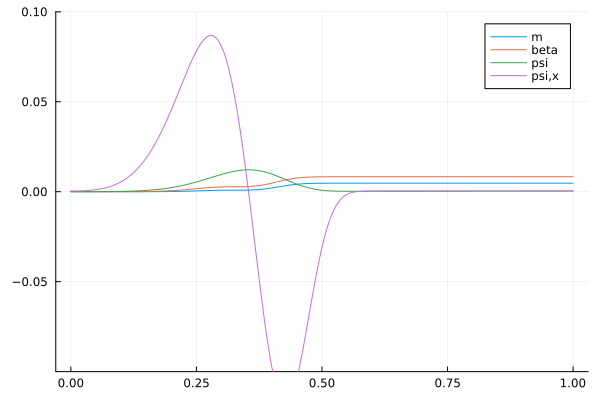

In [462]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1:1:21#length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    d=round(T[n],digits=1)
    #plot!(X1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.1,0.1], xlim=[0, 0.1]) |> display 
    plot!(plot5, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.1,0.1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1)

In [460]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1:1:300#length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot5=functions3.Column5[4:L-3];
    d=round(T[n],digits=1)
    plot!(initX[4:L-3], plot5, labels=["R"],ylim=[0,1], xlim=[0, 1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step22.csv" is not a valid file or doesn't exist

In [219]:
print(state_array[4:L-3,1])

[0.0, 1.7155111079800898e-15, 1.3292807568856285e-14, 4.3417949727444515e-14, 9.951675381480386e-14, 1.8778238388314974e-13, 3.1320635918121184e-13, 4.796130984237428e-13, 6.896981373324279e-13, 9.450701549639791e-13, 1.2462969490093538e-12, 1.5929555030527819e-12, 1.9836862923027535e-12, 2.416251977648481e-12, 2.8876006413723167e-12, 3.3939337213434473e-12, 3.930778804081855e-12, 4.493067440687951e-12, 5.075218153297012e-12, 5.6712248034319264e-12, 6.274750497394812e-12, 6.879227207659938e-12, 7.477961293101813e-12, 8.064245104820337e-12, 8.631474868304148e-12, 9.173275036706254e-12, 9.68362931409273e-12, 1.0157018551663142e-11, 1.0588565724137893e-11, 1.097418819774978e-11, 1.1310757505579545e-11, 1.15962668503263e-11, 1.18300065590105e-11, 1.2012747718565072e-11, 1.2146934225782316e-11, 1.2236883489647924e-11, 1.2288996028711214e-11, 1.2311974210807725e-11, 1.2317050387172732e-11, 1.2318224677755593e-11, 1.233251266936897e-11, 1.2380203293181411e-11, 1.2485127152987234e-11, 1.267493

 0.0002466650723282082, 0.00024991777084167787, 0.0002531960549928226, 0.0002564997949885128, 0.00025982885315052666, 0.00026318308382605016, 0.0002665623332997392, 0.00026996643970742326, 0.00027339523295153096, 0.00027684853461831777, 0.0002803261578969796, 0.000283827907500734, 0.0002873535795899549, 0.0002909029616974444, 0.0002944758326559291, 0.0002980719625278682, 0.0003016911125376598, 0.0003053330350063364, 0.0003089974732888378, 0.0003126841617139525, 0.000316392825527019, 0.0003201231808354788, 0.0003238749345573738, 0.00032764778437288183, 0.0003314414186789841, 0.000335255516547359, 0.00033908974768559805, 0.00034294377240183885, 0.00034681724157291165, 0.0003507097966160963, 0.0003546210694645856, 0.00035855068254675324, 0.0003624982487693231, 0.0003664633715045382, 0.0003704456445814264, 0.00037444465228126154, 0.0003784599693373177, 0.00038249116093901444, 0.0003865377827405512, 0.0003905993808741286, 0.00039467549196785413, 0.0003987656431684297, 0.0004028693521687179,

, 0.0042059421107845775, 0.004219765606249358, 0.004233382137095451, 0.004246791911725639, 0.004259995217930073, 0.004272992421711361, 0.004285783966064664, 0.004298370369714347, 0.004310752225808745, 0.004322930200574662, 0.004334905031933224, 0.004346677528078767, 0.004358248566022423, 0.004369619090102145, 0.0043807901104608825, 0.004391762701494663, 0.00440253800027236, 0.004413117204928914, 0.004423501573033816, 0.004433692419936646, 0.004443691117091485, 0.004453499090362022, 0.004463117818309161, 0.004472548830462963, 0.004481793705580733, 0.0044908540698930695, 0.004499731595339683, 0.004508427997796778, 0.004516945035297798, 0.004525284506249295, 0.004533448247643692, 0.004541438133270676, 0.004549256071928952, 0.004556904005640048, 0.004564383907865856, 0.004571697781731565, 0.004578847658255605, 0.004585835594588198, 0.004592663672260091, 0.004599333995442989, 0.004605848689223204, 0.004612209897889965, 0.004618419783239835, 0.0046244805228986, 0.004630394308661994, 0.004636

 0.0048195621503646455, 0.004819572020293465, 0.004819581904775313, 0.004819591803820909, 0.004819601717440975, 0.0048196116456462315, 0.004819621588447399, 0.004819631545855198, 0.004819641517880351, 0.004819651504533577, 0.004819661505825597, 0.004819671521767132, 0.004819681552368903, 0.004819691597641632, 0.004819701657596037, 0.00481971173224284, 0.004819721821592763, 0.004819731925656526, 0.00481974204444485, 0.004819752177968455, 0.004819762326238063, 0.004819772489264393, 0.004819782667058167, 0.0048197928596301065, 0.004819803066990931, 0.004819813289151362, 0.00481982352612212, 0.004819833777913926, 0.004819844044537501, 0.004819854326003565, 0.004819864622322839, 0.004819874933506045, 0.004819885259563903, 0.004819895600507133, 0.004819905956346457, 0.004819916327092596, 0.004819926712756269, 0.004819937113348199, 0.004819947528879105, 0.0048199579593597094, 0.004819968404800732, 0.004819978865212894, 0.004819989340606916, 0.004819999830993519, 0.004820010336383424, 0.004820

 0.0048259179389020575, 0.004825935752102003, 0.004825953584850978, 0.004825971437159705, 0.004825989309038906, 0.0048260072004993005, 0.004826025111551611, 0.004826043042206558, 0.004826060992474864, 0.004826078962367249, 0.004826096951894437, 0.004826114961067146, 0.0048261329898961, 0.0048261510383920195, 0.004826169106565625, 0.004826187194427639, 0.004826205301988782, 0.004826223429259776, 0.004826241576251343, 0.004826259742974203, 0.004826277929439079, 0.0048262961356566915, 0.004826314361637762, 0.004826332607393012, 0.0048263508729331625, 0.004826369158268935, 0.004826387463411051, 0.004826405788370233, 0.004826424133157201, 0.004826442497782676, 0.004826460882257381, 0.004826479286592036, 0.0048264977107973644, 0.004826516154884086, 0.004826534618862922, 0.004826553102744595, 0.004826571606539825, 0.004826590130259335, 0.004826608673913845, 0.004826627237514078, 0.004826645821070754, 0.004826664424594595, 0.004826683048096323, 0.004826701691586659, 0.004826720355076323, 0.004

In [218]:
spl_m = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,1],k=4)
m_func(x) = scipyinterpolate.splev(x, spl_m)

m_func (generic function with 1 method)

In [234]:
print(m_func(initX[4:L-3])-state_array[4:L-3,1])
c=m_func(initX[4:L-3])-state_array[4:L-3,1]

[1.9557932677264112e-31, -1.1832913578315177e-30, 3.1554436208840472e-30, -6.310887241768095e-30, 2.524354896707238e-29, 2.524354896707238e-29, 1.0097419586828951e-28, 1.0097419586828951e-28, 0.0, -4.0389678347315804e-28, 0.0, -2.0194839173657902e-28, 4.0389678347315804e-28, -4.0389678347315804e-28, -4.0389678347315804e-28, -8.077935669463161e-28, 0.0, 8.077935669463161e-28, 0.0, 0.0, 0.0, 2.4233807008389483e-27, 1.6155871338926322e-27, 3.2311742677852644e-27, 3.2311742677852644e-27, 1.6155871338926322e-27, 1.6155871338926322e-27, 4.8467614016778965e-27, 4.8467614016778965e-27, -3.2311742677852644e-27, 0.0, 3.2311742677852644e-27, 0.0, 0.0, 0.0, 0.0, 6.462348535570529e-27, 3.2311742677852644e-27, 6.462348535570529e-27, 1.6155871338926322e-27, 4.8467614016778965e-27, 1.6155871338926322e-27, -1.6155871338926322e-27, 3.2311742677852644e-27, -1.6155871338926322e-27, 4.8467614016778965e-27, 0.0, 3.2311742677852644e-27, 0.0, 0.0, 6.462348535570529e-27, 9.693522803355793e-27, -3.2311742677852

 0.0, 1.0842021724855044e-19, 1.0842021724855044e-19, 0.0, 2.168404344971009e-19, 1.0842021724855044e-19, 2.168404344971009e-19, 0.0, 2.168404344971009e-19, -1.0842021724855044e-19, 3.2526065174565133e-19, 1.0842021724855044e-19, 2.168404344971009e-19, -1.0842021724855044e-19, 0.0, -1.0842021724855044e-19, 2.168404344971009e-19, 0.0, 1.0842021724855044e-19, -1.0842021724855044e-19, 2.168404344971009e-19, 1.0842021724855044e-19, 3.2526065174565133e-19, 1.0842021724855044e-19, 0.0, -2.168404344971009e-19, 3.2526065174565133e-19, -1.0842021724855044e-19, -1.0842021724855044e-19, 0.0, 1.0842021724855044e-19, 0.0, 0.0, 0.0, 3.2526065174565133e-19, 2.168404344971009e-19, 1.0842021724855044e-19, -2.168404344971009e-19, 1.0842021724855044e-19, -1.0842021724855044e-19, 2.168404344971009e-19, 0.0, 3.2526065174565133e-19, 1.0842021724855044e-19, 1.0842021724855044e-19, 0.0, 1.0842021724855044e-19, 1.0842021724855044e-19, 1.0842021724855044e-19, 0.0, 2.168404344971009e-19, 0.0, 0.0, 1.084202172485

 8.673617379884035e-19, -8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 0.0, 8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 2.6020852139652106e-18, 0.0, 0.0, 1.734723475976807e-18, 8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 0.0, 0.0, 1.734723475976807e-18, 1.734723475976807e-18, 8.673617379884035e-19, -8.673617379884035e-19, -8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 0.0, 0.0, 2.6020852139652106e-18, -8.673617379884035e-19, 2.6020852139652106e-18, 8.673617379884035e-19, 8.673617379884035e-19, -1.734723475976807e-18, 0.0, 2.6020852139652106e-18, 1.734723475976807e-18, -8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, -8.673617379884035e-19, -8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 0.0, 8.673617379884035e-19,

 2.6020852139652106e-18, 8.673617379884035e-19, -8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 2.6020852139652106e-18, 0.0, 1.734723475976807e-18, 0.0, 1.734723475976807e-18, -8.673617379884035e-19, 0.0, 1.734723475976807e-18, 2.6020852139652106e-18, 0.0, 8.673617379884035e-19, 8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 0.0, 8.673617379884035e-19, 8.673617379884035e-19, -8.673617379884035e-19, 2.6020852139652106e-18, 0.0, 8.673617379884035e-19, -1.734723475976807e-18, 0.0, 8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 0.0, 8.673617379884035e-19, 0.0, 0.0, 0.0, 8.673617379884035e-19, 8.673617379884035e-19, -8.673617379884035e-19, 1.734723475976807e-18, 1.734723475976807e-18, 8.673617379884035e-19, -8.673617379884035e-19, -8.673617379884035e-19, 2.6020852139652106e-18, 1.734723475976807e-18, -8.673617379884035e-19, 0.0, 8.673617379884035e-19, 0.0, -8.673617379884035e-19, 2.6020852139652106e-18, 8.673617379884035e-19,

2001-element Vector{Float64}:
  1.9557932677264112e-31
 -1.1832913578315177e-30
  3.1554436208840472e-30
 -6.310887241768095e-30
  2.524354896707238e-29
  2.524354896707238e-29
  1.0097419586828951e-28
  1.0097419586828951e-28
  0.0
 -4.0389678347315804e-28
  0.0
 -2.0194839173657902e-28
  4.0389678347315804e-28
  ⋮
  8.673617379884035e-19
  0.0
  0.0
  0.0
  0.0
 -8.673617379884035e-19
 -1.734723475976807e-18
  8.673617379884035e-19
 -8.673617379884035e-19
 -1.734723475976807e-18
 -1.734723475976807e-18
  0.0

In [259]:
spl_mnew = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,1],k=4)
m_funcnew(x) = scipyinterpolate.splev(x, spl_mnew)

m_funcnew (generic function with 1 method)

In [260]:
print(m_funcnew(initX[4:L-3])-state_array[4:L-3,1])


[1.9557932677264112e-31, -1.1832913578315177e-30, 3.1554436208840472e-30, -6.310887241768095e-30, 2.524354896707238e-29, 2.524354896707238e-29, 1.0097419586828951e-28, 1.0097419586828951e-28, 0.0, -4.0389678347315804e-28, 0.0, -2.0194839173657902e-28, 4.0389678347315804e-28, -4.0389678347315804e-28, -4.0389678347315804e-28, -8.077935669463161e-28, 0.0, 8.077935669463161e-28, 0.0, 0.0, 0.0, 2.4233807008389483e-27, 1.6155871338926322e-27, 3.2311742677852644e-27, 3.2311742677852644e-27, 1.6155871338926322e-27, 1.6155871338926322e-27, 4.8467614016778965e-27, 4.8467614016778965e-27, -3.2311742677852644e-27, 0.0, 3.2311742677852644e-27, 0.0, 0.0, 0.0, 0.0, 6.462348535570529e-27, 3.2311742677852644e-27, 6.462348535570529e-27, 1.6155871338926322e-27, 4.8467614016778965e-27, 1.6155871338926322e-27, -1.6155871338926322e-27, 3.2311742677852644e-27, -1.6155871338926322e-27, 4.8467614016778965e-27, 0.0, 3.2311742677852644e-27, 0.0, 0.0, 6.462348535570529e-27, 9.693522803355793e-27, -3.2311742677852

 0.0, 1.0842021724855044e-19, 1.0842021724855044e-19, 0.0, 2.168404344971009e-19, 1.0842021724855044e-19, 2.168404344971009e-19, 0.0, 2.168404344971009e-19, -1.0842021724855044e-19, 3.2526065174565133e-19, 1.0842021724855044e-19, 2.168404344971009e-19, -1.0842021724855044e-19, 0.0, -1.0842021724855044e-19, 2.168404344971009e-19, 0.0, 1.0842021724855044e-19, -1.0842021724855044e-19, 2.168404344971009e-19, 1.0842021724855044e-19, 3.2526065174565133e-19, 1.0842021724855044e-19, 0.0, -2.168404344971009e-19, 3.2526065174565133e-19, -1.0842021724855044e-19, -1.0842021724855044e-19, 0.0, 1.0842021724855044e-19, 0.0, 0.0, 0.0, 3.2526065174565133e-19, 2.168404344971009e-19, 1.0842021724855044e-19, -2.168404344971009e-19, 1.0842021724855044e-19, -1.0842021724855044e-19, 2.168404344971009e-19, 0.0, 3.2526065174565133e-19, 1.0842021724855044e-19, 1.0842021724855044e-19, 0.0, 1.0842021724855044e-19, 1.0842021724855044e-19, 1.0842021724855044e-19, 0.0, 2.168404344971009e-19, 0.0, 0.0, 1.084202172485

 8.673617379884035e-19, -8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 0.0, 8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 2.6020852139652106e-18, 0.0, 0.0, 1.734723475976807e-18, 8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 0.0, 0.0, 1.734723475976807e-18, 1.734723475976807e-18, 8.673617379884035e-19, -8.673617379884035e-19, -8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 0.0, 0.0, 2.6020852139652106e-18, -8.673617379884035e-19, 2.6020852139652106e-18, 8.673617379884035e-19, 8.673617379884035e-19, -1.734723475976807e-18, 0.0, 2.6020852139652106e-18, 1.734723475976807e-18, -8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, -8.673617379884035e-19, -8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 0.0, 8.673617379884035e-19,

 2.6020852139652106e-18, 8.673617379884035e-19, -8.673617379884035e-19, 8.673617379884035e-19, 8.673617379884035e-19, 2.6020852139652106e-18, 0.0, 1.734723475976807e-18, 0.0, 1.734723475976807e-18, -8.673617379884035e-19, 0.0, 1.734723475976807e-18, 2.6020852139652106e-18, 0.0, 8.673617379884035e-19, 8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 0.0, 8.673617379884035e-19, 8.673617379884035e-19, -8.673617379884035e-19, 2.6020852139652106e-18, 0.0, 8.673617379884035e-19, -1.734723475976807e-18, 0.0, 8.673617379884035e-19, 1.734723475976807e-18, 8.673617379884035e-19, 0.0, 8.673617379884035e-19, 0.0, 0.0, 0.0, 8.673617379884035e-19, 8.673617379884035e-19, -8.673617379884035e-19, 1.734723475976807e-18, 1.734723475976807e-18, 8.673617379884035e-19, -8.673617379884035e-19, -8.673617379884035e-19, 2.6020852139652106e-18, 1.734723475976807e-18, -8.673617379884035e-19, 0.0, 8.673617379884035e-19, 0.0, -8.673617379884035e-19, 2.6020852139652106e-18, 8.673617379884035e-19,

In [261]:
b=m_funcnew(initX[4:L-3])-state_array[4:L-3,1]

2001-element Vector{Float64}:
  1.9557932677264112e-31
 -1.1832913578315177e-30
  3.1554436208840472e-30
 -6.310887241768095e-30
  2.524354896707238e-29
  2.524354896707238e-29
  1.0097419586828951e-28
  1.0097419586828951e-28
  0.0
 -4.0389678347315804e-28
  0.0
 -2.0194839173657902e-28
  4.0389678347315804e-28
  ⋮
  8.673617379884035e-19
  0.0
  0.0
  0.0
  0.0
 -8.673617379884035e-19
 -1.734723475976807e-18
  8.673617379884035e-19
 -8.673617379884035e-19
 -1.734723475976807e-18
 -1.734723475976807e-18
  0.0

In [262]:
a=0
for i in 1:L-6
    a+=b[i]^2
end
print(sqrt(a))

3.8541788061810144e-17

In [246]:
a=0
for i in 1:L-6
    a+=c[i]^2
end
print(sqrt(a))

3.8541788061810144e-17

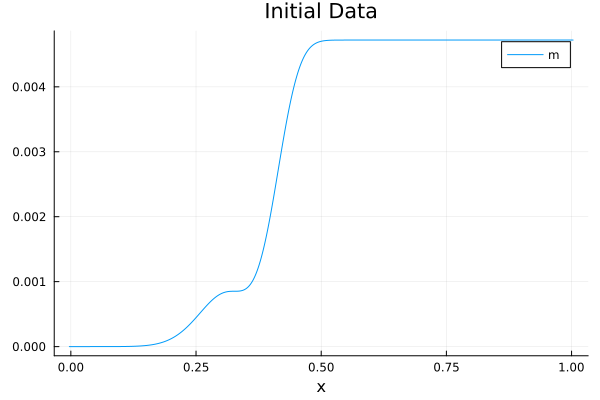

In [308]:
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,initX1,0,spl_funcs)
state_array[:,1]=initm;
state_array=ghost(state_array);

spl_m = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,1],k=4)
m_func(x) = scipyinterpolate.splev(x, spl_m)
spl_funcs[1] = m_func

using Plots #showing initial data and the initial status of the horizon finder
plot(initX, ghost(initm), xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

i 1yi0.0
i 2yi1.5232227379129027e-17
i 3yi4.786156428344232e-16
i 4yi3.705452584911589e-15
i 5yi1.5948653598421673e-14
i 6yi4.972450815246132e-14
i 7yi1.2641206129367486e-13
i 8yi2.7914464901322323e-13
i 9yi5.560129216331496e-13
i 10yi1.0235996043425443e-12
i 11yi1.7708671316742013e-12
i 12yi2.9134202335531554e-12
i 13yi4.598166506138729e-12
i 14yi7.0083989879501605e-12
i 15yi1.0369325773650107e-11
i 16yi1.495407273743619e-11
i 17yi2.1090186503997744e-11
i 18yi2.916666589790798e-11
i 19yi3.964155122185265e-11
i 20yi5.3050101860178037e-11
i 21yi7.001359387664665e-11
i 22yi9.124877047377144e-11
i 23yi1.175779794053345e-10
i 24yi1.4994003268329665e-10
i 25yi1.8940182519481422e-10
i 26yi2.371707501439642e-10
i 27yi2.9460795055543213e-10
i 28yi3.6324244742314393e-10
i 29yi4.447861864548472e-10
i 30yi5.411500467530999e-10
i 31yi6.544608561830409e-10
i 32yi7.870794596066358e-10
i 33yi9.416198876106485e-10
i 34yi1.1209696748200971e-9
i 35yi1.328311378369045e-9
i 36yi1.5671453485947205e-9
i 37y

i 361yi0.0009747718237029083
i 362yi0.0009865352457812866
i 363yi0.0009990224981894097
i 364yi0.0010122512081349518
i 365yi0.0010262381935056786
i 366yi0.0010409994110021977
i 367yi0.0010565499052179335
i 368yi0.0010729037588324533
i 369yi0.0010900740440850582
i 370yi0.0011080727756957343
i 371yi0.001126910865400133
i 372yi0.001146598078264194
i 373yi0.0011671429909423203
i 374yi0.0011885529520406532
i 375yi0.0012108340447439666
i 376yi0.0012339910518609967
i 377yi0.0012580274234386363
i 378yi0.0012829452470903596
i 379yi0.0013087452211785018
i 380yi0.0013354266309835968
i 381yi0.0013629873279869017
i 382yi0.001391423712384497
i 383yi0.0014207307189429874
i 384yi0.0014509018062978372
i 385yi0.0014819289497857927
i 386yi0.0015138026378926962
i 387yi0.0015465118723872978
i 388yi0.0015800441722004848
i 389yi0.0016143855810976718
i 390yi0.0016495206791800018
i 391yi0.0016854325982375196
i 392yi0.0017221030409646503
i 393yi0.0017595123040351883
i 394yi0.0017976393050206372
i 395yi0.00183646

i 725yi0.004720674827182781
i 726yi0.004720674827182781
i 727yi0.004720674827182781
i 728yi0.004720674827182781
i 729yi0.004720674827182781
i 730yi0.004720674827182781
i 731yi0.004720674827182781
i 732yi0.004720674827182781
i 733yi0.004720674827182781
i 734yi0.004720674827182781
i 735yi0.004720674827182781
i 736yi0.004720674827182781
i 737yi0.004720674827182781
i 738yi0.004720674827182781
i 739yi0.004720674827182781
i 740yi0.004720674827182781
i 741yi0.004720674827182781
i 742yi0.004720674827182781
i 743yi0.004720674827182781
i 744yi0.004720674827182781
i 745yi0.004720674827182781
i 746yi0.004720674827182781
i 747yi0.004720674827182781
i 748yi0.004720674827182781
i 749yi0.004720674827182781
i 750yi0.004720674827182781
i 751yi0.004720674827182781
i 752yi0.004720674827182781
i 753yi0.004720674827182781
i 754yi0.004720674827182781
i 755yi0.004720674827182781
i 756yi0.004720674827182781
i 757yi0.004720674827182781
i 758yi0.004720674827182781
i 759yi0.004720674827182781
i 760yi0.00472067482

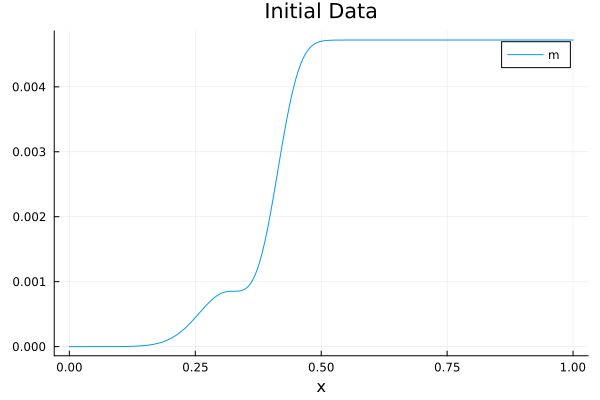

In [317]:
m0=0
initmm=m_rk4wrapper(SFconstraint_m,m0,initX1,0,spl_funcs)
state_array[:,1]=initm;
state_array=ghost(state_array);

spl_m = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,1],k=4)
m_func(x) = scipyinterpolate.splev(x, spl_m)
spl_funcs[1] = m_func

using Plots #showing initial data and the initial status of the horizon finder
plot(initX1, initmm, xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

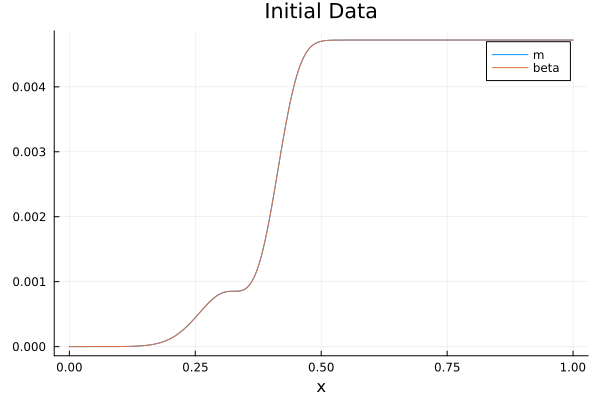

In [319]:
plot(initX1, [initmm initm[4:L-3]], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

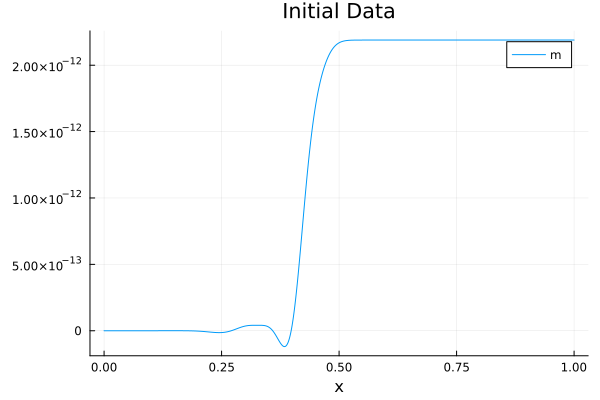

In [320]:
plot(initX1, initmm-initm[4:L-3], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])